# Feature variation by substitution ($\nu_{\phi}$)

## 1 Setup

Flags and settings.

In [1]:
SAVE_FIGURES = False
PAPER_FEATURES = ['frequency', 'aoa', 'clustering', 'letters_count',
                  'synonyms_count', 'orthographic_density']
N_COMPONENTS = 3
BIN_COUNT = 4

Imports and database setup.

In [2]:
from itertools import product

import pandas as pd
import seaborn as sb
from scipy import stats
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from progressbar import ProgressBar

%cd -q ..
from brainscopypaste.conf import settings
%cd -q notebooks
from brainscopypaste.mine import Model, Time, Source, Past, Durl
from brainscopypaste.db import Substitution
from brainscopypaste.utils import init_db, session_scope
engine = init_db()

## 2 Variation of features upon substitution

First build our data.

In [3]:
model = Model(time=Time.discrete, source=Source.all, past=Past.all, durl=Durl.all, max_distance=2)
data = []

with session_scope() as session:
    substitutions = session.query(Substitution.id)\
        .filter(Substitution.model == model)
    print("Got {} substitutions for model {}"
          .format(substitutions.count(), model))
    substitution_ids = [id for (id,) in substitutions]

for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for feature in Substitution.__features__:
            source, destination = substitution.features(feature)
            source_rel, destination_rel = \
                substitution.features(feature, sentence_relative='median')
            data.append({
                'cluster_id': substitution.source.cluster.sid,
                'destination_id': substitution.destination.sid,
                'occurrence': substitution.occurrence,
                'position': substitution.position,
                'source_id': substitution.source.sid,
                'feature': feature,
                'source': source,
                'source_rel': source_rel,
                'destination': destination,
                'destination_rel': destination_rel,
                'h0': substitution.feature_average(feature),
                'h0_rel': substitution.feature_average(
                        feature, sentence_relative='median'),
                'h0n': substitution.feature_average(
                        feature, source_synonyms=True),
                'h0n_rel': substitution.feature_average(
                        feature, source_synonyms=True,
                        sentence_relative='median')})

original_variations = pd.DataFrame(data)
del data

Got 87568 substitutions for model Model(time=Time.discrete, source=Source.all, past=Past.all, durl=Durl.all, max_distance=2)


  0% (    0 of 87568) |                   | Elapsed Time: 0:00:00 ETA:  --:--:--

  0% (    9 of 87568) |             | Elapsed Time: 0:00:26 ETA: 3 days, 0:14:16

  0% (   26 of 87568) |              | Elapsed Time: 0:00:26 ETA: 1 day, 1:11:55

  0% (   43 of 87568) |                    | Elapsed Time: 0:00:27 ETA: 15:21:22

  0% (   59 of 87568) |                    | Elapsed Time: 0:00:27 ETA: 11:16:36

  0% (   76 of 87568) |                     | Elapsed Time: 0:00:27 ETA: 0:18:33

  0% (   93 of 87568) |                     | Elapsed Time: 0:00:27 ETA: 0:18:32

  0% (  110 of 87568) |                     | Elapsed Time: 0:00:28 ETA: 0:18:24

  0% (  128 of 87568) |                     | Elapsed Time: 0:00:28 ETA: 0:18:08

  0% (  146 of 87568) |                     | Elapsed Time: 0:00:28 ETA: 0:18:04

  0% (  162 of 87568) |                     | Elapsed Time: 0:00:28 ETA: 0:18:09

  0% (  179 of 87568) |                     | Elapsed Time: 0:00:28 ETA: 0:18:10

  0% (  197 of 87568) |                     | Elapsed Time: 0:00:29 ETA: 0:18:01

  0% (  215 of 87568) |                     | Elapsed Time: 0:00:29 ETA: 0:17:50

  0% (  233 of 87568) |                     | Elapsed Time: 0:00:29 ETA: 0:17:28

  0% (  251 of 87568) |                     | Elapsed Time: 0:00:29 ETA: 0:17:13

  0% (  269 of 87568) |                     | Elapsed Time: 0:00:29 ETA: 0:17:19

  0% (  286 of 87568) |                     | Elapsed Time: 0:00:30 ETA: 0:17:24

  0% (  303 of 87568) |                     | Elapsed Time: 0:00:30 ETA: 0:17:46

  0% (  320 of 87568) |                     | Elapsed Time: 0:00:30 ETA: 0:18:00

  0% (  338 of 87568) |                     | Elapsed Time: 0:00:30 ETA: 0:17:51

  0% (  356 of 87568) |                     | Elapsed Time: 0:00:31 ETA: 0:17:42

  0% (  372 of 87568) |                     | Elapsed Time: 0:00:31 ETA: 0:18:05

  0% (  389 of 87568) |                     | Elapsed Time: 0:00:31 ETA: 0:17:54

  0% (  405 of 87568) |                     | Elapsed Time: 0:00:31 ETA: 0:18:18

  0% (  421 of 87568) |                     | Elapsed Time: 0:00:31 ETA: 0:18:48

  0% (  437 of 87568) |                     | Elapsed Time: 0:00:32 ETA: 0:18:51

  0% (  453 of 87568) |                     | Elapsed Time: 0:00:32 ETA: 0:18:50

  0% (  469 of 87568) |                     | Elapsed Time: 0:00:32 ETA: 0:19:00

  0% (  485 of 87568) |                     | Elapsed Time: 0:00:32 ETA: 0:18:46

  0% (  501 of 87568) |                     | Elapsed Time: 0:00:32 ETA: 0:18:48

  0% (  517 of 87568) |                     | Elapsed Time: 0:00:33 ETA: 0:18:54

  0% (  533 of 87568) |                     | Elapsed Time: 0:00:33 ETA: 0:18:51

  0% (  550 of 87568) |                     | Elapsed Time: 0:00:33 ETA: 0:18:49

  0% (  567 of 87568) |                     | Elapsed Time: 0:00:33 ETA: 0:18:43

  0% (  584 of 87568) |                     | Elapsed Time: 0:00:33 ETA: 0:18:38

  0% (  609 of 87568) |                     | Elapsed Time: 0:00:34 ETA: 0:18:18

  0% (  625 of 87568) |                     | Elapsed Time: 0:00:34 ETA: 0:18:22

  0% (  642 of 87568) |                     | Elapsed Time: 0:00:34 ETA: 0:18:24

  0% (  660 of 87568) |                     | Elapsed Time: 0:00:34 ETA: 0:18:19

  0% (  676 of 87568) |                     | Elapsed Time: 0:00:35 ETA: 0:18:19

  0% (  693 of 87568) |                     | Elapsed Time: 0:00:35 ETA: 0:18:16

  0% (  710 of 87568) |                     | Elapsed Time: 0:00:35 ETA: 0:18:03

  0% (  726 of 87568) |                     | Elapsed Time: 0:00:35 ETA: 0:18:15

  0% (  744 of 87568) |                     | Elapsed Time: 0:00:35 ETA: 0:18:13

  0% (  760 of 87568) |                     | Elapsed Time: 0:00:36 ETA: 0:18:13

  0% (  777 of 87568) |                     | Elapsed Time: 0:00:36 ETA: 0:18:21

  0% (  793 of 87568) |                     | Elapsed Time: 0:00:36 ETA: 0:18:31

  0% (  809 of 87568) |                     | Elapsed Time: 0:00:36 ETA: 0:18:39

  0% (  825 of 87568) |                     | Elapsed Time: 0:00:37 ETA: 0:18:45

  0% (  842 of 87568) |                     | Elapsed Time: 0:00:37 ETA: 0:18:48

  0% (  858 of 87568) |                     | Elapsed Time: 0:00:37 ETA: 0:18:47

  0% (  874 of 87568) |                     | Elapsed Time: 0:00:37 ETA: 0:18:38

  1% (  890 of 87568) |                     | Elapsed Time: 0:00:37 ETA: 0:18:42

  1% (  906 of 87568) |                     | Elapsed Time: 0:00:38 ETA: 0:18:37

  1% (  922 of 87568) |                     | Elapsed Time: 0:00:38 ETA: 0:18:51

  1% (  939 of 87568) |                     | Elapsed Time: 0:00:38 ETA: 0:18:42

  1% (  955 of 87568) |                     | Elapsed Time: 0:00:38 ETA: 0:18:40

  1% (  972 of 87568) |                     | Elapsed Time: 0:00:38 ETA: 0:18:29

  1% (  988 of 87568) |                     | Elapsed Time: 0:00:39 ETA: 0:18:31

  1% ( 1005 of 87568) |                     | Elapsed Time: 0:00:39 ETA: 0:18:30

  1% ( 1021 of 87568) |                     | Elapsed Time: 0:00:39 ETA: 0:18:42

  1% ( 1037 of 87568) |                     | Elapsed Time: 0:00:39 ETA: 0:18:52

  1% ( 1053 of 87568) |                     | Elapsed Time: 0:00:39 ETA: 0:18:46

  1% ( 1069 of 87568) |                     | Elapsed Time: 0:00:40 ETA: 0:18:36

  1% ( 1085 of 87568) |                     | Elapsed Time: 0:00:40 ETA: 0:18:39

  1% ( 1103 of 87568) |                     | Elapsed Time: 0:00:40 ETA: 0:18:35

  1% ( 1120 of 87568) |                     | Elapsed Time: 0:00:40 ETA: 0:18:32

  1% ( 1137 of 87568) |                     | Elapsed Time: 0:00:41 ETA: 0:18:23

  1% ( 1153 of 87568) |                     | Elapsed Time: 0:00:41 ETA: 0:18:38

  1% ( 1169 of 87568) |                     | Elapsed Time: 0:00:41 ETA: 0:18:44

  1% ( 1185 of 87568) |                     | Elapsed Time: 0:00:41 ETA: 0:18:53

  1% ( 1202 of 87568) |                     | Elapsed Time: 0:00:41 ETA: 0:18:46

  1% ( 1219 of 87568) |                     | Elapsed Time: 0:00:42 ETA: 0:18:38

  1% ( 1237 of 87568) |                     | Elapsed Time: 0:00:42 ETA: 0:17:59

  1% ( 1255 of 87568) |                     | Elapsed Time: 0:00:42 ETA: 0:17:43

  1% ( 1272 of 87568) |                     | Elapsed Time: 0:00:42 ETA: 0:17:42

  1% ( 1289 of 87568) |                     | Elapsed Time: 0:00:42 ETA: 0:17:52

  1% ( 1307 of 87568) |                     | Elapsed Time: 0:00:43 ETA: 0:17:44

  1% ( 1324 of 87568) |                     | Elapsed Time: 0:00:43 ETA: 0:17:51

  1% ( 1342 of 87568) |                     | Elapsed Time: 0:00:43 ETA: 0:17:47

  1% ( 1359 of 87568) |                     | Elapsed Time: 0:00:43 ETA: 0:17:37

  1% ( 1377 of 87568) |                     | Elapsed Time: 0:00:44 ETA: 0:17:38

  1% ( 1394 of 87568) |                     | Elapsed Time: 0:00:44 ETA: 0:17:47

  1% ( 1411 of 87568) |                     | Elapsed Time: 0:00:44 ETA: 0:17:47

  1% ( 1429 of 87568) |                     | Elapsed Time: 0:00:44 ETA: 0:17:39

  1% ( 1447 of 87568) |                     | Elapsed Time: 0:00:44 ETA: 0:17:40

  1% ( 1463 of 87568) |                     | Elapsed Time: 0:00:45 ETA: 0:17:38

  1% ( 1480 of 87568) |                     | Elapsed Time: 0:00:45 ETA: 0:17:48

  1% ( 1488 of 87568) |                     | Elapsed Time: 0:00:45 ETA: 0:17:49

  1% ( 1503 of 87568) |                     | Elapsed Time: 0:00:46 ETA: 0:33:18

  1% ( 1520 of 87568) |                     | Elapsed Time: 0:00:46 ETA: 0:33:40

  1% ( 1537 of 87568) |                     | Elapsed Time: 0:00:46 ETA: 0:33:25

  1% ( 1554 of 87568) |                     | Elapsed Time: 0:00:47 ETA: 0:33:22

  1% ( 1571 of 87568) |                     | Elapsed Time: 0:00:47 ETA: 0:17:58

  1% ( 1588 of 87568) |                     | Elapsed Time: 0:00:47 ETA: 0:18:07

  1% ( 1605 of 87568) |                     | Elapsed Time: 0:00:47 ETA: 0:18:08

  1% ( 1623 of 87568) |                     | Elapsed Time: 0:00:47 ETA: 0:17:56

  1% ( 1641 of 87568) |                     | Elapsed Time: 0:00:48 ETA: 0:17:52

  1% ( 1659 of 87568) |                     | Elapsed Time: 0:00:48 ETA: 0:17:49

  1% ( 1676 of 87568) |                     | Elapsed Time: 0:00:48 ETA: 0:17:32

  1% ( 1694 of 87568) |                     | Elapsed Time: 0:00:48 ETA: 0:17:34

  1% ( 1712 of 87568) |                     | Elapsed Time: 0:00:49 ETA: 0:17:37

  1% ( 1730 of 87568) |                     | Elapsed Time: 0:00:49 ETA: 0:17:35

  1% ( 1748 of 87568) |                     | Elapsed Time: 0:00:49 ETA: 0:17:25

  2% ( 1765 of 87568) |                     | Elapsed Time: 0:00:49 ETA: 0:17:36

  2% ( 1783 of 87568) |                     | Elapsed Time: 0:00:49 ETA: 0:17:31

  2% ( 1801 of 87568) |                     | Elapsed Time: 0:00:50 ETA: 0:17:31

  2% ( 1819 of 87568) |                     | Elapsed Time: 0:00:50 ETA: 0:17:32

  2% ( 1836 of 87568) |                     | Elapsed Time: 0:00:50 ETA: 0:17:32

  2% ( 1853 of 87568) |                     | Elapsed Time: 0:00:50 ETA: 0:17:37

  2% ( 1870 of 87568) |                     | Elapsed Time: 0:00:50 ETA: 0:17:44

  2% ( 1888 of 87568) |                     | Elapsed Time: 0:00:51 ETA: 0:17:42

  2% ( 1905 of 87568) |                     | Elapsed Time: 0:00:51 ETA: 0:17:39

  2% ( 1923 of 87568) |                     | Elapsed Time: 0:00:51 ETA: 0:17:38

  2% ( 1941 of 87568) |                     | Elapsed Time: 0:00:51 ETA: 0:17:20

  2% ( 1959 of 87568) |                     | Elapsed Time: 0:00:52 ETA: 0:17:20

  2% ( 1976 of 87568) |                     | Elapsed Time: 0:00:52 ETA: 0:17:26

  2% ( 1990 of 87568) |                     | Elapsed Time: 0:00:52 ETA: 0:18:06

  2% ( 2007 of 87568) |                     | Elapsed Time: 0:00:52 ETA: 0:18:29

  2% ( 2023 of 87568) |                     | Elapsed Time: 0:00:52 ETA: 0:18:47

  2% ( 2041 of 87568) |                     | Elapsed Time: 0:00:53 ETA: 0:18:40

  2% ( 2057 of 87568) |                     | Elapsed Time: 0:00:53 ETA: 0:18:37

  2% ( 2074 of 87568) |                     | Elapsed Time: 0:00:53 ETA: 0:18:04

  2% ( 2090 of 87568) |                     | Elapsed Time: 0:00:53 ETA: 0:18:01

  2% ( 2107 of 87568) |                     | Elapsed Time: 0:00:53 ETA: 0:17:51

  2% ( 2124 of 87568) |                     | Elapsed Time: 0:00:54 ETA: 0:17:48

  2% ( 2142 of 87568) |                     | Elapsed Time: 0:00:54 ETA: 0:17:41

  2% ( 2158 of 87568) |                     | Elapsed Time: 0:00:54 ETA: 0:17:35

  2% ( 2175 of 87568) |                     | Elapsed Time: 0:00:54 ETA: 0:17:30

  2% ( 2198 of 87568) |                     | Elapsed Time: 0:00:55 ETA: 0:17:39

  2% ( 2216 of 87568) |                     | Elapsed Time: 0:00:55 ETA: 0:17:35

  2% ( 2232 of 87568) |                     | Elapsed Time: 0:00:55 ETA: 0:17:38

  2% ( 2249 of 87568) |                     | Elapsed Time: 0:00:55 ETA: 0:17:32

  2% ( 2266 of 87568) |                     | Elapsed Time: 0:00:55 ETA: 0:17:35

  2% ( 2284 of 87568) |                     | Elapsed Time: 0:00:56 ETA: 0:17:31

  2% ( 2300 of 87568) |                     | Elapsed Time: 0:00:56 ETA: 0:17:39

  2% ( 2318 of 87568) |                     | Elapsed Time: 0:00:56 ETA: 0:17:29

  2% ( 2336 of 87568) |                     | Elapsed Time: 0:00:56 ETA: 0:17:16

  2% ( 2354 of 87568) |                     | Elapsed Time: 0:00:56 ETA: 0:17:07

  2% ( 2372 of 87568) |                     | Elapsed Time: 0:00:57 ETA: 0:17:03

  2% ( 2389 of 87568) |                     | Elapsed Time: 0:00:57 ETA: 0:17:06

  2% ( 2406 of 87568) |                     | Elapsed Time: 0:00:57 ETA: 0:17:14

  2% ( 2424 of 87568) |                     | Elapsed Time: 0:00:57 ETA: 0:17:12

  2% ( 2442 of 87568) |                     | Elapsed Time: 0:00:58 ETA: 0:17:17

  2% ( 2458 of 87568) |                     | Elapsed Time: 0:00:58 ETA: 0:17:28

  2% ( 2475 of 87568) |                     | Elapsed Time: 0:00:58 ETA: 0:17:25

  2% ( 2492 of 87568) |                     | Elapsed Time: 0:00:58 ETA: 0:17:27

  2% ( 2510 of 87568) |                     | Elapsed Time: 0:00:58 ETA: 0:17:36

  2% ( 2528 of 87568) |                     | Elapsed Time: 0:00:59 ETA: 0:17:30

  2% ( 2546 of 87568) |                     | Elapsed Time: 0:00:59 ETA: 0:17:17

  2% ( 2564 of 87568) |                     | Elapsed Time: 0:00:59 ETA: 0:17:14

  2% ( 2582 of 87568) |                     | Elapsed Time: 0:00:59 ETA: 0:16:56

  2% ( 2600 of 87568) |                     | Elapsed Time: 0:00:59 ETA: 0:16:45

  2% ( 2618 of 87568) |                     | Elapsed Time: 0:01:00 ETA: 0:16:47

  3% ( 2635 of 87568) |                     | Elapsed Time: 0:01:00 ETA: 0:16:50

  3% ( 2653 of 87568) |                     | Elapsed Time: 0:01:00 ETA: 0:16:56

  3% ( 2671 of 87568) |                     | Elapsed Time: 0:01:00 ETA: 0:17:02

  3% ( 2689 of 87568) |                     | Elapsed Time: 0:01:01 ETA: 0:17:03

  3% ( 2707 of 87568) |                     | Elapsed Time: 0:01:01 ETA: 0:16:52

  3% ( 2725 of 87568) |                     | Elapsed Time: 0:01:01 ETA: 0:16:58

  3% ( 2742 of 87568) |                     | Elapsed Time: 0:01:01 ETA: 0:17:11

  3% ( 2760 of 87568) |                     | Elapsed Time: 0:01:01 ETA: 0:17:12

  3% ( 2777 of 87568) |                     | Elapsed Time: 0:01:02 ETA: 0:17:24

  3% ( 2794 of 87568) |                     | Elapsed Time: 0:01:02 ETA: 0:17:25

  3% ( 2812 of 87568) |                     | Elapsed Time: 0:01:02 ETA: 0:17:20

  3% ( 2829 of 87568) |                     | Elapsed Time: 0:01:02 ETA: 0:17:28

  3% ( 2846 of 87568) |                     | Elapsed Time: 0:01:02 ETA: 0:17:33

  3% ( 2864 of 87568) |                     | Elapsed Time: 0:01:03 ETA: 0:17:27

  3% ( 2881 of 87568) |                     | Elapsed Time: 0:01:03 ETA: 0:17:35

  3% ( 2898 of 87568) |                     | Elapsed Time: 0:01:03 ETA: 0:17:38

  3% ( 2916 of 87568) |                     | Elapsed Time: 0:01:03 ETA: 0:17:14

  3% ( 2934 of 87568) |                     | Elapsed Time: 0:01:04 ETA: 0:17:08

  3% ( 2952 of 87568) |                     | Elapsed Time: 0:01:04 ETA: 0:16:49

  3% ( 2970 of 87568) |                     | Elapsed Time: 0:01:04 ETA: 0:16:31

  3% ( 2988 of 87568) |                     | Elapsed Time: 0:01:04 ETA: 0:16:35

  3% ( 3006 of 87568) |                     | Elapsed Time: 0:01:04 ETA: 0:16:45

  3% ( 3024 of 87568) |                     | Elapsed Time: 0:01:05 ETA: 0:16:44

  3% ( 3042 of 87568) |                     | Elapsed Time: 0:01:05 ETA: 0:16:40

  3% ( 3056 of 87568) |                     | Elapsed Time: 0:01:05 ETA: 0:17:42

  3% ( 3072 of 87568) |                     | Elapsed Time: 0:01:05 ETA: 0:17:55

  3% ( 3088 of 87568) |                     | Elapsed Time: 0:01:05 ETA: 0:18:10

  3% ( 3104 of 87568) |                     | Elapsed Time: 0:01:06 ETA: 0:18:45

  3% ( 3120 of 87568) |                     | Elapsed Time: 0:01:06 ETA: 0:18:35

  3% ( 3138 of 87568) |                     | Elapsed Time: 0:01:06 ETA: 0:18:02

  3% ( 3156 of 87568) |                     | Elapsed Time: 0:01:06 ETA: 0:17:48

  3% ( 3172 of 87568) |                     | Elapsed Time: 0:01:07 ETA: 0:17:40

  3% ( 3189 of 87568) |                     | Elapsed Time: 0:01:07 ETA: 0:17:19

  3% ( 3207 of 87568) |                     | Elapsed Time: 0:01:07 ETA: 0:17:16

  3% ( 3225 of 87568) |                     | Elapsed Time: 0:01:07 ETA: 0:17:22

  3% ( 3242 of 87568) |                     | Elapsed Time: 0:01:07 ETA: 0:17:20

  3% ( 3260 of 87568) |                     | Elapsed Time: 0:01:08 ETA: 0:17:07

  3% ( 3284 of 87568) |                     | Elapsed Time: 0:01:08 ETA: 0:16:48

  3% ( 3302 of 87568) |                     | Elapsed Time: 0:01:08 ETA: 0:16:32

  3% ( 3320 of 87568) |                     | Elapsed Time: 0:01:08 ETA: 0:16:22

  3% ( 3338 of 87568) |                     | Elapsed Time: 0:01:09 ETA: 0:16:23

  3% ( 3356 of 87568) |                     | Elapsed Time: 0:01:09 ETA: 0:16:30

  3% ( 3374 of 87568) |                     | Elapsed Time: 0:01:09 ETA: 0:16:47

  3% ( 3392 of 87568) |                     | Elapsed Time: 0:01:09 ETA: 0:16:50

  3% ( 3410 of 87568) |                     | Elapsed Time: 0:01:09 ETA: 0:16:49

  3% ( 3428 of 87568) |                     | Elapsed Time: 0:01:10 ETA: 0:16:49

  3% ( 3446 of 87568) |                     | Elapsed Time: 0:01:10 ETA: 0:16:46

  3% ( 3462 of 87568) |                     | Elapsed Time: 0:01:10 ETA: 0:17:08

  3% ( 3479 of 87568) |                     | Elapsed Time: 0:01:10 ETA: 0:17:20

  3% ( 3497 of 87568) |                     | Elapsed Time: 0:01:10 ETA: 0:17:13

  4% ( 3515 of 87568) |                     | Elapsed Time: 0:01:11 ETA: 0:17:15

  4% ( 3533 of 87568) |                     | Elapsed Time: 0:01:11 ETA: 0:16:45

  4% ( 3551 of 87568) |                     | Elapsed Time: 0:01:11 ETA: 0:16:22

  4% ( 3569 of 87568) |                     | Elapsed Time: 0:01:11 ETA: 0:16:21

  4% ( 3587 of 87568) |                     | Elapsed Time: 0:01:11 ETA: 0:16:21

  4% ( 3605 of 87568) |                     | Elapsed Time: 0:01:12 ETA: 0:16:21

  4% ( 3623 of 87568) |                     | Elapsed Time: 0:01:12 ETA: 0:16:26

  4% ( 3641 of 87568) |                     | Elapsed Time: 0:01:12 ETA: 0:16:41

  4% ( 3659 of 87568) |                     | Elapsed Time: 0:01:12 ETA: 0:16:36

  4% ( 3677 of 87568) |                     | Elapsed Time: 0:01:13 ETA: 0:16:36

  4% ( 3695 of 87568) |                     | Elapsed Time: 0:01:13 ETA: 0:16:24

  4% ( 3713 of 87568) |                     | Elapsed Time: 0:01:13 ETA: 0:16:25

  4% ( 3731 of 87568) |                     | Elapsed Time: 0:01:13 ETA: 0:16:09

  4% ( 3749 of 87568) |                     | Elapsed Time: 0:01:13 ETA: 0:16:11

  4% ( 3767 of 87568) |                     | Elapsed Time: 0:01:14 ETA: 0:16:11

  4% ( 3785 of 87568) |                     | Elapsed Time: 0:01:14 ETA: 0:16:09

  4% ( 3803 of 87568) |                     | Elapsed Time: 0:01:14 ETA: 0:16:09

  4% ( 3821 of 87568) |                     | Elapsed Time: 0:01:14 ETA: 0:16:05

  4% ( 3836 of 87568) |                     | Elapsed Time: 0:01:14 ETA: 0:16:45

  4% ( 3854 of 87568) |                     | Elapsed Time: 0:01:15 ETA: 0:16:43

  4% ( 3872 of 87568) |                     | Elapsed Time: 0:01:15 ETA: 0:16:52

  4% ( 3889 of 87568) |                     | Elapsed Time: 0:01:15 ETA: 0:17:11

  4% ( 3905 of 87568) |                     | Elapsed Time: 0:01:15 ETA: 0:17:04

  4% ( 3921 of 87568) |                     | Elapsed Time: 0:01:15 ETA: 0:17:09

  4% ( 3937 of 87568) |                     | Elapsed Time: 0:01:16 ETA: 0:17:29

  4% ( 3953 of 87568) |                     | Elapsed Time: 0:01:16 ETA: 0:17:42

  4% ( 3969 of 87568) |                     | Elapsed Time: 0:01:16 ETA: 0:17:49

  4% ( 3985 of 87568) |                     | Elapsed Time: 0:01:16 ETA: 0:17:55

  4% ( 4001 of 87568) |                     | Elapsed Time: 0:01:17 ETA: 0:17:58

  4% ( 4017 of 87568) |                     | Elapsed Time: 0:01:17 ETA: 0:18:02

  4% ( 4033 of 87568) |                     | Elapsed Time: 0:01:17 ETA: 0:17:58

  4% ( 4049 of 87568) |                     | Elapsed Time: 0:01:17 ETA: 0:17:58

  4% ( 4065 of 87568) |                     | Elapsed Time: 0:01:17 ETA: 0:17:56

  4% ( 4081 of 87568) |                     | Elapsed Time: 0:01:18 ETA: 0:17:57

  4% ( 4097 of 87568) |                     | Elapsed Time: 0:01:18 ETA: 0:17:57

  4% ( 4113 of 87568) |                     | Elapsed Time: 0:01:18 ETA: 0:18:08

  4% ( 4129 of 87568) |                     | Elapsed Time: 0:01:18 ETA: 0:18:09

  4% ( 4145 of 87568) |                     | Elapsed Time: 0:01:18 ETA: 0:18:10

  4% ( 4161 of 87568) |                     | Elapsed Time: 0:01:19 ETA: 0:18:11

  4% ( 4177 of 87568) |#                    | Elapsed Time: 0:01:19 ETA: 0:18:04

  4% ( 4193 of 87568) |#                    | Elapsed Time: 0:01:19 ETA: 0:18:01

  4% ( 4209 of 87568) |#                    | Elapsed Time: 0:01:19 ETA: 0:18:01

  4% ( 4225 of 87568) |#                    | Elapsed Time: 0:01:19 ETA: 0:18:01

  4% ( 4241 of 87568) |#                    | Elapsed Time: 0:01:20 ETA: 0:17:59

  4% ( 4257 of 87568) |#                    | Elapsed Time: 0:01:20 ETA: 0:17:56

  4% ( 4273 of 87568) |#                    | Elapsed Time: 0:01:20 ETA: 0:17:49

  4% ( 4289 of 87568) |#                    | Elapsed Time: 0:01:20 ETA: 0:17:41

  4% ( 4306 of 87568) |#                    | Elapsed Time: 0:01:20 ETA: 0:17:34

  4% ( 4324 of 87568) |#                    | Elapsed Time: 0:01:21 ETA: 0:17:30

  4% ( 4340 of 87568) |#                    | Elapsed Time: 0:01:21 ETA: 0:17:34

  4% ( 4356 of 87568) |#                    | Elapsed Time: 0:01:21 ETA: 0:17:35

  5% ( 4379 of 87568) |#                    | Elapsed Time: 0:01:21 ETA: 0:17:40

  5% ( 4395 of 87568) |#                    | Elapsed Time: 0:01:22 ETA: 0:17:44

  5% ( 4411 of 87568) |#                    | Elapsed Time: 0:01:22 ETA: 0:17:46

  5% ( 4427 of 87568) |#                    | Elapsed Time: 0:01:22 ETA: 0:17:42

  5% ( 4443 of 87568) |#                    | Elapsed Time: 0:01:22 ETA: 0:17:39

  5% ( 4459 of 87568) |#                    | Elapsed Time: 0:01:22 ETA: 0:17:52

  5% ( 4475 of 87568) |#                    | Elapsed Time: 0:01:23 ETA: 0:17:54

  5% ( 4491 of 87568) |#                    | Elapsed Time: 0:01:23 ETA: 0:17:59

  5% ( 4507 of 87568) |#                    | Elapsed Time: 0:01:23 ETA: 0:18:02

  5% ( 4523 of 87568) |#                    | Elapsed Time: 0:01:23 ETA: 0:18:03

  5% ( 4539 of 87568) |#                    | Elapsed Time: 0:01:23 ETA: 0:17:50

  5% ( 4555 of 87568) |#                    | Elapsed Time: 0:01:24 ETA: 0:17:50

  5% ( 4571 of 87568) |#                    | Elapsed Time: 0:01:24 ETA: 0:17:49

  5% ( 4587 of 87568) |#                    | Elapsed Time: 0:01:24 ETA: 0:17:52

  5% ( 4611 of 87568) |#                    | Elapsed Time: 0:01:24 ETA: 0:17:44

  5% ( 4627 of 87568) |#                    | Elapsed Time: 0:01:25 ETA: 0:17:43

  5% ( 4643 of 87568) |#                    | Elapsed Time: 0:01:25 ETA: 0:17:39

  5% ( 4659 of 87568) |#                    | Elapsed Time: 0:01:25 ETA: 0:17:37

  5% ( 4676 of 87568) |#                    | Elapsed Time: 0:01:25 ETA: 0:17:35

  5% ( 4693 of 87568) |#                    | Elapsed Time: 0:01:25 ETA: 0:17:27

  5% ( 4707 of 87568) |#                    | Elapsed Time: 0:01:26 ETA: 0:17:58

  5% ( 4721 of 87568) |#                    | Elapsed Time: 0:01:26 ETA: 0:18:33

  5% ( 4735 of 87568) |#                    | Elapsed Time: 0:01:26 ETA: 0:19:13

  5% ( 4749 of 87568) |#                    | Elapsed Time: 0:01:26 ETA: 0:20:06

  5% ( 4763 of 87568) |#                    | Elapsed Time: 0:01:26 ETA: 0:20:44

  5% ( 4776 of 87568) |#                    | Elapsed Time: 0:01:28 ETA: 0:43:10

  5% ( 4790 of 87568) |#                    | Elapsed Time: 0:01:28 ETA: 0:43:22

  5% ( 4804 of 87568) |#                    | Elapsed Time: 0:01:28 ETA: 0:43:30

  5% ( 4818 of 87568) |#                    | Elapsed Time: 0:01:28 ETA: 0:43:34

  5% ( 4832 of 87568) |#                    | Elapsed Time: 0:01:29 ETA: 0:21:34

  5% ( 4846 of 87568) |#                    | Elapsed Time: 0:01:29 ETA: 0:21:29

  5% ( 4860 of 87568) |#                    | Elapsed Time: 0:01:29 ETA: 0:21:29

  5% ( 4874 of 87568) |#                    | Elapsed Time: 0:01:29 ETA: 0:21:29

  5% ( 4888 of 87568) |#                    | Elapsed Time: 0:01:29 ETA: 0:21:36

  5% ( 4902 of 87568) |#                    | Elapsed Time: 0:01:30 ETA: 0:21:33

  5% ( 4916 of 87568) |#                    | Elapsed Time: 0:01:30 ETA: 0:21:35

  5% ( 4930 of 87568) |#                    | Elapsed Time: 0:01:30 ETA: 0:21:33

  5% ( 4944 of 87568) |#                    | Elapsed Time: 0:01:30 ETA: 0:21:21

  5% ( 4958 of 87568) |#                    | Elapsed Time: 0:01:30 ETA: 0:20:58

  5% ( 4972 of 87568) |#                    | Elapsed Time: 0:01:31 ETA: 0:21:01

  5% ( 4986 of 87568) |#                    | Elapsed Time: 0:01:31 ETA: 0:20:57

  5% ( 5000 of 87568) |#                    | Elapsed Time: 0:01:31 ETA: 0:20:40

  5% ( 5014 of 87568) |#                    | Elapsed Time: 0:01:31 ETA: 0:20:38

  5% ( 5028 of 87568) |#                    | Elapsed Time: 0:01:32 ETA: 0:20:35

  5% ( 5042 of 87568) |#                    | Elapsed Time: 0:01:32 ETA: 0:20:27

  5% ( 5056 of 87568) |#                    | Elapsed Time: 0:01:32 ETA: 0:20:23

  5% ( 5070 of 87568) |#                    | Elapsed Time: 0:01:32 ETA: 0:20:22

  5% ( 5084 of 87568) |#                    | Elapsed Time: 0:01:32 ETA: 0:20:22

  5% ( 5098 of 87568) |#                    | Elapsed Time: 0:01:33 ETA: 0:20:14

  5% ( 5112 of 87568) |#                    | Elapsed Time: 0:01:33 ETA: 0:20:11

  5% ( 5126 of 87568) |#                    | Elapsed Time: 0:01:33 ETA: 0:20:14

  5% ( 5140 of 87568) |#                    | Elapsed Time: 0:01:33 ETA: 0:20:15

  5% ( 5154 of 87568) |#                    | Elapsed Time: 0:01:33 ETA: 0:20:11

  5% ( 5168 of 87568) |#                    | Elapsed Time: 0:01:34 ETA: 0:20:11

  5% ( 5182 of 87568) |#                    | Elapsed Time: 0:01:34 ETA: 0:20:21

  5% ( 5196 of 87568) |#                    | Elapsed Time: 0:01:34 ETA: 0:20:21

  5% ( 5210 of 87568) |#                    | Elapsed Time: 0:01:34 ETA: 0:20:20

  5% ( 5225 of 87568) |#                    | Elapsed Time: 0:01:34 ETA: 0:20:16

  5% ( 5239 of 87568) |#                    | Elapsed Time: 0:01:35 ETA: 0:20:13

  5% ( 5253 of 87568) |#                    | Elapsed Time: 0:01:35 ETA: 0:20:12

  6% ( 5267 of 87568) |#                    | Elapsed Time: 0:01:35 ETA: 0:20:14

  6% ( 5281 of 87568) |#                    | Elapsed Time: 0:01:35 ETA: 0:20:15

  6% ( 5295 of 87568) |#                    | Elapsed Time: 0:01:35 ETA: 0:20:18

  6% ( 5309 of 87568) |#                    | Elapsed Time: 0:01:36 ETA: 0:20:10

  6% ( 5324 of 87568) |#                    | Elapsed Time: 0:01:36 ETA: 0:19:59

  6% ( 5339 of 87568) |#                    | Elapsed Time: 0:01:36 ETA: 0:19:51

  6% ( 5355 of 87568) |#                    | Elapsed Time: 0:01:36 ETA: 0:19:21

  6% ( 5369 of 87568) |#                    | Elapsed Time: 0:01:37 ETA: 0:19:24

  6% ( 5383 of 87568) |#                    | Elapsed Time: 0:01:37 ETA: 0:19:31

  6% ( 5397 of 87568) |#                    | Elapsed Time: 0:01:37 ETA: 0:19:31

  6% ( 5411 of 87568) |#                    | Elapsed Time: 0:01:37 ETA: 0:20:10

  6% ( 5427 of 87568) |#                    | Elapsed Time: 0:01:37 ETA: 0:19:55

  6% ( 5441 of 87568) |#                    | Elapsed Time: 0:01:38 ETA: 0:20:04

  6% ( 5457 of 87568) |#                    | Elapsed Time: 0:01:38 ETA: 0:19:32

  6% ( 5473 of 87568) |#                    | Elapsed Time: 0:01:38 ETA: 0:18:59

  6% ( 5489 of 87568) |#                    | Elapsed Time: 0:01:38 ETA: 0:18:23

  6% ( 5504 of 87568) |#                    | Elapsed Time: 0:01:38 ETA: 0:18:11

  6% ( 5520 of 87568) |#                    | Elapsed Time: 0:01:39 ETA: 0:17:46

  6% ( 5536 of 87568) |#                    | Elapsed Time: 0:01:39 ETA: 0:18:01

  6% ( 5552 of 87568) |#                    | Elapsed Time: 0:01:39 ETA: 0:18:13

  6% ( 5568 of 87568) |#                    | Elapsed Time: 0:01:39 ETA: 0:17:59

  6% ( 5585 of 87568) |#                    | Elapsed Time: 0:01:39 ETA: 0:17:59

  6% ( 5601 of 87568) |#                    | Elapsed Time: 0:01:40 ETA: 0:17:53

  6% ( 5617 of 87568) |#                    | Elapsed Time: 0:01:40 ETA: 0:17:43

  6% ( 5633 of 87568) |#                    | Elapsed Time: 0:01:40 ETA: 0:17:45

  6% ( 5649 of 87568) |#                    | Elapsed Time: 0:01:40 ETA: 0:17:52

  6% ( 5666 of 87568) |#                    | Elapsed Time: 0:01:41 ETA: 0:17:41

  6% ( 5682 of 87568) |#                    | Elapsed Time: 0:01:41 ETA: 0:17:34

  6% ( 5698 of 87568) |#                    | Elapsed Time: 0:01:41 ETA: 0:17:26

  6% ( 5714 of 87568) |#                    | Elapsed Time: 0:01:41 ETA: 0:17:25

  6% ( 5730 of 87568) |#                    | Elapsed Time: 0:01:41 ETA: 0:17:32

  6% ( 5746 of 87568) |#                    | Elapsed Time: 0:01:42 ETA: 0:17:28

  6% ( 5762 of 87568) |#                    | Elapsed Time: 0:01:42 ETA: 0:17:30

  6% ( 5777 of 87568) |#                    | Elapsed Time: 0:01:42 ETA: 0:17:45

  6% ( 5793 of 87568) |#                    | Elapsed Time: 0:01:42 ETA: 0:17:49

  6% ( 5810 of 87568) |#                    | Elapsed Time: 0:01:42 ETA: 0:17:48

  6% ( 5826 of 87568) |#                    | Elapsed Time: 0:01:43 ETA: 0:17:50

  6% ( 5843 of 87568) |#                    | Elapsed Time: 0:01:43 ETA: 0:17:45

  6% ( 5860 of 87568) |#                    | Elapsed Time: 0:01:43 ETA: 0:17:18

  6% ( 5877 of 87568) |#                    | Elapsed Time: 0:01:43 ETA: 0:17:14

  6% ( 5894 of 87568) |#                    | Elapsed Time: 0:01:43 ETA: 0:17:09

  6% ( 5911 of 87568) |#                    | Elapsed Time: 0:01:44 ETA: 0:16:58

  6% ( 5927 of 87568) |#                    | Elapsed Time: 0:01:44 ETA: 0:17:01

  6% ( 5944 of 87568) |#                    | Elapsed Time: 0:01:44 ETA: 0:16:59

  6% ( 5962 of 87568) |#                    | Elapsed Time: 0:01:44 ETA: 0:16:55

  6% ( 5980 of 87568) |#                    | Elapsed Time: 0:01:45 ETA: 0:16:38

  6% ( 5999 of 87568) |#                    | Elapsed Time: 0:01:45 ETA: 0:16:12

  6% ( 6019 of 87568) |#                    | Elapsed Time: 0:01:45 ETA: 0:15:42

  6% ( 6038 of 87568) |#                    | Elapsed Time: 0:01:45 ETA: 0:15:23

  6% ( 6056 of 87568) |#                    | Elapsed Time: 0:01:45 ETA: 0:15:09

  6% ( 6074 of 87568) |#                    | Elapsed Time: 0:01:46 ETA: 0:15:11

  6% ( 6092 of 87568) |#                    | Elapsed Time: 0:01:46 ETA: 0:15:18

  6% ( 6110 of 87568) |#                    | Elapsed Time: 0:01:46 ETA: 0:15:31

  6% ( 6126 of 87568) |#                    | Elapsed Time: 0:01:46 ETA: 0:16:02

  7% ( 6142 of 87568) |#                    | Elapsed Time: 0:01:46 ETA: 0:16:25

  7% ( 6158 of 87568) |#                    | Elapsed Time: 0:01:47 ETA: 0:16:49

  7% ( 6174 of 87568) |#                    | Elapsed Time: 0:01:47 ETA: 0:17:22

  7% ( 6192 of 87568) |#                    | Elapsed Time: 0:01:47 ETA: 0:17:18

  7% ( 6209 of 87568) |#                    | Elapsed Time: 0:01:47 ETA: 0:17:16

  7% ( 6226 of 87568) |#                    | Elapsed Time: 0:01:47 ETA: 0:17:11

  7% ( 6242 of 87568) |#                    | Elapsed Time: 0:01:48 ETA: 0:16:55

  7% ( 6259 of 87568) |#                    | Elapsed Time: 0:01:48 ETA: 0:16:55

  7% ( 6275 of 87568) |#                    | Elapsed Time: 0:01:48 ETA: 0:16:58

  7% ( 6293 of 87568) |#                    | Elapsed Time: 0:01:48 ETA: 0:16:57

  7% ( 6310 of 87568) |#                    | Elapsed Time: 0:01:49 ETA: 0:16:52

  7% ( 6327 of 87568) |#                    | Elapsed Time: 0:01:49 ETA: 0:16:51

  7% ( 6345 of 87568) |#                    | Elapsed Time: 0:01:49 ETA: 0:16:41

  7% ( 6363 of 87568) |#                    | Elapsed Time: 0:01:49 ETA: 0:16:28

  7% ( 6381 of 87568) |#                    | Elapsed Time: 0:01:49 ETA: 0:16:22

  7% ( 6399 of 87568) |#                    | Elapsed Time: 0:01:50 ETA: 0:16:17

  7% ( 6416 of 87568) |#                    | Elapsed Time: 0:01:50 ETA: 0:16:26

  7% ( 6433 of 87568) |#                    | Elapsed Time: 0:01:50 ETA: 0:16:38

  7% ( 6450 of 87568) |#                    | Elapsed Time: 0:01:50 ETA: 0:16:46

  7% ( 6467 of 87568) |#                    | Elapsed Time: 0:01:50 ETA: 0:16:52

  7% ( 6485 of 87568) |#                    | Elapsed Time: 0:01:51 ETA: 0:16:49

  7% ( 6502 of 87568) |#                    | Elapsed Time: 0:01:51 ETA: 0:16:45

  7% ( 6519 of 87568) |#                    | Elapsed Time: 0:01:51 ETA: 0:16:47

  7% ( 6536 of 87568) |#                    | Elapsed Time: 0:01:51 ETA: 0:16:46

  7% ( 6553 of 87568) |#                    | Elapsed Time: 0:01:52 ETA: 0:16:49

  7% ( 6576 of 87568) |#                    | Elapsed Time: 0:01:52 ETA: 0:16:56

  7% ( 6592 of 87568) |#                    | Elapsed Time: 0:01:52 ETA: 0:17:03

  7% ( 6608 of 87568) |#                    | Elapsed Time: 0:01:52 ETA: 0:17:03

  7% ( 6624 of 87568) |#                    | Elapsed Time: 0:01:52 ETA: 0:17:12

  7% ( 6640 of 87568) |#                    | Elapsed Time: 0:01:53 ETA: 0:17:12

  7% ( 6658 of 87568) |#                    | Elapsed Time: 0:01:53 ETA: 0:17:03

  7% ( 6674 of 87568) |#                    | Elapsed Time: 0:01:53 ETA: 0:17:05

  7% ( 6690 of 87568) |#                    | Elapsed Time: 0:01:53 ETA: 0:17:05

  7% ( 6706 of 87568) |#                    | Elapsed Time: 0:01:53 ETA: 0:17:08

  7% ( 6722 of 87568) |#                    | Elapsed Time: 0:01:54 ETA: 0:17:11

  7% ( 6738 of 87568) |#                    | Elapsed Time: 0:01:54 ETA: 0:17:14

  7% ( 6755 of 87568) |#                    | Elapsed Time: 0:01:54 ETA: 0:17:09

  7% ( 6773 of 87568) |#                    | Elapsed Time: 0:01:54 ETA: 0:17:02

  7% ( 6791 of 87568) |#                    | Elapsed Time: 0:01:55 ETA: 0:16:51

  7% ( 6807 of 87568) |#                    | Elapsed Time: 0:01:55 ETA: 0:16:48

  7% ( 6823 of 87568) |#                    | Elapsed Time: 0:01:55 ETA: 0:16:54

  7% ( 6840 of 87568) |#                    | Elapsed Time: 0:01:55 ETA: 0:16:54

  7% ( 6856 of 87568) |#                    | Elapsed Time: 0:01:55 ETA: 0:17:00

  7% ( 6872 of 87568) |#                    | Elapsed Time: 0:01:56 ETA: 0:17:10

  7% ( 6890 of 87568) |#                    | Elapsed Time: 0:01:56 ETA: 0:16:58

  7% ( 6906 of 87568) |#                    | Elapsed Time: 0:01:56 ETA: 0:16:57

  7% ( 6923 of 87568) |#                    | Elapsed Time: 0:01:56 ETA: 0:16:59

  7% ( 6939 of 87568) |#                    | Elapsed Time: 0:01:56 ETA: 0:17:00

  7% ( 6955 of 87568) |#                    | Elapsed Time: 0:01:57 ETA: 0:17:06

  7% ( 6971 of 87568) |#                    | Elapsed Time: 0:01:57 ETA: 0:17:11

  7% ( 6987 of 87568) |#                    | Elapsed Time: 0:01:57 ETA: 0:17:24

  7% ( 7001 of 87568) |#                    | Elapsed Time: 0:01:57 ETA: 0:17:57

  8% ( 7016 of 87568) |#                    | Elapsed Time: 0:01:57 ETA: 0:18:20

  8% ( 7033 of 87568) |#                    | Elapsed Time: 0:01:58 ETA: 0:18:28

  8% ( 7050 of 87568) |#                    | Elapsed Time: 0:01:58 ETA: 0:18:21

  8% ( 7067 of 87568) |#                    | Elapsed Time: 0:01:58 ETA: 0:17:56

  8% ( 7082 of 87568) |#                    | Elapsed Time: 0:01:58 ETA: 0:17:43

  8% ( 7098 of 87568) |#                    | Elapsed Time: 0:01:59 ETA: 0:17:19

  8% ( 7115 of 87568) |#                    | Elapsed Time: 0:01:59 ETA: 0:17:20

  8% ( 7133 of 87568) |#                    | Elapsed Time: 0:01:59 ETA: 0:16:47

  8% ( 7151 of 87568) |#                    | Elapsed Time: 0:01:59 ETA: 0:16:16

  8% ( 7169 of 87568) |#                    | Elapsed Time: 0:01:59 ETA: 0:15:58

  8% ( 7187 of 87568) |#                    | Elapsed Time: 0:02:00 ETA: 0:15:49

  8% ( 7205 of 87568) |#                    | Elapsed Time: 0:02:00 ETA: 0:15:36

  8% ( 7222 of 87568) |#                    | Elapsed Time: 0:02:00 ETA: 0:15:49

  8% ( 7240 of 87568) |#                    | Elapsed Time: 0:02:00 ETA: 0:15:49

  8% ( 7258 of 87568) |#                    | Elapsed Time: 0:02:00 ETA: 0:16:06

  8% ( 7276 of 87568) |#                    | Elapsed Time: 0:02:01 ETA: 0:16:05

  8% ( 7291 of 87568) |#                    | Elapsed Time: 0:02:01 ETA: 0:16:41

  8% ( 7309 of 87568) |#                    | Elapsed Time: 0:02:01 ETA: 0:16:22

  8% ( 7327 of 87568) |#                    | Elapsed Time: 0:02:01 ETA: 0:16:06

  8% ( 7345 of 87568) |#                    | Elapsed Time: 0:02:01 ETA: 0:15:53

  8% ( 7363 of 87568) |#                    | Elapsed Time: 0:02:02 ETA: 0:15:20

  8% ( 7379 of 87568) |#                    | Elapsed Time: 0:02:02 ETA: 0:15:57

  8% ( 7393 of 87568) |#                    | Elapsed Time: 0:02:02 ETA: 0:16:57

  8% ( 7407 of 87568) |#                    | Elapsed Time: 0:02:02 ETA: 0:17:55

  8% ( 7422 of 87568) |#                    | Elapsed Time: 0:02:03 ETA: 0:18:50

  8% ( 7438 of 87568) |#                    | Elapsed Time: 0:02:03 ETA: 0:19:47

  8% ( 7453 of 87568) |#                    | Elapsed Time: 0:02:03 ETA: 0:19:21

  8% ( 7468 of 87568) |#                    | Elapsed Time: 0:02:03 ETA: 0:19:09

  8% ( 7482 of 87568) |#                    | Elapsed Time: 0:02:03 ETA: 0:19:08

  8% ( 7498 of 87568) |#                    | Elapsed Time: 0:02:04 ETA: 0:19:04

  8% ( 7514 of 87568) |#                    | Elapsed Time: 0:02:04 ETA: 0:18:57

  8% ( 7531 of 87568) |#                    | Elapsed Time: 0:02:04 ETA: 0:18:29

  8% ( 7546 of 87568) |#                    | Elapsed Time: 0:02:04 ETA: 0:18:29

  8% ( 7561 of 87568) |#                    | Elapsed Time: 0:02:04 ETA: 0:18:24

  8% ( 7578 of 87568) |#                    | Elapsed Time: 0:02:05 ETA: 0:18:01

  8% ( 7596 of 87568) |#                    | Elapsed Time: 0:02:05 ETA: 0:17:25

  8% ( 7614 of 87568) |#                    | Elapsed Time: 0:02:05 ETA: 0:17:08

  8% ( 7630 of 87568) |#                    | Elapsed Time: 0:02:05 ETA: 0:16:51

  8% ( 7645 of 87568) |#                    | Elapsed Time: 0:02:06 ETA: 0:17:12

  8% ( 7663 of 87568) |#                    | Elapsed Time: 0:02:06 ETA: 0:17:47

  8% ( 7677 of 87568) |#                    | Elapsed Time: 0:02:06 ETA: 0:18:35

  8% ( 7692 of 87568) |#                    | Elapsed Time: 0:02:06 ETA: 0:19:23

  8% ( 7708 of 87568) |#                    | Elapsed Time: 0:02:06 ETA: 0:18:47

  8% ( 7725 of 87568) |#                    | Elapsed Time: 0:02:07 ETA: 0:18:29

  8% ( 7741 of 87568) |#                    | Elapsed Time: 0:02:07 ETA: 0:18:02

  8% ( 7758 of 87568) |#                    | Elapsed Time: 0:02:07 ETA: 0:17:33

  8% ( 7774 of 87568) |#                    | Elapsed Time: 0:02:07 ETA: 0:17:08

  8% ( 7790 of 87568) |#                    | Elapsed Time: 0:02:08 ETA: 0:17:17

  8% ( 7806 of 87568) |#                    | Elapsed Time: 0:02:08 ETA: 0:17:07

  8% ( 7822 of 87568) |#                    | Elapsed Time: 0:02:08 ETA: 0:17:05

  8% ( 7838 of 87568) |#                    | Elapsed Time: 0:02:08 ETA: 0:17:04

  8% ( 7854 of 87568) |#                    | Elapsed Time: 0:02:08 ETA: 0:17:06

  8% ( 7870 of 87568) |#                    | Elapsed Time: 0:02:09 ETA: 0:17:06

  9% ( 7884 of 87568) |#                    | Elapsed Time: 0:02:09 ETA: 0:17:53

  9% ( 7899 of 87568) |#                    | Elapsed Time: 0:02:09 ETA: 0:18:24

  9% ( 7915 of 87568) |#                    | Elapsed Time: 0:02:09 ETA: 0:18:27

  9% ( 7931 of 87568) |#                    | Elapsed Time: 0:02:09 ETA: 0:18:29

  9% ( 7947 of 87568) |#                    | Elapsed Time: 0:02:10 ETA: 0:18:10

  9% ( 7963 of 87568) |#                    | Elapsed Time: 0:02:10 ETA: 0:17:35

  9% ( 7977 of 87568) |#                    | Elapsed Time: 0:02:10 ETA: 0:18:07

  9% ( 7994 of 87568) |#                    | Elapsed Time: 0:02:10 ETA: 0:17:57

  9% ( 8012 of 87568) |#                    | Elapsed Time: 0:02:10 ETA: 0:17:35

  9% ( 8030 of 87568) |#                    | Elapsed Time: 0:02:11 ETA: 0:17:16

  9% ( 8048 of 87568) |#                    | Elapsed Time: 0:02:11 ETA: 0:16:39

  9% ( 8065 of 87568) |#                    | Elapsed Time: 0:02:11 ETA: 0:16:08

  9% ( 8083 of 87568) |#                    | Elapsed Time: 0:02:11 ETA: 0:16:12

  9% ( 8101 of 87568) |#                    | Elapsed Time: 0:02:12 ETA: 0:16:03

  9% ( 8119 of 87568) |#                    | Elapsed Time: 0:02:12 ETA: 0:15:55

  9% ( 8137 of 87568) |#                    | Elapsed Time: 0:02:12 ETA: 0:15:54

  9% ( 8154 of 87568) |#                    | Elapsed Time: 0:02:12 ETA: 0:15:59

  9% ( 8172 of 87568) |#                    | Elapsed Time: 0:02:12 ETA: 0:16:04

  9% ( 8188 of 87568) |#                    | Elapsed Time: 0:02:13 ETA: 0:16:26

  9% ( 8205 of 87568) |#                    | Elapsed Time: 0:02:13 ETA: 0:16:28

  9% ( 8223 of 87568) |#                    | Elapsed Time: 0:02:13 ETA: 0:16:18

  9% ( 8241 of 87568) |#                    | Elapsed Time: 0:02:13 ETA: 0:16:14

  9% ( 8266 of 87568) |#                    | Elapsed Time: 0:02:14 ETA: 0:16:07

  9% ( 8283 of 87568) |#                    | Elapsed Time: 0:02:14 ETA: 0:16:07

  9% ( 8299 of 87568) |#                    | Elapsed Time: 0:02:14 ETA: 0:16:25

  9% ( 8315 of 87568) |#                    | Elapsed Time: 0:02:14 ETA: 0:16:43

  9% ( 8331 of 87568) |#                    | Elapsed Time: 0:02:14 ETA: 0:16:57

  9% ( 8347 of 87568) |##                   | Elapsed Time: 0:02:15 ETA: 0:17:10

  9% ( 8363 of 87568) |##                   | Elapsed Time: 0:02:15 ETA: 0:17:23

  9% ( 8379 of 87568) |##                   | Elapsed Time: 0:02:15 ETA: 0:17:32

  9% ( 8395 of 87568) |##                   | Elapsed Time: 0:02:15 ETA: 0:17:36

  9% ( 8411 of 87568) |##                   | Elapsed Time: 0:02:15 ETA: 0:17:42

  9% ( 8427 of 87568) |##                   | Elapsed Time: 0:02:16 ETA: 0:17:45

  9% ( 8443 of 87568) |##                   | Elapsed Time: 0:02:16 ETA: 0:17:44

  9% ( 8459 of 87568) |##                   | Elapsed Time: 0:02:16 ETA: 0:17:44

  9% ( 8475 of 87568) |##                   | Elapsed Time: 0:02:16 ETA: 0:17:37

  9% ( 8491 of 87568) |##                   | Elapsed Time: 0:02:17 ETA: 0:17:30

  9% ( 8507 of 87568) |##                   | Elapsed Time: 0:02:17 ETA: 0:17:36

  9% ( 8523 of 87568) |##                   | Elapsed Time: 0:02:17 ETA: 0:17:35

  9% ( 8539 of 87568) |##                   | Elapsed Time: 0:02:17 ETA: 0:17:31

  9% ( 8555 of 87568) |##                   | Elapsed Time: 0:02:17 ETA: 0:17:29

  9% ( 8571 of 87568) |##                   | Elapsed Time: 0:02:18 ETA: 0:17:24

  9% ( 8587 of 87568) |##                   | Elapsed Time: 0:02:18 ETA: 0:17:19

  9% ( 8603 of 87568) |##                   | Elapsed Time: 0:02:18 ETA: 0:17:23

  9% ( 8619 of 87568) |##                   | Elapsed Time: 0:02:18 ETA: 0:17:24

  9% ( 8635 of 87568) |##                   | Elapsed Time: 0:02:18 ETA: 0:17:22

  9% ( 8651 of 87568) |##                   | Elapsed Time: 0:02:19 ETA: 0:17:22

  9% ( 8667 of 87568) |##                   | Elapsed Time: 0:02:19 ETA: 0:17:24

  9% ( 8683 of 87568) |##                   | Elapsed Time: 0:02:19 ETA: 0:17:22

  9% ( 8699 of 87568) |##                   | Elapsed Time: 0:02:19 ETA: 0:17:30

  9% ( 8715 of 87568) |##                   | Elapsed Time: 0:02:20 ETA: 0:17:31

  9% ( 8731 of 87568) |##                   | Elapsed Time: 0:02:20 ETA: 0:17:31

  9% ( 8746 of 87568) |##                   | Elapsed Time: 0:02:20 ETA: 0:17:55

 10% ( 8766 of 87568) |##                   | Elapsed Time: 0:02:20 ETA: 0:17:39

 10% ( 8784 of 87568) |##                   | Elapsed Time: 0:02:20 ETA: 0:17:12

 10% ( 8792 of 87568) |##                   | Elapsed Time: 0:02:22 ETA: 0:41:38

 10% ( 8808 of 87568) |##                   | Elapsed Time: 0:02:22 ETA: 0:41:23

 10% ( 8832 of 87568) |##                   | Elapsed Time: 0:02:22 ETA: 0:42:06

 10% ( 8849 of 87568) |##                   | Elapsed Time: 0:02:23 ETA: 0:42:39

 10% ( 8866 of 87568) |##                   | Elapsed Time: 0:02:23 ETA: 0:16:30

 10% ( 8883 of 87568) |##                   | Elapsed Time: 0:02:23 ETA: 0:16:21

 10% ( 8900 of 87568) |##                   | Elapsed Time: 0:02:23 ETA: 0:16:19

 10% ( 8917 of 87568) |##                   | Elapsed Time: 0:02:23 ETA: 0:16:11

 10% ( 8935 of 87568) |##                   | Elapsed Time: 0:02:24 ETA: 0:15:58

 10% ( 8951 of 87568) |##                   | Elapsed Time: 0:02:24 ETA: 0:16:11

 10% ( 8969 of 87568) |##                   | Elapsed Time: 0:02:24 ETA: 0:15:49

 10% ( 8987 of 87568) |##                   | Elapsed Time: 0:02:24 ETA: 0:15:59

 10% ( 9005 of 87568) |##                   | Elapsed Time: 0:02:24 ETA: 0:15:45

 10% ( 9023 of 87568) |##                   | Elapsed Time: 0:02:25 ETA: 0:15:21

 10% ( 9041 of 87568) |##                   | Elapsed Time: 0:02:25 ETA: 0:15:05

 10% ( 9059 of 87568) |##                   | Elapsed Time: 0:02:25 ETA: 0:14:58

 10% ( 9077 of 87568) |##                   | Elapsed Time: 0:02:25 ETA: 0:14:52

 10% ( 9095 of 87568) |##                   | Elapsed Time: 0:02:25 ETA: 0:14:57

 10% ( 9113 of 87568) |##                   | Elapsed Time: 0:02:26 ETA: 0:15:07

 10% ( 9130 of 87568) |##                   | Elapsed Time: 0:02:26 ETA: 0:15:34

 10% ( 9145 of 87568) |##                   | Elapsed Time: 0:02:26 ETA: 0:16:14

 10% ( 9161 of 87568) |##                   | Elapsed Time: 0:02:26 ETA: 0:16:51

 10% ( 9177 of 87568) |##                   | Elapsed Time: 0:02:27 ETA: 0:17:18

 10% ( 9193 of 87568) |##                   | Elapsed Time: 0:02:27 ETA: 0:17:53

 10% ( 9209 of 87568) |##                   | Elapsed Time: 0:02:27 ETA: 0:17:40

 10% ( 9225 of 87568) |##                   | Elapsed Time: 0:02:27 ETA: 0:17:42

 10% ( 9241 of 87568) |##                   | Elapsed Time: 0:02:27 ETA: 0:17:44

 10% ( 9257 of 87568) |##                   | Elapsed Time: 0:02:28 ETA: 0:17:39

 10% ( 9273 of 87568) |##                   | Elapsed Time: 0:02:28 ETA: 0:17:33

 10% ( 9289 of 87568) |##                   | Elapsed Time: 0:02:28 ETA: 0:17:28

 10% ( 9305 of 87568) |##                   | Elapsed Time: 0:02:28 ETA: 0:17:20

 10% ( 9321 of 87568) |##                   | Elapsed Time: 0:02:28 ETA: 0:17:14

 10% ( 9337 of 87568) |##                   | Elapsed Time: 0:02:29 ETA: 0:17:08

 10% ( 9353 of 87568) |##                   | Elapsed Time: 0:02:29 ETA: 0:17:08

 10% ( 9369 of 87568) |##                   | Elapsed Time: 0:02:29 ETA: 0:17:06

 10% ( 9385 of 87568) |##                   | Elapsed Time: 0:02:29 ETA: 0:17:02

 10% ( 9401 of 87568) |##                   | Elapsed Time: 0:02:30 ETA: 0:17:08

 10% ( 9417 of 87568) |##                   | Elapsed Time: 0:02:30 ETA: 0:17:03

 10% ( 9433 of 87568) |##                   | Elapsed Time: 0:02:30 ETA: 0:17:01

 10% ( 9449 of 87568) |##                   | Elapsed Time: 0:02:30 ETA: 0:16:59

 10% ( 9465 of 87568) |##                   | Elapsed Time: 0:02:30 ETA: 0:17:04

 10% ( 9481 of 87568) |##                   | Elapsed Time: 0:02:31 ETA: 0:17:04

 10% ( 9497 of 87568) |##                   | Elapsed Time: 0:02:31 ETA: 0:17:06

 10% ( 9512 of 87568) |##                   | Elapsed Time: 0:02:31 ETA: 0:17:17

 10% ( 9528 of 87568) |##                   | Elapsed Time: 0:02:31 ETA: 0:17:25

 10% ( 9544 of 87568) |##                   | Elapsed Time: 0:02:31 ETA: 0:17:20

 10% ( 9560 of 87568) |##                   | Elapsed Time: 0:02:32 ETA: 0:17:17

 10% ( 9576 of 87568) |##                   | Elapsed Time: 0:02:32 ETA: 0:17:11

 10% ( 9591 of 87568) |##                   | Elapsed Time: 0:02:32 ETA: 0:17:22

 10% ( 9607 of 87568) |##                   | Elapsed Time: 0:02:32 ETA: 0:17:15

 10% ( 9623 of 87568) |##                   | Elapsed Time: 0:02:32 ETA: 0:17:20

 11% ( 9639 of 87568) |##                   | Elapsed Time: 0:02:33 ETA: 0:17:17

 11% ( 9655 of 87568) |##                   | Elapsed Time: 0:02:33 ETA: 0:17:00

 11% ( 9671 of 87568) |##                   | Elapsed Time: 0:02:33 ETA: 0:16:59

 11% ( 9687 of 87568) |##                   | Elapsed Time: 0:02:33 ETA: 0:16:58

 11% ( 9703 of 87568) |##                   | Elapsed Time: 0:02:34 ETA: 0:17:00

 11% ( 9719 of 87568) |##                   | Elapsed Time: 0:02:34 ETA: 0:17:03

 11% ( 9734 of 87568) |##                   | Elapsed Time: 0:02:34 ETA: 0:17:13

 11% ( 9750 of 87568) |##                   | Elapsed Time: 0:02:34 ETA: 0:17:15

 11% ( 9766 of 87568) |##                   | Elapsed Time: 0:02:34 ETA: 0:17:09

 11% ( 9782 of 87568) |##                   | Elapsed Time: 0:02:35 ETA: 0:17:04

 11% ( 9798 of 87568) |##                   | Elapsed Time: 0:02:35 ETA: 0:17:06

 11% ( 9814 of 87568) |##                   | Elapsed Time: 0:02:35 ETA: 0:16:51

 11% ( 9830 of 87568) |##                   | Elapsed Time: 0:02:35 ETA: 0:16:55

 11% ( 9852 of 87568) |##                   | Elapsed Time: 0:02:35 ETA: 0:16:58

 11% ( 9868 of 87568) |##                   | Elapsed Time: 0:02:36 ETA: 0:17:04

 11% ( 9884 of 87568) |##                   | Elapsed Time: 0:02:36 ETA: 0:17:00

 11% ( 9900 of 87568) |##                   | Elapsed Time: 0:02:36 ETA: 0:17:01

 11% ( 9916 of 87568) |##                   | Elapsed Time: 0:02:36 ETA: 0:17:03

 11% ( 9932 of 87568) |##                   | Elapsed Time: 0:02:37 ETA: 0:17:03

 11% ( 9948 of 87568) |##                   | Elapsed Time: 0:02:37 ETA: 0:17:02

 11% ( 9964 of 87568) |##                   | Elapsed Time: 0:02:37 ETA: 0:17:03

 11% ( 9980 of 87568) |##                   | Elapsed Time: 0:02:37 ETA: 0:17:03

 11% ( 9996 of 87568) |##                   | Elapsed Time: 0:02:37 ETA: 0:17:03

 11% (10013 of 87568) |##                   | Elapsed Time: 0:02:38 ETA: 0:16:58

 11% (10029 of 87568) |##                   | Elapsed Time: 0:02:38 ETA: 0:16:57

 11% (10045 of 87568) |##                   | Elapsed Time: 0:02:38 ETA: 0:16:56

 11% (10061 of 87568) |##                   | Elapsed Time: 0:02:38 ETA: 0:17:04

 11% (10077 of 87568) |##                   | Elapsed Time: 0:02:38 ETA: 0:17:05

 11% (10093 of 87568) |##                   | Elapsed Time: 0:02:39 ETA: 0:17:19

 11% (10109 of 87568) |##                   | Elapsed Time: 0:02:39 ETA: 0:17:27

 11% (10124 of 87568) |##                   | Elapsed Time: 0:02:39 ETA: 0:17:44

 11% (10140 of 87568) |##                   | Elapsed Time: 0:02:39 ETA: 0:17:43

 11% (10156 of 87568) |##                   | Elapsed Time: 0:02:40 ETA: 0:17:39

 11% (10172 of 87568) |##                   | Elapsed Time: 0:02:40 ETA: 0:17:34

 11% (10188 of 87568) |##                   | Elapsed Time: 0:02:40 ETA: 0:17:13

 11% (10204 of 87568) |##                   | Elapsed Time: 0:02:40 ETA: 0:17:07

 11% (10220 of 87568) |##                   | Elapsed Time: 0:02:40 ETA: 0:17:01

 11% (10236 of 87568) |##                   | Elapsed Time: 0:02:41 ETA: 0:17:00

 11% (10252 of 87568) |##                   | Elapsed Time: 0:02:41 ETA: 0:16:58

 11% (10268 of 87568) |##                   | Elapsed Time: 0:02:41 ETA: 0:17:07

 11% (10284 of 87568) |##                   | Elapsed Time: 0:02:41 ETA: 0:17:06

 11% (10300 of 87568) |##                   | Elapsed Time: 0:02:41 ETA: 0:17:10

 11% (10316 of 87568) |##                   | Elapsed Time: 0:02:42 ETA: 0:17:18

 11% (10332 of 87568) |##                   | Elapsed Time: 0:02:42 ETA: 0:17:12

 11% (10348 of 87568) |##                   | Elapsed Time: 0:02:42 ETA: 0:17:14

 11% (10364 of 87568) |##                   | Elapsed Time: 0:02:42 ETA: 0:17:13

 11% (10380 of 87568) |##                   | Elapsed Time: 0:02:43 ETA: 0:17:23

 11% (10396 of 87568) |##                   | Elapsed Time: 0:02:43 ETA: 0:17:20

 11% (10412 of 87568) |##                   | Elapsed Time: 0:02:43 ETA: 0:17:17

 11% (10428 of 87568) |##                   | Elapsed Time: 0:02:43 ETA: 0:17:19

 11% (10444 of 87568) |##                   | Elapsed Time: 0:02:43 ETA: 0:17:13

 11% (10460 of 87568) |##                   | Elapsed Time: 0:02:44 ETA: 0:17:04

 11% (10476 of 87568) |##                   | Elapsed Time: 0:02:44 ETA: 0:17:10

 11% (10492 of 87568) |##                   | Elapsed Time: 0:02:44 ETA: 0:17:12

 11% (10508 of 87568) |##                   | Elapsed Time: 0:02:44 ETA: 0:17:11

 12% (10524 of 87568) |##                   | Elapsed Time: 0:02:44 ETA: 0:17:08

 12% (10540 of 87568) |##                   | Elapsed Time: 0:02:45 ETA: 0:17:07

 12% (10556 of 87568) |##                   | Elapsed Time: 0:02:45 ETA: 0:17:00

 12% (10572 of 87568) |##                   | Elapsed Time: 0:02:45 ETA: 0:17:01

 12% (10588 of 87568) |##                   | Elapsed Time: 0:02:45 ETA: 0:17:05

 12% (10604 of 87568) |##                   | Elapsed Time: 0:02:46 ETA: 0:17:09

 12% (10620 of 87568) |##                   | Elapsed Time: 0:02:46 ETA: 0:17:09

 12% (10636 of 87568) |##                   | Elapsed Time: 0:02:46 ETA: 0:17:10

 12% (10652 of 87568) |##                   | Elapsed Time: 0:02:46 ETA: 0:17:09

 12% (10668 of 87568) |##                   | Elapsed Time: 0:02:46 ETA: 0:17:02

 12% (10684 of 87568) |##                   | Elapsed Time: 0:02:47 ETA: 0:17:03

 12% (10700 of 87568) |##                   | Elapsed Time: 0:02:47 ETA: 0:17:05

 12% (10716 of 87568) |##                   | Elapsed Time: 0:02:47 ETA: 0:17:10

 12% (10732 of 87568) |##                   | Elapsed Time: 0:02:47 ETA: 0:17:11

 12% (10748 of 87568) |##                   | Elapsed Time: 0:02:47 ETA: 0:17:11

 12% (10764 of 87568) |##                   | Elapsed Time: 0:02:48 ETA: 0:17:13

 12% (10780 of 87568) |##                   | Elapsed Time: 0:02:48 ETA: 0:17:05

 12% (10796 of 87568) |##                   | Elapsed Time: 0:02:48 ETA: 0:17:05

 12% (10812 of 87568) |##                   | Elapsed Time: 0:02:48 ETA: 0:17:08

 12% (10828 of 87568) |##                   | Elapsed Time: 0:02:49 ETA: 0:17:04

 12% (10844 of 87568) |##                   | Elapsed Time: 0:02:49 ETA: 0:17:05

 12% (10860 of 87568) |##                   | Elapsed Time: 0:02:49 ETA: 0:17:05

 12% (10876 of 87568) |##                   | Elapsed Time: 0:02:49 ETA: 0:17:01

 12% (10893 of 87568) |##                   | Elapsed Time: 0:02:49 ETA: 0:16:51

 12% (10909 of 87568) |##                   | Elapsed Time: 0:02:50 ETA: 0:16:50

 12% (10925 of 87568) |##                   | Elapsed Time: 0:02:50 ETA: 0:16:51

 12% (10946 of 87568) |##                   | Elapsed Time: 0:02:50 ETA: 0:16:55

 12% (10962 of 87568) |##                   | Elapsed Time: 0:02:50 ETA: 0:17:02

 12% (10978 of 87568) |##                   | Elapsed Time: 0:02:51 ETA: 0:17:05

 12% (10994 of 87568) |##                   | Elapsed Time: 0:02:51 ETA: 0:17:07

 12% (11010 of 87568) |##                   | Elapsed Time: 0:02:51 ETA: 0:17:00

 12% (11026 of 87568) |##                   | Elapsed Time: 0:02:51 ETA: 0:17:00

 12% (11042 of 87568) |##                   | Elapsed Time: 0:02:51 ETA: 0:17:05

 12% (11058 of 87568) |##                   | Elapsed Time: 0:02:52 ETA: 0:17:06

 12% (11074 of 87568) |##                   | Elapsed Time: 0:02:52 ETA: 0:17:05

 12% (11090 of 87568) |##                   | Elapsed Time: 0:02:52 ETA: 0:17:03

 12% (11104 of 87568) |##                   | Elapsed Time: 0:02:52 ETA: 0:17:28

 12% (11120 of 87568) |##                   | Elapsed Time: 0:02:52 ETA: 0:17:26

 12% (11136 of 87568) |##                   | Elapsed Time: 0:02:53 ETA: 0:17:26

 12% (11152 of 87568) |##                   | Elapsed Time: 0:02:53 ETA: 0:17:27

 12% (11168 of 87568) |##                   | Elapsed Time: 0:02:53 ETA: 0:16:58

 12% (11184 of 87568) |##                   | Elapsed Time: 0:02:53 ETA: 0:16:51

 12% (11200 of 87568) |##                   | Elapsed Time: 0:02:53 ETA: 0:16:46

 12% (11216 of 87568) |##                   | Elapsed Time: 0:02:54 ETA: 0:16:39

 12% (11232 of 87568) |##                   | Elapsed Time: 0:02:54 ETA: 0:16:34

 12% (11248 of 87568) |##                   | Elapsed Time: 0:02:54 ETA: 0:16:34

 12% (11264 of 87568) |##                   | Elapsed Time: 0:02:54 ETA: 0:16:33

 12% (11280 of 87568) |##                   | Elapsed Time: 0:02:55 ETA: 0:16:35

 12% (11296 of 87568) |##                   | Elapsed Time: 0:02:55 ETA: 0:16:38

 12% (11312 of 87568) |##                   | Elapsed Time: 0:02:55 ETA: 0:16:40

 12% (11328 of 87568) |##                   | Elapsed Time: 0:02:55 ETA: 0:16:43

 12% (11344 of 87568) |##                   | Elapsed Time: 0:02:55 ETA: 0:16:46

 12% (11360 of 87568) |##                   | Elapsed Time: 0:02:56 ETA: 0:16:50

 12% (11376 of 87568) |##                   | Elapsed Time: 0:02:56 ETA: 0:16:50

 13% (11392 of 87568) |##                   | Elapsed Time: 0:02:56 ETA: 0:16:47

 13% (11408 of 87568) |##                   | Elapsed Time: 0:02:56 ETA: 0:16:45

 13% (11424 of 87568) |##                   | Elapsed Time: 0:02:56 ETA: 0:16:41

 13% (11440 of 87568) |##                   | Elapsed Time: 0:02:57 ETA: 0:16:38

 13% (11456 of 87568) |##                   | Elapsed Time: 0:02:57 ETA: 0:16:36

 13% (11472 of 87568) |##                   | Elapsed Time: 0:02:57 ETA: 0:16:41

 13% (11488 of 87568) |##                   | Elapsed Time: 0:02:57 ETA: 0:16:45

 13% (11504 of 87568) |##                   | Elapsed Time: 0:02:57 ETA: 0:16:44

 13% (11520 of 87568) |##                   | Elapsed Time: 0:02:58 ETA: 0:16:45

 13% (11536 of 87568) |##                   | Elapsed Time: 0:02:58 ETA: 0:16:42

 13% (11552 of 87568) |##                   | Elapsed Time: 0:02:58 ETA: 0:16:41

 13% (11568 of 87568) |##                   | Elapsed Time: 0:02:58 ETA: 0:16:37

 13% (11584 of 87568) |##                   | Elapsed Time: 0:02:59 ETA: 0:16:44

 13% (11600 of 87568) |##                   | Elapsed Time: 0:02:59 ETA: 0:16:46

 13% (11616 of 87568) |##                   | Elapsed Time: 0:02:59 ETA: 0:16:48

 13% (11632 of 87568) |##                   | Elapsed Time: 0:02:59 ETA: 0:16:44

 13% (11648 of 87568) |##                   | Elapsed Time: 0:02:59 ETA: 0:16:41

 13% (11664 of 87568) |##                   | Elapsed Time: 0:03:00 ETA: 0:16:36

 13% (11680 of 87568) |##                   | Elapsed Time: 0:03:00 ETA: 0:16:32

 13% (11696 of 87568) |##                   | Elapsed Time: 0:03:00 ETA: 0:16:34

 13% (11712 of 87568) |##                   | Elapsed Time: 0:03:00 ETA: 0:16:30

 13% (11728 of 87568) |##                   | Elapsed Time: 0:03:00 ETA: 0:16:34

 13% (11744 of 87568) |##                   | Elapsed Time: 0:03:01 ETA: 0:16:37

 13% (11760 of 87568) |##                   | Elapsed Time: 0:03:01 ETA: 0:16:28

 13% (11776 of 87568) |##                   | Elapsed Time: 0:03:01 ETA: 0:16:35

 13% (11793 of 87568) |##                   | Elapsed Time: 0:03:01 ETA: 0:16:34

 13% (11811 of 87568) |##                   | Elapsed Time: 0:03:02 ETA: 0:16:16

 13% (11829 of 87568) |##                   | Elapsed Time: 0:03:02 ETA: 0:15:55

 13% (11845 of 87568) |##                   | Elapsed Time: 0:03:02 ETA: 0:15:52

 13% (11862 of 87568) |##                   | Elapsed Time: 0:03:02 ETA: 0:15:32

 13% (11879 of 87568) |##                   | Elapsed Time: 0:03:02 ETA: 0:15:32

 13% (11895 of 87568) |##                   | Elapsed Time: 0:03:03 ETA: 0:15:55

 13% (11912 of 87568) |##                   | Elapsed Time: 0:03:03 ETA: 0:16:03

 13% (11928 of 87568) |##                   | Elapsed Time: 0:03:03 ETA: 0:16:15

 13% (11945 of 87568) |##                   | Elapsed Time: 0:03:03 ETA: 0:16:21

 13% (11961 of 87568) |##                   | Elapsed Time: 0:03:03 ETA: 0:16:13

 13% (11979 of 87568) |##                   | Elapsed Time: 0:03:04 ETA: 0:15:59

 13% (11996 of 87568) |##                   | Elapsed Time: 0:03:04 ETA: 0:15:56

 13% (12012 of 87568) |##                   | Elapsed Time: 0:03:04 ETA: 0:15:50

 13% (12029 of 87568) |##                   | Elapsed Time: 0:03:04 ETA: 0:15:50

 13% (12049 of 87568) |##                   | Elapsed Time: 0:03:05 ETA: 0:15:52

 13% (12065 of 87568) |##                   | Elapsed Time: 0:03:05 ETA: 0:16:16

 13% (12081 of 87568) |##                   | Elapsed Time: 0:03:05 ETA: 0:16:19

 13% (12097 of 87568) |##                   | Elapsed Time: 0:03:05 ETA: 0:16:17

 13% (12113 of 87568) |##                   | Elapsed Time: 0:03:05 ETA: 0:16:39

 13% (12129 of 87568) |##                   | Elapsed Time: 0:03:06 ETA: 0:16:43

 13% (12145 of 87568) |##                   | Elapsed Time: 0:03:06 ETA: 0:16:34

 13% (12162 of 87568) |##                   | Elapsed Time: 0:03:06 ETA: 0:16:27

 13% (12178 of 87568) |##                   | Elapsed Time: 0:03:06 ETA: 0:16:22

 13% (12194 of 87568) |##                   | Elapsed Time: 0:03:06 ETA: 0:16:23

 13% (12211 of 87568) |##                   | Elapsed Time: 0:03:07 ETA: 0:16:16

 13% (12227 of 87568) |##                   | Elapsed Time: 0:03:07 ETA: 0:16:22

 13% (12243 of 87568) |##                   | Elapsed Time: 0:03:07 ETA: 0:16:26

 13% (12259 of 87568) |##                   | Elapsed Time: 0:03:07 ETA: 0:16:20

 14% (12277 of 87568) |##                   | Elapsed Time: 0:03:07 ETA: 0:15:56

 14% (12295 of 87568) |##                   | Elapsed Time: 0:03:08 ETA: 0:15:41

 14% (12311 of 87568) |##                   | Elapsed Time: 0:03:08 ETA: 0:15:51

 14% (12327 of 87568) |##                   | Elapsed Time: 0:03:08 ETA: 0:15:57

 14% (12343 of 87568) |##                   | Elapsed Time: 0:03:08 ETA: 0:16:11

 14% (12359 of 87568) |##                   | Elapsed Time: 0:03:09 ETA: 0:16:36

 14% (12377 of 87568) |##                   | Elapsed Time: 0:03:09 ETA: 0:16:21

 14% (12394 of 87568) |##                   | Elapsed Time: 0:03:09 ETA: 0:15:54

 14% (12411 of 87568) |##                   | Elapsed Time: 0:03:09 ETA: 0:15:40

 14% (12429 of 87568) |##                   | Elapsed Time: 0:03:09 ETA: 0:15:18

 14% (12445 of 87568) |##                   | Elapsed Time: 0:03:10 ETA: 0:15:21

 14% (12462 of 87568) |##                   | Elapsed Time: 0:03:10 ETA: 0:15:35

 14% (12478 of 87568) |##                   | Elapsed Time: 0:03:10 ETA: 0:15:40

 14% (12494 of 87568) |##                   | Elapsed Time: 0:03:10 ETA: 0:15:55

 14% (12510 of 87568) |###                  | Elapsed Time: 0:03:10 ETA: 0:16:09

 14% (12526 of 87568) |###                  | Elapsed Time: 0:03:11 ETA: 0:16:21

 14% (12542 of 87568) |###                  | Elapsed Time: 0:03:11 ETA: 0:16:27

 14% (12558 of 87568) |###                  | Elapsed Time: 0:03:11 ETA: 0:16:33

 14% (12575 of 87568) |###                  | Elapsed Time: 0:03:11 ETA: 0:16:26

 14% (12593 of 87568) |###                  | Elapsed Time: 0:03:12 ETA: 0:16:02

 14% (12611 of 87568) |###                  | Elapsed Time: 0:03:12 ETA: 0:15:38

 14% (12629 of 87568) |###                  | Elapsed Time: 0:03:12 ETA: 0:15:15

 14% (12647 of 87568) |###                  | Elapsed Time: 0:03:12 ETA: 0:14:54

 14% (12664 of 87568) |###                  | Elapsed Time: 0:03:12 ETA: 0:14:59

 14% (12681 of 87568) |###                  | Elapsed Time: 0:03:13 ETA: 0:15:06

 14% (12698 of 87568) |###                  | Elapsed Time: 0:03:13 ETA: 0:15:21

 14% (12715 of 87568) |###                  | Elapsed Time: 0:03:13 ETA: 0:15:26

 14% (12733 of 87568) |###                  | Elapsed Time: 0:03:13 ETA: 0:15:23

 14% (12751 of 87568) |###                  | Elapsed Time: 0:03:13 ETA: 0:15:08

 14% (12769 of 87568) |###                  | Elapsed Time: 0:03:14 ETA: 0:15:02

 14% (12785 of 87568) |###                  | Elapsed Time: 0:03:14 ETA: 0:15:00

 14% (12803 of 87568) |###                  | Elapsed Time: 0:03:14 ETA: 0:15:04

 14% (12819 of 87568) |###                  | Elapsed Time: 0:03:14 ETA: 0:15:19

 14% (12837 of 87568) |###                  | Elapsed Time: 0:03:15 ETA: 0:15:27

 14% (12854 of 87568) |###                  | Elapsed Time: 0:03:15 ETA: 0:15:30

 14% (12871 of 87568) |###                  | Elapsed Time: 0:03:15 ETA: 0:15:33

 14% (12889 of 87568) |###                  | Elapsed Time: 0:03:15 ETA: 0:15:28

 14% (12906 of 87568) |###                  | Elapsed Time: 0:03:15 ETA: 0:15:27

 14% (12923 of 87568) |###                  | Elapsed Time: 0:03:16 ETA: 0:15:26

 14% (12940 of 87568) |###                  | Elapsed Time: 0:03:16 ETA: 0:15:19

 14% (12956 of 87568) |###                  | Elapsed Time: 0:03:16 ETA: 0:15:24

 14% (12974 of 87568) |###                  | Elapsed Time: 0:03:16 ETA: 0:15:23

 14% (12991 of 87568) |###                  | Elapsed Time: 0:03:16 ETA: 0:15:22

 14% (13008 of 87568) |###                  | Elapsed Time: 0:03:17 ETA: 0:15:21

 14% (13025 of 87568) |###                  | Elapsed Time: 0:03:17 ETA: 0:15:30

 14% (13041 of 87568) |###                  | Elapsed Time: 0:03:17 ETA: 0:15:35

 14% (13057 of 87568) |###                  | Elapsed Time: 0:03:17 ETA: 0:15:44

 14% (13073 of 87568) |###                  | Elapsed Time: 0:03:17 ETA: 0:15:55

 14% (13089 of 87568) |###                  | Elapsed Time: 0:03:18 ETA: 0:15:48

 14% (13105 of 87568) |###                  | Elapsed Time: 0:03:18 ETA: 0:15:59

 14% (13121 of 87568) |###                  | Elapsed Time: 0:03:18 ETA: 0:15:58

 15% (13144 of 87568) |###                  | Elapsed Time: 0:03:18 ETA: 0:16:02

 15% (13160 of 87568) |###                  | Elapsed Time: 0:03:19 ETA: 0:16:11

 15% (13176 of 87568) |###                  | Elapsed Time: 0:03:19 ETA: 0:16:15

 15% (13192 of 87568) |###                  | Elapsed Time: 0:03:19 ETA: 0:16:19

 15% (13208 of 87568) |###                  | Elapsed Time: 0:03:19 ETA: 0:16:21

 15% (13224 of 87568) |###                  | Elapsed Time: 0:03:19 ETA: 0:16:19

 15% (13240 of 87568) |###                  | Elapsed Time: 0:03:20 ETA: 0:16:16

 15% (13256 of 87568) |###                  | Elapsed Time: 0:03:20 ETA: 0:16:14

 15% (13272 of 87568) |###                  | Elapsed Time: 0:03:20 ETA: 0:16:16

 15% (13288 of 87568) |###                  | Elapsed Time: 0:03:20 ETA: 0:16:14

 15% (13304 of 87568) |###                  | Elapsed Time: 0:03:20 ETA: 0:16:18

 15% (13320 of 87568) |###                  | Elapsed Time: 0:03:21 ETA: 0:16:17

 15% (13335 of 87568) |###                  | Elapsed Time: 0:03:21 ETA: 0:16:32

 15% (13351 of 87568) |###                  | Elapsed Time: 0:03:21 ETA: 0:16:49

 15% (13366 of 87568) |###                  | Elapsed Time: 0:03:21 ETA: 0:17:05

 15% (13380 of 87568) |###                  | Elapsed Time: 0:03:22 ETA: 0:17:24

 15% (13397 of 87568) |###                  | Elapsed Time: 0:03:22 ETA: 0:17:14

 15% (13413 of 87568) |###                  | Elapsed Time: 0:03:22 ETA: 0:17:04

 15% (13428 of 87568) |###                  | Elapsed Time: 0:03:22 ETA: 0:17:07

 15% (13443 of 87568) |###                  | Elapsed Time: 0:03:22 ETA: 0:16:56

 15% (13458 of 87568) |###                  | Elapsed Time: 0:03:23 ETA: 0:16:53

 15% (13474 of 87568) |###                  | Elapsed Time: 0:03:23 ETA: 0:17:13

 15% (13491 of 87568) |###                  | Elapsed Time: 0:03:23 ETA: 0:16:49

 15% (13509 of 87568) |###                  | Elapsed Time: 0:03:23 ETA: 0:16:15

 15% (13527 of 87568) |###                  | Elapsed Time: 0:03:24 ETA: 0:15:53

 15% (13543 of 87568) |###                  | Elapsed Time: 0:03:24 ETA: 0:15:46

 15% (13561 of 87568) |###                  | Elapsed Time: 0:03:24 ETA: 0:15:26

 15% (13579 of 87568) |###                  | Elapsed Time: 0:03:24 ETA: 0:15:11

 15% (13597 of 87568) |###                  | Elapsed Time: 0:03:24 ETA: 0:15:05

 15% (13615 of 87568) |###                  | Elapsed Time: 0:03:25 ETA: 0:14:45

 15% (13633 of 87568) |###                  | Elapsed Time: 0:03:25 ETA: 0:14:35

 15% (13651 of 87568) |###                  | Elapsed Time: 0:03:25 ETA: 0:14:31

 15% (13669 of 87568) |###                  | Elapsed Time: 0:03:25 ETA: 0:14:28

 15% (13687 of 87568) |###                  | Elapsed Time: 0:03:25 ETA: 0:14:21

 15% (13705 of 87568) |###                  | Elapsed Time: 0:03:26 ETA: 0:14:16

 15% (13723 of 87568) |###                  | Elapsed Time: 0:03:26 ETA: 0:14:14

 15% (13741 of 87568) |###                  | Elapsed Time: 0:03:26 ETA: 0:14:16

 15% (13759 of 87568) |###                  | Elapsed Time: 0:03:26 ETA: 0:14:16

 15% (13777 of 87568) |###                  | Elapsed Time: 0:03:26 ETA: 0:14:17

 15% (13795 of 87568) |###                  | Elapsed Time: 0:03:27 ETA: 0:14:16

 15% (13805 of 87568) |###                  | Elapsed Time: 0:03:28 ETA: 0:41:00

 15% (13823 of 87568) |###                  | Elapsed Time: 0:03:29 ETA: 0:41:10

 15% (13841 of 87568) |###                  | Elapsed Time: 0:03:29 ETA: 0:41:21

 15% (13858 of 87568) |###                  | Elapsed Time: 0:03:29 ETA: 0:42:02

 15% (13876 of 87568) |###                  | Elapsed Time: 0:03:29 ETA: 0:15:05

 15% (13894 of 87568) |###                  | Elapsed Time: 0:03:29 ETA: 0:15:03

 15% (13912 of 87568) |###                  | Elapsed Time: 0:03:30 ETA: 0:15:02

 15% (13930 of 87568) |###                  | Elapsed Time: 0:03:30 ETA: 0:15:02

 15% (13948 of 87568) |###                  | Elapsed Time: 0:03:30 ETA: 0:15:02

 15% (13966 of 87568) |###                  | Elapsed Time: 0:03:30 ETA: 0:15:02

 15% (13984 of 87568) |###                  | Elapsed Time: 0:03:31 ETA: 0:15:05

 15% (14001 of 87568) |###                  | Elapsed Time: 0:03:31 ETA: 0:15:08

 16% (14017 of 87568) |###                  | Elapsed Time: 0:03:31 ETA: 0:15:23

 16% (14033 of 87568) |###                  | Elapsed Time: 0:03:31 ETA: 0:15:30

 16% (14049 of 87568) |###                  | Elapsed Time: 0:03:31 ETA: 0:15:40

 16% (14065 of 87568) |###                  | Elapsed Time: 0:03:32 ETA: 0:15:48

 16% (14082 of 87568) |###                  | Elapsed Time: 0:03:32 ETA: 0:15:34

 16% (14099 of 87568) |###                  | Elapsed Time: 0:03:32 ETA: 0:15:31

 16% (14116 of 87568) |###                  | Elapsed Time: 0:03:32 ETA: 0:15:25

 16% (14132 of 87568) |###                  | Elapsed Time: 0:03:32 ETA: 0:15:26

 16% (14150 of 87568) |###                  | Elapsed Time: 0:03:33 ETA: 0:15:18

 16% (14168 of 87568) |###                  | Elapsed Time: 0:03:33 ETA: 0:15:13

 16% (14185 of 87568) |###                  | Elapsed Time: 0:03:33 ETA: 0:15:18

 16% (14203 of 87568) |###                  | Elapsed Time: 0:03:33 ETA: 0:15:14

 16% (14220 of 87568) |###                  | Elapsed Time: 0:03:34 ETA: 0:15:13

 16% (14239 of 87568) |###                  | Elapsed Time: 0:03:34 ETA: 0:15:13

 16% (14257 of 87568) |###                  | Elapsed Time: 0:03:34 ETA: 0:15:00

 16% (14275 of 87568) |###                  | Elapsed Time: 0:03:34 ETA: 0:14:59

 16% (14292 of 87568) |###                  | Elapsed Time: 0:03:34 ETA: 0:14:57

 16% (14310 of 87568) |###                  | Elapsed Time: 0:03:35 ETA: 0:14:54

 16% (14328 of 87568) |###                  | Elapsed Time: 0:03:35 ETA: 0:14:57

 16% (14346 of 87568) |###                  | Elapsed Time: 0:03:35 ETA: 0:14:58

 16% (14364 of 87568) |###                  | Elapsed Time: 0:03:35 ETA: 0:14:57

 16% (14381 of 87568) |###                  | Elapsed Time: 0:03:36 ETA: 0:15:00

 16% (14399 of 87568) |###                  | Elapsed Time: 0:03:36 ETA: 0:14:58

 16% (14417 of 87568) |###                  | Elapsed Time: 0:03:36 ETA: 0:14:55

 16% (14435 of 87568) |###                  | Elapsed Time: 0:03:36 ETA: 0:14:53

 16% (14453 of 87568) |###                  | Elapsed Time: 0:03:36 ETA: 0:14:48

 16% (14471 of 87568) |###                  | Elapsed Time: 0:03:37 ETA: 0:14:52

 16% (14489 of 87568) |###                  | Elapsed Time: 0:03:37 ETA: 0:14:52

 16% (14507 of 87568) |###                  | Elapsed Time: 0:03:37 ETA: 0:14:50

 16% (14525 of 87568) |###                  | Elapsed Time: 0:03:37 ETA: 0:14:49

 16% (14543 of 87568) |###                  | Elapsed Time: 0:03:37 ETA: 0:14:50

 16% (14561 of 87568) |###                  | Elapsed Time: 0:03:38 ETA: 0:14:48

 16% (14573 of 87568) |###                  | Elapsed Time: 0:03:38 ETA: 0:16:00

 16% (14591 of 87568) |###                  | Elapsed Time: 0:03:38 ETA: 0:16:03

 16% (14609 of 87568) |###                  | Elapsed Time: 0:03:38 ETA: 0:16:04

 16% (14627 of 87568) |###                  | Elapsed Time: 0:03:39 ETA: 0:16:04

 16% (14645 of 87568) |###                  | Elapsed Time: 0:03:39 ETA: 0:14:49

 16% (14663 of 87568) |###                  | Elapsed Time: 0:03:39 ETA: 0:14:44

 16% (14681 of 87568) |###                  | Elapsed Time: 0:03:39 ETA: 0:14:40

 16% (14699 of 87568) |###                  | Elapsed Time: 0:03:39 ETA: 0:14:37

 16% (14717 of 87568) |###                  | Elapsed Time: 0:03:40 ETA: 0:14:40

 16% (14734 of 87568) |###                  | Elapsed Time: 0:03:40 ETA: 0:14:55

 16% (14751 of 87568) |###                  | Elapsed Time: 0:03:40 ETA: 0:14:58

 16% (14768 of 87568) |###                  | Elapsed Time: 0:03:40 ETA: 0:15:03

 16% (14785 of 87568) |###                  | Elapsed Time: 0:03:41 ETA: 0:15:02

 16% (14801 of 87568) |###                  | Elapsed Time: 0:03:41 ETA: 0:15:04

 16% (14819 of 87568) |###                  | Elapsed Time: 0:03:41 ETA: 0:14:47

 16% (14836 of 87568) |###                  | Elapsed Time: 0:03:41 ETA: 0:15:09

 16% (14852 of 87568) |###                  | Elapsed Time: 0:03:41 ETA: 0:15:13

 16% (14868 of 87568) |###                  | Elapsed Time: 0:03:42 ETA: 0:15:25

 16% (14884 of 87568) |###                  | Elapsed Time: 0:03:42 ETA: 0:15:43

 17% (14901 of 87568) |###                  | Elapsed Time: 0:03:42 ETA: 0:15:51

 17% (14918 of 87568) |###                  | Elapsed Time: 0:03:42 ETA: 0:15:31

 17% (14935 of 87568) |###                  | Elapsed Time: 0:03:42 ETA: 0:15:18

 17% (14952 of 87568) |###                  | Elapsed Time: 0:03:43 ETA: 0:15:11

 17% (14969 of 87568) |###                  | Elapsed Time: 0:03:43 ETA: 0:15:05

 17% (14985 of 87568) |###                  | Elapsed Time: 0:03:43 ETA: 0:15:19

 17% (15001 of 87568) |###                  | Elapsed Time: 0:03:43 ETA: 0:15:23

 17% (15017 of 87568) |###                  | Elapsed Time: 0:03:43 ETA: 0:15:24

 17% (15033 of 87568) |###                  | Elapsed Time: 0:03:44 ETA: 0:15:38

 17% (15050 of 87568) |###                  | Elapsed Time: 0:03:44 ETA: 0:15:32

 17% (15067 of 87568) |###                  | Elapsed Time: 0:03:44 ETA: 0:15:28

 17% (15085 of 87568) |###                  | Elapsed Time: 0:03:44 ETA: 0:15:13

 17% (15102 of 87568) |###                  | Elapsed Time: 0:03:45 ETA: 0:15:08

 17% (15120 of 87568) |###                  | Elapsed Time: 0:03:45 ETA: 0:14:53

 17% (15137 of 87568) |###                  | Elapsed Time: 0:03:45 ETA: 0:14:54

 17% (15154 of 87568) |###                  | Elapsed Time: 0:03:45 ETA: 0:15:00

 17% (15171 of 87568) |###                  | Elapsed Time: 0:03:45 ETA: 0:15:06

 17% (15188 of 87568) |###                  | Elapsed Time: 0:03:46 ETA: 0:15:03

 17% (15206 of 87568) |###                  | Elapsed Time: 0:03:46 ETA: 0:14:56

 17% (15222 of 87568) |###                  | Elapsed Time: 0:03:46 ETA: 0:15:06

 17% (15238 of 87568) |###                  | Elapsed Time: 0:03:46 ETA: 0:15:06

 17% (15254 of 87568) |###                  | Elapsed Time: 0:03:46 ETA: 0:15:19

 17% (15271 of 87568) |###                  | Elapsed Time: 0:03:47 ETA: 0:15:21

 17% (15287 of 87568) |###                  | Elapsed Time: 0:03:47 ETA: 0:15:27

 17% (15303 of 87568) |###                  | Elapsed Time: 0:03:47 ETA: 0:15:20

 17% (15325 of 87568) |###                  | Elapsed Time: 0:03:47 ETA: 0:15:17

 17% (15341 of 87568) |###                  | Elapsed Time: 0:03:48 ETA: 0:15:09

 17% (15359 of 87568) |###                  | Elapsed Time: 0:03:48 ETA: 0:15:02

 17% (15375 of 87568) |###                  | Elapsed Time: 0:03:48 ETA: 0:15:14

 17% (15391 of 87568) |###                  | Elapsed Time: 0:03:48 ETA: 0:15:15

 17% (15409 of 87568) |###                  | Elapsed Time: 0:03:48 ETA: 0:15:08

 17% (15426 of 87568) |###                  | Elapsed Time: 0:03:49 ETA: 0:15:09

 17% (15442 of 87568) |###                  | Elapsed Time: 0:03:49 ETA: 0:15:13

 17% (15459 of 87568) |###                  | Elapsed Time: 0:03:49 ETA: 0:14:56

 17% (15477 of 87568) |###                  | Elapsed Time: 0:03:49 ETA: 0:14:59

 17% (15495 of 87568) |###                  | Elapsed Time: 0:03:49 ETA: 0:14:54

 17% (15513 of 87568) |###                  | Elapsed Time: 0:03:50 ETA: 0:14:46

 17% (15530 of 87568) |###                  | Elapsed Time: 0:03:50 ETA: 0:14:37

 17% (15547 of 87568) |###                  | Elapsed Time: 0:03:50 ETA: 0:14:54

 17% (15563 of 87568) |###                  | Elapsed Time: 0:03:50 ETA: 0:15:04

 17% (15579 of 87568) |###                  | Elapsed Time: 0:03:51 ETA: 0:15:18

 17% (15597 of 87568) |###                  | Elapsed Time: 0:03:51 ETA: 0:15:14

 17% (15613 of 87568) |###                  | Elapsed Time: 0:03:51 ETA: 0:15:19

 17% (15631 of 87568) |###                  | Elapsed Time: 0:03:51 ETA: 0:15:13

 17% (15648 of 87568) |###                  | Elapsed Time: 0:03:51 ETA: 0:14:57

 17% (15666 of 87568) |###                  | Elapsed Time: 0:03:52 ETA: 0:14:48

 17% (15683 of 87568) |###                  | Elapsed Time: 0:03:52 ETA: 0:14:37

 17% (15700 of 87568) |###                  | Elapsed Time: 0:03:52 ETA: 0:14:39

 17% (15718 of 87568) |###                  | Elapsed Time: 0:03:52 ETA: 0:14:31

 17% (15734 of 87568) |###                  | Elapsed Time: 0:03:52 ETA: 0:14:49

 17% (15751 of 87568) |###                  | Elapsed Time: 0:03:53 ETA: 0:15:00

 18% (15769 of 87568) |###                  | Elapsed Time: 0:03:53 ETA: 0:14:52

 18% (15784 of 87568) |###                  | Elapsed Time: 0:03:53 ETA: 0:15:16

 18% (15800 of 87568) |###                  | Elapsed Time: 0:03:53 ETA: 0:15:26

 18% (15817 of 87568) |###                  | Elapsed Time: 0:03:54 ETA: 0:15:26

 18% (15834 of 87568) |###                  | Elapsed Time: 0:03:54 ETA: 0:15:30

 18% (15850 of 87568) |###                  | Elapsed Time: 0:03:54 ETA: 0:15:37

 18% (15866 of 87568) |###                  | Elapsed Time: 0:03:54 ETA: 0:15:29

 18% (15883 of 87568) |###                  | Elapsed Time: 0:03:54 ETA: 0:15:24

 18% (15900 of 87568) |###                  | Elapsed Time: 0:03:55 ETA: 0:15:17

 18% (15917 of 87568) |###                  | Elapsed Time: 0:03:55 ETA: 0:15:07

 18% (15934 of 87568) |###                  | Elapsed Time: 0:03:55 ETA: 0:14:59

 18% (15951 of 87568) |###                  | Elapsed Time: 0:03:55 ETA: 0:14:58

 18% (15969 of 87568) |###                  | Elapsed Time: 0:03:55 ETA: 0:14:50

 18% (15986 of 87568) |###                  | Elapsed Time: 0:03:56 ETA: 0:14:48

 18% (16004 of 87568) |###                  | Elapsed Time: 0:03:56 ETA: 0:14:45

 18% (16022 of 87568) |###                  | Elapsed Time: 0:03:56 ETA: 0:14:45

 18% (16039 of 87568) |###                  | Elapsed Time: 0:03:56 ETA: 0:14:50

 18% (16055 of 87568) |###                  | Elapsed Time: 0:03:57 ETA: 0:15:02

 18% (16073 of 87568) |###                  | Elapsed Time: 0:03:57 ETA: 0:14:56

 18% (16091 of 87568) |###                  | Elapsed Time: 0:03:57 ETA: 0:14:56

 18% (16109 of 87568) |###                  | Elapsed Time: 0:03:57 ETA: 0:14:47

 18% (16126 of 87568) |###                  | Elapsed Time: 0:03:57 ETA: 0:14:43

 18% (16144 of 87568) |###                  | Elapsed Time: 0:03:58 ETA: 0:14:30

 18% (16161 of 87568) |###                  | Elapsed Time: 0:03:58 ETA: 0:14:29

 18% (16178 of 87568) |###                  | Elapsed Time: 0:03:58 ETA: 0:14:33

 18% (16196 of 87568) |###                  | Elapsed Time: 0:03:58 ETA: 0:14:26

 18% (16213 of 87568) |###                  | Elapsed Time: 0:03:58 ETA: 0:14:31

 18% (16229 of 87568) |###                  | Elapsed Time: 0:03:59 ETA: 0:14:36

 18% (16246 of 87568) |###                  | Elapsed Time: 0:03:59 ETA: 0:14:47

 18% (16262 of 87568) |###                  | Elapsed Time: 0:03:59 ETA: 0:14:54

 18% (16279 of 87568) |###                  | Elapsed Time: 0:03:59 ETA: 0:14:57

 18% (16297 of 87568) |###                  | Elapsed Time: 0:04:00 ETA: 0:14:52

 18% (16315 of 87568) |###                  | Elapsed Time: 0:04:00 ETA: 0:14:46

 18% (16333 of 87568) |###                  | Elapsed Time: 0:04:00 ETA: 0:14:42

 18% (16350 of 87568) |###                  | Elapsed Time: 0:04:00 ETA: 0:14:35

 18% (16368 of 87568) |###                  | Elapsed Time: 0:04:00 ETA: 0:14:39

 18% (16385 of 87568) |###                  | Elapsed Time: 0:04:01 ETA: 0:14:37

 18% (16402 of 87568) |###                  | Elapsed Time: 0:04:01 ETA: 0:14:41

 18% (16419 of 87568) |###                  | Elapsed Time: 0:04:01 ETA: 0:14:39

 18% (16437 of 87568) |###                  | Elapsed Time: 0:04:01 ETA: 0:14:35

 18% (16455 of 87568) |###                  | Elapsed Time: 0:04:01 ETA: 0:14:32

 18% (16472 of 87568) |###                  | Elapsed Time: 0:04:02 ETA: 0:14:32

 18% (16490 of 87568) |###                  | Elapsed Time: 0:04:02 ETA: 0:14:23

 18% (16508 of 87568) |###                  | Elapsed Time: 0:04:02 ETA: 0:14:20

 18% (16526 of 87568) |###                  | Elapsed Time: 0:04:02 ETA: 0:14:20

 18% (16544 of 87568) |###                  | Elapsed Time: 0:04:03 ETA: 0:14:18

 18% (16562 of 87568) |###                  | Elapsed Time: 0:04:03 ETA: 0:14:16

 18% (16580 of 87568) |###                  | Elapsed Time: 0:04:03 ETA: 0:14:18

 18% (16598 of 87568) |###                  | Elapsed Time: 0:04:03 ETA: 0:14:15

 18% (16616 of 87568) |###                  | Elapsed Time: 0:04:03 ETA: 0:14:14

 18% (16634 of 87568) |###                  | Elapsed Time: 0:04:04 ETA: 0:14:17

 19% (16652 of 87568) |###                  | Elapsed Time: 0:04:04 ETA: 0:14:21

 19% (16669 of 87568) |###                  | Elapsed Time: 0:04:04 ETA: 0:14:29

 19% (16687 of 87568) |####                 | Elapsed Time: 0:04:04 ETA: 0:14:34

 19% (16705 of 87568) |####                 | Elapsed Time: 0:04:05 ETA: 0:14:25

 19% (16723 of 87568) |####                 | Elapsed Time: 0:04:05 ETA: 0:14:27

 19% (16740 of 87568) |####                 | Elapsed Time: 0:04:05 ETA: 0:14:27

 19% (16758 of 87568) |####                 | Elapsed Time: 0:04:05 ETA: 0:14:25

 19% (16776 of 87568) |####                 | Elapsed Time: 0:04:05 ETA: 0:14:25

 19% (16794 of 87568) |####                 | Elapsed Time: 0:04:06 ETA: 0:14:25

 19% (16812 of 87568) |####                 | Elapsed Time: 0:04:06 ETA: 0:14:19

 19% (16829 of 87568) |####                 | Elapsed Time: 0:04:06 ETA: 0:14:19

 19% (16847 of 87568) |####                 | Elapsed Time: 0:04:06 ETA: 0:14:16

 19% (16865 of 87568) |####                 | Elapsed Time: 0:04:06 ETA: 0:14:19

 19% (16883 of 87568) |####                 | Elapsed Time: 0:04:07 ETA: 0:14:22

 19% (16901 of 87568) |####                 | Elapsed Time: 0:04:07 ETA: 0:14:24

 19% (16919 of 87568) |####                 | Elapsed Time: 0:04:07 ETA: 0:14:21

 19% (16936 of 87568) |####                 | Elapsed Time: 0:04:07 ETA: 0:14:22

 19% (16954 of 87568) |####                 | Elapsed Time: 0:04:08 ETA: 0:14:19

 19% (16971 of 87568) |####                 | Elapsed Time: 0:04:08 ETA: 0:14:23

 19% (16989 of 87568) |####                 | Elapsed Time: 0:04:08 ETA: 0:14:22

 19% (17006 of 87568) |####                 | Elapsed Time: 0:04:08 ETA: 0:14:26

 19% (17024 of 87568) |####                 | Elapsed Time: 0:04:08 ETA: 0:14:21

 19% (17042 of 87568) |####                 | Elapsed Time: 0:04:09 ETA: 0:14:21

 19% (17059 of 87568) |####                 | Elapsed Time: 0:04:09 ETA: 0:14:20

 19% (17077 of 87568) |####                 | Elapsed Time: 0:04:09 ETA: 0:14:17

 19% (17095 of 87568) |####                 | Elapsed Time: 0:04:09 ETA: 0:14:19

 19% (17113 of 87568) |####                 | Elapsed Time: 0:04:09 ETA: 0:14:16

 19% (17131 of 87568) |####                 | Elapsed Time: 0:04:10 ETA: 0:14:14

 19% (17148 of 87568) |####                 | Elapsed Time: 0:04:10 ETA: 0:14:24

 19% (17164 of 87568) |####                 | Elapsed Time: 0:04:10 ETA: 0:14:42

 19% (17182 of 87568) |####                 | Elapsed Time: 0:04:10 ETA: 0:14:38

 19% (17199 of 87568) |####                 | Elapsed Time: 0:04:11 ETA: 0:14:49

 19% (17217 of 87568) |####                 | Elapsed Time: 0:04:11 ETA: 0:14:43

 19% (17234 of 87568) |####                 | Elapsed Time: 0:04:11 ETA: 0:14:28

 19% (17250 of 87568) |####                 | Elapsed Time: 0:04:11 ETA: 0:14:46

 19% (17266 of 87568) |####                 | Elapsed Time: 0:04:11 ETA: 0:14:49

 19% (17282 of 87568) |####                 | Elapsed Time: 0:04:12 ETA: 0:15:16

 19% (17299 of 87568) |####                 | Elapsed Time: 0:04:12 ETA: 0:15:21

 19% (17316 of 87568) |####                 | Elapsed Time: 0:04:12 ETA: 0:15:16

 19% (17332 of 87568) |####                 | Elapsed Time: 0:04:12 ETA: 0:15:12

 19% (17349 of 87568) |####                 | Elapsed Time: 0:04:12 ETA: 0:14:59

 19% (17366 of 87568) |####                 | Elapsed Time: 0:04:13 ETA: 0:14:47

 19% (17382 of 87568) |####                 | Elapsed Time: 0:04:13 ETA: 0:14:55

 19% (17396 of 87568) |####                 | Elapsed Time: 0:04:13 ETA: 0:15:21

 19% (17413 of 87568) |####                 | Elapsed Time: 0:04:13 ETA: 0:15:10

 19% (17431 of 87568) |####                 | Elapsed Time: 0:04:14 ETA: 0:15:00

 19% (17449 of 87568) |####                 | Elapsed Time: 0:04:14 ETA: 0:15:00

 19% (17466 of 87568) |####                 | Elapsed Time: 0:04:14 ETA: 0:14:37

 19% (17483 of 87568) |####                 | Elapsed Time: 0:04:14 ETA: 0:14:26

 19% (17500 of 87568) |####                 | Elapsed Time: 0:04:14 ETA: 0:14:28

 20% (17523 of 87568) |####                 | Elapsed Time: 0:04:15 ETA: 0:14:35

 20% (17539 of 87568) |####                 | Elapsed Time: 0:04:15 ETA: 0:14:38

 20% (17555 of 87568) |####                 | Elapsed Time: 0:04:15 ETA: 0:14:42

 20% (17572 of 87568) |####                 | Elapsed Time: 0:04:15 ETA: 0:14:44

 20% (17589 of 87568) |####                 | Elapsed Time: 0:04:16 ETA: 0:14:45

 20% (17605 of 87568) |####                 | Elapsed Time: 0:04:16 ETA: 0:14:47

 20% (17621 of 87568) |####                 | Elapsed Time: 0:04:16 ETA: 0:14:53

 20% (17638 of 87568) |####                 | Elapsed Time: 0:04:16 ETA: 0:14:51

 20% (17655 of 87568) |####                 | Elapsed Time: 0:04:16 ETA: 0:14:44

 20% (17671 of 87568) |####                 | Elapsed Time: 0:04:17 ETA: 0:14:50

 20% (17688 of 87568) |####                 | Elapsed Time: 0:04:17 ETA: 0:14:49

 20% (17705 of 87568) |####                 | Elapsed Time: 0:04:17 ETA: 0:14:43

 20% (17722 of 87568) |####                 | Elapsed Time: 0:04:17 ETA: 0:14:42

 20% (17739 of 87568) |####                 | Elapsed Time: 0:04:17 ETA: 0:14:34

 20% (17755 of 87568) |####                 | Elapsed Time: 0:04:18 ETA: 0:14:47

 20% (17770 of 87568) |####                 | Elapsed Time: 0:04:18 ETA: 0:15:09

 20% (17785 of 87568) |####                 | Elapsed Time: 0:04:18 ETA: 0:15:35

 20% (17801 of 87568) |####                 | Elapsed Time: 0:04:18 ETA: 0:15:43

 20% (17815 of 87568) |####                 | Elapsed Time: 0:04:19 ETA: 0:16:24

 20% (17829 of 87568) |####                 | Elapsed Time: 0:04:19 ETA: 0:16:38

 20% (17844 of 87568) |####                 | Elapsed Time: 0:04:19 ETA: 0:16:46

 20% (17860 of 87568) |####                 | Elapsed Time: 0:04:19 ETA: 0:16:38

 20% (17876 of 87568) |####                 | Elapsed Time: 0:04:19 ETA: 0:16:09

 20% (17892 of 87568) |####                 | Elapsed Time: 0:04:20 ETA: 0:15:41

 20% (17908 of 87568) |####                 | Elapsed Time: 0:04:20 ETA: 0:15:13

 20% (17924 of 87568) |####                 | Elapsed Time: 0:04:20 ETA: 0:15:23

 20% (17938 of 87568) |####                 | Elapsed Time: 0:04:20 ETA: 0:15:45

 20% (17952 of 87568) |####                 | Elapsed Time: 0:04:20 ETA: 0:16:01

 20% (17969 of 87568) |####                 | Elapsed Time: 0:04:21 ETA: 0:16:12

 20% (17985 of 87568) |####                 | Elapsed Time: 0:04:21 ETA: 0:16:04

 20% (18001 of 87568) |####                 | Elapsed Time: 0:04:21 ETA: 0:16:02

 20% (18019 of 87568) |####                 | Elapsed Time: 0:04:21 ETA: 0:15:16

 20% (18037 of 87568) |####                 | Elapsed Time: 0:04:21 ETA: 0:14:43

 20% (18055 of 87568) |####                 | Elapsed Time: 0:04:22 ETA: 0:14:26

 20% (18073 of 87568) |####                 | Elapsed Time: 0:04:22 ETA: 0:14:07

 20% (18091 of 87568) |####                 | Elapsed Time: 0:04:22 ETA: 0:13:55

 20% (18109 of 87568) |####                 | Elapsed Time: 0:04:22 ETA: 0:13:51

 20% (18126 of 87568) |####                 | Elapsed Time: 0:04:23 ETA: 0:13:56

 20% (18144 of 87568) |####                 | Elapsed Time: 0:04:23 ETA: 0:13:52

 20% (18162 of 87568) |####                 | Elapsed Time: 0:04:23 ETA: 0:13:55

 20% (18180 of 87568) |####                 | Elapsed Time: 0:04:23 ETA: 0:13:59

 20% (18197 of 87568) |####                 | Elapsed Time: 0:04:23 ETA: 0:14:03

 20% (18215 of 87568) |####                 | Elapsed Time: 0:04:24 ETA: 0:14:03

 20% (18233 of 87568) |####                 | Elapsed Time: 0:04:24 ETA: 0:14:05

 20% (18251 of 87568) |####                 | Elapsed Time: 0:04:24 ETA: 0:14:03

 20% (18269 of 87568) |####                 | Elapsed Time: 0:04:24 ETA: 0:13:57

 20% (18287 of 87568) |####                 | Elapsed Time: 0:04:25 ETA: 0:13:55

 20% (18305 of 87568) |####                 | Elapsed Time: 0:04:25 ETA: 0:13:55

 20% (18322 of 87568) |####                 | Elapsed Time: 0:04:25 ETA: 0:14:02

 20% (18340 of 87568) |####                 | Elapsed Time: 0:04:25 ETA: 0:14:03

 20% (18358 of 87568) |####                 | Elapsed Time: 0:04:25 ETA: 0:14:00

 20% (18376 of 87568) |####                 | Elapsed Time: 0:04:26 ETA: 0:13:59

 21% (18394 of 87568) |####                 | Elapsed Time: 0:04:26 ETA: 0:13:55

 21% (18412 of 87568) |####                 | Elapsed Time: 0:04:26 ETA: 0:13:51

 21% (18430 of 87568) |####                 | Elapsed Time: 0:04:26 ETA: 0:13:53

 21% (18448 of 87568) |####                 | Elapsed Time: 0:04:26 ETA: 0:13:51

 21% (18466 of 87568) |####                 | Elapsed Time: 0:04:27 ETA: 0:13:53

 21% (18484 of 87568) |####                 | Elapsed Time: 0:04:27 ETA: 0:13:53

 21% (18502 of 87568) |####                 | Elapsed Time: 0:04:27 ETA: 0:13:54

 21% (18520 of 87568) |####                 | Elapsed Time: 0:04:27 ETA: 0:13:53

 21% (18538 of 87568) |####                 | Elapsed Time: 0:04:28 ETA: 0:13:53

 21% (18556 of 87568) |####                 | Elapsed Time: 0:04:28 ETA: 0:13:59

 21% (18574 of 87568) |####                 | Elapsed Time: 0:04:28 ETA: 0:14:00

 21% (18592 of 87568) |####                 | Elapsed Time: 0:04:28 ETA: 0:14:06

 21% (18609 of 87568) |####                 | Elapsed Time: 0:04:28 ETA: 0:14:03

 21% (18627 of 87568) |####                 | Elapsed Time: 0:04:29 ETA: 0:14:03

 21% (18645 of 87568) |####                 | Elapsed Time: 0:04:29 ETA: 0:14:02

 21% (18663 of 87568) |####                 | Elapsed Time: 0:04:29 ETA: 0:14:01

 21% (18681 of 87568) |####                 | Elapsed Time: 0:04:29 ETA: 0:14:01

 21% (18698 of 87568) |####                 | Elapsed Time: 0:04:30 ETA: 0:14:01

 21% (18716 of 87568) |####                 | Elapsed Time: 0:04:30 ETA: 0:14:03

 21% (18734 of 87568) |####                 | Elapsed Time: 0:04:30 ETA: 0:14:01

 21% (18751 of 87568) |####                 | Elapsed Time: 0:04:30 ETA: 0:14:15

 21% (18767 of 87568) |####                 | Elapsed Time: 0:04:30 ETA: 0:14:32

 21% (18785 of 87568) |####                 | Elapsed Time: 0:04:31 ETA: 0:14:34

 21% (18803 of 87568) |####                 | Elapsed Time: 0:04:31 ETA: 0:14:31

 21% (18821 of 87568) |####                 | Elapsed Time: 0:04:31 ETA: 0:14:34

 21% (18839 of 87568) |####                 | Elapsed Time: 0:04:31 ETA: 0:13:59

 21% (18857 of 87568) |####                 | Elapsed Time: 0:04:31 ETA: 0:13:57

 21% (18875 of 87568) |####                 | Elapsed Time: 0:04:32 ETA: 0:13:52

 21% (18893 of 87568) |####                 | Elapsed Time: 0:04:32 ETA: 0:13:45

 21% (18911 of 87568) |####                 | Elapsed Time: 0:04:32 ETA: 0:13:44

 21% (18929 of 87568) |####                 | Elapsed Time: 0:04:32 ETA: 0:13:41

 21% (18947 of 87568) |####                 | Elapsed Time: 0:04:33 ETA: 0:13:47

 21% (18964 of 87568) |####                 | Elapsed Time: 0:04:33 ETA: 0:13:51

 21% (18980 of 87568) |####                 | Elapsed Time: 0:04:33 ETA: 0:14:16

 21% (18996 of 87568) |####                 | Elapsed Time: 0:04:33 ETA: 0:14:44

 21% (19013 of 87568) |####                 | Elapsed Time: 0:04:33 ETA: 0:14:51

 21% (19030 of 87568) |####                 | Elapsed Time: 0:04:34 ETA: 0:14:57

 21% (19046 of 87568) |####                 | Elapsed Time: 0:04:34 ETA: 0:14:53

 21% (19062 of 87568) |####                 | Elapsed Time: 0:04:34 ETA: 0:14:44

 21% (19089 of 87568) |####                 | Elapsed Time: 0:04:34 ETA: 0:14:02

 21% (19108 of 87568) |####                 | Elapsed Time: 0:04:35 ETA: 0:13:46

 21% (19124 of 87568) |####                 | Elapsed Time: 0:04:35 ETA: 0:13:52

 21% (19141 of 87568) |####                 | Elapsed Time: 0:04:35 ETA: 0:13:34

 21% (19158 of 87568) |####                 | Elapsed Time: 0:04:35 ETA: 0:13:53

 21% (19175 of 87568) |####                 | Elapsed Time: 0:04:35 ETA: 0:14:16

 21% (19193 of 87568) |####                 | Elapsed Time: 0:04:36 ETA: 0:14:01

 21% (19211 of 87568) |####                 | Elapsed Time: 0:04:36 ETA: 0:13:42

 21% (19229 of 87568) |####                 | Elapsed Time: 0:04:36 ETA: 0:13:35

 21% (19247 of 87568) |####                 | Elapsed Time: 0:04:36 ETA: 0:13:21

 22% (19265 of 87568) |####                 | Elapsed Time: 0:04:36 ETA: 0:13:11

 22% (19283 of 87568) |####                 | Elapsed Time: 0:04:37 ETA: 0:13:10

 22% (19301 of 87568) |####                 | Elapsed Time: 0:04:37 ETA: 0:13:11

 22% (19319 of 87568) |####                 | Elapsed Time: 0:04:37 ETA: 0:13:12

 22% (19337 of 87568) |####                 | Elapsed Time: 0:04:37 ETA: 0:13:13

 22% (19355 of 87568) |####                 | Elapsed Time: 0:04:38 ETA: 0:13:13

 22% (19373 of 87568) |####                 | Elapsed Time: 0:04:38 ETA: 0:13:25

 22% (19391 of 87568) |####                 | Elapsed Time: 0:04:38 ETA: 0:13:24

 22% (19409 of 87568) |####                 | Elapsed Time: 0:04:38 ETA: 0:13:31

 22% (19425 of 87568) |####                 | Elapsed Time: 0:04:38 ETA: 0:13:51

 22% (19441 of 87568) |####                 | Elapsed Time: 0:04:39 ETA: 0:14:14

 22% (19457 of 87568) |####                 | Elapsed Time: 0:04:39 ETA: 0:14:44

 22% (19472 of 87568) |####                 | Elapsed Time: 0:04:39 ETA: 0:15:19

 22% (19489 of 87568) |####                 | Elapsed Time: 0:04:39 ETA: 0:15:19

 22% (19505 of 87568) |####                 | Elapsed Time: 0:04:39 ETA: 0:15:24

 22% (19521 of 87568) |####                 | Elapsed Time: 0:04:40 ETA: 0:15:19

 22% (19537 of 87568) |####                 | Elapsed Time: 0:04:40 ETA: 0:15:09

 22% (19553 of 87568) |####                 | Elapsed Time: 0:04:40 ETA: 0:15:13

 22% (19569 of 87568) |####                 | Elapsed Time: 0:04:40 ETA: 0:15:33

 22% (19585 of 87568) |####                 | Elapsed Time: 0:04:41 ETA: 0:15:27

 22% (19601 of 87568) |####                 | Elapsed Time: 0:04:41 ETA: 0:15:31

 22% (19617 of 87568) |####                 | Elapsed Time: 0:04:41 ETA: 0:15:31

 22% (19633 of 87568) |####                 | Elapsed Time: 0:04:41 ETA: 0:15:31

 22% (19648 of 87568) |####                 | Elapsed Time: 0:04:41 ETA: 0:15:36

 22% (19664 of 87568) |####                 | Elapsed Time: 0:04:42 ETA: 0:15:31

 22% (19680 of 87568) |####                 | Elapsed Time: 0:04:42 ETA: 0:15:24

 22% (19696 of 87568) |####                 | Elapsed Time: 0:04:42 ETA: 0:15:25

 22% (19711 of 87568) |####                 | Elapsed Time: 0:04:42 ETA: 0:15:25

 22% (19727 of 87568) |####                 | Elapsed Time: 0:04:43 ETA: 0:15:27

 22% (19743 of 87568) |####                 | Elapsed Time: 0:04:43 ETA: 0:15:25

 22% (19759 of 87568) |####                 | Elapsed Time: 0:04:43 ETA: 0:15:25

 22% (19775 of 87568) |####                 | Elapsed Time: 0:04:43 ETA: 0:15:21

 22% (19791 of 87568) |####                 | Elapsed Time: 0:04:43 ETA: 0:15:18

 22% (19807 of 87568) |####                 | Elapsed Time: 0:04:44 ETA: 0:15:23

 22% (19823 of 87568) |####                 | Elapsed Time: 0:04:44 ETA: 0:15:31

 22% (19839 of 87568) |####                 | Elapsed Time: 0:04:44 ETA: 0:15:21

 22% (19854 of 87568) |####                 | Elapsed Time: 0:04:44 ETA: 0:15:26

 22% (19869 of 87568) |####                 | Elapsed Time: 0:04:44 ETA: 0:15:34

 22% (19886 of 87568) |####                 | Elapsed Time: 0:04:45 ETA: 0:15:14

 22% (19902 of 87568) |####                 | Elapsed Time: 0:04:45 ETA: 0:15:18

 22% (19918 of 87568) |####                 | Elapsed Time: 0:04:45 ETA: 0:15:25

 22% (19934 of 87568) |####                 | Elapsed Time: 0:04:45 ETA: 0:14:58

 22% (19950 of 87568) |####                 | Elapsed Time: 0:04:46 ETA: 0:14:51

 22% (19967 of 87568) |####                 | Elapsed Time: 0:04:46 ETA: 0:14:48

 22% (19983 of 87568) |####                 | Elapsed Time: 0:04:46 ETA: 0:14:40

 22% (19999 of 87568) |####                 | Elapsed Time: 0:04:46 ETA: 0:14:37

 22% (20015 of 87568) |####                 | Elapsed Time: 0:04:48 ETA: 0:46:36

 22% (20030 of 87568) |####                 | Elapsed Time: 0:04:49 ETA: 0:47:17

 22% (20045 of 87568) |####                 | Elapsed Time: 0:04:49 ETA: 0:48:39

 22% (20060 of 87568) |####                 | Elapsed Time: 0:04:49 ETA: 0:49:27

 22% (20074 of 87568) |####                 | Elapsed Time: 0:04:49 ETA: 0:16:07

 22% (20090 of 87568) |####                 | Elapsed Time: 0:04:50 ETA: 0:16:07

 22% (20105 of 87568) |####                 | Elapsed Time: 0:04:50 ETA: 0:16:03

 22% (20122 of 87568) |####                 | Elapsed Time: 0:04:50 ETA: 0:15:25

 22% (20140 of 87568) |####                 | Elapsed Time: 0:04:50 ETA: 0:14:42

 23% (20158 of 87568) |####                 | Elapsed Time: 0:04:50 ETA: 0:14:10

 23% (20176 of 87568) |####                 | Elapsed Time: 0:04:51 ETA: 0:13:36

 23% (20194 of 87568) |####                 | Elapsed Time: 0:04:51 ETA: 0:13:20

 23% (20208 of 87568) |####                 | Elapsed Time: 0:04:51 ETA: 0:13:57

 23% (20224 of 87568) |####                 | Elapsed Time: 0:04:51 ETA: 0:14:22

 23% (20240 of 87568) |####                 | Elapsed Time: 0:04:51 ETA: 0:14:47

 23% (20256 of 87568) |####                 | Elapsed Time: 0:04:52 ETA: 0:15:20

 23% (20272 of 87568) |####                 | Elapsed Time: 0:04:52 ETA: 0:15:23

 23% (20287 of 87568) |####                 | Elapsed Time: 0:04:52 ETA: 0:15:33

 23% (20303 of 87568) |####                 | Elapsed Time: 0:04:52 ETA: 0:15:36

 23% (20319 of 87568) |####                 | Elapsed Time: 0:04:53 ETA: 0:15:40

 23% (20335 of 87568) |####                 | Elapsed Time: 0:04:53 ETA: 0:15:37

 23% (20351 of 87568) |####                 | Elapsed Time: 0:04:53 ETA: 0:15:23

 23% (20367 of 87568) |####                 | Elapsed Time: 0:04:53 ETA: 0:15:19

 23% (20383 of 87568) |####                 | Elapsed Time: 0:04:53 ETA: 0:15:21

 23% (20398 of 87568) |####                 | Elapsed Time: 0:04:54 ETA: 0:15:24

 23% (20414 of 87568) |####                 | Elapsed Time: 0:04:54 ETA: 0:15:29

 23% (20430 of 87568) |####                 | Elapsed Time: 0:04:54 ETA: 0:15:35

 23% (20446 of 87568) |####                 | Elapsed Time: 0:04:54 ETA: 0:15:34

 23% (20462 of 87568) |####                 | Elapsed Time: 0:04:55 ETA: 0:15:31

 23% (20478 of 87568) |####                 | Elapsed Time: 0:04:55 ETA: 0:15:34

 23% (20494 of 87568) |####                 | Elapsed Time: 0:04:55 ETA: 0:15:37

 23% (20510 of 87568) |####                 | Elapsed Time: 0:04:55 ETA: 0:15:37

 23% (20526 of 87568) |####                 | Elapsed Time: 0:04:55 ETA: 0:15:35

 23% (20542 of 87568) |####                 | Elapsed Time: 0:04:56 ETA: 0:15:34

 23% (20557 of 87568) |####                 | Elapsed Time: 0:04:56 ETA: 0:15:25

 23% (20574 of 87568) |####                 | Elapsed Time: 0:04:56 ETA: 0:15:01

 23% (20590 of 87568) |####                 | Elapsed Time: 0:04:56 ETA: 0:14:43

 23% (20607 of 87568) |####                 | Elapsed Time: 0:04:56 ETA: 0:14:26

 23% (20624 of 87568) |####                 | Elapsed Time: 0:04:57 ETA: 0:14:02

 23% (20642 of 87568) |####                 | Elapsed Time: 0:04:57 ETA: 0:13:56

 23% (20660 of 87568) |####                 | Elapsed Time: 0:04:57 ETA: 0:13:50

 23% (20678 of 87568) |####                 | Elapsed Time: 0:04:57 ETA: 0:13:45

 23% (20696 of 87568) |####                 | Elapsed Time: 0:04:58 ETA: 0:13:39

 23% (20714 of 87568) |####                 | Elapsed Time: 0:04:58 ETA: 0:13:39

 23% (20731 of 87568) |####                 | Elapsed Time: 0:04:58 ETA: 0:13:39

 23% (20749 of 87568) |####                 | Elapsed Time: 0:04:58 ETA: 0:13:40

 23% (20767 of 87568) |####                 | Elapsed Time: 0:04:58 ETA: 0:13:37

 23% (20784 of 87568) |####                 | Elapsed Time: 0:04:59 ETA: 0:13:40

 23% (20807 of 87568) |####                 | Elapsed Time: 0:04:59 ETA: 0:13:39

 23% (20825 of 87568) |####                 | Elapsed Time: 0:04:59 ETA: 0:13:33

 23% (20843 of 87568) |####                 | Elapsed Time: 0:04:59 ETA: 0:13:39

 23% (20860 of 87568) |#####                | Elapsed Time: 0:05:00 ETA: 0:13:39

 23% (20878 of 87568) |#####                | Elapsed Time: 0:05:00 ETA: 0:13:37

 23% (20896 of 87568) |#####                | Elapsed Time: 0:05:00 ETA: 0:13:38

 23% (20913 of 87568) |#####                | Elapsed Time: 0:05:00 ETA: 0:13:41

 23% (20931 of 87568) |#####                | Elapsed Time: 0:05:00 ETA: 0:13:42

 23% (20949 of 87568) |#####                | Elapsed Time: 0:05:01 ETA: 0:13:38

 23% (20967 of 87568) |#####                | Elapsed Time: 0:05:01 ETA: 0:13:37

 23% (20983 of 87568) |#####                | Elapsed Time: 0:05:01 ETA: 0:13:40

 23% (21000 of 87568) |#####                | Elapsed Time: 0:05:01 ETA: 0:13:45

 24% (21018 of 87568) |#####                | Elapsed Time: 0:05:02 ETA: 0:13:46

 24% (21036 of 87568) |#####                | Elapsed Time: 0:05:02 ETA: 0:13:42

 24% (21054 of 87568) |#####                | Elapsed Time: 0:05:02 ETA: 0:13:36

 24% (21072 of 87568) |#####                | Elapsed Time: 0:05:02 ETA: 0:13:25

 24% (21090 of 87568) |#####                | Elapsed Time: 0:05:02 ETA: 0:13:24

 24% (21107 of 87568) |#####                | Elapsed Time: 0:05:03 ETA: 0:13:29

 24% (21125 of 87568) |#####                | Elapsed Time: 0:05:03 ETA: 0:13:30

 24% (21143 of 87568) |#####                | Elapsed Time: 0:05:03 ETA: 0:13:31

 24% (21160 of 87568) |#####                | Elapsed Time: 0:05:03 ETA: 0:13:32

 24% (21177 of 87568) |#####                | Elapsed Time: 0:05:03 ETA: 0:13:32

 24% (21194 of 87568) |#####                | Elapsed Time: 0:05:04 ETA: 0:13:34

 24% (21212 of 87568) |#####                | Elapsed Time: 0:05:04 ETA: 0:13:35

 24% (21229 of 87568) |#####                | Elapsed Time: 0:05:04 ETA: 0:13:38

 24% (21247 of 87568) |#####                | Elapsed Time: 0:05:04 ETA: 0:13:38

 24% (21265 of 87568) |#####                | Elapsed Time: 0:05:05 ETA: 0:13:30

 24% (21283 of 87568) |#####                | Elapsed Time: 0:05:05 ETA: 0:13:25

 24% (21301 of 87568) |#####                | Elapsed Time: 0:05:05 ETA: 0:13:10

 24% (21319 of 87568) |#####                | Elapsed Time: 0:05:05 ETA: 0:12:55

 24% (21337 of 87568) |#####                | Elapsed Time: 0:05:05 ETA: 0:12:42

 24% (21355 of 87568) |#####                | Elapsed Time: 0:05:06 ETA: 0:12:44

 24% (21373 of 87568) |#####                | Elapsed Time: 0:05:06 ETA: 0:12:49

 24% (21391 of 87568) |#####                | Elapsed Time: 0:05:06 ETA: 0:12:46

 24% (21409 of 87568) |#####                | Elapsed Time: 0:05:06 ETA: 0:12:53

 24% (21427 of 87568) |#####                | Elapsed Time: 0:05:06 ETA: 0:13:03

 24% (21443 of 87568) |#####                | Elapsed Time: 0:05:07 ETA: 0:13:16

 24% (21459 of 87568) |#####                | Elapsed Time: 0:05:07 ETA: 0:13:38

 24% (21475 of 87568) |#####                | Elapsed Time: 0:05:07 ETA: 0:13:58

 24% (21491 of 87568) |#####                | Elapsed Time: 0:05:07 ETA: 0:14:20

 24% (21507 of 87568) |#####                | Elapsed Time: 0:05:07 ETA: 0:14:22

 24% (21523 of 87568) |#####                | Elapsed Time: 0:05:08 ETA: 0:14:20

 24% (21539 of 87568) |#####                | Elapsed Time: 0:05:08 ETA: 0:14:24

 24% (21555 of 87568) |#####                | Elapsed Time: 0:05:08 ETA: 0:14:22

 24% (21571 of 87568) |#####                | Elapsed Time: 0:05:08 ETA: 0:14:23

 24% (21587 of 87568) |#####                | Elapsed Time: 0:05:09 ETA: 0:14:20

 24% (21604 of 87568) |#####                | Elapsed Time: 0:05:09 ETA: 0:14:21

 24% (21621 of 87568) |#####                | Elapsed Time: 0:05:09 ETA: 0:14:10

 24% (21637 of 87568) |#####                | Elapsed Time: 0:05:09 ETA: 0:14:06

 24% (21655 of 87568) |#####                | Elapsed Time: 0:05:09 ETA: 0:13:47

 24% (21673 of 87568) |#####                | Elapsed Time: 0:05:10 ETA: 0:13:25

 24% (21691 of 87568) |#####                | Elapsed Time: 0:05:10 ETA: 0:13:19

 24% (21709 of 87568) |#####                | Elapsed Time: 0:05:10 ETA: 0:13:06

 24% (21727 of 87568) |#####                | Elapsed Time: 0:05:10 ETA: 0:13:01

 24% (21745 of 87568) |#####                | Elapsed Time: 0:05:10 ETA: 0:13:01

 24% (21763 of 87568) |#####                | Elapsed Time: 0:05:11 ETA: 0:13:01

 24% (21781 of 87568) |#####                | Elapsed Time: 0:05:11 ETA: 0:13:00

 24% (21797 of 87568) |#####                | Elapsed Time: 0:05:11 ETA: 0:13:08

 24% (21813 of 87568) |#####                | Elapsed Time: 0:05:11 ETA: 0:13:26

 24% (21829 of 87568) |#####                | Elapsed Time: 0:05:11 ETA: 0:13:44

 24% (21845 of 87568) |#####                | Elapsed Time: 0:05:12 ETA: 0:14:07

 24% (21861 of 87568) |#####                | Elapsed Time: 0:05:12 ETA: 0:14:16

 24% (21877 of 87568) |#####                | Elapsed Time: 0:05:12 ETA: 0:14:20

 25% (21901 of 87568) |#####                | Elapsed Time: 0:05:12 ETA: 0:14:06

 25% (21918 of 87568) |#####                | Elapsed Time: 0:05:13 ETA: 0:13:56

 25% (21934 of 87568) |#####                | Elapsed Time: 0:05:13 ETA: 0:13:52

 25% (21952 of 87568) |#####                | Elapsed Time: 0:05:13 ETA: 0:13:41

 25% (21968 of 87568) |#####                | Elapsed Time: 0:05:13 ETA: 0:13:45

 25% (21992 of 87568) |#####                | Elapsed Time: 0:05:14 ETA: 0:13:50

 25% (22008 of 87568) |#####                | Elapsed Time: 0:05:14 ETA: 0:13:47

 25% (22025 of 87568) |#####                | Elapsed Time: 0:05:14 ETA: 0:14:06

 25% (22043 of 87568) |#####                | Elapsed Time: 0:05:14 ETA: 0:13:53

 25% (22061 of 87568) |#####                | Elapsed Time: 0:05:14 ETA: 0:13:45

 25% (22079 of 87568) |#####                | Elapsed Time: 0:05:15 ETA: 0:13:41

 25% (22097 of 87568) |#####                | Elapsed Time: 0:05:15 ETA: 0:13:34

 25% (22114 of 87568) |#####                | Elapsed Time: 0:05:15 ETA: 0:13:24

 25% (22132 of 87568) |#####                | Elapsed Time: 0:05:15 ETA: 0:13:23

 25% (22150 of 87568) |#####                | Elapsed Time: 0:05:16 ETA: 0:13:24

 25% (22168 of 87568) |#####                | Elapsed Time: 0:05:16 ETA: 0:13:22

 25% (22184 of 87568) |#####                | Elapsed Time: 0:05:16 ETA: 0:13:32

 25% (22202 of 87568) |#####                | Elapsed Time: 0:05:16 ETA: 0:13:30

 25% (22220 of 87568) |#####                | Elapsed Time: 0:05:16 ETA: 0:13:25

 25% (22238 of 87568) |#####                | Elapsed Time: 0:05:17 ETA: 0:13:22

 25% (22256 of 87568) |#####                | Elapsed Time: 0:05:17 ETA: 0:13:21

 25% (22274 of 87568) |#####                | Elapsed Time: 0:05:17 ETA: 0:13:05

 25% (22291 of 87568) |#####                | Elapsed Time: 0:05:17 ETA: 0:13:09

 25% (22309 of 87568) |#####                | Elapsed Time: 0:05:17 ETA: 0:13:10

 25% (22325 of 87568) |#####                | Elapsed Time: 0:05:18 ETA: 0:13:19

 25% (22341 of 87568) |#####                | Elapsed Time: 0:05:18 ETA: 0:13:39

 25% (22357 of 87568) |#####                | Elapsed Time: 0:05:18 ETA: 0:13:57

 25% (22373 of 87568) |#####                | Elapsed Time: 0:05:18 ETA: 0:14:04

 25% (22389 of 87568) |#####                | Elapsed Time: 0:05:19 ETA: 0:14:16

 25% (22405 of 87568) |#####                | Elapsed Time: 0:05:19 ETA: 0:14:18

 25% (22423 of 87568) |#####                | Elapsed Time: 0:05:19 ETA: 0:14:00

 25% (22439 of 87568) |#####                | Elapsed Time: 0:05:19 ETA: 0:14:05

 25% (22454 of 87568) |#####                | Elapsed Time: 0:05:19 ETA: 0:14:15

 25% (22472 of 87568) |#####                | Elapsed Time: 0:05:20 ETA: 0:13:52

 25% (22490 of 87568) |#####                | Elapsed Time: 0:05:20 ETA: 0:13:45

 25% (22508 of 87568) |#####                | Elapsed Time: 0:05:20 ETA: 0:13:24

 25% (22526 of 87568) |#####                | Elapsed Time: 0:05:20 ETA: 0:13:09

 25% (22540 of 87568) |#####                | Elapsed Time: 0:05:20 ETA: 0:13:35

 25% (22557 of 87568) |#####                | Elapsed Time: 0:05:21 ETA: 0:13:47

 25% (22574 of 87568) |#####                | Elapsed Time: 0:05:21 ETA: 0:13:58

 25% (22590 of 87568) |#####                | Elapsed Time: 0:05:21 ETA: 0:14:13

 25% (22606 of 87568) |#####                | Elapsed Time: 0:05:21 ETA: 0:14:08

 25% (22622 of 87568) |#####                | Elapsed Time: 0:05:21 ETA: 0:13:56

 25% (22638 of 87568) |#####                | Elapsed Time: 0:05:22 ETA: 0:14:04

 25% (22654 of 87568) |#####                | Elapsed Time: 0:05:22 ETA: 0:13:59

 25% (22670 of 87568) |#####                | Elapsed Time: 0:05:22 ETA: 0:14:01

 25% (22686 of 87568) |#####                | Elapsed Time: 0:05:22 ETA: 0:14:01

 25% (22702 of 87568) |#####                | Elapsed Time: 0:05:23 ETA: 0:14:04

 25% (22718 of 87568) |#####                | Elapsed Time: 0:05:23 ETA: 0:14:05

 25% (22734 of 87568) |#####                | Elapsed Time: 0:05:23 ETA: 0:14:04

 25% (22752 of 87568) |#####                | Elapsed Time: 0:05:23 ETA: 0:13:41

 26% (22770 of 87568) |#####                | Elapsed Time: 0:05:23 ETA: 0:13:15

 26% (22788 of 87568) |#####                | Elapsed Time: 0:05:24 ETA: 0:12:50

 26% (22806 of 87568) |#####                | Elapsed Time: 0:05:24 ETA: 0:12:28

 26% (22824 of 87568) |#####                | Elapsed Time: 0:05:24 ETA: 0:12:14

 26% (22842 of 87568) |#####                | Elapsed Time: 0:05:24 ETA: 0:12:14

 26% (22860 of 87568) |#####                | Elapsed Time: 0:05:24 ETA: 0:12:12

 26% (22879 of 87568) |#####                | Elapsed Time: 0:05:25 ETA: 0:12:11

 26% (22897 of 87568) |#####                | Elapsed Time: 0:05:25 ETA: 0:12:12

 26% (22915 of 87568) |#####                | Elapsed Time: 0:05:25 ETA: 0:12:11

 26% (22933 of 87568) |#####                | Elapsed Time: 0:05:25 ETA: 0:12:13

 26% (22951 of 87568) |#####                | Elapsed Time: 0:05:25 ETA: 0:12:13

 26% (22970 of 87568) |#####                | Elapsed Time: 0:05:26 ETA: 0:12:17

 26% (22997 of 87568) |#####                | Elapsed Time: 0:05:26 ETA: 0:12:11

 26% (23015 of 87568) |#####                | Elapsed Time: 0:05:26 ETA: 0:12:09

 26% (23033 of 87568) |#####                | Elapsed Time: 0:05:26 ETA: 0:12:11

 26% (23052 of 87568) |#####                | Elapsed Time: 0:05:27 ETA: 0:12:05

 26% (23067 of 87568) |#####                | Elapsed Time: 0:05:27 ETA: 0:12:43

 26% (23085 of 87568) |#####                | Elapsed Time: 0:05:27 ETA: 0:13:01

 26% (23101 of 87568) |#####                | Elapsed Time: 0:05:27 ETA: 0:13:21

 26% (23117 of 87568) |#####                | Elapsed Time: 0:05:27 ETA: 0:13:44

 26% (23134 of 87568) |#####                | Elapsed Time: 0:05:28 ETA: 0:13:47

 26% (23151 of 87568) |#####                | Elapsed Time: 0:05:28 ETA: 0:13:30

 26% (23166 of 87568) |#####                | Elapsed Time: 0:05:28 ETA: 0:13:48

 26% (23181 of 87568) |#####                | Elapsed Time: 0:05:28 ETA: 0:14:00

 26% (23197 of 87568) |#####                | Elapsed Time: 0:05:28 ETA: 0:14:06

 26% (23213 of 87568) |#####                | Elapsed Time: 0:05:29 ETA: 0:14:03

 26% (23229 of 87568) |#####                | Elapsed Time: 0:05:29 ETA: 0:14:12

 26% (23245 of 87568) |#####                | Elapsed Time: 0:05:29 ETA: 0:13:46

 26% (23262 of 87568) |#####                | Elapsed Time: 0:05:29 ETA: 0:13:38

 26% (23280 of 87568) |#####                | Elapsed Time: 0:05:29 ETA: 0:13:19

 26% (23299 of 87568) |#####                | Elapsed Time: 0:05:30 ETA: 0:12:55

 26% (23318 of 87568) |#####                | Elapsed Time: 0:05:30 ETA: 0:12:30

 26% (23337 of 87568) |#####                | Elapsed Time: 0:05:30 ETA: 0:12:06

 26% (23357 of 87568) |#####                | Elapsed Time: 0:05:30 ETA: 0:11:52

 26% (23376 of 87568) |#####                | Elapsed Time: 0:05:31 ETA: 0:11:51

 26% (23396 of 87568) |#####                | Elapsed Time: 0:05:31 ETA: 0:11:47

 26% (23414 of 87568) |#####                | Elapsed Time: 0:05:31 ETA: 0:11:52

 26% (23433 of 87568) |#####                | Elapsed Time: 0:05:31 ETA: 0:11:53

 26% (23453 of 87568) |#####                | Elapsed Time: 0:05:31 ETA: 0:11:54

 26% (23471 of 87568) |#####                | Elapsed Time: 0:05:32 ETA: 0:12:00

 26% (23490 of 87568) |#####                | Elapsed Time: 0:05:32 ETA: 0:12:04

 26% (23508 of 87568) |#####                | Elapsed Time: 0:05:32 ETA: 0:12:11

 26% (23526 of 87568) |#####                | Elapsed Time: 0:05:32 ETA: 0:12:25

 26% (23542 of 87568) |#####                | Elapsed Time: 0:05:32 ETA: 0:12:45

 26% (23560 of 87568) |#####                | Elapsed Time: 0:05:33 ETA: 0:13:00

 26% (23578 of 87568) |#####                | Elapsed Time: 0:05:33 ETA: 0:13:05

 26% (23596 of 87568) |#####                | Elapsed Time: 0:05:33 ETA: 0:13:12

 26% (23613 of 87568) |#####                | Elapsed Time: 0:05:33 ETA: 0:13:12

 26% (23630 of 87568) |#####                | Elapsed Time: 0:05:34 ETA: 0:13:05

 27% (23647 of 87568) |#####                | Elapsed Time: 0:05:34 ETA: 0:13:05

 27% (23664 of 87568) |#####                | Elapsed Time: 0:05:34 ETA: 0:13:08

 27% (23681 of 87568) |#####                | Elapsed Time: 0:05:34 ETA: 0:13:10

 27% (23697 of 87568) |#####                | Elapsed Time: 0:05:34 ETA: 0:13:09

 27% (23715 of 87568) |#####                | Elapsed Time: 0:05:35 ETA: 0:13:10

 27% (23732 of 87568) |#####                | Elapsed Time: 0:05:35 ETA: 0:13:13

 27% (23749 of 87568) |#####                | Elapsed Time: 0:05:35 ETA: 0:13:15

 27% (23763 of 87568) |#####                | Elapsed Time: 0:05:35 ETA: 0:13:52

 27% (23779 of 87568) |#####                | Elapsed Time: 0:05:35 ETA: 0:14:00

 27% (23795 of 87568) |#####                | Elapsed Time: 0:05:36 ETA: 0:14:08

 27% (23811 of 87568) |#####                | Elapsed Time: 0:05:36 ETA: 0:14:21

 27% (23828 of 87568) |#####                | Elapsed Time: 0:05:36 ETA: 0:13:48

 27% (23844 of 87568) |#####                | Elapsed Time: 0:05:36 ETA: 0:13:45

 27% (23860 of 87568) |#####                | Elapsed Time: 0:05:37 ETA: 0:13:44

 27% (23876 of 87568) |#####                | Elapsed Time: 0:05:37 ETA: 0:13:41

 27% (23892 of 87568) |#####                | Elapsed Time: 0:05:37 ETA: 0:13:48

 27% (23908 of 87568) |#####                | Elapsed Time: 0:05:37 ETA: 0:13:43

 27% (23924 of 87568) |#####                | Elapsed Time: 0:05:37 ETA: 0:13:47

 27% (23939 of 87568) |#####                | Elapsed Time: 0:05:38 ETA: 0:13:59

 27% (23955 of 87568) |#####                | Elapsed Time: 0:05:38 ETA: 0:13:59

 27% (23971 of 87568) |#####                | Elapsed Time: 0:05:38 ETA: 0:13:55

 27% (23987 of 87568) |#####                | Elapsed Time: 0:05:38 ETA: 0:13:51

 27% (24004 of 87568) |#####                | Elapsed Time: 0:05:38 ETA: 0:13:34

 27% (24022 of 87568) |#####                | Elapsed Time: 0:05:39 ETA: 0:13:03

 27% (24039 of 87568) |#####                | Elapsed Time: 0:05:39 ETA: 0:12:57

 27% (24057 of 87568) |#####                | Elapsed Time: 0:05:39 ETA: 0:12:43

 27% (24082 of 87568) |#####                | Elapsed Time: 0:05:39 ETA: 0:12:33

 27% (24100 of 87568) |#####                | Elapsed Time: 0:05:40 ETA: 0:12:34

 27% (24118 of 87568) |#####                | Elapsed Time: 0:05:40 ETA: 0:12:26

 27% (24136 of 87568) |#####                | Elapsed Time: 0:05:40 ETA: 0:12:22

 27% (24154 of 87568) |#####                | Elapsed Time: 0:05:40 ETA: 0:12:22

 27% (24172 of 87568) |#####                | Elapsed Time: 0:05:40 ETA: 0:12:24

 27% (24190 of 87568) |#####                | Elapsed Time: 0:05:41 ETA: 0:12:24

 27% (24206 of 87568) |#####                | Elapsed Time: 0:05:41 ETA: 0:12:44

 27% (24222 of 87568) |#####                | Elapsed Time: 0:05:41 ETA: 0:12:58

 27% (24240 of 87568) |#####                | Elapsed Time: 0:05:41 ETA: 0:12:57

 27% (24258 of 87568) |#####                | Elapsed Time: 0:05:41 ETA: 0:13:06

 27% (24276 of 87568) |#####                | Elapsed Time: 0:05:42 ETA: 0:13:00

 27% (24294 of 87568) |#####                | Elapsed Time: 0:05:42 ETA: 0:12:54

 27% (24311 of 87568) |#####                | Elapsed Time: 0:05:42 ETA: 0:12:54

 27% (24327 of 87568) |#####                | Elapsed Time: 0:05:42 ETA: 0:13:15

 27% (24344 of 87568) |#####                | Elapsed Time: 0:05:43 ETA: 0:13:23

 27% (24362 of 87568) |#####                | Elapsed Time: 0:05:43 ETA: 0:13:14

 27% (24380 of 87568) |#####                | Elapsed Time: 0:05:43 ETA: 0:13:03

 27% (24398 of 87568) |#####                | Elapsed Time: 0:05:43 ETA: 0:12:42

 27% (24416 of 87568) |#####                | Elapsed Time: 0:05:43 ETA: 0:12:20

 27% (24434 of 87568) |#####                | Elapsed Time: 0:05:44 ETA: 0:12:12

 27% (24452 of 87568) |#####                | Elapsed Time: 0:05:44 ETA: 0:12:18

 27% (24469 of 87568) |#####                | Elapsed Time: 0:05:44 ETA: 0:12:17

 27% (24487 of 87568) |#####                | Elapsed Time: 0:05:44 ETA: 0:12:13

 27% (24505 of 87568) |#####                | Elapsed Time: 0:05:44 ETA: 0:12:15

 28% (24523 of 87568) |#####                | Elapsed Time: 0:05:45 ETA: 0:12:16

 28% (24541 of 87568) |#####                | Elapsed Time: 0:05:45 ETA: 0:12:06

 28% (24559 of 87568) |#####                | Elapsed Time: 0:05:45 ETA: 0:12:07

 28% (24577 of 87568) |#####                | Elapsed Time: 0:05:45 ETA: 0:12:04

 28% (24595 of 87568) |#####                | Elapsed Time: 0:05:45 ETA: 0:12:05

 28% (24613 of 87568) |#####                | Elapsed Time: 0:05:46 ETA: 0:12:04

 28% (24631 of 87568) |#####                | Elapsed Time: 0:05:46 ETA: 0:12:01

 28% (24649 of 87568) |#####                | Elapsed Time: 0:05:46 ETA: 0:12:01

 28% (24667 of 87568) |#####                | Elapsed Time: 0:05:46 ETA: 0:12:02

 28% (24685 of 87568) |#####                | Elapsed Time: 0:05:46 ETA: 0:12:01

 28% (24703 of 87568) |#####                | Elapsed Time: 0:05:47 ETA: 0:12:02

 28% (24721 of 87568) |#####                | Elapsed Time: 0:05:47 ETA: 0:12:01

 28% (24739 of 87568) |#####                | Elapsed Time: 0:05:47 ETA: 0:11:59

 28% (24757 of 87568) |#####                | Elapsed Time: 0:05:47 ETA: 0:11:58

 28% (24775 of 87568) |#####                | Elapsed Time: 0:05:47 ETA: 0:11:58

 28% (24793 of 87568) |#####                | Elapsed Time: 0:05:48 ETA: 0:11:56

 28% (24811 of 87568) |#####                | Elapsed Time: 0:05:48 ETA: 0:11:57

 28% (24829 of 87568) |#####                | Elapsed Time: 0:05:48 ETA: 0:11:59

 28% (24847 of 87568) |#####                | Elapsed Time: 0:05:48 ETA: 0:11:59

 28% (24865 of 87568) |#####                | Elapsed Time: 0:05:49 ETA: 0:12:02

 28% (24883 of 87568) |#####                | Elapsed Time: 0:05:49 ETA: 0:12:00

 28% (24900 of 87568) |#####                | Elapsed Time: 0:05:49 ETA: 0:12:12

 28% (24917 of 87568) |#####                | Elapsed Time: 0:05:49 ETA: 0:12:24

 28% (24934 of 87568) |#####                | Elapsed Time: 0:05:49 ETA: 0:12:40

 28% (24951 of 87568) |#####                | Elapsed Time: 0:05:50 ETA: 0:12:51

 28% (24969 of 87568) |#####                | Elapsed Time: 0:05:50 ETA: 0:12:43

 28% (24987 of 87568) |#####                | Elapsed Time: 0:05:50 ETA: 0:12:39

 28% (25005 of 87568) |#####                | Elapsed Time: 0:05:50 ETA: 0:12:16

 28% (25023 of 87568) |######               | Elapsed Time: 0:05:50 ETA: 0:12:07

 28% (25041 of 87568) |######               | Elapsed Time: 0:05:51 ETA: 0:11:55

 28% (25059 of 87568) |######               | Elapsed Time: 0:05:51 ETA: 0:11:56

 28% (25077 of 87568) |######               | Elapsed Time: 0:05:51 ETA: 0:11:58

 28% (25095 of 87568) |######               | Elapsed Time: 0:05:51 ETA: 0:12:06

 28% (25113 of 87568) |######               | Elapsed Time: 0:05:51 ETA: 0:12:15

 28% (25131 of 87568) |######               | Elapsed Time: 0:05:52 ETA: 0:12:20

 28% (25148 of 87568) |######               | Elapsed Time: 0:05:52 ETA: 0:12:30

 28% (25166 of 87568) |######               | Elapsed Time: 0:05:52 ETA: 0:12:28

 28% (25185 of 87568) |######               | Elapsed Time: 0:05:52 ETA: 0:12:25

 28% (25203 of 87568) |######               | Elapsed Time: 0:05:53 ETA: 0:12:15

 28% (25222 of 87568) |######               | Elapsed Time: 0:05:53 ETA: 0:12:02

 28% (25242 of 87568) |######               | Elapsed Time: 0:05:53 ETA: 0:11:46

 28% (25261 of 87568) |######               | Elapsed Time: 0:05:53 ETA: 0:11:51

 28% (25278 of 87568) |######               | Elapsed Time: 0:05:53 ETA: 0:11:59

 28% (25295 of 87568) |######               | Elapsed Time: 0:05:54 ETA: 0:12:15

 28% (25311 of 87568) |######               | Elapsed Time: 0:05:54 ETA: 0:12:40

 28% (25329 of 87568) |######               | Elapsed Time: 0:05:54 ETA: 0:13:00

 28% (25347 of 87568) |######               | Elapsed Time: 0:05:54 ETA: 0:12:58

 28% (25363 of 87568) |######               | Elapsed Time: 0:05:54 ETA: 0:13:01

 28% (25378 of 87568) |######               | Elapsed Time: 0:05:55 ETA: 0:13:18

 28% (25394 of 87568) |######               | Elapsed Time: 0:05:55 ETA: 0:13:27

 29% (25411 of 87568) |######               | Elapsed Time: 0:05:55 ETA: 0:13:21

 29% (25429 of 87568) |######               | Elapsed Time: 0:05:55 ETA: 0:13:11

 29% (25445 of 87568) |######               | Elapsed Time: 0:05:56 ETA: 0:13:20

 29% (25463 of 87568) |######               | Elapsed Time: 0:05:56 ETA: 0:12:42

 29% (25481 of 87568) |######               | Elapsed Time: 0:05:56 ETA: 0:12:34

 29% (25499 of 87568) |######               | Elapsed Time: 0:05:56 ETA: 0:12:42

 29% (25517 of 87568) |######               | Elapsed Time: 0:05:56 ETA: 0:12:28

 29% (25535 of 87568) |######               | Elapsed Time: 0:05:57 ETA: 0:12:21

 29% (25553 of 87568) |######               | Elapsed Time: 0:05:57 ETA: 0:12:20

 29% (25571 of 87568) |######               | Elapsed Time: 0:05:57 ETA: 0:12:24

 29% (25589 of 87568) |######               | Elapsed Time: 0:05:57 ETA: 0:12:24

 29% (25607 of 87568) |######               | Elapsed Time: 0:05:57 ETA: 0:12:23

 29% (25624 of 87568) |######               | Elapsed Time: 0:05:58 ETA: 0:12:27

 29% (25642 of 87568) |######               | Elapsed Time: 0:05:58 ETA: 0:12:24

 29% (25659 of 87568) |######               | Elapsed Time: 0:05:58 ETA: 0:12:30

 29% (25675 of 87568) |######               | Elapsed Time: 0:05:58 ETA: 0:12:46

 29% (25693 of 87568) |######               | Elapsed Time: 0:05:59 ETA: 0:12:41

 29% (25710 of 87568) |######               | Elapsed Time: 0:05:59 ETA: 0:12:48

 29% (25728 of 87568) |######               | Elapsed Time: 0:05:59 ETA: 0:12:45

 29% (25745 of 87568) |######               | Elapsed Time: 0:05:59 ETA: 0:12:45

 29% (25762 of 87568) |######               | Elapsed Time: 0:05:59 ETA: 0:12:48

 29% (25779 of 87568) |######               | Elapsed Time: 0:06:00 ETA: 0:12:58

 29% (25796 of 87568) |######               | Elapsed Time: 0:06:00 ETA: 0:12:56

 29% (25813 of 87568) |######               | Elapsed Time: 0:06:00 ETA: 0:12:58

 29% (25831 of 87568) |######               | Elapsed Time: 0:06:00 ETA: 0:12:50

 29% (25848 of 87568) |######               | Elapsed Time: 0:06:00 ETA: 0:12:45

 29% (25865 of 87568) |######               | Elapsed Time: 0:06:01 ETA: 0:12:45

 29% (25882 of 87568) |######               | Elapsed Time: 0:06:01 ETA: 0:12:33

 29% (25899 of 87568) |######               | Elapsed Time: 0:06:01 ETA: 0:12:40

 29% (25915 of 87568) |######               | Elapsed Time: 0:06:01 ETA: 0:12:53

 29% (25931 of 87568) |######               | Elapsed Time: 0:06:01 ETA: 0:12:57

 29% (25947 of 87568) |######               | Elapsed Time: 0:06:02 ETA: 0:13:04

 29% (25963 of 87568) |######               | Elapsed Time: 0:06:02 ETA: 0:13:17

 29% (25980 of 87568) |######               | Elapsed Time: 0:06:02 ETA: 0:13:04

 29% (25997 of 87568) |######               | Elapsed Time: 0:06:02 ETA: 0:13:02

 29% (26015 of 87568) |######               | Elapsed Time: 0:06:03 ETA: 0:12:49

 29% (26033 of 87568) |######               | Elapsed Time: 0:06:03 ETA: 0:12:33

 29% (26051 of 87568) |######               | Elapsed Time: 0:06:03 ETA: 0:12:23

 29% (26068 of 87568) |######               | Elapsed Time: 0:06:03 ETA: 0:12:21

 29% (26085 of 87568) |######               | Elapsed Time: 0:06:03 ETA: 0:12:15

 29% (26103 of 87568) |######               | Elapsed Time: 0:06:04 ETA: 0:12:13

 29% (26118 of 87568) |######               | Elapsed Time: 0:06:04 ETA: 0:12:47

 29% (26134 of 87568) |######               | Elapsed Time: 0:06:04 ETA: 0:13:07

 29% (26150 of 87568) |######               | Elapsed Time: 0:06:04 ETA: 0:13:09

 29% (26165 of 87568) |######               | Elapsed Time: 0:06:04 ETA: 0:13:40

 29% (26181 of 87568) |######               | Elapsed Time: 0:06:05 ETA: 0:14:00

 29% (26197 of 87568) |######               | Elapsed Time: 0:06:05 ETA: 0:13:29

 29% (26213 of 87568) |######               | Elapsed Time: 0:06:05 ETA: 0:13:34

 29% (26229 of 87568) |######               | Elapsed Time: 0:06:05 ETA: 0:13:27

 29% (26245 of 87568) |######               | Elapsed Time: 0:06:05 ETA: 0:13:28

 29% (26261 of 87568) |######               | Elapsed Time: 0:06:06 ETA: 0:13:30

 30% (26279 of 87568) |######               | Elapsed Time: 0:06:06 ETA: 0:13:32

 30% (26295 of 87568) |######               | Elapsed Time: 0:06:06 ETA: 0:13:32

 30% (26311 of 87568) |######               | Elapsed Time: 0:06:06 ETA: 0:13:30

 30% (26327 of 87568) |######               | Elapsed Time: 0:06:07 ETA: 0:13:31

 30% (26343 of 87568) |######               | Elapsed Time: 0:06:07 ETA: 0:13:30

 30% (26358 of 87568) |######               | Elapsed Time: 0:06:07 ETA: 0:13:35

 30% (26374 of 87568) |######               | Elapsed Time: 0:06:07 ETA: 0:13:40

 30% (26390 of 87568) |######               | Elapsed Time: 0:06:07 ETA: 0:13:36

 30% (26406 of 87568) |######               | Elapsed Time: 0:06:08 ETA: 0:13:35

 30% (26422 of 87568) |######               | Elapsed Time: 0:06:08 ETA: 0:13:33

 30% (26438 of 87568) |######               | Elapsed Time: 0:06:08 ETA: 0:13:28

 30% (26454 of 87568) |######               | Elapsed Time: 0:06:08 ETA: 0:13:29

 30% (26470 of 87568) |######               | Elapsed Time: 0:06:08 ETA: 0:13:31

 30% (26485 of 87568) |######               | Elapsed Time: 0:06:09 ETA: 0:13:38

 30% (26499 of 87568) |######               | Elapsed Time: 0:06:09 ETA: 0:13:58

 30% (26515 of 87568) |######               | Elapsed Time: 0:06:09 ETA: 0:13:55

 30% (26532 of 87568) |######               | Elapsed Time: 0:06:09 ETA: 0:13:46

 30% (26550 of 87568) |######               | Elapsed Time: 0:06:10 ETA: 0:13:15

 30% (26568 of 87568) |######               | Elapsed Time: 0:06:10 ETA: 0:12:40

 30% (26586 of 87568) |######               | Elapsed Time: 0:06:10 ETA: 0:12:12

 30% (26602 of 87568) |######               | Elapsed Time: 0:06:10 ETA: 0:12:22

 30% (26618 of 87568) |######               | Elapsed Time: 0:06:10 ETA: 0:12:34

 30% (26634 of 87568) |######               | Elapsed Time: 0:06:11 ETA: 0:12:50

 30% (26650 of 87568) |######               | Elapsed Time: 0:06:11 ETA: 0:13:05

 30% (26666 of 87568) |######               | Elapsed Time: 0:06:11 ETA: 0:13:11

 30% (26682 of 87568) |######               | Elapsed Time: 0:06:11 ETA: 0:13:01

 30% (26698 of 87568) |######               | Elapsed Time: 0:06:11 ETA: 0:12:59

 30% (26714 of 87568) |######               | Elapsed Time: 0:06:12 ETA: 0:13:00

 30% (26730 of 87568) |######               | Elapsed Time: 0:06:12 ETA: 0:12:59

 30% (26746 of 87568) |######               | Elapsed Time: 0:06:12 ETA: 0:13:01

 30% (26762 of 87568) |######               | Elapsed Time: 0:06:12 ETA: 0:13:02

 30% (26778 of 87568) |######               | Elapsed Time: 0:06:12 ETA: 0:13:00

 30% (26794 of 87568) |######               | Elapsed Time: 0:06:13 ETA: 0:13:06

 30% (26811 of 87568) |######               | Elapsed Time: 0:06:13 ETA: 0:12:57

 30% (26829 of 87568) |######               | Elapsed Time: 0:06:13 ETA: 0:12:49

 30% (26847 of 87568) |######               | Elapsed Time: 0:06:13 ETA: 0:12:39

 30% (26865 of 87568) |######               | Elapsed Time: 0:06:14 ETA: 0:12:26

 30% (26883 of 87568) |######               | Elapsed Time: 0:06:14 ETA: 0:12:12

 30% (26901 of 87568) |######               | Elapsed Time: 0:06:14 ETA: 0:12:05

 30% (26919 of 87568) |######               | Elapsed Time: 0:06:14 ETA: 0:11:59

 30% (26937 of 87568) |######               | Elapsed Time: 0:06:14 ETA: 0:11:53

 30% (26955 of 87568) |######               | Elapsed Time: 0:06:15 ETA: 0:11:54

 30% (26972 of 87568) |######               | Elapsed Time: 0:06:15 ETA: 0:12:00

 30% (26989 of 87568) |######               | Elapsed Time: 0:06:15 ETA: 0:12:08

 30% (27006 of 87568) |######               | Elapsed Time: 0:06:15 ETA: 0:12:24

 30% (27023 of 87568) |######               | Elapsed Time: 0:06:15 ETA: 0:12:40

 30% (27041 of 87568) |######               | Elapsed Time: 0:06:16 ETA: 0:12:39

 30% (27058 of 87568) |######               | Elapsed Time: 0:06:16 ETA: 0:12:38

 30% (27073 of 87568) |######               | Elapsed Time: 0:06:16 ETA: 0:12:59

 30% (27089 of 87568) |######               | Elapsed Time: 0:06:16 ETA: 0:12:47

 30% (27106 of 87568) |######               | Elapsed Time: 0:06:16 ETA: 0:12:59

 30% (27124 of 87568) |######               | Elapsed Time: 0:06:17 ETA: 0:12:49

 30% (27142 of 87568) |######               | Elapsed Time: 0:06:17 ETA: 0:12:14

 31% (27160 of 87568) |######               | Elapsed Time: 0:06:17 ETA: 0:11:57

 31% (27178 of 87568) |######               | Elapsed Time: 0:06:17 ETA: 0:11:37

 31% (27196 of 87568) |######               | Elapsed Time: 0:06:18 ETA: 0:11:36

 31% (27214 of 87568) |######               | Elapsed Time: 0:06:18 ETA: 0:11:39

 31% (27231 of 87568) |######               | Elapsed Time: 0:06:18 ETA: 0:11:55

 31% (27247 of 87568) |######               | Elapsed Time: 0:06:18 ETA: 0:12:13

 31% (27263 of 87568) |######               | Elapsed Time: 0:06:18 ETA: 0:12:35

 31% (27279 of 87568) |######               | Elapsed Time: 0:06:19 ETA: 0:12:54

 31% (27295 of 87568) |######               | Elapsed Time: 0:06:19 ETA: 0:13:03

 31% (27311 of 87568) |######               | Elapsed Time: 0:06:19 ETA: 0:12:58

 31% (27327 of 87568) |######               | Elapsed Time: 0:06:19 ETA: 0:12:55

 31% (27343 of 87568) |######               | Elapsed Time: 0:06:19 ETA: 0:12:51

 31% (27358 of 87568) |######               | Elapsed Time: 0:06:20 ETA: 0:13:23

 31% (27373 of 87568) |######               | Elapsed Time: 0:06:20 ETA: 0:13:29

 31% (27390 of 87568) |######               | Elapsed Time: 0:06:20 ETA: 0:13:21

 31% (27407 of 87568) |######               | Elapsed Time: 0:06:20 ETA: 0:13:11

 31% (27424 of 87568) |######               | Elapsed Time: 0:06:20 ETA: 0:13:07

 31% (27442 of 87568) |######               | Elapsed Time: 0:06:21 ETA: 0:12:37

 31% (27459 of 87568) |######               | Elapsed Time: 0:06:21 ETA: 0:12:18

 31% (27477 of 87568) |######               | Elapsed Time: 0:06:21 ETA: 0:12:23

 31% (27494 of 87568) |######               | Elapsed Time: 0:06:21 ETA: 0:12:25

 31% (27512 of 87568) |######               | Elapsed Time: 0:06:22 ETA: 0:12:20

 31% (27528 of 87568) |######               | Elapsed Time: 0:06:22 ETA: 0:12:19

 31% (27544 of 87568) |######               | Elapsed Time: 0:06:22 ETA: 0:12:32

 31% (27560 of 87568) |######               | Elapsed Time: 0:06:22 ETA: 0:12:36

 31% (27576 of 87568) |######               | Elapsed Time: 0:06:22 ETA: 0:13:04

 31% (27593 of 87568) |######               | Elapsed Time: 0:06:23 ETA: 0:13:09

 31% (27611 of 87568) |######               | Elapsed Time: 0:06:23 ETA: 0:12:53

 31% (27623 of 87568) |######               | Elapsed Time: 0:06:25 ETA: 0:47:21

 31% (27641 of 87568) |######               | Elapsed Time: 0:06:26 ETA: 0:46:35

 31% (27659 of 87568) |######               | Elapsed Time: 0:06:26 ETA: 0:45:21

 31% (27677 of 87568) |######               | Elapsed Time: 0:06:26 ETA: 0:45:24

 31% (27695 of 87568) |######               | Elapsed Time: 0:06:26 ETA: 0:12:04

 31% (27711 of 87568) |######               | Elapsed Time: 0:06:27 ETA: 0:12:11

 31% (27727 of 87568) |######               | Elapsed Time: 0:06:27 ETA: 0:12:29

 31% (27743 of 87568) |######               | Elapsed Time: 0:06:27 ETA: 0:12:44

 31% (27759 of 87568) |######               | Elapsed Time: 0:06:27 ETA: 0:12:55

 31% (27775 of 87568) |######               | Elapsed Time: 0:06:27 ETA: 0:13:07

 31% (27792 of 87568) |######               | Elapsed Time: 0:06:28 ETA: 0:12:55

 31% (27809 of 87568) |######               | Elapsed Time: 0:06:28 ETA: 0:12:47

 31% (27827 of 87568) |######               | Elapsed Time: 0:06:28 ETA: 0:12:35

 31% (27845 of 87568) |######               | Elapsed Time: 0:06:28 ETA: 0:12:20

 31% (27860 of 87568) |######               | Elapsed Time: 0:06:28 ETA: 0:12:35

 31% (27876 of 87568) |######               | Elapsed Time: 0:06:29 ETA: 0:12:44

 31% (27894 of 87568) |######               | Elapsed Time: 0:06:29 ETA: 0:12:45

 31% (27912 of 87568) |######               | Elapsed Time: 0:06:29 ETA: 0:12:46

 31% (27928 of 87568) |######               | Elapsed Time: 0:06:29 ETA: 0:12:49

 31% (27945 of 87568) |######               | Elapsed Time: 0:06:30 ETA: 0:12:40

 31% (27962 of 87568) |######               | Elapsed Time: 0:06:30 ETA: 0:12:41

 31% (27979 of 87568) |######               | Elapsed Time: 0:06:30 ETA: 0:12:46

 31% (27996 of 87568) |######               | Elapsed Time: 0:06:30 ETA: 0:12:47

 31% (28013 of 87568) |######               | Elapsed Time: 0:06:30 ETA: 0:12:39

 32% (28031 of 87568) |######               | Elapsed Time: 0:06:31 ETA: 0:12:26

 32% (28048 of 87568) |######               | Elapsed Time: 0:06:31 ETA: 0:12:25

 32% (28066 of 87568) |######               | Elapsed Time: 0:06:31 ETA: 0:12:11

 32% (28084 of 87568) |######               | Elapsed Time: 0:06:31 ETA: 0:11:52

 32% (28102 of 87568) |######               | Elapsed Time: 0:06:32 ETA: 0:11:50

 32% (28119 of 87568) |######               | Elapsed Time: 0:06:32 ETA: 0:11:58

 32% (28136 of 87568) |######               | Elapsed Time: 0:06:32 ETA: 0:12:07

 32% (28153 of 87568) |######               | Elapsed Time: 0:06:32 ETA: 0:12:11

 32% (28170 of 87568) |######               | Elapsed Time: 0:06:32 ETA: 0:12:14

 32% (28186 of 87568) |######               | Elapsed Time: 0:06:33 ETA: 0:12:28

 32% (28202 of 87568) |######               | Elapsed Time: 0:06:33 ETA: 0:12:35

 32% (28218 of 87568) |######               | Elapsed Time: 0:06:33 ETA: 0:13:01

 32% (28236 of 87568) |######               | Elapsed Time: 0:06:33 ETA: 0:12:57

 32% (28254 of 87568) |######               | Elapsed Time: 0:06:33 ETA: 0:12:39

 32% (28272 of 87568) |######               | Elapsed Time: 0:06:34 ETA: 0:12:22

 32% (28290 of 87568) |######               | Elapsed Time: 0:06:34 ETA: 0:11:48

 32% (28308 of 87568) |######               | Elapsed Time: 0:06:34 ETA: 0:11:47

 32% (28326 of 87568) |######               | Elapsed Time: 0:06:34 ETA: 0:11:51

 32% (28344 of 87568) |######               | Elapsed Time: 0:06:35 ETA: 0:11:57

 32% (28362 of 87568) |######               | Elapsed Time: 0:06:35 ETA: 0:11:57

 32% (28380 of 87568) |######               | Elapsed Time: 0:06:35 ETA: 0:11:55

 32% (28398 of 87568) |######               | Elapsed Time: 0:06:35 ETA: 0:11:54

 32% (28416 of 87568) |######               | Elapsed Time: 0:06:35 ETA: 0:11:52

 32% (28434 of 87568) |######               | Elapsed Time: 0:06:36 ETA: 0:11:48

 32% (28452 of 87568) |######               | Elapsed Time: 0:06:36 ETA: 0:11:45

 32% (28469 of 87568) |######               | Elapsed Time: 0:06:36 ETA: 0:11:45

 32% (28487 of 87568) |######               | Elapsed Time: 0:06:36 ETA: 0:11:47

 32% (28505 of 87568) |######               | Elapsed Time: 0:06:36 ETA: 0:11:49

 32% (28520 of 87568) |######               | Elapsed Time: 0:06:37 ETA: 0:12:14

 32% (28535 of 87568) |######               | Elapsed Time: 0:06:37 ETA: 0:12:41

 32% (28551 of 87568) |######               | Elapsed Time: 0:06:37 ETA: 0:13:00

 32% (28568 of 87568) |######               | Elapsed Time: 0:06:37 ETA: 0:13:11

 32% (28586 of 87568) |######               | Elapsed Time: 0:06:38 ETA: 0:13:20

 32% (28604 of 87568) |######               | Elapsed Time: 0:06:38 ETA: 0:12:38

 32% (28621 of 87568) |######               | Elapsed Time: 0:06:38 ETA: 0:12:25

 32% (28639 of 87568) |######               | Elapsed Time: 0:06:38 ETA: 0:12:15

 32% (28656 of 87568) |######               | Elapsed Time: 0:06:38 ETA: 0:12:14

 32% (28674 of 87568) |######               | Elapsed Time: 0:06:39 ETA: 0:12:02

 32% (28692 of 87568) |######               | Elapsed Time: 0:06:39 ETA: 0:11:54

 32% (28709 of 87568) |######               | Elapsed Time: 0:06:39 ETA: 0:11:57

 32% (28726 of 87568) |######               | Elapsed Time: 0:06:39 ETA: 0:11:49

 32% (28741 of 87568) |######               | Elapsed Time: 0:06:39 ETA: 0:12:13

 32% (28757 of 87568) |######               | Elapsed Time: 0:06:40 ETA: 0:12:26

 32% (28773 of 87568) |######               | Elapsed Time: 0:06:40 ETA: 0:12:49

 32% (28787 of 87568) |######               | Elapsed Time: 0:06:40 ETA: 0:13:29

 32% (28800 of 87568) |######               | Elapsed Time: 0:06:40 ETA: 0:14:10

 32% (28814 of 87568) |######               | Elapsed Time: 0:06:41 ETA: 0:14:59

 32% (28827 of 87568) |######               | Elapsed Time: 0:06:41 ETA: 0:16:03

 32% (28841 of 87568) |######               | Elapsed Time: 0:06:41 ETA: 0:15:50

 32% (28855 of 87568) |######               | Elapsed Time: 0:06:41 ETA: 0:15:34

 32% (28868 of 87568) |######               | Elapsed Time: 0:06:41 ETA: 0:15:29

 32% (28886 of 87568) |######               | Elapsed Time: 0:06:42 ETA: 0:14:18

 33% (28904 of 87568) |######               | Elapsed Time: 0:06:42 ETA: 0:13:25

 33% (28922 of 87568) |######               | Elapsed Time: 0:06:42 ETA: 0:12:49

 33% (28938 of 87568) |######               | Elapsed Time: 0:06:42 ETA: 0:12:15

 33% (28954 of 87568) |######               | Elapsed Time: 0:06:42 ETA: 0:12:15

 33% (28970 of 87568) |######               | Elapsed Time: 0:06:43 ETA: 0:12:32

 33% (28986 of 87568) |######               | Elapsed Time: 0:06:43 ETA: 0:12:49

 33% (29002 of 87568) |######               | Elapsed Time: 0:06:43 ETA: 0:12:57

 33% (29018 of 87568) |######               | Elapsed Time: 0:06:43 ETA: 0:13:05

 33% (29034 of 87568) |######               | Elapsed Time: 0:06:44 ETA: 0:13:02

 33% (29050 of 87568) |######               | Elapsed Time: 0:06:44 ETA: 0:13:05

 33% (29066 of 87568) |######               | Elapsed Time: 0:06:44 ETA: 0:13:04

 33% (29082 of 87568) |######               | Elapsed Time: 0:06:44 ETA: 0:13:12

 33% (29097 of 87568) |######               | Elapsed Time: 0:06:44 ETA: 0:13:18

 33% (29114 of 87568) |######               | Elapsed Time: 0:06:45 ETA: 0:13:07

 33% (29122 of 87568) |######               | Elapsed Time: 0:06:45 ETA: 0:13:07

 33% (29136 of 87568) |######               | Elapsed Time: 0:06:45 ETA: 0:15:03

 33% (29152 of 87568) |######               | Elapsed Time: 0:06:45 ETA: 0:14:48

 33% (29168 of 87568) |######               | Elapsed Time: 0:06:45 ETA: 0:14:34

 33% (29184 of 87568) |######               | Elapsed Time: 0:06:46 ETA: 0:14:35

 33% (29208 of 87568) |#######              | Elapsed Time: 0:06:46 ETA: 0:12:28

 33% (29225 of 87568) |#######              | Elapsed Time: 0:06:46 ETA: 0:12:22

 33% (29242 of 87568) |#######              | Elapsed Time: 0:06:46 ETA: 0:12:10

 33% (29259 of 87568) |#######              | Elapsed Time: 0:06:47 ETA: 0:12:05

 33% (29277 of 87568) |#######              | Elapsed Time: 0:06:47 ETA: 0:11:59

 33% (29293 of 87568) |#######              | Elapsed Time: 0:06:47 ETA: 0:12:01

 33% (29309 of 87568) |#######              | Elapsed Time: 0:06:47 ETA: 0:12:12

 33% (29324 of 87568) |#######              | Elapsed Time: 0:06:47 ETA: 0:12:44

 33% (29340 of 87568) |#######              | Elapsed Time: 0:06:48 ETA: 0:12:53

 33% (29356 of 87568) |#######              | Elapsed Time: 0:06:48 ETA: 0:13:00

 33% (29374 of 87568) |#######              | Elapsed Time: 0:06:48 ETA: 0:12:59

 33% (29390 of 87568) |#######              | Elapsed Time: 0:06:48 ETA: 0:12:42

 33% (29406 of 87568) |#######              | Elapsed Time: 0:06:49 ETA: 0:12:33

 33% (29422 of 87568) |#######              | Elapsed Time: 0:06:49 ETA: 0:12:28

 33% (29440 of 87568) |#######              | Elapsed Time: 0:06:49 ETA: 0:12:27

 33% (29456 of 87568) |#######              | Elapsed Time: 0:06:49 ETA: 0:12:35

 33% (29472 of 87568) |#######              | Elapsed Time: 0:06:49 ETA: 0:12:25

 33% (29488 of 87568) |#######              | Elapsed Time: 0:06:50 ETA: 0:12:26

 33% (29505 of 87568) |#######              | Elapsed Time: 0:06:50 ETA: 0:12:28

 33% (29523 of 87568) |#######              | Elapsed Time: 0:06:50 ETA: 0:12:15

 33% (29541 of 87568) |#######              | Elapsed Time: 0:06:50 ETA: 0:12:06

 33% (29564 of 87568) |#######              | Elapsed Time: 0:06:51 ETA: 0:11:58

 33% (29582 of 87568) |#######              | Elapsed Time: 0:06:51 ETA: 0:11:44

 33% (29599 of 87568) |#######              | Elapsed Time: 0:06:51 ETA: 0:11:48

 33% (29615 of 87568) |#######              | Elapsed Time: 0:06:51 ETA: 0:12:06

 33% (29632 of 87568) |#######              | Elapsed Time: 0:06:51 ETA: 0:12:00

 33% (29649 of 87568) |#######              | Elapsed Time: 0:06:52 ETA: 0:12:01

 33% (29664 of 87568) |#######              | Elapsed Time: 0:06:52 ETA: 0:12:25

 33% (29679 of 87568) |#######              | Elapsed Time: 0:06:52 ETA: 0:12:38

 33% (29694 of 87568) |#######              | Elapsed Time: 0:06:52 ETA: 0:12:46

 33% (29710 of 87568) |#######              | Elapsed Time: 0:06:52 ETA: 0:13:11

 33% (29726 of 87568) |#######              | Elapsed Time: 0:06:53 ETA: 0:13:06

 33% (29742 of 87568) |#######              | Elapsed Time: 0:06:53 ETA: 0:13:01

 33% (29757 of 87568) |#######              | Elapsed Time: 0:06:53 ETA: 0:12:58

 34% (29775 of 87568) |#######              | Elapsed Time: 0:06:53 ETA: 0:12:32

 34% (29793 of 87568) |#######              | Elapsed Time: 0:06:53 ETA: 0:12:09

 34% (29810 of 87568) |#######              | Elapsed Time: 0:06:54 ETA: 0:11:57

 34% (29828 of 87568) |#######              | Elapsed Time: 0:06:54 ETA: 0:11:28

 34% (29843 of 87568) |#######              | Elapsed Time: 0:06:54 ETA: 0:11:48

 34% (29859 of 87568) |#######              | Elapsed Time: 0:06:54 ETA: 0:12:04

 34% (29875 of 87568) |#######              | Elapsed Time: 0:06:55 ETA: 0:12:22

 34% (29891 of 87568) |#######              | Elapsed Time: 0:06:55 ETA: 0:12:49

 34% (29907 of 87568) |#######              | Elapsed Time: 0:06:55 ETA: 0:12:49

 34% (29923 of 87568) |#######              | Elapsed Time: 0:06:55 ETA: 0:12:41

 34% (29939 of 87568) |#######              | Elapsed Time: 0:06:55 ETA: 0:12:37

 34% (29955 of 87568) |#######              | Elapsed Time: 0:06:56 ETA: 0:12:24

 34% (29972 of 87568) |#######              | Elapsed Time: 0:06:56 ETA: 0:12:16

 34% (29990 of 87568) |#######              | Elapsed Time: 0:06:56 ETA: 0:11:56

 34% (30008 of 87568) |#######              | Elapsed Time: 0:06:56 ETA: 0:11:37

 34% (30026 of 87568) |#######              | Elapsed Time: 0:06:56 ETA: 0:11:24

 34% (30044 of 87568) |#######              | Elapsed Time: 0:06:57 ETA: 0:11:06

 34% (30061 of 87568) |#######              | Elapsed Time: 0:06:57 ETA: 0:11:14

 34% (30079 of 87568) |#######              | Elapsed Time: 0:06:57 ETA: 0:11:20

 34% (30097 of 87568) |#######              | Elapsed Time: 0:06:57 ETA: 0:11:20

 34% (30115 of 87568) |#######              | Elapsed Time: 0:06:57 ETA: 0:11:17

 34% (30133 of 87568) |#######              | Elapsed Time: 0:06:58 ETA: 0:11:17

 34% (30151 of 87568) |#######              | Elapsed Time: 0:06:58 ETA: 0:11:07

 34% (30169 of 87568) |#######              | Elapsed Time: 0:06:58 ETA: 0:11:05

 34% (30187 of 87568) |#######              | Elapsed Time: 0:06:58 ETA: 0:11:05

 34% (30205 of 87568) |#######              | Elapsed Time: 0:06:59 ETA: 0:11:08

 34% (30222 of 87568) |#######              | Elapsed Time: 0:06:59 ETA: 0:11:14

 34% (30240 of 87568) |#######              | Elapsed Time: 0:06:59 ETA: 0:11:15

 34% (30258 of 87568) |#######              | Elapsed Time: 0:06:59 ETA: 0:11:13

 34% (30275 of 87568) |#######              | Elapsed Time: 0:06:59 ETA: 0:11:21

 34% (30293 of 87568) |#######              | Elapsed Time: 0:07:00 ETA: 0:11:21

 34% (30311 of 87568) |#######              | Elapsed Time: 0:07:00 ETA: 0:11:18

 34% (30329 of 87568) |#######              | Elapsed Time: 0:07:00 ETA: 0:11:20

 34% (30347 of 87568) |#######              | Elapsed Time: 0:07:00 ETA: 0:11:21

 34% (30365 of 87568) |#######              | Elapsed Time: 0:07:00 ETA: 0:11:19

 34% (30383 of 87568) |#######              | Elapsed Time: 0:07:01 ETA: 0:11:18

 34% (30401 of 87568) |#######              | Elapsed Time: 0:07:01 ETA: 0:11:14

 34% (30419 of 87568) |#######              | Elapsed Time: 0:07:01 ETA: 0:11:10

 34% (30437 of 87568) |#######              | Elapsed Time: 0:07:01 ETA: 0:11:03

 34% (30455 of 87568) |#######              | Elapsed Time: 0:07:01 ETA: 0:11:00

 34% (30473 of 87568) |#######              | Elapsed Time: 0:07:02 ETA: 0:10:58

 34% (30492 of 87568) |#######              | Elapsed Time: 0:07:02 ETA: 0:10:54

 34% (30510 of 87568) |#######              | Elapsed Time: 0:07:02 ETA: 0:10:57

 34% (30527 of 87568) |#######              | Elapsed Time: 0:07:02 ETA: 0:11:10

 34% (30544 of 87568) |#######              | Elapsed Time: 0:07:03 ETA: 0:11:26

 34% (30562 of 87568) |#######              | Elapsed Time: 0:07:03 ETA: 0:11:34

 34% (30580 of 87568) |#######              | Elapsed Time: 0:07:03 ETA: 0:11:49

 34% (30597 of 87568) |#######              | Elapsed Time: 0:07:03 ETA: 0:11:54

 34% (30614 of 87568) |#######              | Elapsed Time: 0:07:03 ETA: 0:11:45

 34% (30632 of 87568) |#######              | Elapsed Time: 0:07:04 ETA: 0:11:43

 35% (30649 of 87568) |#######              | Elapsed Time: 0:07:04 ETA: 0:11:42

 35% (30667 of 87568) |#######              | Elapsed Time: 0:07:04 ETA: 0:11:42

 35% (30684 of 87568) |#######              | Elapsed Time: 0:07:04 ETA: 0:11:43

 35% (30702 of 87568) |#######              | Elapsed Time: 0:07:04 ETA: 0:11:41

 35% (30720 of 87568) |#######              | Elapsed Time: 0:07:05 ETA: 0:11:44

 35% (30738 of 87568) |#######              | Elapsed Time: 0:07:05 ETA: 0:11:43

 35% (30756 of 87568) |#######              | Elapsed Time: 0:07:05 ETA: 0:11:41

 35% (30774 of 87568) |#######              | Elapsed Time: 0:07:05 ETA: 0:11:38

 35% (30792 of 87568) |#######              | Elapsed Time: 0:07:06 ETA: 0:11:38

 35% (30810 of 87568) |#######              | Elapsed Time: 0:07:06 ETA: 0:11:32

 35% (30828 of 87568) |#######              | Elapsed Time: 0:07:06 ETA: 0:11:30

 35% (30845 of 87568) |#######              | Elapsed Time: 0:07:06 ETA: 0:11:35

 35% (30862 of 87568) |#######              | Elapsed Time: 0:07:06 ETA: 0:11:36

 35% (30879 of 87568) |#######              | Elapsed Time: 0:07:07 ETA: 0:11:40

 35% (30894 of 87568) |#######              | Elapsed Time: 0:07:07 ETA: 0:12:01

 35% (30911 of 87568) |#######              | Elapsed Time: 0:07:07 ETA: 0:12:08

 35% (30928 of 87568) |#######              | Elapsed Time: 0:07:07 ETA: 0:12:07

 35% (30946 of 87568) |#######              | Elapsed Time: 0:07:08 ETA: 0:12:03

 35% (30963 of 87568) |#######              | Elapsed Time: 0:07:08 ETA: 0:11:59

 35% (30981 of 87568) |#######              | Elapsed Time: 0:07:08 ETA: 0:11:41

 35% (30998 of 87568) |#######              | Elapsed Time: 0:07:08 ETA: 0:11:40

 35% (31016 of 87568) |#######              | Elapsed Time: 0:07:08 ETA: 0:11:35

 35% (31033 of 87568) |#######              | Elapsed Time: 0:07:09 ETA: 0:11:38

 35% (31050 of 87568) |#######              | Elapsed Time: 0:07:09 ETA: 0:11:37

 35% (31067 of 87568) |#######              | Elapsed Time: 0:07:09 ETA: 0:11:41

 35% (31084 of 87568) |#######              | Elapsed Time: 0:07:09 ETA: 0:11:43

 35% (31100 of 87568) |#######              | Elapsed Time: 0:07:09 ETA: 0:11:47

 35% (31116 of 87568) |#######              | Elapsed Time: 0:07:10 ETA: 0:11:47

 35% (31133 of 87568) |#######              | Elapsed Time: 0:07:10 ETA: 0:11:49

 35% (31150 of 87568) |#######              | Elapsed Time: 0:07:10 ETA: 0:11:49

 35% (31166 of 87568) |#######              | Elapsed Time: 0:07:10 ETA: 0:11:49

 35% (31182 of 87568) |#######              | Elapsed Time: 0:07:10 ETA: 0:11:56

 35% (31199 of 87568) |#######              | Elapsed Time: 0:07:11 ETA: 0:11:55

 35% (31215 of 87568) |#######              | Elapsed Time: 0:07:11 ETA: 0:12:04

 35% (31233 of 87568) |#######              | Elapsed Time: 0:07:11 ETA: 0:12:01

 35% (31249 of 87568) |#######              | Elapsed Time: 0:07:11 ETA: 0:12:02

 35% (31265 of 87568) |#######              | Elapsed Time: 0:07:12 ETA: 0:12:08

 35% (31281 of 87568) |#######              | Elapsed Time: 0:07:12 ETA: 0:12:07

 35% (31297 of 87568) |#######              | Elapsed Time: 0:07:12 ETA: 0:12:14

 35% (31313 of 87568) |#######              | Elapsed Time: 0:07:12 ETA: 0:12:11

 35% (31329 of 87568) |#######              | Elapsed Time: 0:07:12 ETA: 0:12:12

 35% (31346 of 87568) |#######              | Elapsed Time: 0:07:13 ETA: 0:12:08

 35% (31364 of 87568) |#######              | Elapsed Time: 0:07:13 ETA: 0:11:54

 35% (31380 of 87568) |#######              | Elapsed Time: 0:07:13 ETA: 0:11:59

 35% (31397 of 87568) |#######              | Elapsed Time: 0:07:13 ETA: 0:12:00

 35% (31412 of 87568) |#######              | Elapsed Time: 0:07:13 ETA: 0:12:13

 35% (31428 of 87568) |#######              | Elapsed Time: 0:07:14 ETA: 0:12:33

 35% (31444 of 87568) |#######              | Elapsed Time: 0:07:14 ETA: 0:12:45

 35% (31460 of 87568) |#######              | Elapsed Time: 0:07:14 ETA: 0:12:43

 35% (31476 of 87568) |#######              | Elapsed Time: 0:07:14 ETA: 0:12:45

 35% (31492 of 87568) |#######              | Elapsed Time: 0:07:15 ETA: 0:12:39

 35% (31508 of 87568) |#######              | Elapsed Time: 0:07:15 ETA: 0:12:35

 35% (31524 of 87568) |#######              | Elapsed Time: 0:07:15 ETA: 0:12:32

 36% (31540 of 87568) |#######              | Elapsed Time: 0:07:15 ETA: 0:12:32

 36% (31556 of 87568) |#######              | Elapsed Time: 0:07:15 ETA: 0:12:24

 36% (31571 of 87568) |#######              | Elapsed Time: 0:07:16 ETA: 0:12:35

 36% (31587 of 87568) |#######              | Elapsed Time: 0:07:16 ETA: 0:12:36

 36% (31602 of 87568) |#######              | Elapsed Time: 0:07:16 ETA: 0:12:46

 36% (31618 of 87568) |#######              | Elapsed Time: 0:07:16 ETA: 0:12:48

 36% (31634 of 87568) |#######              | Elapsed Time: 0:07:16 ETA: 0:12:49

 36% (31650 of 87568) |#######              | Elapsed Time: 0:07:17 ETA: 0:12:49

 36% (31666 of 87568) |#######              | Elapsed Time: 0:07:17 ETA: 0:12:36

 36% (31683 of 87568) |#######              | Elapsed Time: 0:07:17 ETA: 0:12:34

 36% (31700 of 87568) |#######              | Elapsed Time: 0:07:17 ETA: 0:12:25

 36% (31718 of 87568) |#######              | Elapsed Time: 0:07:18 ETA: 0:11:59

 36% (31734 of 87568) |#######              | Elapsed Time: 0:07:18 ETA: 0:11:44

 36% (31753 of 87568) |#######              | Elapsed Time: 0:07:18 ETA: 0:11:20

 36% (31770 of 87568) |#######              | Elapsed Time: 0:07:18 ETA: 0:11:15

 36% (31788 of 87568) |#######              | Elapsed Time: 0:07:18 ETA: 0:11:16

 36% (31805 of 87568) |#######              | Elapsed Time: 0:07:19 ETA: 0:11:20

 36% (31823 of 87568) |#######              | Elapsed Time: 0:07:19 ETA: 0:11:18

 36% (31840 of 87568) |#######              | Elapsed Time: 0:07:19 ETA: 0:11:22

 36% (31858 of 87568) |#######              | Elapsed Time: 0:07:19 ETA: 0:11:00

 36% (31876 of 87568) |#######              | Elapsed Time: 0:07:19 ETA: 0:10:49

 36% (31894 of 87568) |#######              | Elapsed Time: 0:07:20 ETA: 0:10:43

 36% (31912 of 87568) |#######              | Elapsed Time: 0:07:20 ETA: 0:10:44

 36% (31929 of 87568) |#######              | Elapsed Time: 0:07:20 ETA: 0:10:48

 36% (31946 of 87568) |#######              | Elapsed Time: 0:07:20 ETA: 0:10:56

 36% (31963 of 87568) |#######              | Elapsed Time: 0:07:21 ETA: 0:11:07

 36% (31978 of 87568) |#######              | Elapsed Time: 0:07:21 ETA: 0:11:37

 36% (31994 of 87568) |#######              | Elapsed Time: 0:07:21 ETA: 0:11:51

 36% (32012 of 87568) |#######              | Elapsed Time: 0:07:21 ETA: 0:11:55

 36% (32030 of 87568) |#######              | Elapsed Time: 0:07:21 ETA: 0:11:47

 36% (32048 of 87568) |#######              | Elapsed Time: 0:07:22 ETA: 0:11:33

 36% (32066 of 87568) |#######              | Elapsed Time: 0:07:22 ETA: 0:11:16

 36% (32084 of 87568) |#######              | Elapsed Time: 0:07:22 ETA: 0:11:12

 36% (32102 of 87568) |#######              | Elapsed Time: 0:07:22 ETA: 0:11:11

 36% (32120 of 87568) |#######              | Elapsed Time: 0:07:22 ETA: 0:11:10

 36% (32137 of 87568) |#######              | Elapsed Time: 0:07:23 ETA: 0:11:12

 36% (32155 of 87568) |#######              | Elapsed Time: 0:07:23 ETA: 0:11:15

 36% (32173 of 87568) |#######              | Elapsed Time: 0:07:23 ETA: 0:11:16

 36% (32191 of 87568) |#######              | Elapsed Time: 0:07:23 ETA: 0:11:16

 36% (32209 of 87568) |#######              | Elapsed Time: 0:07:24 ETA: 0:11:12

 36% (32227 of 87568) |#######              | Elapsed Time: 0:07:24 ETA: 0:11:11

 36% (32245 of 87568) |#######              | Elapsed Time: 0:07:24 ETA: 0:11:10

 36% (32263 of 87568) |#######              | Elapsed Time: 0:07:24 ETA: 0:11:11

 36% (32281 of 87568) |#######              | Elapsed Time: 0:07:24 ETA: 0:11:14

 36% (32299 of 87568) |#######              | Elapsed Time: 0:07:25 ETA: 0:11:13

 36% (32316 of 87568) |#######              | Elapsed Time: 0:07:25 ETA: 0:11:19

 36% (32334 of 87568) |#######              | Elapsed Time: 0:07:25 ETA: 0:11:21

 36% (32350 of 87568) |#######              | Elapsed Time: 0:07:25 ETA: 0:11:39

 36% (32366 of 87568) |#######              | Elapsed Time: 0:07:26 ETA: 0:11:54

 36% (32382 of 87568) |#######              | Elapsed Time: 0:07:26 ETA: 0:12:07

 36% (32398 of 87568) |#######              | Elapsed Time: 0:07:26 ETA: 0:12:28

 37% (32414 of 87568) |#######              | Elapsed Time: 0:07:26 ETA: 0:12:36

 37% (32430 of 87568) |#######              | Elapsed Time: 0:07:26 ETA: 0:12:36

 37% (32446 of 87568) |#######              | Elapsed Time: 0:07:27 ETA: 0:12:37

 37% (32462 of 87568) |#######              | Elapsed Time: 0:07:27 ETA: 0:12:36

 37% (32477 of 87568) |#######              | Elapsed Time: 0:07:27 ETA: 0:12:39

 37% (32495 of 87568) |#######              | Elapsed Time: 0:07:27 ETA: 0:12:09

 37% (32513 of 87568) |#######              | Elapsed Time: 0:07:27 ETA: 0:11:43

 37% (32531 of 87568) |#######              | Elapsed Time: 0:07:28 ETA: 0:11:15

 37% (32549 of 87568) |#######              | Elapsed Time: 0:07:28 ETA: 0:10:49

 37% (32567 of 87568) |#######              | Elapsed Time: 0:07:28 ETA: 0:10:37

 37% (32585 of 87568) |#######              | Elapsed Time: 0:07:28 ETA: 0:10:35

 37% (32602 of 87568) |#######              | Elapsed Time: 0:07:29 ETA: 0:10:44

 37% (32618 of 87568) |#######              | Elapsed Time: 0:07:29 ETA: 0:11:02

 37% (32634 of 87568) |#######              | Elapsed Time: 0:07:29 ETA: 0:11:26

 37% (32650 of 87568) |#######              | Elapsed Time: 0:07:29 ETA: 0:11:34

 37% (32667 of 87568) |#######              | Elapsed Time: 0:07:29 ETA: 0:11:50

 37% (32684 of 87568) |#######              | Elapsed Time: 0:07:30 ETA: 0:11:44

 37% (32700 of 87568) |#######              | Elapsed Time: 0:07:30 ETA: 0:11:37

 37% (32717 of 87568) |#######              | Elapsed Time: 0:07:30 ETA: 0:11:34

 37% (32733 of 87568) |#######              | Elapsed Time: 0:07:30 ETA: 0:11:33

 37% (32749 of 87568) |#######              | Elapsed Time: 0:07:30 ETA: 0:11:37

 37% (32765 of 87568) |#######              | Elapsed Time: 0:07:31 ETA: 0:11:36

 37% (32783 of 87568) |#######              | Elapsed Time: 0:07:31 ETA: 0:11:25

 37% (32799 of 87568) |#######              | Elapsed Time: 0:07:31 ETA: 0:11:35

 37% (32817 of 87568) |#######              | Elapsed Time: 0:07:31 ETA: 0:11:25

 37% (32838 of 87568) |#######              | Elapsed Time: 0:07:32 ETA: 0:11:24

 37% (32854 of 87568) |#######              | Elapsed Time: 0:07:32 ETA: 0:11:28

 37% (32870 of 87568) |#######              | Elapsed Time: 0:07:32 ETA: 0:11:27

 37% (32888 of 87568) |#######              | Elapsed Time: 0:07:32 ETA: 0:11:20

 37% (32906 of 87568) |#######              | Elapsed Time: 0:07:32 ETA: 0:11:20

 37% (32922 of 87568) |#######              | Elapsed Time: 0:07:33 ETA: 0:11:19

 37% (32939 of 87568) |#######              | Elapsed Time: 0:07:33 ETA: 0:11:16

 37% (32957 of 87568) |#######              | Elapsed Time: 0:07:33 ETA: 0:11:11

 37% (32975 of 87568) |#######              | Elapsed Time: 0:07:33 ETA: 0:11:18

 37% (32993 of 87568) |#######              | Elapsed Time: 0:07:33 ETA: 0:11:07

 37% (33009 of 87568) |#######              | Elapsed Time: 0:07:34 ETA: 0:11:13

 37% (33026 of 87568) |#######              | Elapsed Time: 0:07:34 ETA: 0:11:19

 37% (33042 of 87568) |#######              | Elapsed Time: 0:07:34 ETA: 0:11:30

 37% (33059 of 87568) |#######              | Elapsed Time: 0:07:34 ETA: 0:11:42

 37% (33076 of 87568) |#######              | Elapsed Time: 0:07:34 ETA: 0:11:47

 37% (33094 of 87568) |#######              | Elapsed Time: 0:07:35 ETA: 0:11:37

 37% (33110 of 87568) |#######              | Elapsed Time: 0:07:35 ETA: 0:11:30

 37% (33128 of 87568) |#######              | Elapsed Time: 0:07:35 ETA: 0:11:17

 37% (33146 of 87568) |#######              | Elapsed Time: 0:07:35 ETA: 0:11:16

 37% (33163 of 87568) |#######              | Elapsed Time: 0:07:36 ETA: 0:11:11

 37% (33180 of 87568) |#######              | Elapsed Time: 0:07:36 ETA: 0:11:17

 37% (33198 of 87568) |#######              | Elapsed Time: 0:07:36 ETA: 0:11:15

 37% (33214 of 87568) |#######              | Elapsed Time: 0:07:36 ETA: 0:11:23

 37% (33230 of 87568) |#######              | Elapsed Time: 0:07:36 ETA: 0:11:31

 37% (33246 of 87568) |#######              | Elapsed Time: 0:07:37 ETA: 0:11:36

 37% (33262 of 87568) |#######              | Elapsed Time: 0:07:37 ETA: 0:11:36

 38% (33278 of 87568) |#######              | Elapsed Time: 0:07:37 ETA: 0:11:39

 38% (33294 of 87568) |#######              | Elapsed Time: 0:07:37 ETA: 0:11:37

 38% (33310 of 87568) |#######              | Elapsed Time: 0:07:37 ETA: 0:11:35

 38% (33326 of 87568) |#######              | Elapsed Time: 0:07:38 ETA: 0:11:37

 38% (33342 of 87568) |#######              | Elapsed Time: 0:07:38 ETA: 0:11:37

 38% (33358 of 87568) |#######              | Elapsed Time: 0:07:38 ETA: 0:11:38

 38% (33374 of 87568) |########             | Elapsed Time: 0:07:38 ETA: 0:11:41

 38% (33390 of 87568) |########             | Elapsed Time: 0:07:38 ETA: 0:11:43

 38% (33406 of 87568) |########             | Elapsed Time: 0:07:39 ETA: 0:11:48

 38% (33422 of 87568) |########             | Elapsed Time: 0:07:39 ETA: 0:11:48

 38% (33439 of 87568) |########             | Elapsed Time: 0:07:39 ETA: 0:11:44

 38% (33455 of 87568) |########             | Elapsed Time: 0:07:39 ETA: 0:11:45

 38% (33471 of 87568) |########             | Elapsed Time: 0:07:40 ETA: 0:11:44

 38% (33487 of 87568) |########             | Elapsed Time: 0:07:40 ETA: 0:11:44

 38% (33503 of 87568) |########             | Elapsed Time: 0:07:40 ETA: 0:11:51

 38% (33520 of 87568) |########             | Elapsed Time: 0:07:40 ETA: 0:11:41

 38% (33538 of 87568) |########             | Elapsed Time: 0:07:40 ETA: 0:11:28

 38% (33555 of 87568) |########             | Elapsed Time: 0:07:41 ETA: 0:11:21

 38% (33571 of 87568) |########             | Elapsed Time: 0:07:41 ETA: 0:11:23

 38% (33587 of 87568) |########             | Elapsed Time: 0:07:41 ETA: 0:11:34

 38% (33603 of 87568) |########             | Elapsed Time: 0:07:41 ETA: 0:11:35

 38% (33619 of 87568) |########             | Elapsed Time: 0:07:41 ETA: 0:11:50

 38% (33636 of 87568) |########             | Elapsed Time: 0:07:42 ETA: 0:11:35

 38% (33651 of 87568) |########             | Elapsed Time: 0:07:42 ETA: 0:11:45

 38% (33668 of 87568) |########             | Elapsed Time: 0:07:42 ETA: 0:11:39

 38% (33685 of 87568) |########             | Elapsed Time: 0:07:42 ETA: 0:11:28

 38% (33702 of 87568) |########             | Elapsed Time: 0:07:43 ETA: 0:11:26

 38% (33720 of 87568) |########             | Elapsed Time: 0:07:43 ETA: 0:11:08

 38% (33737 of 87568) |########             | Elapsed Time: 0:07:43 ETA: 0:11:06

 38% (33755 of 87568) |########             | Elapsed Time: 0:07:43 ETA: 0:10:56

 38% (33773 of 87568) |########             | Elapsed Time: 0:07:43 ETA: 0:11:01

 38% (33791 of 87568) |########             | Elapsed Time: 0:07:44 ETA: 0:10:53

 38% (33808 of 87568) |########             | Elapsed Time: 0:07:44 ETA: 0:10:57

 38% (33826 of 87568) |########             | Elapsed Time: 0:07:44 ETA: 0:10:52

 38% (33842 of 87568) |########             | Elapsed Time: 0:07:44 ETA: 0:11:01

 38% (33858 of 87568) |########             | Elapsed Time: 0:07:44 ETA: 0:11:09

 38% (33874 of 87568) |########             | Elapsed Time: 0:07:45 ETA: 0:11:17

 38% (33890 of 87568) |########             | Elapsed Time: 0:07:45 ETA: 0:11:29

 38% (33906 of 87568) |########             | Elapsed Time: 0:07:45 ETA: 0:11:36

 38% (33922 of 87568) |########             | Elapsed Time: 0:07:45 ETA: 0:11:34

 38% (33941 of 87568) |########             | Elapsed Time: 0:07:46 ETA: 0:11:35

 38% (33957 of 87568) |########             | Elapsed Time: 0:07:46 ETA: 0:11:32

 38% (33973 of 87568) |########             | Elapsed Time: 0:07:46 ETA: 0:11:32

 38% (33989 of 87568) |########             | Elapsed Time: 0:07:46 ETA: 0:11:32

 38% (34005 of 87568) |########             | Elapsed Time: 0:07:46 ETA: 0:11:32

 38% (34021 of 87568) |########             | Elapsed Time: 0:07:47 ETA: 0:11:30

 38% (34037 of 87568) |########             | Elapsed Time: 0:07:47 ETA: 0:11:31

 38% (34053 of 87568) |########             | Elapsed Time: 0:07:47 ETA: 0:11:34

 38% (34069 of 87568) |########             | Elapsed Time: 0:07:47 ETA: 0:11:36

 38% (34085 of 87568) |########             | Elapsed Time: 0:07:47 ETA: 0:11:36

 38% (34101 of 87568) |########             | Elapsed Time: 0:07:48 ETA: 0:11:35

 38% (34117 of 87568) |########             | Elapsed Time: 0:07:48 ETA: 0:11:33

 38% (34134 of 87568) |########             | Elapsed Time: 0:07:48 ETA: 0:11:25

 38% (34151 of 87568) |########             | Elapsed Time: 0:07:48 ETA: 0:11:16

 39% (34169 of 87568) |########             | Elapsed Time: 0:07:48 ETA: 0:11:08

 39% (34187 of 87568) |########             | Elapsed Time: 0:07:49 ETA: 0:11:02

 39% (34204 of 87568) |########             | Elapsed Time: 0:07:49 ETA: 0:10:57

 39% (34221 of 87568) |########             | Elapsed Time: 0:07:49 ETA: 0:10:58

 39% (34238 of 87568) |########             | Elapsed Time: 0:07:49 ETA: 0:11:02

 39% (34256 of 87568) |########             | Elapsed Time: 0:07:50 ETA: 0:11:00

 39% (34270 of 87568) |########             | Elapsed Time: 0:07:50 ETA: 0:11:26

 39% (34287 of 87568) |########             | Elapsed Time: 0:07:50 ETA: 0:11:27

 39% (34304 of 87568) |########             | Elapsed Time: 0:07:50 ETA: 0:11:28

 39% (34321 of 87568) |########             | Elapsed Time: 0:07:50 ETA: 0:11:28

 39% (34338 of 87568) |########             | Elapsed Time: 0:07:51 ETA: 0:11:07

 39% (34354 of 87568) |########             | Elapsed Time: 0:07:51 ETA: 0:11:08

 39% (34372 of 87568) |########             | Elapsed Time: 0:07:51 ETA: 0:11:02

 39% (34390 of 87568) |########             | Elapsed Time: 0:07:51 ETA: 0:10:52

 39% (34408 of 87568) |########             | Elapsed Time: 0:07:51 ETA: 0:10:43

 39% (34426 of 87568) |########             | Elapsed Time: 0:07:52 ETA: 0:10:35

 39% (34444 of 87568) |########             | Elapsed Time: 0:07:52 ETA: 0:10:29

 39% (34462 of 87568) |########             | Elapsed Time: 0:07:52 ETA: 0:10:29

 39% (34478 of 87568) |########             | Elapsed Time: 0:07:52 ETA: 0:10:37

 39% (34495 of 87568) |########             | Elapsed Time: 0:07:52 ETA: 0:10:43

 39% (34513 of 87568) |########             | Elapsed Time: 0:07:53 ETA: 0:10:47

 39% (34531 of 87568) |########             | Elapsed Time: 0:07:53 ETA: 0:10:52

 39% (34548 of 87568) |########             | Elapsed Time: 0:07:53 ETA: 0:10:51

 39% (34566 of 87568) |########             | Elapsed Time: 0:07:53 ETA: 0:10:42

 39% (34584 of 87568) |########             | Elapsed Time: 0:07:54 ETA: 0:10:36

 39% (34602 of 87568) |########             | Elapsed Time: 0:07:54 ETA: 0:10:36

 39% (34620 of 87568) |########             | Elapsed Time: 0:07:54 ETA: 0:10:32

 39% (34638 of 87568) |########             | Elapsed Time: 0:07:54 ETA: 0:10:32

 39% (34656 of 87568) |########             | Elapsed Time: 0:07:54 ETA: 0:10:36

 39% (34673 of 87568) |########             | Elapsed Time: 0:07:55 ETA: 0:10:39

 39% (34691 of 87568) |########             | Elapsed Time: 0:07:55 ETA: 0:10:40

 39% (34709 of 87568) |########             | Elapsed Time: 0:07:55 ETA: 0:10:36

 39% (34727 of 87568) |########             | Elapsed Time: 0:07:55 ETA: 0:10:30

 39% (34746 of 87568) |########             | Elapsed Time: 0:07:55 ETA: 0:10:21

 39% (34763 of 87568) |########             | Elapsed Time: 0:07:56 ETA: 0:10:22

 39% (34777 of 87568) |########             | Elapsed Time: 0:07:56 ETA: 0:10:54

 39% (34794 of 87568) |########             | Elapsed Time: 0:07:56 ETA: 0:11:04

 39% (34811 of 87568) |########             | Elapsed Time: 0:07:56 ETA: 0:11:13

 39% (34828 of 87568) |########             | Elapsed Time: 0:07:57 ETA: 0:11:30

 39% (34845 of 87568) |########             | Elapsed Time: 0:07:57 ETA: 0:11:28

 39% (34863 of 87568) |########             | Elapsed Time: 0:07:57 ETA: 0:10:49

 39% (34881 of 87568) |########             | Elapsed Time: 0:07:57 ETA: 0:10:48

 39% (34899 of 87568) |########             | Elapsed Time: 0:07:57 ETA: 0:10:36

 39% (34917 of 87568) |########             | Elapsed Time: 0:07:58 ETA: 0:10:31

 39% (34935 of 87568) |########             | Elapsed Time: 0:07:58 ETA: 0:10:31

 39% (34953 of 87568) |########             | Elapsed Time: 0:07:58 ETA: 0:10:31

 39% (34971 of 87568) |########             | Elapsed Time: 0:07:58 ETA: 0:10:29

 39% (34989 of 87568) |########             | Elapsed Time: 0:07:58 ETA: 0:10:27

 39% (35007 of 87568) |########             | Elapsed Time: 0:07:59 ETA: 0:10:27

 40% (35028 of 87568) |########             | Elapsed Time: 0:07:59 ETA: 0:10:29

 40% (35045 of 87568) |########             | Elapsed Time: 0:07:59 ETA: 0:10:33

 40% (35063 of 87568) |########             | Elapsed Time: 0:07:59 ETA: 0:10:32

 40% (35081 of 87568) |########             | Elapsed Time: 0:08:00 ETA: 0:10:32

 40% (35098 of 87568) |########             | Elapsed Time: 0:08:00 ETA: 0:10:38

 40% (35116 of 87568) |########             | Elapsed Time: 0:08:00 ETA: 0:10:39

 40% (35132 of 87568) |########             | Elapsed Time: 0:08:00 ETA: 0:11:00

 40% (35147 of 87568) |########             | Elapsed Time: 0:08:00 ETA: 0:11:18

 40% (35163 of 87568) |########             | Elapsed Time: 0:08:01 ETA: 0:11:32

 40% (35179 of 87568) |########             | Elapsed Time: 0:08:01 ETA: 0:11:52

 40% (35195 of 87568) |########             | Elapsed Time: 0:08:01 ETA: 0:11:57

 40% (35211 of 87568) |########             | Elapsed Time: 0:08:01 ETA: 0:11:55

 40% (35227 of 87568) |########             | Elapsed Time: 0:08:02 ETA: 0:12:02

 40% (35243 of 87568) |########             | Elapsed Time: 0:08:02 ETA: 0:12:02

 40% (35259 of 87568) |########             | Elapsed Time: 0:08:02 ETA: 0:12:00

 40% (35275 of 87568) |########             | Elapsed Time: 0:08:02 ETA: 0:12:00

 40% (35291 of 87568) |########             | Elapsed Time: 0:08:02 ETA: 0:11:58

 40% (35307 of 87568) |########             | Elapsed Time: 0:08:03 ETA: 0:11:58

 40% (35323 of 87568) |########             | Elapsed Time: 0:08:03 ETA: 0:11:57

 40% (35341 of 87568) |########             | Elapsed Time: 0:08:03 ETA: 0:11:29

 40% (35358 of 87568) |########             | Elapsed Time: 0:08:03 ETA: 0:11:20

 40% (35374 of 87568) |########             | Elapsed Time: 0:08:03 ETA: 0:11:08

 40% (35390 of 87568) |########             | Elapsed Time: 0:08:04 ETA: 0:11:02

 40% (35406 of 87568) |########             | Elapsed Time: 0:08:04 ETA: 0:11:07

 40% (35422 of 87568) |########             | Elapsed Time: 0:08:04 ETA: 0:11:20

 40% (35440 of 87568) |########             | Elapsed Time: 0:08:04 ETA: 0:11:02

 40% (35458 of 87568) |########             | Elapsed Time: 0:08:05 ETA: 0:10:47

 40% (35476 of 87568) |########             | Elapsed Time: 0:08:05 ETA: 0:10:39

 40% (35494 of 87568) |########             | Elapsed Time: 0:08:05 ETA: 0:10:29

 40% (35511 of 87568) |########             | Elapsed Time: 0:08:05 ETA: 0:10:28

 40% (35529 of 87568) |########             | Elapsed Time: 0:08:05 ETA: 0:10:27

 40% (35547 of 87568) |########             | Elapsed Time: 0:08:06 ETA: 0:10:28

 40% (35565 of 87568) |########             | Elapsed Time: 0:08:06 ETA: 0:10:28

 40% (35583 of 87568) |########             | Elapsed Time: 0:08:06 ETA: 0:10:25

 40% (35601 of 87568) |########             | Elapsed Time: 0:08:06 ETA: 0:10:23

 40% (35619 of 87568) |########             | Elapsed Time: 0:08:06 ETA: 0:10:23

 40% (35636 of 87568) |########             | Elapsed Time: 0:08:07 ETA: 0:10:25

 40% (35654 of 87568) |########             | Elapsed Time: 0:08:07 ETA: 0:10:20

 40% (35673 of 87568) |########             | Elapsed Time: 0:08:07 ETA: 0:10:15

 40% (35693 of 87568) |########             | Elapsed Time: 0:08:07 ETA: 0:10:00

 40% (35712 of 87568) |########             | Elapsed Time: 0:08:08 ETA: 0:09:48

 40% (35729 of 87568) |########             | Elapsed Time: 0:08:08 ETA: 0:09:54

 40% (35746 of 87568) |########             | Elapsed Time: 0:08:08 ETA: 0:10:04

 40% (35761 of 87568) |########             | Elapsed Time: 0:08:08 ETA: 0:10:41

 40% (35779 of 87568) |########             | Elapsed Time: 0:08:08 ETA: 0:10:56

 40% (35796 of 87568) |########             | Elapsed Time: 0:08:09 ETA: 0:10:56

 40% (35813 of 87568) |########             | Elapsed Time: 0:08:09 ETA: 0:10:59

 40% (35829 of 87568) |########             | Elapsed Time: 0:08:09 ETA: 0:10:51

 40% (35845 of 87568) |########             | Elapsed Time: 0:08:09 ETA: 0:10:44

 40% (35861 of 87568) |########             | Elapsed Time: 0:08:09 ETA: 0:10:53

 40% (35877 of 87568) |########             | Elapsed Time: 0:08:10 ETA: 0:11:11

 40% (35895 of 87568) |########             | Elapsed Time: 0:08:10 ETA: 0:10:59

 41% (35912 of 87568) |########             | Elapsed Time: 0:08:10 ETA: 0:10:53

 41% (35930 of 87568) |########             | Elapsed Time: 0:08:10 ETA: 0:10:41

 41% (35948 of 87568) |########             | Elapsed Time: 0:08:11 ETA: 0:10:29

 41% (35966 of 87568) |########             | Elapsed Time: 0:08:11 ETA: 0:10:19

 41% (35984 of 87568) |########             | Elapsed Time: 0:08:11 ETA: 0:10:13

 41% (36002 of 87568) |########             | Elapsed Time: 0:08:11 ETA: 0:10:15

 41% (36019 of 87568) |########             | Elapsed Time: 0:08:11 ETA: 0:10:18

 41% (36037 of 87568) |########             | Elapsed Time: 0:08:12 ETA: 0:10:23

 41% (36055 of 87568) |########             | Elapsed Time: 0:08:12 ETA: 0:10:25

 41% (36073 of 87568) |########             | Elapsed Time: 0:08:12 ETA: 0:10:28

 41% (36091 of 87568) |########             | Elapsed Time: 0:08:12 ETA: 0:10:27

 41% (36109 of 87568) |########             | Elapsed Time: 0:08:12 ETA: 0:10:22

 41% (36130 of 87568) |########             | Elapsed Time: 0:08:13 ETA: 0:10:24

 41% (36148 of 87568) |########             | Elapsed Time: 0:08:13 ETA: 0:10:25

 41% (36166 of 87568) |########             | Elapsed Time: 0:08:13 ETA: 0:10:28

 41% (36182 of 87568) |########             | Elapsed Time: 0:08:13 ETA: 0:10:38

 41% (36200 of 87568) |########             | Elapsed Time: 0:08:14 ETA: 0:10:34

 41% (36217 of 87568) |########             | Elapsed Time: 0:08:14 ETA: 0:10:31

 41% (36234 of 87568) |########             | Elapsed Time: 0:08:14 ETA: 0:10:33

 41% (36252 of 87568) |########             | Elapsed Time: 0:08:14 ETA: 0:10:21

 41% (36269 of 87568) |########             | Elapsed Time: 0:08:14 ETA: 0:10:28

 41% (36285 of 87568) |########             | Elapsed Time: 0:08:15 ETA: 0:10:41

 41% (36301 of 87568) |########             | Elapsed Time: 0:08:15 ETA: 0:10:49

 41% (36318 of 87568) |########             | Elapsed Time: 0:08:15 ETA: 0:10:52

 41% (36345 of 87568) |########             | Elapsed Time: 0:08:15 ETA: 0:10:28

 41% (36363 of 87568) |########             | Elapsed Time: 0:08:16 ETA: 0:10:05

 41% (36378 of 87568) |########             | Elapsed Time: 0:08:16 ETA: 0:10:24

 41% (36393 of 87568) |########             | Elapsed Time: 0:08:16 ETA: 0:10:47

 41% (36409 of 87568) |########             | Elapsed Time: 0:08:16 ETA: 0:11:08

 41% (36425 of 87568) |########             | Elapsed Time: 0:08:16 ETA: 0:11:34

 41% (36443 of 87568) |########             | Elapsed Time: 0:08:17 ETA: 0:11:19

 41% (36460 of 87568) |########             | Elapsed Time: 0:08:17 ETA: 0:10:58

 41% (36476 of 87568) |########             | Elapsed Time: 0:08:17 ETA: 0:10:55

 41% (36494 of 87568) |########             | Elapsed Time: 0:08:17 ETA: 0:10:44

 41% (36512 of 87568) |########             | Elapsed Time: 0:08:18 ETA: 0:10:33

 41% (36530 of 87568) |########             | Elapsed Time: 0:08:18 ETA: 0:10:34

 41% (36547 of 87568) |########             | Elapsed Time: 0:08:18 ETA: 0:10:26

 41% (36565 of 87568) |########             | Elapsed Time: 0:08:18 ETA: 0:10:19

 41% (36582 of 87568) |########             | Elapsed Time: 0:08:18 ETA: 0:10:23

 41% (36599 of 87568) |########             | Elapsed Time: 0:08:19 ETA: 0:10:28

 41% (36617 of 87568) |########             | Elapsed Time: 0:08:19 ETA: 0:10:23

 41% (36635 of 87568) |########             | Elapsed Time: 0:08:19 ETA: 0:10:17

 41% (36653 of 87568) |########             | Elapsed Time: 0:08:19 ETA: 0:10:18

 41% (36671 of 87568) |########             | Elapsed Time: 0:08:19 ETA: 0:10:09

 41% (36689 of 87568) |########             | Elapsed Time: 0:08:20 ETA: 0:10:01

 41% (36707 of 87568) |########             | Elapsed Time: 0:08:20 ETA: 0:10:03

 41% (36724 of 87568) |########             | Elapsed Time: 0:08:20 ETA: 0:10:10

 41% (36739 of 87568) |########             | Elapsed Time: 0:08:20 ETA: 0:10:32

 41% (36757 of 87568) |########             | Elapsed Time: 0:08:21 ETA: 0:10:37

 41% (36775 of 87568) |########             | Elapsed Time: 0:08:21 ETA: 0:10:33

 42% (36792 of 87568) |########             | Elapsed Time: 0:08:21 ETA: 0:10:39

 42% (36810 of 87568) |########             | Elapsed Time: 0:08:21 ETA: 0:10:20

 42% (36828 of 87568) |########             | Elapsed Time: 0:08:21 ETA: 0:10:08

 42% (36845 of 87568) |########             | Elapsed Time: 0:08:22 ETA: 0:10:19

 42% (36862 of 87568) |########             | Elapsed Time: 0:08:22 ETA: 0:10:26

 42% (36879 of 87568) |########             | Elapsed Time: 0:08:22 ETA: 0:10:31

 42% (36896 of 87568) |########             | Elapsed Time: 0:08:22 ETA: 0:10:38

 42% (36914 of 87568) |########             | Elapsed Time: 0:08:22 ETA: 0:10:37

 42% (36930 of 87568) |########             | Elapsed Time: 0:08:23 ETA: 0:10:34

 42% (36948 of 87568) |########             | Elapsed Time: 0:08:23 ETA: 0:10:33

 42% (36966 of 87568) |########             | Elapsed Time: 0:08:23 ETA: 0:10:26

 42% (36982 of 87568) |########             | Elapsed Time: 0:08:23 ETA: 0:10:32

 42% (36997 of 87568) |########             | Elapsed Time: 0:08:27 ETA: 0:46:54

 42% (37015 of 87568) |########             | Elapsed Time: 0:08:27 ETA: 0:46:22

 42% (37033 of 87568) |########             | Elapsed Time: 0:08:27 ETA: 0:46:19

 42% (37051 of 87568) |########             | Elapsed Time: 0:08:27 ETA: 0:45:45

 42% (37069 of 87568) |########             | Elapsed Time: 0:08:28 ETA: 0:10:14

 42% (37086 of 87568) |########             | Elapsed Time: 0:08:28 ETA: 0:10:15

 42% (37102 of 87568) |########             | Elapsed Time: 0:08:28 ETA: 0:10:22

 42% (37118 of 87568) |########             | Elapsed Time: 0:08:28 ETA: 0:10:32

 42% (37133 of 87568) |########             | Elapsed Time: 0:08:28 ETA: 0:10:45

 42% (37151 of 87568) |########             | Elapsed Time: 0:08:29 ETA: 0:10:46

 42% (37168 of 87568) |########             | Elapsed Time: 0:08:29 ETA: 0:10:46

 42% (37184 of 87568) |########             | Elapsed Time: 0:08:29 ETA: 0:10:52

 42% (37199 of 87568) |########             | Elapsed Time: 0:08:29 ETA: 0:11:01

 42% (37217 of 87568) |########             | Elapsed Time: 0:08:30 ETA: 0:11:18

 42% (37231 of 87568) |########             | Elapsed Time: 0:08:30 ETA: 0:11:46

 42% (37247 of 87568) |########             | Elapsed Time: 0:08:30 ETA: 0:12:05

 42% (37263 of 87568) |########             | Elapsed Time: 0:08:30 ETA: 0:11:57

 42% (37279 of 87568) |########             | Elapsed Time: 0:08:30 ETA: 0:11:58

 42% (37293 of 87568) |########             | Elapsed Time: 0:08:31 ETA: 0:12:06

 42% (37307 of 87568) |########             | Elapsed Time: 0:08:31 ETA: 0:12:23

 42% (37321 of 87568) |########             | Elapsed Time: 0:08:31 ETA: 0:12:36

 42% (37335 of 87568) |########             | Elapsed Time: 0:08:31 ETA: 0:12:46

 42% (37349 of 87568) |########             | Elapsed Time: 0:08:32 ETA: 0:12:49

 42% (37365 of 87568) |########             | Elapsed Time: 0:08:32 ETA: 0:12:23

 42% (37381 of 87568) |########             | Elapsed Time: 0:08:32 ETA: 0:11:56

 42% (37397 of 87568) |########             | Elapsed Time: 0:08:32 ETA: 0:11:32

 42% (37413 of 87568) |########             | Elapsed Time: 0:08:32 ETA: 0:11:19

 42% (37429 of 87568) |########             | Elapsed Time: 0:08:33 ETA: 0:11:03

 42% (37445 of 87568) |########             | Elapsed Time: 0:08:33 ETA: 0:10:54

 42% (37460 of 87568) |########             | Elapsed Time: 0:08:33 ETA: 0:11:09

 42% (37476 of 87568) |########             | Elapsed Time: 0:08:33 ETA: 0:11:03

 42% (37493 of 87568) |########             | Elapsed Time: 0:08:33 ETA: 0:11:01

 42% (37509 of 87568) |########             | Elapsed Time: 0:08:34 ETA: 0:11:02

 42% (37525 of 87568) |########             | Elapsed Time: 0:08:34 ETA: 0:10:56

 42% (37541 of 87568) |#########            | Elapsed Time: 0:08:34 ETA: 0:10:58

 42% (37557 of 87568) |#########            | Elapsed Time: 0:08:34 ETA: 0:11:02

 42% (37572 of 87568) |#########            | Elapsed Time: 0:08:34 ETA: 0:11:16

 42% (37589 of 87568) |#########            | Elapsed Time: 0:08:35 ETA: 0:11:07

 42% (37605 of 87568) |#########            | Elapsed Time: 0:08:35 ETA: 0:11:06

 42% (37621 of 87568) |#########            | Elapsed Time: 0:08:35 ETA: 0:11:05

 42% (37637 of 87568) |#########            | Elapsed Time: 0:08:35 ETA: 0:10:56

 42% (37653 of 87568) |#########            | Elapsed Time: 0:08:36 ETA: 0:10:56

 43% (37669 of 87568) |#########            | Elapsed Time: 0:08:36 ETA: 0:11:01

 43% (37686 of 87568) |#########            | Elapsed Time: 0:08:36 ETA: 0:10:48

 43% (37704 of 87568) |#########            | Elapsed Time: 0:08:36 ETA: 0:10:37

 43% (37721 of 87568) |#########            | Elapsed Time: 0:08:36 ETA: 0:10:32

 43% (37737 of 87568) |#########            | Elapsed Time: 0:08:37 ETA: 0:10:31

 43% (37753 of 87568) |#########            | Elapsed Time: 0:08:37 ETA: 0:10:39

 43% (37771 of 87568) |#########            | Elapsed Time: 0:08:37 ETA: 0:10:26

 43% (37788 of 87568) |#########            | Elapsed Time: 0:08:37 ETA: 0:10:30

 43% (37805 of 87568) |#########            | Elapsed Time: 0:08:37 ETA: 0:10:28

 43% (37823 of 87568) |#########            | Elapsed Time: 0:08:38 ETA: 0:10:13

 43% (37839 of 87568) |#########            | Elapsed Time: 0:08:38 ETA: 0:10:14

 43% (37856 of 87568) |#########            | Elapsed Time: 0:08:38 ETA: 0:10:19

 43% (37873 of 87568) |#########            | Elapsed Time: 0:08:38 ETA: 0:10:18

 43% (37890 of 87568) |#########            | Elapsed Time: 0:08:39 ETA: 0:10:18

 43% (37908 of 87568) |#########            | Elapsed Time: 0:08:39 ETA: 0:10:09

 43% (37926 of 87568) |#########            | Elapsed Time: 0:08:39 ETA: 0:09:54

 43% (37944 of 87568) |#########            | Elapsed Time: 0:08:39 ETA: 0:09:51

 43% (37962 of 87568) |#########            | Elapsed Time: 0:08:39 ETA: 0:09:44

 43% (37980 of 87568) |#########            | Elapsed Time: 0:08:40 ETA: 0:09:47

 43% (37998 of 87568) |#########            | Elapsed Time: 0:08:40 ETA: 0:09:57

 43% (38016 of 87568) |#########            | Elapsed Time: 0:08:40 ETA: 0:10:00

 43% (38034 of 87568) |#########            | Elapsed Time: 0:08:40 ETA: 0:09:59

 43% (38052 of 87568) |#########            | Elapsed Time: 0:08:40 ETA: 0:09:59

 43% (38070 of 87568) |#########            | Elapsed Time: 0:08:41 ETA: 0:09:55

 43% (38088 of 87568) |#########            | Elapsed Time: 0:08:41 ETA: 0:09:51

 43% (38105 of 87568) |#########            | Elapsed Time: 0:08:41 ETA: 0:09:54

 43% (38122 of 87568) |#########            | Elapsed Time: 0:08:41 ETA: 0:10:02

 43% (38139 of 87568) |#########            | Elapsed Time: 0:08:42 ETA: 0:10:12

 43% (38156 of 87568) |#########            | Elapsed Time: 0:08:42 ETA: 0:10:20

 43% (38174 of 87568) |#########            | Elapsed Time: 0:08:42 ETA: 0:10:17

 43% (38192 of 87568) |#########            | Elapsed Time: 0:08:42 ETA: 0:10:21

 43% (38210 of 87568) |#########            | Elapsed Time: 0:08:42 ETA: 0:10:11

 43% (38229 of 87568) |#########            | Elapsed Time: 0:08:43 ETA: 0:09:49

 43% (38247 of 87568) |#########            | Elapsed Time: 0:08:43 ETA: 0:09:45

 43% (38261 of 87568) |#########            | Elapsed Time: 0:08:43 ETA: 0:10:05

 43% (38277 of 87568) |#########            | Elapsed Time: 0:08:43 ETA: 0:10:11

 43% (38295 of 87568) |#########            | Elapsed Time: 0:08:43 ETA: 0:10:24

 43% (38320 of 87568) |#########            | Elapsed Time: 0:08:44 ETA: 0:10:36

 43% (38336 of 87568) |#########            | Elapsed Time: 0:08:44 ETA: 0:10:27

 43% (38353 of 87568) |#########            | Elapsed Time: 0:08:44 ETA: 0:10:08

 43% (38369 of 87568) |#########            | Elapsed Time: 0:08:44 ETA: 0:10:20

 43% (38386 of 87568) |#########            | Elapsed Time: 0:08:45 ETA: 0:10:24

 43% (38402 of 87568) |#########            | Elapsed Time: 0:08:45 ETA: 0:10:33

 43% (38418 of 87568) |#########            | Elapsed Time: 0:08:45 ETA: 0:10:33

 43% (38434 of 87568) |#########            | Elapsed Time: 0:08:45 ETA: 0:10:29

 43% (38450 of 87568) |#########            | Elapsed Time: 0:08:45 ETA: 0:10:26

 43% (38466 of 87568) |#########            | Elapsed Time: 0:08:46 ETA: 0:10:30

 43% (38482 of 87568) |#########            | Elapsed Time: 0:08:46 ETA: 0:10:33

 43% (38498 of 87568) |#########            | Elapsed Time: 0:08:46 ETA: 0:10:34

 43% (38514 of 87568) |#########            | Elapsed Time: 0:08:46 ETA: 0:10:36

 44% (38530 of 87568) |#########            | Elapsed Time: 0:08:46 ETA: 0:10:32

 44% (38546 of 87568) |#########            | Elapsed Time: 0:08:47 ETA: 0:10:29

 44% (38571 of 87568) |#########            | Elapsed Time: 0:08:47 ETA: 0:10:21

 44% (38588 of 87568) |#########            | Elapsed Time: 0:08:47 ETA: 0:10:17

 44% (38605 of 87568) |#########            | Elapsed Time: 0:08:47 ETA: 0:10:18

 44% (38621 of 87568) |#########            | Elapsed Time: 0:08:48 ETA: 0:10:19

 44% (38639 of 87568) |#########            | Elapsed Time: 0:08:48 ETA: 0:10:18

 44% (38657 of 87568) |#########            | Elapsed Time: 0:08:48 ETA: 0:10:15

 44% (38673 of 87568) |#########            | Elapsed Time: 0:08:48 ETA: 0:10:12

 44% (38690 of 87568) |#########            | Elapsed Time: 0:08:48 ETA: 0:10:09

 44% (38707 of 87568) |#########            | Elapsed Time: 0:08:49 ETA: 0:10:08

 44% (38722 of 87568) |#########            | Elapsed Time: 0:08:49 ETA: 0:10:23

 44% (38738 of 87568) |#########            | Elapsed Time: 0:08:49 ETA: 0:10:32

 44% (38754 of 87568) |#########            | Elapsed Time: 0:08:49 ETA: 0:10:45

 44% (38770 of 87568) |#########            | Elapsed Time: 0:08:50 ETA: 0:10:55

 44% (38786 of 87568) |#########            | Elapsed Time: 0:08:50 ETA: 0:10:55

 44% (38803 of 87568) |#########            | Elapsed Time: 0:08:50 ETA: 0:10:43

 44% (38821 of 87568) |#########            | Elapsed Time: 0:08:50 ETA: 0:10:22

 44% (38838 of 87568) |#########            | Elapsed Time: 0:08:50 ETA: 0:10:12

 44% (38856 of 87568) |#########            | Elapsed Time: 0:08:51 ETA: 0:10:00

 44% (38873 of 87568) |#########            | Elapsed Time: 0:08:51 ETA: 0:09:54

 44% (38891 of 87568) |#########            | Elapsed Time: 0:08:51 ETA: 0:10:05

 44% (38908 of 87568) |#########            | Elapsed Time: 0:08:51 ETA: 0:10:03

 44% (38925 of 87568) |#########            | Elapsed Time: 0:08:51 ETA: 0:10:07

 44% (38943 of 87568) |#########            | Elapsed Time: 0:08:52 ETA: 0:10:00

 44% (38957 of 87568) |#########            | Elapsed Time: 0:08:52 ETA: 0:10:23

 44% (38973 of 87568) |#########            | Elapsed Time: 0:08:52 ETA: 0:10:34

 44% (38991 of 87568) |#########            | Elapsed Time: 0:08:52 ETA: 0:10:28

 44% (39006 of 87568) |#########            | Elapsed Time: 0:08:53 ETA: 0:10:41

 44% (39022 of 87568) |#########            | Elapsed Time: 0:08:53 ETA: 0:10:45

 44% (39040 of 87568) |#########            | Elapsed Time: 0:08:53 ETA: 0:10:08

 44% (39056 of 87568) |#########            | Elapsed Time: 0:08:53 ETA: 0:10:14

 44% (39072 of 87568) |#########            | Elapsed Time: 0:08:53 ETA: 0:10:17

 44% (39089 of 87568) |#########            | Elapsed Time: 0:08:54 ETA: 0:10:12

 44% (39106 of 87568) |#########            | Elapsed Time: 0:08:54 ETA: 0:10:14

 44% (39122 of 87568) |#########            | Elapsed Time: 0:08:54 ETA: 0:10:22

 44% (39140 of 87568) |#########            | Elapsed Time: 0:08:54 ETA: 0:10:15

 44% (39158 of 87568) |#########            | Elapsed Time: 0:08:54 ETA: 0:09:59

 44% (39176 of 87568) |#########            | Elapsed Time: 0:08:55 ETA: 0:09:51

 44% (39194 of 87568) |#########            | Elapsed Time: 0:08:55 ETA: 0:09:50

 44% (39212 of 87568) |#########            | Elapsed Time: 0:08:55 ETA: 0:09:42

 44% (39230 of 87568) |#########            | Elapsed Time: 0:08:55 ETA: 0:09:45

 44% (39248 of 87568) |#########            | Elapsed Time: 0:08:56 ETA: 0:09:49

 44% (39265 of 87568) |#########            | Elapsed Time: 0:08:56 ETA: 0:09:52

 44% (39281 of 87568) |#########            | Elapsed Time: 0:08:56 ETA: 0:09:58

 44% (39298 of 87568) |#########            | Elapsed Time: 0:08:56 ETA: 0:10:04

 44% (39316 of 87568) |#########            | Elapsed Time: 0:08:56 ETA: 0:10:04

 44% (39334 of 87568) |#########            | Elapsed Time: 0:08:57 ETA: 0:10:02

 44% (39352 of 87568) |#########            | Elapsed Time: 0:08:57 ETA: 0:09:55

 44% (39370 of 87568) |#########            | Elapsed Time: 0:08:57 ETA: 0:09:49

 44% (39388 of 87568) |#########            | Elapsed Time: 0:08:57 ETA: 0:09:48

 45% (39406 of 87568) |#########            | Elapsed Time: 0:08:58 ETA: 0:09:49

 45% (39423 of 87568) |#########            | Elapsed Time: 0:08:58 ETA: 0:09:49

 45% (39440 of 87568) |#########            | Elapsed Time: 0:08:58 ETA: 0:09:54

 45% (39458 of 87568) |#########            | Elapsed Time: 0:08:58 ETA: 0:09:52

 45% (39476 of 87568) |#########            | Elapsed Time: 0:08:58 ETA: 0:09:54

 45% (39494 of 87568) |#########            | Elapsed Time: 0:08:59 ETA: 0:09:57

 45% (39512 of 87568) |#########            | Elapsed Time: 0:08:59 ETA: 0:09:52

 45% (39529 of 87568) |#########            | Elapsed Time: 0:08:59 ETA: 0:09:52

 45% (39547 of 87568) |#########            | Elapsed Time: 0:08:59 ETA: 0:09:50

 45% (39565 of 87568) |#########            | Elapsed Time: 0:08:59 ETA: 0:09:49

 45% (39582 of 87568) |#########            | Elapsed Time: 0:09:00 ETA: 0:09:56

 45% (39600 of 87568) |#########            | Elapsed Time: 0:09:00 ETA: 0:09:46

 45% (39618 of 87568) |#########            | Elapsed Time: 0:09:00 ETA: 0:09:46

 45% (39635 of 87568) |#########            | Elapsed Time: 0:09:00 ETA: 0:09:46

 45% (39653 of 87568) |#########            | Elapsed Time: 0:09:01 ETA: 0:09:45

 45% (39671 of 87568) |#########            | Elapsed Time: 0:09:01 ETA: 0:09:37

 45% (39689 of 87568) |#########            | Elapsed Time: 0:09:01 ETA: 0:09:37

 45% (39707 of 87568) |#########            | Elapsed Time: 0:09:01 ETA: 0:09:38

 45% (39725 of 87568) |#########            | Elapsed Time: 0:09:01 ETA: 0:09:36

 45% (39742 of 87568) |#########            | Elapsed Time: 0:09:02 ETA: 0:09:39

 45% (39760 of 87568) |#########            | Elapsed Time: 0:09:02 ETA: 0:09:41

 45% (39777 of 87568) |#########            | Elapsed Time: 0:09:02 ETA: 0:09:44

 45% (39792 of 87568) |#########            | Elapsed Time: 0:09:02 ETA: 0:10:11

 45% (39807 of 87568) |#########            | Elapsed Time: 0:09:02 ETA: 0:10:34

 45% (39822 of 87568) |#########            | Elapsed Time: 0:09:03 ETA: 0:10:57

 45% (39837 of 87568) |#########            | Elapsed Time: 0:09:03 ETA: 0:11:14

 45% (39853 of 87568) |#########            | Elapsed Time: 0:09:03 ETA: 0:11:22

 45% (39868 of 87568) |#########            | Elapsed Time: 0:09:03 ETA: 0:11:22

 45% (39884 of 87568) |#########            | Elapsed Time: 0:09:04 ETA: 0:11:18

 45% (39899 of 87568) |#########            | Elapsed Time: 0:09:04 ETA: 0:11:14

 45% (39916 of 87568) |#########            | Elapsed Time: 0:09:04 ETA: 0:10:52

 45% (39934 of 87568) |#########            | Elapsed Time: 0:09:04 ETA: 0:10:21

 45% (39952 of 87568) |#########            | Elapsed Time: 0:09:04 ETA: 0:09:55

 45% (39970 of 87568) |#########            | Elapsed Time: 0:09:05 ETA: 0:09:29

 45% (39988 of 87568) |#########            | Elapsed Time: 0:09:05 ETA: 0:09:14

 45% (40006 of 87568) |#########            | Elapsed Time: 0:09:05 ETA: 0:09:19

 45% (40024 of 87568) |#########            | Elapsed Time: 0:09:05 ETA: 0:09:24

 45% (40041 of 87568) |#########            | Elapsed Time: 0:09:06 ETA: 0:09:35

 45% (40058 of 87568) |#########            | Elapsed Time: 0:09:06 ETA: 0:09:42

 45% (40076 of 87568) |#########            | Elapsed Time: 0:09:06 ETA: 0:09:48

 45% (40094 of 87568) |#########            | Elapsed Time: 0:09:06 ETA: 0:09:37

 45% (40112 of 87568) |#########            | Elapsed Time: 0:09:06 ETA: 0:09:26

 45% (40130 of 87568) |#########            | Elapsed Time: 0:09:07 ETA: 0:09:12

 45% (40148 of 87568) |#########            | Elapsed Time: 0:09:07 ETA: 0:09:00

 45% (40165 of 87568) |#########            | Elapsed Time: 0:09:07 ETA: 0:09:07

 45% (40183 of 87568) |#########            | Elapsed Time: 0:09:07 ETA: 0:09:17

 45% (40201 of 87568) |#########            | Elapsed Time: 0:09:07 ETA: 0:09:29

 45% (40218 of 87568) |#########            | Elapsed Time: 0:09:08 ETA: 0:09:42

 45% (40234 of 87568) |#########            | Elapsed Time: 0:09:08 ETA: 0:09:54

 45% (40251 of 87568) |#########            | Elapsed Time: 0:09:08 ETA: 0:09:55

 45% (40269 of 87568) |#########            | Elapsed Time: 0:09:08 ETA: 0:09:44

 46% (40287 of 87568) |#########            | Elapsed Time: 0:09:08 ETA: 0:09:36

 46% (40304 of 87568) |#########            | Elapsed Time: 0:09:09 ETA: 0:09:28

 46% (40322 of 87568) |#########            | Elapsed Time: 0:09:09 ETA: 0:09:18

 46% (40339 of 87568) |#########            | Elapsed Time: 0:09:09 ETA: 0:09:22

 46% (40355 of 87568) |#########            | Elapsed Time: 0:09:09 ETA: 0:09:37

 46% (40371 of 87568) |#########            | Elapsed Time: 0:09:09 ETA: 0:09:51

 46% (40387 of 87568) |#########            | Elapsed Time: 0:09:10 ETA: 0:09:57

 46% (40404 of 87568) |#########            | Elapsed Time: 0:09:10 ETA: 0:10:05

 46% (40419 of 87568) |#########            | Elapsed Time: 0:09:10 ETA: 0:10:19

 46% (40433 of 87568) |#########            | Elapsed Time: 0:09:10 ETA: 0:10:46

 46% (40446 of 87568) |#########            | Elapsed Time: 0:09:11 ETA: 0:11:22

 46% (40460 of 87568) |#########            | Elapsed Time: 0:09:11 ETA: 0:11:51

 46% (40473 of 87568) |#########            | Elapsed Time: 0:09:11 ETA: 0:12:32

 46% (40487 of 87568) |#########            | Elapsed Time: 0:09:11 ETA: 0:12:32

 46% (40501 of 87568) |#########            | Elapsed Time: 0:09:11 ETA: 0:12:19

 46% (40515 of 87568) |#########            | Elapsed Time: 0:09:12 ETA: 0:12:09

 46% (40529 of 87568) |#########            | Elapsed Time: 0:09:12 ETA: 0:11:56

 46% (40543 of 87568) |#########            | Elapsed Time: 0:09:12 ETA: 0:11:47

 46% (40557 of 87568) |#########            | Elapsed Time: 0:09:12 ETA: 0:11:40

 46% (40574 of 87568) |#########            | Elapsed Time: 0:09:12 ETA: 0:11:08

 46% (40592 of 87568) |#########            | Elapsed Time: 0:09:13 ETA: 0:10:33

 46% (40610 of 87568) |#########            | Elapsed Time: 0:09:13 ETA: 0:10:03

 46% (40628 of 87568) |#########            | Elapsed Time: 0:09:13 ETA: 0:09:34

 46% (40646 of 87568) |#########            | Elapsed Time: 0:09:13 ETA: 0:09:13

 46% (40663 of 87568) |#########            | Elapsed Time: 0:09:14 ETA: 0:09:15

 46% (40680 of 87568) |#########            | Elapsed Time: 0:09:14 ETA: 0:09:20

 46% (40697 of 87568) |#########            | Elapsed Time: 0:09:14 ETA: 0:09:26

 46% (40714 of 87568) |#########            | Elapsed Time: 0:09:14 ETA: 0:09:29

 46% (40732 of 87568) |#########            | Elapsed Time: 0:09:14 ETA: 0:09:22

 46% (40750 of 87568) |#########            | Elapsed Time: 0:09:15 ETA: 0:09:22

 46% (40768 of 87568) |#########            | Elapsed Time: 0:09:15 ETA: 0:09:08

 46% (40785 of 87568) |#########            | Elapsed Time: 0:09:15 ETA: 0:09:07

 46% (40800 of 87568) |#########            | Elapsed Time: 0:09:15 ETA: 0:09:27

 46% (40816 of 87568) |#########            | Elapsed Time: 0:09:15 ETA: 0:09:46

 46% (40832 of 87568) |#########            | Elapsed Time: 0:09:16 ETA: 0:10:08

 46% (40848 of 87568) |#########            | Elapsed Time: 0:09:16 ETA: 0:10:29

 46% (40863 of 87568) |#########            | Elapsed Time: 0:09:16 ETA: 0:10:31

 46% (40879 of 87568) |#########            | Elapsed Time: 0:09:16 ETA: 0:10:40

 46% (40895 of 87568) |#########            | Elapsed Time: 0:09:16 ETA: 0:10:34

 46% (40912 of 87568) |#########            | Elapsed Time: 0:09:17 ETA: 0:10:25

 46% (40929 of 87568) |#########            | Elapsed Time: 0:09:17 ETA: 0:10:06

 46% (40947 of 87568) |#########            | Elapsed Time: 0:09:17 ETA: 0:09:46

 46% (40965 of 87568) |#########            | Elapsed Time: 0:09:17 ETA: 0:09:30

 46% (40983 of 87568) |#########            | Elapsed Time: 0:09:18 ETA: 0:09:19

 46% (41001 of 87568) |#########            | Elapsed Time: 0:09:18 ETA: 0:09:21

 46% (41019 of 87568) |#########            | Elapsed Time: 0:09:18 ETA: 0:09:18

 46% (41037 of 87568) |#########            | Elapsed Time: 0:09:18 ETA: 0:09:18

 46% (41055 of 87568) |#########            | Elapsed Time: 0:09:18 ETA: 0:09:17

 46% (41073 of 87568) |#########            | Elapsed Time: 0:09:19 ETA: 0:09:17

 46% (41091 of 87568) |#########            | Elapsed Time: 0:09:19 ETA: 0:09:19

 46% (41108 of 87568) |#########            | Elapsed Time: 0:09:19 ETA: 0:09:24

 46% (41126 of 87568) |#########            | Elapsed Time: 0:09:19 ETA: 0:09:25

 46% (41144 of 87568) |#########            | Elapsed Time: 0:09:20 ETA: 0:09:28

 47% (41161 of 87568) |#########            | Elapsed Time: 0:09:20 ETA: 0:09:30

 47% (41179 of 87568) |#########            | Elapsed Time: 0:09:20 ETA: 0:09:30

 47% (41197 of 87568) |#########            | Elapsed Time: 0:09:20 ETA: 0:09:26

 47% (41215 of 87568) |#########            | Elapsed Time: 0:09:20 ETA: 0:09:22

 47% (41233 of 87568) |#########            | Elapsed Time: 0:09:21 ETA: 0:09:19

 47% (41251 of 87568) |#########            | Elapsed Time: 0:09:21 ETA: 0:09:15

 47% (41269 of 87568) |#########            | Elapsed Time: 0:09:21 ETA: 0:09:16

 47% (41287 of 87568) |#########            | Elapsed Time: 0:09:21 ETA: 0:09:16

 47% (41305 of 87568) |#########            | Elapsed Time: 0:09:21 ETA: 0:09:15

 47% (41323 of 87568) |#########            | Elapsed Time: 0:09:22 ETA: 0:09:16

 47% (41341 of 87568) |#########            | Elapsed Time: 0:09:22 ETA: 0:09:18

 47% (41358 of 87568) |#########            | Elapsed Time: 0:09:22 ETA: 0:09:32

 47% (41374 of 87568) |#########            | Elapsed Time: 0:09:22 ETA: 0:09:44

 47% (41389 of 87568) |#########            | Elapsed Time: 0:09:23 ETA: 0:09:58

 47% (41405 of 87568) |#########            | Elapsed Time: 0:09:23 ETA: 0:10:14

 47% (41421 of 87568) |#########            | Elapsed Time: 0:09:23 ETA: 0:10:21

 47% (41438 of 87568) |#########            | Elapsed Time: 0:09:23 ETA: 0:10:04

 47% (41455 of 87568) |#########            | Elapsed Time: 0:09:23 ETA: 0:09:59

 47% (41471 of 87568) |#########            | Elapsed Time: 0:09:24 ETA: 0:09:44

 47% (41488 of 87568) |#########            | Elapsed Time: 0:09:24 ETA: 0:09:34

 47% (41505 of 87568) |#########            | Elapsed Time: 0:09:24 ETA: 0:09:33

 47% (41521 of 87568) |#########            | Elapsed Time: 0:09:24 ETA: 0:09:42

 47% (41537 of 87568) |#########            | Elapsed Time: 0:09:24 ETA: 0:09:55

 47% (41553 of 87568) |#########            | Elapsed Time: 0:09:25 ETA: 0:10:05

 47% (41569 of 87568) |#########            | Elapsed Time: 0:09:25 ETA: 0:10:18

 47% (41585 of 87568) |#########            | Elapsed Time: 0:09:25 ETA: 0:10:27

 47% (41603 of 87568) |#########            | Elapsed Time: 0:09:25 ETA: 0:10:28

 47% (41619 of 87568) |#########            | Elapsed Time: 0:09:26 ETA: 0:10:29

 47% (41635 of 87568) |#########            | Elapsed Time: 0:09:26 ETA: 0:10:28

 47% (41651 of 87568) |#########            | Elapsed Time: 0:09:26 ETA: 0:10:27

 47% (41667 of 87568) |#########            | Elapsed Time: 0:09:26 ETA: 0:10:25

 47% (41683 of 87568) |#########            | Elapsed Time: 0:09:26 ETA: 0:10:24

 47% (41699 of 87568) |#########            | Elapsed Time: 0:09:27 ETA: 0:10:25

 47% (41715 of 87568) |##########           | Elapsed Time: 0:09:27 ETA: 0:10:24

 47% (41731 of 87568) |##########           | Elapsed Time: 0:09:27 ETA: 0:10:23

 47% (41747 of 87568) |##########           | Elapsed Time: 0:09:27 ETA: 0:10:22

 47% (41763 of 87568) |##########           | Elapsed Time: 0:09:28 ETA: 0:10:19

 47% (41779 of 87568) |##########           | Elapsed Time: 0:09:28 ETA: 0:10:17

 47% (41795 of 87568) |##########           | Elapsed Time: 0:09:28 ETA: 0:10:17

 47% (41811 of 87568) |##########           | Elapsed Time: 0:09:28 ETA: 0:10:18

 47% (41827 of 87568) |##########           | Elapsed Time: 0:09:28 ETA: 0:10:16

 47% (41843 of 87568) |##########           | Elapsed Time: 0:09:29 ETA: 0:10:17

 47% (41859 of 87568) |##########           | Elapsed Time: 0:09:29 ETA: 0:10:18

 47% (41875 of 87568) |##########           | Elapsed Time: 0:09:29 ETA: 0:10:13

 47% (41891 of 87568) |##########           | Elapsed Time: 0:09:29 ETA: 0:10:14

 47% (41908 of 87568) |##########           | Elapsed Time: 0:09:29 ETA: 0:10:00

 47% (41926 of 87568) |##########           | Elapsed Time: 0:09:30 ETA: 0:09:39

 47% (41944 of 87568) |##########           | Elapsed Time: 0:09:30 ETA: 0:09:17

 47% (41964 of 87568) |##########           | Elapsed Time: 0:09:30 ETA: 0:08:55

 47% (41980 of 87568) |##########           | Elapsed Time: 0:09:30 ETA: 0:08:53

 47% (41996 of 87568) |##########           | Elapsed Time: 0:09:31 ETA: 0:09:05

 47% (42013 of 87568) |##########           | Elapsed Time: 0:09:31 ETA: 0:09:10

 47% (42031 of 87568) |##########           | Elapsed Time: 0:09:31 ETA: 0:09:19

 48% (42048 of 87568) |##########           | Elapsed Time: 0:09:31 ETA: 0:09:26

 48% (42065 of 87568) |##########           | Elapsed Time: 0:09:31 ETA: 0:09:22

 48% (42083 of 87568) |##########           | Elapsed Time: 0:09:32 ETA: 0:09:11

 48% (42101 of 87568) |##########           | Elapsed Time: 0:09:32 ETA: 0:09:16

 48% (42119 of 87568) |##########           | Elapsed Time: 0:09:32 ETA: 0:09:16

 48% (42137 of 87568) |##########           | Elapsed Time: 0:09:32 ETA: 0:09:04

 48% (42154 of 87568) |##########           | Elapsed Time: 0:09:32 ETA: 0:09:10

 48% (42171 of 87568) |##########           | Elapsed Time: 0:09:33 ETA: 0:09:17

 48% (42189 of 87568) |##########           | Elapsed Time: 0:09:33 ETA: 0:09:20

 48% (42207 of 87568) |##########           | Elapsed Time: 0:09:33 ETA: 0:09:23

 48% (42225 of 87568) |##########           | Elapsed Time: 0:09:33 ETA: 0:09:25

 48% (42243 of 87568) |##########           | Elapsed Time: 0:09:34 ETA: 0:09:19

 48% (42260 of 87568) |##########           | Elapsed Time: 0:09:34 ETA: 0:09:20

 48% (42278 of 87568) |##########           | Elapsed Time: 0:09:34 ETA: 0:09:20

 48% (42294 of 87568) |##########           | Elapsed Time: 0:09:34 ETA: 0:09:20

 48% (42312 of 87568) |##########           | Elapsed Time: 0:09:34 ETA: 0:09:20

 48% (42329 of 87568) |##########           | Elapsed Time: 0:09:35 ETA: 0:09:20

 48% (42346 of 87568) |##########           | Elapsed Time: 0:09:35 ETA: 0:09:19

 48% (42364 of 87568) |##########           | Elapsed Time: 0:09:35 ETA: 0:09:18

 48% (42381 of 87568) |##########           | Elapsed Time: 0:09:35 ETA: 0:09:18

 48% (42399 of 87568) |##########           | Elapsed Time: 0:09:35 ETA: 0:09:15

 48% (42417 of 87568) |##########           | Elapsed Time: 0:09:36 ETA: 0:09:11

 48% (42435 of 87568) |##########           | Elapsed Time: 0:09:36 ETA: 0:09:11

 48% (42453 of 87568) |##########           | Elapsed Time: 0:09:36 ETA: 0:09:09

 48% (42471 of 87568) |##########           | Elapsed Time: 0:09:36 ETA: 0:09:07

 48% (42489 of 87568) |##########           | Elapsed Time: 0:09:37 ETA: 0:09:05

 48% (42507 of 87568) |##########           | Elapsed Time: 0:09:37 ETA: 0:09:06

 48% (42525 of 87568) |##########           | Elapsed Time: 0:09:37 ETA: 0:09:04

 48% (42543 of 87568) |##########           | Elapsed Time: 0:09:37 ETA: 0:09:07

 48% (42561 of 87568) |##########           | Elapsed Time: 0:09:37 ETA: 0:09:06

 48% (42579 of 87568) |##########           | Elapsed Time: 0:09:38 ETA: 0:09:06

 48% (42597 of 87568) |##########           | Elapsed Time: 0:09:38 ETA: 0:09:06

 48% (42615 of 87568) |##########           | Elapsed Time: 0:09:38 ETA: 0:09:04

 48% (42633 of 87568) |##########           | Elapsed Time: 0:09:38 ETA: 0:09:00

 48% (42651 of 87568) |##########           | Elapsed Time: 0:09:39 ETA: 0:09:00

 48% (42669 of 87568) |##########           | Elapsed Time: 0:09:39 ETA: 0:08:58

 48% (42690 of 87568) |##########           | Elapsed Time: 0:09:39 ETA: 0:08:53

 48% (42708 of 87568) |##########           | Elapsed Time: 0:09:39 ETA: 0:08:49

 48% (42726 of 87568) |##########           | Elapsed Time: 0:09:39 ETA: 0:08:48

 48% (42744 of 87568) |##########           | Elapsed Time: 0:09:40 ETA: 0:08:48

 48% (42762 of 87568) |##########           | Elapsed Time: 0:09:40 ETA: 0:08:53

 48% (42780 of 87568) |##########           | Elapsed Time: 0:09:40 ETA: 0:08:58

 48% (42798 of 87568) |##########           | Elapsed Time: 0:09:40 ETA: 0:09:04

 48% (42815 of 87568) |##########           | Elapsed Time: 0:09:40 ETA: 0:09:13

 48% (42831 of 87568) |##########           | Elapsed Time: 0:09:41 ETA: 0:09:19

 48% (42846 of 87568) |##########           | Elapsed Time: 0:09:41 ETA: 0:09:31

 48% (42862 of 87568) |##########           | Elapsed Time: 0:09:41 ETA: 0:09:36

 48% (42878 of 87568) |##########           | Elapsed Time: 0:09:41 ETA: 0:09:36

 48% (42894 of 87568) |##########           | Elapsed Time: 0:09:42 ETA: 0:09:42

 49% (42910 of 87568) |##########           | Elapsed Time: 0:09:42 ETA: 0:09:41

 49% (42928 of 87568) |##########           | Elapsed Time: 0:09:42 ETA: 0:09:26

 49% (42946 of 87568) |##########           | Elapsed Time: 0:09:42 ETA: 0:09:14

 49% (42964 of 87568) |##########           | Elapsed Time: 0:09:42 ETA: 0:09:01

 49% (42982 of 87568) |##########           | Elapsed Time: 0:09:43 ETA: 0:08:52

 49% (43000 of 87568) |##########           | Elapsed Time: 0:09:43 ETA: 0:08:42

 49% (43018 of 87568) |##########           | Elapsed Time: 0:09:43 ETA: 0:08:38

 49% (43036 of 87568) |##########           | Elapsed Time: 0:09:43 ETA: 0:08:40

 49% (43055 of 87568) |##########           | Elapsed Time: 0:09:43 ETA: 0:08:39

 49% (43073 of 87568) |##########           | Elapsed Time: 0:09:44 ETA: 0:08:44

 49% (43091 of 87568) |##########           | Elapsed Time: 0:09:44 ETA: 0:08:45

 49% (43108 of 87568) |##########           | Elapsed Time: 0:09:44 ETA: 0:08:52

 49% (43126 of 87568) |##########           | Elapsed Time: 0:09:44 ETA: 0:08:57

 49% (43143 of 87568) |##########           | Elapsed Time: 0:09:44 ETA: 0:09:01

 49% (43160 of 87568) |##########           | Elapsed Time: 0:09:45 ETA: 0:09:07

 49% (43177 of 87568) |##########           | Elapsed Time: 0:09:45 ETA: 0:09:09

 49% (43195 of 87568) |##########           | Elapsed Time: 0:09:45 ETA: 0:09:06

 49% (43213 of 87568) |##########           | Elapsed Time: 0:09:45 ETA: 0:09:03

 49% (43231 of 87568) |##########           | Elapsed Time: 0:09:46 ETA: 0:08:52

 49% (43249 of 87568) |##########           | Elapsed Time: 0:09:46 ETA: 0:08:45

 49% (43267 of 87568) |##########           | Elapsed Time: 0:09:46 ETA: 0:08:36

 49% (43285 of 87568) |##########           | Elapsed Time: 0:09:46 ETA: 0:08:37

 49% (43303 of 87568) |##########           | Elapsed Time: 0:09:46 ETA: 0:08:38

 49% (43321 of 87568) |##########           | Elapsed Time: 0:09:47 ETA: 0:08:38

 49% (43339 of 87568) |##########           | Elapsed Time: 0:09:47 ETA: 0:08:38

 49% (43357 of 87568) |##########           | Elapsed Time: 0:09:47 ETA: 0:08:41

 49% (43375 of 87568) |##########           | Elapsed Time: 0:09:47 ETA: 0:08:38

 49% (43393 of 87568) |##########           | Elapsed Time: 0:09:47 ETA: 0:08:37

 49% (43411 of 87568) |##########           | Elapsed Time: 0:09:48 ETA: 0:08:40

 49% (43429 of 87568) |##########           | Elapsed Time: 0:09:48 ETA: 0:08:40

 49% (43447 of 87568) |##########           | Elapsed Time: 0:09:48 ETA: 0:08:41

 49% (43465 of 87568) |##########           | Elapsed Time: 0:09:48 ETA: 0:08:37

 49% (43483 of 87568) |##########           | Elapsed Time: 0:09:49 ETA: 0:08:32

 49% (43501 of 87568) |##########           | Elapsed Time: 0:09:49 ETA: 0:08:37

 49% (43518 of 87568) |##########           | Elapsed Time: 0:09:49 ETA: 0:08:45

 49% (43534 of 87568) |##########           | Elapsed Time: 0:09:49 ETA: 0:08:54

 49% (43551 of 87568) |##########           | Elapsed Time: 0:09:49 ETA: 0:09:07

 49% (43568 of 87568) |##########           | Elapsed Time: 0:09:50 ETA: 0:09:14

 49% (43586 of 87568) |##########           | Elapsed Time: 0:09:50 ETA: 0:09:13

 49% (43604 of 87568) |##########           | Elapsed Time: 0:09:50 ETA: 0:09:02

 49% (43622 of 87568) |##########           | Elapsed Time: 0:09:50 ETA: 0:08:54

 49% (43640 of 87568) |##########           | Elapsed Time: 0:09:50 ETA: 0:08:45

 49% (43657 of 87568) |##########           | Elapsed Time: 0:09:51 ETA: 0:08:49

 49% (43675 of 87568) |##########           | Elapsed Time: 0:09:51 ETA: 0:08:48

 49% (43693 of 87568) |##########           | Elapsed Time: 0:09:51 ETA: 0:08:50

 49% (43711 of 87568) |##########           | Elapsed Time: 0:09:51 ETA: 0:08:50

 49% (43729 of 87568) |##########           | Elapsed Time: 0:09:52 ETA: 0:08:46

 49% (43747 of 87568) |##########           | Elapsed Time: 0:09:52 ETA: 0:08:46

 49% (43765 of 87568) |##########           | Elapsed Time: 0:09:52 ETA: 0:08:43

 50% (43784 of 87568) |##########           | Elapsed Time: 0:09:52 ETA: 0:08:41

 50% (43802 of 87568) |##########           | Elapsed Time: 0:09:52 ETA: 0:08:38

 50% (43820 of 87568) |##########           | Elapsed Time: 0:09:53 ETA: 0:08:38

 50% (43838 of 87568) |##########           | Elapsed Time: 0:09:53 ETA: 0:08:34

 50% (43856 of 87568) |##########           | Elapsed Time: 0:09:53 ETA: 0:08:35

 50% (43874 of 87568) |##########           | Elapsed Time: 0:09:53 ETA: 0:08:38

 50% (43892 of 87568) |##########           | Elapsed Time: 0:09:53 ETA: 0:08:39

 50% (43910 of 87568) |##########           | Elapsed Time: 0:09:54 ETA: 0:08:40

 50% (43928 of 87568) |##########           | Elapsed Time: 0:09:54 ETA: 0:08:41

 50% (43946 of 87568) |##########           | Elapsed Time: 0:09:54 ETA: 0:08:37

 50% (43964 of 87568) |##########           | Elapsed Time: 0:09:54 ETA: 0:08:30

 50% (43983 of 87568) |##########           | Elapsed Time: 0:09:55 ETA: 0:08:28

 50% (44001 of 87568) |##########           | Elapsed Time: 0:09:55 ETA: 0:08:22

 50% (44019 of 87568) |##########           | Elapsed Time: 0:09:55 ETA: 0:08:22

 50% (44036 of 87568) |##########           | Elapsed Time: 0:09:55 ETA: 0:08:34

 50% (44053 of 87568) |##########           | Elapsed Time: 0:09:55 ETA: 0:08:37

 50% (44070 of 87568) |##########           | Elapsed Time: 0:09:56 ETA: 0:08:46

 50% (44086 of 87568) |##########           | Elapsed Time: 0:09:56 ETA: 0:09:04

 50% (44101 of 87568) |##########           | Elapsed Time: 0:09:56 ETA: 0:09:28

 50% (44119 of 87568) |##########           | Elapsed Time: 0:09:56 ETA: 0:09:14

 50% (44137 of 87568) |##########           | Elapsed Time: 0:09:56 ETA: 0:09:10

 50% (44155 of 87568) |##########           | Elapsed Time: 0:09:57 ETA: 0:08:54

 50% (44173 of 87568) |##########           | Elapsed Time: 0:09:57 ETA: 0:08:54

 50% (44191 of 87568) |##########           | Elapsed Time: 0:09:57 ETA: 0:08:36

 50% (44209 of 87568) |##########           | Elapsed Time: 0:09:57 ETA: 0:08:35

 50% (44227 of 87568) |##########           | Elapsed Time: 0:09:57 ETA: 0:08:36

 50% (44244 of 87568) |##########           | Elapsed Time: 0:09:58 ETA: 0:08:44

 50% (44261 of 87568) |##########           | Elapsed Time: 0:09:58 ETA: 0:08:48

 50% (44276 of 87568) |##########           | Elapsed Time: 0:09:58 ETA: 0:09:08

 50% (44290 of 87568) |##########           | Elapsed Time: 0:09:58 ETA: 0:09:36

 50% (44304 of 87568) |##########           | Elapsed Time: 0:09:59 ETA: 0:10:01

 50% (44318 of 87568) |##########           | Elapsed Time: 0:09:59 ETA: 0:10:14

 50% (44332 of 87568) |##########           | Elapsed Time: 0:09:59 ETA: 0:10:28

 50% (44349 of 87568) |##########           | Elapsed Time: 0:09:59 ETA: 0:09:58

 50% (44367 of 87568) |##########           | Elapsed Time: 0:09:59 ETA: 0:09:27

 50% (44385 of 87568) |##########           | Elapsed Time: 0:10:00 ETA: 0:08:58

 50% (44402 of 87568) |##########           | Elapsed Time: 0:10:00 ETA: 0:08:39

 50% (44419 of 87568) |##########           | Elapsed Time: 0:10:00 ETA: 0:08:32

 50% (44436 of 87568) |##########           | Elapsed Time: 0:10:00 ETA: 0:08:42

 50% (44452 of 87568) |##########           | Elapsed Time: 0:10:00 ETA: 0:09:00

 50% (44467 of 87568) |##########           | Elapsed Time: 0:10:01 ETA: 0:09:19

 50% (44483 of 87568) |##########           | Elapsed Time: 0:10:01 ETA: 0:09:19

 50% (44500 of 87568) |##########           | Elapsed Time: 0:10:01 ETA: 0:09:31

 50% (44517 of 87568) |##########           | Elapsed Time: 0:10:01 ETA: 0:09:21

 50% (44535 of 87568) |##########           | Elapsed Time: 0:10:01 ETA: 0:08:56

 50% (44553 of 87568) |##########           | Elapsed Time: 0:10:02 ETA: 0:08:34

 50% (44569 of 87568) |##########           | Elapsed Time: 0:10:02 ETA: 0:08:44

 50% (44585 of 87568) |##########           | Elapsed Time: 0:10:02 ETA: 0:08:51

 50% (44601 of 87568) |##########           | Elapsed Time: 0:10:02 ETA: 0:09:09

 50% (44617 of 87568) |##########           | Elapsed Time: 0:10:03 ETA: 0:09:33

 50% (44633 of 87568) |##########           | Elapsed Time: 0:10:03 ETA: 0:09:48

 50% (44649 of 87568) |##########           | Elapsed Time: 0:10:03 ETA: 0:09:47

 51% (44665 of 87568) |##########           | Elapsed Time: 0:10:03 ETA: 0:09:42

 51% (44681 of 87568) |##########           | Elapsed Time: 0:10:03 ETA: 0:09:40

 51% (44696 of 87568) |##########           | Elapsed Time: 0:10:04 ETA: 0:09:43

 51% (44712 of 87568) |##########           | Elapsed Time: 0:10:04 ETA: 0:09:36

 51% (44728 of 87568) |##########           | Elapsed Time: 0:10:04 ETA: 0:09:36

 51% (44743 of 87568) |##########           | Elapsed Time: 0:10:04 ETA: 0:09:40

 51% (44759 of 87568) |##########           | Elapsed Time: 0:10:04 ETA: 0:09:35

 51% (44775 of 87568) |##########           | Elapsed Time: 0:10:05 ETA: 0:09:34

 51% (44792 of 87568) |##########           | Elapsed Time: 0:10:05 ETA: 0:09:24

 51% (44810 of 87568) |##########           | Elapsed Time: 0:10:05 ETA: 0:09:12

 51% (44827 of 87568) |##########           | Elapsed Time: 0:10:05 ETA: 0:09:01

 51% (44843 of 87568) |##########           | Elapsed Time: 0:10:06 ETA: 0:08:53

 51% (44860 of 87568) |##########           | Elapsed Time: 0:10:06 ETA: 0:08:48

 51% (44879 of 87568) |##########           | Elapsed Time: 0:10:06 ETA: 0:08:53

 51% (44897 of 87568) |##########           | Elapsed Time: 0:10:06 ETA: 0:08:53

 51% (44914 of 87568) |##########           | Elapsed Time: 0:10:06 ETA: 0:08:50

 51% (44932 of 87568) |##########           | Elapsed Time: 0:10:07 ETA: 0:08:43

 51% (44950 of 87568) |##########           | Elapsed Time: 0:10:07 ETA: 0:08:34

 51% (44968 of 87568) |##########           | Elapsed Time: 0:10:07 ETA: 0:08:27

 51% (44985 of 87568) |##########           | Elapsed Time: 0:10:07 ETA: 0:08:26

 51% (45003 of 87568) |##########           | Elapsed Time: 0:10:07 ETA: 0:08:25

 51% (45021 of 87568) |##########           | Elapsed Time: 0:10:08 ETA: 0:08:23

 51% (45039 of 87568) |##########           | Elapsed Time: 0:10:08 ETA: 0:08:17

 51% (45057 of 87568) |##########           | Elapsed Time: 0:10:08 ETA: 0:08:13

 51% (45075 of 87568) |##########           | Elapsed Time: 0:10:08 ETA: 0:08:09

 51% (45093 of 87568) |##########           | Elapsed Time: 0:10:08 ETA: 0:08:09

 51% (45111 of 87568) |##########           | Elapsed Time: 0:10:09 ETA: 0:08:10

 51% (45128 of 87568) |##########           | Elapsed Time: 0:10:09 ETA: 0:08:17

 51% (45146 of 87568) |##########           | Elapsed Time: 0:10:09 ETA: 0:08:16

 51% (45163 of 87568) |##########           | Elapsed Time: 0:10:09 ETA: 0:08:28

 51% (45181 of 87568) |##########           | Elapsed Time: 0:10:10 ETA: 0:08:20

 51% (45199 of 87568) |##########           | Elapsed Time: 0:10:10 ETA: 0:08:14

 51% (45216 of 87568) |##########           | Elapsed Time: 0:10:10 ETA: 0:08:18

 51% (45231 of 87568) |##########           | Elapsed Time: 0:10:10 ETA: 0:08:33

 51% (45246 of 87568) |##########           | Elapsed Time: 0:10:10 ETA: 0:08:56

 51% (45262 of 87568) |##########           | Elapsed Time: 0:10:11 ETA: 0:09:23

 51% (45278 of 87568) |##########           | Elapsed Time: 0:10:11 ETA: 0:09:42

 51% (45294 of 87568) |##########           | Elapsed Time: 0:10:11 ETA: 0:09:53

 51% (45309 of 87568) |##########           | Elapsed Time: 0:10:11 ETA: 0:09:55

 51% (45325 of 87568) |##########           | Elapsed Time: 0:10:11 ETA: 0:09:49

 51% (45342 of 87568) |##########           | Elapsed Time: 0:10:12 ETA: 0:09:37

 51% (45359 of 87568) |##########           | Elapsed Time: 0:10:12 ETA: 0:09:25

 51% (45376 of 87568) |##########           | Elapsed Time: 0:10:12 ETA: 0:09:14

 51% (45392 of 87568) |##########           | Elapsed Time: 0:10:12 ETA: 0:09:05

 51% (45408 of 87568) |##########           | Elapsed Time: 0:10:13 ETA: 0:08:59

 51% (45425 of 87568) |##########           | Elapsed Time: 0:10:13 ETA: 0:08:56

 51% (45441 of 87568) |##########           | Elapsed Time: 0:10:13 ETA: 0:09:01

 51% (45456 of 87568) |##########           | Elapsed Time: 0:10:13 ETA: 0:09:15

 51% (45472 of 87568) |##########           | Elapsed Time: 0:10:13 ETA: 0:09:21

 51% (45490 of 87568) |##########           | Elapsed Time: 0:10:14 ETA: 0:09:11

 51% (45508 of 87568) |##########           | Elapsed Time: 0:10:14 ETA: 0:09:05

 51% (45526 of 87568) |##########           | Elapsed Time: 0:10:14 ETA: 0:08:46

 52% (45544 of 87568) |##########           | Elapsed Time: 0:10:14 ETA: 0:08:29

 52% (45562 of 87568) |##########           | Elapsed Time: 0:10:14 ETA: 0:08:25

 52% (45580 of 87568) |##########           | Elapsed Time: 0:10:15 ETA: 0:08:27

 52% (45596 of 87568) |##########           | Elapsed Time: 0:10:15 ETA: 0:08:36

 52% (45614 of 87568) |##########           | Elapsed Time: 0:10:15 ETA: 0:08:36

 52% (45632 of 87568) |##########           | Elapsed Time: 0:10:15 ETA: 0:08:30

 52% (45650 of 87568) |##########           | Elapsed Time: 0:10:16 ETA: 0:08:29

 52% (45666 of 87568) |##########           | Elapsed Time: 0:10:16 ETA: 0:08:31

 52% (45683 of 87568) |##########           | Elapsed Time: 0:10:16 ETA: 0:08:36

 52% (45700 of 87568) |##########           | Elapsed Time: 0:10:16 ETA: 0:08:40

 52% (45718 of 87568) |##########           | Elapsed Time: 0:10:16 ETA: 0:08:42

 52% (45736 of 87568) |##########           | Elapsed Time: 0:10:17 ETA: 0:08:33

 52% (45753 of 87568) |##########           | Elapsed Time: 0:10:17 ETA: 0:08:38

 52% (45769 of 87568) |##########           | Elapsed Time: 0:10:17 ETA: 0:08:47

 52% (45785 of 87568) |##########           | Elapsed Time: 0:10:17 ETA: 0:09:02

 52% (45801 of 87568) |##########           | Elapsed Time: 0:10:18 ETA: 0:09:22

 52% (45817 of 87568) |##########           | Elapsed Time: 0:10:18 ETA: 0:09:38

 52% (45833 of 87568) |##########           | Elapsed Time: 0:10:18 ETA: 0:09:41

 52% (45849 of 87568) |##########           | Elapsed Time: 0:10:18 ETA: 0:09:43

 52% (45865 of 87568) |##########           | Elapsed Time: 0:10:18 ETA: 0:09:43

 52% (45881 of 87568) |###########          | Elapsed Time: 0:10:19 ETA: 0:09:42

 52% (45897 of 87568) |###########          | Elapsed Time: 0:10:19 ETA: 0:09:39

 52% (45913 of 87568) |###########          | Elapsed Time: 0:10:19 ETA: 0:09:37

 52% (45929 of 87568) |###########          | Elapsed Time: 0:10:19 ETA: 0:09:37

 52% (45944 of 87568) |###########          | Elapsed Time: 0:10:20 ETA: 0:09:38

 52% (45961 of 87568) |###########          | Elapsed Time: 0:10:20 ETA: 0:09:21

 52% (45983 of 87568) |###########          | Elapsed Time: 0:10:20 ETA: 0:08:51

 52% (46002 of 87568) |###########          | Elapsed Time: 0:10:20 ETA: 0:08:25

 52% (46022 of 87568) |###########          | Elapsed Time: 0:10:20 ETA: 0:08:00

 52% (46040 of 87568) |###########          | Elapsed Time: 0:10:21 ETA: 0:07:45

 52% (46059 of 87568) |###########          | Elapsed Time: 0:10:21 ETA: 0:07:46

 52% (46077 of 87568) |###########          | Elapsed Time: 0:10:21 ETA: 0:07:47

 52% (46094 of 87568) |###########          | Elapsed Time: 0:10:21 ETA: 0:07:59

 52% (46112 of 87568) |###########          | Elapsed Time: 0:10:21 ETA: 0:08:05

 52% (46129 of 87568) |###########          | Elapsed Time: 0:10:22 ETA: 0:08:15

 52% (46145 of 87568) |###########          | Elapsed Time: 0:10:22 ETA: 0:08:25

 52% (46161 of 87568) |###########          | Elapsed Time: 0:10:22 ETA: 0:08:31

 52% (46177 of 87568) |###########          | Elapsed Time: 0:10:22 ETA: 0:08:42

 52% (46194 of 87568) |###########          | Elapsed Time: 0:10:22 ETA: 0:08:49

 52% (46211 of 87568) |###########          | Elapsed Time: 0:10:23 ETA: 0:08:47

 52% (46227 of 87568) |###########          | Elapsed Time: 0:10:23 ETA: 0:08:45

 52% (46244 of 87568) |###########          | Elapsed Time: 0:10:23 ETA: 0:08:41

 52% (46261 of 87568) |###########          | Elapsed Time: 0:10:23 ETA: 0:08:37

 52% (46277 of 87568) |###########          | Elapsed Time: 0:10:24 ETA: 0:08:39

 52% (46294 of 87568) |###########          | Elapsed Time: 0:10:24 ETA: 0:08:39

 52% (46310 of 87568) |###########          | Elapsed Time: 0:10:24 ETA: 0:08:42

 52% (46327 of 87568) |###########          | Elapsed Time: 0:10:24 ETA: 0:08:41

 52% (46343 of 87568) |###########          | Elapsed Time: 0:10:24 ETA: 0:08:40

 52% (46360 of 87568) |###########          | Elapsed Time: 0:10:25 ETA: 0:08:37

 52% (46377 of 87568) |###########          | Elapsed Time: 0:10:25 ETA: 0:08:39

 52% (46394 of 87568) |###########          | Elapsed Time: 0:10:25 ETA: 0:08:38

 52% (46411 of 87568) |###########          | Elapsed Time: 0:10:25 ETA: 0:08:36

 53% (46428 of 87568) |###########          | Elapsed Time: 0:10:25 ETA: 0:08:37

 53% (46446 of 87568) |###########          | Elapsed Time: 0:10:26 ETA: 0:08:34

 53% (46464 of 87568) |###########          | Elapsed Time: 0:10:26 ETA: 0:08:27

 53% (46481 of 87568) |###########          | Elapsed Time: 0:10:26 ETA: 0:08:28

 53% (46499 of 87568) |###########          | Elapsed Time: 0:10:26 ETA: 0:08:28

 53% (46516 of 87568) |###########          | Elapsed Time: 0:10:27 ETA: 0:08:28

 53% (46533 of 87568) |###########          | Elapsed Time: 0:10:27 ETA: 0:08:32

 53% (46550 of 87568) |###########          | Elapsed Time: 0:10:27 ETA: 0:08:32

 53% (46568 of 87568) |###########          | Elapsed Time: 0:10:27 ETA: 0:08:29

 53% (46586 of 87568) |###########          | Elapsed Time: 0:10:27 ETA: 0:08:24

 53% (46604 of 87568) |###########          | Elapsed Time: 0:10:28 ETA: 0:08:20

 53% (46622 of 87568) |###########          | Elapsed Time: 0:10:28 ETA: 0:08:12

 53% (46639 of 87568) |###########          | Elapsed Time: 0:10:28 ETA: 0:08:13

 53% (46656 of 87568) |###########          | Elapsed Time: 0:10:28 ETA: 0:08:18

 53% (46674 of 87568) |###########          | Elapsed Time: 0:10:28 ETA: 0:08:20

 53% (46691 of 87568) |###########          | Elapsed Time: 0:10:29 ETA: 0:08:24

 53% (46709 of 87568) |###########          | Elapsed Time: 0:10:29 ETA: 0:08:25

 53% (46727 of 87568) |###########          | Elapsed Time: 0:10:29 ETA: 0:08:15

 53% (46745 of 87568) |###########          | Elapsed Time: 0:10:29 ETA: 0:08:15

 53% (46763 of 87568) |###########          | Elapsed Time: 0:10:30 ETA: 0:08:11

 53% (46781 of 87568) |###########          | Elapsed Time: 0:10:30 ETA: 0:08:08

 53% (46799 of 87568) |###########          | Elapsed Time: 0:10:30 ETA: 0:08:01

 53% (46818 of 87568) |###########          | Elapsed Time: 0:10:30 ETA: 0:07:53

 53% (46836 of 87568) |###########          | Elapsed Time: 0:10:30 ETA: 0:07:50

 53% (46853 of 87568) |###########          | Elapsed Time: 0:10:31 ETA: 0:07:53

 53% (46872 of 87568) |###########          | Elapsed Time: 0:10:31 ETA: 0:07:47

 53% (46889 of 87568) |###########          | Elapsed Time: 0:10:31 ETA: 0:07:57

 53% (46905 of 87568) |###########          | Elapsed Time: 0:10:31 ETA: 0:08:19

 53% (46921 of 87568) |###########          | Elapsed Time: 0:10:31 ETA: 0:08:30

 53% (46937 of 87568) |###########          | Elapsed Time: 0:10:32 ETA: 0:08:55

 53% (46953 of 87568) |###########          | Elapsed Time: 0:10:32 ETA: 0:09:23

 53% (46969 of 87568) |###########          | Elapsed Time: 0:10:32 ETA: 0:09:23

 53% (46986 of 87568) |###########          | Elapsed Time: 0:10:32 ETA: 0:09:17

 53% (47004 of 87568) |###########          | Elapsed Time: 0:10:33 ETA: 0:08:58

 53% (47022 of 87568) |###########          | Elapsed Time: 0:10:33 ETA: 0:08:37

 53% (47040 of 87568) |###########          | Elapsed Time: 0:10:33 ETA: 0:08:23

 53% (47058 of 87568) |###########          | Elapsed Time: 0:10:33 ETA: 0:08:04

 53% (47077 of 87568) |###########          | Elapsed Time: 0:10:33 ETA: 0:08:03

 53% (47094 of 87568) |###########          | Elapsed Time: 0:10:34 ETA: 0:08:05

 53% (47112 of 87568) |###########          | Elapsed Time: 0:10:34 ETA: 0:08:05

 53% (47130 of 87568) |###########          | Elapsed Time: 0:10:34 ETA: 0:07:58

 53% (47148 of 87568) |###########          | Elapsed Time: 0:10:34 ETA: 0:08:02

 53% (47166 of 87568) |###########          | Elapsed Time: 0:10:34 ETA: 0:07:57

 53% (47184 of 87568) |###########          | Elapsed Time: 0:10:35 ETA: 0:07:54

 53% (47202 of 87568) |###########          | Elapsed Time: 0:10:35 ETA: 0:07:53

 53% (47220 of 87568) |###########          | Elapsed Time: 0:10:35 ETA: 0:07:51

 53% (47238 of 87568) |###########          | Elapsed Time: 0:10:35 ETA: 0:07:45

 53% (47256 of 87568) |###########          | Elapsed Time: 0:10:36 ETA: 0:07:46

 53% (47274 of 87568) |###########          | Elapsed Time: 0:10:36 ETA: 0:07:44

 54% (47292 of 87568) |###########          | Elapsed Time: 0:10:36 ETA: 0:07:44

 54% (47309 of 87568) |###########          | Elapsed Time: 0:10:36 ETA: 0:07:51

 54% (47325 of 87568) |###########          | Elapsed Time: 0:10:36 ETA: 0:08:08

 54% (47341 of 87568) |###########          | Elapsed Time: 0:10:37 ETA: 0:08:30

 54% (47357 of 87568) |###########          | Elapsed Time: 0:10:37 ETA: 0:08:52

 54% (47373 of 87568) |###########          | Elapsed Time: 0:10:37 ETA: 0:09:11

 54% (47389 of 87568) |###########          | Elapsed Time: 0:10:37 ETA: 0:09:16

 54% (47407 of 87568) |###########          | Elapsed Time: 0:10:37 ETA: 0:08:54

 54% (47425 of 87568) |###########          | Elapsed Time: 0:10:38 ETA: 0:08:31

 54% (47443 of 87568) |###########          | Elapsed Time: 0:10:38 ETA: 0:08:09

 54% (47461 of 87568) |###########          | Elapsed Time: 0:10:38 ETA: 0:07:53

 54% (47477 of 87568) |###########          | Elapsed Time: 0:10:38 ETA: 0:07:54

 54% (47493 of 87568) |###########          | Elapsed Time: 0:10:38 ETA: 0:08:05

 54% (47509 of 87568) |###########          | Elapsed Time: 0:10:39 ETA: 0:08:18

 54% (47525 of 87568) |###########          | Elapsed Time: 0:10:39 ETA: 0:08:35

 54% (47541 of 87568) |###########          | Elapsed Time: 0:10:39 ETA: 0:08:41

 54% (47557 of 87568) |###########          | Elapsed Time: 0:10:39 ETA: 0:08:45

 54% (47573 of 87568) |###########          | Elapsed Time: 0:10:40 ETA: 0:08:48

 54% (47591 of 87568) |###########          | Elapsed Time: 0:10:40 ETA: 0:08:39

 54% (47609 of 87568) |###########          | Elapsed Time: 0:10:40 ETA: 0:08:23

 54% (47627 of 87568) |###########          | Elapsed Time: 0:10:40 ETA: 0:08:09

 54% (47644 of 87568) |###########          | Elapsed Time: 0:10:40 ETA: 0:08:09

 54% (47660 of 87568) |###########          | Elapsed Time: 0:10:41 ETA: 0:08:15

 54% (47678 of 87568) |###########          | Elapsed Time: 0:10:41 ETA: 0:08:11

 54% (47696 of 87568) |###########          | Elapsed Time: 0:10:41 ETA: 0:08:06

 54% (47713 of 87568) |###########          | Elapsed Time: 0:10:41 ETA: 0:08:09

 54% (47731 of 87568) |###########          | Elapsed Time: 0:10:41 ETA: 0:07:51

 54% (47749 of 87568) |###########          | Elapsed Time: 0:10:42 ETA: 0:07:47

 54% (47766 of 87568) |###########          | Elapsed Time: 0:10:42 ETA: 0:07:59

 54% (47783 of 87568) |###########          | Elapsed Time: 0:10:42 ETA: 0:08:01

 54% (47801 of 87568) |###########          | Elapsed Time: 0:10:42 ETA: 0:08:00

 54% (47819 of 87568) |###########          | Elapsed Time: 0:10:43 ETA: 0:08:02

 54% (47837 of 87568) |###########          | Elapsed Time: 0:10:43 ETA: 0:08:00

 54% (47855 of 87568) |###########          | Elapsed Time: 0:10:43 ETA: 0:07:56

 54% (47873 of 87568) |###########          | Elapsed Time: 0:10:43 ETA: 0:07:56

 54% (47891 of 87568) |###########          | Elapsed Time: 0:10:43 ETA: 0:07:55

 54% (47909 of 87568) |###########          | Elapsed Time: 0:10:44 ETA: 0:07:55

 54% (47926 of 87568) |###########          | Elapsed Time: 0:10:44 ETA: 0:08:01

 54% (47944 of 87568) |###########          | Elapsed Time: 0:10:44 ETA: 0:08:01

 54% (47962 of 87568) |###########          | Elapsed Time: 0:10:44 ETA: 0:08:00

 54% (47980 of 87568) |###########          | Elapsed Time: 0:10:44 ETA: 0:07:57

 54% (47998 of 87568) |###########          | Elapsed Time: 0:10:45 ETA: 0:07:52

 54% (48016 of 87568) |###########          | Elapsed Time: 0:10:45 ETA: 0:07:53

 54% (48034 of 87568) |###########          | Elapsed Time: 0:10:45 ETA: 0:07:54

 54% (48049 of 87568) |###########          | Elapsed Time: 0:10:45 ETA: 0:08:11

 54% (48062 of 87568) |###########          | Elapsed Time: 0:10:46 ETA: 0:08:46

 54% (48075 of 87568) |###########          | Elapsed Time: 0:10:46 ETA: 0:09:23

 54% (48087 of 87568) |###########          | Elapsed Time: 0:10:46 ETA: 0:10:08

 54% (48100 of 87568) |###########          | Elapsed Time: 0:10:46 ETA: 0:11:02

 54% (48114 of 87568) |###########          | Elapsed Time: 0:10:46 ETA: 0:10:47

 54% (48127 of 87568) |###########          | Elapsed Time: 0:10:47 ETA: 0:10:50

 54% (48140 of 87568) |###########          | Elapsed Time: 0:10:47 ETA: 0:10:48

 54% (48153 of 87568) |###########          | Elapsed Time: 0:10:47 ETA: 0:10:49

 55% (48170 of 87568) |###########          | Elapsed Time: 0:10:47 ETA: 0:10:51

 55% (48184 of 87568) |###########          | Elapsed Time: 0:10:48 ETA: 0:10:52

 55% (48199 of 87568) |###########          | Elapsed Time: 0:10:48 ETA: 0:10:36

 55% (48217 of 87568) |###########          | Elapsed Time: 0:10:48 ETA: 0:09:52

 55% (48234 of 87568) |###########          | Elapsed Time: 0:10:48 ETA: 0:09:15

 55% (48252 of 87568) |###########          | Elapsed Time: 0:10:48 ETA: 0:08:27

 55% (48270 of 87568) |###########          | Elapsed Time: 0:10:49 ETA: 0:07:52

 55% (48288 of 87568) |###########          | Elapsed Time: 0:10:49 ETA: 0:07:39

 55% (48306 of 87568) |###########          | Elapsed Time: 0:10:49 ETA: 0:07:32

 55% (48324 of 87568) |###########          | Elapsed Time: 0:10:49 ETA: 0:07:30

 55% (48342 of 87568) |###########          | Elapsed Time: 0:10:49 ETA: 0:07:32

 55% (48360 of 87568) |###########          | Elapsed Time: 0:10:50 ETA: 0:07:33

 55% (48378 of 87568) |###########          | Elapsed Time: 0:10:50 ETA: 0:07:35

 55% (48396 of 87568) |###########          | Elapsed Time: 0:10:50 ETA: 0:07:38

 55% (48414 of 87568) |###########          | Elapsed Time: 0:10:50 ETA: 0:07:38

 55% (48432 of 87568) |###########          | Elapsed Time: 0:10:51 ETA: 0:07:36

 55% (48448 of 87568) |###########          | Elapsed Time: 0:10:51 ETA: 0:07:45

 55% (48466 of 87568) |###########          | Elapsed Time: 0:10:51 ETA: 0:07:50

 55% (48484 of 87568) |###########          | Elapsed Time: 0:10:51 ETA: 0:07:54

 55% (48502 of 87568) |###########          | Elapsed Time: 0:10:51 ETA: 0:07:52

 55% (48519 of 87568) |###########          | Elapsed Time: 0:10:52 ETA: 0:07:53

 55% (48538 of 87568) |###########          | Elapsed Time: 0:10:52 ETA: 0:07:44

 55% (48555 of 87568) |###########          | Elapsed Time: 0:10:52 ETA: 0:07:47

 55% (48573 of 87568) |###########          | Elapsed Time: 0:10:52 ETA: 0:07:45

 55% (48590 of 87568) |###########          | Elapsed Time: 0:10:52 ETA: 0:07:44

 55% (48598 of 87568) |###########          | Elapsed Time: 0:10:53 ETA: 0:07:50

 55% (48608 of 87568) |###########          | Elapsed Time: 0:10:57 ETA: 0:45:16

 55% (48624 of 87568) |###########          | Elapsed Time: 0:10:57 ETA: 0:45:54

 55% (48640 of 87568) |###########          | Elapsed Time: 0:10:57 ETA: 0:47:13

 55% (48656 of 87568) |###########          | Elapsed Time: 0:10:57 ETA: 0:47:57

 55% (48672 of 87568) |###########          | Elapsed Time: 0:10:57 ETA: 0:08:25

 55% (48689 of 87568) |###########          | Elapsed Time: 0:10:58 ETA: 0:08:21

 55% (48707 of 87568) |###########          | Elapsed Time: 0:10:58 ETA: 0:08:14

 55% (48724 of 87568) |###########          | Elapsed Time: 0:10:58 ETA: 0:08:11

 55% (48741 of 87568) |###########          | Elapsed Time: 0:10:58 ETA: 0:08:08

 55% (48758 of 87568) |###########          | Elapsed Time: 0:10:59 ETA: 0:08:02

 55% (48775 of 87568) |###########          | Elapsed Time: 0:10:59 ETA: 0:08:03

 55% (48791 of 87568) |###########          | Elapsed Time: 0:10:59 ETA: 0:08:11

 55% (48807 of 87568) |###########          | Elapsed Time: 0:10:59 ETA: 0:08:14

 55% (48822 of 87568) |###########          | Elapsed Time: 0:10:59 ETA: 0:08:28

 55% (48837 of 87568) |###########          | Elapsed Time: 0:11:00 ETA: 0:08:40

 55% (48853 of 87568) |###########          | Elapsed Time: 0:11:00 ETA: 0:08:40

 55% (48869 of 87568) |###########          | Elapsed Time: 0:11:00 ETA: 0:08:43

 55% (48885 of 87568) |###########          | Elapsed Time: 0:11:00 ETA: 0:08:39

 55% (48901 of 87568) |###########          | Elapsed Time: 0:11:00 ETA: 0:08:41

 55% (48918 of 87568) |###########          | Elapsed Time: 0:11:01 ETA: 0:08:27

 55% (48936 of 87568) |###########          | Elapsed Time: 0:11:01 ETA: 0:08:17

 55% (48952 of 87568) |###########          | Elapsed Time: 0:11:01 ETA: 0:08:15

 55% (48968 of 87568) |###########          | Elapsed Time: 0:11:01 ETA: 0:08:15

 55% (48984 of 87568) |###########          | Elapsed Time: 0:11:02 ETA: 0:08:16

 55% (49000 of 87568) |###########          | Elapsed Time: 0:11:02 ETA: 0:08:24

 55% (49015 of 87568) |###########          | Elapsed Time: 0:11:02 ETA: 0:08:37

 55% (49031 of 87568) |###########          | Elapsed Time: 0:11:02 ETA: 0:08:34

 56% (49046 of 87568) |###########          | Elapsed Time: 0:11:02 ETA: 0:08:43

 56% (49064 of 87568) |###########          | Elapsed Time: 0:11:03 ETA: 0:08:33

 56% (49081 of 87568) |###########          | Elapsed Time: 0:11:03 ETA: 0:08:19

 56% (49095 of 87568) |###########          | Elapsed Time: 0:11:03 ETA: 0:08:38

 56% (49109 of 87568) |###########          | Elapsed Time: 0:11:03 ETA: 0:08:48

 56% (49123 of 87568) |###########          | Elapsed Time: 0:11:03 ETA: 0:09:09

 56% (49137 of 87568) |###########          | Elapsed Time: 0:11:04 ETA: 0:09:24

 56% (49155 of 87568) |###########          | Elapsed Time: 0:11:04 ETA: 0:09:14

 56% (49171 of 87568) |###########          | Elapsed Time: 0:11:04 ETA: 0:08:55

 56% (49187 of 87568) |###########          | Elapsed Time: 0:11:04 ETA: 0:08:37

 56% (49203 of 87568) |###########          | Elapsed Time: 0:11:05 ETA: 0:08:20

 56% (49219 of 87568) |###########          | Elapsed Time: 0:11:05 ETA: 0:08:18

 56% (49235 of 87568) |###########          | Elapsed Time: 0:11:05 ETA: 0:08:17

 56% (49257 of 87568) |###########          | Elapsed Time: 0:11:05 ETA: 0:08:12

 56% (49273 of 87568) |###########          | Elapsed Time: 0:11:05 ETA: 0:08:08

 56% (49289 of 87568) |###########          | Elapsed Time: 0:11:06 ETA: 0:08:08

 56% (49305 of 87568) |###########          | Elapsed Time: 0:11:06 ETA: 0:08:07

 56% (49322 of 87568) |###########          | Elapsed Time: 0:11:06 ETA: 0:08:05

 56% (49340 of 87568) |###########          | Elapsed Time: 0:11:06 ETA: 0:07:59

 56% (49358 of 87568) |###########          | Elapsed Time: 0:11:06 ETA: 0:07:53

 56% (49376 of 87568) |###########          | Elapsed Time: 0:11:07 ETA: 0:07:40

 56% (49394 of 87568) |###########          | Elapsed Time: 0:11:07 ETA: 0:07:33

 56% (49410 of 87568) |###########          | Elapsed Time: 0:11:07 ETA: 0:07:42

 56% (49428 of 87568) |###########          | Elapsed Time: 0:11:07 ETA: 0:07:44

 56% (49446 of 87568) |###########          | Elapsed Time: 0:11:08 ETA: 0:07:42

 56% (49464 of 87568) |###########          | Elapsed Time: 0:11:08 ETA: 0:07:42

 56% (49482 of 87568) |###########          | Elapsed Time: 0:11:08 ETA: 0:07:42

 56% (49498 of 87568) |###########          | Elapsed Time: 0:11:08 ETA: 0:07:41

 56% (49516 of 87568) |###########          | Elapsed Time: 0:11:08 ETA: 0:07:41

 56% (49534 of 87568) |###########          | Elapsed Time: 0:11:09 ETA: 0:07:37

 56% (49552 of 87568) |###########          | Elapsed Time: 0:11:09 ETA: 0:07:35

 56% (49568 of 87568) |###########          | Elapsed Time: 0:11:09 ETA: 0:07:36

 56% (49585 of 87568) |###########          | Elapsed Time: 0:11:09 ETA: 0:07:31

 56% (49603 of 87568) |###########          | Elapsed Time: 0:11:09 ETA: 0:07:31

 56% (49620 of 87568) |###########          | Elapsed Time: 0:11:10 ETA: 0:07:38

 56% (49638 of 87568) |###########          | Elapsed Time: 0:11:10 ETA: 0:07:30

 56% (49656 of 87568) |###########          | Elapsed Time: 0:11:10 ETA: 0:07:22

 56% (49674 of 87568) |###########          | Elapsed Time: 0:11:10 ETA: 0:07:24

 56% (49692 of 87568) |###########          | Elapsed Time: 0:11:10 ETA: 0:07:24

 56% (49708 of 87568) |###########          | Elapsed Time: 0:11:11 ETA: 0:07:31

 56% (49726 of 87568) |###########          | Elapsed Time: 0:11:11 ETA: 0:07:34

 56% (49744 of 87568) |###########          | Elapsed Time: 0:11:11 ETA: 0:07:33

 56% (49761 of 87568) |###########          | Elapsed Time: 0:11:11 ETA: 0:07:37

 56% (49779 of 87568) |###########          | Elapsed Time: 0:11:12 ETA: 0:07:35

 56% (49796 of 87568) |###########          | Elapsed Time: 0:11:12 ETA: 0:07:33

 56% (49812 of 87568) |###########          | Elapsed Time: 0:11:12 ETA: 0:07:41

 56% (49828 of 87568) |###########          | Elapsed Time: 0:11:12 ETA: 0:07:55

 56% (49844 of 87568) |###########          | Elapsed Time: 0:11:12 ETA: 0:08:11

 56% (49861 of 87568) |###########          | Elapsed Time: 0:11:13 ETA: 0:08:16

 56% (49879 of 87568) |###########          | Elapsed Time: 0:11:13 ETA: 0:08:10

 56% (49896 of 87568) |###########          | Elapsed Time: 0:11:13 ETA: 0:08:03

 56% (49913 of 87568) |###########          | Elapsed Time: 0:11:13 ETA: 0:07:51

 57% (49930 of 87568) |###########          | Elapsed Time: 0:11:13 ETA: 0:07:49

 57% (49947 of 87568) |###########          | Elapsed Time: 0:11:14 ETA: 0:07:49

 57% (49963 of 87568) |###########          | Elapsed Time: 0:11:14 ETA: 0:07:58

 57% (49980 of 87568) |###########          | Elapsed Time: 0:11:14 ETA: 0:07:50

 57% (49998 of 87568) |###########          | Elapsed Time: 0:11:14 ETA: 0:07:46

 57% (50018 of 87568) |###########          | Elapsed Time: 0:11:15 ETA: 0:07:26

 57% (50036 of 87568) |###########          | Elapsed Time: 0:11:15 ETA: 0:07:20

 57% (50054 of 87568) |############         | Elapsed Time: 0:11:15 ETA: 0:07:12

 57% (50072 of 87568) |############         | Elapsed Time: 0:11:15 ETA: 0:07:06

 57% (50088 of 87568) |############         | Elapsed Time: 0:11:15 ETA: 0:07:29

 57% (50104 of 87568) |############         | Elapsed Time: 0:11:16 ETA: 0:07:47

 57% (50122 of 87568) |############         | Elapsed Time: 0:11:16 ETA: 0:07:46

 57% (50140 of 87568) |############         | Elapsed Time: 0:11:16 ETA: 0:07:56

 57% (50157 of 87568) |############         | Elapsed Time: 0:11:16 ETA: 0:07:49

 57% (50174 of 87568) |############         | Elapsed Time: 0:11:16 ETA: 0:07:44

 57% (50192 of 87568) |############         | Elapsed Time: 0:11:17 ETA: 0:07:43

 57% (50209 of 87568) |############         | Elapsed Time: 0:11:17 ETA: 0:07:44

 57% (50227 of 87568) |############         | Elapsed Time: 0:11:17 ETA: 0:07:40

 57% (50245 of 87568) |############         | Elapsed Time: 0:11:17 ETA: 0:07:28

 57% (50264 of 87568) |############         | Elapsed Time: 0:11:18 ETA: 0:07:22

 57% (50282 of 87568) |############         | Elapsed Time: 0:11:18 ETA: 0:07:16

 57% (50299 of 87568) |############         | Elapsed Time: 0:11:18 ETA: 0:07:20

 57% (50316 of 87568) |############         | Elapsed Time: 0:11:18 ETA: 0:07:31

 57% (50331 of 87568) |############         | Elapsed Time: 0:11:18 ETA: 0:07:40

 57% (50352 of 87568) |############         | Elapsed Time: 0:11:19 ETA: 0:08:06

 57% (50370 of 87568) |############         | Elapsed Time: 0:11:19 ETA: 0:07:55

 57% (50388 of 87568) |############         | Elapsed Time: 0:11:19 ETA: 0:07:58

 57% (50403 of 87568) |############         | Elapsed Time: 0:11:19 ETA: 0:08:07

 57% (50419 of 87568) |############         | Elapsed Time: 0:11:20 ETA: 0:07:59

 57% (50434 of 87568) |############         | Elapsed Time: 0:11:20 ETA: 0:08:14

 57% (50452 of 87568) |############         | Elapsed Time: 0:11:20 ETA: 0:08:13

 57% (50470 of 87568) |############         | Elapsed Time: 0:11:20 ETA: 0:07:52

 57% (50488 of 87568) |############         | Elapsed Time: 0:11:20 ETA: 0:07:35

 57% (50506 of 87568) |############         | Elapsed Time: 0:11:21 ETA: 0:07:08

 57% (50524 of 87568) |############         | Elapsed Time: 0:11:21 ETA: 0:07:04

 57% (50542 of 87568) |############         | Elapsed Time: 0:11:21 ETA: 0:07:04

 57% (50560 of 87568) |############         | Elapsed Time: 0:11:21 ETA: 0:07:06

 57% (50578 of 87568) |############         | Elapsed Time: 0:11:21 ETA: 0:07:11

 57% (50596 of 87568) |############         | Elapsed Time: 0:11:22 ETA: 0:07:13

 57% (50614 of 87568) |############         | Elapsed Time: 0:11:22 ETA: 0:07:18

 57% (50632 of 87568) |############         | Elapsed Time: 0:11:22 ETA: 0:07:23

 57% (50650 of 87568) |############         | Elapsed Time: 0:11:22 ETA: 0:07:27

 57% (50668 of 87568) |############         | Elapsed Time: 0:11:22 ETA: 0:07:26

 57% (50685 of 87568) |############         | Elapsed Time: 0:11:23 ETA: 0:07:27

 57% (50703 of 87568) |############         | Elapsed Time: 0:11:23 ETA: 0:07:21

 57% (50721 of 87568) |############         | Elapsed Time: 0:11:23 ETA: 0:07:16

 57% (50739 of 87568) |############         | Elapsed Time: 0:11:23 ETA: 0:07:12

 57% (50757 of 87568) |############         | Elapsed Time: 0:11:24 ETA: 0:07:03

 57% (50775 of 87568) |############         | Elapsed Time: 0:11:24 ETA: 0:07:02

 58% (50793 of 87568) |############         | Elapsed Time: 0:11:24 ETA: 0:07:02

 58% (50811 of 87568) |############         | Elapsed Time: 0:11:24 ETA: 0:07:08

 58% (50828 of 87568) |############         | Elapsed Time: 0:11:24 ETA: 0:07:14

 58% (50846 of 87568) |############         | Elapsed Time: 0:11:25 ETA: 0:07:17

 58% (50864 of 87568) |############         | Elapsed Time: 0:11:25 ETA: 0:07:24

 58% (50882 of 87568) |############         | Elapsed Time: 0:11:25 ETA: 0:07:27

 58% (50900 of 87568) |############         | Elapsed Time: 0:11:25 ETA: 0:07:25

 58% (50918 of 87568) |############         | Elapsed Time: 0:11:25 ETA: 0:07:25

 58% (50936 of 87568) |############         | Elapsed Time: 0:11:26 ETA: 0:07:25

 58% (50954 of 87568) |############         | Elapsed Time: 0:11:26 ETA: 0:07:25

 58% (50972 of 87568) |############         | Elapsed Time: 0:11:26 ETA: 0:07:24

 58% (50990 of 87568) |############         | Elapsed Time: 0:11:26 ETA: 0:07:24

 58% (51007 of 87568) |############         | Elapsed Time: 0:11:27 ETA: 0:07:26

 58% (51023 of 87568) |############         | Elapsed Time: 0:11:27 ETA: 0:07:36

 58% (51039 of 87568) |############         | Elapsed Time: 0:11:27 ETA: 0:07:49

 58% (51055 of 87568) |############         | Elapsed Time: 0:11:27 ETA: 0:08:00

 58% (51071 of 87568) |############         | Elapsed Time: 0:11:27 ETA: 0:08:11

 58% (51087 of 87568) |############         | Elapsed Time: 0:11:28 ETA: 0:08:11

 58% (51103 of 87568) |############         | Elapsed Time: 0:11:28 ETA: 0:08:09

 58% (51119 of 87568) |############         | Elapsed Time: 0:11:28 ETA: 0:08:06

 58% (51135 of 87568) |############         | Elapsed Time: 0:11:28 ETA: 0:08:04

 58% (51151 of 87568) |############         | Elapsed Time: 0:11:28 ETA: 0:08:04

 58% (51167 of 87568) |############         | Elapsed Time: 0:11:29 ETA: 0:08:05

 58% (51183 of 87568) |############         | Elapsed Time: 0:11:29 ETA: 0:08:06

 58% (51199 of 87568) |############         | Elapsed Time: 0:11:29 ETA: 0:08:07

 58% (51215 of 87568) |############         | Elapsed Time: 0:11:29 ETA: 0:08:08

 58% (51231 of 87568) |############         | Elapsed Time: 0:11:30 ETA: 0:08:08

 58% (51247 of 87568) |############         | Elapsed Time: 0:11:30 ETA: 0:08:08

 58% (51263 of 87568) |############         | Elapsed Time: 0:11:30 ETA: 0:08:07

 58% (51279 of 87568) |############         | Elapsed Time: 0:11:30 ETA: 0:08:07

 58% (51295 of 87568) |############         | Elapsed Time: 0:11:30 ETA: 0:08:09

 58% (51312 of 87568) |############         | Elapsed Time: 0:11:31 ETA: 0:08:03

 58% (51330 of 87568) |############         | Elapsed Time: 0:11:31 ETA: 0:07:51

 58% (51346 of 87568) |############         | Elapsed Time: 0:11:31 ETA: 0:07:48

 58% (51362 of 87568) |############         | Elapsed Time: 0:11:31 ETA: 0:07:45

 58% (51378 of 87568) |############         | Elapsed Time: 0:11:31 ETA: 0:07:42

 58% (51394 of 87568) |############         | Elapsed Time: 0:11:32 ETA: 0:07:50

 58% (51410 of 87568) |############         | Elapsed Time: 0:11:32 ETA: 0:07:57

 58% (51426 of 87568) |############         | Elapsed Time: 0:11:32 ETA: 0:07:57

 58% (51447 of 87568) |############         | Elapsed Time: 0:11:32 ETA: 0:07:58

 58% (51463 of 87568) |############         | Elapsed Time: 0:11:33 ETA: 0:08:03

 58% (51480 of 87568) |############         | Elapsed Time: 0:11:33 ETA: 0:08:01

 58% (51496 of 87568) |############         | Elapsed Time: 0:11:33 ETA: 0:08:05

 58% (51512 of 87568) |############         | Elapsed Time: 0:11:33 ETA: 0:08:02

 58% (51529 of 87568) |############         | Elapsed Time: 0:11:33 ETA: 0:07:53

 58% (51545 of 87568) |############         | Elapsed Time: 0:11:34 ETA: 0:07:42

 58% (51561 of 87568) |############         | Elapsed Time: 0:11:34 ETA: 0:07:43

 58% (51578 of 87568) |############         | Elapsed Time: 0:11:34 ETA: 0:07:40

 58% (51594 of 87568) |############         | Elapsed Time: 0:11:34 ETA: 0:07:46

 58% (51610 of 87568) |############         | Elapsed Time: 0:11:35 ETA: 0:07:45

 58% (51626 of 87568) |############         | Elapsed Time: 0:11:35 ETA: 0:07:46

 58% (51642 of 87568) |############         | Elapsed Time: 0:11:35 ETA: 0:07:44

 58% (51659 of 87568) |############         | Elapsed Time: 0:11:35 ETA: 0:07:40

 59% (51676 of 87568) |############         | Elapsed Time: 0:11:35 ETA: 0:07:37

 59% (51694 of 87568) |############         | Elapsed Time: 0:11:36 ETA: 0:07:32

 59% (51712 of 87568) |############         | Elapsed Time: 0:11:36 ETA: 0:07:27

 59% (51729 of 87568) |############         | Elapsed Time: 0:11:36 ETA: 0:07:21

 59% (51746 of 87568) |############         | Elapsed Time: 0:11:36 ETA: 0:07:21

 59% (51763 of 87568) |############         | Elapsed Time: 0:11:36 ETA: 0:07:16

 59% (51781 of 87568) |############         | Elapsed Time: 0:11:37 ETA: 0:07:12

 59% (51799 of 87568) |############         | Elapsed Time: 0:11:37 ETA: 0:07:07

 59% (51817 of 87568) |############         | Elapsed Time: 0:11:37 ETA: 0:07:09

 59% (51835 of 87568) |############         | Elapsed Time: 0:11:37 ETA: 0:07:00

 59% (51853 of 87568) |############         | Elapsed Time: 0:11:37 ETA: 0:06:58

 59% (51871 of 87568) |############         | Elapsed Time: 0:11:38 ETA: 0:06:57

 59% (51889 of 87568) |############         | Elapsed Time: 0:11:38 ETA: 0:06:57

 59% (51907 of 87568) |############         | Elapsed Time: 0:11:38 ETA: 0:06:56

 59% (51925 of 87568) |############         | Elapsed Time: 0:11:38 ETA: 0:06:56

 59% (51943 of 87568) |############         | Elapsed Time: 0:11:39 ETA: 0:06:56

 59% (51961 of 87568) |############         | Elapsed Time: 0:11:39 ETA: 0:06:57

 59% (51979 of 87568) |############         | Elapsed Time: 0:11:39 ETA: 0:06:59

 59% (51995 of 87568) |############         | Elapsed Time: 0:11:39 ETA: 0:07:06

 59% (52011 of 87568) |############         | Elapsed Time: 0:11:39 ETA: 0:07:16

 59% (52027 of 87568) |############         | Elapsed Time: 0:11:40 ETA: 0:07:26

 59% (52045 of 87568) |############         | Elapsed Time: 0:11:40 ETA: 0:07:23

 59% (52062 of 87568) |############         | Elapsed Time: 0:11:40 ETA: 0:07:25

 59% (52079 of 87568) |############         | Elapsed Time: 0:11:40 ETA: 0:07:19

 59% (52095 of 87568) |############         | Elapsed Time: 0:11:40 ETA: 0:07:21

 59% (52112 of 87568) |############         | Elapsed Time: 0:11:41 ETA: 0:07:22

 59% (52130 of 87568) |############         | Elapsed Time: 0:11:41 ETA: 0:07:24

 59% (52148 of 87568) |############         | Elapsed Time: 0:11:41 ETA: 0:07:22

 59% (52166 of 87568) |############         | Elapsed Time: 0:11:41 ETA: 0:07:13

 59% (52184 of 87568) |############         | Elapsed Time: 0:11:42 ETA: 0:07:16

 59% (52202 of 87568) |############         | Elapsed Time: 0:11:42 ETA: 0:07:11

 59% (52220 of 87568) |############         | Elapsed Time: 0:11:42 ETA: 0:07:09

 59% (52236 of 87568) |############         | Elapsed Time: 0:11:42 ETA: 0:07:17

 59% (52252 of 87568) |############         | Elapsed Time: 0:11:42 ETA: 0:07:21

 59% (52269 of 87568) |############         | Elapsed Time: 0:11:43 ETA: 0:07:24

 59% (52285 of 87568) |############         | Elapsed Time: 0:11:43 ETA: 0:07:39

 59% (52302 of 87568) |############         | Elapsed Time: 0:11:43 ETA: 0:07:38

 59% (52319 of 87568) |############         | Elapsed Time: 0:11:43 ETA: 0:07:30

 59% (52337 of 87568) |############         | Elapsed Time: 0:11:43 ETA: 0:07:28

 59% (52354 of 87568) |############         | Elapsed Time: 0:11:44 ETA: 0:07:15

 59% (52371 of 87568) |############         | Elapsed Time: 0:11:44 ETA: 0:07:17

 59% (52387 of 87568) |############         | Elapsed Time: 0:11:44 ETA: 0:07:20

 59% (52403 of 87568) |############         | Elapsed Time: 0:11:44 ETA: 0:07:25

 59% (52419 of 87568) |############         | Elapsed Time: 0:11:44 ETA: 0:07:29

 59% (52435 of 87568) |############         | Elapsed Time: 0:11:45 ETA: 0:07:28

 59% (52452 of 87568) |############         | Elapsed Time: 0:11:45 ETA: 0:07:27

 59% (52469 of 87568) |############         | Elapsed Time: 0:11:45 ETA: 0:07:21

 59% (52487 of 87568) |############         | Elapsed Time: 0:11:45 ETA: 0:07:13

 59% (52505 of 87568) |############         | Elapsed Time: 0:11:46 ETA: 0:07:03

 59% (52523 of 87568) |############         | Elapsed Time: 0:11:46 ETA: 0:06:56

 60% (52541 of 87568) |############         | Elapsed Time: 0:11:46 ETA: 0:06:47

 60% (52559 of 87568) |############         | Elapsed Time: 0:11:46 ETA: 0:06:48

 60% (52576 of 87568) |############         | Elapsed Time: 0:11:46 ETA: 0:06:51

 60% (52594 of 87568) |############         | Elapsed Time: 0:11:47 ETA: 0:06:51

 60% (52612 of 87568) |############         | Elapsed Time: 0:11:47 ETA: 0:06:53

 60% (52630 of 87568) |############         | Elapsed Time: 0:11:47 ETA: 0:06:53

 60% (52648 of 87568) |############         | Elapsed Time: 0:11:47 ETA: 0:06:50

 60% (52666 of 87568) |############         | Elapsed Time: 0:11:47 ETA: 0:06:51

 60% (52684 of 87568) |############         | Elapsed Time: 0:11:48 ETA: 0:06:51

 60% (52701 of 87568) |############         | Elapsed Time: 0:11:48 ETA: 0:06:55

 60% (52717 of 87568) |############         | Elapsed Time: 0:11:48 ETA: 0:07:06

 60% (52735 of 87568) |############         | Elapsed Time: 0:11:48 ETA: 0:07:05

 60% (52753 of 87568) |############         | Elapsed Time: 0:11:48 ETA: 0:07:05

 60% (52770 of 87568) |############         | Elapsed Time: 0:11:49 ETA: 0:07:11

 60% (52787 of 87568) |############         | Elapsed Time: 0:11:49 ETA: 0:07:06

 60% (52804 of 87568) |############         | Elapsed Time: 0:11:49 ETA: 0:07:05

 60% (52822 of 87568) |############         | Elapsed Time: 0:11:49 ETA: 0:07:12

 60% (52840 of 87568) |############         | Elapsed Time: 0:11:50 ETA: 0:07:14

 60% (52858 of 87568) |############         | Elapsed Time: 0:11:50 ETA: 0:07:09

 60% (52875 of 87568) |############         | Elapsed Time: 0:11:50 ETA: 0:07:13

 60% (52892 of 87568) |############         | Elapsed Time: 0:11:50 ETA: 0:07:15

 60% (52910 of 87568) |############         | Elapsed Time: 0:11:50 ETA: 0:07:14

 60% (52928 of 87568) |############         | Elapsed Time: 0:11:51 ETA: 0:07:09

 60% (52946 of 87568) |############         | Elapsed Time: 0:11:51 ETA: 0:06:59

 60% (52964 of 87568) |############         | Elapsed Time: 0:11:51 ETA: 0:06:53

 60% (52982 of 87568) |############         | Elapsed Time: 0:11:51 ETA: 0:06:45

 60% (52997 of 87568) |############         | Elapsed Time: 0:11:51 ETA: 0:06:56

 60% (53011 of 87568) |############         | Elapsed Time: 0:11:52 ETA: 0:07:21

 60% (53025 of 87568) |############         | Elapsed Time: 0:11:52 ETA: 0:07:46

 60% (53039 of 87568) |############         | Elapsed Time: 0:11:52 ETA: 0:08:16

 60% (53053 of 87568) |############         | Elapsed Time: 0:11:52 ETA: 0:08:42

 60% (53067 of 87568) |############         | Elapsed Time: 0:11:53 ETA: 0:08:41

 60% (53081 of 87568) |############         | Elapsed Time: 0:11:53 ETA: 0:08:45

 60% (53095 of 87568) |############         | Elapsed Time: 0:11:53 ETA: 0:08:43

 60% (53111 of 87568) |############         | Elapsed Time: 0:11:53 ETA: 0:08:22

 60% (53129 of 87568) |############         | Elapsed Time: 0:11:53 ETA: 0:07:54

 60% (53147 of 87568) |############         | Elapsed Time: 0:11:54 ETA: 0:07:26

 60% (53165 of 87568) |############         | Elapsed Time: 0:11:54 ETA: 0:07:01

 60% (53183 of 87568) |############         | Elapsed Time: 0:11:54 ETA: 0:06:46

 60% (53202 of 87568) |############         | Elapsed Time: 0:11:54 ETA: 0:06:36

 60% (53226 of 87568) |############         | Elapsed Time: 0:11:55 ETA: 0:06:49

 60% (53243 of 87568) |############         | Elapsed Time: 0:11:55 ETA: 0:06:55

 60% (53260 of 87568) |############         | Elapsed Time: 0:11:55 ETA: 0:07:06

 60% (53278 of 87568) |############         | Elapsed Time: 0:11:55 ETA: 0:07:11

 60% (53294 of 87568) |############         | Elapsed Time: 0:11:55 ETA: 0:07:09

 60% (53312 of 87568) |############         | Elapsed Time: 0:11:56 ETA: 0:07:06

 60% (53330 of 87568) |############         | Elapsed Time: 0:11:56 ETA: 0:07:01

 60% (53348 of 87568) |############         | Elapsed Time: 0:11:56 ETA: 0:06:57

 60% (53366 of 87568) |############         | Elapsed Time: 0:11:56 ETA: 0:06:51

 60% (53384 of 87568) |############         | Elapsed Time: 0:11:56 ETA: 0:06:47

 60% (53402 of 87568) |############         | Elapsed Time: 0:11:57 ETA: 0:06:47

 61% (53420 of 87568) |############         | Elapsed Time: 0:11:57 ETA: 0:06:47

 61% (53437 of 87568) |############         | Elapsed Time: 0:11:57 ETA: 0:06:50

 61% (53453 of 87568) |############         | Elapsed Time: 0:11:57 ETA: 0:06:56

 61% (53471 of 87568) |############         | Elapsed Time: 0:11:58 ETA: 0:06:59

 61% (53489 of 87568) |############         | Elapsed Time: 0:11:58 ETA: 0:06:57

 61% (53507 of 87568) |############         | Elapsed Time: 0:11:58 ETA: 0:06:53

 61% (53525 of 87568) |############         | Elapsed Time: 0:11:58 ETA: 0:06:48

 61% (53543 of 87568) |############         | Elapsed Time: 0:11:58 ETA: 0:06:43

 61% (53561 of 87568) |############         | Elapsed Time: 0:11:59 ETA: 0:06:42

 61% (53578 of 87568) |############         | Elapsed Time: 0:11:59 ETA: 0:06:42

 61% (53594 of 87568) |############         | Elapsed Time: 0:11:59 ETA: 0:06:53

 61% (53611 of 87568) |############         | Elapsed Time: 0:11:59 ETA: 0:07:01

 61% (53636 of 87568) |############         | Elapsed Time: 0:12:00 ETA: 0:07:02

 61% (53654 of 87568) |############         | Elapsed Time: 0:12:00 ETA: 0:06:59

 61% (53672 of 87568) |############         | Elapsed Time: 0:12:00 ETA: 0:06:54

 61% (53690 of 87568) |############         | Elapsed Time: 0:12:00 ETA: 0:06:46

 61% (53708 of 87568) |############         | Elapsed Time: 0:12:00 ETA: 0:06:48

 61% (53726 of 87568) |############         | Elapsed Time: 0:12:01 ETA: 0:06:48

 61% (53743 of 87568) |############         | Elapsed Time: 0:12:01 ETA: 0:06:49

 61% (53761 of 87568) |############         | Elapsed Time: 0:12:01 ETA: 0:06:50

 61% (53777 of 87568) |############         | Elapsed Time: 0:12:01 ETA: 0:06:58

 61% (53793 of 87568) |############         | Elapsed Time: 0:12:01 ETA: 0:07:06

 61% (53809 of 87568) |############         | Elapsed Time: 0:12:02 ETA: 0:07:08

 61% (53826 of 87568) |############         | Elapsed Time: 0:12:02 ETA: 0:07:12

 61% (53842 of 87568) |############         | Elapsed Time: 0:12:02 ETA: 0:07:13

 61% (53858 of 87568) |############         | Elapsed Time: 0:12:02 ETA: 0:07:10

 61% (53874 of 87568) |############         | Elapsed Time: 0:12:03 ETA: 0:07:10

 61% (53890 of 87568) |############         | Elapsed Time: 0:12:03 ETA: 0:07:17

 61% (53906 of 87568) |############         | Elapsed Time: 0:12:03 ETA: 0:07:18

 61% (53922 of 87568) |############         | Elapsed Time: 0:12:03 ETA: 0:07:16

 61% (53938 of 87568) |############         | Elapsed Time: 0:12:03 ETA: 0:07:13

 61% (53956 of 87568) |############         | Elapsed Time: 0:12:04 ETA: 0:06:59

 61% (53974 of 87568) |############         | Elapsed Time: 0:12:04 ETA: 0:06:52

 61% (53990 of 87568) |############         | Elapsed Time: 0:12:04 ETA: 0:06:52

 61% (54006 of 87568) |############         | Elapsed Time: 0:12:04 ETA: 0:06:55

 61% (54024 of 87568) |############         | Elapsed Time: 0:12:04 ETA: 0:06:54

 61% (54042 of 87568) |############         | Elapsed Time: 0:12:05 ETA: 0:06:58

 61% (54060 of 87568) |############         | Elapsed Time: 0:12:05 ETA: 0:06:45

 61% (54076 of 87568) |############         | Elapsed Time: 0:12:05 ETA: 0:06:44

 61% (54092 of 87568) |############         | Elapsed Time: 0:12:05 ETA: 0:06:48

 61% (54108 of 87568) |############         | Elapsed Time: 0:12:05 ETA: 0:07:03

 61% (54124 of 87568) |############         | Elapsed Time: 0:12:06 ETA: 0:07:18

 61% (54140 of 87568) |############         | Elapsed Time: 0:12:06 ETA: 0:07:33

 61% (54156 of 87568) |############         | Elapsed Time: 0:12:06 ETA: 0:07:39

 61% (54175 of 87568) |############         | Elapsed Time: 0:12:06 ETA: 0:07:17

 61% (54193 of 87568) |############         | Elapsed Time: 0:12:07 ETA: 0:07:01

 61% (54211 of 87568) |#############        | Elapsed Time: 0:12:07 ETA: 0:06:50

 61% (54227 of 87568) |#############        | Elapsed Time: 0:12:07 ETA: 0:06:51

 61% (54243 of 87568) |#############        | Elapsed Time: 0:12:07 ETA: 0:06:51

 61% (54260 of 87568) |#############        | Elapsed Time: 0:12:07 ETA: 0:07:02

 61% (54276 of 87568) |#############        | Elapsed Time: 0:12:08 ETA: 0:07:08

 62% (54293 of 87568) |#############        | Elapsed Time: 0:12:08 ETA: 0:07:01

 62% (54311 of 87568) |#############        | Elapsed Time: 0:12:08 ETA: 0:06:51

 62% (54329 of 87568) |#############        | Elapsed Time: 0:12:08 ETA: 0:06:42

 62% (54345 of 87568) |#############        | Elapsed Time: 0:12:08 ETA: 0:06:44

 62% (54361 of 87568) |#############        | Elapsed Time: 0:12:09 ETA: 0:06:49

 62% (54379 of 87568) |#############        | Elapsed Time: 0:12:09 ETA: 0:06:48

 62% (54397 of 87568) |#############        | Elapsed Time: 0:12:09 ETA: 0:06:44

 62% (54415 of 87568) |#############        | Elapsed Time: 0:12:09 ETA: 0:06:39

 62% (54433 of 87568) |#############        | Elapsed Time: 0:12:09 ETA: 0:06:28

 62% (54451 of 87568) |#############        | Elapsed Time: 0:12:10 ETA: 0:06:23

 62% (54468 of 87568) |#############        | Elapsed Time: 0:12:10 ETA: 0:06:31

 62% (54485 of 87568) |#############        | Elapsed Time: 0:12:10 ETA: 0:06:38

 62% (54503 of 87568) |#############        | Elapsed Time: 0:12:10 ETA: 0:06:43

 62% (54521 of 87568) |#############        | Elapsed Time: 0:12:11 ETA: 0:06:48

 62% (54538 of 87568) |#############        | Elapsed Time: 0:12:11 ETA: 0:06:46

 62% (54555 of 87568) |#############        | Elapsed Time: 0:12:11 ETA: 0:06:46

 62% (54572 of 87568) |#############        | Elapsed Time: 0:12:11 ETA: 0:06:48

 62% (54590 of 87568) |#############        | Elapsed Time: 0:12:11 ETA: 0:06:46

 62% (54608 of 87568) |#############        | Elapsed Time: 0:12:12 ETA: 0:06:44

 62% (54626 of 87568) |#############        | Elapsed Time: 0:12:12 ETA: 0:06:42

 62% (54643 of 87568) |#############        | Elapsed Time: 0:12:12 ETA: 0:06:43

 62% (54659 of 87568) |#############        | Elapsed Time: 0:12:12 ETA: 0:06:49

 62% (54675 of 87568) |#############        | Elapsed Time: 0:12:12 ETA: 0:06:58

 62% (54692 of 87568) |#############        | Elapsed Time: 0:12:13 ETA: 0:07:00

 62% (54709 of 87568) |#############        | Elapsed Time: 0:12:13 ETA: 0:07:00

 62% (54730 of 87568) |#############        | Elapsed Time: 0:12:13 ETA: 0:06:47

 62% (54748 of 87568) |#############        | Elapsed Time: 0:12:13 ETA: 0:06:36

 62% (54766 of 87568) |#############        | Elapsed Time: 0:12:14 ETA: 0:06:20

 62% (54784 of 87568) |#############        | Elapsed Time: 0:12:14 ETA: 0:06:19

 62% (54802 of 87568) |#############        | Elapsed Time: 0:12:14 ETA: 0:06:17

 62% (54819 of 87568) |#############        | Elapsed Time: 0:12:14 ETA: 0:06:23

 62% (54838 of 87568) |#############        | Elapsed Time: 0:12:14 ETA: 0:06:22

 62% (54855 of 87568) |#############        | Elapsed Time: 0:12:15 ETA: 0:06:33

 62% (54873 of 87568) |#############        | Elapsed Time: 0:12:15 ETA: 0:06:39

 62% (54889 of 87568) |#############        | Elapsed Time: 0:12:15 ETA: 0:06:42

 62% (54906 of 87568) |#############        | Elapsed Time: 0:12:15 ETA: 0:06:49

 62% (54922 of 87568) |#############        | Elapsed Time: 0:12:15 ETA: 0:06:52

 62% (54938 of 87568) |#############        | Elapsed Time: 0:12:16 ETA: 0:06:56

 62% (54956 of 87568) |#############        | Elapsed Time: 0:12:16 ETA: 0:06:51

 62% (54974 of 87568) |#############        | Elapsed Time: 0:12:16 ETA: 0:06:43

 62% (54992 of 87568) |#############        | Elapsed Time: 0:12:16 ETA: 0:06:33

 62% (55010 of 87568) |#############        | Elapsed Time: 0:12:17 ETA: 0:06:28

 62% (55027 of 87568) |#############        | Elapsed Time: 0:12:17 ETA: 0:06:29

 62% (55044 of 87568) |#############        | Elapsed Time: 0:12:17 ETA: 0:06:35

 62% (55060 of 87568) |#############        | Elapsed Time: 0:12:17 ETA: 0:06:51

 62% (55077 of 87568) |#############        | Elapsed Time: 0:12:17 ETA: 0:06:54

 62% (55093 of 87568) |#############        | Elapsed Time: 0:12:18 ETA: 0:06:52

 62% (55110 of 87568) |#############        | Elapsed Time: 0:12:18 ETA: 0:06:57

 62% (55128 of 87568) |#############        | Elapsed Time: 0:12:18 ETA: 0:06:47

 62% (55146 of 87568) |#############        | Elapsed Time: 0:12:18 ETA: 0:06:43

 62% (55163 of 87568) |#############        | Elapsed Time: 0:12:18 ETA: 0:06:38

 63% (55181 of 87568) |#############        | Elapsed Time: 0:12:19 ETA: 0:06:33

 63% (55200 of 87568) |#############        | Elapsed Time: 0:12:19 ETA: 0:06:30

 63% (55217 of 87568) |#############        | Elapsed Time: 0:12:19 ETA: 0:06:36

 63% (55234 of 87568) |#############        | Elapsed Time: 0:12:19 ETA: 0:06:38

 63% (55249 of 87568) |#############        | Elapsed Time: 0:12:20 ETA: 0:06:43

 63% (55265 of 87568) |#############        | Elapsed Time: 0:12:20 ETA: 0:06:48

 63% (55283 of 87568) |#############        | Elapsed Time: 0:12:20 ETA: 0:06:47

 63% (55301 of 87568) |#############        | Elapsed Time: 0:12:20 ETA: 0:06:48

 63% (55319 of 87568) |#############        | Elapsed Time: 0:12:20 ETA: 0:06:36

 63% (55337 of 87568) |#############        | Elapsed Time: 0:12:21 ETA: 0:06:28

 63% (55354 of 87568) |#############        | Elapsed Time: 0:12:21 ETA: 0:06:28

 63% (55372 of 87568) |#############        | Elapsed Time: 0:12:21 ETA: 0:06:27

 63% (55390 of 87568) |#############        | Elapsed Time: 0:12:21 ETA: 0:06:28

 63% (55408 of 87568) |#############        | Elapsed Time: 0:12:21 ETA: 0:06:27

 63% (55426 of 87568) |#############        | Elapsed Time: 0:12:22 ETA: 0:06:25

 63% (55444 of 87568) |#############        | Elapsed Time: 0:12:22 ETA: 0:06:24

 63% (55462 of 87568) |#############        | Elapsed Time: 0:12:22 ETA: 0:06:25

 63% (55480 of 87568) |#############        | Elapsed Time: 0:12:22 ETA: 0:06:24

 63% (55498 of 87568) |#############        | Elapsed Time: 0:12:23 ETA: 0:06:23

 63% (55516 of 87568) |#############        | Elapsed Time: 0:12:23 ETA: 0:06:25

 63% (55534 of 87568) |#############        | Elapsed Time: 0:12:23 ETA: 0:06:24

 63% (55552 of 87568) |#############        | Elapsed Time: 0:12:23 ETA: 0:06:23

 63% (55570 of 87568) |#############        | Elapsed Time: 0:12:23 ETA: 0:06:24

 63% (55588 of 87568) |#############        | Elapsed Time: 0:12:24 ETA: 0:06:19

 63% (55604 of 87568) |#############        | Elapsed Time: 0:12:24 ETA: 0:06:22

 63% (55622 of 87568) |#############        | Elapsed Time: 0:12:24 ETA: 0:06:19

 63% (55640 of 87568) |#############        | Elapsed Time: 0:12:24 ETA: 0:06:16

 63% (55659 of 87568) |#############        | Elapsed Time: 0:12:24 ETA: 0:06:13

 63% (55677 of 87568) |#############        | Elapsed Time: 0:12:25 ETA: 0:06:09

 63% (55694 of 87568) |#############        | Elapsed Time: 0:12:25 ETA: 0:06:08

 63% (55712 of 87568) |#############        | Elapsed Time: 0:12:25 ETA: 0:06:12

 63% (55729 of 87568) |#############        | Elapsed Time: 0:12:25 ETA: 0:06:18

 63% (55747 of 87568) |#############        | Elapsed Time: 0:12:25 ETA: 0:06:19

 63% (55765 of 87568) |#############        | Elapsed Time: 0:12:26 ETA: 0:06:17

 63% (55783 of 87568) |#############        | Elapsed Time: 0:12:26 ETA: 0:06:17

 63% (55801 of 87568) |#############        | Elapsed Time: 0:12:26 ETA: 0:06:13

 63% (55825 of 87568) |#############        | Elapsed Time: 0:12:26 ETA: 0:06:12

 63% (55842 of 87568) |#############        | Elapsed Time: 0:12:27 ETA: 0:06:20

 63% (55859 of 87568) |#############        | Elapsed Time: 0:12:27 ETA: 0:06:25

 63% (55875 of 87568) |#############        | Elapsed Time: 0:12:27 ETA: 0:06:34

 63% (55891 of 87568) |#############        | Elapsed Time: 0:12:27 ETA: 0:06:40

 63% (55908 of 87568) |#############        | Elapsed Time: 0:12:27 ETA: 0:06:44

 63% (55924 of 87568) |#############        | Elapsed Time: 0:12:28 ETA: 0:06:51

 63% (55941 of 87568) |#############        | Elapsed Time: 0:12:28 ETA: 0:06:54

 63% (55959 of 87568) |#############        | Elapsed Time: 0:12:28 ETA: 0:06:41

 63% (55976 of 87568) |#############        | Elapsed Time: 0:12:28 ETA: 0:06:39

 63% (55993 of 87568) |#############        | Elapsed Time: 0:12:29 ETA: 0:06:32

 63% (56011 of 87568) |#############        | Elapsed Time: 0:12:29 ETA: 0:06:15

 63% (56029 of 87568) |#############        | Elapsed Time: 0:12:29 ETA: 0:06:13

 64% (56047 of 87568) |#############        | Elapsed Time: 0:12:29 ETA: 0:06:15

 64% (56065 of 87568) |#############        | Elapsed Time: 0:12:29 ETA: 0:06:06

 64% (56083 of 87568) |#############        | Elapsed Time: 0:12:30 ETA: 0:06:08

 64% (56101 of 87568) |#############        | Elapsed Time: 0:12:30 ETA: 0:06:08

 64% (56119 of 87568) |#############        | Elapsed Time: 0:12:30 ETA: 0:06:07

 64% (56137 of 87568) |#############        | Elapsed Time: 0:12:30 ETA: 0:06:07

 64% (56155 of 87568) |#############        | Elapsed Time: 0:12:30 ETA: 0:06:07

 64% (56172 of 87568) |#############        | Elapsed Time: 0:12:31 ETA: 0:06:11

 64% (56189 of 87568) |#############        | Elapsed Time: 0:12:31 ETA: 0:06:17

 64% (56207 of 87568) |#############        | Elapsed Time: 0:12:31 ETA: 0:06:20

 64% (56224 of 87568) |#############        | Elapsed Time: 0:12:31 ETA: 0:06:23

 64% (56242 of 87568) |#############        | Elapsed Time: 0:12:31 ETA: 0:06:25

 64% (56259 of 87568) |#############        | Elapsed Time: 0:12:32 ETA: 0:06:22

 64% (56278 of 87568) |#############        | Elapsed Time: 0:12:32 ETA: 0:06:17

 64% (56295 of 87568) |#############        | Elapsed Time: 0:12:32 ETA: 0:06:14

 64% (56313 of 87568) |#############        | Elapsed Time: 0:12:32 ETA: 0:06:11

 64% (56330 of 87568) |#############        | Elapsed Time: 0:12:33 ETA: 0:06:08

 64% (56346 of 87568) |#############        | Elapsed Time: 0:12:33 ETA: 0:06:20

 64% (56364 of 87568) |#############        | Elapsed Time: 0:12:33 ETA: 0:06:20

 64% (56382 of 87568) |#############        | Elapsed Time: 0:12:33 ETA: 0:06:26

 64% (56400 of 87568) |#############        | Elapsed Time: 0:12:33 ETA: 0:06:28

 64% (56418 of 87568) |#############        | Elapsed Time: 0:12:34 ETA: 0:06:22

 64% (56435 of 87568) |#############        | Elapsed Time: 0:12:34 ETA: 0:06:19

 64% (56452 of 87568) |#############        | Elapsed Time: 0:12:34 ETA: 0:06:19

 64% (56470 of 87568) |#############        | Elapsed Time: 0:12:34 ETA: 0:06:18

 64% (56487 of 87568) |#############        | Elapsed Time: 0:12:34 ETA: 0:06:19

 64% (56504 of 87568) |#############        | Elapsed Time: 0:12:35 ETA: 0:06:25

 64% (56521 of 87568) |#############        | Elapsed Time: 0:12:35 ETA: 0:06:27

 64% (56539 of 87568) |#############        | Elapsed Time: 0:12:35 ETA: 0:06:25

 64% (56557 of 87568) |#############        | Elapsed Time: 0:12:35 ETA: 0:06:21

 64% (56573 of 87568) |#############        | Elapsed Time: 0:12:36 ETA: 0:06:26

 64% (56589 of 87568) |#############        | Elapsed Time: 0:12:36 ETA: 0:06:27

 64% (56607 of 87568) |#############        | Elapsed Time: 0:12:36 ETA: 0:06:22

 64% (56625 of 87568) |#############        | Elapsed Time: 0:12:36 ETA: 0:06:17

 64% (56643 of 87568) |#############        | Elapsed Time: 0:12:36 ETA: 0:06:08

 64% (56661 of 87568) |#############        | Elapsed Time: 0:12:37 ETA: 0:05:54

 64% (56679 of 87568) |#############        | Elapsed Time: 0:12:37 ETA: 0:05:56

 64% (56697 of 87568) |#############        | Elapsed Time: 0:12:37 ETA: 0:06:00

 64% (56713 of 87568) |#############        | Elapsed Time: 0:12:37 ETA: 0:06:13

 64% (56729 of 87568) |#############        | Elapsed Time: 0:12:37 ETA: 0:06:24

 64% (56745 of 87568) |#############        | Elapsed Time: 0:12:38 ETA: 0:06:36

 64% (56762 of 87568) |#############        | Elapsed Time: 0:12:38 ETA: 0:06:38

 64% (56780 of 87568) |#############        | Elapsed Time: 0:12:38 ETA: 0:06:36

 64% (56798 of 87568) |#############        | Elapsed Time: 0:12:38 ETA: 0:06:19

 64% (56816 of 87568) |#############        | Elapsed Time: 0:12:39 ETA: 0:06:10

 64% (56833 of 87568) |#############        | Elapsed Time: 0:12:39 ETA: 0:06:10

 64% (56849 of 87568) |#############        | Elapsed Time: 0:12:39 ETA: 0:06:15

 64% (56867 of 87568) |#############        | Elapsed Time: 0:12:39 ETA: 0:06:11

 64% (56886 of 87568) |#############        | Elapsed Time: 0:12:39 ETA: 0:06:10

 64% (56905 of 87568) |#############        | Elapsed Time: 0:12:40 ETA: 0:06:04

 65% (56920 of 87568) |#############        | Elapsed Time: 0:12:40 ETA: 0:06:10

 65% (56936 of 87568) |#############        | Elapsed Time: 0:12:40 ETA: 0:06:20

 65% (56953 of 87568) |#############        | Elapsed Time: 0:12:40 ETA: 0:06:31

 65% (56971 of 87568) |#############        | Elapsed Time: 0:12:40 ETA: 0:06:29

 65% (56989 of 87568) |#############        | Elapsed Time: 0:12:41 ETA: 0:06:21

 65% (57006 of 87568) |#############        | Elapsed Time: 0:12:41 ETA: 0:06:12

 65% (57024 of 87568) |#############        | Elapsed Time: 0:12:41 ETA: 0:05:56

 65% (57041 of 87568) |#############        | Elapsed Time: 0:12:41 ETA: 0:06:03

 65% (57059 of 87568) |#############        | Elapsed Time: 0:12:41 ETA: 0:06:03

 65% (57078 of 87568) |#############        | Elapsed Time: 0:12:42 ETA: 0:05:58

 65% (57096 of 87568) |#############        | Elapsed Time: 0:12:42 ETA: 0:05:54

 65% (57114 of 87568) |#############        | Elapsed Time: 0:12:42 ETA: 0:05:51

 65% (57132 of 87568) |#############        | Elapsed Time: 0:12:42 ETA: 0:05:49

 65% (57150 of 87568) |#############        | Elapsed Time: 0:12:43 ETA: 0:05:49

 65% (57168 of 87568) |#############        | Elapsed Time: 0:12:43 ETA: 0:05:55

 65% (57186 of 87568) |#############        | Elapsed Time: 0:12:43 ETA: 0:05:57

 65% (57204 of 87568) |#############        | Elapsed Time: 0:12:43 ETA: 0:05:56

 65% (57222 of 87568) |#############        | Elapsed Time: 0:12:43 ETA: 0:05:56

 65% (57239 of 87568) |#############        | Elapsed Time: 0:12:44 ETA: 0:05:59

 65% (57256 of 87568) |#############        | Elapsed Time: 0:12:44 ETA: 0:06:04

 65% (57274 of 87568) |#############        | Elapsed Time: 0:12:44 ETA: 0:06:06

 65% (57292 of 87568) |#############        | Elapsed Time: 0:12:44 ETA: 0:06:08

 65% (57310 of 87568) |#############        | Elapsed Time: 0:12:44 ETA: 0:06:06

 65% (57328 of 87568) |#############        | Elapsed Time: 0:12:45 ETA: 0:06:03

 65% (57345 of 87568) |#############        | Elapsed Time: 0:12:45 ETA: 0:06:07

 65% (57363 of 87568) |#############        | Elapsed Time: 0:12:45 ETA: 0:06:06

 65% (57381 of 87568) |#############        | Elapsed Time: 0:12:45 ETA: 0:06:06

 65% (57399 of 87568) |#############        | Elapsed Time: 0:12:46 ETA: 0:06:06

 65% (57417 of 87568) |#############        | Elapsed Time: 0:12:46 ETA: 0:06:02

 65% (57435 of 87568) |#############        | Elapsed Time: 0:12:46 ETA: 0:06:02

 65% (57452 of 87568) |#############        | Elapsed Time: 0:12:46 ETA: 0:06:01

 65% (57469 of 87568) |#############        | Elapsed Time: 0:12:46 ETA: 0:06:02

 65% (57485 of 87568) |#############        | Elapsed Time: 0:12:47 ETA: 0:06:12

 65% (57502 of 87568) |#############        | Elapsed Time: 0:12:47 ETA: 0:06:12

 65% (57520 of 87568) |#############        | Elapsed Time: 0:12:47 ETA: 0:06:04

 65% (57538 of 87568) |#############        | Elapsed Time: 0:12:47 ETA: 0:06:03

 65% (57556 of 87568) |#############        | Elapsed Time: 0:12:47 ETA: 0:05:53

 65% (57574 of 87568) |#############        | Elapsed Time: 0:12:48 ETA: 0:05:42

 65% (57591 of 87568) |#############        | Elapsed Time: 0:12:48 ETA: 0:05:47

 65% (57608 of 87568) |#############        | Elapsed Time: 0:12:48 ETA: 0:05:54

 65% (57626 of 87568) |#############        | Elapsed Time: 0:12:48 ETA: 0:05:55

 65% (57644 of 87568) |#############        | Elapsed Time: 0:12:48 ETA: 0:05:58

 65% (57661 of 87568) |#############        | Elapsed Time: 0:12:49 ETA: 0:06:06

 65% (57679 of 87568) |#############        | Elapsed Time: 0:12:49 ETA: 0:05:55

 65% (57696 of 87568) |#############        | Elapsed Time: 0:12:49 ETA: 0:06:02

 65% (57714 of 87568) |#############        | Elapsed Time: 0:12:49 ETA: 0:06:03

 65% (57734 of 87568) |#############        | Elapsed Time: 0:12:50 ETA: 0:05:53

 65% (57751 of 87568) |#############        | Elapsed Time: 0:12:50 ETA: 0:05:54

 65% (57767 of 87568) |#############        | Elapsed Time: 0:12:50 ETA: 0:05:58

 65% (57784 of 87568) |#############        | Elapsed Time: 0:12:50 ETA: 0:06:04

 66% (57802 of 87568) |#############        | Elapsed Time: 0:12:50 ETA: 0:06:10

 66% (57819 of 87568) |#############        | Elapsed Time: 0:12:51 ETA: 0:06:15

 66% (57835 of 87568) |#############        | Elapsed Time: 0:12:51 ETA: 0:06:11

 66% (57850 of 87568) |#############        | Elapsed Time: 0:12:51 ETA: 0:06:24

 66% (57868 of 87568) |#############        | Elapsed Time: 0:12:51 ETA: 0:06:17

 66% (57886 of 87568) |#############        | Elapsed Time: 0:12:51 ETA: 0:06:09

 66% (57904 of 87568) |#############        | Elapsed Time: 0:12:52 ETA: 0:06:01

 66% (57922 of 87568) |#############        | Elapsed Time: 0:12:52 ETA: 0:05:51

 66% (57939 of 87568) |#############        | Elapsed Time: 0:12:52 ETA: 0:05:48

 66% (57955 of 87568) |#############        | Elapsed Time: 0:12:52 ETA: 0:05:58

 66% (57972 of 87568) |#############        | Elapsed Time: 0:12:52 ETA: 0:06:04

 66% (57989 of 87568) |#############        | Elapsed Time: 0:12:53 ETA: 0:06:08

 66% (58014 of 87568) |#############        | Elapsed Time: 0:12:53 ETA: 0:06:04

 66% (58030 of 87568) |#############        | Elapsed Time: 0:12:53 ETA: 0:06:02

 66% (58047 of 87568) |#############        | Elapsed Time: 0:12:53 ETA: 0:06:04

 66% (58065 of 87568) |#############        | Elapsed Time: 0:12:54 ETA: 0:06:01

 66% (58083 of 87568) |#############        | Elapsed Time: 0:12:54 ETA: 0:05:57

 66% (58101 of 87568) |#############        | Elapsed Time: 0:12:54 ETA: 0:05:48

 66% (58119 of 87568) |#############        | Elapsed Time: 0:12:54 ETA: 0:05:41

 66% (58136 of 87568) |#############        | Elapsed Time: 0:12:54 ETA: 0:05:43

 66% (58154 of 87568) |#############        | Elapsed Time: 0:12:55 ETA: 0:05:47

 66% (58171 of 87568) |#############        | Elapsed Time: 0:12:55 ETA: 0:05:52

 66% (58189 of 87568) |#############        | Elapsed Time: 0:12:55 ETA: 0:05:55

 66% (58207 of 87568) |#############        | Elapsed Time: 0:12:55 ETA: 0:05:52

 66% (58225 of 87568) |#############        | Elapsed Time: 0:12:56 ETA: 0:05:49

 66% (58243 of 87568) |#############        | Elapsed Time: 0:12:56 ETA: 0:05:47

 66% (58252 of 87568) |#############        | Elapsed Time: 0:12:56 ETA: 0:05:47

 66% (58264 of 87568) |#############        | Elapsed Time: 0:12:56 ETA: 0:07:41

 66% (58282 of 87568) |#############        | Elapsed Time: 0:12:56 ETA: 0:07:39

 66% (58300 of 87568) |#############        | Elapsed Time: 0:12:57 ETA: 0:07:39

 66% (58318 of 87568) |#############        | Elapsed Time: 0:12:57 ETA: 0:07:37

 66% (58335 of 87568) |#############        | Elapsed Time: 0:12:57 ETA: 0:05:44

 66% (58353 of 87568) |#############        | Elapsed Time: 0:12:57 ETA: 0:05:44

 66% (58371 of 87568) |#############        | Elapsed Time: 0:12:58 ETA: 0:05:43

 66% (58389 of 87568) |##############       | Elapsed Time: 0:12:58 ETA: 0:05:44

 66% (58407 of 87568) |##############       | Elapsed Time: 0:12:58 ETA: 0:05:42

 66% (58425 of 87568) |##############       | Elapsed Time: 0:12:58 ETA: 0:05:38

 66% (58443 of 87568) |##############       | Elapsed Time: 0:12:58 ETA: 0:05:38

 66% (58461 of 87568) |##############       | Elapsed Time: 0:12:59 ETA: 0:05:39

 66% (58479 of 87568) |##############       | Elapsed Time: 0:12:59 ETA: 0:05:40

 66% (58496 of 87568) |##############       | Elapsed Time: 0:12:59 ETA: 0:05:45

 66% (58513 of 87568) |##############       | Elapsed Time: 0:12:59 ETA: 0:05:51

 66% (58530 of 87568) |##############       | Elapsed Time: 0:12:59 ETA: 0:05:57

 66% (58548 of 87568) |##############       | Elapsed Time: 0:13:00 ETA: 0:06:01

 66% (58565 of 87568) |##############       | Elapsed Time: 0:13:00 ETA: 0:06:03

 66% (58583 of 87568) |##############       | Elapsed Time: 0:13:00 ETA: 0:06:01

 66% (58601 of 87568) |##############       | Elapsed Time: 0:13:00 ETA: 0:05:52

 66% (58619 of 87568) |##############       | Elapsed Time: 0:13:01 ETA: 0:05:48

 66% (58637 of 87568) |##############       | Elapsed Time: 0:13:01 ETA: 0:05:43

 66% (58654 of 87568) |##############       | Elapsed Time: 0:13:01 ETA: 0:05:45

 66% (58669 of 87568) |##############       | Elapsed Time: 0:13:01 ETA: 0:05:57

 67% (58687 of 87568) |##############       | Elapsed Time: 0:13:01 ETA: 0:05:59

 67% (58705 of 87568) |##############       | Elapsed Time: 0:13:02 ETA: 0:05:56

 67% (58723 of 87568) |##############       | Elapsed Time: 0:13:02 ETA: 0:05:53

 67% (58741 of 87568) |##############       | Elapsed Time: 0:13:02 ETA: 0:05:44

 67% (58759 of 87568) |##############       | Elapsed Time: 0:13:02 ETA: 0:05:36

 67% (58776 of 87568) |##############       | Elapsed Time: 0:13:02 ETA: 0:05:40

 67% (58792 of 87568) |##############       | Elapsed Time: 0:13:03 ETA: 0:05:48

 67% (58810 of 87568) |##############       | Elapsed Time: 0:13:03 ETA: 0:05:49

 67% (58828 of 87568) |##############       | Elapsed Time: 0:13:03 ETA: 0:05:52

 67% (58846 of 87568) |##############       | Elapsed Time: 0:13:03 ETA: 0:05:47

 67% (58864 of 87568) |##############       | Elapsed Time: 0:13:03 ETA: 0:05:38

 67% (58882 of 87568) |##############       | Elapsed Time: 0:13:04 ETA: 0:05:32

 67% (58900 of 87568) |##############       | Elapsed Time: 0:13:04 ETA: 0:05:30

 67% (58918 of 87568) |##############       | Elapsed Time: 0:13:04 ETA: 0:05:30

 67% (58936 of 87568) |##############       | Elapsed Time: 0:13:04 ETA: 0:05:34

 67% (58953 of 87568) |##############       | Elapsed Time: 0:13:05 ETA: 0:05:46

 67% (58967 of 87568) |##############       | Elapsed Time: 0:13:05 ETA: 0:06:01

 67% (58982 of 87568) |##############       | Elapsed Time: 0:13:05 ETA: 0:06:15

 67% (59000 of 87568) |##############       | Elapsed Time: 0:13:05 ETA: 0:06:16

 67% (59018 of 87568) |##############       | Elapsed Time: 0:13:05 ETA: 0:06:10

 67% (59046 of 87568) |##############       | Elapsed Time: 0:13:06 ETA: 0:05:39

 67% (59061 of 87568) |##############       | Elapsed Time: 0:13:06 ETA: 0:05:43

 67% (59077 of 87568) |##############       | Elapsed Time: 0:13:06 ETA: 0:05:53

 67% (59093 of 87568) |##############       | Elapsed Time: 0:13:06 ETA: 0:06:08

 67% (59118 of 87568) |##############       | Elapsed Time: 0:13:07 ETA: 0:06:16

 67% (59133 of 87568) |##############       | Elapsed Time: 0:13:07 ETA: 0:06:25

 67% (59150 of 87568) |##############       | Elapsed Time: 0:13:07 ETA: 0:06:16

 67% (59167 of 87568) |##############       | Elapsed Time: 0:13:07 ETA: 0:06:11

 67% (59183 of 87568) |##############       | Elapsed Time: 0:13:08 ETA: 0:06:14

 67% (59201 of 87568) |##############       | Elapsed Time: 0:13:08 ETA: 0:06:11

 67% (59217 of 87568) |##############       | Elapsed Time: 0:13:08 ETA: 0:06:03

 67% (59234 of 87568) |##############       | Elapsed Time: 0:13:08 ETA: 0:06:00

 67% (59252 of 87568) |##############       | Elapsed Time: 0:13:08 ETA: 0:05:46

 67% (59270 of 87568) |##############       | Elapsed Time: 0:13:09 ETA: 0:05:37

 67% (59288 of 87568) |##############       | Elapsed Time: 0:13:09 ETA: 0:05:31

 67% (59306 of 87568) |##############       | Elapsed Time: 0:13:09 ETA: 0:05:23

 67% (59324 of 87568) |##############       | Elapsed Time: 0:13:09 ETA: 0:05:26

 67% (59342 of 87568) |##############       | Elapsed Time: 0:13:09 ETA: 0:05:27

 67% (59360 of 87568) |##############       | Elapsed Time: 0:13:10 ETA: 0:05:32

 67% (59376 of 87568) |##############       | Elapsed Time: 0:13:10 ETA: 0:05:42

 67% (59394 of 87568) |##############       | Elapsed Time: 0:13:10 ETA: 0:05:47

 67% (59411 of 87568) |##############       | Elapsed Time: 0:13:10 ETA: 0:05:52

 67% (59429 of 87568) |##############       | Elapsed Time: 0:13:10 ETA: 0:05:48

 67% (59447 of 87568) |##############       | Elapsed Time: 0:13:11 ETA: 0:05:45

 67% (59465 of 87568) |##############       | Elapsed Time: 0:13:11 ETA: 0:05:36

 67% (59482 of 87568) |##############       | Elapsed Time: 0:13:11 ETA: 0:05:34

 67% (59499 of 87568) |##############       | Elapsed Time: 0:13:11 ETA: 0:05:37

 67% (59517 of 87568) |##############       | Elapsed Time: 0:13:12 ETA: 0:05:41

 67% (59534 of 87568) |##############       | Elapsed Time: 0:13:12 ETA: 0:05:44

 68% (59552 of 87568) |##############       | Elapsed Time: 0:13:12 ETA: 0:05:43

 68% (59570 of 87568) |##############       | Elapsed Time: 0:13:12 ETA: 0:05:42

 68% (59588 of 87568) |##############       | Elapsed Time: 0:13:12 ETA: 0:05:40

 68% (59606 of 87568) |##############       | Elapsed Time: 0:13:13 ETA: 0:05:38

 68% (59623 of 87568) |##############       | Elapsed Time: 0:13:13 ETA: 0:05:42

 68% (59641 of 87568) |##############       | Elapsed Time: 0:13:13 ETA: 0:05:42

 68% (59658 of 87568) |##############       | Elapsed Time: 0:13:13 ETA: 0:05:46

 68% (59676 of 87568) |##############       | Elapsed Time: 0:13:14 ETA: 0:05:52

 68% (59693 of 87568) |##############       | Elapsed Time: 0:13:14 ETA: 0:05:51

 68% (59711 of 87568) |##############       | Elapsed Time: 0:13:14 ETA: 0:05:46

 68% (59729 of 87568) |##############       | Elapsed Time: 0:13:14 ETA: 0:05:44

 68% (59747 of 87568) |##############       | Elapsed Time: 0:13:14 ETA: 0:05:38

 68% (59764 of 87568) |##############       | Elapsed Time: 0:13:15 ETA: 0:05:32

 68% (59782 of 87568) |##############       | Elapsed Time: 0:13:15 ETA: 0:05:29

 68% (59800 of 87568) |##############       | Elapsed Time: 0:13:15 ETA: 0:05:25

 68% (59818 of 87568) |##############       | Elapsed Time: 0:13:15 ETA: 0:05:20

 68% (59836 of 87568) |##############       | Elapsed Time: 0:13:15 ETA: 0:05:19

 68% (59853 of 87568) |##############       | Elapsed Time: 0:13:16 ETA: 0:05:21

 68% (59871 of 87568) |##############       | Elapsed Time: 0:13:16 ETA: 0:05:28

 68% (59888 of 87568) |##############       | Elapsed Time: 0:13:16 ETA: 0:05:36

 68% (59905 of 87568) |##############       | Elapsed Time: 0:13:16 ETA: 0:05:46

 68% (59923 of 87568) |##############       | Elapsed Time: 0:13:16 ETA: 0:05:46

 68% (59941 of 87568) |##############       | Elapsed Time: 0:13:17 ETA: 0:05:41

 68% (59957 of 87568) |##############       | Elapsed Time: 0:13:17 ETA: 0:05:43

 68% (59975 of 87568) |##############       | Elapsed Time: 0:13:17 ETA: 0:05:42

 68% (59992 of 87568) |##############       | Elapsed Time: 0:13:17 ETA: 0:05:39

 68% (60010 of 87568) |##############       | Elapsed Time: 0:13:18 ETA: 0:05:40

 68% (60028 of 87568) |##############       | Elapsed Time: 0:13:18 ETA: 0:05:40

 68% (60046 of 87568) |##############       | Elapsed Time: 0:13:18 ETA: 0:05:38

 68% (60064 of 87568) |##############       | Elapsed Time: 0:13:18 ETA: 0:05:39

 68% (60080 of 87568) |##############       | Elapsed Time: 0:13:18 ETA: 0:05:45

 68% (60097 of 87568) |##############       | Elapsed Time: 0:13:19 ETA: 0:05:42

 68% (60114 of 87568) |##############       | Elapsed Time: 0:13:19 ETA: 0:05:44

 68% (60128 of 87568) |##############       | Elapsed Time: 0:13:19 ETA: 0:06:00

 68% (60143 of 87568) |##############       | Elapsed Time: 0:13:19 ETA: 0:06:04

 68% (60161 of 87568) |##############       | Elapsed Time: 0:13:19 ETA: 0:05:57

 68% (60179 of 87568) |##############       | Elapsed Time: 0:13:20 ETA: 0:05:57

 68% (60203 of 87568) |##############       | Elapsed Time: 0:13:20 ETA: 0:05:41

 68% (60221 of 87568) |##############       | Elapsed Time: 0:13:20 ETA: 0:05:24

 68% (60238 of 87568) |##############       | Elapsed Time: 0:13:20 ETA: 0:05:23

 68% (60255 of 87568) |##############       | Elapsed Time: 0:13:21 ETA: 0:05:23

 68% (60273 of 87568) |##############       | Elapsed Time: 0:13:21 ETA: 0:05:24

 68% (60292 of 87568) |##############       | Elapsed Time: 0:13:21 ETA: 0:05:22

 68% (60310 of 87568) |##############       | Elapsed Time: 0:13:21 ETA: 0:05:19

 68% (60328 of 87568) |##############       | Elapsed Time: 0:13:21 ETA: 0:05:15

 68% (60352 of 87568) |##############       | Elapsed Time: 0:13:22 ETA: 0:05:18

 68% (60370 of 87568) |##############       | Elapsed Time: 0:13:22 ETA: 0:05:26

 68% (60388 of 87568) |##############       | Elapsed Time: 0:13:22 ETA: 0:05:33

 68% (60406 of 87568) |##############       | Elapsed Time: 0:13:22 ETA: 0:05:34

 69% (60423 of 87568) |##############       | Elapsed Time: 0:13:23 ETA: 0:05:32

 69% (60440 of 87568) |##############       | Elapsed Time: 0:13:23 ETA: 0:05:32

 69% (60458 of 87568) |##############       | Elapsed Time: 0:13:23 ETA: 0:05:29

 69% (60475 of 87568) |##############       | Elapsed Time: 0:13:23 ETA: 0:05:31

 69% (60491 of 87568) |##############       | Elapsed Time: 0:13:23 ETA: 0:05:41

 69% (60507 of 87568) |##############       | Elapsed Time: 0:13:24 ETA: 0:05:50

 69% (60523 of 87568) |##############       | Elapsed Time: 0:13:24 ETA: 0:06:00

 69% (60539 of 87568) |##############       | Elapsed Time: 0:13:24 ETA: 0:06:10

 69% (60555 of 87568) |##############       | Elapsed Time: 0:13:24 ETA: 0:06:10

 69% (60571 of 87568) |##############       | Elapsed Time: 0:13:25 ETA: 0:06:10

 69% (60587 of 87568) |##############       | Elapsed Time: 0:13:25 ETA: 0:06:10

 69% (60602 of 87568) |##############       | Elapsed Time: 0:13:25 ETA: 0:06:11

 69% (60618 of 87568) |##############       | Elapsed Time: 0:13:25 ETA: 0:06:06

 69% (60634 of 87568) |##############       | Elapsed Time: 0:13:25 ETA: 0:06:02

 69% (60653 of 87568) |##############       | Elapsed Time: 0:13:26 ETA: 0:05:45

 69% (60673 of 87568) |##############       | Elapsed Time: 0:13:26 ETA: 0:05:25

 69% (60692 of 87568) |##############       | Elapsed Time: 0:13:26 ETA: 0:05:12

 69% (60709 of 87568) |##############       | Elapsed Time: 0:13:26 ETA: 0:05:16

 69% (60723 of 87568) |##############       | Elapsed Time: 0:13:26 ETA: 0:05:27

 69% (60740 of 87568) |##############       | Elapsed Time: 0:13:27 ETA: 0:05:38

 69% (60758 of 87568) |##############       | Elapsed Time: 0:13:27 ETA: 0:05:47

 69% (60776 of 87568) |##############       | Elapsed Time: 0:13:27 ETA: 0:05:48

 69% (60794 of 87568) |##############       | Elapsed Time: 0:13:27 ETA: 0:05:40

 69% (60811 of 87568) |##############       | Elapsed Time: 0:13:28 ETA: 0:05:30

 69% (60829 of 87568) |##############       | Elapsed Time: 0:13:28 ETA: 0:05:26

 69% (60846 of 87568) |##############       | Elapsed Time: 0:13:28 ETA: 0:05:29

 69% (60862 of 87568) |##############       | Elapsed Time: 0:13:28 ETA: 0:05:32

 69% (60880 of 87568) |##############       | Elapsed Time: 0:13:28 ETA: 0:05:30

 69% (60898 of 87568) |##############       | Elapsed Time: 0:13:29 ETA: 0:05:33

 69% (60916 of 87568) |##############       | Elapsed Time: 0:13:29 ETA: 0:05:25

 69% (60935 of 87568) |##############       | Elapsed Time: 0:13:29 ETA: 0:05:18

 69% (60955 of 87568) |##############       | Elapsed Time: 0:13:29 ETA: 0:05:08

 69% (60973 of 87568) |##############       | Elapsed Time: 0:13:30 ETA: 0:05:04

 69% (60992 of 87568) |##############       | Elapsed Time: 0:13:30 ETA: 0:05:01

 69% (61010 of 87568) |##############       | Elapsed Time: 0:13:30 ETA: 0:04:58

 69% (61028 of 87568) |##############       | Elapsed Time: 0:13:30 ETA: 0:05:00

 69% (61046 of 87568) |##############       | Elapsed Time: 0:13:30 ETA: 0:05:00

 69% (61064 of 87568) |##############       | Elapsed Time: 0:13:31 ETA: 0:05:02

 69% (61080 of 87568) |##############       | Elapsed Time: 0:13:31 ETA: 0:05:08

 69% (61095 of 87568) |##############       | Elapsed Time: 0:13:31 ETA: 0:05:23

 69% (61110 of 87568) |##############       | Elapsed Time: 0:13:31 ETA: 0:05:38

 69% (61128 of 87568) |##############       | Elapsed Time: 0:13:31 ETA: 0:05:46

 69% (61145 of 87568) |##############       | Elapsed Time: 0:13:32 ETA: 0:05:49

 69% (61161 of 87568) |##############       | Elapsed Time: 0:13:32 ETA: 0:05:46

 69% (61177 of 87568) |##############       | Elapsed Time: 0:13:32 ETA: 0:05:36

 69% (61193 of 87568) |##############       | Elapsed Time: 0:13:32 ETA: 0:05:39

 69% (61209 of 87568) |##############       | Elapsed Time: 0:13:32 ETA: 0:05:44

 69% (61225 of 87568) |##############       | Elapsed Time: 0:13:33 ETA: 0:05:42

 69% (61242 of 87568) |##############       | Elapsed Time: 0:13:33 ETA: 0:05:38

 69% (61260 of 87568) |##############       | Elapsed Time: 0:13:33 ETA: 0:05:30

 69% (61277 of 87568) |##############       | Elapsed Time: 0:13:33 ETA: 0:05:27

 70% (61298 of 87568) |##############       | Elapsed Time: 0:13:34 ETA: 0:05:27

 70% (61314 of 87568) |##############       | Elapsed Time: 0:13:34 ETA: 0:05:28

 70% (61332 of 87568) |##############       | Elapsed Time: 0:13:34 ETA: 0:05:30

 70% (61350 of 87568) |##############       | Elapsed Time: 0:13:34 ETA: 0:05:28

 70% (61368 of 87568) |##############       | Elapsed Time: 0:13:34 ETA: 0:05:18

 70% (61385 of 87568) |##############       | Elapsed Time: 0:13:35 ETA: 0:05:11

 70% (61402 of 87568) |##############       | Elapsed Time: 0:13:35 ETA: 0:05:11

 70% (61419 of 87568) |##############       | Elapsed Time: 0:13:35 ETA: 0:05:15

 70% (61436 of 87568) |##############       | Elapsed Time: 0:13:35 ETA: 0:05:21

 70% (61460 of 87568) |##############       | Elapsed Time: 0:13:36 ETA: 0:05:26

 70% (61477 of 87568) |##############       | Elapsed Time: 0:13:36 ETA: 0:05:27

 70% (61494 of 87568) |##############       | Elapsed Time: 0:13:36 ETA: 0:05:28

 70% (61510 of 87568) |##############       | Elapsed Time: 0:13:36 ETA: 0:05:30

 70% (61525 of 87568) |##############       | Elapsed Time: 0:13:36 ETA: 0:05:39

 70% (61542 of 87568) |##############       | Elapsed Time: 0:13:37 ETA: 0:05:33

 70% (61560 of 87568) |##############       | Elapsed Time: 0:13:37 ETA: 0:05:28

 70% (61578 of 87568) |##############       | Elapsed Time: 0:13:37 ETA: 0:05:23

 70% (61596 of 87568) |##############       | Elapsed Time: 0:13:37 ETA: 0:05:13

 70% (61614 of 87568) |##############       | Elapsed Time: 0:13:37 ETA: 0:05:00

 70% (61632 of 87568) |##############       | Elapsed Time: 0:13:38 ETA: 0:05:00

 70% (61650 of 87568) |##############       | Elapsed Time: 0:13:38 ETA: 0:05:01

 70% (61666 of 87568) |##############       | Elapsed Time: 0:13:38 ETA: 0:05:07

 70% (61682 of 87568) |##############       | Elapsed Time: 0:13:38 ETA: 0:05:17

 70% (61698 of 87568) |##############       | Elapsed Time: 0:13:39 ETA: 0:05:30

 70% (61714 of 87568) |##############       | Elapsed Time: 0:13:39 ETA: 0:05:40

 70% (61732 of 87568) |##############       | Elapsed Time: 0:13:39 ETA: 0:05:38

 70% (61748 of 87568) |##############       | Elapsed Time: 0:13:39 ETA: 0:05:39

 70% (61766 of 87568) |##############       | Elapsed Time: 0:13:39 ETA: 0:05:27

 70% (61785 of 87568) |##############       | Elapsed Time: 0:13:40 ETA: 0:05:09

 70% (61802 of 87568) |##############       | Elapsed Time: 0:13:40 ETA: 0:05:13

 70% (61818 of 87568) |##############       | Elapsed Time: 0:13:40 ETA: 0:05:12

 70% (61836 of 87568) |##############       | Elapsed Time: 0:13:40 ETA: 0:05:07

 70% (61851 of 87568) |##############       | Elapsed Time: 0:13:40 ETA: 0:05:24

 70% (61867 of 87568) |##############       | Elapsed Time: 0:13:41 ETA: 0:05:37

 70% (61884 of 87568) |##############       | Elapsed Time: 0:13:41 ETA: 0:05:35

 70% (61902 of 87568) |##############       | Elapsed Time: 0:13:41 ETA: 0:05:36

 70% (61919 of 87568) |##############       | Elapsed Time: 0:13:41 ETA: 0:05:35

 70% (61936 of 87568) |##############       | Elapsed Time: 0:13:42 ETA: 0:05:28

 70% (61954 of 87568) |##############       | Elapsed Time: 0:13:42 ETA: 0:05:15

 70% (61972 of 87568) |##############       | Elapsed Time: 0:13:42 ETA: 0:05:09

 70% (61990 of 87568) |##############       | Elapsed Time: 0:13:42 ETA: 0:05:05

 70% (62008 of 87568) |##############       | Elapsed Time: 0:13:42 ETA: 0:04:58

 70% (62024 of 87568) |##############       | Elapsed Time: 0:13:43 ETA: 0:05:02

 70% (62039 of 87568) |##############       | Elapsed Time: 0:13:43 ETA: 0:05:16

 70% (62055 of 87568) |##############       | Elapsed Time: 0:13:43 ETA: 0:05:24

 70% (62070 of 87568) |##############       | Elapsed Time: 0:13:43 ETA: 0:05:37

 70% (62085 of 87568) |##############       | Elapsed Time: 0:13:43 ETA: 0:05:51

 70% (62099 of 87568) |##############       | Elapsed Time: 0:13:44 ETA: 0:05:52

 70% (62116 of 87568) |##############       | Elapsed Time: 0:13:44 ETA: 0:05:47

 70% (62134 of 87568) |##############       | Elapsed Time: 0:13:44 ETA: 0:05:37

 70% (62152 of 87568) |##############       | Elapsed Time: 0:13:44 ETA: 0:05:25

 70% (62169 of 87568) |##############       | Elapsed Time: 0:13:44 ETA: 0:05:14

 71% (62185 of 87568) |##############       | Elapsed Time: 0:13:45 ETA: 0:05:15

 71% (62201 of 87568) |##############       | Elapsed Time: 0:13:45 ETA: 0:05:24

 71% (62217 of 87568) |##############       | Elapsed Time: 0:13:45 ETA: 0:05:33

 71% (62234 of 87568) |##############       | Elapsed Time: 0:13:45 ETA: 0:05:37

 71% (62252 of 87568) |##############       | Elapsed Time: 0:13:46 ETA: 0:05:29

 71% (62271 of 87568) |##############       | Elapsed Time: 0:13:46 ETA: 0:05:15

 71% (62288 of 87568) |##############       | Elapsed Time: 0:13:46 ETA: 0:05:07

 71% (62305 of 87568) |##############       | Elapsed Time: 0:13:46 ETA: 0:05:04

 71% (62322 of 87568) |##############       | Elapsed Time: 0:13:46 ETA: 0:05:02

 71% (62340 of 87568) |##############       | Elapsed Time: 0:13:47 ETA: 0:05:02

 71% (62358 of 87568) |##############       | Elapsed Time: 0:13:47 ETA: 0:05:03

 71% (62376 of 87568) |##############       | Elapsed Time: 0:13:47 ETA: 0:04:53

 71% (62393 of 87568) |##############       | Elapsed Time: 0:13:47 ETA: 0:04:55

 71% (62410 of 87568) |##############       | Elapsed Time: 0:13:47 ETA: 0:04:54

 71% (62427 of 87568) |##############       | Elapsed Time: 0:13:48 ETA: 0:05:00

 71% (62445 of 87568) |##############       | Elapsed Time: 0:13:48 ETA: 0:05:02

 71% (62463 of 87568) |##############       | Elapsed Time: 0:13:48 ETA: 0:05:03

 71% (62481 of 87568) |##############       | Elapsed Time: 0:13:48 ETA: 0:05:00

 71% (62499 of 87568) |##############       | Elapsed Time: 0:13:48 ETA: 0:04:52

 71% (62517 of 87568) |##############       | Elapsed Time: 0:13:49 ETA: 0:04:51

 71% (62535 of 87568) |##############       | Elapsed Time: 0:13:49 ETA: 0:04:51

 71% (62553 of 87568) |###############      | Elapsed Time: 0:13:49 ETA: 0:04:52

 71% (62571 of 87568) |###############      | Elapsed Time: 0:13:49 ETA: 0:04:51

 71% (62589 of 87568) |###############      | Elapsed Time: 0:13:50 ETA: 0:04:50

 71% (62607 of 87568) |###############      | Elapsed Time: 0:13:50 ETA: 0:04:50

 71% (62625 of 87568) |###############      | Elapsed Time: 0:13:50 ETA: 0:04:49

 71% (62639 of 87568) |###############      | Elapsed Time: 0:13:50 ETA: 0:05:03

 71% (62653 of 87568) |###############      | Elapsed Time: 0:13:50 ETA: 0:05:25

 71% (62668 of 87568) |###############      | Elapsed Time: 0:13:51 ETA: 0:05:43

 71% (62685 of 87568) |###############      | Elapsed Time: 0:13:51 ETA: 0:05:49

 71% (62702 of 87568) |###############      | Elapsed Time: 0:13:51 ETA: 0:05:41

 71% (62720 of 87568) |###############      | Elapsed Time: 0:13:51 ETA: 0:05:15

 71% (62734 of 87568) |###############      | Elapsed Time: 0:13:51 ETA: 0:05:19

 71% (62749 of 87568) |###############      | Elapsed Time: 0:13:52 ETA: 0:05:22

 71% (62765 of 87568) |###############      | Elapsed Time: 0:13:52 ETA: 0:05:32

 71% (62782 of 87568) |###############      | Elapsed Time: 0:13:52 ETA: 0:05:39

 71% (62800 of 87568) |###############      | Elapsed Time: 0:13:52 ETA: 0:05:34

 71% (62817 of 87568) |###############      | Elapsed Time: 0:13:52 ETA: 0:05:18

 71% (62833 of 87568) |###############      | Elapsed Time: 0:13:53 ETA: 0:05:15

 71% (62849 of 87568) |###############      | Elapsed Time: 0:13:53 ETA: 0:05:20

 71% (62865 of 87568) |###############      | Elapsed Time: 0:13:53 ETA: 0:05:24

 71% (62881 of 87568) |###############      | Elapsed Time: 0:13:53 ETA: 0:05:33

 71% (62897 of 87568) |###############      | Elapsed Time: 0:13:54 ETA: 0:05:33

 71% (62905 of 87568) |###############      | Elapsed Time: 0:13:54 ETA: 0:05:32

 71% (62920 of 87568) |###############      | Elapsed Time: 0:13:59 ETA: 0:34:35

 71% (62934 of 87568) |###############      | Elapsed Time: 0:13:59 ETA: 0:35:30

 71% (62950 of 87568) |###############      | Elapsed Time: 0:13:59 ETA: 0:35:29

 71% (62967 of 87568) |###############      | Elapsed Time: 0:14:00 ETA: 0:34:56

 71% (62983 of 87568) |###############      | Elapsed Time: 0:14:00 ETA: 0:05:31

 71% (62998 of 87568) |###############      | Elapsed Time: 0:14:00 ETA: 0:05:37

 71% (63014 of 87568) |###############      | Elapsed Time: 0:14:00 ETA: 0:05:22

 71% (63031 of 87568) |###############      | Elapsed Time: 0:14:00 ETA: 0:05:22

 71% (63047 of 87568) |###############      | Elapsed Time: 0:14:01 ETA: 0:05:22

 72% (63063 of 87568) |###############      | Elapsed Time: 0:14:01 ETA: 0:05:17

 72% (63079 of 87568) |###############      | Elapsed Time: 0:14:01 ETA: 0:05:11

 72% (63095 of 87568) |###############      | Elapsed Time: 0:14:01 ETA: 0:05:13

 72% (63112 of 87568) |###############      | Elapsed Time: 0:14:01 ETA: 0:05:11

 72% (63129 of 87568) |###############      | Elapsed Time: 0:14:02 ETA: 0:05:09

 72% (63147 of 87568) |###############      | Elapsed Time: 0:14:02 ETA: 0:05:06

 72% (63164 of 87568) |###############      | Elapsed Time: 0:14:02 ETA: 0:05:06

 72% (63181 of 87568) |###############      | Elapsed Time: 0:14:02 ETA: 0:05:04

 72% (63196 of 87568) |###############      | Elapsed Time: 0:14:03 ETA: 0:05:10

 72% (63212 of 87568) |###############      | Elapsed Time: 0:14:03 ETA: 0:05:14

 72% (63229 of 87568) |###############      | Elapsed Time: 0:14:03 ETA: 0:05:16

 72% (63247 of 87568) |###############      | Elapsed Time: 0:14:03 ETA: 0:05:10

 72% (63263 of 87568) |###############      | Elapsed Time: 0:14:03 ETA: 0:05:15

 72% (63279 of 87568) |###############      | Elapsed Time: 0:14:04 ETA: 0:05:09

 72% (63297 of 87568) |###############      | Elapsed Time: 0:14:04 ETA: 0:05:03

 72% (63315 of 87568) |###############      | Elapsed Time: 0:14:04 ETA: 0:05:00

 72% (63333 of 87568) |###############      | Elapsed Time: 0:14:04 ETA: 0:04:54

 72% (63349 of 87568) |###############      | Elapsed Time: 0:14:04 ETA: 0:04:53

 72% (63365 of 87568) |###############      | Elapsed Time: 0:14:05 ETA: 0:04:58

 72% (63382 of 87568) |###############      | Elapsed Time: 0:14:05 ETA: 0:05:04

 72% (63399 of 87568) |###############      | Elapsed Time: 0:14:05 ETA: 0:05:07

 72% (63417 of 87568) |###############      | Elapsed Time: 0:14:05 ETA: 0:05:01

 72% (63435 of 87568) |###############      | Elapsed Time: 0:14:05 ETA: 0:04:56

 72% (63450 of 87568) |###############      | Elapsed Time: 0:14:06 ETA: 0:04:58

 72% (63466 of 87568) |###############      | Elapsed Time: 0:14:06 ETA: 0:05:03

 72% (63487 of 87568) |###############      | Elapsed Time: 0:14:06 ETA: 0:05:08

 72% (63503 of 87568) |###############      | Elapsed Time: 0:14:06 ETA: 0:05:15

 72% (63519 of 87568) |###############      | Elapsed Time: 0:14:07 ETA: 0:05:21

 72% (63535 of 87568) |###############      | Elapsed Time: 0:14:07 ETA: 0:05:11

 72% (63551 of 87568) |###############      | Elapsed Time: 0:14:07 ETA: 0:05:13

 72% (63565 of 87568) |###############      | Elapsed Time: 0:14:07 ETA: 0:05:20

 72% (63582 of 87568) |###############      | Elapsed Time: 0:14:07 ETA: 0:05:20

 72% (63599 of 87568) |###############      | Elapsed Time: 0:14:08 ETA: 0:05:18

 72% (63616 of 87568) |###############      | Elapsed Time: 0:14:08 ETA: 0:05:18

 72% (63634 of 87568) |###############      | Elapsed Time: 0:14:08 ETA: 0:05:06

 72% (63649 of 87568) |###############      | Elapsed Time: 0:14:08 ETA: 0:05:04

 72% (63665 of 87568) |###############      | Elapsed Time: 0:14:08 ETA: 0:05:09

 72% (63681 of 87568) |###############      | Elapsed Time: 0:14:09 ETA: 0:05:13

 72% (63696 of 87568) |###############      | Elapsed Time: 0:14:09 ETA: 0:05:19

 72% (63711 of 87568) |###############      | Elapsed Time: 0:14:09 ETA: 0:05:27

 72% (63727 of 87568) |###############      | Elapsed Time: 0:14:09 ETA: 0:05:26

 72% (63744 of 87568) |###############      | Elapsed Time: 0:14:10 ETA: 0:05:26

 72% (63760 of 87568) |###############      | Elapsed Time: 0:14:10 ETA: 0:05:24

 72% (63774 of 87568) |###############      | Elapsed Time: 0:14:10 ETA: 0:05:26

 72% (63790 of 87568) |###############      | Elapsed Time: 0:14:10 ETA: 0:05:22

 72% (63806 of 87568) |###############      | Elapsed Time: 0:14:10 ETA: 0:05:19

 72% (63821 of 87568) |###############      | Elapsed Time: 0:14:11 ETA: 0:05:30

 72% (63837 of 87568) |###############      | Elapsed Time: 0:14:11 ETA: 0:05:24

 72% (63853 of 87568) |###############      | Elapsed Time: 0:14:11 ETA: 0:05:17

 72% (63869 of 87568) |###############      | Elapsed Time: 0:14:11 ETA: 0:05:18

 72% (63885 of 87568) |###############      | Elapsed Time: 0:14:11 ETA: 0:05:13

 72% (63901 of 87568) |###############      | Elapsed Time: 0:14:12 ETA: 0:05:12

 72% (63918 of 87568) |###############      | Elapsed Time: 0:14:12 ETA: 0:05:06

 73% (63936 of 87568) |###############      | Elapsed Time: 0:14:12 ETA: 0:04:58

 73% (63952 of 87568) |###############      | Elapsed Time: 0:14:12 ETA: 0:04:58

 73% (63970 of 87568) |###############      | Elapsed Time: 0:14:13 ETA: 0:04:51

 73% (63987 of 87568) |###############      | Elapsed Time: 0:14:13 ETA: 0:04:46

 73% (64003 of 87568) |###############      | Elapsed Time: 0:14:13 ETA: 0:04:51

 73% (64019 of 87568) |###############      | Elapsed Time: 0:14:13 ETA: 0:04:52

 73% (64035 of 87568) |###############      | Elapsed Time: 0:14:13 ETA: 0:04:55

 73% (64051 of 87568) |###############      | Elapsed Time: 0:14:14 ETA: 0:05:00

 73% (64067 of 87568) |###############      | Elapsed Time: 0:14:14 ETA: 0:05:03

 73% (64082 of 87568) |###############      | Elapsed Time: 0:14:14 ETA: 0:05:12

 73% (64094 of 87568) |###############      | Elapsed Time: 0:14:14 ETA: 0:05:30

 73% (64107 of 87568) |###############      | Elapsed Time: 0:14:14 ETA: 0:05:49

 73% (64124 of 87568) |###############      | Elapsed Time: 0:14:15 ETA: 0:05:45

 73% (64141 of 87568) |###############      | Elapsed Time: 0:14:15 ETA: 0:05:41

 73% (64159 of 87568) |###############      | Elapsed Time: 0:14:15 ETA: 0:05:17

 73% (64177 of 87568) |###############      | Elapsed Time: 0:14:15 ETA: 0:04:56

 73% (64195 of 87568) |###############      | Elapsed Time: 0:14:15 ETA: 0:04:42

 73% (64213 of 87568) |###############      | Elapsed Time: 0:14:16 ETA: 0:04:33

 73% (64231 of 87568) |###############      | Elapsed Time: 0:14:16 ETA: 0:04:30

 73% (64248 of 87568) |###############      | Elapsed Time: 0:14:16 ETA: 0:04:30

 73% (64266 of 87568) |###############      | Elapsed Time: 0:14:16 ETA: 0:04:29

 73% (64284 of 87568) |###############      | Elapsed Time: 0:14:17 ETA: 0:04:30

 73% (64303 of 87568) |###############      | Elapsed Time: 0:14:17 ETA: 0:04:31

 73% (64321 of 87568) |###############      | Elapsed Time: 0:14:17 ETA: 0:04:27

 73% (64338 of 87568) |###############      | Elapsed Time: 0:14:17 ETA: 0:04:30

 73% (64354 of 87568) |###############      | Elapsed Time: 0:14:17 ETA: 0:04:37

 73% (64370 of 87568) |###############      | Elapsed Time: 0:14:18 ETA: 0:04:43

 73% (64386 of 87568) |###############      | Elapsed Time: 0:14:18 ETA: 0:04:53

 73% (64402 of 87568) |###############      | Elapsed Time: 0:14:18 ETA: 0:05:01

 73% (64418 of 87568) |###############      | Elapsed Time: 0:14:18 ETA: 0:04:59

 73% (64436 of 87568) |###############      | Elapsed Time: 0:14:18 ETA: 0:04:50

 73% (64454 of 87568) |###############      | Elapsed Time: 0:14:19 ETA: 0:04:46

 73% (64472 of 87568) |###############      | Elapsed Time: 0:14:19 ETA: 0:04:38

 73% (64490 of 87568) |###############      | Elapsed Time: 0:14:19 ETA: 0:04:32

 73% (64508 of 87568) |###############      | Elapsed Time: 0:14:19 ETA: 0:04:31

 73% (64526 of 87568) |###############      | Elapsed Time: 0:14:19 ETA: 0:04:31

 73% (64544 of 87568) |###############      | Elapsed Time: 0:14:20 ETA: 0:04:30

 73% (64562 of 87568) |###############      | Elapsed Time: 0:14:20 ETA: 0:04:31

 73% (64582 of 87568) |###############      | Elapsed Time: 0:14:20 ETA: 0:04:30

 73% (64600 of 87568) |###############      | Elapsed Time: 0:14:20 ETA: 0:04:31

 73% (64618 of 87568) |###############      | Elapsed Time: 0:14:21 ETA: 0:04:31

 73% (64636 of 87568) |###############      | Elapsed Time: 0:14:21 ETA: 0:04:28

 73% (64654 of 87568) |###############      | Elapsed Time: 0:14:21 ETA: 0:04:27

 73% (64670 of 87568) |###############      | Elapsed Time: 0:14:21 ETA: 0:04:31

 73% (64687 of 87568) |###############      | Elapsed Time: 0:14:21 ETA: 0:04:37

 73% (64705 of 87568) |###############      | Elapsed Time: 0:14:22 ETA: 0:04:41

 73% (64723 of 87568) |###############      | Elapsed Time: 0:14:22 ETA: 0:04:43

 73% (64741 of 87568) |###############      | Elapsed Time: 0:14:22 ETA: 0:04:38

 73% (64759 of 87568) |###############      | Elapsed Time: 0:14:22 ETA: 0:04:35

 73% (64776 of 87568) |###############      | Elapsed Time: 0:14:22 ETA: 0:04:36

 73% (64791 of 87568) |###############      | Elapsed Time: 0:14:23 ETA: 0:04:50

 74% (64808 of 87568) |###############      | Elapsed Time: 0:14:23 ETA: 0:04:55

 74% (64826 of 87568) |###############      | Elapsed Time: 0:14:23 ETA: 0:04:53

 74% (64844 of 87568) |###############      | Elapsed Time: 0:14:23 ETA: 0:04:49

 74% (64860 of 87568) |###############      | Elapsed Time: 0:14:24 ETA: 0:04:44

 74% (64876 of 87568) |###############      | Elapsed Time: 0:14:24 ETA: 0:04:40

 74% (64894 of 87568) |###############      | Elapsed Time: 0:14:24 ETA: 0:04:39

 74% (64912 of 87568) |###############      | Elapsed Time: 0:14:24 ETA: 0:04:39

 74% (64929 of 87568) |###############      | Elapsed Time: 0:14:24 ETA: 0:04:40

 74% (64947 of 87568) |###############      | Elapsed Time: 0:14:25 ETA: 0:04:32

 74% (64965 of 87568) |###############      | Elapsed Time: 0:14:25 ETA: 0:04:28

 74% (64982 of 87568) |###############      | Elapsed Time: 0:14:25 ETA: 0:04:32

 74% (64999 of 87568) |###############      | Elapsed Time: 0:14:25 ETA: 0:04:32

 74% (65015 of 87568) |###############      | Elapsed Time: 0:14:25 ETA: 0:04:34

 74% (65033 of 87568) |###############      | Elapsed Time: 0:14:26 ETA: 0:04:34

 74% (65051 of 87568) |###############      | Elapsed Time: 0:14:26 ETA: 0:04:30

 74% (65069 of 87568) |###############      | Elapsed Time: 0:14:26 ETA: 0:04:25

 74% (65087 of 87568) |###############      | Elapsed Time: 0:14:26 ETA: 0:04:22

 74% (65104 of 87568) |###############      | Elapsed Time: 0:14:26 ETA: 0:04:25

 74% (65122 of 87568) |###############      | Elapsed Time: 0:14:27 ETA: 0:04:25

 74% (65140 of 87568) |###############      | Elapsed Time: 0:14:27 ETA: 0:04:27

 74% (65158 of 87568) |###############      | Elapsed Time: 0:14:27 ETA: 0:04:27

 74% (65176 of 87568) |###############      | Elapsed Time: 0:14:27 ETA: 0:04:24

 74% (65194 of 87568) |###############      | Elapsed Time: 0:14:28 ETA: 0:04:26

 74% (65208 of 87568) |###############      | Elapsed Time: 0:14:28 ETA: 0:04:36

 74% (65223 of 87568) |###############      | Elapsed Time: 0:14:28 ETA: 0:04:47

 74% (65238 of 87568) |###############      | Elapsed Time: 0:14:28 ETA: 0:04:58

 74% (65254 of 87568) |###############      | Elapsed Time: 0:14:28 ETA: 0:05:08

 74% (65270 of 87568) |###############      | Elapsed Time: 0:14:29 ETA: 0:05:04

 74% (65288 of 87568) |###############      | Elapsed Time: 0:14:29 ETA: 0:04:54

 74% (65306 of 87568) |###############      | Elapsed Time: 0:14:29 ETA: 0:04:37

 74% (65324 of 87568) |###############      | Elapsed Time: 0:14:29 ETA: 0:04:31

 74% (65340 of 87568) |###############      | Elapsed Time: 0:14:29 ETA: 0:04:33

 74% (65358 of 87568) |###############      | Elapsed Time: 0:14:30 ETA: 0:04:29

 74% (65373 of 87568) |###############      | Elapsed Time: 0:14:30 ETA: 0:04:42

 74% (65390 of 87568) |###############      | Elapsed Time: 0:14:30 ETA: 0:04:49

 74% (65408 of 87568) |###############      | Elapsed Time: 0:14:30 ETA: 0:04:39

 74% (65426 of 87568) |###############      | Elapsed Time: 0:14:30 ETA: 0:04:33

 74% (65444 of 87568) |###############      | Elapsed Time: 0:14:31 ETA: 0:04:25

 74% (65462 of 87568) |###############      | Elapsed Time: 0:14:31 ETA: 0:04:17

 74% (65480 of 87568) |###############      | Elapsed Time: 0:14:31 ETA: 0:04:16

 74% (65498 of 87568) |###############      | Elapsed Time: 0:14:31 ETA: 0:04:17

 74% (65516 of 87568) |###############      | Elapsed Time: 0:14:32 ETA: 0:04:17

 74% (65534 of 87568) |###############      | Elapsed Time: 0:14:32 ETA: 0:04:16

 74% (65552 of 87568) |###############      | Elapsed Time: 0:14:32 ETA: 0:04:15

 74% (65570 of 87568) |###############      | Elapsed Time: 0:14:32 ETA: 0:04:16

 74% (65588 of 87568) |###############      | Elapsed Time: 0:14:32 ETA: 0:04:17

 74% (65606 of 87568) |###############      | Elapsed Time: 0:14:33 ETA: 0:04:20

 74% (65624 of 87568) |###############      | Elapsed Time: 0:14:33 ETA: 0:04:23

 74% (65641 of 87568) |###############      | Elapsed Time: 0:14:33 ETA: 0:04:25

 74% (65658 of 87568) |###############      | Elapsed Time: 0:14:33 ETA: 0:04:28

 75% (65676 of 87568) |###############      | Elapsed Time: 0:14:33 ETA: 0:04:24

 75% (65693 of 87568) |###############      | Elapsed Time: 0:14:34 ETA: 0:04:25

 75% (65709 of 87568) |###############      | Elapsed Time: 0:14:34 ETA: 0:04:30

 75% (65726 of 87568) |###############      | Elapsed Time: 0:14:34 ETA: 0:04:37

 75% (65744 of 87568) |###############      | Elapsed Time: 0:14:34 ETA: 0:04:38

 75% (65761 of 87568) |###############      | Elapsed Time: 0:14:35 ETA: 0:04:44

 75% (65778 of 87568) |###############      | Elapsed Time: 0:14:35 ETA: 0:04:40

 75% (65796 of 87568) |###############      | Elapsed Time: 0:14:35 ETA: 0:04:31

 75% (65814 of 87568) |###############      | Elapsed Time: 0:14:35 ETA: 0:04:29

 75% (65831 of 87568) |###############      | Elapsed Time: 0:14:35 ETA: 0:04:28

 75% (65846 of 87568) |###############      | Elapsed Time: 0:14:36 ETA: 0:04:31

 75% (65863 of 87568) |###############      | Elapsed Time: 0:14:36 ETA: 0:04:29

 75% (65879 of 87568) |###############      | Elapsed Time: 0:14:36 ETA: 0:04:36

 75% (65893 of 87568) |###############      | Elapsed Time: 0:14:36 ETA: 0:04:55

 75% (65907 of 87568) |###############      | Elapsed Time: 0:14:36 ETA: 0:05:07

 75% (65922 of 87568) |###############      | Elapsed Time: 0:14:37 ETA: 0:05:08

 75% (65940 of 87568) |###############      | Elapsed Time: 0:14:37 ETA: 0:05:09

 75% (65958 of 87568) |###############      | Elapsed Time: 0:14:37 ETA: 0:04:52

 75% (65974 of 87568) |###############      | Elapsed Time: 0:14:37 ETA: 0:04:40

 75% (65992 of 87568) |###############      | Elapsed Time: 0:14:38 ETA: 0:04:27

 75% (66010 of 87568) |###############      | Elapsed Time: 0:14:38 ETA: 0:04:25

 75% (66027 of 87568) |###############      | Elapsed Time: 0:14:38 ETA: 0:04:26

 75% (66043 of 87568) |###############      | Elapsed Time: 0:14:38 ETA: 0:04:27

 75% (66061 of 87568) |###############      | Elapsed Time: 0:14:38 ETA: 0:04:24

 75% (66079 of 87568) |###############      | Elapsed Time: 0:14:39 ETA: 0:04:21

 75% (66097 of 87568) |###############      | Elapsed Time: 0:14:39 ETA: 0:04:19

 75% (66115 of 87568) |###############      | Elapsed Time: 0:14:39 ETA: 0:04:11

 75% (66133 of 87568) |###############      | Elapsed Time: 0:14:39 ETA: 0:04:07

 75% (66151 of 87568) |###############      | Elapsed Time: 0:14:39 ETA: 0:04:05

 75% (66166 of 87568) |###############      | Elapsed Time: 0:14:40 ETA: 0:04:16

 75% (66180 of 87568) |###############      | Elapsed Time: 0:14:40 ETA: 0:04:31

 75% (66196 of 87568) |###############      | Elapsed Time: 0:14:40 ETA: 0:04:43

 75% (66212 of 87568) |###############      | Elapsed Time: 0:14:40 ETA: 0:04:58

 75% (66230 of 87568) |###############      | Elapsed Time: 0:14:41 ETA: 0:04:53

 75% (66247 of 87568) |###############      | Elapsed Time: 0:14:41 ETA: 0:04:40

 75% (66263 of 87568) |###############      | Elapsed Time: 0:14:41 ETA: 0:04:39

 75% (66278 of 87568) |###############      | Elapsed Time: 0:14:41 ETA: 0:04:40

 75% (66292 of 87568) |###############      | Elapsed Time: 0:14:41 ETA: 0:04:48

 75% (66307 of 87568) |###############      | Elapsed Time: 0:14:42 ETA: 0:05:01

 75% (66322 of 87568) |###############      | Elapsed Time: 0:14:42 ETA: 0:05:03

 75% (66339 of 87568) |###############      | Elapsed Time: 0:14:42 ETA: 0:04:52

 75% (66356 of 87568) |###############      | Elapsed Time: 0:14:42 ETA: 0:04:43

 75% (66374 of 87568) |###############      | Elapsed Time: 0:14:42 ETA: 0:04:31

 75% (66391 of 87568) |###############      | Elapsed Time: 0:14:43 ETA: 0:04:23

 75% (66408 of 87568) |###############      | Elapsed Time: 0:14:43 ETA: 0:04:20

 75% (66425 of 87568) |###############      | Elapsed Time: 0:14:43 ETA: 0:04:20

 75% (66442 of 87568) |###############      | Elapsed Time: 0:14:43 ETA: 0:04:21

 75% (66458 of 87568) |###############      | Elapsed Time: 0:14:43 ETA: 0:04:25

 75% (66475 of 87568) |###############      | Elapsed Time: 0:14:44 ETA: 0:04:23

 75% (66492 of 87568) |###############      | Elapsed Time: 0:14:44 ETA: 0:04:23

 75% (66510 of 87568) |###############      | Elapsed Time: 0:14:44 ETA: 0:04:23

 75% (66527 of 87568) |###############      | Elapsed Time: 0:14:44 ETA: 0:04:22

 75% (66544 of 87568) |###############      | Elapsed Time: 0:14:45 ETA: 0:04:21

 76% (66561 of 87568) |###############      | Elapsed Time: 0:14:45 ETA: 0:04:22

 76% (66577 of 87568) |###############      | Elapsed Time: 0:14:45 ETA: 0:04:22

 76% (66595 of 87568) |###############      | Elapsed Time: 0:14:45 ETA: 0:04:20

 76% (66613 of 87568) |###############      | Elapsed Time: 0:14:45 ETA: 0:04:16

 76% (66631 of 87568) |###############      | Elapsed Time: 0:14:46 ETA: 0:04:12

 76% (66648 of 87568) |###############      | Elapsed Time: 0:14:46 ETA: 0:04:12

 76% (66664 of 87568) |###############      | Elapsed Time: 0:14:46 ETA: 0:04:15

 76% (66680 of 87568) |###############      | Elapsed Time: 0:14:46 ETA: 0:04:21

 76% (66695 of 87568) |###############      | Elapsed Time: 0:14:46 ETA: 0:04:30

 76% (66712 of 87568) |###############      | Elapsed Time: 0:14:47 ETA: 0:04:31

 76% (66729 of 87568) |################     | Elapsed Time: 0:14:47 ETA: 0:04:32

 76% (66743 of 87568) |################     | Elapsed Time: 0:14:47 ETA: 0:04:38

 76% (66760 of 87568) |################     | Elapsed Time: 0:14:47 ETA: 0:04:37

 76% (66780 of 87568) |################     | Elapsed Time: 0:14:48 ETA: 0:04:26

 76% (66797 of 87568) |################     | Elapsed Time: 0:14:48 ETA: 0:04:26

 76% (66815 of 87568) |################     | Elapsed Time: 0:14:48 ETA: 0:04:15

 76% (66831 of 87568) |################     | Elapsed Time: 0:14:48 ETA: 0:04:11

 76% (66847 of 87568) |################     | Elapsed Time: 0:14:48 ETA: 0:04:15

 76% (66864 of 87568) |################     | Elapsed Time: 0:14:49 ETA: 0:04:21

 76% (66879 of 87568) |################     | Elapsed Time: 0:14:49 ETA: 0:04:27

 76% (66895 of 87568) |################     | Elapsed Time: 0:14:49 ETA: 0:04:28

 76% (66913 of 87568) |################     | Elapsed Time: 0:14:49 ETA: 0:04:23

 76% (66931 of 87568) |################     | Elapsed Time: 0:14:49 ETA: 0:04:16

 76% (66949 of 87568) |################     | Elapsed Time: 0:14:50 ETA: 0:04:10

 76% (66966 of 87568) |################     | Elapsed Time: 0:14:50 ETA: 0:04:08

 76% (66983 of 87568) |################     | Elapsed Time: 0:14:50 ETA: 0:04:08

 76% (67001 of 87568) |################     | Elapsed Time: 0:14:50 ETA: 0:04:08

 76% (67019 of 87568) |################     | Elapsed Time: 0:14:50 ETA: 0:04:07

 76% (67037 of 87568) |################     | Elapsed Time: 0:14:51 ETA: 0:04:04

 76% (67054 of 87568) |################     | Elapsed Time: 0:14:51 ETA: 0:04:06

 76% (67070 of 87568) |################     | Elapsed Time: 0:14:51 ETA: 0:04:08

 76% (67088 of 87568) |################     | Elapsed Time: 0:14:51 ETA: 0:04:08

 76% (67106 of 87568) |################     | Elapsed Time: 0:14:52 ETA: 0:04:06

 76% (67124 of 87568) |################     | Elapsed Time: 0:14:52 ETA: 0:04:06

 76% (67142 of 87568) |################     | Elapsed Time: 0:14:52 ETA: 0:04:01

 76% (67159 of 87568) |################     | Elapsed Time: 0:14:52 ETA: 0:04:04

 76% (67176 of 87568) |################     | Elapsed Time: 0:14:52 ETA: 0:04:04

 76% (67194 of 87568) |################     | Elapsed Time: 0:14:53 ETA: 0:04:05

 76% (67211 of 87568) |################     | Elapsed Time: 0:14:53 ETA: 0:04:07

 76% (67229 of 87568) |################     | Elapsed Time: 0:14:53 ETA: 0:04:05

 76% (67246 of 87568) |################     | Elapsed Time: 0:14:53 ETA: 0:04:07

 76% (67264 of 87568) |################     | Elapsed Time: 0:14:53 ETA: 0:04:05

 76% (67282 of 87568) |################     | Elapsed Time: 0:14:54 ETA: 0:04:03

 76% (67300 of 87568) |################     | Elapsed Time: 0:14:54 ETA: 0:04:00

 76% (67318 of 87568) |################     | Elapsed Time: 0:14:54 ETA: 0:04:01

 76% (67335 of 87568) |################     | Elapsed Time: 0:14:54 ETA: 0:04:00

 76% (67349 of 87568) |################     | Elapsed Time: 0:14:55 ETA: 0:04:13

 76% (67365 of 87568) |################     | Elapsed Time: 0:14:55 ETA: 0:04:19

 76% (67382 of 87568) |################     | Elapsed Time: 0:14:55 ETA: 0:04:21

 76% (67400 of 87568) |################     | Elapsed Time: 0:14:55 ETA: 0:04:20

 76% (67416 of 87568) |################     | Elapsed Time: 0:14:55 ETA: 0:04:16

 77% (67432 of 87568) |################     | Elapsed Time: 0:14:56 ETA: 0:04:16

 77% (67448 of 87568) |################     | Elapsed Time: 0:14:56 ETA: 0:04:17

 77% (67464 of 87568) |################     | Elapsed Time: 0:14:56 ETA: 0:04:19

 77% (67480 of 87568) |################     | Elapsed Time: 0:14:56 ETA: 0:04:20

 77% (67496 of 87568) |################     | Elapsed Time: 0:14:56 ETA: 0:04:23

 77% (67513 of 87568) |################     | Elapsed Time: 0:14:57 ETA: 0:04:17

 77% (67531 of 87568) |################     | Elapsed Time: 0:14:57 ETA: 0:04:13

 77% (67548 of 87568) |################     | Elapsed Time: 0:14:57 ETA: 0:04:10

 77% (67565 of 87568) |################     | Elapsed Time: 0:14:57 ETA: 0:04:06

 77% (67583 of 87568) |################     | Elapsed Time: 0:14:57 ETA: 0:03:59

 77% (67601 of 87568) |################     | Elapsed Time: 0:14:58 ETA: 0:03:56

 77% (67619 of 87568) |################     | Elapsed Time: 0:14:58 ETA: 0:03:55

 77% (67637 of 87568) |################     | Elapsed Time: 0:14:58 ETA: 0:03:49

 77% (67655 of 87568) |################     | Elapsed Time: 0:14:58 ETA: 0:03:49

 77% (67673 of 87568) |################     | Elapsed Time: 0:14:58 ETA: 0:03:51

 77% (67690 of 87568) |################     | Elapsed Time: 0:14:59 ETA: 0:03:54

 77% (67707 of 87568) |################     | Elapsed Time: 0:14:59 ETA: 0:03:56

 77% (67726 of 87568) |################     | Elapsed Time: 0:14:59 ETA: 0:03:56

 77% (67745 of 87568) |################     | Elapsed Time: 0:14:59 ETA: 0:03:55

 77% (67762 of 87568) |################     | Elapsed Time: 0:15:00 ETA: 0:03:55

 77% (67776 of 87568) |################     | Elapsed Time: 0:15:00 ETA: 0:04:06

 77% (67790 of 87568) |################     | Elapsed Time: 0:15:00 ETA: 0:04:15

 77% (67804 of 87568) |################     | Elapsed Time: 0:15:00 ETA: 0:04:29

 77% (67818 of 87568) |################     | Elapsed Time: 0:15:00 ETA: 0:04:50

 77% (67832 of 87568) |################     | Elapsed Time: 0:15:01 ETA: 0:04:50

 77% (67848 of 87568) |################     | Elapsed Time: 0:15:01 ETA: 0:04:41

 77% (67866 of 87568) |################     | Elapsed Time: 0:15:01 ETA: 0:04:31

 77% (67884 of 87568) |################     | Elapsed Time: 0:15:01 ETA: 0:04:19

 77% (67902 of 87568) |################     | Elapsed Time: 0:15:01 ETA: 0:04:09

 77% (67918 of 87568) |################     | Elapsed Time: 0:15:02 ETA: 0:04:04

 77% (67934 of 87568) |################     | Elapsed Time: 0:15:02 ETA: 0:04:07

 77% (67950 of 87568) |################     | Elapsed Time: 0:15:02 ETA: 0:04:10

 77% (67967 of 87568) |################     | Elapsed Time: 0:15:02 ETA: 0:04:16

 77% (67983 of 87568) |################     | Elapsed Time: 0:15:03 ETA: 0:04:19

 77% (68000 of 87568) |################     | Elapsed Time: 0:15:03 ETA: 0:04:17

 77% (68018 of 87568) |################     | Elapsed Time: 0:15:03 ETA: 0:04:12

 77% (68035 of 87568) |################     | Elapsed Time: 0:15:03 ETA: 0:04:13

 77% (68051 of 87568) |################     | Elapsed Time: 0:15:03 ETA: 0:04:10

 77% (68068 of 87568) |################     | Elapsed Time: 0:15:04 ETA: 0:04:05

 77% (68085 of 87568) |################     | Elapsed Time: 0:15:04 ETA: 0:04:07

 77% (68102 of 87568) |################     | Elapsed Time: 0:15:04 ETA: 0:04:11

 77% (68119 of 87568) |################     | Elapsed Time: 0:15:04 ETA: 0:04:03

 77% (68136 of 87568) |################     | Elapsed Time: 0:15:04 ETA: 0:04:01

 77% (68153 of 87568) |################     | Elapsed Time: 0:15:05 ETA: 0:04:01

 77% (68171 of 87568) |################     | Elapsed Time: 0:15:05 ETA: 0:03:59

 77% (68187 of 87568) |################     | Elapsed Time: 0:15:05 ETA: 0:03:59

 77% (68203 of 87568) |################     | Elapsed Time: 0:15:05 ETA: 0:04:05

 77% (68220 of 87568) |################     | Elapsed Time: 0:15:06 ETA: 0:04:04

 77% (68236 of 87568) |################     | Elapsed Time: 0:15:06 ETA: 0:04:08

 77% (68252 of 87568) |################     | Elapsed Time: 0:15:06 ETA: 0:04:09

 77% (68269 of 87568) |################     | Elapsed Time: 0:15:06 ETA: 0:04:07

 77% (68285 of 87568) |################     | Elapsed Time: 0:15:06 ETA: 0:04:11

 77% (68302 of 87568) |################     | Elapsed Time: 0:15:07 ETA: 0:04:07

 78% (68318 of 87568) |################     | Elapsed Time: 0:15:07 ETA: 0:04:09

 78% (68334 of 87568) |################     | Elapsed Time: 0:15:07 ETA: 0:04:08

 78% (68352 of 87568) |################     | Elapsed Time: 0:15:07 ETA: 0:04:02

 78% (68370 of 87568) |################     | Elapsed Time: 0:15:07 ETA: 0:03:56

 78% (68388 of 87568) |################     | Elapsed Time: 0:15:08 ETA: 0:03:53

 78% (68406 of 87568) |################     | Elapsed Time: 0:15:08 ETA: 0:03:48

 78% (68423 of 87568) |################     | Elapsed Time: 0:15:08 ETA: 0:03:48

 78% (68440 of 87568) |################     | Elapsed Time: 0:15:08 ETA: 0:03:50

 78% (68458 of 87568) |################     | Elapsed Time: 0:15:08 ETA: 0:03:49

 78% (68474 of 87568) |################     | Elapsed Time: 0:15:09 ETA: 0:03:53

 78% (68490 of 87568) |################     | Elapsed Time: 0:15:09 ETA: 0:03:58

 78% (68506 of 87568) |################     | Elapsed Time: 0:15:09 ETA: 0:03:58

 78% (68521 of 87568) |################     | Elapsed Time: 0:15:09 ETA: 0:04:07

 78% (68536 of 87568) |################     | Elapsed Time: 0:15:10 ETA: 0:04:14

 78% (68552 of 87568) |################     | Elapsed Time: 0:15:10 ETA: 0:04:15

 78% (68568 of 87568) |################     | Elapsed Time: 0:15:10 ETA: 0:04:15

 78% (68585 of 87568) |################     | Elapsed Time: 0:15:10 ETA: 0:04:13

 78% (68603 of 87568) |################     | Elapsed Time: 0:15:10 ETA: 0:04:02

 78% (68621 of 87568) |################     | Elapsed Time: 0:15:11 ETA: 0:04:01

 78% (68639 of 87568) |################     | Elapsed Time: 0:15:11 ETA: 0:03:52

 78% (68656 of 87568) |################     | Elapsed Time: 0:15:11 ETA: 0:03:50

 78% (68673 of 87568) |################     | Elapsed Time: 0:15:11 ETA: 0:03:50

 78% (68691 of 87568) |################     | Elapsed Time: 0:15:11 ETA: 0:03:48

 78% (68708 of 87568) |################     | Elapsed Time: 0:15:12 ETA: 0:03:50

 78% (68724 of 87568) |################     | Elapsed Time: 0:15:12 ETA: 0:03:56

 78% (68740 of 87568) |################     | Elapsed Time: 0:15:12 ETA: 0:03:59

 78% (68756 of 87568) |################     | Elapsed Time: 0:15:12 ETA: 0:04:07

 78% (68773 of 87568) |################     | Elapsed Time: 0:15:13 ETA: 0:04:07

 78% (68790 of 87568) |################     | Elapsed Time: 0:15:13 ETA: 0:04:03

 78% (68806 of 87568) |################     | Elapsed Time: 0:15:13 ETA: 0:04:02

 78% (68824 of 87568) |################     | Elapsed Time: 0:15:13 ETA: 0:03:54

 78% (68840 of 87568) |################     | Elapsed Time: 0:15:13 ETA: 0:03:54

 78% (68856 of 87568) |################     | Elapsed Time: 0:15:14 ETA: 0:04:00

 78% (68874 of 87568) |################     | Elapsed Time: 0:15:14 ETA: 0:03:52

 78% (68892 of 87568) |################     | Elapsed Time: 0:15:14 ETA: 0:03:49

 78% (68910 of 87568) |################     | Elapsed Time: 0:15:14 ETA: 0:03:46

 78% (68927 of 87568) |################     | Elapsed Time: 0:15:14 ETA: 0:03:43

 78% (68944 of 87568) |################     | Elapsed Time: 0:15:15 ETA: 0:03:43

 78% (68960 of 87568) |################     | Elapsed Time: 0:15:15 ETA: 0:03:48

 78% (68978 of 87568) |################     | Elapsed Time: 0:15:15 ETA: 0:03:49

 78% (68996 of 87568) |################     | Elapsed Time: 0:15:15 ETA: 0:03:47

 78% (69014 of 87568) |################     | Elapsed Time: 0:15:15 ETA: 0:03:43

 78% (69032 of 87568) |################     | Elapsed Time: 0:15:16 ETA: 0:03:40

 78% (69050 of 87568) |################     | Elapsed Time: 0:15:16 ETA: 0:03:34

 78% (69070 of 87568) |################     | Elapsed Time: 0:15:16 ETA: 0:03:31

 78% (69089 of 87568) |################     | Elapsed Time: 0:15:16 ETA: 0:03:29

 78% (69107 of 87568) |################     | Elapsed Time: 0:15:17 ETA: 0:03:32

 78% (69124 of 87568) |################     | Elapsed Time: 0:15:17 ETA: 0:03:35

 78% (69140 of 87568) |################     | Elapsed Time: 0:15:17 ETA: 0:03:41

 78% (69157 of 87568) |################     | Elapsed Time: 0:15:17 ETA: 0:03:47

 78% (69175 of 87568) |################     | Elapsed Time: 0:15:17 ETA: 0:03:49

 79% (69191 of 87568) |################     | Elapsed Time: 0:15:18 ETA: 0:03:50

 79% (69208 of 87568) |################     | Elapsed Time: 0:15:18 ETA: 0:03:49

 79% (69226 of 87568) |################     | Elapsed Time: 0:15:18 ETA: 0:03:45

 79% (69244 of 87568) |################     | Elapsed Time: 0:15:18 ETA: 0:03:44

 79% (69262 of 87568) |################     | Elapsed Time: 0:15:18 ETA: 0:03:41

 79% (69279 of 87568) |################     | Elapsed Time: 0:15:19 ETA: 0:03:41

 79% (69297 of 87568) |################     | Elapsed Time: 0:15:19 ETA: 0:03:37

 79% (69315 of 87568) |################     | Elapsed Time: 0:15:19 ETA: 0:03:36

 79% (69333 of 87568) |################     | Elapsed Time: 0:15:19 ETA: 0:03:35

 79% (69350 of 87568) |################     | Elapsed Time: 0:15:20 ETA: 0:03:38

 79% (69367 of 87568) |################     | Elapsed Time: 0:15:20 ETA: 0:03:38

 79% (69384 of 87568) |################     | Elapsed Time: 0:15:20 ETA: 0:03:43

 79% (69402 of 87568) |################     | Elapsed Time: 0:15:20 ETA: 0:03:43

 79% (69419 of 87568) |################     | Elapsed Time: 0:15:20 ETA: 0:03:46

 79% (69435 of 87568) |################     | Elapsed Time: 0:15:21 ETA: 0:03:45

 79% (69453 of 87568) |################     | Elapsed Time: 0:15:21 ETA: 0:03:44

 79% (69471 of 87568) |################     | Elapsed Time: 0:15:21 ETA: 0:03:43

 79% (69488 of 87568) |################     | Elapsed Time: 0:15:21 ETA: 0:03:45

 79% (69506 of 87568) |################     | Elapsed Time: 0:15:21 ETA: 0:03:42

 79% (69524 of 87568) |################     | Elapsed Time: 0:15:22 ETA: 0:03:42

 79% (69542 of 87568) |################     | Elapsed Time: 0:15:22 ETA: 0:03:42

 79% (69559 of 87568) |################     | Elapsed Time: 0:15:22 ETA: 0:03:40

 79% (69577 of 87568) |################     | Elapsed Time: 0:15:22 ETA: 0:03:39

 79% (69595 of 87568) |################     | Elapsed Time: 0:15:23 ETA: 0:03:39

 79% (69611 of 87568) |################     | Elapsed Time: 0:15:23 ETA: 0:03:41

 79% (69629 of 87568) |################     | Elapsed Time: 0:15:23 ETA: 0:03:36

 79% (69647 of 87568) |################     | Elapsed Time: 0:15:23 ETA: 0:03:34

 79% (69665 of 87568) |################     | Elapsed Time: 0:15:23 ETA: 0:03:33

 79% (69683 of 87568) |################     | Elapsed Time: 0:15:24 ETA: 0:03:30

 79% (69701 of 87568) |################     | Elapsed Time: 0:15:24 ETA: 0:03:34

 79% (69718 of 87568) |################     | Elapsed Time: 0:15:24 ETA: 0:03:39

 79% (69735 of 87568) |################     | Elapsed Time: 0:15:24 ETA: 0:03:41

 79% (69754 of 87568) |################     | Elapsed Time: 0:15:24 ETA: 0:03:35

 79% (69772 of 87568) |################     | Elapsed Time: 0:15:25 ETA: 0:03:34

 79% (69788 of 87568) |################     | Elapsed Time: 0:15:25 ETA: 0:03:36

 79% (69806 of 87568) |################     | Elapsed Time: 0:15:25 ETA: 0:03:34

 79% (69824 of 87568) |################     | Elapsed Time: 0:15:25 ETA: 0:03:33

 79% (69838 of 87568) |################     | Elapsed Time: 0:15:25 ETA: 0:03:45

 79% (69857 of 87568) |################     | Elapsed Time: 0:15:26 ETA: 0:03:36

 79% (69876 of 87568) |################     | Elapsed Time: 0:15:26 ETA: 0:03:33

 79% (69893 of 87568) |################     | Elapsed Time: 0:15:26 ETA: 0:03:36

 79% (69911 of 87568) |################     | Elapsed Time: 0:15:26 ETA: 0:03:27

 79% (69929 of 87568) |################     | Elapsed Time: 0:15:27 ETA: 0:03:29

 79% (69947 of 87568) |################     | Elapsed Time: 0:15:27 ETA: 0:03:32

 79% (69962 of 87568) |################     | Elapsed Time: 0:15:27 ETA: 0:03:39

 79% (69978 of 87568) |################     | Elapsed Time: 0:15:27 ETA: 0:03:43

 79% (69994 of 87568) |################     | Elapsed Time: 0:15:27 ETA: 0:03:45

 79% (70011 of 87568) |################     | Elapsed Time: 0:15:28 ETA: 0:03:47

 79% (70029 of 87568) |################     | Elapsed Time: 0:15:28 ETA: 0:03:41

 80% (70055 of 87568) |################     | Elapsed Time: 0:15:28 ETA: 0:03:28

 80% (70073 of 87568) |################     | Elapsed Time: 0:15:28 ETA: 0:03:22

 80% (70091 of 87568) |################     | Elapsed Time: 0:15:29 ETA: 0:03:17

 80% (70108 of 87568) |################     | Elapsed Time: 0:15:29 ETA: 0:03:19

 80% (70125 of 87568) |################     | Elapsed Time: 0:15:29 ETA: 0:03:26

 80% (70140 of 87568) |################     | Elapsed Time: 0:15:29 ETA: 0:03:40

 80% (70155 of 87568) |################     | Elapsed Time: 0:15:29 ETA: 0:03:52

 80% (70172 of 87568) |################     | Elapsed Time: 0:15:30 ETA: 0:03:59

 80% (70189 of 87568) |################     | Elapsed Time: 0:15:30 ETA: 0:03:58

 80% (70206 of 87568) |################     | Elapsed Time: 0:15:30 ETA: 0:03:49

 80% (70223 of 87568) |################     | Elapsed Time: 0:15:30 ETA: 0:03:43

 80% (70241 of 87568) |################     | Elapsed Time: 0:15:30 ETA: 0:03:36

 80% (70258 of 87568) |################     | Elapsed Time: 0:15:31 ETA: 0:03:33

 80% (70273 of 87568) |################     | Elapsed Time: 0:15:31 ETA: 0:03:38

 80% (70290 of 87568) |################     | Elapsed Time: 0:15:31 ETA: 0:03:37

 80% (70308 of 87568) |################     | Elapsed Time: 0:15:31 ETA: 0:03:35

 80% (70326 of 87568) |################     | Elapsed Time: 0:15:32 ETA: 0:03:35

 80% (70344 of 87568) |################     | Elapsed Time: 0:15:32 ETA: 0:03:30

 80% (70362 of 87568) |################     | Elapsed Time: 0:15:32 ETA: 0:03:24

 80% (70380 of 87568) |################     | Elapsed Time: 0:15:32 ETA: 0:03:24

 80% (70398 of 87568) |################     | Elapsed Time: 0:15:32 ETA: 0:03:24

 80% (70416 of 87568) |################     | Elapsed Time: 0:15:33 ETA: 0:03:24

 80% (70432 of 87568) |################     | Elapsed Time: 0:15:33 ETA: 0:03:30

 80% (70450 of 87568) |################     | Elapsed Time: 0:15:33 ETA: 0:03:28

 80% (70465 of 87568) |################     | Elapsed Time: 0:15:33 ETA: 0:03:38

 80% (70483 of 87568) |################     | Elapsed Time: 0:15:33 ETA: 0:03:38

 80% (70501 of 87568) |################     | Elapsed Time: 0:15:34 ETA: 0:03:36

 80% (70519 of 87568) |################     | Elapsed Time: 0:15:34 ETA: 0:03:29

 80% (70537 of 87568) |################     | Elapsed Time: 0:15:34 ETA: 0:03:22

 80% (70554 of 87568) |################     | Elapsed Time: 0:15:34 ETA: 0:03:22

 80% (70570 of 87568) |################     | Elapsed Time: 0:15:35 ETA: 0:03:23

 80% (70588 of 87568) |################     | Elapsed Time: 0:15:35 ETA: 0:03:25

 80% (70606 of 87568) |################     | Elapsed Time: 0:15:35 ETA: 0:03:27

 80% (70622 of 87568) |################     | Elapsed Time: 0:15:35 ETA: 0:03:30

 80% (70639 of 87568) |################     | Elapsed Time: 0:15:35 ETA: 0:03:30

 80% (70653 of 87568) |################     | Elapsed Time: 0:15:36 ETA: 0:03:37

 80% (70669 of 87568) |################     | Elapsed Time: 0:15:36 ETA: 0:03:42

 80% (70687 of 87568) |################     | Elapsed Time: 0:15:36 ETA: 0:03:40

 80% (70705 of 87568) |################     | Elapsed Time: 0:15:36 ETA: 0:03:38

 80% (70722 of 87568) |################     | Elapsed Time: 0:15:36 ETA: 0:03:32

 80% (70738 of 87568) |################     | Elapsed Time: 0:15:37 ETA: 0:03:27

 80% (70754 of 87568) |################     | Elapsed Time: 0:15:37 ETA: 0:03:32

 80% (70772 of 87568) |################     | Elapsed Time: 0:15:37 ETA: 0:03:31

 80% (70789 of 87568) |################     | Elapsed Time: 0:15:37 ETA: 0:03:33

 80% (70807 of 87568) |################     | Elapsed Time: 0:15:38 ETA: 0:03:28

 80% (70825 of 87568) |################     | Elapsed Time: 0:15:38 ETA: 0:03:24

 80% (70842 of 87568) |################     | Elapsed Time: 0:15:38 ETA: 0:03:23

 80% (70860 of 87568) |################     | Elapsed Time: 0:15:38 ETA: 0:03:22

 80% (70877 of 87568) |################     | Elapsed Time: 0:15:38 ETA: 0:03:23

 80% (70895 of 87568) |#################    | Elapsed Time: 0:15:39 ETA: 0:03:24

 80% (70913 of 87568) |#################    | Elapsed Time: 0:15:39 ETA: 0:03:26

 81% (70931 of 87568) |#################    | Elapsed Time: 0:15:39 ETA: 0:03:23

 81% (70948 of 87568) |#################    | Elapsed Time: 0:15:39 ETA: 0:03:22

 81% (70966 of 87568) |#################    | Elapsed Time: 0:15:39 ETA: 0:03:19

 81% (70984 of 87568) |#################    | Elapsed Time: 0:15:40 ETA: 0:03:16

 81% (71002 of 87568) |#################    | Elapsed Time: 0:15:40 ETA: 0:03:16

 81% (71020 of 87568) |#################    | Elapsed Time: 0:15:40 ETA: 0:03:16

 81% (71036 of 87568) |#################    | Elapsed Time: 0:15:40 ETA: 0:03:20

 81% (71052 of 87568) |#################    | Elapsed Time: 0:15:40 ETA: 0:03:25

 81% (71069 of 87568) |#################    | Elapsed Time: 0:15:41 ETA: 0:03:28

 81% (71087 of 87568) |#################    | Elapsed Time: 0:15:41 ETA: 0:03:27

 81% (71106 of 87568) |#################    | Elapsed Time: 0:15:41 ETA: 0:03:23

 81% (71124 of 87568) |#################    | Elapsed Time: 0:15:41 ETA: 0:03:18

 81% (71149 of 87568) |#################    | Elapsed Time: 0:15:42 ETA: 0:03:16

 81% (71167 of 87568) |#################    | Elapsed Time: 0:15:42 ETA: 0:03:11

 81% (71185 of 87568) |#################    | Elapsed Time: 0:15:42 ETA: 0:03:08

 81% (71203 of 87568) |#################    | Elapsed Time: 0:15:42 ETA: 0:03:09

 81% (71219 of 87568) |#################    | Elapsed Time: 0:15:42 ETA: 0:03:12

 81% (71236 of 87568) |#################    | Elapsed Time: 0:15:43 ETA: 0:03:14

 81% (71254 of 87568) |#################    | Elapsed Time: 0:15:43 ETA: 0:03:18

 81% (71272 of 87568) |#################    | Elapsed Time: 0:15:43 ETA: 0:03:19

 81% (71290 of 87568) |#################    | Elapsed Time: 0:15:43 ETA: 0:03:15

 81% (71308 of 87568) |#################    | Elapsed Time: 0:15:44 ETA: 0:03:15

 81% (71325 of 87568) |#################    | Elapsed Time: 0:15:44 ETA: 0:03:17

 81% (71342 of 87568) |#################    | Elapsed Time: 0:15:44 ETA: 0:03:18

 81% (71357 of 87568) |#################    | Elapsed Time: 0:15:44 ETA: 0:03:26

 81% (71375 of 87568) |#################    | Elapsed Time: 0:15:44 ETA: 0:03:28

 81% (71393 of 87568) |#################    | Elapsed Time: 0:15:45 ETA: 0:03:24

 81% (71410 of 87568) |#################    | Elapsed Time: 0:15:45 ETA: 0:03:25

 81% (71428 of 87568) |#################    | Elapsed Time: 0:15:45 ETA: 0:03:21

 81% (71445 of 87568) |#################    | Elapsed Time: 0:15:45 ETA: 0:03:17

 81% (71464 of 87568) |#################    | Elapsed Time: 0:15:45 ETA: 0:03:14

 81% (71482 of 87568) |#################    | Elapsed Time: 0:15:46 ETA: 0:03:12

 81% (71500 of 87568) |#################    | Elapsed Time: 0:15:46 ETA: 0:03:09

 81% (71518 of 87568) |#################    | Elapsed Time: 0:15:46 ETA: 0:03:05

 81% (71536 of 87568) |#################    | Elapsed Time: 0:15:46 ETA: 0:03:07

 81% (71553 of 87568) |#################    | Elapsed Time: 0:15:47 ETA: 0:03:12

 81% (71570 of 87568) |#################    | Elapsed Time: 0:15:47 ETA: 0:03:14

 81% (71588 of 87568) |#################    | Elapsed Time: 0:15:47 ETA: 0:03:16

 81% (71605 of 87568) |#################    | Elapsed Time: 0:15:47 ETA: 0:03:18

 81% (71622 of 87568) |#################    | Elapsed Time: 0:15:47 ETA: 0:03:15

 81% (71641 of 87568) |#################    | Elapsed Time: 0:15:48 ETA: 0:03:12

 81% (71659 of 87568) |#################    | Elapsed Time: 0:15:48 ETA: 0:03:12

 81% (71677 of 87568) |#################    | Elapsed Time: 0:15:48 ETA: 0:03:09

 81% (71695 of 87568) |#################    | Elapsed Time: 0:15:48 ETA: 0:03:07

 81% (71712 of 87568) |#################    | Elapsed Time: 0:15:48 ETA: 0:03:10

 81% (71730 of 87568) |#################    | Elapsed Time: 0:15:49 ETA: 0:03:10

 81% (71748 of 87568) |#################    | Elapsed Time: 0:15:49 ETA: 0:03:09

 81% (71766 of 87568) |#################    | Elapsed Time: 0:15:49 ETA: 0:03:10

 81% (71784 of 87568) |#################    | Elapsed Time: 0:15:49 ETA: 0:03:13

 81% (71801 of 87568) |#################    | Elapsed Time: 0:15:50 ETA: 0:03:12

 82% (71816 of 87568) |#################    | Elapsed Time: 0:15:50 ETA: 0:03:19

 82% (71834 of 87568) |#################    | Elapsed Time: 0:15:50 ETA: 0:03:18

 82% (71851 of 87568) |#################    | Elapsed Time: 0:15:50 ETA: 0:03:17

 82% (71868 of 87568) |#################    | Elapsed Time: 0:15:50 ETA: 0:03:16

 82% (71884 of 87568) |#################    | Elapsed Time: 0:15:51 ETA: 0:03:17

 82% (71900 of 87568) |#################    | Elapsed Time: 0:15:51 ETA: 0:03:19

 82% (71915 of 87568) |#################    | Elapsed Time: 0:15:51 ETA: 0:03:27

 82% (71932 of 87568) |#################    | Elapsed Time: 0:15:51 ETA: 0:03:25

 82% (71950 of 87568) |#################    | Elapsed Time: 0:15:51 ETA: 0:03:22

 82% (71966 of 87568) |#################    | Elapsed Time: 0:15:52 ETA: 0:03:22

 82% (71983 of 87568) |#################    | Elapsed Time: 0:15:52 ETA: 0:03:13

 82% (72001 of 87568) |#################    | Elapsed Time: 0:15:52 ETA: 0:03:10

 82% (72018 of 87568) |#################    | Elapsed Time: 0:15:52 ETA: 0:03:09

 82% (72036 of 87568) |#################    | Elapsed Time: 0:15:53 ETA: 0:03:07

 82% (72054 of 87568) |#################    | Elapsed Time: 0:15:53 ETA: 0:03:03

 82% (72072 of 87568) |#################    | Elapsed Time: 0:15:53 ETA: 0:03:04

 82% (72090 of 87568) |#################    | Elapsed Time: 0:15:53 ETA: 0:03:03

 82% (72108 of 87568) |#################    | Elapsed Time: 0:15:53 ETA: 0:03:02

 82% (72126 of 87568) |#################    | Elapsed Time: 0:15:54 ETA: 0:03:01

 82% (72143 of 87568) |#################    | Elapsed Time: 0:15:54 ETA: 0:03:03

 82% (72161 of 87568) |#################    | Elapsed Time: 0:15:54 ETA: 0:03:02

 82% (72179 of 87568) |#################    | Elapsed Time: 0:15:54 ETA: 0:03:01

 82% (72195 of 87568) |#################    | Elapsed Time: 0:15:54 ETA: 0:03:06

 82% (72213 of 87568) |#################    | Elapsed Time: 0:15:55 ETA: 0:03:06

 82% (72230 of 87568) |#################    | Elapsed Time: 0:15:55 ETA: 0:03:08

 82% (72253 of 87568) |#################    | Elapsed Time: 0:15:55 ETA: 0:03:14

 82% (72273 of 87568) |#################    | Elapsed Time: 0:15:55 ETA: 0:03:09

 82% (72291 of 87568) |#################    | Elapsed Time: 0:15:56 ETA: 0:03:06

 82% (72309 of 87568) |#################    | Elapsed Time: 0:15:56 ETA: 0:03:04

 82% (72327 of 87568) |#################    | Elapsed Time: 0:15:56 ETA: 0:02:59

 82% (72345 of 87568) |#################    | Elapsed Time: 0:15:56 ETA: 0:02:59

 82% (72363 of 87568) |#################    | Elapsed Time: 0:15:56 ETA: 0:03:01

 82% (72381 of 87568) |#################    | Elapsed Time: 0:15:57 ETA: 0:02:59

 82% (72398 of 87568) |#################    | Elapsed Time: 0:15:57 ETA: 0:02:59

 82% (72416 of 87568) |#################    | Elapsed Time: 0:15:57 ETA: 0:03:01

 82% (72434 of 87568) |#################    | Elapsed Time: 0:15:57 ETA: 0:03:02

 82% (72452 of 87568) |#################    | Elapsed Time: 0:15:58 ETA: 0:03:04

 82% (72470 of 87568) |#################    | Elapsed Time: 0:15:58 ETA: 0:03:05

 82% (72487 of 87568) |#################    | Elapsed Time: 0:15:58 ETA: 0:03:04

 82% (72505 of 87568) |#################    | Elapsed Time: 0:15:58 ETA: 0:03:01

 82% (72523 of 87568) |#################    | Elapsed Time: 0:15:58 ETA: 0:03:00

 82% (72541 of 87568) |#################    | Elapsed Time: 0:15:59 ETA: 0:03:01

 82% (72557 of 87568) |#################    | Elapsed Time: 0:15:59 ETA: 0:03:05

 82% (72574 of 87568) |#################    | Elapsed Time: 0:15:59 ETA: 0:03:04

 82% (72592 of 87568) |#################    | Elapsed Time: 0:15:59 ETA: 0:03:02

 82% (72610 of 87568) |#################    | Elapsed Time: 0:15:59 ETA: 0:02:59

 82% (72627 of 87568) |#################    | Elapsed Time: 0:16:00 ETA: 0:02:59

 82% (72643 of 87568) |#################    | Elapsed Time: 0:16:00 ETA: 0:02:59

 82% (72661 of 87568) |#################    | Elapsed Time: 0:16:00 ETA: 0:02:59

 82% (72679 of 87568) |#################    | Elapsed Time: 0:16:00 ETA: 0:03:00

 83% (72695 of 87568) |#################    | Elapsed Time: 0:16:00 ETA: 0:03:04

 83% (72712 of 87568) |#################    | Elapsed Time: 0:16:01 ETA: 0:02:59

 83% (72730 of 87568) |#################    | Elapsed Time: 0:16:01 ETA: 0:03:01

 83% (72747 of 87568) |#################    | Elapsed Time: 0:16:01 ETA: 0:03:03

 83% (72764 of 87568) |#################    | Elapsed Time: 0:16:01 ETA: 0:03:04

 83% (72783 of 87568) |#################    | Elapsed Time: 0:16:02 ETA: 0:03:00

 83% (72800 of 87568) |#################    | Elapsed Time: 0:16:02 ETA: 0:02:59

 83% (72816 of 87568) |#################    | Elapsed Time: 0:16:02 ETA: 0:03:01

 83% (72833 of 87568) |#################    | Elapsed Time: 0:16:02 ETA: 0:03:00

 83% (72851 of 87568) |#################    | Elapsed Time: 0:16:02 ETA: 0:02:57

 83% (72869 of 87568) |#################    | Elapsed Time: 0:16:03 ETA: 0:02:59

 83% (72887 of 87568) |#################    | Elapsed Time: 0:16:03 ETA: 0:02:57

 83% (72903 of 87568) |#################    | Elapsed Time: 0:16:03 ETA: 0:02:59

 83% (72921 of 87568) |#################    | Elapsed Time: 0:16:03 ETA: 0:02:58

 83% (72939 of 87568) |#################    | Elapsed Time: 0:16:03 ETA: 0:02:57

 83% (72957 of 87568) |#################    | Elapsed Time: 0:16:04 ETA: 0:02:57

 83% (72971 of 87568) |#################    | Elapsed Time: 0:16:04 ETA: 0:03:01

 83% (72985 of 87568) |#################    | Elapsed Time: 0:16:04 ETA: 0:03:07

 83% (73001 of 87568) |#################    | Elapsed Time: 0:16:04 ETA: 0:03:13

 83% (73019 of 87568) |#################    | Elapsed Time: 0:16:05 ETA: 0:03:15

 83% (73037 of 87568) |#################    | Elapsed Time: 0:16:05 ETA: 0:03:10

 83% (73054 of 87568) |#################    | Elapsed Time: 0:16:05 ETA: 0:03:03

 83% (73072 of 87568) |#################    | Elapsed Time: 0:16:05 ETA: 0:02:56

 83% (73090 of 87568) |#################    | Elapsed Time: 0:16:05 ETA: 0:02:55

 83% (73107 of 87568) |#################    | Elapsed Time: 0:16:06 ETA: 0:02:56

 83% (73125 of 87568) |#################    | Elapsed Time: 0:16:06 ETA: 0:02:53

 83% (73143 of 87568) |#################    | Elapsed Time: 0:16:06 ETA: 0:02:51

 83% (73161 of 87568) |#################    | Elapsed Time: 0:16:06 ETA: 0:02:49

 83% (73179 of 87568) |#################    | Elapsed Time: 0:16:06 ETA: 0:02:47

 83% (73197 of 87568) |#################    | Elapsed Time: 0:16:07 ETA: 0:02:47

 83% (73215 of 87568) |#################    | Elapsed Time: 0:16:07 ETA: 0:02:47

 83% (73233 of 87568) |#################    | Elapsed Time: 0:16:07 ETA: 0:02:47

 83% (73251 of 87568) |#################    | Elapsed Time: 0:16:07 ETA: 0:02:46

 83% (73269 of 87568) |#################    | Elapsed Time: 0:16:07 ETA: 0:02:46

 83% (73287 of 87568) |#################    | Elapsed Time: 0:16:08 ETA: 0:02:46

 83% (73304 of 87568) |#################    | Elapsed Time: 0:16:08 ETA: 0:02:49

 83% (73321 of 87568) |#################    | Elapsed Time: 0:16:08 ETA: 0:02:51

 83% (73339 of 87568) |#################    | Elapsed Time: 0:16:08 ETA: 0:02:51

 83% (73357 of 87568) |#################    | Elapsed Time: 0:16:09 ETA: 0:02:54

 83% (73375 of 87568) |#################    | Elapsed Time: 0:16:09 ETA: 0:02:53

 83% (73392 of 87568) |#################    | Elapsed Time: 0:16:09 ETA: 0:02:50

 83% (73410 of 87568) |#################    | Elapsed Time: 0:16:09 ETA: 0:02:50

 83% (73426 of 87568) |#################    | Elapsed Time: 0:16:09 ETA: 0:02:53

 83% (73444 of 87568) |#################    | Elapsed Time: 0:16:10 ETA: 0:02:52

 83% (73462 of 87568) |#################    | Elapsed Time: 0:16:10 ETA: 0:02:51

 83% (73480 of 87568) |#################    | Elapsed Time: 0:16:10 ETA: 0:02:50

 83% (73496 of 87568) |#################    | Elapsed Time: 0:16:10 ETA: 0:02:54

 83% (73514 of 87568) |#################    | Elapsed Time: 0:16:10 ETA: 0:02:52

 83% (73532 of 87568) |#################    | Elapsed Time: 0:16:11 ETA: 0:02:49

 83% (73550 of 87568) |#################    | Elapsed Time: 0:16:11 ETA: 0:02:48

 84% (73567 of 87568) |#################    | Elapsed Time: 0:16:11 ETA: 0:02:50

 84% (73585 of 87568) |#################    | Elapsed Time: 0:16:11 ETA: 0:02:46

 84% (73602 of 87568) |#################    | Elapsed Time: 0:16:12 ETA: 0:02:50

 84% (73619 of 87568) |#################    | Elapsed Time: 0:16:12 ETA: 0:02:53

 84% (73637 of 87568) |#################    | Elapsed Time: 0:16:12 ETA: 0:02:48

 84% (73655 of 87568) |#################    | Elapsed Time: 0:16:12 ETA: 0:02:46

 84% (73672 of 87568) |#################    | Elapsed Time: 0:16:12 ETA: 0:02:46

 84% (73690 of 87568) |#################    | Elapsed Time: 0:16:13 ETA: 0:02:40

 84% (73708 of 87568) |#################    | Elapsed Time: 0:16:13 ETA: 0:02:40

 84% (73725 of 87568) |#################    | Elapsed Time: 0:16:13 ETA: 0:02:42

 84% (73740 of 87568) |#################    | Elapsed Time: 0:16:13 ETA: 0:02:47

 84% (73756 of 87568) |#################    | Elapsed Time: 0:16:13 ETA: 0:02:50

 84% (73770 of 87568) |#################    | Elapsed Time: 0:16:14 ETA: 0:03:01

 84% (73783 of 87568) |#################    | Elapsed Time: 0:16:14 ETA: 0:03:18

 84% (73795 of 87568) |#################    | Elapsed Time: 0:16:14 ETA: 0:03:27

 84% (73811 of 87568) |#################    | Elapsed Time: 0:16:14 ETA: 0:03:30

 84% (73829 of 87568) |#################    | Elapsed Time: 0:16:14 ETA: 0:03:27

 84% (73847 of 87568) |#################    | Elapsed Time: 0:16:15 ETA: 0:03:07

 84% (73865 of 87568) |#################    | Elapsed Time: 0:16:15 ETA: 0:02:54

 84% (73881 of 87568) |#################    | Elapsed Time: 0:16:15 ETA: 0:02:46

 84% (73899 of 87568) |#################    | Elapsed Time: 0:16:15 ETA: 0:02:43

 84% (73914 of 87568) |#################    | Elapsed Time: 0:16:16 ETA: 0:02:49

 84% (73929 of 87568) |#################    | Elapsed Time: 0:16:16 ETA: 0:02:56

 84% (73945 of 87568) |#################    | Elapsed Time: 0:16:16 ETA: 0:02:59

 84% (73963 of 87568) |#################    | Elapsed Time: 0:16:16 ETA: 0:02:56

 84% (73981 of 87568) |#################    | Elapsed Time: 0:16:16 ETA: 0:02:56

 84% (73999 of 87568) |#################    | Elapsed Time: 0:16:17 ETA: 0:02:43

 84% (74016 of 87568) |#################    | Elapsed Time: 0:16:17 ETA: 0:02:42

 84% (74034 of 87568) |#################    | Elapsed Time: 0:16:17 ETA: 0:02:42

 84% (74051 of 87568) |#################    | Elapsed Time: 0:16:17 ETA: 0:02:44

 84% (74069 of 87568) |#################    | Elapsed Time: 0:16:17 ETA: 0:02:45

 84% (74087 of 87568) |#################    | Elapsed Time: 0:16:18 ETA: 0:02:46

 84% (74105 of 87568) |#################    | Elapsed Time: 0:16:18 ETA: 0:02:41

 84% (74123 of 87568) |#################    | Elapsed Time: 0:16:18 ETA: 0:02:39

 84% (74141 of 87568) |#################    | Elapsed Time: 0:16:18 ETA: 0:02:37

 84% (74158 of 87568) |#################    | Elapsed Time: 0:16:18 ETA: 0:02:39

 84% (74175 of 87568) |#################    | Elapsed Time: 0:16:19 ETA: 0:02:42

 84% (74191 of 87568) |#################    | Elapsed Time: 0:16:19 ETA: 0:02:46

 84% (74207 of 87568) |#################    | Elapsed Time: 0:16:19 ETA: 0:02:50

 84% (74225 of 87568) |#################    | Elapsed Time: 0:16:19 ETA: 0:02:50

 84% (74243 of 87568) |#################    | Elapsed Time: 0:16:20 ETA: 0:02:47

 84% (74260 of 87568) |#################    | Elapsed Time: 0:16:20 ETA: 0:02:44

 84% (74276 of 87568) |#################    | Elapsed Time: 0:16:20 ETA: 0:02:44

 84% (74294 of 87568) |#################    | Elapsed Time: 0:16:20 ETA: 0:02:42

 84% (74311 of 87568) |#################    | Elapsed Time: 0:16:20 ETA: 0:02:43

 84% (74329 of 87568) |#################    | Elapsed Time: 0:16:21 ETA: 0:02:45

 84% (74346 of 87568) |#################    | Elapsed Time: 0:16:21 ETA: 0:02:43

 84% (74363 of 87568) |#################    | Elapsed Time: 0:16:21 ETA: 0:02:43

 84% (74379 of 87568) |#################    | Elapsed Time: 0:16:21 ETA: 0:02:47

 84% (74397 of 87568) |#################    | Elapsed Time: 0:16:21 ETA: 0:02:45

 84% (74414 of 87568) |#################    | Elapsed Time: 0:16:22 ETA: 0:02:46

 85% (74433 of 87568) |#################    | Elapsed Time: 0:16:22 ETA: 0:02:44

 85% (74451 of 87568) |#################    | Elapsed Time: 0:16:22 ETA: 0:02:43

 85% (74468 of 87568) |#################    | Elapsed Time: 0:16:22 ETA: 0:02:41

 85% (74485 of 87568) |#################    | Elapsed Time: 0:16:23 ETA: 0:02:40

 85% (74501 of 87568) |#################    | Elapsed Time: 0:16:23 ETA: 0:02:42

 85% (74517 of 87568) |#################    | Elapsed Time: 0:16:23 ETA: 0:02:43

 85% (74534 of 87568) |#################    | Elapsed Time: 0:16:23 ETA: 0:02:42

 85% (74550 of 87568) |#################    | Elapsed Time: 0:16:23 ETA: 0:02:44

 85% (74566 of 87568) |#################    | Elapsed Time: 0:16:24 ETA: 0:02:47

 85% (74582 of 87568) |#################    | Elapsed Time: 0:16:24 ETA: 0:02:48

 85% (74599 of 87568) |#################    | Elapsed Time: 0:16:24 ETA: 0:02:48

 85% (74616 of 87568) |#################    | Elapsed Time: 0:16:24 ETA: 0:02:48

 85% (74632 of 87568) |#################    | Elapsed Time: 0:16:24 ETA: 0:02:45

 85% (74650 of 87568) |#################    | Elapsed Time: 0:16:25 ETA: 0:02:41

 85% (74668 of 87568) |#################    | Elapsed Time: 0:16:25 ETA: 0:02:37

 85% (74686 of 87568) |#################    | Elapsed Time: 0:16:25 ETA: 0:02:36

 85% (74703 of 87568) |#################    | Elapsed Time: 0:16:25 ETA: 0:02:38

 85% (74718 of 87568) |#################    | Elapsed Time: 0:16:26 ETA: 0:02:41

 85% (74735 of 87568) |#################    | Elapsed Time: 0:16:26 ETA: 0:02:42

 85% (74753 of 87568) |#################    | Elapsed Time: 0:16:26 ETA: 0:02:40

 85% (74770 of 87568) |#################    | Elapsed Time: 0:16:26 ETA: 0:02:41

 85% (74788 of 87568) |#################    | Elapsed Time: 0:16:26 ETA: 0:02:36

 85% (74806 of 87568) |#################    | Elapsed Time: 0:16:27 ETA: 0:02:34

 85% (74824 of 87568) |#################    | Elapsed Time: 0:16:27 ETA: 0:02:35

 85% (74840 of 87568) |#################    | Elapsed Time: 0:16:27 ETA: 0:02:36

 85% (74857 of 87568) |#################    | Elapsed Time: 0:16:27 ETA: 0:02:38

 85% (74874 of 87568) |#################    | Elapsed Time: 0:16:27 ETA: 0:02:38

 85% (74892 of 87568) |#################    | Elapsed Time: 0:16:28 ETA: 0:02:38

 85% (74910 of 87568) |#################    | Elapsed Time: 0:16:28 ETA: 0:02:37

 85% (74928 of 87568) |#################    | Elapsed Time: 0:16:28 ETA: 0:02:34

 85% (74946 of 87568) |#################    | Elapsed Time: 0:16:28 ETA: 0:02:34

 85% (74964 of 87568) |#################    | Elapsed Time: 0:16:29 ETA: 0:02:33

 85% (74982 of 87568) |#################    | Elapsed Time: 0:16:29 ETA: 0:02:32

 85% (74998 of 87568) |#################    | Elapsed Time: 0:16:29 ETA: 0:02:36

 85% (75016 of 87568) |#################    | Elapsed Time: 0:16:29 ETA: 0:02:36

 85% (75033 of 87568) |#################    | Elapsed Time: 0:16:29 ETA: 0:02:37

 85% (75050 of 87568) |#################    | Elapsed Time: 0:16:30 ETA: 0:02:39

 85% (75065 of 87568) |##################   | Elapsed Time: 0:16:30 ETA: 0:02:42

 85% (75081 of 87568) |##################   | Elapsed Time: 0:16:30 ETA: 0:02:41

 85% (75098 of 87568) |##################   | Elapsed Time: 0:16:30 ETA: 0:02:40

 85% (75116 of 87568) |##################   | Elapsed Time: 0:16:30 ETA: 0:02:40

 85% (75134 of 87568) |##################   | Elapsed Time: 0:16:31 ETA: 0:02:35

 85% (75152 of 87568) |##################   | Elapsed Time: 0:16:31 ETA: 0:02:31

 85% (75170 of 87568) |##################   | Elapsed Time: 0:16:31 ETA: 0:02:28

 85% (75186 of 87568) |##################   | Elapsed Time: 0:16:31 ETA: 0:02:31

 85% (75204 of 87568) |##################   | Elapsed Time: 0:16:32 ETA: 0:02:30

 85% (75221 of 87568) |##################   | Elapsed Time: 0:16:32 ETA: 0:02:31

 85% (75239 of 87568) |##################   | Elapsed Time: 0:16:32 ETA: 0:02:31

 85% (75255 of 87568) |##################   | Elapsed Time: 0:16:32 ETA: 0:02:33

 85% (75271 of 87568) |##################   | Elapsed Time: 0:16:32 ETA: 0:02:33

 85% (75288 of 87568) |##################   | Elapsed Time: 0:16:33 ETA: 0:02:33

 85% (75306 of 87568) |##################   | Elapsed Time: 0:16:33 ETA: 0:02:33

 86% (75323 of 87568) |##################   | Elapsed Time: 0:16:33 ETA: 0:02:35

 86% (75339 of 87568) |##################   | Elapsed Time: 0:16:33 ETA: 0:02:32

 86% (75356 of 87568) |##################   | Elapsed Time: 0:16:33 ETA: 0:02:32

 86% (75374 of 87568) |##################   | Elapsed Time: 0:16:34 ETA: 0:02:30

 86% (75392 of 87568) |##################   | Elapsed Time: 0:16:34 ETA: 0:02:29

 86% (75410 of 87568) |##################   | Elapsed Time: 0:16:34 ETA: 0:02:27

 86% (75427 of 87568) |##################   | Elapsed Time: 0:16:34 ETA: 0:02:27

 86% (75442 of 87568) |##################   | Elapsed Time: 0:16:35 ETA: 0:02:32

 86% (75460 of 87568) |##################   | Elapsed Time: 0:16:35 ETA: 0:02:31

 86% (75478 of 87568) |##################   | Elapsed Time: 0:16:35 ETA: 0:02:31

 86% (75494 of 87568) |##################   | Elapsed Time: 0:16:35 ETA: 0:02:34

 86% (75510 of 87568) |##################   | Elapsed Time: 0:16:35 ETA: 0:02:31

 86% (75528 of 87568) |##################   | Elapsed Time: 0:16:36 ETA: 0:02:29

 86% (75546 of 87568) |##################   | Elapsed Time: 0:16:36 ETA: 0:02:29

 86% (75564 of 87568) |##################   | Elapsed Time: 0:16:36 ETA: 0:02:27

 86% (75581 of 87568) |##################   | Elapsed Time: 0:16:36 ETA: 0:02:26

 86% (75593 of 87568) |##################   | Elapsed Time: 0:16:36 ETA: 0:02:35

 86% (75609 of 87568) |##################   | Elapsed Time: 0:16:37 ETA: 0:02:40

 86% (75626 of 87568) |##################   | Elapsed Time: 0:16:37 ETA: 0:02:41

 86% (75642 of 87568) |##################   | Elapsed Time: 0:16:37 ETA: 0:02:45

 86% (75655 of 87568) |##################   | Elapsed Time: 0:16:37 ETA: 0:02:50

 86% (75671 of 87568) |##################   | Elapsed Time: 0:16:37 ETA: 0:02:38

 86% (75689 of 87568) |##################   | Elapsed Time: 0:16:38 ETA: 0:02:38

 86% (75707 of 87568) |##################   | Elapsed Time: 0:16:38 ETA: 0:02:33

 86% (75724 of 87568) |##################   | Elapsed Time: 0:16:38 ETA: 0:02:29

 86% (75741 of 87568) |##################   | Elapsed Time: 0:16:38 ETA: 0:02:21

 86% (75759 of 87568) |##################   | Elapsed Time: 0:16:39 ETA: 0:02:22

 86% (75777 of 87568) |##################   | Elapsed Time: 0:16:39 ETA: 0:02:23

 86% (75795 of 87568) |##################   | Elapsed Time: 0:16:39 ETA: 0:02:21

 86% (75813 of 87568) |##################   | Elapsed Time: 0:16:39 ETA: 0:02:19

 86% (75831 of 87568) |##################   | Elapsed Time: 0:16:39 ETA: 0:02:17

 86% (75849 of 87568) |##################   | Elapsed Time: 0:16:40 ETA: 0:02:17

 86% (75866 of 87568) |##################   | Elapsed Time: 0:16:40 ETA: 0:02:18

 86% (75883 of 87568) |##################   | Elapsed Time: 0:16:40 ETA: 0:02:21

 86% (75899 of 87568) |##################   | Elapsed Time: 0:16:40 ETA: 0:02:24

 86% (75914 of 87568) |##################   | Elapsed Time: 0:16:40 ETA: 0:02:28

 86% (75930 of 87568) |##################   | Elapsed Time: 0:16:41 ETA: 0:02:31

 86% (75947 of 87568) |##################   | Elapsed Time: 0:16:41 ETA: 0:02:34

 86% (75964 of 87568) |##################   | Elapsed Time: 0:16:41 ETA: 0:02:30

 86% (75981 of 87568) |##################   | Elapsed Time: 0:16:41 ETA: 0:02:27

 86% (75999 of 87568) |##################   | Elapsed Time: 0:16:42 ETA: 0:02:24

 86% (76016 of 87568) |##################   | Elapsed Time: 0:16:42 ETA: 0:02:22

 86% (76033 of 87568) |##################   | Elapsed Time: 0:16:42 ETA: 0:02:24

 86% (76049 of 87568) |##################   | Elapsed Time: 0:16:42 ETA: 0:02:25

 86% (76065 of 87568) |##################   | Elapsed Time: 0:16:42 ETA: 0:02:27

 86% (76080 of 87568) |##################   | Elapsed Time: 0:16:43 ETA: 0:02:31

 86% (76095 of 87568) |##################   | Elapsed Time: 0:16:43 ETA: 0:02:33

 86% (76111 of 87568) |##################   | Elapsed Time: 0:16:43 ETA: 0:02:35

 86% (76127 of 87568) |##################   | Elapsed Time: 0:16:43 ETA: 0:02:35

 86% (76143 of 87568) |##################   | Elapsed Time: 0:16:43 ETA: 0:02:33

 86% (76161 of 87568) |##################   | Elapsed Time: 0:16:44 ETA: 0:02:27

 86% (76178 of 87568) |##################   | Elapsed Time: 0:16:44 ETA: 0:02:21

 87% (76195 of 87568) |##################   | Elapsed Time: 0:16:44 ETA: 0:02:22

 87% (76212 of 87568) |##################   | Elapsed Time: 0:16:44 ETA: 0:02:20

 87% (76230 of 87568) |##################   | Elapsed Time: 0:16:44 ETA: 0:02:18

 87% (76248 of 87568) |##################   | Elapsed Time: 0:16:45 ETA: 0:02:17

 87% (76266 of 87568) |##################   | Elapsed Time: 0:16:45 ETA: 0:02:17

 87% (76284 of 87568) |##################   | Elapsed Time: 0:16:45 ETA: 0:02:14

 87% (76301 of 87568) |##################   | Elapsed Time: 0:16:45 ETA: 0:02:14

 87% (76319 of 87568) |##################   | Elapsed Time: 0:16:46 ETA: 0:02:15

 87% (76334 of 87568) |##################   | Elapsed Time: 0:16:46 ETA: 0:02:20

 87% (76347 of 87568) |##################   | Elapsed Time: 0:16:46 ETA: 0:02:30

 87% (76360 of 87568) |##################   | Elapsed Time: 0:16:46 ETA: 0:02:38

 87% (76376 of 87568) |##################   | Elapsed Time: 0:16:46 ETA: 0:02:39

 87% (76394 of 87568) |##################   | Elapsed Time: 0:16:47 ETA: 0:02:39

 87% (76410 of 87568) |##################   | Elapsed Time: 0:16:47 ETA: 0:02:30

 87% (76426 of 87568) |##################   | Elapsed Time: 0:16:47 ETA: 0:02:22

 87% (76442 of 87568) |##################   | Elapsed Time: 0:16:47 ETA: 0:02:21

 87% (76458 of 87568) |##################   | Elapsed Time: 0:16:47 ETA: 0:02:22

 87% (76473 of 87568) |##################   | Elapsed Time: 0:16:48 ETA: 0:02:26

 87% (76490 of 87568) |##################   | Elapsed Time: 0:16:48 ETA: 0:02:26

 87% (76508 of 87568) |##################   | Elapsed Time: 0:16:48 ETA: 0:02:22

 87% (76526 of 87568) |##################   | Elapsed Time: 0:16:48 ETA: 0:02:20

 87% (76543 of 87568) |##################   | Elapsed Time: 0:16:48 ETA: 0:02:16

 87% (76561 of 87568) |##################   | Elapsed Time: 0:16:49 ETA: 0:02:12

 87% (76578 of 87568) |##################   | Elapsed Time: 0:16:49 ETA: 0:02:15

 87% (76593 of 87568) |##################   | Elapsed Time: 0:16:49 ETA: 0:02:20

 87% (76609 of 87568) |##################   | Elapsed Time: 0:16:49 ETA: 0:02:25

 87% (76631 of 87568) |##################   | Elapsed Time: 0:16:50 ETA: 0:02:23

 87% (76648 of 87568) |##################   | Elapsed Time: 0:16:50 ETA: 0:02:24

 87% (76665 of 87568) |##################   | Elapsed Time: 0:16:50 ETA: 0:02:19

 87% (76682 of 87568) |##################   | Elapsed Time: 0:16:50 ETA: 0:02:16

 87% (76700 of 87568) |##################   | Elapsed Time: 0:16:50 ETA: 0:02:12

 87% (76718 of 87568) |##################   | Elapsed Time: 0:16:51 ETA: 0:02:11

 87% (76736 of 87568) |##################   | Elapsed Time: 0:16:51 ETA: 0:02:08

 87% (76753 of 87568) |##################   | Elapsed Time: 0:16:51 ETA: 0:02:07

 87% (76771 of 87568) |##################   | Elapsed Time: 0:16:51 ETA: 0:02:06

 87% (76789 of 87568) |##################   | Elapsed Time: 0:16:52 ETA: 0:02:08

 87% (76807 of 87568) |##################   | Elapsed Time: 0:16:52 ETA: 0:02:07

 87% (76826 of 87568) |##################   | Elapsed Time: 0:16:52 ETA: 0:02:08

 87% (76842 of 87568) |##################   | Elapsed Time: 0:16:52 ETA: 0:02:09

 87% (76859 of 87568) |##################   | Elapsed Time: 0:16:52 ETA: 0:02:10

 87% (76877 of 87568) |##################   | Elapsed Time: 0:16:53 ETA: 0:02:11

 87% (76893 of 87568) |##################   | Elapsed Time: 0:16:53 ETA: 0:02:15

 87% (76910 of 87568) |##################   | Elapsed Time: 0:16:53 ETA: 0:02:12

 87% (76926 of 87568) |##################   | Elapsed Time: 0:16:53 ETA: 0:02:12

 87% (76944 of 87568) |##################   | Elapsed Time: 0:16:53 ETA: 0:02:11

 87% (76961 of 87568) |##################   | Elapsed Time: 0:16:54 ETA: 0:02:10

 87% (76978 of 87568) |##################   | Elapsed Time: 0:16:54 ETA: 0:02:10

 87% (76996 of 87568) |##################   | Elapsed Time: 0:16:54 ETA: 0:02:09

 87% (77014 of 87568) |##################   | Elapsed Time: 0:16:54 ETA: 0:02:08

 87% (77032 of 87568) |##################   | Elapsed Time: 0:16:55 ETA: 0:02:07

 87% (77049 of 87568) |##################   | Elapsed Time: 0:16:55 ETA: 0:02:06

 88% (77065 of 87568) |##################   | Elapsed Time: 0:16:55 ETA: 0:02:06

 88% (77080 of 87568) |##################   | Elapsed Time: 0:16:55 ETA: 0:02:11

 88% (77098 of 87568) |##################   | Elapsed Time: 0:16:55 ETA: 0:02:11

 88% (77116 of 87568) |##################   | Elapsed Time: 0:16:56 ETA: 0:02:11

 88% (77134 of 87568) |##################   | Elapsed Time: 0:16:56 ETA: 0:02:06

 88% (77152 of 87568) |##################   | Elapsed Time: 0:16:56 ETA: 0:02:02

 88% (77170 of 87568) |##################   | Elapsed Time: 0:16:56 ETA: 0:02:01

 88% (77188 of 87568) |##################   | Elapsed Time: 0:16:56 ETA: 0:02:02

 88% (77206 of 87568) |##################   | Elapsed Time: 0:16:57 ETA: 0:02:02

 88% (77224 of 87568) |##################   | Elapsed Time: 0:16:57 ETA: 0:02:02

 88% (77241 of 87568) |##################   | Elapsed Time: 0:16:57 ETA: 0:02:03

 88% (77259 of 87568) |##################   | Elapsed Time: 0:16:57 ETA: 0:02:02

 88% (77277 of 87568) |##################   | Elapsed Time: 0:16:57 ETA: 0:02:01

 88% (77292 of 87568) |##################   | Elapsed Time: 0:16:58 ETA: 0:02:06

 88% (77305 of 87568) |##################   | Elapsed Time: 0:16:58 ETA: 0:02:14

 88% (77320 of 87568) |##################   | Elapsed Time: 0:16:58 ETA: 0:02:23

 88% (77336 of 87568) |##################   | Elapsed Time: 0:16:58 ETA: 0:02:25

 88% (77354 of 87568) |##################   | Elapsed Time: 0:16:59 ETA: 0:02:24

 88% (77372 of 87568) |##################   | Elapsed Time: 0:16:59 ETA: 0:02:13

 88% (77390 of 87568) |##################   | Elapsed Time: 0:16:59 ETA: 0:02:02

 88% (77408 of 87568) |##################   | Elapsed Time: 0:16:59 ETA: 0:01:59

 88% (77426 of 87568) |##################   | Elapsed Time: 0:16:59 ETA: 0:01:59

 88% (77443 of 87568) |##################   | Elapsed Time: 0:17:00 ETA: 0:02:01

 88% (77459 of 87568) |##################   | Elapsed Time: 0:17:00 ETA: 0:02:05

 88% (77477 of 87568) |##################   | Elapsed Time: 0:17:00 ETA: 0:02:04

 88% (77495 of 87568) |##################   | Elapsed Time: 0:17:00 ETA: 0:02:03

 88% (77511 of 87568) |##################   | Elapsed Time: 0:17:00 ETA: 0:02:07

 88% (77529 of 87568) |##################   | Elapsed Time: 0:17:01 ETA: 0:02:03

 88% (77546 of 87568) |##################   | Elapsed Time: 0:17:01 ETA: 0:02:02

 88% (77565 of 87568) |##################   | Elapsed Time: 0:17:01 ETA: 0:02:00

 88% (77583 of 87568) |##################   | Elapsed Time: 0:17:01 ETA: 0:01:58

 88% (77601 of 87568) |##################   | Elapsed Time: 0:17:01 ETA: 0:01:56

 88% (77619 of 87568) |##################   | Elapsed Time: 0:17:02 ETA: 0:01:58

 88% (77633 of 87568) |##################   | Elapsed Time: 0:17:02 ETA: 0:02:02

 88% (77649 of 87568) |##################   | Elapsed Time: 0:17:02 ETA: 0:02:05

 88% (77667 of 87568) |##################   | Elapsed Time: 0:17:02 ETA: 0:02:06

 88% (77685 of 87568) |##################   | Elapsed Time: 0:17:03 ETA: 0:02:05

 88% (77703 of 87568) |##################   | Elapsed Time: 0:17:03 ETA: 0:02:02

 88% (77725 of 87568) |##################   | Elapsed Time: 0:17:03 ETA: 0:01:59

 88% (77743 of 87568) |##################   | Elapsed Time: 0:17:03 ETA: 0:01:57

 88% (77758 of 87568) |##################   | Elapsed Time: 0:17:03 ETA: 0:02:02

 88% (77776 of 87568) |##################   | Elapsed Time: 0:17:04 ETA: 0:02:02

 88% (77795 of 87568) |##################   | Elapsed Time: 0:17:04 ETA: 0:02:00

 88% (77814 of 87568) |##################   | Elapsed Time: 0:17:04 ETA: 0:01:58

 88% (77832 of 87568) |##################   | Elapsed Time: 0:17:04 ETA: 0:01:54

 88% (77850 of 87568) |##################   | Elapsed Time: 0:17:05 ETA: 0:01:53

 88% (77865 of 87568) |##################   | Elapsed Time: 0:17:05 ETA: 0:01:56

 88% (77881 of 87568) |##################   | Elapsed Time: 0:17:05 ETA: 0:02:00

 88% (77898 of 87568) |##################   | Elapsed Time: 0:17:05 ETA: 0:02:03

 88% (77915 of 87568) |##################   | Elapsed Time: 0:17:05 ETA: 0:02:04

 88% (77931 of 87568) |##################   | Elapsed Time: 0:17:06 ETA: 0:02:04

 89% (77949 of 87568) |##################   | Elapsed Time: 0:17:06 ETA: 0:01:58

 89% (77967 of 87568) |##################   | Elapsed Time: 0:17:06 ETA: 0:01:55

 89% (77985 of 87568) |##################   | Elapsed Time: 0:17:06 ETA: 0:01:53

 89% (78001 of 87568) |##################   | Elapsed Time: 0:17:06 ETA: 0:01:55

 89% (78018 of 87568) |##################   | Elapsed Time: 0:17:07 ETA: 0:01:55

 89% (78036 of 87568) |##################   | Elapsed Time: 0:17:07 ETA: 0:01:56

 89% (78054 of 87568) |##################   | Elapsed Time: 0:17:07 ETA: 0:01:56

 89% (78072 of 87568) |##################   | Elapsed Time: 0:17:07 ETA: 0:01:56

 89% (78090 of 87568) |##################   | Elapsed Time: 0:17:07 ETA: 0:01:50

 89% (78109 of 87568) |##################   | Elapsed Time: 0:17:08 ETA: 0:01:49

 89% (78127 of 87568) |##################   | Elapsed Time: 0:17:08 ETA: 0:01:48

 89% (78144 of 87568) |##################   | Elapsed Time: 0:17:08 ETA: 0:01:49

 89% (78160 of 87568) |##################   | Elapsed Time: 0:17:08 ETA: 0:01:51

 89% (78177 of 87568) |##################   | Elapsed Time: 0:17:09 ETA: 0:01:54

 89% (78194 of 87568) |##################   | Elapsed Time: 0:17:09 ETA: 0:01:56

 89% (78212 of 87568) |##################   | Elapsed Time: 0:17:09 ETA: 0:01:56

 89% (78229 of 87568) |##################   | Elapsed Time: 0:17:09 ETA: 0:01:55

 89% (78247 of 87568) |##################   | Elapsed Time: 0:17:09 ETA: 0:01:54

 89% (78265 of 87568) |##################   | Elapsed Time: 0:17:10 ETA: 0:01:53

 89% (78282 of 87568) |##################   | Elapsed Time: 0:17:10 ETA: 0:01:56

 89% (78298 of 87568) |##################   | Elapsed Time: 0:17:10 ETA: 0:01:56

 89% (78314 of 87568) |##################   | Elapsed Time: 0:17:10 ETA: 0:01:57

 89% (78330 of 87568) |##################   | Elapsed Time: 0:17:10 ETA: 0:01:58

 89% (78346 of 87568) |##################   | Elapsed Time: 0:17:11 ETA: 0:01:58

 89% (78362 of 87568) |##################   | Elapsed Time: 0:17:11 ETA: 0:01:58

 89% (78378 of 87568) |##################   | Elapsed Time: 0:17:11 ETA: 0:01:59

 89% (78395 of 87568) |##################   | Elapsed Time: 0:17:11 ETA: 0:01:59

 89% (78413 of 87568) |##################   | Elapsed Time: 0:17:12 ETA: 0:01:57

 89% (78430 of 87568) |##################   | Elapsed Time: 0:17:12 ETA: 0:01:56

 89% (78446 of 87568) |##################   | Elapsed Time: 0:17:12 ETA: 0:01:56

 89% (78462 of 87568) |##################   | Elapsed Time: 0:17:12 ETA: 0:01:54

 89% (78479 of 87568) |##################   | Elapsed Time: 0:17:12 ETA: 0:01:54

 89% (78495 of 87568) |##################   | Elapsed Time: 0:17:13 ETA: 0:01:57

 89% (78513 of 87568) |##################   | Elapsed Time: 0:17:13 ETA: 0:01:54

 89% (78532 of 87568) |##################   | Elapsed Time: 0:17:13 ETA: 0:01:49

 89% (78550 of 87568) |##################   | Elapsed Time: 0:17:13 ETA: 0:01:46

 89% (78568 of 87568) |##################   | Elapsed Time: 0:17:13 ETA: 0:01:45

 89% (78588 of 87568) |##################   | Elapsed Time: 0:17:14 ETA: 0:01:41

 89% (78604 of 87568) |##################   | Elapsed Time: 0:17:14 ETA: 0:01:45

 89% (78621 of 87568) |##################   | Elapsed Time: 0:17:14 ETA: 0:01:47

 89% (78638 of 87568) |##################   | Elapsed Time: 0:17:14 ETA: 0:01:48

 89% (78653 of 87568) |##################   | Elapsed Time: 0:17:14 ETA: 0:01:53

 89% (78668 of 87568) |##################   | Elapsed Time: 0:17:15 ETA: 0:01:57

 89% (78685 of 87568) |##################   | Elapsed Time: 0:17:15 ETA: 0:01:55

 89% (78703 of 87568) |##################   | Elapsed Time: 0:17:15 ETA: 0:01:54

 89% (78721 of 87568) |##################   | Elapsed Time: 0:17:15 ETA: 0:01:51

 89% (78740 of 87568) |##################   | Elapsed Time: 0:17:16 ETA: 0:01:44

 89% (78757 of 87568) |##################   | Elapsed Time: 0:17:16 ETA: 0:01:42

 89% (78775 of 87568) |##################   | Elapsed Time: 0:17:16 ETA: 0:01:44

 89% (78793 of 87568) |##################   | Elapsed Time: 0:17:16 ETA: 0:01:44

 90% (78812 of 87568) |##################   | Elapsed Time: 0:17:16 ETA: 0:01:49

 90% (78830 of 87568) |##################   | Elapsed Time: 0:17:17 ETA: 0:01:49

 90% (78846 of 87568) |##################   | Elapsed Time: 0:17:17 ETA: 0:01:50

 90% (78863 of 87568) |##################   | Elapsed Time: 0:17:17 ETA: 0:01:50

 90% (78880 of 87568) |##################   | Elapsed Time: 0:17:17 ETA: 0:01:50

 90% (78896 of 87568) |##################   | Elapsed Time: 0:17:18 ETA: 0:01:51

 90% (78913 of 87568) |##################   | Elapsed Time: 0:17:18 ETA: 0:01:51

 90% (78931 of 87568) |##################   | Elapsed Time: 0:17:18 ETA: 0:01:46

 90% (78948 of 87568) |##################   | Elapsed Time: 0:17:18 ETA: 0:01:47

 90% (78964 of 87568) |##################   | Elapsed Time: 0:17:18 ETA: 0:01:46

 90% (78982 of 87568) |##################   | Elapsed Time: 0:17:19 ETA: 0:01:43

 90% (78998 of 87568) |##################   | Elapsed Time: 0:17:19 ETA: 0:01:44

 90% (79014 of 87568) |##################   | Elapsed Time: 0:17:19 ETA: 0:01:48

 90% (79031 of 87568) |##################   | Elapsed Time: 0:17:19 ETA: 0:01:48

 90% (79047 of 87568) |##################   | Elapsed Time: 0:17:19 ETA: 0:01:49

 90% (79064 of 87568) |##################   | Elapsed Time: 0:17:20 ETA: 0:01:50

 90% (79081 of 87568) |##################   | Elapsed Time: 0:17:20 ETA: 0:01:50

 90% (79099 of 87568) |##################   | Elapsed Time: 0:17:20 ETA: 0:01:46

 90% (79117 of 87568) |##################   | Elapsed Time: 0:17:20 ETA: 0:01:44

 90% (79135 of 87568) |##################   | Elapsed Time: 0:17:20 ETA: 0:01:42

 90% (79153 of 87568) |##################   | Elapsed Time: 0:17:21 ETA: 0:01:41

 90% (79170 of 87568) |##################   | Elapsed Time: 0:17:21 ETA: 0:01:41

 90% (79188 of 87568) |##################   | Elapsed Time: 0:17:21 ETA: 0:01:40

 90% (79205 of 87568) |##################   | Elapsed Time: 0:17:21 ETA: 0:01:40

 90% (79224 of 87568) |##################   | Elapsed Time: 0:17:22 ETA: 0:01:39

 90% (79241 of 87568) |###################  | Elapsed Time: 0:17:22 ETA: 0:01:40

 90% (79259 of 87568) |###################  | Elapsed Time: 0:17:22 ETA: 0:01:39

 90% (79276 of 87568) |###################  | Elapsed Time: 0:17:22 ETA: 0:01:40

 90% (79294 of 87568) |###################  | Elapsed Time: 0:17:22 ETA: 0:01:40

 90% (79311 of 87568) |###################  | Elapsed Time: 0:17:23 ETA: 0:01:42

 90% (79329 of 87568) |###################  | Elapsed Time: 0:17:23 ETA: 0:01:41

 90% (79347 of 87568) |###################  | Elapsed Time: 0:17:23 ETA: 0:01:40

 90% (79363 of 87568) |###################  | Elapsed Time: 0:17:23 ETA: 0:01:40

 90% (79380 of 87568) |###################  | Elapsed Time: 0:17:23 ETA: 0:01:41

 90% (79396 of 87568) |###################  | Elapsed Time: 0:17:24 ETA: 0:01:42

 90% (79413 of 87568) |###################  | Elapsed Time: 0:17:24 ETA: 0:01:43

 90% (79431 of 87568) |###################  | Elapsed Time: 0:17:24 ETA: 0:01:42

 90% (79450 of 87568) |###################  | Elapsed Time: 0:17:24 ETA: 0:01:39

 90% (79468 of 87568) |###################  | Elapsed Time: 0:17:25 ETA: 0:01:37

 90% (79485 of 87568) |###################  | Elapsed Time: 0:17:25 ETA: 0:01:37

 90% (79503 of 87568) |###################  | Elapsed Time: 0:17:25 ETA: 0:01:37

 90% (79520 of 87568) |###################  | Elapsed Time: 0:17:25 ETA: 0:01:39

 90% (79538 of 87568) |###################  | Elapsed Time: 0:17:25 ETA: 0:01:40

 90% (79555 of 87568) |###################  | Elapsed Time: 0:17:26 ETA: 0:01:40

 90% (79572 of 87568) |###################  | Elapsed Time: 0:17:26 ETA: 0:01:40

 90% (79589 of 87568) |###################  | Elapsed Time: 0:17:26 ETA: 0:01:38

 90% (79607 of 87568) |###################  | Elapsed Time: 0:17:26 ETA: 0:01:37

 90% (79624 of 87568) |###################  | Elapsed Time: 0:17:26 ETA: 0:01:37

 90% (79642 of 87568) |###################  | Elapsed Time: 0:17:27 ETA: 0:01:36

 90% (79660 of 87568) |###################  | Elapsed Time: 0:17:27 ETA: 0:01:36

 90% (79677 of 87568) |###################  | Elapsed Time: 0:17:27 ETA: 0:01:35

 91% (79695 of 87568) |###################  | Elapsed Time: 0:17:27 ETA: 0:01:35

 91% (79713 of 87568) |###################  | Elapsed Time: 0:17:28 ETA: 0:01:34

 91% (79730 of 87568) |###################  | Elapsed Time: 0:17:28 ETA: 0:01:35

 91% (79746 of 87568) |###################  | Elapsed Time: 0:17:28 ETA: 0:01:36

 91% (79764 of 87568) |###################  | Elapsed Time: 0:17:28 ETA: 0:01:36

 91% (79782 of 87568) |###################  | Elapsed Time: 0:17:28 ETA: 0:01:37

 91% (79800 of 87568) |###################  | Elapsed Time: 0:17:29 ETA: 0:01:36

 91% (79814 of 87568) |###################  | Elapsed Time: 0:17:29 ETA: 0:01:38

 91% (79830 of 87568) |###################  | Elapsed Time: 0:17:29 ETA: 0:01:38

 91% (79846 of 87568) |###################  | Elapsed Time: 0:17:29 ETA: 0:01:39

 91% (79863 of 87568) |###################  | Elapsed Time: 0:17:29 ETA: 0:01:39

 91% (79881 of 87568) |###################  | Elapsed Time: 0:17:30 ETA: 0:01:36

 91% (79906 of 87568) |###################  | Elapsed Time: 0:17:30 ETA: 0:01:34

 91% (79922 of 87568) |###################  | Elapsed Time: 0:17:30 ETA: 0:01:34

 91% (79940 of 87568) |###################  | Elapsed Time: 0:17:30 ETA: 0:01:32

 91% (79958 of 87568) |###################  | Elapsed Time: 0:17:31 ETA: 0:01:31

 91% (79974 of 87568) |###################  | Elapsed Time: 0:17:31 ETA: 0:01:33

 91% (79990 of 87568) |###################  | Elapsed Time: 0:17:31 ETA: 0:01:34

 91% (80008 of 87568) |###################  | Elapsed Time: 0:17:31 ETA: 0:01:33

 91% (80025 of 87568) |###################  | Elapsed Time: 0:17:31 ETA: 0:01:34

 91% (80043 of 87568) |###################  | Elapsed Time: 0:17:32 ETA: 0:01:33

 91% (80061 of 87568) |###################  | Elapsed Time: 0:17:32 ETA: 0:01:30

 91% (80078 of 87568) |###################  | Elapsed Time: 0:17:32 ETA: 0:01:30

 91% (80095 of 87568) |###################  | Elapsed Time: 0:17:32 ETA: 0:01:29

 91% (80112 of 87568) |###################  | Elapsed Time: 0:17:33 ETA: 0:01:31

 91% (80128 of 87568) |###################  | Elapsed Time: 0:17:33 ETA: 0:01:33

 91% (80144 of 87568) |###################  | Elapsed Time: 0:17:33 ETA: 0:01:35

 91% (80160 of 87568) |###################  | Elapsed Time: 0:17:33 ETA: 0:01:36

 91% (80177 of 87568) |###################  | Elapsed Time: 0:17:33 ETA: 0:01:37

 91% (80194 of 87568) |###################  | Elapsed Time: 0:17:34 ETA: 0:01:35

 91% (80211 of 87568) |###################  | Elapsed Time: 0:17:34 ETA: 0:01:32

 91% (80228 of 87568) |###################  | Elapsed Time: 0:17:34 ETA: 0:01:32

 91% (80245 of 87568) |###################  | Elapsed Time: 0:17:34 ETA: 0:01:31

 91% (80263 of 87568) |###################  | Elapsed Time: 0:17:34 ETA: 0:01:28

 91% (80279 of 87568) |###################  | Elapsed Time: 0:17:35 ETA: 0:01:30

 91% (80295 of 87568) |###################  | Elapsed Time: 0:17:35 ETA: 0:01:31

 91% (80312 of 87568) |###################  | Elapsed Time: 0:17:35 ETA: 0:01:31

 91% (80327 of 87568) |###################  | Elapsed Time: 0:17:35 ETA: 0:01:35

 91% (80345 of 87568) |###################  | Elapsed Time: 0:17:35 ETA: 0:01:34

 91% (80363 of 87568) |###################  | Elapsed Time: 0:17:36 ETA: 0:01:31

 91% (80381 of 87568) |###################  | Elapsed Time: 0:17:36 ETA: 0:01:29

 91% (80398 of 87568) |###################  | Elapsed Time: 0:17:36 ETA: 0:01:26

 91% (80416 of 87568) |###################  | Elapsed Time: 0:17:36 ETA: 0:01:26

 91% (80434 of 87568) |###################  | Elapsed Time: 0:17:37 ETA: 0:01:25

 91% (80452 of 87568) |###################  | Elapsed Time: 0:17:37 ETA: 0:01:24

 91% (80469 of 87568) |###################  | Elapsed Time: 0:17:37 ETA: 0:01:24

 91% (80485 of 87568) |###################  | Elapsed Time: 0:17:37 ETA: 0:01:25

 91% (80503 of 87568) |###################  | Elapsed Time: 0:17:37 ETA: 0:01:25

 91% (80512 of 87568) |###################  | Elapsed Time: 0:17:38 ETA: 0:01:25

 91% (80521 of 87568) |###################  | Elapsed Time: 0:17:44 ETA: 0:12:04

 91% (80537 of 87568) |###################  | Elapsed Time: 0:17:44 ETA: 0:12:14

 91% (80553 of 87568) |###################  | Elapsed Time: 0:17:44 ETA: 0:12:13

 92% (80569 of 87568) |###################  | Elapsed Time: 0:17:45 ETA: 0:12:34

 92% (80584 of 87568) |###################  | Elapsed Time: 0:17:45 ETA: 0:01:35

 92% (80600 of 87568) |###################  | Elapsed Time: 0:17:45 ETA: 0:01:34

 92% (80616 of 87568) |###################  | Elapsed Time: 0:17:45 ETA: 0:01:33

 92% (80630 of 87568) |###################  | Elapsed Time: 0:17:45 ETA: 0:01:34

 92% (80646 of 87568) |###################  | Elapsed Time: 0:17:46 ETA: 0:01:35

 92% (80662 of 87568) |###################  | Elapsed Time: 0:17:46 ETA: 0:01:33

 92% (80677 of 87568) |###################  | Elapsed Time: 0:17:46 ETA: 0:01:35

 92% (80693 of 87568) |###################  | Elapsed Time: 0:17:46 ETA: 0:01:34

 92% (80710 of 87568) |###################  | Elapsed Time: 0:17:46 ETA: 0:01:30

 92% (80728 of 87568) |###################  | Elapsed Time: 0:17:47 ETA: 0:01:29

 92% (80745 of 87568) |###################  | Elapsed Time: 0:17:47 ETA: 0:01:27

 92% (80762 of 87568) |###################  | Elapsed Time: 0:17:47 ETA: 0:01:25

 92% (80778 of 87568) |###################  | Elapsed Time: 0:17:47 ETA: 0:01:25

 92% (80795 of 87568) |###################  | Elapsed Time: 0:17:48 ETA: 0:01:26

 92% (80813 of 87568) |###################  | Elapsed Time: 0:17:48 ETA: 0:01:26

 92% (80831 of 87568) |###################  | Elapsed Time: 0:17:48 ETA: 0:01:25

 92% (80849 of 87568) |###################  | Elapsed Time: 0:17:48 ETA: 0:01:24

 92% (80865 of 87568) |###################  | Elapsed Time: 0:17:48 ETA: 0:01:22

 92% (80881 of 87568) |###################  | Elapsed Time: 0:17:49 ETA: 0:01:24

 92% (80898 of 87568) |###################  | Elapsed Time: 0:17:49 ETA: 0:01:25

 92% (80916 of 87568) |###################  | Elapsed Time: 0:17:49 ETA: 0:01:25

 92% (80932 of 87568) |###################  | Elapsed Time: 0:17:49 ETA: 0:01:25

 92% (80948 of 87568) |###################  | Elapsed Time: 0:17:49 ETA: 0:01:25

 92% (80965 of 87568) |###################  | Elapsed Time: 0:17:50 ETA: 0:01:23

 92% (80981 of 87568) |###################  | Elapsed Time: 0:17:50 ETA: 0:01:25

 92% (81001 of 87568) |###################  | Elapsed Time: 0:17:50 ETA: 0:01:28

 92% (81016 of 87568) |###################  | Elapsed Time: 0:17:50 ETA: 0:01:30

 92% (81033 of 87568) |###################  | Elapsed Time: 0:17:51 ETA: 0:01:29

 92% (81049 of 87568) |###################  | Elapsed Time: 0:17:51 ETA: 0:01:30

 92% (81065 of 87568) |###################  | Elapsed Time: 0:17:51 ETA: 0:01:27

 92% (81081 of 87568) |###################  | Elapsed Time: 0:17:51 ETA: 0:01:25

 92% (81098 of 87568) |###################  | Elapsed Time: 0:17:51 ETA: 0:01:23

 92% (81116 of 87568) |###################  | Elapsed Time: 0:17:52 ETA: 0:01:21

 92% (81131 of 87568) |###################  | Elapsed Time: 0:17:52 ETA: 0:01:22

 92% (81145 of 87568) |###################  | Elapsed Time: 0:17:52 ETA: 0:01:24

 92% (81163 of 87568) |###################  | Elapsed Time: 0:17:52 ETA: 0:01:23

 92% (81181 of 87568) |###################  | Elapsed Time: 0:17:53 ETA: 0:01:22

 92% (81198 of 87568) |###################  | Elapsed Time: 0:17:53 ETA: 0:01:23

 92% (81214 of 87568) |###################  | Elapsed Time: 0:17:53 ETA: 0:01:21

 92% (81230 of 87568) |###################  | Elapsed Time: 0:17:53 ETA: 0:01:20

 92% (81248 of 87568) |###################  | Elapsed Time: 0:17:53 ETA: 0:01:20

 92% (81265 of 87568) |###################  | Elapsed Time: 0:17:54 ETA: 0:01:20

 92% (81281 of 87568) |###################  | Elapsed Time: 0:17:54 ETA: 0:01:20

 92% (81297 of 87568) |###################  | Elapsed Time: 0:17:54 ETA: 0:01:20

 92% (81313 of 87568) |###################  | Elapsed Time: 0:17:54 ETA: 0:01:22

 92% (81329 of 87568) |###################  | Elapsed Time: 0:17:54 ETA: 0:01:24

 92% (81344 of 87568) |###################  | Elapsed Time: 0:17:55 ETA: 0:01:25

 92% (81362 of 87568) |###################  | Elapsed Time: 0:17:55 ETA: 0:01:22

 92% (81379 of 87568) |###################  | Elapsed Time: 0:17:55 ETA: 0:01:21

 92% (81395 of 87568) |###################  | Elapsed Time: 0:17:55 ETA: 0:01:20

 92% (81412 of 87568) |###################  | Elapsed Time: 0:17:56 ETA: 0:01:18

 92% (81428 of 87568) |###################  | Elapsed Time: 0:17:56 ETA: 0:01:19

 93% (81444 of 87568) |###################  | Elapsed Time: 0:17:56 ETA: 0:01:19

 93% (81460 of 87568) |###################  | Elapsed Time: 0:17:56 ETA: 0:01:18

 93% (81476 of 87568) |###################  | Elapsed Time: 0:17:56 ETA: 0:01:19

 93% (81493 of 87568) |###################  | Elapsed Time: 0:17:57 ETA: 0:01:18

 93% (81509 of 87568) |###################  | Elapsed Time: 0:17:57 ETA: 0:01:17

 93% (81526 of 87568) |###################  | Elapsed Time: 0:17:57 ETA: 0:01:17

 93% (81542 of 87568) |###################  | Elapsed Time: 0:17:57 ETA: 0:01:17

 93% (81558 of 87568) |###################  | Elapsed Time: 0:17:57 ETA: 0:01:16

 93% (81575 of 87568) |###################  | Elapsed Time: 0:17:58 ETA: 0:01:16

 93% (81592 of 87568) |###################  | Elapsed Time: 0:17:58 ETA: 0:01:15

 93% (81609 of 87568) |###################  | Elapsed Time: 0:17:58 ETA: 0:01:15

 93% (81625 of 87568) |###################  | Elapsed Time: 0:17:58 ETA: 0:01:16

 93% (81640 of 87568) |###################  | Elapsed Time: 0:17:58 ETA: 0:01:16

 93% (81657 of 87568) |###################  | Elapsed Time: 0:17:59 ETA: 0:01:16

 93% (81673 of 87568) |###################  | Elapsed Time: 0:17:59 ETA: 0:01:18

 93% (81688 of 87568) |###################  | Elapsed Time: 0:17:59 ETA: 0:01:19

 93% (81705 of 87568) |###################  | Elapsed Time: 0:17:59 ETA: 0:01:17

 93% (81723 of 87568) |###################  | Elapsed Time: 0:18:00 ETA: 0:01:16

 93% (81741 of 87568) |###################  | Elapsed Time: 0:18:00 ETA: 0:01:13

 93% (81759 of 87568) |###################  | Elapsed Time: 0:18:00 ETA: 0:01:11

 93% (81777 of 87568) |###################  | Elapsed Time: 0:18:00 ETA: 0:01:08

 93% (81795 of 87568) |###################  | Elapsed Time: 0:18:00 ETA: 0:01:08

 93% (81812 of 87568) |###################  | Elapsed Time: 0:18:01 ETA: 0:01:09

 93% (81830 of 87568) |###################  | Elapsed Time: 0:18:01 ETA: 0:01:10

 93% (81847 of 87568) |###################  | Elapsed Time: 0:18:01 ETA: 0:01:10

 93% (81863 of 87568) |###################  | Elapsed Time: 0:18:01 ETA: 0:01:11

 93% (81881 of 87568) |###################  | Elapsed Time: 0:18:01 ETA: 0:01:10

 93% (81899 of 87568) |###################  | Elapsed Time: 0:18:02 ETA: 0:01:09

 93% (81916 of 87568) |###################  | Elapsed Time: 0:18:02 ETA: 0:01:08

 93% (81933 of 87568) |###################  | Elapsed Time: 0:18:02 ETA: 0:01:07

 93% (81950 of 87568) |###################  | Elapsed Time: 0:18:02 ETA: 0:01:07

 93% (81967 of 87568) |###################  | Elapsed Time: 0:18:03 ETA: 0:01:08

 93% (81985 of 87568) |###################  | Elapsed Time: 0:18:03 ETA: 0:01:08

 93% (82003 of 87568) |###################  | Elapsed Time: 0:18:03 ETA: 0:01:08

 93% (82021 of 87568) |###################  | Elapsed Time: 0:18:03 ETA: 0:01:06

 93% (82039 of 87568) |###################  | Elapsed Time: 0:18:03 ETA: 0:01:06

 93% (82057 of 87568) |###################  | Elapsed Time: 0:18:04 ETA: 0:01:05

 93% (82074 of 87568) |###################  | Elapsed Time: 0:18:04 ETA: 0:01:06

 93% (82095 of 87568) |###################  | Elapsed Time: 0:18:04 ETA: 0:01:06

 93% (82111 of 87568) |###################  | Elapsed Time: 0:18:04 ETA: 0:01:08

 93% (82128 of 87568) |###################  | Elapsed Time: 0:18:05 ETA: 0:01:09

 93% (82145 of 87568) |###################  | Elapsed Time: 0:18:05 ETA: 0:01:09

 93% (82162 of 87568) |###################  | Elapsed Time: 0:18:05 ETA: 0:01:09

 93% (82178 of 87568) |###################  | Elapsed Time: 0:18:05 ETA: 0:01:08

 93% (82196 of 87568) |###################  | Elapsed Time: 0:18:05 ETA: 0:01:06

 93% (82214 of 87568) |###################  | Elapsed Time: 0:18:06 ETA: 0:01:06

 93% (82231 of 87568) |###################  | Elapsed Time: 0:18:06 ETA: 0:01:05

 93% (82248 of 87568) |###################  | Elapsed Time: 0:18:06 ETA: 0:01:04

 93% (82265 of 87568) |###################  | Elapsed Time: 0:18:06 ETA: 0:01:04

 93% (82283 of 87568) |###################  | Elapsed Time: 0:18:06 ETA: 0:01:04

 93% (82301 of 87568) |###################  | Elapsed Time: 0:18:07 ETA: 0:01:04

 94% (82318 of 87568) |###################  | Elapsed Time: 0:18:07 ETA: 0:01:03

 94% (82335 of 87568) |###################  | Elapsed Time: 0:18:07 ETA: 0:01:04

 94% (82353 of 87568) |###################  | Elapsed Time: 0:18:07 ETA: 0:01:03

 94% (82371 of 87568) |###################  | Elapsed Time: 0:18:07 ETA: 0:01:02

 94% (82389 of 87568) |###################  | Elapsed Time: 0:18:08 ETA: 0:01:01

 94% (82405 of 87568) |###################  | Elapsed Time: 0:18:08 ETA: 0:01:01

 94% (82421 of 87568) |###################  | Elapsed Time: 0:18:08 ETA: 0:01:02

 94% (82437 of 87568) |###################  | Elapsed Time: 0:18:08 ETA: 0:01:04

 94% (82455 of 87568) |###################  | Elapsed Time: 0:18:09 ETA: 0:01:04

 94% (82473 of 87568) |###################  | Elapsed Time: 0:18:09 ETA: 0:01:04

 94% (82492 of 87568) |###################  | Elapsed Time: 0:18:09 ETA: 0:01:01

 94% (82511 of 87568) |###################  | Elapsed Time: 0:18:09 ETA: 0:01:00

 94% (82528 of 87568) |###################  | Elapsed Time: 0:18:09 ETA: 0:00:59

 94% (82544 of 87568) |###################  | Elapsed Time: 0:18:10 ETA: 0:01:00

 94% (82561 of 87568) |###################  | Elapsed Time: 0:18:10 ETA: 0:01:00

 94% (82579 of 87568) |###################  | Elapsed Time: 0:18:10 ETA: 0:01:01

 94% (82597 of 87568) |###################  | Elapsed Time: 0:18:10 ETA: 0:01:00

 94% (82614 of 87568) |###################  | Elapsed Time: 0:18:10 ETA: 0:01:00

 94% (82632 of 87568) |###################  | Elapsed Time: 0:18:11 ETA: 0:00:59

 94% (82650 of 87568) |###################  | Elapsed Time: 0:18:11 ETA: 0:00:59

 94% (82668 of 87568) |###################  | Elapsed Time: 0:18:11 ETA: 0:00:58

 94% (82686 of 87568) |###################  | Elapsed Time: 0:18:11 ETA: 0:00:57

 94% (82702 of 87568) |###################  | Elapsed Time: 0:18:12 ETA: 0:00:58

 94% (82718 of 87568) |###################  | Elapsed Time: 0:18:12 ETA: 0:01:01

 94% (82735 of 87568) |###################  | Elapsed Time: 0:18:12 ETA: 0:01:01

 94% (82750 of 87568) |###################  | Elapsed Time: 0:18:12 ETA: 0:01:03

 94% (82766 of 87568) |###################  | Elapsed Time: 0:18:12 ETA: 0:01:04

 94% (82784 of 87568) |###################  | Elapsed Time: 0:18:13 ETA: 0:01:01

 94% (82801 of 87568) |###################  | Elapsed Time: 0:18:13 ETA: 0:01:01

 94% (82819 of 87568) |###################  | Elapsed Time: 0:18:13 ETA: 0:00:59

 94% (82837 of 87568) |###################  | Elapsed Time: 0:18:13 ETA: 0:00:58

 94% (82854 of 87568) |###################  | Elapsed Time: 0:18:13 ETA: 0:00:57

 94% (82871 of 87568) |###################  | Elapsed Time: 0:18:14 ETA: 0:00:57

 94% (82888 of 87568) |###################  | Elapsed Time: 0:18:14 ETA: 0:00:57

 94% (82905 of 87568) |###################  | Elapsed Time: 0:18:14 ETA: 0:00:57

 94% (82923 of 87568) |###################  | Elapsed Time: 0:18:14 ETA: 0:00:57

 94% (82941 of 87568) |###################  | Elapsed Time: 0:18:15 ETA: 0:00:56

 94% (82959 of 87568) |###################  | Elapsed Time: 0:18:15 ETA: 0:00:55

 94% (82977 of 87568) |###################  | Elapsed Time: 0:18:15 ETA: 0:00:54

 94% (82994 of 87568) |###################  | Elapsed Time: 0:18:15 ETA: 0:00:54

 94% (83010 of 87568) |###################  | Elapsed Time: 0:18:15 ETA: 0:00:56

 94% (83027 of 87568) |###################  | Elapsed Time: 0:18:16 ETA: 0:00:56

 94% (83045 of 87568) |###################  | Elapsed Time: 0:18:16 ETA: 0:00:56

 94% (83063 of 87568) |###################  | Elapsed Time: 0:18:16 ETA: 0:00:55

 94% (83079 of 87568) |###################  | Elapsed Time: 0:18:16 ETA: 0:00:55

 94% (83096 of 87568) |###################  | Elapsed Time: 0:18:16 ETA: 0:00:53

 94% (83114 of 87568) |###################  | Elapsed Time: 0:18:17 ETA: 0:00:53

 94% (83131 of 87568) |###################  | Elapsed Time: 0:18:17 ETA: 0:00:54

 94% (83149 of 87568) |###################  | Elapsed Time: 0:18:17 ETA: 0:00:54

 94% (83166 of 87568) |###################  | Elapsed Time: 0:18:17 ETA: 0:00:53

 94% (83182 of 87568) |###################  | Elapsed Time: 0:18:17 ETA: 0:00:54

 95% (83198 of 87568) |###################  | Elapsed Time: 0:18:18 ETA: 0:00:54

 95% (83213 of 87568) |###################  | Elapsed Time: 0:18:18 ETA: 0:00:56

 95% (83229 of 87568) |###################  | Elapsed Time: 0:18:18 ETA: 0:00:57

 95% (83245 of 87568) |###################  | Elapsed Time: 0:18:18 ETA: 0:00:58

 95% (83260 of 87568) |###################  | Elapsed Time: 0:18:19 ETA: 0:00:59

 95% (83278 of 87568) |###################  | Elapsed Time: 0:18:19 ETA: 0:00:57

 95% (83294 of 87568) |###################  | Elapsed Time: 0:18:19 ETA: 0:00:55

 95% (83311 of 87568) |###################  | Elapsed Time: 0:18:19 ETA: 0:00:55

 95% (83329 of 87568) |###################  | Elapsed Time: 0:18:19 ETA: 0:00:53

 95% (83347 of 87568) |###################  | Elapsed Time: 0:18:20 ETA: 0:00:51

 95% (83365 of 87568) |###################  | Elapsed Time: 0:18:20 ETA: 0:00:50

 95% (83381 of 87568) |###################  | Elapsed Time: 0:18:20 ETA: 0:00:49

 95% (83398 of 87568) |###################  | Elapsed Time: 0:18:20 ETA: 0:00:50

 95% (83416 of 87568) |#################### | Elapsed Time: 0:18:20 ETA: 0:00:50

 95% (83432 of 87568) |#################### | Elapsed Time: 0:18:21 ETA: 0:00:51

 95% (83449 of 87568) |#################### | Elapsed Time: 0:18:21 ETA: 0:00:51

 95% (83467 of 87568) |#################### | Elapsed Time: 0:18:21 ETA: 0:00:50

 95% (83485 of 87568) |#################### | Elapsed Time: 0:18:21 ETA: 0:00:50

 95% (83503 of 87568) |#################### | Elapsed Time: 0:18:21 ETA: 0:00:48

 95% (83521 of 87568) |#################### | Elapsed Time: 0:18:22 ETA: 0:00:47

 95% (83538 of 87568) |#################### | Elapsed Time: 0:18:22 ETA: 0:00:47

 95% (83556 of 87568) |#################### | Elapsed Time: 0:18:22 ETA: 0:00:48

 95% (83573 of 87568) |#################### | Elapsed Time: 0:18:22 ETA: 0:00:48

 95% (83591 of 87568) |#################### | Elapsed Time: 0:18:23 ETA: 0:00:48

 95% (83607 of 87568) |#################### | Elapsed Time: 0:18:23 ETA: 0:00:49

 95% (83625 of 87568) |#################### | Elapsed Time: 0:18:23 ETA: 0:00:49

 95% (83642 of 87568) |#################### | Elapsed Time: 0:18:23 ETA: 0:00:49

 95% (83659 of 87568) |#################### | Elapsed Time: 0:18:23 ETA: 0:00:49

 95% (83675 of 87568) |#################### | Elapsed Time: 0:18:24 ETA: 0:00:49

 95% (83692 of 87568) |#################### | Elapsed Time: 0:18:24 ETA: 0:00:49

 95% (83710 of 87568) |#################### | Elapsed Time: 0:18:24 ETA: 0:00:48

 95% (83727 of 87568) |#################### | Elapsed Time: 0:18:24 ETA: 0:00:48

 95% (83744 of 87568) |#################### | Elapsed Time: 0:18:24 ETA: 0:00:48

 95% (83759 of 87568) |#################### | Elapsed Time: 0:18:25 ETA: 0:00:47

 95% (83777 of 87568) |#################### | Elapsed Time: 0:18:25 ETA: 0:00:47

 95% (83794 of 87568) |#################### | Elapsed Time: 0:18:25 ETA: 0:00:47

 95% (83811 of 87568) |#################### | Elapsed Time: 0:18:25 ETA: 0:00:47

 95% (83829 of 87568) |#################### | Elapsed Time: 0:18:26 ETA: 0:00:46

 95% (83845 of 87568) |#################### | Elapsed Time: 0:18:26 ETA: 0:00:46

 95% (83863 of 87568) |#################### | Elapsed Time: 0:18:26 ETA: 0:00:46

 95% (83880 of 87568) |#################### | Elapsed Time: 0:18:26 ETA: 0:00:45

 95% (83894 of 87568) |#################### | Elapsed Time: 0:18:26 ETA: 0:00:47

 95% (83908 of 87568) |#################### | Elapsed Time: 0:18:27 ETA: 0:00:48

 95% (83925 of 87568) |#################### | Elapsed Time: 0:18:27 ETA: 0:00:48

 95% (83943 of 87568) |#################### | Elapsed Time: 0:18:27 ETA: 0:00:47

 95% (83961 of 87568) |#################### | Elapsed Time: 0:18:27 ETA: 0:00:47

 95% (83979 of 87568) |#################### | Elapsed Time: 0:18:27 ETA: 0:00:43

 95% (83997 of 87568) |#################### | Elapsed Time: 0:18:28 ETA: 0:00:42

 95% (84015 of 87568) |#################### | Elapsed Time: 0:18:28 ETA: 0:00:42

 95% (84031 of 87568) |#################### | Elapsed Time: 0:18:28 ETA: 0:00:43

 95% (84049 of 87568) |#################### | Elapsed Time: 0:18:28 ETA: 0:00:43

 95% (84065 of 87568) |#################### | Elapsed Time: 0:18:29 ETA: 0:00:44

 96% (84082 of 87568) |#################### | Elapsed Time: 0:18:29 ETA: 0:00:44

 96% (84100 of 87568) |#################### | Elapsed Time: 0:18:29 ETA: 0:00:43

 96% (84118 of 87568) |#################### | Elapsed Time: 0:18:29 ETA: 0:00:41

 96% (84136 of 87568) |#################### | Elapsed Time: 0:18:29 ETA: 0:00:40

 96% (84154 of 87568) |#################### | Elapsed Time: 0:18:30 ETA: 0:00:39

 96% (84172 of 87568) |#################### | Elapsed Time: 0:18:30 ETA: 0:00:39

 96% (84188 of 87568) |#################### | Elapsed Time: 0:18:30 ETA: 0:00:40

 96% (84206 of 87568) |#################### | Elapsed Time: 0:18:30 ETA: 0:00:40

 96% (84222 of 87568) |#################### | Elapsed Time: 0:18:30 ETA: 0:00:41

 96% (84239 of 87568) |#################### | Elapsed Time: 0:18:31 ETA: 0:00:42

 96% (84256 of 87568) |#################### | Elapsed Time: 0:18:31 ETA: 0:00:41

 96% (84272 of 87568) |#################### | Elapsed Time: 0:18:31 ETA: 0:00:42

 96% (84293 of 87568) |#################### | Elapsed Time: 0:18:31 ETA: 0:00:42

 96% (84311 of 87568) |#################### | Elapsed Time: 0:18:32 ETA: 0:00:41

 96% (84329 of 87568) |#################### | Elapsed Time: 0:18:32 ETA: 0:00:40

 96% (84346 of 87568) |#################### | Elapsed Time: 0:18:32 ETA: 0:00:39

 96% (84361 of 87568) |#################### | Elapsed Time: 0:18:32 ETA: 0:00:40

 96% (84379 of 87568) |#################### | Elapsed Time: 0:18:32 ETA: 0:00:39

 96% (84396 of 87568) |#################### | Elapsed Time: 0:18:33 ETA: 0:00:39

 96% (84413 of 87568) |#################### | Elapsed Time: 0:18:33 ETA: 0:00:39

 96% (84428 of 87568) |#################### | Elapsed Time: 0:18:33 ETA: 0:00:40

 96% (84446 of 87568) |#################### | Elapsed Time: 0:18:33 ETA: 0:00:39

 96% (84464 of 87568) |#################### | Elapsed Time: 0:18:34 ETA: 0:00:39

 96% (84478 of 87568) |#################### | Elapsed Time: 0:18:34 ETA: 0:00:40

 96% (84496 of 87568) |#################### | Elapsed Time: 0:18:34 ETA: 0:00:39

 96% (84513 of 87568) |#################### | Elapsed Time: 0:18:34 ETA: 0:00:38

 96% (84528 of 87568) |#################### | Elapsed Time: 0:18:34 ETA: 0:00:40

 96% (84545 of 87568) |#################### | Elapsed Time: 0:18:35 ETA: 0:00:39

 96% (84563 of 87568) |#################### | Elapsed Time: 0:18:35 ETA: 0:00:37

 96% (84580 of 87568) |#################### | Elapsed Time: 0:18:35 ETA: 0:00:37

 96% (84598 of 87568) |#################### | Elapsed Time: 0:18:35 ETA: 0:00:36

 96% (84614 of 87568) |#################### | Elapsed Time: 0:18:35 ETA: 0:00:35

 96% (84632 of 87568) |#################### | Elapsed Time: 0:18:36 ETA: 0:00:35

 96% (84648 of 87568) |#################### | Elapsed Time: 0:18:36 ETA: 0:00:35

 96% (84664 of 87568) |#################### | Elapsed Time: 0:18:36 ETA: 0:00:36

 96% (84681 of 87568) |#################### | Elapsed Time: 0:18:36 ETA: 0:00:37

 96% (84699 of 87568) |#################### | Elapsed Time: 0:18:36 ETA: 0:00:36

 96% (84716 of 87568) |#################### | Elapsed Time: 0:18:37 ETA: 0:00:36

 96% (84734 of 87568) |#################### | Elapsed Time: 0:18:37 ETA: 0:00:35

 96% (84750 of 87568) |#################### | Elapsed Time: 0:18:37 ETA: 0:00:34

 96% (84767 of 87568) |#################### | Elapsed Time: 0:18:37 ETA: 0:00:35

 96% (84783 of 87568) |#################### | Elapsed Time: 0:18:38 ETA: 0:00:35

 96% (84799 of 87568) |#################### | Elapsed Time: 0:18:38 ETA: 0:00:35

 96% (84815 of 87568) |#################### | Elapsed Time: 0:18:38 ETA: 0:00:35

 96% (84830 of 87568) |#################### | Elapsed Time: 0:18:38 ETA: 0:00:36

 96% (84846 of 87568) |#################### | Elapsed Time: 0:18:38 ETA: 0:00:35

 96% (84863 of 87568) |#################### | Elapsed Time: 0:18:39 ETA: 0:00:35

 96% (84880 of 87568) |#################### | Elapsed Time: 0:18:39 ETA: 0:00:34

 96% (84896 of 87568) |#################### | Elapsed Time: 0:18:39 ETA: 0:00:34

 96% (84914 of 87568) |#################### | Elapsed Time: 0:18:39 ETA: 0:00:33

 96% (84932 of 87568) |#################### | Elapsed Time: 0:18:39 ETA: 0:00:32

 97% (84949 of 87568) |#################### | Elapsed Time: 0:18:40 ETA: 0:00:32

 97% (84965 of 87568) |#################### | Elapsed Time: 0:18:40 ETA: 0:00:32

 97% (84982 of 87568) |#################### | Elapsed Time: 0:18:40 ETA: 0:00:32

 97% (84998 of 87568) |#################### | Elapsed Time: 0:18:40 ETA: 0:00:32

 97% (85016 of 87568) |#################### | Elapsed Time: 0:18:41 ETA: 0:00:32

 97% (85034 of 87568) |#################### | Elapsed Time: 0:18:41 ETA: 0:00:31

 97% (85053 of 87568) |#################### | Elapsed Time: 0:18:41 ETA: 0:00:30

 97% (85069 of 87568) |#################### | Elapsed Time: 0:18:41 ETA: 0:00:29

 97% (85085 of 87568) |#################### | Elapsed Time: 0:18:41 ETA: 0:00:29

 97% (85103 of 87568) |#################### | Elapsed Time: 0:18:42 ETA: 0:00:29

 97% (85120 of 87568) |#################### | Elapsed Time: 0:18:42 ETA: 0:00:30

 97% (85139 of 87568) |#################### | Elapsed Time: 0:18:42 ETA: 0:00:29

 97% (85157 of 87568) |#################### | Elapsed Time: 0:18:42 ETA: 0:00:28

 97% (85174 of 87568) |#################### | Elapsed Time: 0:18:42 ETA: 0:00:28

 97% (85191 of 87568) |#################### | Elapsed Time: 0:18:43 ETA: 0:00:28

 97% (85208 of 87568) |#################### | Elapsed Time: 0:18:43 ETA: 0:00:28

 97% (85225 of 87568) |#################### | Elapsed Time: 0:18:43 ETA: 0:00:29

 97% (85242 of 87568) |#################### | Elapsed Time: 0:18:43 ETA: 0:00:29

 97% (85259 of 87568) |#################### | Elapsed Time: 0:18:43 ETA: 0:00:28

 97% (85276 of 87568) |#################### | Elapsed Time: 0:18:44 ETA: 0:00:28

 97% (85294 of 87568) |#################### | Elapsed Time: 0:18:44 ETA: 0:00:28

 97% (85312 of 87568) |#################### | Elapsed Time: 0:18:44 ETA: 0:00:27

 97% (85329 of 87568) |#################### | Elapsed Time: 0:18:44 ETA: 0:00:26

 97% (85346 of 87568) |#################### | Elapsed Time: 0:18:45 ETA: 0:00:26

 97% (85363 of 87568) |#################### | Elapsed Time: 0:18:45 ETA: 0:00:26

 97% (85388 of 87568) |#################### | Elapsed Time: 0:18:45 ETA: 0:00:26

 97% (85405 of 87568) |#################### | Elapsed Time: 0:18:45 ETA: 0:00:26

 97% (85423 of 87568) |#################### | Elapsed Time: 0:18:45 ETA: 0:00:26

 97% (85437 of 87568) |#################### | Elapsed Time: 0:18:46 ETA: 0:00:26

 97% (85453 of 87568) |#################### | Elapsed Time: 0:18:46 ETA: 0:00:26

 97% (85470 of 87568) |#################### | Elapsed Time: 0:18:46 ETA: 0:00:26

 97% (85486 of 87568) |#################### | Elapsed Time: 0:18:46 ETA: 0:00:27

 97% (85504 of 87568) |#################### | Elapsed Time: 0:18:47 ETA: 0:00:26

 97% (85520 of 87568) |#################### | Elapsed Time: 0:18:47 ETA: 0:00:26

 97% (85538 of 87568) |#################### | Elapsed Time: 0:18:47 ETA: 0:00:25

 97% (85556 of 87568) |#################### | Elapsed Time: 0:18:47 ETA: 0:00:24

 97% (85572 of 87568) |#################### | Elapsed Time: 0:18:47 ETA: 0:00:25

 97% (85592 of 87568) |#################### | Elapsed Time: 0:18:48 ETA: 0:00:24

 97% (85610 of 87568) |#################### | Elapsed Time: 0:18:48 ETA: 0:00:23

 97% (85626 of 87568) |#################### | Elapsed Time: 0:18:48 ETA: 0:00:23

 97% (85641 of 87568) |#################### | Elapsed Time: 0:18:48 ETA: 0:00:24

 97% (85657 of 87568) |#################### | Elapsed Time: 0:18:48 ETA: 0:00:24

 97% (85672 of 87568) |#################### | Elapsed Time: 0:18:49 ETA: 0:00:25

 97% (85689 of 87568) |#################### | Elapsed Time: 0:18:49 ETA: 0:00:25

 97% (85705 of 87568) |#################### | Elapsed Time: 0:18:49 ETA: 0:00:25

 97% (85722 of 87568) |#################### | Elapsed Time: 0:18:49 ETA: 0:00:24

 97% (85738 of 87568) |#################### | Elapsed Time: 0:18:50 ETA: 0:00:24

 97% (85756 of 87568) |#################### | Elapsed Time: 0:18:50 ETA: 0:00:22

 97% (85773 of 87568) |#################### | Elapsed Time: 0:18:50 ETA: 0:00:22

 97% (85791 of 87568) |#################### | Elapsed Time: 0:18:50 ETA: 0:00:21

 97% (85809 of 87568) |#################### | Elapsed Time: 0:18:50 ETA: 0:00:21

 98% (85827 of 87568) |#################### | Elapsed Time: 0:18:51 ETA: 0:00:21

 98% (85843 of 87568) |#################### | Elapsed Time: 0:18:51 ETA: 0:00:21

 98% (85859 of 87568) |#################### | Elapsed Time: 0:18:51 ETA: 0:00:21

 98% (85876 of 87568) |#################### | Elapsed Time: 0:18:51 ETA: 0:00:21

 98% (85892 of 87568) |#################### | Elapsed Time: 0:18:51 ETA: 0:00:21

 98% (85909 of 87568) |#################### | Elapsed Time: 0:18:52 ETA: 0:00:21

 98% (85926 of 87568) |#################### | Elapsed Time: 0:18:52 ETA: 0:00:21

 98% (85942 of 87568) |#################### | Elapsed Time: 0:18:52 ETA: 0:00:21

 98% (85960 of 87568) |#################### | Elapsed Time: 0:18:52 ETA: 0:00:20

 98% (85976 of 87568) |#################### | Elapsed Time: 0:18:53 ETA: 0:00:20

 98% (85992 of 87568) |#################### | Elapsed Time: 0:18:53 ETA: 0:00:20

 98% (86009 of 87568) |#################### | Elapsed Time: 0:18:53 ETA: 0:00:19

 98% (86025 of 87568) |#################### | Elapsed Time: 0:18:53 ETA: 0:00:19

 98% (86043 of 87568) |#################### | Elapsed Time: 0:18:53 ETA: 0:00:19

 98% (86059 of 87568) |#################### | Elapsed Time: 0:18:54 ETA: 0:00:19

 98% (86076 of 87568) |#################### | Elapsed Time: 0:18:54 ETA: 0:00:19

 98% (86092 of 87568) |#################### | Elapsed Time: 0:18:54 ETA: 0:00:19

 98% (86110 of 87568) |#################### | Elapsed Time: 0:18:54 ETA: 0:00:18

 98% (86125 of 87568) |#################### | Elapsed Time: 0:18:54 ETA: 0:00:18

 98% (86142 of 87568) |#################### | Elapsed Time: 0:18:55 ETA: 0:00:18

 98% (86159 of 87568) |#################### | Elapsed Time: 0:18:55 ETA: 0:00:18

 98% (86176 of 87568) |#################### | Elapsed Time: 0:18:55 ETA: 0:00:17

 98% (86193 of 87568) |#################### | Elapsed Time: 0:18:55 ETA: 0:00:17

 98% (86211 of 87568) |#################### | Elapsed Time: 0:18:55 ETA: 0:00:16

 98% (86228 of 87568) |#################### | Elapsed Time: 0:18:56 ETA: 0:00:16

 98% (86244 of 87568) |#################### | Elapsed Time: 0:18:56 ETA: 0:00:16

 98% (86262 of 87568) |#################### | Elapsed Time: 0:18:56 ETA: 0:00:16

 98% (86280 of 87568) |#################### | Elapsed Time: 0:18:56 ETA: 0:00:15

 98% (86298 of 87568) |#################### | Elapsed Time: 0:18:57 ETA: 0:00:15

 98% (86314 of 87568) |#################### | Elapsed Time: 0:18:57 ETA: 0:00:15

 98% (86331 of 87568) |#################### | Elapsed Time: 0:18:57 ETA: 0:00:15

 98% (86347 of 87568) |#################### | Elapsed Time: 0:18:57 ETA: 0:00:15

 98% (86365 of 87568) |#################### | Elapsed Time: 0:18:57 ETA: 0:00:15

 98% (86382 of 87568) |#################### | Elapsed Time: 0:18:58 ETA: 0:00:14

 98% (86400 of 87568) |#################### | Elapsed Time: 0:18:58 ETA: 0:00:14

 98% (86417 of 87568) |#################### | Elapsed Time: 0:18:58 ETA: 0:00:14

 98% (86434 of 87568) |#################### | Elapsed Time: 0:18:58 ETA: 0:00:13

 98% (86451 of 87568) |#################### | Elapsed Time: 0:18:58 ETA: 0:00:14

 98% (86474 of 87568) |#################### | Elapsed Time: 0:18:59 ETA: 0:00:13

 98% (86492 of 87568) |#################### | Elapsed Time: 0:18:59 ETA: 0:00:13

 98% (86510 of 87568) |#################### | Elapsed Time: 0:18:59 ETA: 0:00:12

 98% (86527 of 87568) |#################### | Elapsed Time: 0:18:59 ETA: 0:00:12

 98% (86544 of 87568) |#################### | Elapsed Time: 0:19:00 ETA: 0:00:12

 98% (86561 of 87568) |#################### | Elapsed Time: 0:19:00 ETA: 0:00:12

 98% (86579 of 87568) |#################### | Elapsed Time: 0:19:00 ETA: 0:00:12

 98% (86597 of 87568) |#################### | Elapsed Time: 0:19:00 ETA: 0:00:12

 98% (86614 of 87568) |#################### | Elapsed Time: 0:19:00 ETA: 0:00:11

 98% (86632 of 87568) |#################### | Elapsed Time: 0:19:01 ETA: 0:00:11

 98% (86648 of 87568) |#################### | Elapsed Time: 0:19:01 ETA: 0:00:11

 98% (86664 of 87568) |#################### | Elapsed Time: 0:19:01 ETA: 0:00:11

 98% (86682 of 87568) |#################### | Elapsed Time: 0:19:01 ETA: 0:00:11

 99% (86698 of 87568) |#################### | Elapsed Time: 0:19:02 ETA: 0:00:11

 99% (86716 of 87568) |#################### | Elapsed Time: 0:19:02 ETA: 0:00:10

 99% (86731 of 87568) |#################### | Elapsed Time: 0:19:02 ETA: 0:00:10

 99% (86748 of 87568) |#################### | Elapsed Time: 0:19:02 ETA: 0:00:10

 99% (86766 of 87568) |#################### | Elapsed Time: 0:19:02 ETA: 0:00:10

 99% (86784 of 87568) |#################### | Elapsed Time: 0:19:03 ETA: 0:00:09

 99% (86800 of 87568) |#################### | Elapsed Time: 0:19:03 ETA: 0:00:09

 99% (86817 of 87568) |#################### | Elapsed Time: 0:19:03 ETA: 0:00:09

 99% (86835 of 87568) |#################### | Elapsed Time: 0:19:03 ETA: 0:00:08

 99% (86852 of 87568) |#################### | Elapsed Time: 0:19:03 ETA: 0:00:08

 99% (86869 of 87568) |#################### | Elapsed Time: 0:19:04 ETA: 0:00:08

 99% (86884 of 87568) |#################### | Elapsed Time: 0:19:04 ETA: 0:00:08

 99% (86899 of 87568) |#################### | Elapsed Time: 0:19:04 ETA: 0:00:08

 99% (86915 of 87568) |#################### | Elapsed Time: 0:19:04 ETA: 0:00:08

 99% (86932 of 87568) |#################### | Elapsed Time: 0:19:05 ETA: 0:00:08

 99% (86949 of 87568) |#################### | Elapsed Time: 0:19:05 ETA: 0:00:08

 99% (86966 of 87568) |#################### | Elapsed Time: 0:19:05 ETA: 0:00:07

 99% (86983 of 87568) |#################### | Elapsed Time: 0:19:05 ETA: 0:00:07

 99% (87000 of 87568) |#################### | Elapsed Time: 0:19:05 ETA: 0:00:07

 99% (87018 of 87568) |#################### | Elapsed Time: 0:19:06 ETA: 0:00:06

 99% (87035 of 87568) |#################### | Elapsed Time: 0:19:06 ETA: 0:00:06

 99% (87052 of 87568) |#################### | Elapsed Time: 0:19:06 ETA: 0:00:06

 99% (87069 of 87568) |#################### | Elapsed Time: 0:19:06 ETA: 0:00:06

 99% (87086 of 87568) |#################### | Elapsed Time: 0:19:06 ETA: 0:00:05

 99% (87101 of 87568) |#################### | Elapsed Time: 0:19:07 ETA: 0:00:05

 99% (87119 of 87568) |#################### | Elapsed Time: 0:19:07 ETA: 0:00:05

 99% (87136 of 87568) |#################### | Elapsed Time: 0:19:07 ETA: 0:00:05

 99% (87154 of 87568) |#################### | Elapsed Time: 0:19:07 ETA: 0:00:05

 99% (87172 of 87568) |#################### | Elapsed Time: 0:19:08 ETA: 0:00:04

 99% (87190 of 87568) |#################### | Elapsed Time: 0:19:08 ETA: 0:00:04

 99% (87206 of 87568) |#################### | Elapsed Time: 0:19:08 ETA: 0:00:04

 99% (87222 of 87568) |#################### | Elapsed Time: 0:19:08 ETA: 0:00:04

 99% (87240 of 87568) |#################### | Elapsed Time: 0:19:08 ETA: 0:00:04

 99% (87258 of 87568) |#################### | Elapsed Time: 0:19:09 ETA: 0:00:03

 99% (87274 of 87568) |#################### | Elapsed Time: 0:19:09 ETA: 0:00:03

 99% (87292 of 87568) |#################### | Elapsed Time: 0:19:09 ETA: 0:00:03

 99% (87308 of 87568) |#################### | Elapsed Time: 0:19:09 ETA: 0:00:03

 99% (87323 of 87568) |#################### | Elapsed Time: 0:19:09 ETA: 0:00:03

 99% (87340 of 87568) |#################### | Elapsed Time: 0:19:10 ETA: 0:00:02

 99% (87356 of 87568) |#################### | Elapsed Time: 0:19:10 ETA: 0:00:02

 99% (87372 of 87568) |#################### | Elapsed Time: 0:19:10 ETA: 0:00:02

 99% (87389 of 87568) |#################### | Elapsed Time: 0:19:10 ETA: 0:00:02

 99% (87405 of 87568) |#################### | Elapsed Time: 0:19:10 ETA: 0:00:02

 99% (87421 of 87568) |#################### | Elapsed Time: 0:19:11 ETA: 0:00:01

 99% (87438 of 87568) |#################### | Elapsed Time: 0:19:11 ETA: 0:00:01

 99% (87455 of 87568) |#################### | Elapsed Time: 0:19:11 ETA: 0:00:01

 99% (87471 of 87568) |#################### | Elapsed Time: 0:19:11 ETA: 0:00:01

 99% (87488 of 87568) |#################### | Elapsed Time: 0:19:12 ETA: 0:00:01

 99% (87503 of 87568) |#################### | Elapsed Time: 0:19:12 ETA: 0:00:00

 99% (87518 of 87568) |#################### | Elapsed Time: 0:19:12 ETA: 0:00:00

 99% (87535 of 87568) |#################### | Elapsed Time: 0:19:12 ETA: 0:00:00

 99% (87552 of 87568) |#################### | Elapsed Time: 0:19:12 ETA: 0:00:00

100% (87568 of 87568) |####################| Elapsed Time: 0:19:13 Time: 0:19:13


Compute cluster averages (so as not to overestimate confidence intervals) and crop data so that we have acceptable CIs.

In [4]:
variations = original_variations\
    .groupby(['destination_id', 'occurrence', 'position', 'feature'],
             as_index=False).mean()\
    .groupby(['cluster_id', 'feature'], as_index=False)\
    ['source', 'source_rel', 'destination', 'destination_rel', 'feature',
     'h0', 'h0_rel', 'h0n', 'h0n_rel'].mean()
variations['variation'] = variations['destination'] - variations['source']

# HARDCODED: drop values where source AoA is above 15.
# This crops the graphs to acceptable CIs.
variations.loc[(variations.feature == 'aoa') & (variations.source > 15),
               ['source', 'source_rel', 'destination', 'destination_rel',
                'h0', 'h0_rel', 'h0n', 'h0n_rel']] = np.nan

Prepare feature ordering.

In [5]:
ordered_features = sorted(
    Substitution.__features__,
    key=lambda f: Substitution._transformed_feature(f).__doc__
)

### What we plot about features

For a feature $\phi$, plot:

* $\nu_{\phi}$, the average feature of an appearing word upon substitution, as a function of the feature of the disappearing word:
$$\nu_{\phi}(f) = \left< \phi(w') \right>_{\{w \rightarrow w' | \phi(w) = f \}}$$
* $\nu_{\phi}^0$ (which is the average feature value), i.e. what happens under $\mathcal{H}_0$
* $\nu_{\phi}^{00}$ (which is the average feature value for synonyms of the source word), i.e. what happens under $\mathcal{H}_{00}$
* $y = x$, i.e. what happens if there is no substitution

We also plot these values relative to the sentence average, i.e.:

* $\nu_{\phi, r}$, the average sentence-relative feature of an appearing word upon substitution as a function of the sentence-relative feature of the disappearing word, i.e. $\phi($destination$) - \phi($destination sentence$)$ as a function of $\phi($source$) - \phi($source sentence$)$
* $\nu_{\phi, r}^0$ (which is the average feature value minus the sentence average), i.e. what happens under $\mathcal{H}_0$
* $\nu_{\phi, r}^{00}$ (which is the average feature value for synonyms of the source word minus the sentence average), i.e. what happens under $\mathcal{H}_{00}$
* $y = x$, i.e. what happens if there is no substitution

Those values are plotted with fixed-width bins, then quantile bins, with absolute feature values, then with relative-to-sentence features.

In [6]:
def print_significance(name, bins, h0, h0n, values):
    bin_count = bins.max() + 1
    print()
    print('-' * len(name))
    print(name)
    print('-' * len(name))
    header = ('Bin  |   '
              + ' |   '.join(map(str, range(1, bin_count + 1)))
              + ' |')
    print(header)
    print('-' * len(header))
    
    for null_name, nulls in [('H_0 ', h0), ('H_00', h0n)]:
        bin_values = np.zeros(bin_count)
        bin_nulls = np.zeros(bin_count)
        cis = np.zeros((bin_count, 3))

        for i in range(bin_count):
            indices = bins == i
            n = (indices).sum()
            s = values[indices].std(ddof=1)

            bin_values[i] = values[indices].mean()
            bin_nulls[i] = nulls[indices].mean()
            for j, alpha in enumerate([.05, .01, .001]):
                cis[i, j] = (stats.t.ppf(1 - alpha/2, n - 1)
                             * values[indices].std(ddof=1)
                             / np.sqrt(n - 1))

        print(null_name + ' |', end='')
        differences = ((bin_values[:,np.newaxis]
                        < bin_nulls[:,np.newaxis] - cis)
                       | (bin_values[:,np.newaxis]
                          > bin_nulls[:,np.newaxis] + cis))
        for i in range(bin_count):
            if differences[i].any():
                n_stars = np.where(differences[i])[0].max()
                bin_stars = '*' * (1 + n_stars) + ' ' * (2 - n_stars)
            else:
                bin_stars = 'ns.'
            print(' ' + bin_stars + ' |', end='')
        print()

In [7]:
def plot_variation(**kwargs):
    data = kwargs.pop('data')
    color = kwargs.get('color', 'blue')
    relative = kwargs.get('relative', False)
    quantiles = kwargs.get('quantiles', False)
    feature_field = kwargs.get('feature_field', 'feature')
    rel = '_rel' if relative else ''
    x = data['source' + rel]
    y = data['destination' + rel]
    h0 = data['h0' + rel]
    h0n = data['h0n' + rel]
    
    # Compute binning.
    cut, cut_kws = ((pd.qcut, {}) if quantiles
                    else (pd.cut, {'right': False}))
    for bin_count in range(BIN_COUNT, 0, -1):
        try:
            x_bins, bins = cut(x, bin_count, labels=False,
                               retbins=True, **cut_kws)
            break
        except ValueError:
            pass
    middles = (bins[:-1] + bins[1:]) / 2
    
    # Compute bin values.
    h0s = np.zeros(bin_count)
    h0ns = np.zeros(bin_count)
    values = np.zeros(bin_count)
    cis = np.zeros(bin_count)
    for i in range(bin_count):
        indices = x_bins == i
        n = indices.sum()
        h0s[i] = h0[indices].mean()
        h0ns[i] = h0n[indices].mean()
        values[i] = y[indices].mean()
        cis[i] = (stats.t.ppf(.975, n - 1) * y[indices].std(ddof=1)
                  / np.sqrt(n - 1))
    
    # Plot.
    nuphi = r'\nu_{\phi' + (',r' if relative else '') + '}'
    plt.plot(middles, values, '-', lw=2, color=color,
             label='${}$'.format(nuphi))
    plt.fill_between(middles, values - cis, values + cis,
                     color=sb.desaturate(color, 0.2), alpha=0.2)
    plt.plot(middles, h0s, '--', color=sb.desaturate(color, 0.2),
             label='${}^0$'.format(nuphi))
    plt.plot(middles, h0ns, linestyle='-.',
             color=sb.desaturate(color, 0.2),
             label='${}^{{00}}$'.format(nuphi))
    plt.plot(middles, middles, linestyle='dotted',
             color=sb.desaturate(color, 0.2),
             label='$y = x$')
    lmin, lmax = middles[0], middles[-1]
    h0min, h0max = min(h0s.min(), h0ns.min()), max(h0s.max(), h0ns.max())
    # Rescale limits if we're touching H0 or H00.
    if h0min < lmin:
        lmin = h0min - (lmax - h0min) / 10
    elif h0max > lmax:
        lmax = h0max + (h0max - lmin) / 10
    plt.xlim(lmin, lmax)
    plt.ylim(lmin, lmax)

    # Test for statistical significance
    print_significance(str(data.iloc[0][feature_field]),
                       x_bins, h0, h0n, y)

In [8]:
def plot_grid(data, features, filename,
              plot_function, xlabel, ylabel,
              feature_field='feature', plot_kws={}):
    g = sb.FacetGrid(data=data[data[feature_field]
                               .map(lambda f: f in features)],
                     sharex=False, sharey=False,
                     col=feature_field, hue=feature_field,
                     col_order=features, hue_order=features,
                     col_wrap=3, aspect=1.5, size=3)
    g.map_dataframe(plot_function, **plot_kws)
    g.set_titles('{col_name}')
    g.set_xlabels(xlabel)
    g.set_ylabels(ylabel)
    for ax in g.axes.ravel():
        legend = ax.legend(frameon=True, loc='best')
        if not legend:
            # Skip if nothing was plotted on these axes.
            continue
        frame = legend.get_frame()
        frame.set_facecolor('#f2f2f2')
        frame.set_edgecolor('#000000')
        ax.set_title(Substitution._transformed_feature(ax.get_title())
                     .__doc__)
    if SAVE_FIGURES:
        g.fig.savefig(settings.FIGURE.format(filename),
                      bbox_inches='tight', dpi=300)

In [9]:
def plot_bias(ax, data, color, ci=True, relative=False, quantiles=False):
    feature = data.iloc[0].feature
    rel = '_rel' if relative else ''
    x = data['source' + rel]
    y = data['destination' + rel]
    h0 = data['h0' + rel]
    h0n = data['h0n' + rel]
    
    # Compute binning.
    cut, cut_kws = ((pd.qcut, {}) if quantiles
                    else (pd.cut, {'right': False}))
    for bin_count in range(BIN_COUNT, 0, -1):
        try:
            x_bins, bins = cut(x, bin_count, labels=False,
                               retbins=True, **cut_kws)
            break
        except ValueError:
            pass
    middles = (bins[:-1] + bins[1:]) / 2
    
    # Compute bin values.
    h0s = np.zeros(bin_count)
    h0ns = np.zeros(bin_count)
    values = np.zeros(bin_count)
    cis = np.zeros(bin_count)
    for i in range(bin_count):
        indices = x_bins == i
        n = indices.sum()
        h0s[i] = h0[indices].mean()
        h0ns[i] = h0n[indices].mean()
        values[i] = y[indices].mean()
        cis[i] = (stats.t.ppf(.975, n - 1) * y[indices].std(ddof=1)
                  / np.sqrt(n - 1))
    
    # Plot.
    scale = abs(h0s.mean())
    ax.plot(np.linspace(0, 1, bin_count),
            (values - h0ns) / scale, '-', lw=2, color=color,
            label=Substitution._transformed_feature(feature).__doc__)
    if ci:
        ax.fill_between(np.linspace(0, 1, bin_count),
                        (values - h0ns - cis) / scale,
                        (values - h0ns + cis) / scale,
                        color=sb.desaturate(color, 0.2), alpha=0.2)        

In [10]:
def plot_overlay(data, features, filename, palette_name,
                 plot_function, title, xlabel, ylabel, plot_kws={}):
    palette = sb.color_palette(palette_name, len(features))
    fig, ax = plt.subplots(figsize=(12, 6))
    for j, feature in enumerate(features):
        plot_function(ax, data[data.feature == feature].dropna(),
                      color=palette[j], **plot_kws)
    ax.legend(loc='lower right')
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    if SAVE_FIGURES:
        fig.savefig(settings.FIGURE.format(filename),
                    bbox_inches='tight', dpi=300)
    return ax

### 2.1 Global feature values

#### 2.1.1 Bins of distribution of appeared global feature values

For each feature $\phi$, we plot the variation upon substitution as explained above


-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | ns. | ns. |
H_00 | *** | *** | *** | *** |

--------------
phonemes_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | *** | ns. | ns. | ns. |

---------------
syllables_count
---------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | ns. | *** | ns. |
H_00 | *** | ns. | ns. | ns. |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | ns. |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *   | *** | *   | **  |
H_00 | ns. | *** | *** | *** |

-----------
betweenness
-----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | ns. | *** | *** |
H_00 | ns. | **  | *** | *** |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | *** | *** | ns. | *** |



------
degree
------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | ns. | *** | *** | *** |

---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | **  | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | *** | *** |
H_00 | *** | **  | *** | *** |

--------
pagerank
--------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

--------------------
phonological_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | **  | *** | *** | *** |
H_00 | *** | ns. | ns. | *** |


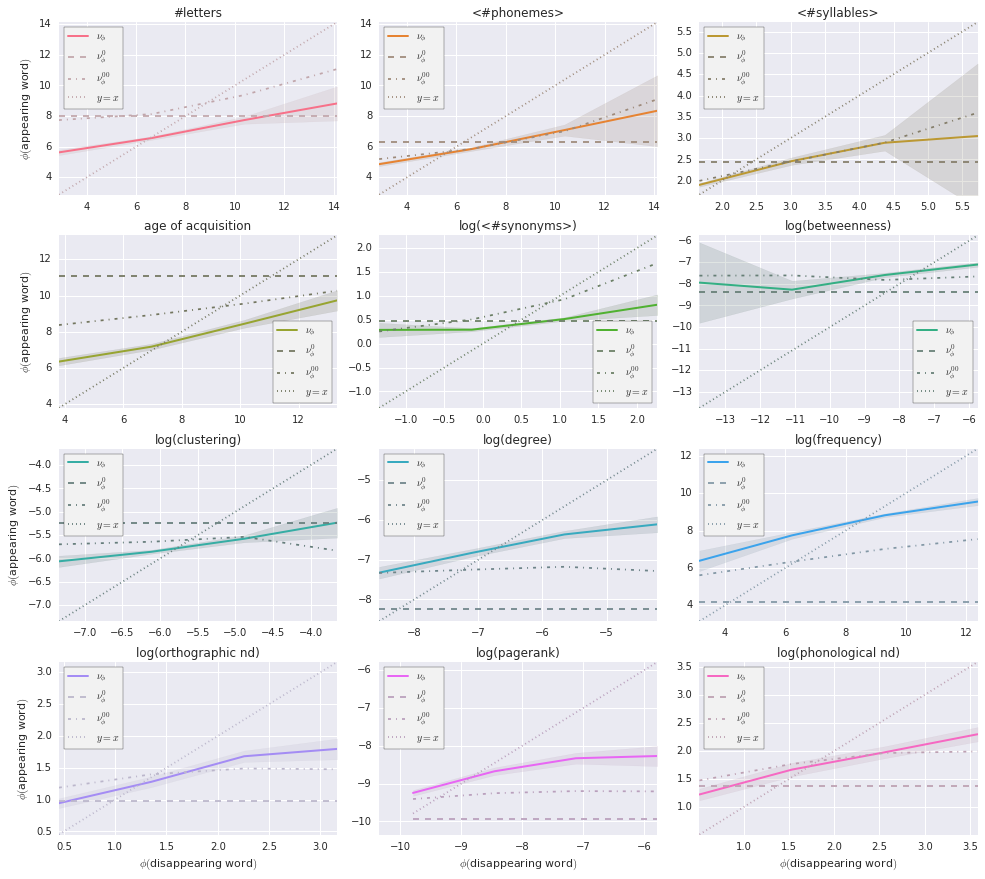

In [11]:
plot_grid(variations, ordered_features,
          'all-variations-fixedbins_global', plot_variation,
          r'$\phi($disappearing word$)$', r'$\phi($appearing word$)$')

Then plot $\nu_{\phi} - \nu_{\phi}^{00}$ for each feature (i.e. the measured bias) to see how they compare

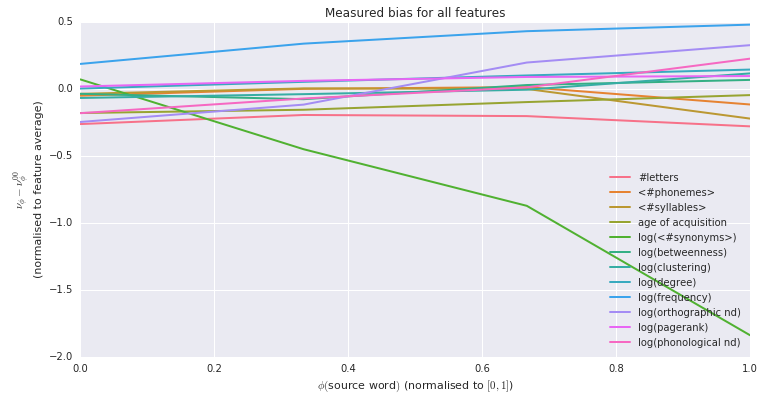

In [12]:
plot_overlay(variations, ordered_features,
             'all-variations_bias-fixedbins_global',
             'husl', plot_bias, 'Measured bias for all features',
             r'$\phi($source word$)$ (normalised to $[0, 1]$)',
             r'$\nu_{\phi} - \nu_{\phi}^{00}$'
                 '\n(normalised to feature average)',
             plot_kws={'ci': False});


---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | **  | *** | *** | *** |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | ns. |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | *** | *** | ns. | *** |

-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | ns. | ns. |


H_00 | *** | *** | *** | *** |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *   | *** | *   | **  |
H_00 | ns. | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | *** | *** |
H_00 | *** | **  | *** | *** |


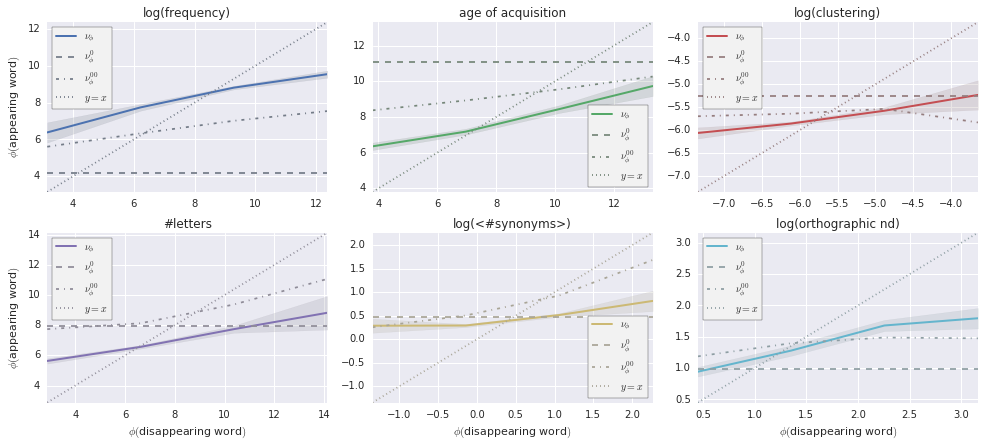

In [13]:
plot_grid(variations, PAPER_FEATURES,
          'paper-variations-fixedbins_global', plot_variation,
          r'$\phi($disappearing word$)$', r'$\phi($appearing word$)$')

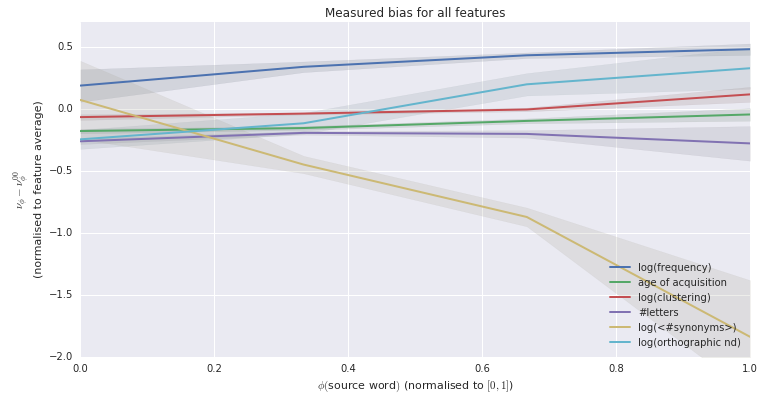

In [14]:
plot_overlay(variations, PAPER_FEATURES,
             'paper-variations_bias-fixedbins_global',
             'deep', plot_bias, 'Measured bias for all features',
             r'$\phi($source word$)$ (normalised to $[0, 1]$)',
             r'$\nu_{\phi} - \nu_{\phi}^{00}$'
                 '\n(normalised to feature average)')\
    .set_ylim(-2, .7);

#### 2.1.2 Quantiles of distribution of appeared global feature values


-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | *** | *** | *** | *** |

--------------
phonemes_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | ns. | ns. | ns. |

---------------
syllables_count
---------------
Bin  |   1 |   2 |   3 |
------------------------
H_0  | *** | *** | **  |
H_00 | *** | *   | ns. |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | **  | *** |
H_00 | *** | *** | *** | *** |

-----------
betweenness
-----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | ns. | *** | *** | *** |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |


H_00 | *** | *** | *** | ns. |

------
degree
------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | ns. | *** | *** | *** |

---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | **  | *** | *** | *** |


H_00 | *** | **  | *   | *** |

--------
pagerank
--------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | ns. | *** | *** | *** |

--------------------
phonological_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | **  | *** | *** | *** |
H_00 | *** | ns. | ns. | *** |


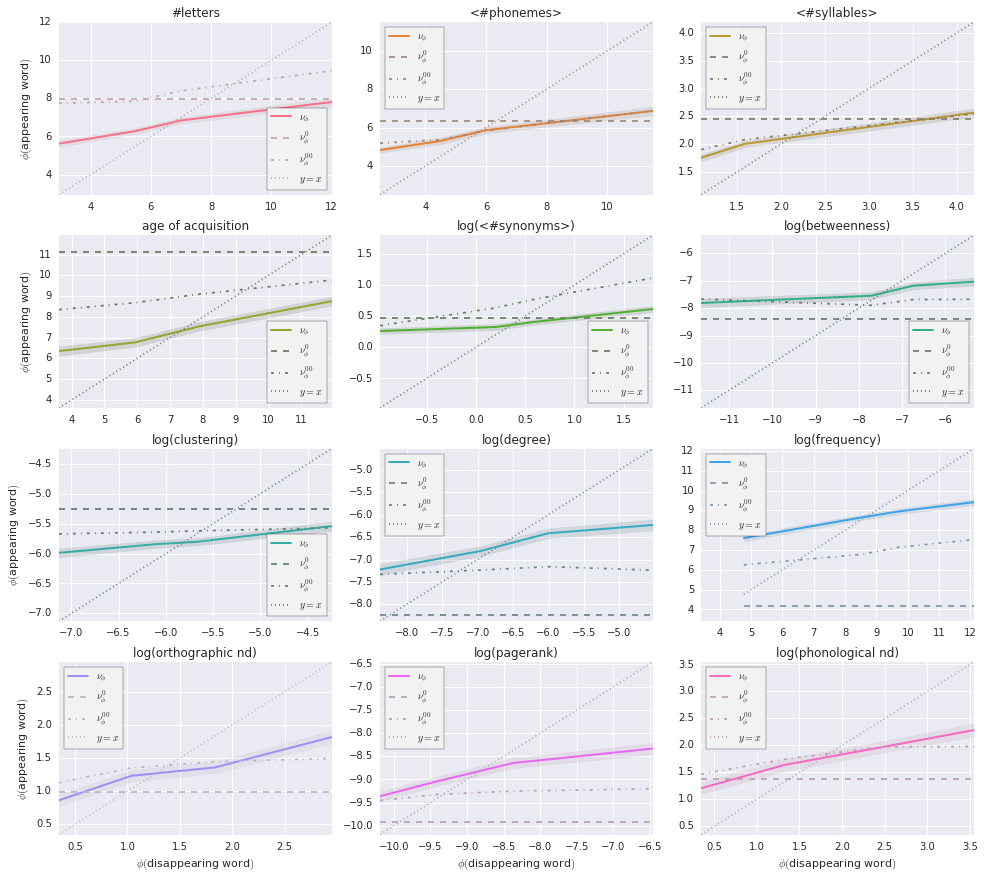

In [15]:
plot_grid(variations, ordered_features,
          'all-variations-quantilebins_global', plot_variation,
          r'$\phi($disappearing word$)$', r'$\phi($appearing word$)$',
          plot_kws={'quantiles': True})

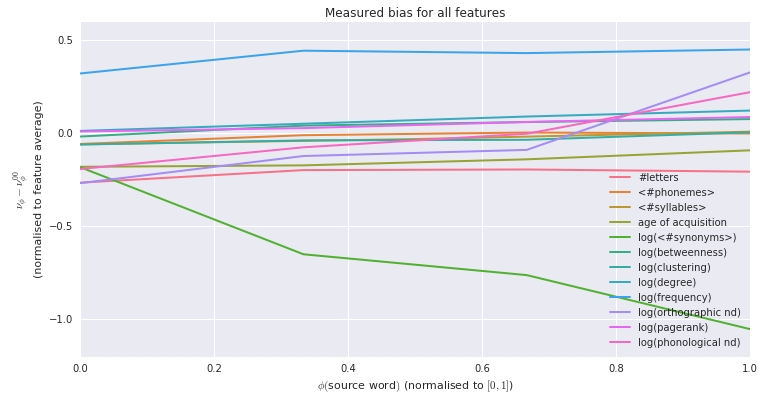

In [16]:
plot_overlay(variations, ordered_features,
             'all-variations_bias-quantilebins_global',
             'husl', plot_bias, 'Measured bias for all features',
             r'$\phi($source word$)$ (normalised to $[0, 1]$)',
             r'$\nu_{\phi} - \nu_{\phi}^{00}$'
                 '\n(normalised to feature average)',
             plot_kws={'ci': False, 'quantiles': True});


---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | ns. |

-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |


H_00 | *** | *** | *** | *** |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | **  | *** |
H_00 | *** | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | **  | *** | *** | *** |
H_00 | *** | **  | *   | *** |


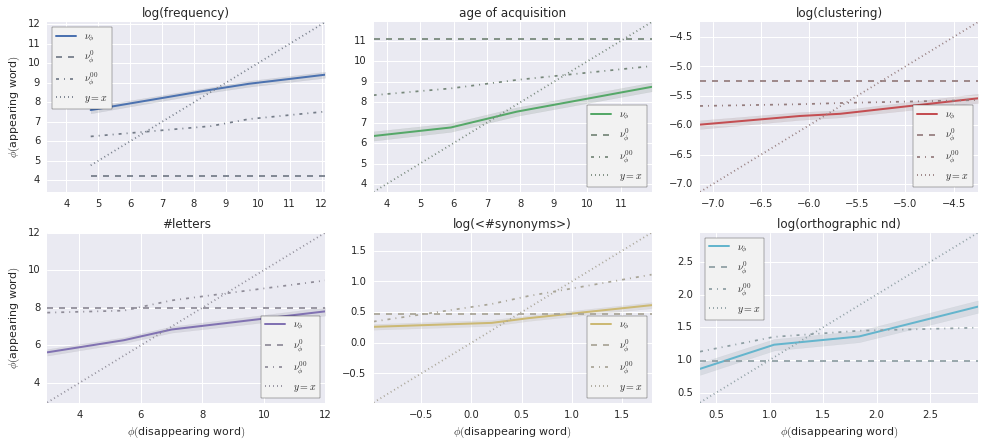

In [17]:
plot_grid(variations, PAPER_FEATURES,
          'paper-variations-quantilebins_global', plot_variation,
          r'$\phi($disappearing word$)$', r'$\phi($appearing word$)$',
          plot_kws={'quantiles': True})

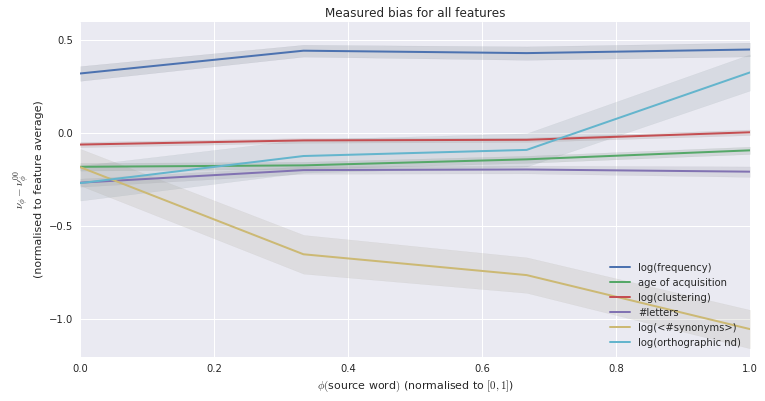

In [18]:
plot_overlay(variations, PAPER_FEATURES,
             'paper-variations_bias-quantilebins_global',
             'deep', plot_bias, 'Measured bias for all features',
             r'$\phi($source word$)$ (normalised to $[0, 1]$)',
             r'$\nu_{\phi} - \nu_{\phi}^{00}$'
                 '\n(normalised to feature average)',
             plot_kws={'quantiles': True})\
    .set_ylim(-1.2, .6);

### 2.2 Sentence-relative feature values

#### 2.2.1 Bins of distribution of appeared sentence-relative values


-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | *** | *** | *** | *** |

--------------
phonemes_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | *** | ns. | ns. | ns. |

---------------
syllables_count
---------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | **  | *** | *** | ns. |
H_00 | ns. | *** | ns. | ns. |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | *** | *** |
H_00 | *   | *** | *** | **  |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | **  | *** | *   | *   |
H_00 | ns. | *** | *** | *** |

-----------
betweenness
-----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | ns. | *** | *** |
H_00 | ns. | *** | *** | *** |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |


H_00 | *** | *** | *   | **  |

------
degree
------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *   | *** | *** | *** |

---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | *** | *** |
H_00 | *** | *** | **  | ns. |



--------
pagerank
--------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | ns. | *** | *** | *** |

--------------------
phonological_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | ns. | *** | *** |
H_00 | ns. | *** | ns. | *   |


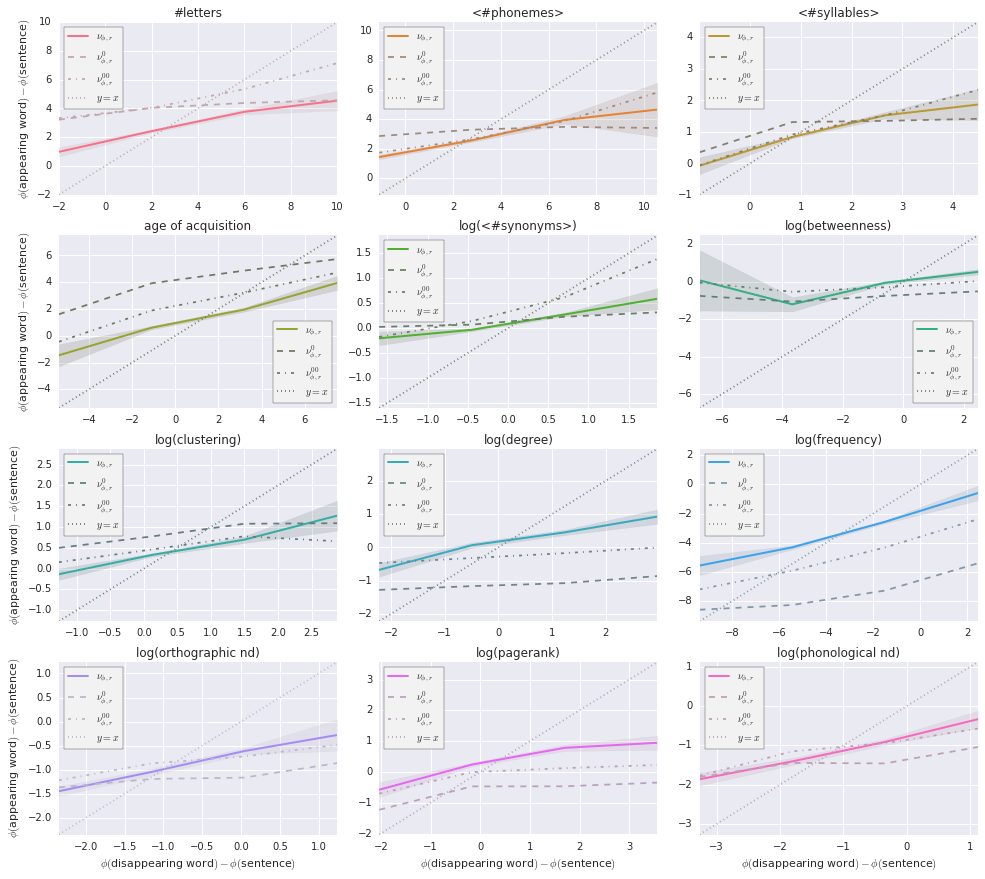

In [19]:
plot_grid(variations, ordered_features,
          'all-variations-fixedbins_sentencerel', plot_variation,
          r'$\phi($disappearing word$) - \phi($sentence$)$',
          r'$\phi($appearing word$) - \phi($sentence$)$',
          plot_kws={'relative': True})

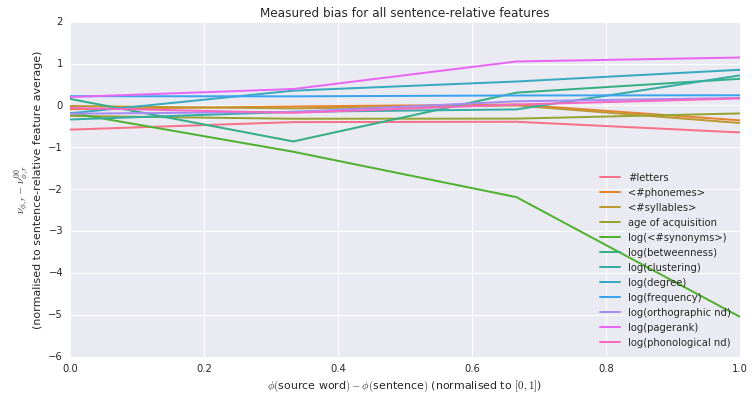

In [20]:
plot_overlay(variations, ordered_features,
             'all-variations_bias-fixedbins_sentencerel',
             'husl', plot_bias,
             'Measured bias for all sentence-relative features',
             r'$\phi($source word$) - \phi($sentence$)$'
                 r' (normalised to $[0, 1]$)',
             r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$'
                 '\n(normalised to sentence-relative feature average)',
             plot_kws={'ci': False, 'relative': True});


---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *   | *** | *** | **  |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | *** | *** | *   | **  |

-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | *** | *** | *** | *** |



--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | **  | *** | *   | *   |
H_00 | ns. | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | *** | *** |
H_00 | *** | *** | **  | ns. |


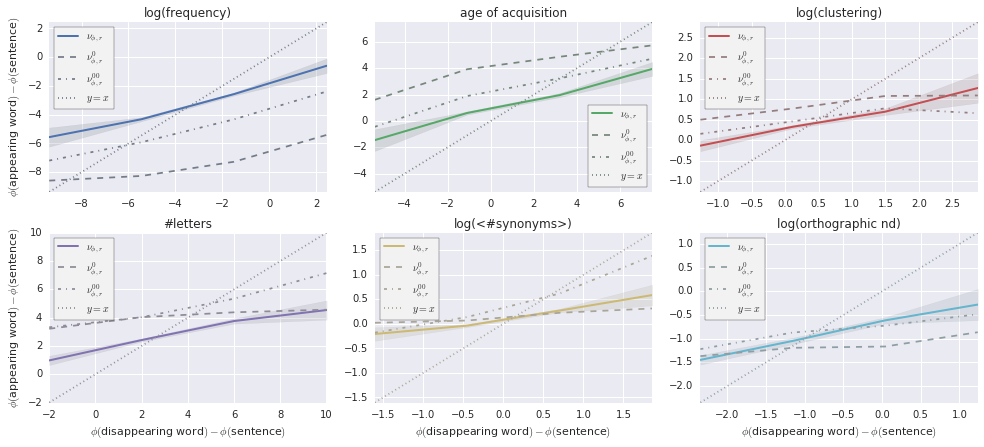

In [21]:
plot_grid(variations, PAPER_FEATURES,
          'paper-variations-fixedbins_sentencerel', plot_variation,
          r'$\phi($disappearing word$) - \phi($sentence$)$',
          r'$\phi($appearing word$) - \phi($sentence$)$',
          plot_kws={'relative': True})

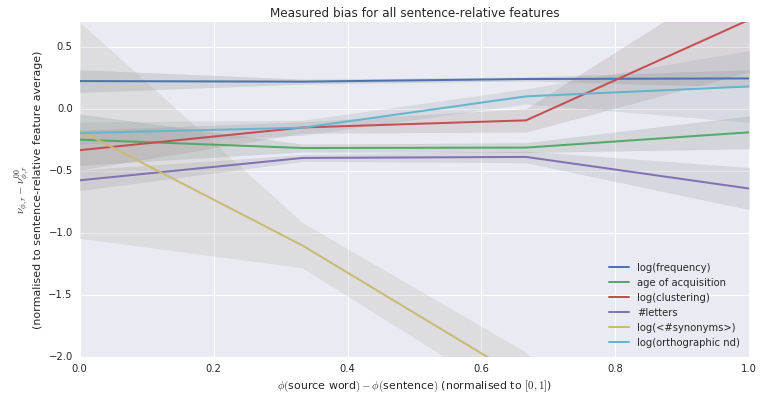

In [22]:
plot_overlay(variations, PAPER_FEATURES,
             'paper-variations_bias-fixedbins_sentencerel',
             'deep', plot_bias,
             'Measured bias for all sentence-relative features',
             r'$\phi($source word$) - \phi($sentence$)$'
                 r' (normalised to $[0, 1]$)',
             r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$'
                 '\n(normalised to sentence-relative feature average)',
             plot_kws={'relative': True})\
    .set_ylim(-2, .7);

#### 2.2.2 Quantiles of distribution of appeared sentence-relative values


-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

--------------
phonemes_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *   |
H_00 | **  | *   | ns. | ns. |

---------------
syllables_count
---------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | ns. | **  |
H_00 | *** | *   | **  | ns. |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | ns. | *** |
H_00 | *** | *** | *** | *** |

-----------
betweenness
-----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | ns. | *** | *** | *** |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |


H_00 | *** | *** | *   | ns. |

------
degree
------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | ns. | *** | *** | *** |

---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | *** | *** |
H_00 | *** | *** | ns. | *** |



--------
pagerank
--------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | **  | *** | *** | *** |

--------------------
phonological_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *   | *** | *** |
H_00 | **  | *** | ns. | *   |


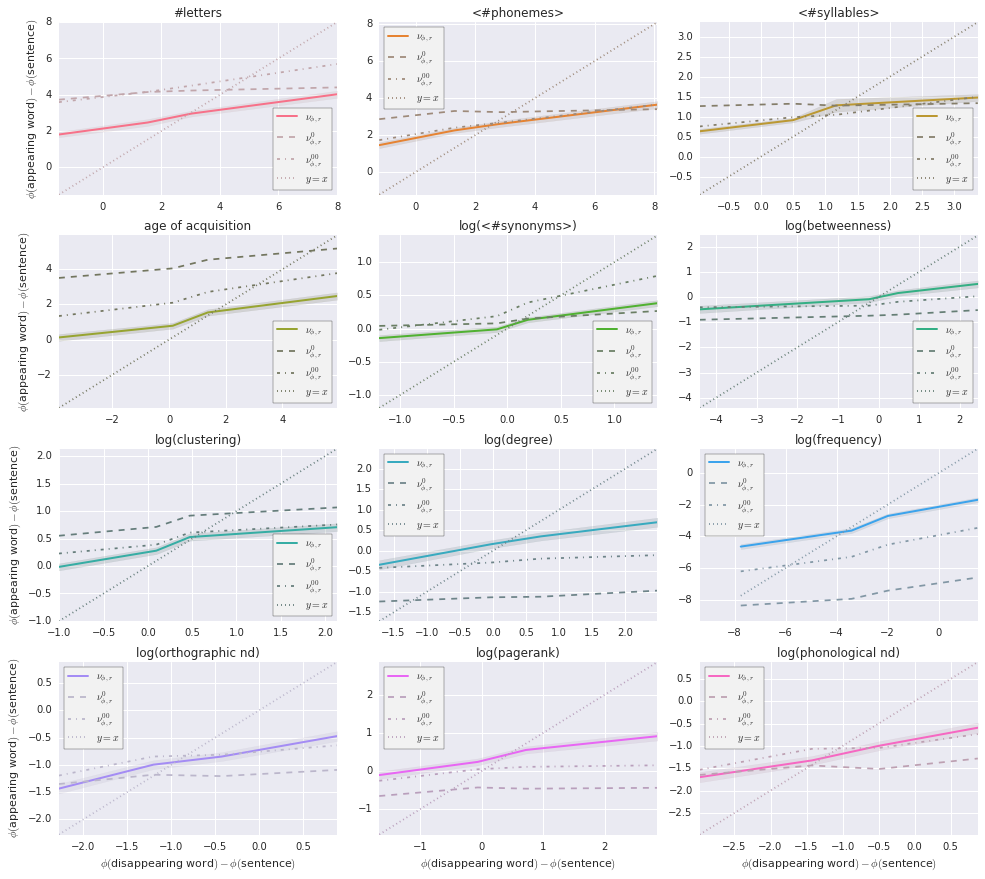

In [23]:
plot_grid(variations, ordered_features,
          'all-variations-quantilebins_sentencerel', plot_variation,
          r'$\phi($disappearing word$) - \phi($sentence$)$',
          r'$\phi($appearing word$) - \phi($sentence$)$',
          plot_kws={'relative': True, 'quantiles': True})

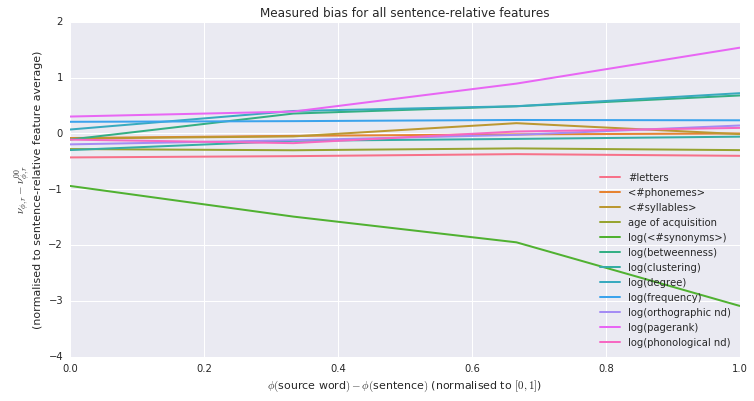

In [24]:
plot_overlay(variations, ordered_features,
             'all-variations_bias-quantilebins_sentencerel',
             'husl', plot_bias,
             'Measured bias for all sentence-relative features',
             r'$\phi($source word$) - \phi($sentence$)$'
                 r' (normalised to $[0, 1]$)',
             r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$'
                 '\n(normalised to sentence-relative feature average)',
             plot_kws={'ci': False, 'relative': True, 'quantiles': True});


---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *   | ns. |

-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |


H_00 | *** | *** | *** | *** |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | ns. | *** |
H_00 | *** | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | *** | *** |
H_00 | *** | *** | ns. | *** |


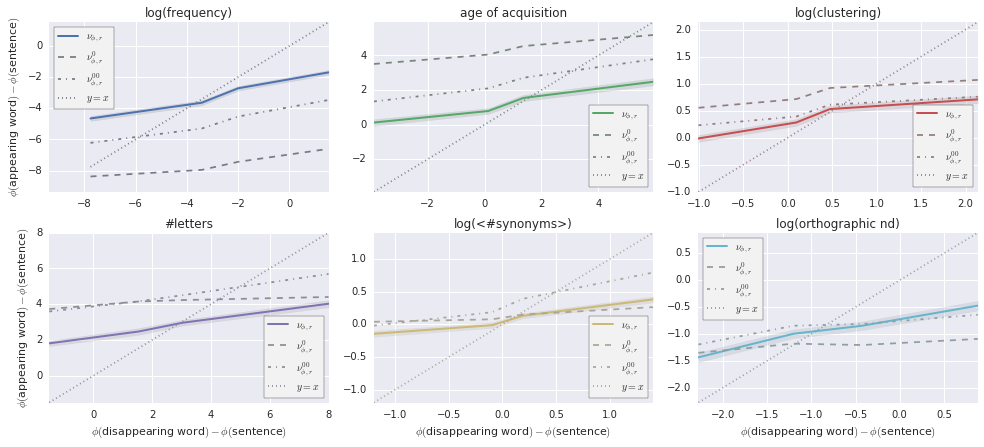

In [25]:
plot_grid(variations, PAPER_FEATURES,
          'paper-variations-quantilebins_sentencerel', plot_variation,
          r'$\phi($disappearing word$) - \phi($sentence$)$',
          r'$\phi($appearing word$) - \phi($sentence$)$',
          plot_kws={'relative': True, 'quantiles': True})

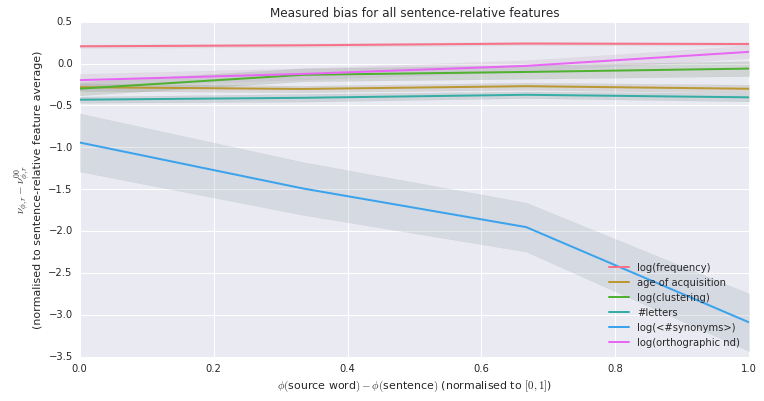

In [26]:
plot_overlay(variations, PAPER_FEATURES,
             'paper-variations_bias-quantilebins_sentencerel',
             'husl', plot_bias,
             'Measured bias for all sentence-relative features',
             r'$\phi($source word$) - \phi($sentence$)$'
                 r' (normalised to $[0, 1]$)',
             r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$'
                 '\n(normalised to sentence-relative feature average)',
             plot_kws={'relative': True, 'quantiles': True});

## 3 Streamplots

We'd like to see what happens between absolute and relative feature values, i.e. how do their effects interact. Especially, we want to know who wins between cognitive bias, attraction to sentence average, or attraction to global feature average.

To do this we plot the general direction (arrows) and strength (color) of where destination words are given a particular absolute/relative source feature couple. I.e., for a given absolute feature value and relative feature value, if this word were to be substituted, where would it go in this (absolute, relative) space?

The interesting thing in these plots is the attraction front, where all arrows point to and join. We're interested in:
* its slope
* its shape (e.g. several slope regimes?)
* its position w.r.t. $\nu_{\phi}^0$ and $y = 0$ (which is $\left< \phi(sentence) \right>$)

First, here's our plotting function. (Note we set the arrow size to something that turns out to be huge here, but gives normal sizes in the figures saves. There must be some dpi scaling problem with the arrows.)

In [27]:
def plot_stream(**kwargs):
    data = kwargs.pop('data')
    color = kwargs.get('color', 'blue')
    source = data['source']
    source_rel = data['source_rel']
    dest = data['destination']
    dest_rel = data['destination_rel']
    h0 = data['h0']
    
    # Compute binning.
    bin_count = 4
    x_bins, x_margins = pd.cut(source, bin_count,
                               right=False, labels=False, retbins=True)
    x_middles = (x_margins[:-1] + x_margins[1:]) / 2
    y_bins, y_margins = pd.cut(source_rel, bin_count,
                               right=False, labels=False, retbins=True)
    y_middles = (y_margins[:-1] + y_margins[1:]) / 2
    
    # Compute bin values.
    h0s = np.ones(bin_count) * h0.iloc[0]
    u_values = np.zeros((bin_count, bin_count))
    v_values = np.zeros((bin_count, bin_count))
    strength = np.zeros((bin_count, bin_count))
    for x in range(bin_count):
        for y in range(bin_count):
            u_values[y, x] = (
                dest[(x_bins == x) & (y_bins == y)] -
                source[(x_bins == x) & (y_bins == y)]
            ).mean()
            v_values[y, x] = (
                dest_rel[(x_bins == x) & (y_bins == y)] -
                source_rel[(x_bins == x) & (y_bins == y)]
            ).mean()
            strength[y, x] = np.sqrt(
                (dest[(x_bins == x) & (y_bins == y)] - 
                 source[(x_bins == x) & (y_bins == y)]) ** 2 +
                (dest_rel[(x_bins == x) & (y_bins == y)] - 
                 source_rel[(x_bins == x) & (y_bins == y)]) ** 2
            ).mean()
    
    # Plot.
    plt.streamplot(x_middles, y_middles, u_values, v_values,
                   arrowsize=4, color=strength, cmap=plt.cm.viridis)
    plt.plot(x_middles, np.zeros(bin_count), linestyle='-',
             color=sb.desaturate(color, 0.2), 
             label=r'$\left< \phi(sentence) \right>$')
    plt.plot(h0s, y_middles, linestyle='--',
             color=sb.desaturate(color, 0.2), label=r'$\nu_{\phi}^0$')
    plt.xlim(x_middles[0], x_middles[-1])
    plt.ylim(y_middles[0], y_middles[-1])

Here are the plots for all features

/home/sl/.virtualenvs/brainscopypaste/lib/python3.5/site-packages/numpy/ma/core.py:4144: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


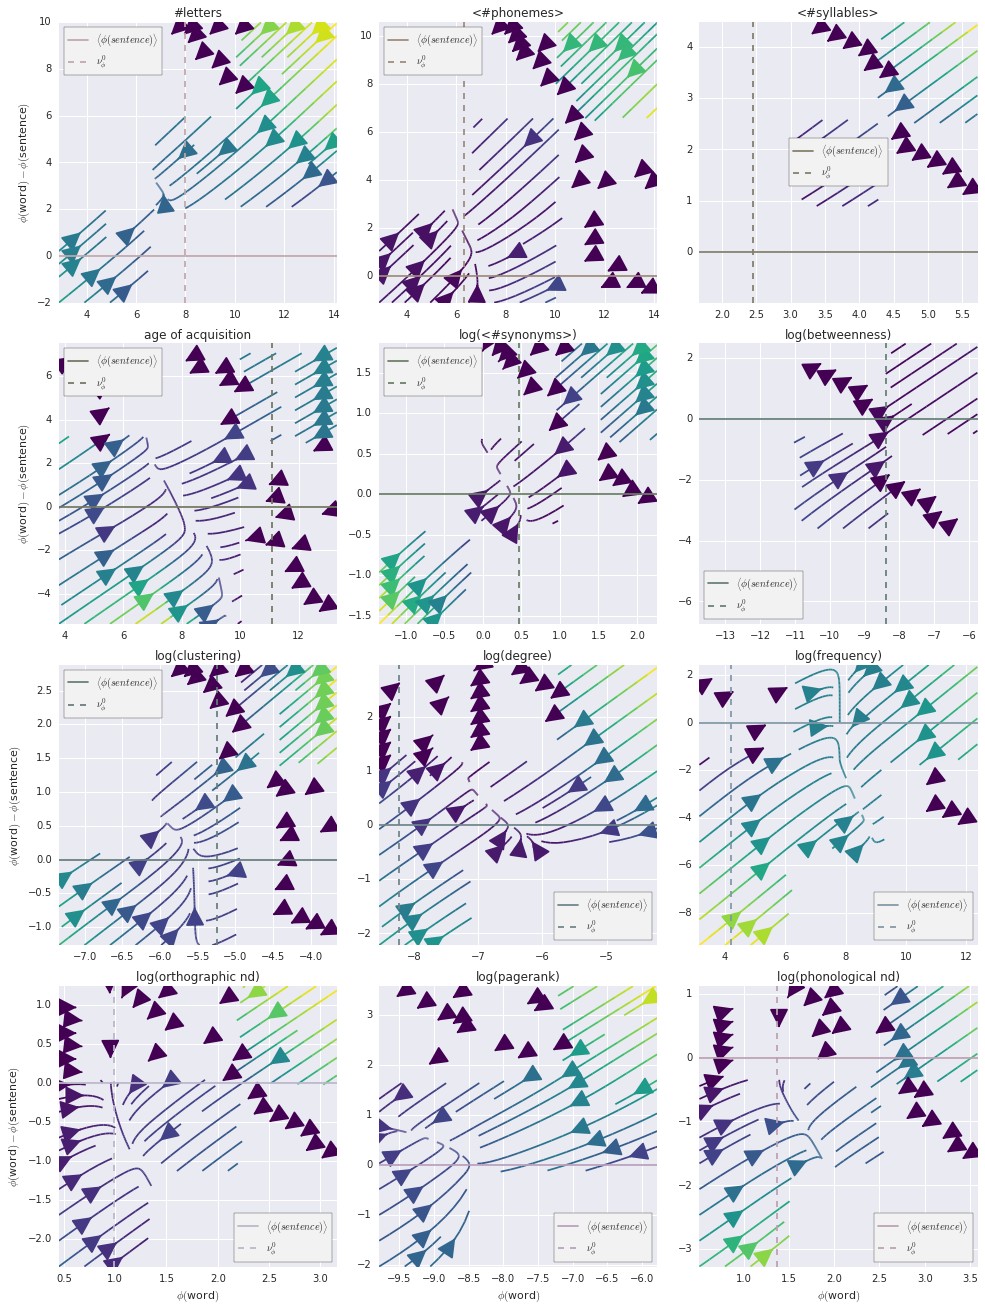

In [28]:
g = sb.FacetGrid(data=variations,
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1, size=4.5,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_stream)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($word$)$')
g.set_ylabels(r'$\phi($word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_streams'),
                  bbox_inches='tight', dpi=300)

And here are the plots for the features we expose in the paper

/home/sl/.virtualenvs/brainscopypaste/lib/python3.5/site-packages/numpy/ma/core.py:4144: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


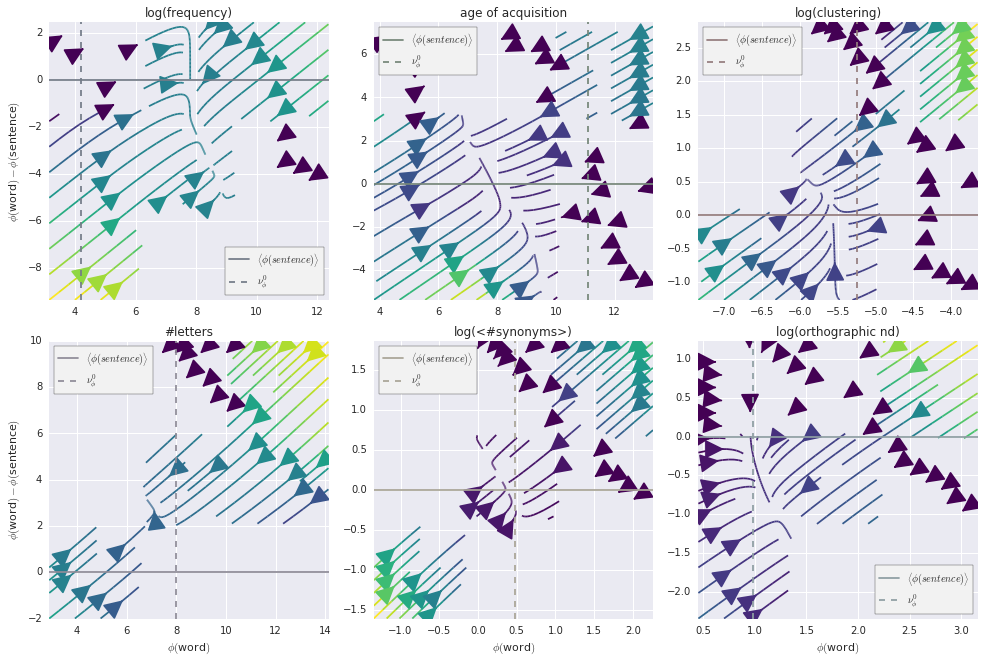

In [29]:
g = sb.FacetGrid(data=variations[variations['feature']
                                 .map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1, size=4.5,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_stream)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($word$)$')
g.set_ylabels(r'$\phi($word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_streams'),
                  bbox_inches='tight', dpi=300)

## 4 PCA'd feature variations

Compute PCA on feature *variations* (note: on variations, not on features directly), and show the evolution of the first three components upon substitution.

**CAVEAT**: the PCA is computed on variations where all features are defined. This greatly reduces the number of words included (and also the number of substitutions -- see below for real values, but you should know it's drastic). This also has an effect on the computation of $\mathcal{H}_0$ and $\mathcal{H}_{00}$, which are computed using words for which all features are defined. This, again, hugely reduces the number of words taken into account, changing the values under the null hypotheses.

### 4.1 On all the features

Compute the actual PCA

In [30]:
# Compute the PCA.
pcafeatures = tuple(sorted(Substitution.__features__))
pcavariations = variations.pivot(index='cluster_id',
                                 columns='feature', values='variation')
pcavariations = pcavariations.dropna()
pca = PCA(n_components='mle')
pca.fit(pcavariations)

# Show 
print('MLE estimates there are {} components.\n'.format(pca.n_components_))
print('Those explain the following variance:')
print(pca.explained_variance_ratio_)
print()

print("We're plotting variation for the first {} components:"
      .format(N_COMPONENTS))
pd.DataFrame(pca.components_[:N_COMPONENTS],
             columns=pcafeatures,
             index=['Component-{}'.format(i) for i in range(N_COMPONENTS)])

MLE estimates there are 10 components.

Those explain the following variance:
[ 0.54429289  0.16244208  0.08232993  0.07194     0.03430724  0.03098314
  0.01869876  0.01793193  0.0153086   0.00893022]

We're plotting variation for the first 3 components:


aoa  betweenness  clustering    degree  frequency  \
Component-0 -0.467853     0.258471   -0.081724  0.238200   0.229771   
Component-1  0.324609    -0.395430    0.143689 -0.304695  -0.281163   
Component-2  0.789583     0.497380   -0.138780  0.200936   0.092273   

             letters_count  orthographic_density  pagerank  phonemes_count  \
Component-0      -0.446017              0.203555  0.271539       -0.425229   
Component-1      -0.431409              0.152832 -0.301420       -0.425833   
Component-2      -0.117530              0.025348  0.177625       -0.058149   

             phonological_density  syllables_count  synonyms_count  
Component-0              0.273714         -0.16801        0.005244  
Component-1              0.191787         -0.16518       -0.000117  
Component-2              0.102049         -0.01276       -0.032533

Compute the source and destination component values, along with $\mathcal{H}_0$ and $\mathcal{H}_{00}$, for each component.

In [31]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for component in range(N_COMPONENTS):
            source, destination = substitution\
                .components(component, pca, pcafeatures)
            data.append({
                'cluster_id': substitution.source.cluster.sid,
                'destination_id': substitution.destination.sid,
                'occurrence': substitution.occurrence,
                'position': substitution.position,
                'source_id': substitution.source.sid,
                'component': component,
                'source': source,
                'destination': destination,
                'h0': substitution.component_average(component, pca,
                                                     pcafeatures),
                'h0n': substitution.component_average(component, pca,
                                                      pcafeatures,
                                                      source_synonyms=True)
            })

original_component_variations = pd.DataFrame(data)
del data

  0% (    0 of 87568) |                   | Elapsed Time: 0:00:00 ETA:  --:--:--

  0% (    4 of 87568) |           | Elapsed Time: 0:00:46 ETA: 11 days, 19:01:28

  0% (   25 of 87568) |             | Elapsed Time: 0:00:46 ETA: 1 day, 21:28:28

  0% (   47 of 87568) |              | Elapsed Time: 0:00:46 ETA: 1 day, 0:17:26

  0% (   72 of 87568) |                    | Elapsed Time: 0:00:47 ETA: 15:55:19

  0% (   97 of 87568) |                     | Elapsed Time: 0:00:47 ETA: 0:14:21

  0% (  122 of 87568) |                     | Elapsed Time: 0:00:47 ETA: 0:12:37

  0% (  148 of 87568) |                     | Elapsed Time: 0:00:47 ETA: 0:12:13

  0% (  173 of 87568) |                     | Elapsed Time: 0:00:48 ETA: 0:12:05

  0% (  200 of 87568) |                     | Elapsed Time: 0:00:48 ETA: 0:11:50

  0% (  226 of 87568) |                     | Elapsed Time: 0:00:48 ETA: 0:11:45

  0% (  252 of 87568) |                     | Elapsed Time: 0:00:48 ETA: 0:11:48

  0% (  278 of 87568) |                     | Elapsed Time: 0:00:48 ETA: 0:11:37

  0% (  303 of 87568) |                     | Elapsed Time: 0:00:49 ETA: 0:11:39

  0% (  325 of 87568) |                     | Elapsed Time: 0:00:49 ETA: 0:12:13

  0% (  347 of 87568) |                     | Elapsed Time: 0:00:49 ETA: 0:12:33

  0% (  373 of 87568) |                     | Elapsed Time: 0:00:49 ETA: 0:12:31

  0% (  398 of 87568) |                     | Elapsed Time: 0:00:49 ETA: 0:12:36

  0% (  423 of 87568) |                     | Elapsed Time: 0:00:50 ETA: 0:12:26

  0% (  448 of 87568) |                     | Elapsed Time: 0:00:50 ETA: 0:12:05

  0% (  471 of 87568) |                     | Elapsed Time: 0:00:50 ETA: 0:12:13

  0% (  496 of 87568) |                     | Elapsed Time: 0:00:50 ETA: 0:12:14

  0% (  520 of 87568) |                     | Elapsed Time: 0:00:50 ETA: 0:12:22

  0% (  545 of 87568) |                     | Elapsed Time: 0:00:51 ETA: 0:12:27

  0% (  571 of 87568) |                     | Elapsed Time: 0:00:51 ETA: 0:12:09

  0% (  598 of 87568) |                     | Elapsed Time: 0:00:51 ETA: 0:11:58

  0% (  622 of 87568) |                     | Elapsed Time: 0:00:51 ETA: 0:11:55

  0% (  648 of 87568) |                     | Elapsed Time: 0:00:51 ETA: 0:11:36

  0% (  675 of 87568) |                     | Elapsed Time: 0:00:52 ETA: 0:11:31

  0% (  701 of 87568) |                     | Elapsed Time: 0:00:52 ETA: 0:11:29

  0% (  726 of 87568) |                     | Elapsed Time: 0:00:52 ETA: 0:11:39

  0% (  751 of 87568) |                     | Elapsed Time: 0:00:52 ETA: 0:11:40

  0% (  775 of 87568) |                     | Elapsed Time: 0:00:52 ETA: 0:11:57

  0% (  797 of 87568) |                     | Elapsed Time: 0:00:53 ETA: 0:12:18

  0% (  821 of 87568) |                     | Elapsed Time: 0:00:53 ETA: 0:12:35

  0% (  844 of 87568) |                     | Elapsed Time: 0:00:53 ETA: 0:12:38

  0% (  868 of 87568) |                     | Elapsed Time: 0:00:53 ETA: 0:12:49

  1% (  892 of 87568) |                     | Elapsed Time: 0:00:54 ETA: 0:12:46

  1% (  915 of 87568) |                     | Elapsed Time: 0:00:54 ETA: 0:12:47

  1% (  940 of 87568) |                     | Elapsed Time: 0:00:54 ETA: 0:12:35

  1% (  965 of 87568) |                     | Elapsed Time: 0:00:54 ETA: 0:12:33

  1% (  988 of 87568) |                     | Elapsed Time: 0:00:54 ETA: 0:12:39

  1% ( 1012 of 87568) |                     | Elapsed Time: 0:00:55 ETA: 0:12:36

  1% ( 1036 of 87568) |                     | Elapsed Time: 0:00:55 ETA: 0:12:40

  1% ( 1061 of 87568) |                     | Elapsed Time: 0:00:55 ETA: 0:12:40

  1% ( 1095 of 87568) |                     | Elapsed Time: 0:00:55 ETA: 0:12:38

  1% ( 1120 of 87568) |                     | Elapsed Time: 0:00:56 ETA: 0:12:30

  1% ( 1145 of 87568) |                     | Elapsed Time: 0:00:56 ETA: 0:12:25

  1% ( 1167 of 87568) |                     | Elapsed Time: 0:00:56 ETA: 0:12:39

  1% ( 1192 of 87568) |                     | Elapsed Time: 0:00:56 ETA: 0:12:32

  1% ( 1218 of 87568) |                     | Elapsed Time: 0:00:56 ETA: 0:12:20

  1% ( 1244 of 87568) |                     | Elapsed Time: 0:00:57 ETA: 0:12:06

  1% ( 1269 of 87568) |                     | Elapsed Time: 0:00:57 ETA: 0:11:48

  1% ( 1295 of 87568) |                     | Elapsed Time: 0:00:57 ETA: 0:11:38

  1% ( 1322 of 87568) |                     | Elapsed Time: 0:00:57 ETA: 0:11:26

  1% ( 1349 of 87568) |                     | Elapsed Time: 0:00:57 ETA: 0:11:20

  1% ( 1377 of 87568) |                     | Elapsed Time: 0:00:58 ETA: 0:11:12

  1% ( 1405 of 87568) |                     | Elapsed Time: 0:00:58 ETA: 0:10:54

  1% ( 1432 of 87568) |                     | Elapsed Time: 0:00:58 ETA: 0:10:55

  1% ( 1459 of 87568) |                     | Elapsed Time: 0:00:58 ETA: 0:10:59

  1% ( 1484 of 87568) |                     | Elapsed Time: 0:00:58 ETA: 0:11:06

  1% ( 1523 of 87568) |                     | Elapsed Time: 0:00:59 ETA: 0:11:20

  1% ( 1549 of 87568) |                     | Elapsed Time: 0:00:59 ETA: 0:11:22

  1% ( 1576 of 87568) |                     | Elapsed Time: 0:00:59 ETA: 0:11:16

  1% ( 1602 of 87568) |                     | Elapsed Time: 0:00:59 ETA: 0:11:12

  1% ( 1630 of 87568) |                     | Elapsed Time: 0:01:00 ETA: 0:11:08

  1% ( 1658 of 87568) |                     | Elapsed Time: 0:01:00 ETA: 0:11:06

  1% ( 1683 of 87568) |                     | Elapsed Time: 0:01:00 ETA: 0:11:09

  1% ( 1708 of 87568) |                     | Elapsed Time: 0:01:00 ETA: 0:11:14

  1% ( 1736 of 87568) |                     | Elapsed Time: 0:01:00 ETA: 0:11:09

  2% ( 1762 of 87568) |                     | Elapsed Time: 0:01:01 ETA: 0:11:18

  2% ( 1787 of 87568) |                     | Elapsed Time: 0:01:01 ETA: 0:11:15

  2% ( 1815 of 87568) |                     | Elapsed Time: 0:01:01 ETA: 0:11:09

  2% ( 1842 of 87568) |                     | Elapsed Time: 0:01:01 ETA: 0:11:06

  2% ( 1868 of 87568) |                     | Elapsed Time: 0:01:01 ETA: 0:11:14

  2% ( 1895 of 87568) |                     | Elapsed Time: 0:01:02 ETA: 0:11:07

  2% ( 1921 of 87568) |                     | Elapsed Time: 0:01:02 ETA: 0:11:02

  2% ( 1950 of 87568) |                     | Elapsed Time: 0:01:02 ETA: 0:11:02

  2% ( 1975 of 87568) |                     | Elapsed Time: 0:01:02 ETA: 0:11:15

  2% ( 1998 of 87568) |                     | Elapsed Time: 0:01:02 ETA: 0:11:29

  2% ( 2023 of 87568) |                     | Elapsed Time: 0:01:03 ETA: 0:11:37

  2% ( 2048 of 87568) |                     | Elapsed Time: 0:01:03 ETA: 0:11:50

  2% ( 2073 of 87568) |                     | Elapsed Time: 0:01:03 ETA: 0:11:55

  2% ( 2096 of 87568) |                     | Elapsed Time: 0:01:03 ETA: 0:11:59

  2% ( 2122 of 87568) |                     | Elapsed Time: 0:01:04 ETA: 0:11:50

  2% ( 2146 of 87568) |                     | Elapsed Time: 0:01:04 ETA: 0:11:58

  2% ( 2172 of 87568) |                     | Elapsed Time: 0:01:04 ETA: 0:11:56

  2% ( 2202 of 87568) |                     | Elapsed Time: 0:01:04 ETA: 0:11:45

  2% ( 2227 of 87568) |                     | Elapsed Time: 0:01:04 ETA: 0:11:48

  2% ( 2254 of 87568) |                     | Elapsed Time: 0:01:05 ETA: 0:11:44

  2% ( 2280 of 87568) |                     | Elapsed Time: 0:01:05 ETA: 0:11:33

  2% ( 2307 of 87568) |                     | Elapsed Time: 0:01:05 ETA: 0:11:26

  2% ( 2335 of 87568) |                     | Elapsed Time: 0:01:05 ETA: 0:11:11

  2% ( 2362 of 87568) |                     | Elapsed Time: 0:01:05 ETA: 0:10:53

  2% ( 2389 of 87568) |                     | Elapsed Time: 0:01:06 ETA: 0:10:53

  2% ( 2414 of 87568) |                     | Elapsed Time: 0:01:06 ETA: 0:10:57

  2% ( 2442 of 87568) |                     | Elapsed Time: 0:01:06 ETA: 0:10:55

  2% ( 2466 of 87568) |                     | Elapsed Time: 0:01:06 ETA: 0:11:13

  2% ( 2493 of 87568) |                     | Elapsed Time: 0:01:06 ETA: 0:11:18

  2% ( 2522 of 87568) |                     | Elapsed Time: 0:01:07 ETA: 0:11:01

  2% ( 2550 of 87568) |                     | Elapsed Time: 0:01:07 ETA: 0:10:56

  2% ( 2577 of 87568) |                     | Elapsed Time: 0:01:07 ETA: 0:10:43

  2% ( 2605 of 87568) |                     | Elapsed Time: 0:01:07 ETA: 0:10:29

  3% ( 2634 of 87568) |                     | Elapsed Time: 0:01:08 ETA: 0:10:27

  3% ( 2663 of 87568) |                     | Elapsed Time: 0:01:08 ETA: 0:10:23

  3% ( 2690 of 87568) |                     | Elapsed Time: 0:01:08 ETA: 0:10:24

  3% ( 2718 of 87568) |                     | Elapsed Time: 0:01:08 ETA: 0:10:26

  3% ( 2745 of 87568) |                     | Elapsed Time: 0:01:08 ETA: 0:10:38

  3% ( 2774 of 87568) |                     | Elapsed Time: 0:01:09 ETA: 0:10:39

  3% ( 2803 of 87568) |                     | Elapsed Time: 0:01:09 ETA: 0:10:34

  3% ( 2829 of 87568) |                     | Elapsed Time: 0:01:09 ETA: 0:10:45

  3% ( 2857 of 87568) |                     | Elapsed Time: 0:01:09 ETA: 0:10:41

  3% ( 2887 of 87568) |                     | Elapsed Time: 0:01:09 ETA: 0:10:35

  3% ( 2913 of 87568) |                     | Elapsed Time: 0:01:10 ETA: 0:10:41

  3% ( 2939 of 87568) |                     | Elapsed Time: 0:01:10 ETA: 0:10:40

  3% ( 2966 of 87568) |                     | Elapsed Time: 0:01:10 ETA: 0:10:41

  3% ( 2993 of 87568) |                     | Elapsed Time: 0:01:10 ETA: 0:10:44

  3% ( 3023 of 87568) |                     | Elapsed Time: 0:01:10 ETA: 0:10:39

  3% ( 3051 of 87568) |                     | Elapsed Time: 0:01:11 ETA: 0:10:34

  3% ( 3081 of 87568) |                     | Elapsed Time: 0:01:11 ETA: 0:10:16

  3% ( 3112 of 87568) |                     | Elapsed Time: 0:01:11 ETA: 0:09:54

  3% ( 3145 of 87568) |                     | Elapsed Time: 0:01:11 ETA: 0:09:28

  3% ( 3175 of 87568) |                     | Elapsed Time: 0:01:11 ETA: 0:09:35

  3% ( 3206 of 87568) |                     | Elapsed Time: 0:01:12 ETA: 0:09:10

  3% ( 3238 of 87568) |                     | Elapsed Time: 0:01:12 ETA: 0:09:12

  3% ( 3284 of 87568) |                     | Elapsed Time: 0:01:12 ETA: 0:09:09

  3% ( 3319 of 87568) |                     | Elapsed Time: 0:01:12 ETA: 0:08:58

  3% ( 3351 of 87568) |                     | Elapsed Time: 0:01:13 ETA: 0:08:55

  3% ( 3382 of 87568) |                     | Elapsed Time: 0:01:13 ETA: 0:08:56

  3% ( 3414 of 87568) |                     | Elapsed Time: 0:01:13 ETA: 0:08:53

  3% ( 3448 of 87568) |                     | Elapsed Time: 0:01:13 ETA: 0:08:56

  3% ( 3475 of 87568) |                     | Elapsed Time: 0:01:13 ETA: 0:09:17

  4% ( 3507 of 87568) |                     | Elapsed Time: 0:01:14 ETA: 0:09:20

  4% ( 3538 of 87568) |                     | Elapsed Time: 0:01:14 ETA: 0:09:18

  4% ( 3568 of 87568) |                     | Elapsed Time: 0:01:14 ETA: 0:09:27

  4% ( 3600 of 87568) |                     | Elapsed Time: 0:01:14 ETA: 0:09:17

  4% ( 3632 of 87568) |                     | Elapsed Time: 0:01:14 ETA: 0:09:16

  4% ( 3664 of 87568) |                     | Elapsed Time: 0:01:15 ETA: 0:09:13

  4% ( 3696 of 87568) |                     | Elapsed Time: 0:01:15 ETA: 0:09:11

  4% ( 3728 of 87568) |                     | Elapsed Time: 0:01:15 ETA: 0:09:10

  4% ( 3760 of 87568) |                     | Elapsed Time: 0:01:15 ETA: 0:09:10

  4% ( 3792 of 87568) |                     | Elapsed Time: 0:01:16 ETA: 0:09:09

  4% ( 3822 of 87568) |                     | Elapsed Time: 0:01:16 ETA: 0:09:14

  4% ( 3839 of 87568) |                     | Elapsed Time: 0:01:16 ETA: 0:10:17

  4% ( 3869 of 87568) |                     | Elapsed Time: 0:01:16 ETA: 0:10:20

  4% ( 3898 of 87568) |                     | Elapsed Time: 0:01:16 ETA: 0:10:35

  4% ( 3926 of 87568) |                     | Elapsed Time: 0:01:17 ETA: 0:10:53

  4% ( 3954 of 87568) |                     | Elapsed Time: 0:01:17 ETA: 0:10:22

  4% ( 3982 of 87568) |                     | Elapsed Time: 0:01:17 ETA: 0:10:08

  4% ( 4010 of 87568) |                     | Elapsed Time: 0:01:17 ETA: 0:10:17

  4% ( 4039 of 87568) |                     | Elapsed Time: 0:01:17 ETA: 0:10:11

  4% ( 4068 of 87568) |                     | Elapsed Time: 0:01:18 ETA: 0:10:05

  4% ( 4098 of 87568) |                     | Elapsed Time: 0:01:18 ETA: 0:10:00

  4% ( 4127 of 87568) |                     | Elapsed Time: 0:01:18 ETA: 0:09:58

  4% ( 4156 of 87568) |                     | Elapsed Time: 0:01:18 ETA: 0:09:56

  4% ( 4185 of 87568) |#                    | Elapsed Time: 0:01:18 ETA: 0:09:55

  4% ( 4214 of 87568) |#                    | Elapsed Time: 0:01:19 ETA: 0:09:56

  4% ( 4244 of 87568) |#                    | Elapsed Time: 0:01:19 ETA: 0:09:53

  4% ( 4273 of 87568) |#                    | Elapsed Time: 0:01:19 ETA: 0:09:57

  4% ( 4302 of 87568) |#                    | Elapsed Time: 0:01:19 ETA: 0:09:57

  4% ( 4330 of 87568) |#                    | Elapsed Time: 0:01:19 ETA: 0:10:03

  4% ( 4358 of 87568) |#                    | Elapsed Time: 0:01:20 ETA: 0:10:06

  5% ( 4393 of 87568) |#                    | Elapsed Time: 0:01:20 ETA: 0:10:08

  5% ( 4420 of 87568) |#                    | Elapsed Time: 0:01:20 ETA: 0:10:16

  5% ( 4448 of 87568) |#                    | Elapsed Time: 0:01:20 ETA: 0:10:16

  5% ( 4476 of 87568) |#                    | Elapsed Time: 0:01:21 ETA: 0:10:17

  5% ( 4504 of 87568) |#                    | Elapsed Time: 0:01:21 ETA: 0:10:18

  5% ( 4532 of 87568) |#                    | Elapsed Time: 0:01:21 ETA: 0:10:18

  5% ( 4560 of 87568) |#                    | Elapsed Time: 0:01:21 ETA: 0:10:14

  5% ( 4588 of 87568) |#                    | Elapsed Time: 0:01:21 ETA: 0:10:15

  5% ( 4616 of 87568) |#                    | Elapsed Time: 0:01:22 ETA: 0:10:15

  5% ( 4645 of 87568) |#                    | Elapsed Time: 0:01:22 ETA: 0:10:12

  5% ( 4673 of 87568) |#                    | Elapsed Time: 0:01:22 ETA: 0:10:10

  5% ( 4699 of 87568) |#                    | Elapsed Time: 0:01:22 ETA: 0:10:23

  5% ( 4713 of 87568) |#                    | Elapsed Time: 0:01:22 ETA: 0:11:54

  5% ( 4727 of 87568) |#                    | Elapsed Time: 0:01:23 ETA: 0:13:56

  5% ( 4741 of 87568) |#                    | Elapsed Time: 0:01:23 ETA: 0:16:39

  5% ( 4754 of 87568) |#                    | Elapsed Time: 0:01:23 ETA: 0:20:52

  5% ( 4768 of 87568) |#                    | Elapsed Time: 0:01:23 ETA: 0:22:24

  5% ( 4781 of 87568) |#                    | Elapsed Time: 0:01:24 ETA: 0:22:34

  5% ( 4795 of 87568) |#                    | Elapsed Time: 0:01:24 ETA: 0:22:40

  5% ( 4809 of 87568) |#                    | Elapsed Time: 0:01:24 ETA: 0:22:36

  5% ( 4823 of 87568) |#                    | Elapsed Time: 0:01:24 ETA: 0:22:26

  5% ( 4837 of 87568) |#                    | Elapsed Time: 0:01:24 ETA: 0:22:15

  5% ( 4851 of 87568) |#                    | Elapsed Time: 0:01:25 ETA: 0:22:05

  5% ( 4865 of 87568) |#                    | Elapsed Time: 0:01:25 ETA: 0:21:52

  5% ( 4878 of 87568) |#                    | Elapsed Time: 0:01:25 ETA: 0:22:07

  5% ( 4890 of 87568) |#                    | Elapsed Time: 0:01:25 ETA: 0:22:47

  5% ( 4904 of 87568) |#                    | Elapsed Time: 0:01:26 ETA: 0:22:47

  5% ( 4918 of 87568) |#                    | Elapsed Time: 0:01:26 ETA: 0:22:50

  5% ( 4932 of 87568) |#                    | Elapsed Time: 0:01:26 ETA: 0:23:00

  5% ( 4946 of 87568) |#                    | Elapsed Time: 0:01:26 ETA: 0:22:14

  5% ( 4960 of 87568) |#                    | Elapsed Time: 0:01:26 ETA: 0:22:03

  5% ( 4979 of 87568) |#                    | Elapsed Time: 0:01:27 ETA: 0:20:06

  5% ( 4993 of 87568) |#                    | Elapsed Time: 0:01:27 ETA: 0:19:59

  5% ( 5007 of 87568) |#                    | Elapsed Time: 0:01:27 ETA: 0:19:58

  5% ( 5021 of 87568) |#                    | Elapsed Time: 0:01:27 ETA: 0:19:57

  5% ( 5035 of 87568) |#                    | Elapsed Time: 0:01:28 ETA: 0:21:20

  5% ( 5049 of 87568) |#                    | Elapsed Time: 0:01:28 ETA: 0:21:43

  5% ( 5063 of 87568) |#                    | Elapsed Time: 0:01:28 ETA: 0:21:35

  5% ( 5077 of 87568) |#                    | Elapsed Time: 0:01:28 ETA: 0:21:38

  5% ( 5091 of 87568) |#                    | Elapsed Time: 0:01:28 ETA: 0:21:44

  5% ( 5105 of 87568) |#                    | Elapsed Time: 0:01:29 ETA: 0:21:40

  5% ( 5119 of 87568) |#                    | Elapsed Time: 0:01:29 ETA: 0:21:45

  5% ( 5133 of 87568) |#                    | Elapsed Time: 0:01:29 ETA: 0:21:45

  5% ( 5147 of 87568) |#                    | Elapsed Time: 0:01:29 ETA: 0:21:48

  5% ( 5161 of 87568) |#                    | Elapsed Time: 0:01:30 ETA: 0:21:41

  5% ( 5175 of 87568) |#                    | Elapsed Time: 0:01:30 ETA: 0:21:47

  5% ( 5189 of 87568) |#                    | Elapsed Time: 0:01:30 ETA: 0:21:55

  5% ( 5203 of 87568) |#                    | Elapsed Time: 0:01:30 ETA: 0:21:57

  5% ( 5217 of 87568) |#                    | Elapsed Time: 0:01:30 ETA: 0:21:59

  5% ( 5231 of 87568) |#                    | Elapsed Time: 0:01:31 ETA: 0:21:55

  5% ( 5245 of 87568) |#                    | Elapsed Time: 0:01:31 ETA: 0:21:49

  6% ( 5259 of 87568) |#                    | Elapsed Time: 0:01:31 ETA: 0:21:48

  6% ( 5273 of 87568) |#                    | Elapsed Time: 0:01:31 ETA: 0:21:36

  6% ( 5287 of 87568) |#                    | Elapsed Time: 0:01:32 ETA: 0:21:43

  6% ( 5301 of 87568) |#                    | Elapsed Time: 0:01:32 ETA: 0:21:29

  6% ( 5315 of 87568) |#                    | Elapsed Time: 0:01:32 ETA: 0:21:15

  6% ( 5329 of 87568) |#                    | Elapsed Time: 0:01:32 ETA: 0:21:13

  6% ( 5349 of 87568) |#                    | Elapsed Time: 0:01:32 ETA: 0:19:09

  6% ( 5363 of 87568) |#                    | Elapsed Time: 0:01:33 ETA: 0:19:04

  6% ( 5377 of 87568) |#                    | Elapsed Time: 0:01:33 ETA: 0:19:14

  6% ( 5391 of 87568) |#                    | Elapsed Time: 0:01:33 ETA: 0:19:26

  6% ( 5405 of 87568) |#                    | Elapsed Time: 0:01:33 ETA: 0:19:27

  6% ( 5431 of 87568) |#                    | Elapsed Time: 0:01:33 ETA: 0:17:49

  6% ( 5459 of 87568) |#                    | Elapsed Time: 0:01:34 ETA: 0:14:51

  6% ( 5487 of 87568) |#                    | Elapsed Time: 0:01:34 ETA: 0:12:33

  6% ( 5515 of 87568) |#                    | Elapsed Time: 0:01:34 ETA: 0:10:55

  6% ( 5545 of 87568) |#                    | Elapsed Time: 0:01:34 ETA: 0:09:56

  6% ( 5572 of 87568) |#                    | Elapsed Time: 0:01:35 ETA: 0:10:00

  6% ( 5598 of 87568) |#                    | Elapsed Time: 0:01:35 ETA: 0:10:07

  6% ( 5624 of 87568) |#                    | Elapsed Time: 0:01:35 ETA: 0:10:14

  6% ( 5650 of 87568) |#                    | Elapsed Time: 0:01:35 ETA: 0:10:24

  6% ( 5676 of 87568) |#                    | Elapsed Time: 0:01:35 ETA: 0:10:43

  6% ( 5702 of 87568) |#                    | Elapsed Time: 0:01:36 ETA: 0:10:46

  6% ( 5729 of 87568) |#                    | Elapsed Time: 0:01:36 ETA: 0:10:45

  6% ( 5757 of 87568) |#                    | Elapsed Time: 0:01:36 ETA: 0:10:39

  6% ( 5782 of 87568) |#                    | Elapsed Time: 0:01:36 ETA: 0:10:43

  6% ( 5808 of 87568) |#                    | Elapsed Time: 0:01:36 ETA: 0:10:48

  6% ( 5834 of 87568) |#                    | Elapsed Time: 0:01:37 ETA: 0:10:49

  6% ( 5859 of 87568) |#                    | Elapsed Time: 0:01:37 ETA: 0:10:58

  6% ( 5887 of 87568) |#                    | Elapsed Time: 0:01:37 ETA: 0:10:50

  6% ( 5914 of 87568) |#                    | Elapsed Time: 0:01:37 ETA: 0:10:39

  6% ( 5941 of 87568) |#                    | Elapsed Time: 0:01:37 ETA: 0:10:29

  6% ( 5984 of 87568) |#                    | Elapsed Time: 0:01:38 ETA: 0:10:08

  6% ( 6012 of 87568) |#                    | Elapsed Time: 0:01:38 ETA: 0:10:06

  6% ( 6040 of 87568) |#                    | Elapsed Time: 0:01:38 ETA: 0:10:02

  6% ( 6070 of 87568) |#                    | Elapsed Time: 0:01:38 ETA: 0:09:46

  6% ( 6097 of 87568) |#                    | Elapsed Time: 0:01:39 ETA: 0:09:54

  6% ( 6124 of 87568) |#                    | Elapsed Time: 0:01:39 ETA: 0:10:00

  7% ( 6150 of 87568) |#                    | Elapsed Time: 0:01:39 ETA: 0:10:06

  7% ( 6177 of 87568) |#                    | Elapsed Time: 0:01:39 ETA: 0:10:11

  7% ( 6204 of 87568) |#                    | Elapsed Time: 0:01:39 ETA: 0:10:24

  7% ( 6231 of 87568) |#                    | Elapsed Time: 0:01:40 ETA: 0:10:29

  7% ( 6259 of 87568) |#                    | Elapsed Time: 0:01:40 ETA: 0:10:25

  7% ( 6286 of 87568) |#                    | Elapsed Time: 0:01:40 ETA: 0:10:25

  7% ( 6314 of 87568) |#                    | Elapsed Time: 0:01:40 ETA: 0:10:15

  7% ( 6342 of 87568) |#                    | Elapsed Time: 0:01:40 ETA: 0:10:06

  7% ( 6370 of 87568) |#                    | Elapsed Time: 0:01:41 ETA: 0:09:59

  7% ( 6398 of 87568) |#                    | Elapsed Time: 0:01:41 ETA: 0:09:51

  7% ( 6426 of 87568) |#                    | Elapsed Time: 0:01:41 ETA: 0:09:52

  7% ( 6454 of 87568) |#                    | Elapsed Time: 0:01:41 ETA: 0:09:58

  7% ( 6482 of 87568) |#                    | Elapsed Time: 0:01:41 ETA: 0:09:57

  7% ( 6510 of 87568) |#                    | Elapsed Time: 0:01:42 ETA: 0:09:59

  7% ( 6538 of 87568) |#                    | Elapsed Time: 0:01:42 ETA: 0:09:59

  7% ( 6568 of 87568) |#                    | Elapsed Time: 0:01:42 ETA: 0:09:54

  7% ( 6595 of 87568) |#                    | Elapsed Time: 0:01:42 ETA: 0:09:59

  7% ( 6621 of 87568) |#                    | Elapsed Time: 0:01:42 ETA: 0:10:08

  7% ( 6647 of 87568) |#                    | Elapsed Time: 0:01:43 ETA: 0:10:15

  7% ( 6674 of 87568) |#                    | Elapsed Time: 0:01:43 ETA: 0:10:27

  7% ( 6701 of 87568) |#                    | Elapsed Time: 0:01:43 ETA: 0:10:24

  7% ( 6727 of 87568) |#                    | Elapsed Time: 0:01:43 ETA: 0:10:26

  7% ( 6755 of 87568) |#                    | Elapsed Time: 0:01:43 ETA: 0:10:18

  7% ( 6782 of 87568) |#                    | Elapsed Time: 0:01:44 ETA: 0:10:14

  7% ( 6810 of 87568) |#                    | Elapsed Time: 0:01:44 ETA: 0:10:16

  7% ( 6838 of 87568) |#                    | Elapsed Time: 0:01:44 ETA: 0:10:12

  7% ( 6865 of 87568) |#                    | Elapsed Time: 0:01:44 ETA: 0:10:12

  7% ( 6891 of 87568) |#                    | Elapsed Time: 0:01:45 ETA: 0:10:19

  7% ( 6917 of 87568) |#                    | Elapsed Time: 0:01:45 ETA: 0:10:21

  7% ( 6944 of 87568) |#                    | Elapsed Time: 0:01:45 ETA: 0:10:19

  7% ( 6972 of 87568) |#                    | Elapsed Time: 0:01:45 ETA: 0:10:17

  7% ( 6992 of 87568) |#                    | Elapsed Time: 0:01:45 ETA: 0:11:00

  8% ( 7012 of 87568) |#                    | Elapsed Time: 0:01:46 ETA: 0:11:37

  8% ( 7032 of 87568) |#                    | Elapsed Time: 0:01:46 ETA: 0:12:19

  8% ( 7052 of 87568) |#                    | Elapsed Time: 0:01:46 ETA: 0:13:20

  8% ( 7071 of 87568) |#                    | Elapsed Time: 0:01:46 ETA: 0:14:14

  8% ( 7092 of 87568) |#                    | Elapsed Time: 0:01:46 ETA: 0:14:01

  8% ( 7124 of 87568) |#                    | Elapsed Time: 0:01:47 ETA: 0:12:27

  8% ( 7153 of 87568) |#                    | Elapsed Time: 0:01:47 ETA: 0:11:28

  8% ( 7182 of 87568) |#                    | Elapsed Time: 0:01:47 ETA: 0:10:47

  8% ( 7211 of 87568) |#                    | Elapsed Time: 0:01:47 ETA: 0:09:30

  8% ( 7246 of 87568) |#                    | Elapsed Time: 0:01:47 ETA: 0:09:12

  8% ( 7274 of 87568) |#                    | Elapsed Time: 0:01:48 ETA: 0:09:16

  8% ( 7302 of 87568) |#                    | Elapsed Time: 0:01:48 ETA: 0:09:22

  8% ( 7329 of 87568) |#                    | Elapsed Time: 0:01:48 ETA: 0:09:28

  8% ( 7357 of 87568) |#                    | Elapsed Time: 0:01:48 ETA: 0:09:44

  8% ( 7385 of 87568) |#                    | Elapsed Time: 0:01:49 ETA: 0:10:02

  8% ( 7413 of 87568) |#                    | Elapsed Time: 0:01:49 ETA: 0:10:01

  8% ( 7440 of 87568) |#                    | Elapsed Time: 0:01:49 ETA: 0:10:02

  8% ( 7467 of 87568) |#                    | Elapsed Time: 0:01:49 ETA: 0:10:06

  8% ( 7495 of 87568) |#                    | Elapsed Time: 0:01:49 ETA: 0:10:05

  8% ( 7522 of 87568) |#                    | Elapsed Time: 0:01:50 ETA: 0:10:09

  8% ( 7548 of 87568) |#                    | Elapsed Time: 0:01:50 ETA: 0:10:14

  8% ( 7572 of 87568) |#                    | Elapsed Time: 0:01:50 ETA: 0:10:31

  8% ( 7595 of 87568) |#                    | Elapsed Time: 0:01:50 ETA: 0:10:57

  8% ( 7621 of 87568) |#                    | Elapsed Time: 0:01:50 ETA: 0:11:09

  8% ( 7633 of 87568) |#                    | Elapsed Time: 0:01:51 ETA: 0:12:49

  8% ( 7645 of 87568) |#                    | Elapsed Time: 0:01:51 ETA: 0:15:21

  8% ( 7657 of 87568) |#                    | Elapsed Time: 0:01:51 ETA: 0:18:13

  8% ( 7669 of 87568) |#                    | Elapsed Time: 0:01:51 ETA: 0:21:59

  8% ( 7681 of 87568) |#                    | Elapsed Time: 0:01:52 ETA: 0:25:53

  8% ( 7693 of 87568) |#                    | Elapsed Time: 0:01:52 ETA: 0:25:58

  8% ( 7719 of 87568) |#                    | Elapsed Time: 0:01:52 ETA: 0:20:06

  8% ( 7750 of 87568) |#                    | Elapsed Time: 0:01:52 ETA: 0:15:14

  8% ( 7785 of 87568) |#                    | Elapsed Time: 0:01:52 ETA: 0:11:44

  8% ( 7821 of 87568) |#                    | Elapsed Time: 0:01:53 ETA: 0:09:21

  8% ( 7854 of 87568) |#                    | Elapsed Time: 0:01:53 ETA: 0:08:16

  8% ( 7877 of 87568) |#                    | Elapsed Time: 0:01:53 ETA: 0:08:43

  9% ( 7895 of 87568) |#                    | Elapsed Time: 0:01:53 ETA: 0:09:41

  9% ( 7917 of 87568) |#                    | Elapsed Time: 0:01:53 ETA: 0:10:56

  9% ( 7939 of 87568) |#                    | Elapsed Time: 0:01:54 ETA: 0:12:25

  9% ( 7959 of 87568) |#                    | Elapsed Time: 0:01:54 ETA: 0:13:48

  9% ( 7975 of 87568) |#                    | Elapsed Time: 0:01:54 ETA: 0:13:58

  9% ( 7999 of 87568) |#                    | Elapsed Time: 0:01:54 ETA: 0:13:30

  9% ( 8024 of 87568) |#                    | Elapsed Time: 0:01:54 ETA: 0:13:03

  9% ( 8054 of 87568) |#                    | Elapsed Time: 0:01:55 ETA: 0:12:03

  9% ( 8080 of 87568) |#                    | Elapsed Time: 0:01:55 ETA: 0:11:04

  9% ( 8106 of 87568) |#                    | Elapsed Time: 0:01:55 ETA: 0:10:26

  9% ( 8133 of 87568) |#                    | Elapsed Time: 0:01:55 ETA: 0:10:14

  9% ( 8160 of 87568) |#                    | Elapsed Time: 0:01:56 ETA: 0:10:21

  9% ( 8196 of 87568) |#                    | Elapsed Time: 0:01:56 ETA: 0:10:36

  9% ( 8221 of 87568) |#                    | Elapsed Time: 0:01:56 ETA: 0:10:40

  9% ( 8245 of 87568) |#                    | Elapsed Time: 0:01:56 ETA: 0:10:52

  9% ( 8271 of 87568) |#                    | Elapsed Time: 0:01:56 ETA: 0:10:56

  9% ( 8296 of 87568) |#                    | Elapsed Time: 0:01:57 ETA: 0:10:57

  9% ( 8318 of 87568) |#                    | Elapsed Time: 0:01:57 ETA: 0:11:20

  9% ( 8338 of 87568) |#                    | Elapsed Time: 0:01:57 ETA: 0:12:03

  9% ( 8358 of 87568) |##                   | Elapsed Time: 0:01:57 ETA: 0:12:52

  9% ( 8378 of 87568) |##                   | Elapsed Time: 0:01:58 ETA: 0:13:53

  9% ( 8398 of 87568) |##                   | Elapsed Time: 0:01:58 ETA: 0:14:34

  9% ( 8417 of 87568) |##                   | Elapsed Time: 0:01:58 ETA: 0:14:32

  9% ( 8437 of 87568) |##                   | Elapsed Time: 0:01:58 ETA: 0:14:24

  9% ( 8456 of 87568) |##                   | Elapsed Time: 0:01:58 ETA: 0:14:16

  9% ( 8476 of 87568) |##                   | Elapsed Time: 0:01:59 ETA: 0:14:16

  9% ( 8496 of 87568) |##                   | Elapsed Time: 0:01:59 ETA: 0:14:18

  9% ( 8516 of 87568) |##                   | Elapsed Time: 0:01:59 ETA: 0:14:17

  9% ( 8535 of 87568) |##                   | Elapsed Time: 0:01:59 ETA: 0:14:28

  9% ( 8554 of 87568) |##                   | Elapsed Time: 0:01:59 ETA: 0:14:24

  9% ( 8575 of 87568) |##                   | Elapsed Time: 0:02:00 ETA: 0:14:13

  9% ( 8595 of 87568) |##                   | Elapsed Time: 0:02:00 ETA: 0:14:02

  9% ( 8615 of 87568) |##                   | Elapsed Time: 0:02:00 ETA: 0:13:57

  9% ( 8637 of 87568) |##                   | Elapsed Time: 0:02:00 ETA: 0:13:35

  9% ( 8657 of 87568) |##                   | Elapsed Time: 0:02:01 ETA: 0:13:44

  9% ( 8677 of 87568) |##                   | Elapsed Time: 0:02:01 ETA: 0:13:46

  9% ( 8696 of 87568) |##                   | Elapsed Time: 0:02:01 ETA: 0:13:51

  9% ( 8716 of 87568) |##                   | Elapsed Time: 0:02:01 ETA: 0:14:12

  9% ( 8736 of 87568) |##                   | Elapsed Time: 0:02:01 ETA: 0:14:04

 10% ( 8769 of 87568) |##                   | Elapsed Time: 0:02:02 ETA: 0:13:14

 10% ( 8798 of 87568) |##                   | Elapsed Time: 0:02:02 ETA: 0:11:59

 10% ( 8834 of 87568) |##                   | Elapsed Time: 0:02:02 ETA: 0:10:24

 10% ( 8870 of 87568) |##                   | Elapsed Time: 0:02:02 ETA: 0:09:14

 10% ( 8904 of 87568) |##                   | Elapsed Time: 0:02:02 ETA: 0:08:26

 10% ( 8932 of 87568) |##                   | Elapsed Time: 0:02:03 ETA: 0:08:03

 10% ( 8957 of 87568) |##                   | Elapsed Time: 0:02:03 ETA: 0:08:39

 10% ( 8981 of 87568) |##                   | Elapsed Time: 0:02:03 ETA: 0:09:26

 10% ( 9006 of 87568) |##                   | Elapsed Time: 0:02:03 ETA: 0:10:12

 10% ( 9032 of 87568) |##                   | Elapsed Time: 0:02:04 ETA: 0:10:42

 10% ( 9059 of 87568) |##                   | Elapsed Time: 0:02:04 ETA: 0:10:34

 10% ( 9085 of 87568) |##                   | Elapsed Time: 0:02:04 ETA: 0:10:26

 10% ( 9111 of 87568) |##                   | Elapsed Time: 0:02:04 ETA: 0:10:20

 10% ( 9133 of 87568) |##                   | Elapsed Time: 0:02:04 ETA: 0:10:48

 10% ( 9154 of 87568) |##                   | Elapsed Time: 0:02:05 ETA: 0:11:31

 10% ( 9174 of 87568) |##                   | Elapsed Time: 0:02:05 ETA: 0:12:15

 10% ( 9194 of 87568) |##                   | Elapsed Time: 0:02:05 ETA: 0:13:02

 10% ( 9214 of 87568) |##                   | Elapsed Time: 0:02:05 ETA: 0:13:37

 10% ( 9234 of 87568) |##                   | Elapsed Time: 0:02:05 ETA: 0:13:45

 10% ( 9256 of 87568) |##                   | Elapsed Time: 0:02:06 ETA: 0:13:29

 10% ( 9278 of 87568) |##                   | Elapsed Time: 0:02:06 ETA: 0:13:11

 10% ( 9299 of 87568) |##                   | Elapsed Time: 0:02:06 ETA: 0:13:06

 10% ( 9319 of 87568) |##                   | Elapsed Time: 0:02:06 ETA: 0:13:01

 10% ( 9339 of 87568) |##                   | Elapsed Time: 0:02:06 ETA: 0:13:06

 10% ( 9359 of 87568) |##                   | Elapsed Time: 0:02:07 ETA: 0:13:34

 10% ( 9379 of 87568) |##                   | Elapsed Time: 0:02:07 ETA: 0:13:30

 10% ( 9399 of 87568) |##                   | Elapsed Time: 0:02:07 ETA: 0:13:34

 10% ( 9419 of 87568) |##                   | Elapsed Time: 0:02:07 ETA: 0:13:39

 10% ( 9439 of 87568) |##                   | Elapsed Time: 0:02:08 ETA: 0:13:39

 10% ( 9459 of 87568) |##                   | Elapsed Time: 0:02:08 ETA: 0:13:38

 10% ( 9479 of 87568) |##                   | Elapsed Time: 0:02:08 ETA: 0:13:39

 10% ( 9500 of 87568) |##                   | Elapsed Time: 0:02:08 ETA: 0:13:30

 10% ( 9519 of 87568) |##                   | Elapsed Time: 0:02:08 ETA: 0:13:37

 10% ( 9539 of 87568) |##                   | Elapsed Time: 0:02:09 ETA: 0:13:35

 10% ( 9559 of 87568) |##                   | Elapsed Time: 0:02:09 ETA: 0:13:30

 10% ( 9579 of 87568) |##                   | Elapsed Time: 0:02:09 ETA: 0:13:29

 10% ( 9600 of 87568) |##                   | Elapsed Time: 0:02:09 ETA: 0:13:21

 10% ( 9621 of 87568) |##                   | Elapsed Time: 0:02:09 ETA: 0:13:05

 11% ( 9641 of 87568) |##                   | Elapsed Time: 0:02:10 ETA: 0:13:07

 11% ( 9661 of 87568) |##                   | Elapsed Time: 0:02:10 ETA: 0:13:12

 11% ( 9680 of 87568) |##                   | Elapsed Time: 0:02:10 ETA: 0:13:31

 11% ( 9700 of 87568) |##                   | Elapsed Time: 0:02:10 ETA: 0:13:34

 11% ( 9721 of 87568) |##                   | Elapsed Time: 0:02:10 ETA: 0:13:40

 11% ( 9741 of 87568) |##                   | Elapsed Time: 0:02:11 ETA: 0:13:43

 11% ( 9761 of 87568) |##                   | Elapsed Time: 0:02:11 ETA: 0:13:39

 11% ( 9781 of 87568) |##                   | Elapsed Time: 0:02:11 ETA: 0:13:44

 11% ( 9801 of 87568) |##                   | Elapsed Time: 0:02:11 ETA: 0:13:45

 11% ( 9821 of 87568) |##                   | Elapsed Time: 0:02:12 ETA: 0:13:51

 11% ( 9841 of 87568) |##                   | Elapsed Time: 0:02:12 ETA: 0:13:50

 11% ( 9862 of 87568) |##                   | Elapsed Time: 0:02:12 ETA: 0:13:36

 11% ( 9882 of 87568) |##                   | Elapsed Time: 0:02:12 ETA: 0:13:30

 11% ( 9902 of 87568) |##                   | Elapsed Time: 0:02:12 ETA: 0:13:24

 11% ( 9924 of 87568) |##                   | Elapsed Time: 0:02:13 ETA: 0:13:10

 11% ( 9944 of 87568) |##                   | Elapsed Time: 0:02:13 ETA: 0:13:09

 11% ( 9964 of 87568) |##                   | Elapsed Time: 0:02:13 ETA: 0:13:15

 11% ( 9985 of 87568) |##                   | Elapsed Time: 0:02:13 ETA: 0:13:13

 11% (10005 of 87568) |##                   | Elapsed Time: 0:02:13 ETA: 0:13:15

 11% (10026 of 87568) |##                   | Elapsed Time: 0:02:14 ETA: 0:13:19

 11% (10046 of 87568) |##                   | Elapsed Time: 0:02:14 ETA: 0:13:17

 11% (10066 of 87568) |##                   | Elapsed Time: 0:02:14 ETA: 0:13:19

 11% (10088 of 87568) |##                   | Elapsed Time: 0:02:14 ETA: 0:13:07

 11% (10110 of 87568) |##                   | Elapsed Time: 0:02:14 ETA: 0:13:01

 11% (10129 of 87568) |##                   | Elapsed Time: 0:02:15 ETA: 0:13:08

 11% (10149 of 87568) |##                   | Elapsed Time: 0:02:15 ETA: 0:13:08

 11% (10171 of 87568) |##                   | Elapsed Time: 0:02:15 ETA: 0:13:02

 11% (10192 of 87568) |##                   | Elapsed Time: 0:02:15 ETA: 0:13:02

 11% (10212 of 87568) |##                   | Elapsed Time: 0:02:16 ETA: 0:13:06

 11% (10232 of 87568) |##                   | Elapsed Time: 0:02:16 ETA: 0:13:10

 11% (10252 of 87568) |##                   | Elapsed Time: 0:02:16 ETA: 0:13:10

 11% (10273 of 87568) |##                   | Elapsed Time: 0:02:16 ETA: 0:13:07

 11% (10294 of 87568) |##                   | Elapsed Time: 0:02:16 ETA: 0:13:16

 11% (10314 of 87568) |##                   | Elapsed Time: 0:02:17 ETA: 0:13:16

 11% (10334 of 87568) |##                   | Elapsed Time: 0:02:17 ETA: 0:13:05

 11% (10354 of 87568) |##                   | Elapsed Time: 0:02:17 ETA: 0:13:07

 11% (10374 of 87568) |##                   | Elapsed Time: 0:02:17 ETA: 0:13:18

 11% (10395 of 87568) |##                   | Elapsed Time: 0:02:17 ETA: 0:13:19

 11% (10415 of 87568) |##                   | Elapsed Time: 0:02:18 ETA: 0:13:17

 11% (10435 of 87568) |##                   | Elapsed Time: 0:02:18 ETA: 0:13:17

 11% (10455 of 87568) |##                   | Elapsed Time: 0:02:18 ETA: 0:13:17

 11% (10475 of 87568) |##                   | Elapsed Time: 0:02:18 ETA: 0:13:13

 11% (10495 of 87568) |##                   | Elapsed Time: 0:02:18 ETA: 0:13:15

 12% (10515 of 87568) |##                   | Elapsed Time: 0:02:19 ETA: 0:13:16

 12% (10535 of 87568) |##                   | Elapsed Time: 0:02:19 ETA: 0:13:14

 12% (10555 of 87568) |##                   | Elapsed Time: 0:02:19 ETA: 0:13:13

 12% (10575 of 87568) |##                   | Elapsed Time: 0:02:19 ETA: 0:13:13

 12% (10595 of 87568) |##                   | Elapsed Time: 0:02:19 ETA: 0:13:15

 12% (10617 of 87568) |##                   | Elapsed Time: 0:02:20 ETA: 0:13:05

 12% (10637 of 87568) |##                   | Elapsed Time: 0:02:20 ETA: 0:13:07

 12% (10657 of 87568) |##                   | Elapsed Time: 0:02:20 ETA: 0:13:10

 12% (10677 of 87568) |##                   | Elapsed Time: 0:02:20 ETA: 0:13:08

 12% (10697 of 87568) |##                   | Elapsed Time: 0:02:21 ETA: 0:13:23

 12% (10719 of 87568) |##                   | Elapsed Time: 0:02:21 ETA: 0:13:09

 12% (10739 of 87568) |##                   | Elapsed Time: 0:02:21 ETA: 0:13:06

 12% (10759 of 87568) |##                   | Elapsed Time: 0:02:21 ETA: 0:13:07

 12% (10779 of 87568) |##                   | Elapsed Time: 0:02:21 ETA: 0:13:07

 12% (10799 of 87568) |##                   | Elapsed Time: 0:02:22 ETA: 0:13:03

 12% (10821 of 87568) |##                   | Elapsed Time: 0:02:22 ETA: 0:13:04

 12% (10841 of 87568) |##                   | Elapsed Time: 0:02:22 ETA: 0:12:59

 12% (10861 of 87568) |##                   | Elapsed Time: 0:02:22 ETA: 0:12:54

 12% (10882 of 87568) |##                   | Elapsed Time: 0:02:22 ETA: 0:12:46

 12% (10903 of 87568) |##                   | Elapsed Time: 0:02:23 ETA: 0:12:46

 12% (10923 of 87568) |##                   | Elapsed Time: 0:02:23 ETA: 0:13:02

 12% (10946 of 87568) |##                   | Elapsed Time: 0:02:23 ETA: 0:13:04

 12% (10966 of 87568) |##                   | Elapsed Time: 0:02:23 ETA: 0:13:04

 12% (10986 of 87568) |##                   | Elapsed Time: 0:02:23 ETA: 0:13:25

 12% (11006 of 87568) |##                   | Elapsed Time: 0:02:24 ETA: 0:13:22

 12% (11026 of 87568) |##                   | Elapsed Time: 0:02:24 ETA: 0:13:22

 12% (11046 of 87568) |##                   | Elapsed Time: 0:02:24 ETA: 0:13:22

 12% (11066 of 87568) |##                   | Elapsed Time: 0:02:24 ETA: 0:13:20

 12% (11086 of 87568) |##                   | Elapsed Time: 0:02:25 ETA: 0:13:13

 12% (11106 of 87568) |##                   | Elapsed Time: 0:02:25 ETA: 0:13:13

 12% (11126 of 87568) |##                   | Elapsed Time: 0:02:25 ETA: 0:13:12

 12% (11146 of 87568) |##                   | Elapsed Time: 0:02:25 ETA: 0:13:11

 12% (11166 of 87568) |##                   | Elapsed Time: 0:02:25 ETA: 0:13:14

 12% (11186 of 87568) |##                   | Elapsed Time: 0:02:26 ETA: 0:13:18

 12% (11206 of 87568) |##                   | Elapsed Time: 0:02:26 ETA: 0:13:17

 12% (11226 of 87568) |##                   | Elapsed Time: 0:02:26 ETA: 0:13:22

 12% (11246 of 87568) |##                   | Elapsed Time: 0:02:26 ETA: 0:13:22

 12% (11266 of 87568) |##                   | Elapsed Time: 0:02:26 ETA: 0:13:21

 12% (11286 of 87568) |##                   | Elapsed Time: 0:02:27 ETA: 0:13:21

 12% (11306 of 87568) |##                   | Elapsed Time: 0:02:27 ETA: 0:13:23

 12% (11326 of 87568) |##                   | Elapsed Time: 0:02:27 ETA: 0:13:19

 12% (11346 of 87568) |##                   | Elapsed Time: 0:02:27 ETA: 0:13:21

 12% (11366 of 87568) |##                   | Elapsed Time: 0:02:27 ETA: 0:13:17

 13% (11386 of 87568) |##                   | Elapsed Time: 0:02:28 ETA: 0:13:16

 13% (11406 of 87568) |##                   | Elapsed Time: 0:02:28 ETA: 0:13:13

 13% (11427 of 87568) |##                   | Elapsed Time: 0:02:28 ETA: 0:12:59

 13% (11449 of 87568) |##                   | Elapsed Time: 0:02:28 ETA: 0:12:44

 13% (11469 of 87568) |##                   | Elapsed Time: 0:02:28 ETA: 0:12:39

 13% (11489 of 87568) |##                   | Elapsed Time: 0:02:29 ETA: 0:12:38

 13% (11509 of 87568) |##                   | Elapsed Time: 0:02:29 ETA: 0:12:48

 13% (11529 of 87568) |##                   | Elapsed Time: 0:02:29 ETA: 0:13:03

 13% (11551 of 87568) |##                   | Elapsed Time: 0:02:29 ETA: 0:12:49

 13% (11570 of 87568) |##                   | Elapsed Time: 0:02:30 ETA: 0:13:00

 13% (11590 of 87568) |##                   | Elapsed Time: 0:02:30 ETA: 0:12:59

 13% (11610 of 87568) |##                   | Elapsed Time: 0:02:30 ETA: 0:12:59

 13% (11630 of 87568) |##                   | Elapsed Time: 0:02:30 ETA: 0:13:20

 13% (11650 of 87568) |##                   | Elapsed Time: 0:02:30 ETA: 0:13:21

 13% (11670 of 87568) |##                   | Elapsed Time: 0:02:31 ETA: 0:13:14

 13% (11690 of 87568) |##                   | Elapsed Time: 0:02:31 ETA: 0:13:13

 13% (11710 of 87568) |##                   | Elapsed Time: 0:02:31 ETA: 0:13:15

 13% (11730 of 87568) |##                   | Elapsed Time: 0:02:31 ETA: 0:13:15

 13% (11752 of 87568) |##                   | Elapsed Time: 0:02:31 ETA: 0:13:02

 13% (11776 of 87568) |##                   | Elapsed Time: 0:02:32 ETA: 0:12:34

 13% (11798 of 87568) |##                   | Elapsed Time: 0:02:32 ETA: 0:12:15

 13% (11823 of 87568) |##                   | Elapsed Time: 0:02:32 ETA: 0:11:38

 13% (11847 of 87568) |##                   | Elapsed Time: 0:02:32 ETA: 0:11:05

 13% (11872 of 87568) |##                   | Elapsed Time: 0:02:32 ETA: 0:11:03

 13% (11895 of 87568) |##                   | Elapsed Time: 0:02:33 ETA: 0:10:54

 13% (11917 of 87568) |##                   | Elapsed Time: 0:02:33 ETA: 0:11:09

 13% (11940 of 87568) |##                   | Elapsed Time: 0:02:33 ETA: 0:11:23

 13% (11963 of 87568) |##                   | Elapsed Time: 0:02:33 ETA: 0:11:27

 13% (11988 of 87568) |##                   | Elapsed Time: 0:02:34 ETA: 0:11:21

 13% (12012 of 87568) |##                   | Elapsed Time: 0:02:34 ETA: 0:11:17

 13% (12041 of 87568) |##                   | Elapsed Time: 0:02:34 ETA: 0:10:50

 13% (12066 of 87568) |##                   | Elapsed Time: 0:02:34 ETA: 0:10:48

 13% (12090 of 87568) |##                   | Elapsed Time: 0:02:34 ETA: 0:10:51

 13% (12111 of 87568) |##                   | Elapsed Time: 0:02:35 ETA: 0:11:11

 13% (12132 of 87568) |##                   | Elapsed Time: 0:02:35 ETA: 0:11:27

 13% (12156 of 87568) |##                   | Elapsed Time: 0:02:35 ETA: 0:11:45

 13% (12179 of 87568) |##                   | Elapsed Time: 0:02:35 ETA: 0:11:43

 13% (12200 of 87568) |##                   | Elapsed Time: 0:02:35 ETA: 0:11:57

 13% (12223 of 87568) |##                   | Elapsed Time: 0:02:36 ETA: 0:11:40

 13% (12249 of 87568) |##                   | Elapsed Time: 0:02:36 ETA: 0:11:25

 14% (12273 of 87568) |##                   | Elapsed Time: 0:02:36 ETA: 0:11:19

 14% (12300 of 87568) |##                   | Elapsed Time: 0:02:36 ETA: 0:10:44

 14% (12323 of 87568) |##                   | Elapsed Time: 0:02:36 ETA: 0:10:42

 14% (12347 of 87568) |##                   | Elapsed Time: 0:02:37 ETA: 0:10:39

 14% (12371 of 87568) |##                   | Elapsed Time: 0:02:37 ETA: 0:10:46

 14% (12396 of 87568) |##                   | Elapsed Time: 0:02:37 ETA: 0:10:47

 14% (12422 of 87568) |##                   | Elapsed Time: 0:02:37 ETA: 0:10:41

 14% (12447 of 87568) |##                   | Elapsed Time: 0:02:38 ETA: 0:10:30

 14% (12472 of 87568) |##                   | Elapsed Time: 0:02:38 ETA: 0:10:16

 14% (12499 of 87568) |##                   | Elapsed Time: 0:02:38 ETA: 0:10:11

 14% (12523 of 87568) |###                  | Elapsed Time: 0:02:38 ETA: 0:10:08

 14% (12548 of 87568) |###                  | Elapsed Time: 0:02:38 ETA: 0:10:19

 14% (12572 of 87568) |###                  | Elapsed Time: 0:02:39 ETA: 0:10:25

 14% (12600 of 87568) |###                  | Elapsed Time: 0:02:39 ETA: 0:10:07

 14% (12630 of 87568) |###                  | Elapsed Time: 0:02:39 ETA: 0:09:50

 14% (12660 of 87568) |###                  | Elapsed Time: 0:02:39 ETA: 0:09:19

 14% (12686 of 87568) |###                  | Elapsed Time: 0:02:39 ETA: 0:09:13

 14% (12711 of 87568) |###                  | Elapsed Time: 0:02:40 ETA: 0:09:18

 14% (12736 of 87568) |###                  | Elapsed Time: 0:02:40 ETA: 0:09:39

 14% (12763 of 87568) |###                  | Elapsed Time: 0:02:40 ETA: 0:09:47

 14% (12789 of 87568) |###                  | Elapsed Time: 0:02:40 ETA: 0:10:01

 14% (12814 of 87568) |###                  | Elapsed Time: 0:02:40 ETA: 0:10:00

 14% (12839 of 87568) |###                  | Elapsed Time: 0:02:41 ETA: 0:10:04

 14% (12864 of 87568) |###                  | Elapsed Time: 0:02:41 ETA: 0:10:16

 14% (12887 of 87568) |###                  | Elapsed Time: 0:02:41 ETA: 0:10:29

 14% (12912 of 87568) |###                  | Elapsed Time: 0:02:41 ETA: 0:10:34

 14% (12947 of 87568) |###                  | Elapsed Time: 0:02:42 ETA: 0:10:46

 14% (12970 of 87568) |###                  | Elapsed Time: 0:02:42 ETA: 0:10:55

 14% (12994 of 87568) |###                  | Elapsed Time: 0:02:42 ETA: 0:10:47

 14% (13015 of 87568) |###                  | Elapsed Time: 0:02:42 ETA: 0:11:05

 14% (13038 of 87568) |###                  | Elapsed Time: 0:02:42 ETA: 0:11:09

 14% (13060 of 87568) |###                  | Elapsed Time: 0:02:43 ETA: 0:11:24

 14% (13082 of 87568) |###                  | Elapsed Time: 0:02:43 ETA: 0:11:35

 14% (13104 of 87568) |###                  | Elapsed Time: 0:02:43 ETA: 0:11:56

 15% (13136 of 87568) |###                  | Elapsed Time: 0:02:43 ETA: 0:11:51

 15% (13160 of 87568) |###                  | Elapsed Time: 0:02:44 ETA: 0:11:37

 15% (13182 of 87568) |###                  | Elapsed Time: 0:02:44 ETA: 0:11:34

 15% (13204 of 87568) |###                  | Elapsed Time: 0:02:44 ETA: 0:11:31

 15% (13226 of 87568) |###                  | Elapsed Time: 0:02:44 ETA: 0:11:33

 15% (13248 of 87568) |###                  | Elapsed Time: 0:02:44 ETA: 0:11:45

 15% (13269 of 87568) |###                  | Elapsed Time: 0:02:45 ETA: 0:11:56

 15% (13292 of 87568) |###                  | Elapsed Time: 0:02:45 ETA: 0:11:50

 15% (13316 of 87568) |###                  | Elapsed Time: 0:02:45 ETA: 0:11:42

 15% (13332 of 87568) |###                  | Elapsed Time: 0:02:45 ETA: 0:12:34

 15% (13350 of 87568) |###                  | Elapsed Time: 0:02:45 ETA: 0:12:46

 15% (13368 of 87568) |###                  | Elapsed Time: 0:02:46 ETA: 0:13:33

 15% (13386 of 87568) |###                  | Elapsed Time: 0:02:46 ETA: 0:14:11

 15% (13406 of 87568) |###                  | Elapsed Time: 0:02:46 ETA: 0:14:21

 15% (13427 of 87568) |###                  | Elapsed Time: 0:02:46 ETA: 0:13:30

 15% (13448 of 87568) |###                  | Elapsed Time: 0:02:47 ETA: 0:13:04

 15% (13466 of 87568) |###                  | Elapsed Time: 0:02:47 ETA: 0:13:01

 15% (13487 of 87568) |###                  | Elapsed Time: 0:02:47 ETA: 0:12:59

 15% (13512 of 87568) |###                  | Elapsed Time: 0:02:47 ETA: 0:12:28

 15% (13535 of 87568) |###                  | Elapsed Time: 0:02:47 ETA: 0:11:46

 15% (13563 of 87568) |###                  | Elapsed Time: 0:02:48 ETA: 0:10:58

 15% (13592 of 87568) |###                  | Elapsed Time: 0:02:48 ETA: 0:09:55

 15% (13621 of 87568) |###                  | Elapsed Time: 0:02:48 ETA: 0:09:29

 15% (13651 of 87568) |###                  | Elapsed Time: 0:02:48 ETA: 0:09:13

 15% (13680 of 87568) |###                  | Elapsed Time: 0:02:48 ETA: 0:08:49

 15% (13709 of 87568) |###                  | Elapsed Time: 0:02:49 ETA: 0:08:49

 15% (13739 of 87568) |###                  | Elapsed Time: 0:02:49 ETA: 0:08:50

 15% (13768 of 87568) |###                  | Elapsed Time: 0:02:49 ETA: 0:08:51

 15% (13796 of 87568) |###                  | Elapsed Time: 0:02:49 ETA: 0:08:53

 15% (13825 of 87568) |###                  | Elapsed Time: 0:02:49 ETA: 0:08:54

 15% (13855 of 87568) |###                  | Elapsed Time: 0:02:50 ETA: 0:08:51

 15% (13884 of 87568) |###                  | Elapsed Time: 0:02:50 ETA: 0:08:52

 15% (13914 of 87568) |###                  | Elapsed Time: 0:02:50 ETA: 0:08:46

 15% (13944 of 87568) |###                  | Elapsed Time: 0:02:50 ETA: 0:08:42

 15% (13974 of 87568) |###                  | Elapsed Time: 0:02:50 ETA: 0:08:35

 15% (14003 of 87568) |###                  | Elapsed Time: 0:02:51 ETA: 0:08:35

 16% (14033 of 87568) |###                  | Elapsed Time: 0:02:51 ETA: 0:08:30

 16% (14063 of 87568) |###                  | Elapsed Time: 0:02:51 ETA: 0:08:27

 16% (14094 of 87568) |###                  | Elapsed Time: 0:02:51 ETA: 0:08:24

 16% (14126 of 87568) |###                  | Elapsed Time: 0:02:52 ETA: 0:08:13

 16% (14158 of 87568) |###                  | Elapsed Time: 0:02:52 ETA: 0:08:07

 16% (14190 of 87568) |###                  | Elapsed Time: 0:02:52 ETA: 0:08:05

 16% (14230 of 87568) |###                  | Elapsed Time: 0:02:52 ETA: 0:08:05

 16% (14260 of 87568) |###                  | Elapsed Time: 0:02:52 ETA: 0:08:09

 16% (14290 of 87568) |###                  | Elapsed Time: 0:02:53 ETA: 0:08:12

 16% (14320 of 87568) |###                  | Elapsed Time: 0:02:53 ETA: 0:08:16

 16% (14350 of 87568) |###                  | Elapsed Time: 0:02:53 ETA: 0:08:17

 16% (14381 of 87568) |###                  | Elapsed Time: 0:02:53 ETA: 0:08:16

 16% (14411 of 87568) |###                  | Elapsed Time: 0:02:53 ETA: 0:08:16

 16% (14441 of 87568) |###                  | Elapsed Time: 0:02:54 ETA: 0:08:17

 16% (14471 of 87568) |###                  | Elapsed Time: 0:02:54 ETA: 0:08:16

 16% (14501 of 87568) |###                  | Elapsed Time: 0:02:54 ETA: 0:08:15

 16% (14531 of 87568) |###                  | Elapsed Time: 0:02:54 ETA: 0:08:16

 16% (14561 of 87568) |###                  | Elapsed Time: 0:02:54 ETA: 0:08:17

 16% (14590 of 87568) |###                  | Elapsed Time: 0:02:55 ETA: 0:08:18

 16% (14620 of 87568) |###                  | Elapsed Time: 0:02:55 ETA: 0:08:18

 16% (14652 of 87568) |###                  | Elapsed Time: 0:02:55 ETA: 0:08:16

 16% (14683 of 87568) |###                  | Elapsed Time: 0:02:55 ETA: 0:08:13

 16% (14714 of 87568) |###                  | Elapsed Time: 0:02:55 ETA: 0:08:06

 16% (14742 of 87568) |###                  | Elapsed Time: 0:02:56 ETA: 0:08:14

 16% (14776 of 87568) |###                  | Elapsed Time: 0:02:56 ETA: 0:08:03

 16% (14799 of 87568) |###                  | Elapsed Time: 0:02:56 ETA: 0:08:44

 16% (14828 of 87568) |###                  | Elapsed Time: 0:02:56 ETA: 0:08:57

 16% (14850 of 87568) |###                  | Elapsed Time: 0:02:57 ETA: 0:09:32

 16% (14871 of 87568) |###                  | Elapsed Time: 0:02:57 ETA: 0:10:24

 17% (14895 of 87568) |###                  | Elapsed Time: 0:02:57 ETA: 0:11:24

 17% (14920 of 87568) |###                  | Elapsed Time: 0:02:57 ETA: 0:11:01

 17% (14942 of 87568) |###                  | Elapsed Time: 0:02:57 ETA: 0:11:15

 17% (14969 of 87568) |###                  | Elapsed Time: 0:02:58 ETA: 0:10:43

 17% (14993 of 87568) |###                  | Elapsed Time: 0:02:58 ETA: 0:10:25

 17% (15014 of 87568) |###                  | Elapsed Time: 0:02:58 ETA: 0:11:00

 17% (15035 of 87568) |###                  | Elapsed Time: 0:02:58 ETA: 0:11:21

 17% (15060 of 87568) |###                  | Elapsed Time: 0:02:58 ETA: 0:11:01

 17% (15087 of 87568) |###                  | Elapsed Time: 0:02:59 ETA: 0:10:46

 17% (15114 of 87568) |###                  | Elapsed Time: 0:02:59 ETA: 0:10:30

 17% (15140 of 87568) |###                  | Elapsed Time: 0:02:59 ETA: 0:10:10

 17% (15164 of 87568) |###                  | Elapsed Time: 0:02:59 ETA: 0:10:01

 17% (15190 of 87568) |###                  | Elapsed Time: 0:03:00 ETA: 0:09:55

 17% (15215 of 87568) |###                  | Elapsed Time: 0:03:00 ETA: 0:09:50

 17% (15237 of 87568) |###                  | Elapsed Time: 0:03:00 ETA: 0:10:12

 17% (15255 of 87568) |###                  | Elapsed Time: 0:03:00 ETA: 0:10:59

 17% (15278 of 87568) |###                  | Elapsed Time: 0:03:00 ETA: 0:11:13

 17% (15303 of 87568) |###                  | Elapsed Time: 0:03:01 ETA: 0:11:21

 17% (15336 of 87568) |###                  | Elapsed Time: 0:03:01 ETA: 0:11:18

 17% (15360 of 87568) |###                  | Elapsed Time: 0:03:01 ETA: 0:11:03

 17% (15379 of 87568) |###                  | Elapsed Time: 0:03:01 ETA: 0:11:18

 17% (15403 of 87568) |###                  | Elapsed Time: 0:03:02 ETA: 0:11:04

 17% (15428 of 87568) |###                  | Elapsed Time: 0:03:02 ETA: 0:11:07

 17% (15450 of 87568) |###                  | Elapsed Time: 0:03:02 ETA: 0:11:12

 17% (15474 of 87568) |###                  | Elapsed Time: 0:03:02 ETA: 0:10:50

 17% (15500 of 87568) |###                  | Elapsed Time: 0:03:02 ETA: 0:10:16

 17% (15524 of 87568) |###                  | Elapsed Time: 0:03:03 ETA: 0:10:25

 17% (15548 of 87568) |###                  | Elapsed Time: 0:03:03 ETA: 0:10:17

 17% (15569 of 87568) |###                  | Elapsed Time: 0:03:03 ETA: 0:10:38

 17% (15595 of 87568) |###                  | Elapsed Time: 0:03:03 ETA: 0:10:30

 17% (15618 of 87568) |###                  | Elapsed Time: 0:03:03 ETA: 0:10:49

 17% (15645 of 87568) |###                  | Elapsed Time: 0:03:04 ETA: 0:10:27

 17% (15671 of 87568) |###                  | Elapsed Time: 0:03:04 ETA: 0:10:02

 17% (15692 of 87568) |###                  | Elapsed Time: 0:03:04 ETA: 0:10:14

 17% (15718 of 87568) |###                  | Elapsed Time: 0:03:04 ETA: 0:09:56

 17% (15741 of 87568) |###                  | Elapsed Time: 0:03:04 ETA: 0:10:16

 18% (15766 of 87568) |###                  | Elapsed Time: 0:03:05 ETA: 0:10:22

 18% (15787 of 87568) |###                  | Elapsed Time: 0:03:05 ETA: 0:10:50

 18% (15811 of 87568) |###                  | Elapsed Time: 0:03:05 ETA: 0:10:53

 18% (15831 of 87568) |###                  | Elapsed Time: 0:03:05 ETA: 0:11:18

 18% (15851 of 87568) |###                  | Elapsed Time: 0:03:06 ETA: 0:11:38

 18% (15874 of 87568) |###                  | Elapsed Time: 0:03:06 ETA: 0:11:57

 18% (15897 of 87568) |###                  | Elapsed Time: 0:03:06 ETA: 0:11:19

 18% (15923 of 87568) |###                  | Elapsed Time: 0:03:06 ETA: 0:11:05

 18% (15951 of 87568) |###                  | Elapsed Time: 0:03:06 ETA: 0:10:16

 18% (15978 of 87568) |###                  | Elapsed Time: 0:03:07 ETA: 0:09:49

 18% (16002 of 87568) |###                  | Elapsed Time: 0:03:07 ETA: 0:09:48

 18% (16028 of 87568) |###                  | Elapsed Time: 0:03:07 ETA: 0:09:43

 18% (16052 of 87568) |###                  | Elapsed Time: 0:03:07 ETA: 0:09:47

 18% (16078 of 87568) |###                  | Elapsed Time: 0:03:07 ETA: 0:09:55

 18% (16106 of 87568) |###                  | Elapsed Time: 0:03:08 ETA: 0:09:45

 18% (16130 of 87568) |###                  | Elapsed Time: 0:03:08 ETA: 0:09:50

 18% (16158 of 87568) |###                  | Elapsed Time: 0:03:08 ETA: 0:09:38

 18% (16182 of 87568) |###                  | Elapsed Time: 0:03:08 ETA: 0:09:36

 18% (16205 of 87568) |###                  | Elapsed Time: 0:03:08 ETA: 0:09:51

 18% (16229 of 87568) |###                  | Elapsed Time: 0:03:09 ETA: 0:09:52

 18% (16253 of 87568) |###                  | Elapsed Time: 0:03:09 ETA: 0:10:13

 18% (16276 of 87568) |###                  | Elapsed Time: 0:03:09 ETA: 0:10:44

 18% (16301 of 87568) |###                  | Elapsed Time: 0:03:09 ETA: 0:10:25

 18% (16327 of 87568) |###                  | Elapsed Time: 0:03:10 ETA: 0:10:30

 18% (16353 of 87568) |###                  | Elapsed Time: 0:03:10 ETA: 0:10:12

 18% (16379 of 87568) |###                  | Elapsed Time: 0:03:10 ETA: 0:09:42

 18% (16402 of 87568) |###                  | Elapsed Time: 0:03:10 ETA: 0:09:56

 18% (16431 of 87568) |###                  | Elapsed Time: 0:03:10 ETA: 0:09:48

 18% (16456 of 87568) |###                  | Elapsed Time: 0:03:11 ETA: 0:09:52

 18% (16481 of 87568) |###                  | Elapsed Time: 0:03:11 ETA: 0:09:53

 18% (16509 of 87568) |###                  | Elapsed Time: 0:03:11 ETA: 0:09:35

 18% (16536 of 87568) |###                  | Elapsed Time: 0:03:11 ETA: 0:09:30

 18% (16564 of 87568) |###                  | Elapsed Time: 0:03:11 ETA: 0:09:22

 18% (16592 of 87568) |###                  | Elapsed Time: 0:03:12 ETA: 0:09:04

 18% (16616 of 87568) |###                  | Elapsed Time: 0:03:12 ETA: 0:09:22

 19% (16641 of 87568) |###                  | Elapsed Time: 0:03:12 ETA: 0:09:30

 19% (16663 of 87568) |###                  | Elapsed Time: 0:03:12 ETA: 0:09:53

 19% (16687 of 87568) |####                 | Elapsed Time: 0:03:12 ETA: 0:10:12

 19% (16713 of 87568) |####                 | Elapsed Time: 0:03:13 ETA: 0:10:13

 19% (16739 of 87568) |####                 | Elapsed Time: 0:03:13 ETA: 0:10:03

 19% (16766 of 87568) |####                 | Elapsed Time: 0:03:13 ETA: 0:09:55

 19% (16793 of 87568) |####                 | Elapsed Time: 0:03:13 ETA: 0:09:33

 19% (16821 of 87568) |####                 | Elapsed Time: 0:03:14 ETA: 0:09:16

 19% (16848 of 87568) |####                 | Elapsed Time: 0:03:14 ETA: 0:09:08

 19% (16876 of 87568) |####                 | Elapsed Time: 0:03:14 ETA: 0:08:57

 19% (16904 of 87568) |####                 | Elapsed Time: 0:03:14 ETA: 0:08:53

 19% (16932 of 87568) |####                 | Elapsed Time: 0:03:14 ETA: 0:08:55

 19% (16958 of 87568) |####                 | Elapsed Time: 0:03:15 ETA: 0:09:01

 19% (16983 of 87568) |####                 | Elapsed Time: 0:03:15 ETA: 0:09:21

 19% (17009 of 87568) |####                 | Elapsed Time: 0:03:15 ETA: 0:09:28

 19% (17035 of 87568) |####                 | Elapsed Time: 0:03:15 ETA: 0:09:37

 19% (17060 of 87568) |####                 | Elapsed Time: 0:03:15 ETA: 0:09:40

 19% (17087 of 87568) |####                 | Elapsed Time: 0:03:16 ETA: 0:09:19

 19% (17112 of 87568) |####                 | Elapsed Time: 0:03:16 ETA: 0:09:28

 19% (17138 of 87568) |####                 | Elapsed Time: 0:03:16 ETA: 0:09:31

 19% (17162 of 87568) |####                 | Elapsed Time: 0:03:16 ETA: 0:09:42

 19% (17186 of 87568) |####                 | Elapsed Time: 0:03:17 ETA: 0:10:02

 19% (17211 of 87568) |####                 | Elapsed Time: 0:03:17 ETA: 0:10:04

 19% (17235 of 87568) |####                 | Elapsed Time: 0:03:17 ETA: 0:10:10

 19% (17248 of 87568) |####                 | Elapsed Time: 0:03:17 ETA: 0:11:23

 19% (17267 of 87568) |####                 | Elapsed Time: 0:03:17 ETA: 0:12:06

 19% (17281 of 87568) |####                 | Elapsed Time: 0:03:18 ETA: 0:13:30

 19% (17301 of 87568) |####                 | Elapsed Time: 0:03:18 ETA: 0:14:06

 19% (17322 of 87568) |####                 | Elapsed Time: 0:03:18 ETA: 0:13:52

 19% (17341 of 87568) |####                 | Elapsed Time: 0:03:18 ETA: 0:13:30

 19% (17364 of 87568) |####                 | Elapsed Time: 0:03:18 ETA: 0:12:34

 19% (17384 of 87568) |####                 | Elapsed Time: 0:03:19 ETA: 0:12:08

 19% (17396 of 87568) |####                 | Elapsed Time: 0:03:19 ETA: 0:14:00

 19% (17419 of 87568) |####                 | Elapsed Time: 0:03:19 ETA: 0:12:57

 19% (17444 of 87568) |####                 | Elapsed Time: 0:03:19 ETA: 0:12:35

 19% (17468 of 87568) |####                 | Elapsed Time: 0:03:19 ETA: 0:12:23

 19% (17490 of 87568) |####                 | Elapsed Time: 0:03:20 ETA: 0:11:09

 20% (17514 of 87568) |####                 | Elapsed Time: 0:03:20 ETA: 0:10:27

 20% (17538 of 87568) |####                 | Elapsed Time: 0:03:20 ETA: 0:10:29

 20% (17562 of 87568) |####                 | Elapsed Time: 0:03:20 ETA: 0:10:17

 20% (17587 of 87568) |####                 | Elapsed Time: 0:03:21 ETA: 0:10:00

 20% (17609 of 87568) |####                 | Elapsed Time: 0:03:21 ETA: 0:10:09

 20% (17633 of 87568) |####                 | Elapsed Time: 0:03:21 ETA: 0:10:06

 20% (17657 of 87568) |####                 | Elapsed Time: 0:03:21 ETA: 0:10:19

 20% (17682 of 87568) |####                 | Elapsed Time: 0:03:21 ETA: 0:10:22

 20% (17708 of 87568) |####                 | Elapsed Time: 0:03:22 ETA: 0:09:55

 20% (17734 of 87568) |####                 | Elapsed Time: 0:03:22 ETA: 0:09:53

 20% (17755 of 87568) |####                 | Elapsed Time: 0:03:22 ETA: 0:10:29

 20% (17768 of 87568) |####                 | Elapsed Time: 0:03:22 ETA: 0:11:23

 20% (17782 of 87568) |####                 | Elapsed Time: 0:03:22 ETA: 0:12:47

 20% (17799 of 87568) |####                 | Elapsed Time: 0:03:23 ETA: 0:14:27

 20% (17809 of 87568) |####                 | Elapsed Time: 0:03:23 ETA: 0:17:12

 20% (17824 of 87568) |####                 | Elapsed Time: 0:03:23 ETA: 0:19:04

 20% (17835 of 87568) |####                 | Elapsed Time: 0:03:23 ETA: 0:20:34

 20% (17857 of 87568) |####                 | Elapsed Time: 0:03:24 ETA: 0:18:48

 20% (17873 of 87568) |####                 | Elapsed Time: 0:03:24 ETA: 0:17:34

 20% (17891 of 87568) |####                 | Elapsed Time: 0:03:24 ETA: 0:15:53

 20% (17912 of 87568) |####                 | Elapsed Time: 0:03:24 ETA: 0:14:05

 20% (17929 of 87568) |####                 | Elapsed Time: 0:03:24 ETA: 0:14:01

 20% (17940 of 87568) |####                 | Elapsed Time: 0:03:25 ETA: 0:14:56

 20% (17952 of 87568) |####                 | Elapsed Time: 0:03:25 ETA: 0:16:09

 20% (17973 of 87568) |####                 | Elapsed Time: 0:03:25 ETA: 0:16:20

 20% (17990 of 87568) |####                 | Elapsed Time: 0:03:25 ETA: 0:16:08

 20% (18007 of 87568) |####                 | Elapsed Time: 0:03:26 ETA: 0:16:03

 20% (18035 of 87568) |####                 | Elapsed Time: 0:03:26 ETA: 0:12:47

 20% (18063 of 87568) |####                 | Elapsed Time: 0:03:26 ETA: 0:10:54

 20% (18090 of 87568) |####                 | Elapsed Time: 0:03:26 ETA: 0:09:52

 20% (18118 of 87568) |####                 | Elapsed Time: 0:03:26 ETA: 0:09:06

 20% (18146 of 87568) |####                 | Elapsed Time: 0:03:27 ETA: 0:08:45

 20% (18174 of 87568) |####                 | Elapsed Time: 0:03:27 ETA: 0:08:45

 20% (18202 of 87568) |####                 | Elapsed Time: 0:03:27 ETA: 0:08:44

 20% (18230 of 87568) |####                 | Elapsed Time: 0:03:27 ETA: 0:08:45

 20% (18257 of 87568) |####                 | Elapsed Time: 0:03:27 ETA: 0:08:49

 20% (18285 of 87568) |####                 | Elapsed Time: 0:03:28 ETA: 0:08:49

 20% (18313 of 87568) |####                 | Elapsed Time: 0:03:28 ETA: 0:08:48

 20% (18338 of 87568) |####                 | Elapsed Time: 0:03:28 ETA: 0:09:00

 20% (18365 of 87568) |####                 | Elapsed Time: 0:03:28 ETA: 0:09:05

 21% (18391 of 87568) |####                 | Elapsed Time: 0:03:29 ETA: 0:09:06

 21% (18417 of 87568) |####                 | Elapsed Time: 0:03:29 ETA: 0:09:13

 21% (18443 of 87568) |####                 | Elapsed Time: 0:03:29 ETA: 0:09:08

 21% (18471 of 87568) |####                 | Elapsed Time: 0:03:29 ETA: 0:09:08

 21% (18499 of 87568) |####                 | Elapsed Time: 0:03:29 ETA: 0:09:07

 21% (18527 of 87568) |####                 | Elapsed Time: 0:03:30 ETA: 0:09:05

 21% (18554 of 87568) |####                 | Elapsed Time: 0:03:30 ETA: 0:09:03

 21% (18580 of 87568) |####                 | Elapsed Time: 0:03:30 ETA: 0:09:03

 21% (18609 of 87568) |####                 | Elapsed Time: 0:03:30 ETA: 0:09:04

 21% (18635 of 87568) |####                 | Elapsed Time: 0:03:30 ETA: 0:09:04

 21% (18661 of 87568) |####                 | Elapsed Time: 0:03:31 ETA: 0:09:06

 21% (18688 of 87568) |####                 | Elapsed Time: 0:03:31 ETA: 0:09:06

 21% (18716 of 87568) |####                 | Elapsed Time: 0:03:31 ETA: 0:09:04

 21% (18743 of 87568) |####                 | Elapsed Time: 0:03:31 ETA: 0:09:06

 21% (18770 of 87568) |####                 | Elapsed Time: 0:03:32 ETA: 0:09:01

 21% (18798 of 87568) |####                 | Elapsed Time: 0:03:32 ETA: 0:08:59

 21% (18826 of 87568) |####                 | Elapsed Time: 0:03:32 ETA: 0:08:59

 21% (18854 of 87568) |####                 | Elapsed Time: 0:03:32 ETA: 0:08:56

 21% (18882 of 87568) |####                 | Elapsed Time: 0:03:32 ETA: 0:08:51

 21% (18910 of 87568) |####                 | Elapsed Time: 0:03:33 ETA: 0:08:48

 21% (18938 of 87568) |####                 | Elapsed Time: 0:03:33 ETA: 0:08:47

 21% (18963 of 87568) |####                 | Elapsed Time: 0:03:33 ETA: 0:08:59

 21% (18980 of 87568) |####                 | Elapsed Time: 0:03:33 ETA: 0:09:51

 21% (18993 of 87568) |####                 | Elapsed Time: 0:03:33 ETA: 0:11:15

 21% (19009 of 87568) |####                 | Elapsed Time: 0:03:34 ETA: 0:12:47

 21% (19033 of 87568) |####                 | Elapsed Time: 0:03:34 ETA: 0:13:07

 21% (19054 of 87568) |####                 | Elapsed Time: 0:03:34 ETA: 0:13:06

 21% (19077 of 87568) |####                 | Elapsed Time: 0:03:34 ETA: 0:11:51

 21% (19109 of 87568) |####                 | Elapsed Time: 0:03:35 ETA: 0:10:00

 21% (19142 of 87568) |####                 | Elapsed Time: 0:03:35 ETA: 0:08:59

 21% (19169 of 87568) |####                 | Elapsed Time: 0:03:35 ETA: 0:08:39

 21% (19197 of 87568) |####                 | Elapsed Time: 0:03:35 ETA: 0:07:49

 21% (19227 of 87568) |####                 | Elapsed Time: 0:03:35 ETA: 0:07:57

 21% (19257 of 87568) |####                 | Elapsed Time: 0:03:36 ETA: 0:08:10

 22% (19287 of 87568) |####                 | Elapsed Time: 0:03:36 ETA: 0:08:12

 22% (19316 of 87568) |####                 | Elapsed Time: 0:03:36 ETA: 0:07:59

 22% (19345 of 87568) |####                 | Elapsed Time: 0:03:36 ETA: 0:08:03

 22% (19373 of 87568) |####                 | Elapsed Time: 0:03:36 ETA: 0:08:10

 22% (19405 of 87568) |####                 | Elapsed Time: 0:03:37 ETA: 0:08:02

 22% (19437 of 87568) |####                 | Elapsed Time: 0:03:37 ETA: 0:07:52

 22% (19466 of 87568) |####                 | Elapsed Time: 0:03:37 ETA: 0:07:52

 22% (19500 of 87568) |####                 | Elapsed Time: 0:03:37 ETA: 0:07:33

 22% (19530 of 87568) |####                 | Elapsed Time: 0:03:37 ETA: 0:07:28

 22% (19561 of 87568) |####                 | Elapsed Time: 0:03:38 ETA: 0:07:34

 22% (19592 of 87568) |####                 | Elapsed Time: 0:03:38 ETA: 0:07:32

 22% (19621 of 87568) |####                 | Elapsed Time: 0:03:38 ETA: 0:07:35

 22% (19650 of 87568) |####                 | Elapsed Time: 0:03:38 ETA: 0:07:46

 22% (19680 of 87568) |####                 | Elapsed Time: 0:03:38 ETA: 0:07:50

 22% (19717 of 87568) |####                 | Elapsed Time: 0:03:39 ETA: 0:07:58

 22% (19747 of 87568) |####                 | Elapsed Time: 0:03:39 ETA: 0:07:56

 22% (19777 of 87568) |####                 | Elapsed Time: 0:03:39 ETA: 0:07:58

 22% (19805 of 87568) |####                 | Elapsed Time: 0:03:39 ETA: 0:08:04

 22% (19835 of 87568) |####                 | Elapsed Time: 0:03:40 ETA: 0:07:57

 22% (19866 of 87568) |####                 | Elapsed Time: 0:03:40 ETA: 0:07:47

 22% (19899 of 87568) |####                 | Elapsed Time: 0:03:40 ETA: 0:07:34

 22% (19931 of 87568) |####                 | Elapsed Time: 0:03:40 ETA: 0:07:21

 22% (19963 of 87568) |####                 | Elapsed Time: 0:03:40 ETA: 0:07:08

 22% (19997 of 87568) |####                 | Elapsed Time: 0:03:41 ETA: 0:07:00

 22% (20030 of 87568) |####                 | Elapsed Time: 0:03:41 ETA: 0:07:00

 22% (20062 of 87568) |####                 | Elapsed Time: 0:03:41 ETA: 0:07:02

 22% (20094 of 87568) |####                 | Elapsed Time: 0:03:41 ETA: 0:07:03

 22% (20124 of 87568) |####                 | Elapsed Time: 0:03:41 ETA: 0:07:13

 23% (20154 of 87568) |####                 | Elapsed Time: 0:03:42 ETA: 0:07:26

 23% (20184 of 87568) |####                 | Elapsed Time: 0:03:42 ETA: 0:07:34

 23% (20212 of 87568) |####                 | Elapsed Time: 0:03:42 ETA: 0:07:48

 23% (20232 of 87568) |####                 | Elapsed Time: 0:03:42 ETA: 0:08:37

 23% (20252 of 87568) |####                 | Elapsed Time: 0:03:42 ETA: 0:09:30

 23% (20272 of 87568) |####                 | Elapsed Time: 0:03:43 ETA: 0:10:30

 23% (20292 of 87568) |####                 | Elapsed Time: 0:03:43 ETA: 0:11:45

 23% (20312 of 87568) |####                 | Elapsed Time: 0:03:43 ETA: 0:12:07

 23% (20332 of 87568) |####                 | Elapsed Time: 0:03:43 ETA: 0:12:06

 23% (20352 of 87568) |####                 | Elapsed Time: 0:03:44 ETA: 0:12:02

 23% (20372 of 87568) |####                 | Elapsed Time: 0:03:44 ETA: 0:12:02

 23% (20392 of 87568) |####                 | Elapsed Time: 0:03:44 ETA: 0:12:01

 23% (20412 of 87568) |####                 | Elapsed Time: 0:03:44 ETA: 0:12:01

 23% (20432 of 87568) |####                 | Elapsed Time: 0:03:44 ETA: 0:12:01

 23% (20452 of 87568) |####                 | Elapsed Time: 0:03:45 ETA: 0:12:00

 23% (20472 of 87568) |####                 | Elapsed Time: 0:03:45 ETA: 0:12:01

 23% (20492 of 87568) |####                 | Elapsed Time: 0:03:45 ETA: 0:12:01

 23% (20512 of 87568) |####                 | Elapsed Time: 0:03:45 ETA: 0:12:01

 23% (20532 of 87568) |####                 | Elapsed Time: 0:03:45 ETA: 0:12:02

 23% (20556 of 87568) |####                 | Elapsed Time: 0:03:46 ETA: 0:11:27

 23% (20581 of 87568) |####                 | Elapsed Time: 0:03:46 ETA: 0:10:46

 23% (20606 of 87568) |####                 | Elapsed Time: 0:03:46 ETA: 0:10:15

 23% (20634 of 87568) |####                 | Elapsed Time: 0:03:46 ETA: 0:09:22

 23% (20661 of 87568) |####                 | Elapsed Time: 0:03:47 ETA: 0:08:46

 23% (20687 of 87568) |####                 | Elapsed Time: 0:03:47 ETA: 0:08:46

 23% (20716 of 87568) |####                 | Elapsed Time: 0:03:47 ETA: 0:08:29

 23% (20741 of 87568) |####                 | Elapsed Time: 0:03:47 ETA: 0:08:28

 23% (20769 of 87568) |####                 | Elapsed Time: 0:03:47 ETA: 0:08:27

 23% (20798 of 87568) |####                 | Elapsed Time: 0:03:48 ETA: 0:08:39

 23% (20825 of 87568) |####                 | Elapsed Time: 0:03:48 ETA: 0:08:36

 23% (20850 of 87568) |#####                | Elapsed Time: 0:03:48 ETA: 0:08:47

 23% (20877 of 87568) |#####                | Elapsed Time: 0:03:48 ETA: 0:08:44

 23% (20905 of 87568) |#####                | Elapsed Time: 0:03:48 ETA: 0:08:36

 23% (20931 of 87568) |#####                | Elapsed Time: 0:03:49 ETA: 0:08:37

 23% (20957 of 87568) |#####                | Elapsed Time: 0:03:49 ETA: 0:08:31

 23% (20984 of 87568) |#####                | Elapsed Time: 0:03:49 ETA: 0:08:32

 23% (21008 of 87568) |#####                | Elapsed Time: 0:03:49 ETA: 0:08:46

 24% (21037 of 87568) |#####                | Elapsed Time: 0:03:49 ETA: 0:08:44

 24% (21066 of 87568) |#####                | Elapsed Time: 0:03:50 ETA: 0:08:31

 24% (21091 of 87568) |#####                | Elapsed Time: 0:03:50 ETA: 0:08:37

 24% (21119 of 87568) |#####                | Elapsed Time: 0:03:50 ETA: 0:08:23

 24% (21146 of 87568) |#####                | Elapsed Time: 0:03:50 ETA: 0:08:19

 24% (21171 of 87568) |#####                | Elapsed Time: 0:03:50 ETA: 0:08:42

 24% (21195 of 87568) |#####                | Elapsed Time: 0:03:51 ETA: 0:08:52

 24% (21220 of 87568) |#####                | Elapsed Time: 0:03:51 ETA: 0:09:05

 24% (21243 of 87568) |#####                | Elapsed Time: 0:03:51 ETA: 0:09:28

 24% (21272 of 87568) |#####                | Elapsed Time: 0:03:51 ETA: 0:09:12

 24% (21300 of 87568) |#####                | Elapsed Time: 0:03:52 ETA: 0:08:53

 24% (21328 of 87568) |#####                | Elapsed Time: 0:03:52 ETA: 0:08:37

 24% (21356 of 87568) |#####                | Elapsed Time: 0:03:52 ETA: 0:08:21

 24% (21381 of 87568) |#####                | Elapsed Time: 0:03:52 ETA: 0:08:28

 24% (21405 of 87568) |#####                | Elapsed Time: 0:03:52 ETA: 0:08:51

 24% (21427 of 87568) |#####                | Elapsed Time: 0:03:53 ETA: 0:09:16

 24% (21449 of 87568) |#####                | Elapsed Time: 0:03:53 ETA: 0:09:49

 24% (21471 of 87568) |#####                | Elapsed Time: 0:03:53 ETA: 0:10:26

 24% (21493 of 87568) |#####                | Elapsed Time: 0:03:53 ETA: 0:10:35

 24% (21515 of 87568) |#####                | Elapsed Time: 0:03:53 ETA: 0:10:43

 24% (21536 of 87568) |#####                | Elapsed Time: 0:03:54 ETA: 0:10:45

 24% (21557 of 87568) |#####                | Elapsed Time: 0:03:54 ETA: 0:10:52

 24% (21578 of 87568) |#####                | Elapsed Time: 0:03:54 ETA: 0:10:54

 24% (21604 of 87568) |#####                | Elapsed Time: 0:03:54 ETA: 0:10:22

 24% (21634 of 87568) |#####                | Elapsed Time: 0:03:54 ETA: 0:09:29

 24% (21665 of 87568) |#####                | Elapsed Time: 0:03:55 ETA: 0:08:39

 24% (21695 of 87568) |#####                | Elapsed Time: 0:03:55 ETA: 0:07:58

 24% (21725 of 87568) |#####                | Elapsed Time: 0:03:55 ETA: 0:07:25

 24% (21756 of 87568) |#####                | Elapsed Time: 0:03:55 ETA: 0:07:22

 24% (21788 of 87568) |#####                | Elapsed Time: 0:03:56 ETA: 0:07:20

 24% (21822 of 87568) |#####                | Elapsed Time: 0:03:56 ETA: 0:07:10

 24% (21855 of 87568) |#####                | Elapsed Time: 0:03:56 ETA: 0:07:02

 25% (21892 of 87568) |#####                | Elapsed Time: 0:03:56 ETA: 0:07:01

 25% (21923 of 87568) |#####                | Elapsed Time: 0:03:56 ETA: 0:07:01

 25% (21950 of 87568) |#####                | Elapsed Time: 0:03:57 ETA: 0:07:22

 25% (21972 of 87568) |#####                | Elapsed Time: 0:03:57 ETA: 0:08:05

 25% (21990 of 87568) |#####                | Elapsed Time: 0:03:57 ETA: 0:09:08

 25% (22010 of 87568) |#####                | Elapsed Time: 0:03:57 ETA: 0:10:20

 25% (22032 of 87568) |#####                | Elapsed Time: 0:03:57 ETA: 0:10:54

 25% (22056 of 87568) |#####                | Elapsed Time: 0:03:58 ETA: 0:11:13

 25% (22080 of 87568) |#####                | Elapsed Time: 0:03:58 ETA: 0:10:42

 25% (22104 of 87568) |#####                | Elapsed Time: 0:03:58 ETA: 0:10:11

 25% (22127 of 87568) |#####                | Elapsed Time: 0:03:58 ETA: 0:09:51

 25% (22149 of 87568) |#####                | Elapsed Time: 0:03:59 ETA: 0:09:53

 25% (22173 of 87568) |#####                | Elapsed Time: 0:03:59 ETA: 0:09:52

 25% (22196 of 87568) |#####                | Elapsed Time: 0:03:59 ETA: 0:09:52

 25% (22220 of 87568) |#####                | Elapsed Time: 0:03:59 ETA: 0:09:51

 25% (22244 of 87568) |#####                | Elapsed Time: 0:03:59 ETA: 0:09:51

 25% (22268 of 87568) |#####                | Elapsed Time: 0:04:00 ETA: 0:09:49

 25% (22292 of 87568) |#####                | Elapsed Time: 0:04:00 ETA: 0:09:47

 25% (22315 of 87568) |#####                | Elapsed Time: 0:04:00 ETA: 0:09:50

 25% (22340 of 87568) |#####                | Elapsed Time: 0:04:00 ETA: 0:09:42

 25% (22362 of 87568) |#####                | Elapsed Time: 0:04:00 ETA: 0:09:50

 25% (22384 of 87568) |#####                | Elapsed Time: 0:04:01 ETA: 0:09:58

 25% (22407 of 87568) |#####                | Elapsed Time: 0:04:01 ETA: 0:09:59

 25% (22431 of 87568) |#####                | Elapsed Time: 0:04:01 ETA: 0:10:06

 25% (22449 of 87568) |#####                | Elapsed Time: 0:04:01 ETA: 0:10:34

 25% (22475 of 87568) |#####                | Elapsed Time: 0:04:02 ETA: 0:10:13

 25% (22500 of 87568) |#####                | Elapsed Time: 0:04:02 ETA: 0:09:59

 25% (22527 of 87568) |#####                | Elapsed Time: 0:04:02 ETA: 0:09:44

 25% (22550 of 87568) |#####                | Elapsed Time: 0:04:02 ETA: 0:09:44

 25% (22575 of 87568) |#####                | Elapsed Time: 0:04:02 ETA: 0:09:18

 25% (22600 of 87568) |#####                | Elapsed Time: 0:04:03 ETA: 0:09:08

 25% (22626 of 87568) |#####                | Elapsed Time: 0:04:03 ETA: 0:09:05

 25% (22650 of 87568) |#####                | Elapsed Time: 0:04:03 ETA: 0:09:04

 25% (22675 of 87568) |#####                | Elapsed Time: 0:04:03 ETA: 0:08:54

 25% (22701 of 87568) |#####                | Elapsed Time: 0:04:03 ETA: 0:08:54

 25% (22727 of 87568) |#####                | Elapsed Time: 0:04:04 ETA: 0:08:48

 25% (22756 of 87568) |#####                | Elapsed Time: 0:04:04 ETA: 0:08:29

 26% (22786 of 87568) |#####                | Elapsed Time: 0:04:04 ETA: 0:08:04

 26% (22818 of 87568) |#####                | Elapsed Time: 0:04:04 ETA: 0:07:40

 26% (22850 of 87568) |#####                | Elapsed Time: 0:04:04 ETA: 0:07:19

 26% (22882 of 87568) |#####                | Elapsed Time: 0:04:05 ETA: 0:07:04

 26% (22914 of 87568) |#####                | Elapsed Time: 0:04:05 ETA: 0:07:00

 26% (22946 of 87568) |#####                | Elapsed Time: 0:04:05 ETA: 0:06:58

 26% (22987 of 87568) |#####                | Elapsed Time: 0:04:05 ETA: 0:07:03

 26% (23017 of 87568) |#####                | Elapsed Time: 0:04:06 ETA: 0:07:14

 26% (23045 of 87568) |#####                | Elapsed Time: 0:04:06 ETA: 0:07:25

 26% (23075 of 87568) |#####                | Elapsed Time: 0:04:06 ETA: 0:07:32

 26% (23101 of 87568) |#####                | Elapsed Time: 0:04:06 ETA: 0:07:47

 26% (23124 of 87568) |#####                | Elapsed Time: 0:04:06 ETA: 0:08:13

 26% (23153 of 87568) |#####                | Elapsed Time: 0:04:07 ETA: 0:08:12

 26% (23177 of 87568) |#####                | Elapsed Time: 0:04:07 ETA: 0:08:38

 26% (23204 of 87568) |#####                | Elapsed Time: 0:04:07 ETA: 0:08:40

 26% (23231 of 87568) |#####                | Elapsed Time: 0:04:07 ETA: 0:08:25

 26% (23257 of 87568) |#####                | Elapsed Time: 0:04:07 ETA: 0:08:21

 26% (23290 of 87568) |#####                | Elapsed Time: 0:04:08 ETA: 0:07:58

 26% (23324 of 87568) |#####                | Elapsed Time: 0:04:08 ETA: 0:07:29

 26% (23358 of 87568) |#####                | Elapsed Time: 0:04:08 ETA: 0:07:02

 26% (23391 of 87568) |#####                | Elapsed Time: 0:04:08 ETA: 0:06:40

 26% (23424 of 87568) |#####                | Elapsed Time: 0:04:08 ETA: 0:06:35

 26% (23457 of 87568) |#####                | Elapsed Time: 0:04:09 ETA: 0:06:36

 26% (23492 of 87568) |#####                | Elapsed Time: 0:04:09 ETA: 0:06:33

 26% (23519 of 87568) |#####                | Elapsed Time: 0:04:09 ETA: 0:06:49

 26% (23549 of 87568) |#####                | Elapsed Time: 0:04:09 ETA: 0:06:59

 26% (23583 of 87568) |#####                | Elapsed Time: 0:04:09 ETA: 0:06:59

 26% (23614 of 87568) |#####                | Elapsed Time: 0:04:10 ETA: 0:07:11

 27% (23645 of 87568) |#####                | Elapsed Time: 0:04:10 ETA: 0:07:11

 27% (23676 of 87568) |#####                | Elapsed Time: 0:04:10 ETA: 0:06:56

 27% (23707 of 87568) |#####                | Elapsed Time: 0:04:10 ETA: 0:07:04

 27% (23739 of 87568) |#####                | Elapsed Time: 0:04:11 ETA: 0:07:08

 27% (23765 of 87568) |#####                | Elapsed Time: 0:04:11 ETA: 0:07:19

 27% (23790 of 87568) |#####                | Elapsed Time: 0:04:11 ETA: 0:07:40

 27% (23815 of 87568) |#####                | Elapsed Time: 0:04:11 ETA: 0:08:07

 27% (23840 of 87568) |#####                | Elapsed Time: 0:04:11 ETA: 0:08:37

 27% (23865 of 87568) |#####                | Elapsed Time: 0:04:12 ETA: 0:08:57

 27% (23890 of 87568) |#####                | Elapsed Time: 0:04:12 ETA: 0:09:02

 27% (23914 of 87568) |#####                | Elapsed Time: 0:04:12 ETA: 0:09:11

 27% (23938 of 87568) |#####                | Elapsed Time: 0:04:12 ETA: 0:09:10

 27% (23962 of 87568) |#####                | Elapsed Time: 0:04:12 ETA: 0:09:10

 27% (23990 of 87568) |#####                | Elapsed Time: 0:04:13 ETA: 0:08:50

 27% (24024 of 87568) |#####                | Elapsed Time: 0:04:13 ETA: 0:08:07

 27% (24053 of 87568) |#####                | Elapsed Time: 0:04:13 ETA: 0:07:40

 27% (24082 of 87568) |#####                | Elapsed Time: 0:04:13 ETA: 0:07:30

 27% (24112 of 87568) |#####                | Elapsed Time: 0:04:13 ETA: 0:07:12

 27% (24140 of 87568) |#####                | Elapsed Time: 0:04:14 ETA: 0:07:28

 27% (24169 of 87568) |#####                | Elapsed Time: 0:04:14 ETA: 0:07:39

 27% (24195 of 87568) |#####                | Elapsed Time: 0:04:14 ETA: 0:07:47

 27% (24213 of 87568) |#####                | Elapsed Time: 0:04:14 ETA: 0:08:32

 27% (24244 of 87568) |#####                | Elapsed Time: 0:04:15 ETA: 0:08:21

 27% (24276 of 87568) |#####                | Elapsed Time: 0:04:15 ETA: 0:08:07

 27% (24308 of 87568) |#####                | Elapsed Time: 0:04:15 ETA: 0:07:56

 27% (24323 of 87568) |#####                | Elapsed Time: 0:04:15 ETA: 0:08:21

 27% (24343 of 87568) |#####                | Elapsed Time: 0:04:15 ETA: 0:08:43

 27% (24371 of 87568) |#####                | Elapsed Time: 0:04:16 ETA: 0:09:03

 27% (24402 of 87568) |#####                | Elapsed Time: 0:04:16 ETA: 0:09:09

 27% (24435 of 87568) |#####                | Elapsed Time: 0:04:16 ETA: 0:08:24

 27% (24468 of 87568) |#####                | Elapsed Time: 0:04:16 ETA: 0:07:05

 27% (24500 of 87568) |#####                | Elapsed Time: 0:04:16 ETA: 0:06:49

 28% (24532 of 87568) |#####                | Elapsed Time: 0:04:17 ETA: 0:06:36

 28% (24564 of 87568) |#####                | Elapsed Time: 0:04:17 ETA: 0:06:38

 28% (24596 of 87568) |#####                | Elapsed Time: 0:04:17 ETA: 0:06:38

 28% (24643 of 87568) |#####                | Elapsed Time: 0:04:17 ETA: 0:06:42

 28% (24675 of 87568) |#####                | Elapsed Time: 0:04:18 ETA: 0:06:41

 28% (24707 of 87568) |#####                | Elapsed Time: 0:04:18 ETA: 0:06:40

 28% (24740 of 87568) |#####                | Elapsed Time: 0:04:18 ETA: 0:06:39

 28% (24772 of 87568) |#####                | Elapsed Time: 0:04:18 ETA: 0:06:37

 28% (24804 of 87568) |#####                | Elapsed Time: 0:04:18 ETA: 0:06:37

 28% (24852 of 87568) |#####                | Elapsed Time: 0:04:19 ETA: 0:06:36

 28% (24885 of 87568) |#####                | Elapsed Time: 0:04:19 ETA: 0:06:36

 28% (24915 of 87568) |#####                | Elapsed Time: 0:04:19 ETA: 0:06:45

 28% (24941 of 87568) |#####                | Elapsed Time: 0:04:19 ETA: 0:07:04

 28% (24973 of 87568) |#####                | Elapsed Time: 0:04:19 ETA: 0:07:07

 28% (25007 of 87568) |#####                | Elapsed Time: 0:04:20 ETA: 0:07:04

 28% (25041 of 87568) |######               | Elapsed Time: 0:04:20 ETA: 0:06:54

 28% (25075 of 87568) |######               | Elapsed Time: 0:04:20 ETA: 0:06:35

 28% (25102 of 87568) |######               | Elapsed Time: 0:04:20 ETA: 0:06:38

 28% (25127 of 87568) |######               | Elapsed Time: 0:04:20 ETA: 0:07:06

 28% (25154 of 87568) |######               | Elapsed Time: 0:04:21 ETA: 0:07:31

 28% (25191 of 87568) |######               | Elapsed Time: 0:04:21 ETA: 0:07:42

 28% (25221 of 87568) |######               | Elapsed Time: 0:04:21 ETA: 0:07:46

 28% (25251 of 87568) |######               | Elapsed Time: 0:04:21 ETA: 0:07:29

 28% (25275 of 87568) |######               | Elapsed Time: 0:04:22 ETA: 0:07:34

 28% (25297 of 87568) |######               | Elapsed Time: 0:04:22 ETA: 0:08:03

 28% (25319 of 87568) |######               | Elapsed Time: 0:04:22 ETA: 0:08:44

 28% (25340 of 87568) |######               | Elapsed Time: 0:04:22 ETA: 0:09:31

 28% (25362 of 87568) |######               | Elapsed Time: 0:04:22 ETA: 0:10:10

 28% (25379 of 87568) |######               | Elapsed Time: 0:04:23 ETA: 0:10:34

 29% (25401 of 87568) |######               | Elapsed Time: 0:04:23 ETA: 0:10:35

 29% (25427 of 87568) |######               | Elapsed Time: 0:04:23 ETA: 0:10:02

 29% (25459 of 87568) |######               | Elapsed Time: 0:04:23 ETA: 0:08:57

 29% (25493 of 87568) |######               | Elapsed Time: 0:04:23 ETA: 0:08:05

 29% (25527 of 87568) |######               | Elapsed Time: 0:04:24 ETA: 0:06:56

 29% (25561 of 87568) |######               | Elapsed Time: 0:04:24 ETA: 0:06:27

 29% (25595 of 87568) |######               | Elapsed Time: 0:04:24 ETA: 0:06:14

 29% (25630 of 87568) |######               | Elapsed Time: 0:04:24 ETA: 0:06:11

 29% (25665 of 87568) |######               | Elapsed Time: 0:04:25 ETA: 0:06:12

 29% (25682 of 87568) |######               | Elapsed Time: 0:04:25 ETA: 0:11:50

 29% (25713 of 87568) |######               | Elapsed Time: 0:04:26 ETA: 0:12:06

 29% (25747 of 87568) |######               | Elapsed Time: 0:04:26 ETA: 0:12:07

 29% (25781 of 87568) |######               | Elapsed Time: 0:04:26 ETA: 0:12:14

 29% (25814 of 87568) |######               | Elapsed Time: 0:04:26 ETA: 0:06:42

 29% (25848 of 87568) |######               | Elapsed Time: 0:04:26 ETA: 0:06:21

 29% (25896 of 87568) |######               | Elapsed Time: 0:04:27 ETA: 0:06:21

 29% (25924 of 87568) |######               | Elapsed Time: 0:04:27 ETA: 0:06:37

 29% (25952 of 87568) |######               | Elapsed Time: 0:04:27 ETA: 0:06:51

 29% (25994 of 87568) |######               | Elapsed Time: 0:04:27 ETA: 0:07:12

 29% (26021 of 87568) |######               | Elapsed Time: 0:04:28 ETA: 0:07:32

 29% (26049 of 87568) |######               | Elapsed Time: 0:04:28 ETA: 0:07:37

 29% (26076 of 87568) |######               | Elapsed Time: 0:04:28 ETA: 0:07:43

 29% (26102 of 87568) |######               | Elapsed Time: 0:04:28 ETA: 0:07:53

 29% (26130 of 87568) |######               | Elapsed Time: 0:04:28 ETA: 0:07:52

 29% (26150 of 87568) |######               | Elapsed Time: 0:04:29 ETA: 0:08:24

 29% (26169 of 87568) |######               | Elapsed Time: 0:04:29 ETA: 0:09:05

 29% (26189 of 87568) |######               | Elapsed Time: 0:04:29 ETA: 0:09:36

 29% (26207 of 87568) |######               | Elapsed Time: 0:04:29 ETA: 0:10:44

 29% (26223 of 87568) |######               | Elapsed Time: 0:04:30 ETA: 0:11:29

 29% (26239 of 87568) |######               | Elapsed Time: 0:04:30 ETA: 0:12:01

 29% (26255 of 87568) |######               | Elapsed Time: 0:04:30 ETA: 0:12:59

 30% (26271 of 87568) |######               | Elapsed Time: 0:04:30 ETA: 0:13:36

 30% (26287 of 87568) |######               | Elapsed Time: 0:04:30 ETA: 0:13:57

 30% (26304 of 87568) |######               | Elapsed Time: 0:04:31 ETA: 0:13:36

 30% (26320 of 87568) |######               | Elapsed Time: 0:04:31 ETA: 0:13:41

 30% (26336 of 87568) |######               | Elapsed Time: 0:04:31 ETA: 0:13:42

 30% (26362 of 87568) |######               | Elapsed Time: 0:04:31 ETA: 0:11:50

 30% (26390 of 87568) |######               | Elapsed Time: 0:04:31 ETA: 0:10:22

 30% (26415 of 87568) |######               | Elapsed Time: 0:04:32 ETA: 0:09:20

 30% (26441 of 87568) |######               | Elapsed Time: 0:04:32 ETA: 0:08:21

 30% (26469 of 87568) |######               | Elapsed Time: 0:04:32 ETA: 0:07:46

 30% (26488 of 87568) |######               | Elapsed Time: 0:04:32 ETA: 0:08:30

 30% (26505 of 87568) |######               | Elapsed Time: 0:04:32 ETA: 0:09:28

 30% (26535 of 87568) |######               | Elapsed Time: 0:04:33 ETA: 0:08:55

 30% (26564 of 87568) |######               | Elapsed Time: 0:04:33 ETA: 0:08:51

 30% (26593 of 87568) |######               | Elapsed Time: 0:04:33 ETA: 0:08:22

 30% (26613 of 87568) |######               | Elapsed Time: 0:04:33 ETA: 0:08:00

 30% (26633 of 87568) |######               | Elapsed Time: 0:04:34 ETA: 0:08:25

 30% (26653 of 87568) |######               | Elapsed Time: 0:04:34 ETA: 0:09:11

 30% (26673 of 87568) |######               | Elapsed Time: 0:04:34 ETA: 0:10:03

 30% (26693 of 87568) |######               | Elapsed Time: 0:04:34 ETA: 0:10:34

 30% (26713 of 87568) |######               | Elapsed Time: 0:04:34 ETA: 0:10:34

 30% (26733 of 87568) |######               | Elapsed Time: 0:04:35 ETA: 0:10:36

 30% (26753 of 87568) |######               | Elapsed Time: 0:04:35 ETA: 0:10:40

 30% (26773 of 87568) |######               | Elapsed Time: 0:04:35 ETA: 0:10:43

 30% (26793 of 87568) |######               | Elapsed Time: 0:04:35 ETA: 0:10:44

 30% (26814 of 87568) |######               | Elapsed Time: 0:04:35 ETA: 0:10:37

 30% (26834 of 87568) |######               | Elapsed Time: 0:04:36 ETA: 0:10:29

 30% (26861 of 87568) |######               | Elapsed Time: 0:04:36 ETA: 0:09:40

 30% (26890 of 87568) |######               | Elapsed Time: 0:04:36 ETA: 0:08:50

 30% (26918 of 87568) |######               | Elapsed Time: 0:04:36 ETA: 0:08:12

 30% (26946 of 87568) |######               | Elapsed Time: 0:04:36 ETA: 0:07:38

 30% (26975 of 87568) |######               | Elapsed Time: 0:04:37 ETA: 0:07:17

 30% (27004 of 87568) |######               | Elapsed Time: 0:04:37 ETA: 0:07:16

 30% (27034 of 87568) |######               | Elapsed Time: 0:04:37 ETA: 0:07:12

 30% (27062 of 87568) |######               | Elapsed Time: 0:04:37 ETA: 0:07:13

 30% (27091 of 87568) |######               | Elapsed Time: 0:04:37 ETA: 0:07:15

 30% (27120 of 87568) |######               | Elapsed Time: 0:04:38 ETA: 0:07:15

 31% (27149 of 87568) |######               | Elapsed Time: 0:04:38 ETA: 0:07:13

 31% (27179 of 87568) |######               | Elapsed Time: 0:04:38 ETA: 0:07:14

 31% (27209 of 87568) |######               | Elapsed Time: 0:04:38 ETA: 0:07:03

 31% (27240 of 87568) |######               | Elapsed Time: 0:04:39 ETA: 0:06:56

 31% (27262 of 87568) |######               | Elapsed Time: 0:04:39 ETA: 0:07:20

 31% (27286 of 87568) |######               | Elapsed Time: 0:04:39 ETA: 0:07:41

 31% (27310 of 87568) |######               | Elapsed Time: 0:04:39 ETA: 0:08:01

 31% (27334 of 87568) |######               | Elapsed Time: 0:04:39 ETA: 0:08:28

 31% (27353 of 87568) |######               | Elapsed Time: 0:04:40 ETA: 0:09:08

 31% (27376 of 87568) |######               | Elapsed Time: 0:04:40 ETA: 0:09:51

 31% (27404 of 87568) |######               | Elapsed Time: 0:04:40 ETA: 0:09:28

 31% (27428 of 87568) |######               | Elapsed Time: 0:04:40 ETA: 0:09:41

 31% (27454 of 87568) |######               | Elapsed Time: 0:04:40 ETA: 0:09:28

 31% (27480 of 87568) |######               | Elapsed Time: 0:04:41 ETA: 0:08:26

 31% (27512 of 87568) |######               | Elapsed Time: 0:04:41 ETA: 0:07:57

 31% (27542 of 87568) |######               | Elapsed Time: 0:04:41 ETA: 0:07:24

 31% (27565 of 87568) |######               | Elapsed Time: 0:04:41 ETA: 0:07:31

 31% (27584 of 87568) |######               | Elapsed Time: 0:04:42 ETA: 0:08:13

 31% (27613 of 87568) |######               | Elapsed Time: 0:04:42 ETA: 0:07:57

 31% (27645 of 87568) |######               | Elapsed Time: 0:04:42 ETA: 0:07:58

 31% (27678 of 87568) |######               | Elapsed Time: 0:04:42 ETA: 0:07:31

 31% (27710 of 87568) |######               | Elapsed Time: 0:04:42 ETA: 0:06:46

 31% (27742 of 87568) |######               | Elapsed Time: 0:04:43 ETA: 0:06:23

 31% (27774 of 87568) |######               | Elapsed Time: 0:04:43 ETA: 0:06:24

 31% (27805 of 87568) |######               | Elapsed Time: 0:04:43 ETA: 0:06:28

 31% (27836 of 87568) |######               | Elapsed Time: 0:04:43 ETA: 0:06:33

 31% (27863 of 87568) |######               | Elapsed Time: 0:04:43 ETA: 0:06:49

 31% (27889 of 87568) |######               | Elapsed Time: 0:04:44 ETA: 0:07:08

 31% (27915 of 87568) |######               | Elapsed Time: 0:04:44 ETA: 0:07:27

 31% (27940 of 87568) |######               | Elapsed Time: 0:04:44 ETA: 0:07:49

 31% (27970 of 87568) |######               | Elapsed Time: 0:04:44 ETA: 0:07:49

 31% (28000 of 87568) |######               | Elapsed Time: 0:04:44 ETA: 0:07:29

 32% (28023 of 87568) |######               | Elapsed Time: 0:04:45 ETA: 0:07:36

 32% (28045 of 87568) |######               | Elapsed Time: 0:04:45 ETA: 0:07:54

 32% (28071 of 87568) |######               | Elapsed Time: 0:04:45 ETA: 0:07:54

 32% (28092 of 87568) |######               | Elapsed Time: 0:04:45 ETA: 0:08:46

 32% (28114 of 87568) |######               | Elapsed Time: 0:04:45 ETA: 0:09:10

 32% (28130 of 87568) |######               | Elapsed Time: 0:04:46 ETA: 0:09:54

 32% (28154 of 87568) |######               | Elapsed Time: 0:04:46 ETA: 0:09:43

 32% (28174 of 87568) |######               | Elapsed Time: 0:04:46 ETA: 0:10:03

 32% (28190 of 87568) |######               | Elapsed Time: 0:04:46 ETA: 0:11:03

 32% (28206 of 87568) |######               | Elapsed Time: 0:04:47 ETA: 0:11:08

 32% (28236 of 87568) |######               | Elapsed Time: 0:04:47 ETA: 0:10:07

 32% (28268 of 87568) |######               | Elapsed Time: 0:04:47 ETA: 0:09:04

 32% (28300 of 87568) |######               | Elapsed Time: 0:04:47 ETA: 0:07:50

 32% (28332 of 87568) |######               | Elapsed Time: 0:04:47 ETA: 0:06:53

 32% (28364 of 87568) |######               | Elapsed Time: 0:04:48 ETA: 0:06:23

 32% (28396 of 87568) |######               | Elapsed Time: 0:04:48 ETA: 0:06:25

 32% (28429 of 87568) |######               | Elapsed Time: 0:04:48 ETA: 0:06:21

 32% (28476 of 87568) |######               | Elapsed Time: 0:04:48 ETA: 0:06:17

 32% (28510 of 87568) |######               | Elapsed Time: 0:04:48 ETA: 0:06:13

 32% (28532 of 87568) |######               | Elapsed Time: 0:04:49 ETA: 0:07:21

 32% (28554 of 87568) |######               | Elapsed Time: 0:04:49 ETA: 0:08:03

 32% (28574 of 87568) |######               | Elapsed Time: 0:04:49 ETA: 0:09:24

 32% (28594 of 87568) |######               | Elapsed Time: 0:04:49 ETA: 0:10:59

 32% (28614 of 87568) |######               | Elapsed Time: 0:04:50 ETA: 0:10:35

 32% (28634 of 87568) |######               | Elapsed Time: 0:04:50 ETA: 0:10:15

 32% (28658 of 87568) |######               | Elapsed Time: 0:04:50 ETA: 0:09:55

 32% (28688 of 87568) |######               | Elapsed Time: 0:04:50 ETA: 0:08:59

 32% (28712 of 87568) |######               | Elapsed Time: 0:04:50 ETA: 0:08:38

 32% (28744 of 87568) |######               | Elapsed Time: 0:04:51 ETA: 0:07:43

 32% (28771 of 87568) |######               | Elapsed Time: 0:04:51 ETA: 0:07:15

 32% (28784 of 87568) |######               | Elapsed Time: 0:04:51 ETA: 0:08:18

 32% (28796 of 87568) |######               | Elapsed Time: 0:04:51 ETA: 0:09:31

 32% (28810 of 87568) |######               | Elapsed Time: 0:04:52 ETA: 0:11:16

 32% (28822 of 87568) |######               | Elapsed Time: 0:04:52 ETA: 0:15:36

 32% (28835 of 87568) |######               | Elapsed Time: 0:04:52 ETA: 0:16:57

 32% (28848 of 87568) |######               | Elapsed Time: 0:04:52 ETA: 0:16:49

 32% (28861 of 87568) |######               | Elapsed Time: 0:04:52 ETA: 0:16:57

 32% (28890 of 87568) |######               | Elapsed Time: 0:04:53 ETA: 0:13:01

 33% (28924 of 87568) |######               | Elapsed Time: 0:04:53 ETA: 0:09:43

 33% (28941 of 87568) |######               | Elapsed Time: 0:04:53 ETA: 0:09:34

 33% (28953 of 87568) |######               | Elapsed Time: 0:04:53 ETA: 0:10:19

 33% (28971 of 87568) |######               | Elapsed Time: 0:04:54 ETA: 0:10:20

 33% (29003 of 87568) |######               | Elapsed Time: 0:04:54 ETA: 0:10:33

 33% (29033 of 87568) |######               | Elapsed Time: 0:04:54 ETA: 0:10:25

 33% (29065 of 87568) |######               | Elapsed Time: 0:04:54 ETA: 0:08:33

 33% (29084 of 87568) |######               | Elapsed Time: 0:04:54 ETA: 0:07:10

 33% (29108 of 87568) |######               | Elapsed Time: 0:04:55 ETA: 0:07:42

 33% (29126 of 87568) |######               | Elapsed Time: 0:04:55 ETA: 0:08:29

 33% (29147 of 87568) |######               | Elapsed Time: 0:04:55 ETA: 0:09:35

 33% (29166 of 87568) |######               | Elapsed Time: 0:04:55 ETA: 0:10:13

 33% (29181 of 87568) |######               | Elapsed Time: 0:04:56 ETA: 0:11:14

 33% (29200 of 87568) |#######              | Elapsed Time: 0:04:56 ETA: 0:11:35

 33% (29220 of 87568) |#######              | Elapsed Time: 0:04:56 ETA: 0:11:33

 33% (29243 of 87568) |#######              | Elapsed Time: 0:04:56 ETA: 0:11:12

 33% (29266 of 87568) |#######              | Elapsed Time: 0:04:56 ETA: 0:09:50

 33% (29284 of 87568) |#######              | Elapsed Time: 0:04:57 ETA: 0:09:50

 33% (29297 of 87568) |#######              | Elapsed Time: 0:04:57 ETA: 0:11:04

 33% (29312 of 87568) |#######              | Elapsed Time: 0:04:57 ETA: 0:11:42

 33% (29326 of 87568) |#######              | Elapsed Time: 0:04:57 ETA: 0:13:47

 33% (29345 of 87568) |#######              | Elapsed Time: 0:04:57 ETA: 0:14:21

 33% (29366 of 87568) |#######              | Elapsed Time: 0:04:58 ETA: 0:13:44

 33% (29392 of 87568) |#######              | Elapsed Time: 0:04:58 ETA: 0:10:44

 33% (29421 of 87568) |#######              | Elapsed Time: 0:04:58 ETA: 0:09:01

 33% (29449 of 87568) |#######              | Elapsed Time: 0:04:58 ETA: 0:08:00

 33% (29481 of 87568) |#######              | Elapsed Time: 0:04:59 ETA: 0:07:15

 33% (29506 of 87568) |#######              | Elapsed Time: 0:04:59 ETA: 0:07:12

 33% (29532 of 87568) |#######              | Elapsed Time: 0:04:59 ETA: 0:07:17

 33% (29570 of 87568) |#######              | Elapsed Time: 0:04:59 ETA: 0:07:21

 33% (29602 of 87568) |#######              | Elapsed Time: 0:04:59 ETA: 0:07:20

 33% (29629 of 87568) |#######              | Elapsed Time: 0:05:00 ETA: 0:07:13

 33% (29651 of 87568) |#######              | Elapsed Time: 0:05:00 ETA: 0:07:22

 33% (29673 of 87568) |#######              | Elapsed Time: 0:05:00 ETA: 0:07:36

 33% (29705 of 87568) |#######              | Elapsed Time: 0:05:00 ETA: 0:07:40

 33% (29736 of 87568) |#######              | Elapsed Time: 0:05:00 ETA: 0:07:23

 33% (29764 of 87568) |#######              | Elapsed Time: 0:05:01 ETA: 0:07:26

 34% (29792 of 87568) |#######              | Elapsed Time: 0:05:01 ETA: 0:06:53

 34% (29817 of 87568) |#######              | Elapsed Time: 0:05:01 ETA: 0:07:00

 34% (29847 of 87568) |#######              | Elapsed Time: 0:05:01 ETA: 0:07:04

 34% (29879 of 87568) |#######              | Elapsed Time: 0:05:02 ETA: 0:07:05

 34% (29911 of 87568) |#######              | Elapsed Time: 0:05:02 ETA: 0:06:49

 34% (29944 of 87568) |#######              | Elapsed Time: 0:05:02 ETA: 0:06:22

 34% (29976 of 87568) |#######              | Elapsed Time: 0:05:02 ETA: 0:06:11

 34% (30008 of 87568) |#######              | Elapsed Time: 0:05:02 ETA: 0:06:09

 34% (30038 of 87568) |#######              | Elapsed Time: 0:05:03 ETA: 0:06:15

 34% (30069 of 87568) |#######              | Elapsed Time: 0:05:03 ETA: 0:06:18

 34% (30098 of 87568) |#######              | Elapsed Time: 0:05:03 ETA: 0:06:31

 34% (30128 of 87568) |#######              | Elapsed Time: 0:05:03 ETA: 0:06:34

 34% (30157 of 87568) |#######              | Elapsed Time: 0:05:03 ETA: 0:06:38

 34% (30186 of 87568) |#######              | Elapsed Time: 0:05:04 ETA: 0:06:49

 34% (30215 of 87568) |#######              | Elapsed Time: 0:05:04 ETA: 0:06:48

 34% (30243 of 87568) |#######              | Elapsed Time: 0:05:04 ETA: 0:06:54

 34% (30272 of 87568) |#######              | Elapsed Time: 0:05:04 ETA: 0:06:54

 34% (30300 of 87568) |#######              | Elapsed Time: 0:05:04 ETA: 0:06:57

 34% (30328 of 87568) |#######              | Elapsed Time: 0:05:05 ETA: 0:07:00

 34% (30356 of 87568) |#######              | Elapsed Time: 0:05:05 ETA: 0:07:04

 34% (30384 of 87568) |#######              | Elapsed Time: 0:05:05 ETA: 0:07:06

 34% (30413 of 87568) |#######              | Elapsed Time: 0:05:05 ETA: 0:07:05

 34% (30442 of 87568) |#######              | Elapsed Time: 0:05:05 ETA: 0:06:58

 34% (30470 of 87568) |#######              | Elapsed Time: 0:05:06 ETA: 0:06:56

 34% (30502 of 87568) |#######              | Elapsed Time: 0:05:06 ETA: 0:06:43

 34% (30522 of 87568) |#######              | Elapsed Time: 0:05:06 ETA: 0:07:10

 34% (30545 of 87568) |#######              | Elapsed Time: 0:05:06 ETA: 0:07:34

 34% (30573 of 87568) |#######              | Elapsed Time: 0:05:07 ETA: 0:07:37

 34% (30601 of 87568) |#######              | Elapsed Time: 0:05:07 ETA: 0:07:56

 34% (30629 of 87568) |#######              | Elapsed Time: 0:05:07 ETA: 0:07:40

 35% (30662 of 87568) |#######              | Elapsed Time: 0:05:07 ETA: 0:07:14

 35% (30690 of 87568) |#######              | Elapsed Time: 0:05:07 ETA: 0:07:10

 35% (30718 of 87568) |#######              | Elapsed Time: 0:05:08 ETA: 0:07:09

 35% (30746 of 87568) |#######              | Elapsed Time: 0:05:08 ETA: 0:07:09

 35% (30774 of 87568) |#######              | Elapsed Time: 0:05:08 ETA: 0:07:09

 35% (30802 of 87568) |#######              | Elapsed Time: 0:05:08 ETA: 0:07:03

 35% (30829 of 87568) |#######              | Elapsed Time: 0:05:08 ETA: 0:07:05

 35% (30858 of 87568) |#######              | Elapsed Time: 0:05:09 ETA: 0:07:02

 35% (30884 of 87568) |#######              | Elapsed Time: 0:05:09 ETA: 0:07:06

 35% (30914 of 87568) |#######              | Elapsed Time: 0:05:09 ETA: 0:06:57

 35% (30944 of 87568) |#######              | Elapsed Time: 0:05:09 ETA: 0:06:49

 35% (30974 of 87568) |#######              | Elapsed Time: 0:05:09 ETA: 0:06:42

 35% (31004 of 87568) |#######              | Elapsed Time: 0:05:10 ETA: 0:06:35

 35% (31033 of 87568) |#######              | Elapsed Time: 0:05:10 ETA: 0:06:34

 35% (31053 of 87568) |#######              | Elapsed Time: 0:05:10 ETA: 0:07:04

 35% (31073 of 87568) |#######              | Elapsed Time: 0:05:10 ETA: 0:07:40

 35% (31103 of 87568) |#######              | Elapsed Time: 0:05:11 ETA: 0:08:47

 35% (31123 of 87568) |#######              | Elapsed Time: 0:05:11 ETA: 0:09:31

 35% (31143 of 87568) |#######              | Elapsed Time: 0:05:11 ETA: 0:09:31

 35% (31163 of 87568) |#######              | Elapsed Time: 0:05:11 ETA: 0:09:29

 35% (31184 of 87568) |#######              | Elapsed Time: 0:05:11 ETA: 0:09:29

 35% (31208 of 87568) |#######              | Elapsed Time: 0:05:12 ETA: 0:09:07

 35% (31232 of 87568) |#######              | Elapsed Time: 0:05:12 ETA: 0:08:51

 35% (31258 of 87568) |#######              | Elapsed Time: 0:05:12 ETA: 0:08:23

 35% (31286 of 87568) |#######              | Elapsed Time: 0:05:12 ETA: 0:07:51

 35% (31314 of 87568) |#######              | Elapsed Time: 0:05:12 ETA: 0:07:21

 35% (31345 of 87568) |#######              | Elapsed Time: 0:05:13 ETA: 0:07:00

 35% (31374 of 87568) |#######              | Elapsed Time: 0:05:13 ETA: 0:06:42

 35% (31397 of 87568) |#######              | Elapsed Time: 0:05:13 ETA: 0:06:57

 35% (31425 of 87568) |#######              | Elapsed Time: 0:05:13 ETA: 0:06:56

 35% (31453 of 87568) |#######              | Elapsed Time: 0:05:13 ETA: 0:06:55

 35% (31482 of 87568) |#######              | Elapsed Time: 0:05:14 ETA: 0:07:11

 35% (31512 of 87568) |#######              | Elapsed Time: 0:05:14 ETA: 0:06:48

 36% (31540 of 87568) |#######              | Elapsed Time: 0:05:14 ETA: 0:06:41

 36% (31568 of 87568) |#######              | Elapsed Time: 0:05:14 ETA: 0:06:41

 36% (31598 of 87568) |#######              | Elapsed Time: 0:05:15 ETA: 0:06:40

 36% (31627 of 87568) |#######              | Elapsed Time: 0:05:15 ETA: 0:06:40

 36% (31656 of 87568) |#######              | Elapsed Time: 0:05:15 ETA: 0:06:40

 36% (31679 of 87568) |#######              | Elapsed Time: 0:05:15 ETA: 0:07:01

 36% (31700 of 87568) |#######              | Elapsed Time: 0:05:15 ETA: 0:07:36

 36% (31729 of 87568) |#######              | Elapsed Time: 0:05:16 ETA: 0:07:39

 36% (31759 of 87568) |#######              | Elapsed Time: 0:05:16 ETA: 0:07:47

 36% (31787 of 87568) |#######              | Elapsed Time: 0:05:16 ETA: 0:07:40

 36% (31812 of 87568) |#######              | Elapsed Time: 0:05:16 ETA: 0:07:12

 36% (31846 of 87568) |#######              | Elapsed Time: 0:05:16 ETA: 0:06:52

 36% (31882 of 87568) |#######              | Elapsed Time: 0:05:17 ETA: 0:06:16

 36% (31918 of 87568) |#######              | Elapsed Time: 0:05:17 ETA: 0:05:52

 36% (31954 of 87568) |#######              | Elapsed Time: 0:05:17 ETA: 0:05:36

 36% (31977 of 87568) |#######              | Elapsed Time: 0:05:17 ETA: 0:05:52

 36% (32002 of 87568) |#######              | Elapsed Time: 0:05:17 ETA: 0:06:20

 36% (32030 of 87568) |#######              | Elapsed Time: 0:05:18 ETA: 0:06:45

 36% (32058 of 87568) |#######              | Elapsed Time: 0:05:18 ETA: 0:07:13

 36% (32086 of 87568) |#######              | Elapsed Time: 0:05:18 ETA: 0:07:25

 36% (32113 of 87568) |#######              | Elapsed Time: 0:05:18 ETA: 0:07:01

 36% (32141 of 87568) |#######              | Elapsed Time: 0:05:19 ETA: 0:07:01

 36% (32169 of 87568) |#######              | Elapsed Time: 0:05:19 ETA: 0:07:01

 36% (32197 of 87568) |#######              | Elapsed Time: 0:05:19 ETA: 0:07:01

 36% (32225 of 87568) |#######              | Elapsed Time: 0:05:19 ETA: 0:06:59

 36% (32253 of 87568) |#######              | Elapsed Time: 0:05:19 ETA: 0:06:58

 36% (32281 of 87568) |#######              | Elapsed Time: 0:05:20 ETA: 0:06:58

 36% (32307 of 87568) |#######              | Elapsed Time: 0:05:20 ETA: 0:07:02

 36% (32333 of 87568) |#######              | Elapsed Time: 0:05:20 ETA: 0:07:05

 36% (32352 of 87568) |#######              | Elapsed Time: 0:05:20 ETA: 0:07:40

 36% (32370 of 87568) |#######              | Elapsed Time: 0:05:20 ETA: 0:08:29

 36% (32388 of 87568) |#######              | Elapsed Time: 0:05:21 ETA: 0:09:28

 37% (32406 of 87568) |#######              | Elapsed Time: 0:05:21 ETA: 0:10:25

 37% (32424 of 87568) |#######              | Elapsed Time: 0:05:21 ETA: 0:11:13

 37% (32442 of 87568) |#######              | Elapsed Time: 0:05:21 ETA: 0:11:15

 37% (32460 of 87568) |#######              | Elapsed Time: 0:05:22 ETA: 0:11:16

 37% (32481 of 87568) |#######              | Elapsed Time: 0:05:22 ETA: 0:10:44

 37% (32512 of 87568) |#######              | Elapsed Time: 0:05:22 ETA: 0:09:11

 37% (32542 of 87568) |#######              | Elapsed Time: 0:05:22 ETA: 0:08:03

 37% (32572 of 87568) |#######              | Elapsed Time: 0:05:22 ETA: 0:07:08

 37% (32600 of 87568) |#######              | Elapsed Time: 0:05:23 ETA: 0:06:28

 37% (32624 of 87568) |#######              | Elapsed Time: 0:05:23 ETA: 0:06:51

 37% (32643 of 87568) |#######              | Elapsed Time: 0:05:23 ETA: 0:07:32

 37% (32673 of 87568) |#######              | Elapsed Time: 0:05:23 ETA: 0:08:32

 37% (32693 of 87568) |#######              | Elapsed Time: 0:05:24 ETA: 0:09:19

 37% (32713 of 87568) |#######              | Elapsed Time: 0:05:24 ETA: 0:09:30

 37% (32731 of 87568) |#######              | Elapsed Time: 0:05:24 ETA: 0:09:37

 37% (32751 of 87568) |#######              | Elapsed Time: 0:05:24 ETA: 0:09:37

 37% (32777 of 87568) |#######              | Elapsed Time: 0:05:24 ETA: 0:09:07

 37% (32800 of 87568) |#######              | Elapsed Time: 0:05:25 ETA: 0:08:51

 37% (32824 of 87568) |#######              | Elapsed Time: 0:05:25 ETA: 0:08:30

 37% (32848 of 87568) |#######              | Elapsed Time: 0:05:25 ETA: 0:08:26

 37% (32868 of 87568) |#######              | Elapsed Time: 0:05:25 ETA: 0:08:34

 37% (32896 of 87568) |#######              | Elapsed Time: 0:05:25 ETA: 0:08:21

 37% (32921 of 87568) |#######              | Elapsed Time: 0:05:26 ETA: 0:08:19

 37% (32950 of 87568) |#######              | Elapsed Time: 0:05:26 ETA: 0:07:49

 37% (32978 of 87568) |#######              | Elapsed Time: 0:05:26 ETA: 0:07:09

 37% (33002 of 87568) |#######              | Elapsed Time: 0:05:26 ETA: 0:07:02

 37% (33025 of 87568) |#######              | Elapsed Time: 0:05:27 ETA: 0:07:15

 37% (33055 of 87568) |#######              | Elapsed Time: 0:05:27 ETA: 0:07:06

 37% (33082 of 87568) |#######              | Elapsed Time: 0:05:27 ETA: 0:07:12

 37% (33109 of 87568) |#######              | Elapsed Time: 0:05:27 ETA: 0:07:20

 37% (33137 of 87568) |#######              | Elapsed Time: 0:05:27 ETA: 0:06:47

 37% (33159 of 87568) |#######              | Elapsed Time: 0:05:28 ETA: 0:07:05

 37% (33187 of 87568) |#######              | Elapsed Time: 0:05:28 ETA: 0:07:13

 37% (33213 of 87568) |#######              | Elapsed Time: 0:05:28 ETA: 0:07:09

 37% (33239 of 87568) |#######              | Elapsed Time: 0:05:28 ETA: 0:07:19

 37% (33265 of 87568) |#######              | Elapsed Time: 0:05:28 ETA: 0:07:14

 38% (33291 of 87568) |#######              | Elapsed Time: 0:05:29 ETA: 0:07:14

 38% (33317 of 87568) |#######              | Elapsed Time: 0:05:29 ETA: 0:07:11

 38% (33343 of 87568) |#######              | Elapsed Time: 0:05:29 ETA: 0:07:09

 38% (33368 of 87568) |########             | Elapsed Time: 0:05:29 ETA: 0:07:12

 38% (33402 of 87568) |########             | Elapsed Time: 0:05:29 ETA: 0:06:43

 38% (33433 of 87568) |########             | Elapsed Time: 0:05:30 ETA: 0:06:27

 38% (33451 of 87568) |########             | Elapsed Time: 0:05:30 ETA: 0:06:56

 38% (33469 of 87568) |########             | Elapsed Time: 0:05:30 ETA: 0:07:29

 38% (33488 of 87568) |########             | Elapsed Time: 0:05:30 ETA: 0:08:13

 38% (33508 of 87568) |########             | Elapsed Time: 0:05:30 ETA: 0:09:29

 38% (33529 of 87568) |########             | Elapsed Time: 0:05:31 ETA: 0:09:45

 38% (33555 of 87568) |########             | Elapsed Time: 0:05:31 ETA: 0:08:55

 38% (33569 of 87568) |########             | Elapsed Time: 0:05:31 ETA: 0:09:13

 38% (33584 of 87568) |########             | Elapsed Time: 0:05:31 ETA: 0:09:45

 38% (33598 of 87568) |########             | Elapsed Time: 0:05:32 ETA: 0:10:31

 38% (33622 of 87568) |########             | Elapsed Time: 0:05:32 ETA: 0:10:49

 38% (33648 of 87568) |########             | Elapsed Time: 0:05:32 ETA: 0:09:49

 38% (33675 of 87568) |########             | Elapsed Time: 0:05:32 ETA: 0:08:35

 38% (33704 of 87568) |########             | Elapsed Time: 0:05:32 ETA: 0:07:28

 38% (33733 of 87568) |########             | Elapsed Time: 0:05:33 ETA: 0:06:48

 38% (33763 of 87568) |########             | Elapsed Time: 0:05:33 ETA: 0:06:37

 38% (33794 of 87568) |########             | Elapsed Time: 0:05:33 ETA: 0:06:23

 38% (33834 of 87568) |########             | Elapsed Time: 0:05:33 ETA: 0:06:26

 38% (33862 of 87568) |########             | Elapsed Time: 0:05:33 ETA: 0:06:28

 38% (33890 of 87568) |########             | Elapsed Time: 0:05:34 ETA: 0:06:35

 38% (33918 of 87568) |########             | Elapsed Time: 0:05:34 ETA: 0:06:43

 38% (33947 of 87568) |########             | Elapsed Time: 0:05:34 ETA: 0:06:39

 38% (33975 of 87568) |########             | Elapsed Time: 0:05:34 ETA: 0:06:37

 38% (34003 of 87568) |########             | Elapsed Time: 0:05:35 ETA: 0:06:36

 38% (34031 of 87568) |########             | Elapsed Time: 0:05:35 ETA: 0:06:38

 38% (34059 of 87568) |########             | Elapsed Time: 0:05:35 ETA: 0:06:38

 38% (34086 of 87568) |########             | Elapsed Time: 0:05:35 ETA: 0:06:41

 38% (34114 of 87568) |########             | Elapsed Time: 0:05:35 ETA: 0:06:40

 38% (34138 of 87568) |########             | Elapsed Time: 0:05:36 ETA: 0:06:53

 39% (34161 of 87568) |########             | Elapsed Time: 0:05:36 ETA: 0:07:08

 39% (34183 of 87568) |########             | Elapsed Time: 0:05:36 ETA: 0:07:28

 39% (34205 of 87568) |########             | Elapsed Time: 0:05:36 ETA: 0:07:55

 39% (34228 of 87568) |########             | Elapsed Time: 0:05:36 ETA: 0:08:07

 39% (34252 of 87568) |########             | Elapsed Time: 0:05:37 ETA: 0:08:16

 39% (34272 of 87568) |########             | Elapsed Time: 0:05:37 ETA: 0:08:26

 39% (34291 of 87568) |########             | Elapsed Time: 0:05:37 ETA: 0:08:42

 39% (34310 of 87568) |########             | Elapsed Time: 0:05:37 ETA: 0:09:00

 39% (34330 of 87568) |########             | Elapsed Time: 0:05:37 ETA: 0:09:24

 39% (34349 of 87568) |########             | Elapsed Time: 0:05:38 ETA: 0:09:46

 39% (34377 of 87568) |########             | Elapsed Time: 0:05:38 ETA: 0:09:41

 39% (34401 of 87568) |########             | Elapsed Time: 0:05:38 ETA: 0:09:09

 39% (34425 of 87568) |########             | Elapsed Time: 0:05:38 ETA: 0:08:43

 39% (34450 of 87568) |########             | Elapsed Time: 0:05:39 ETA: 0:08:12

 39% (34473 of 87568) |########             | Elapsed Time: 0:05:39 ETA: 0:07:47

 39% (34502 of 87568) |########             | Elapsed Time: 0:05:39 ETA: 0:07:23

 39% (34544 of 87568) |########             | Elapsed Time: 0:05:39 ETA: 0:06:54

 39% (34573 of 87568) |########             | Elapsed Time: 0:05:40 ETA: 0:06:38

 39% (34601 of 87568) |########             | Elapsed Time: 0:05:40 ETA: 0:06:20

 39% (34629 of 87568) |########             | Elapsed Time: 0:05:40 ETA: 0:06:22

 39% (34657 of 87568) |########             | Elapsed Time: 0:05:40 ETA: 0:06:22

 39% (34685 of 87568) |########             | Elapsed Time: 0:05:40 ETA: 0:06:24

 39% (34713 of 87568) |########             | Elapsed Time: 0:05:41 ETA: 0:06:29

 39% (34741 of 87568) |########             | Elapsed Time: 0:05:41 ETA: 0:06:30

 39% (34771 of 87568) |########             | Elapsed Time: 0:05:41 ETA: 0:06:30

 39% (34798 of 87568) |########             | Elapsed Time: 0:05:41 ETA: 0:06:32

 39% (34820 of 87568) |########             | Elapsed Time: 0:05:41 ETA: 0:06:48

 39% (34846 of 87568) |########             | Elapsed Time: 0:05:42 ETA: 0:06:52

 39% (34872 of 87568) |########             | Elapsed Time: 0:05:42 ETA: 0:06:59

 39% (34896 of 87568) |########             | Elapsed Time: 0:05:42 ETA: 0:07:12

 39% (34922 of 87568) |########             | Elapsed Time: 0:05:42 ETA: 0:07:07

 39% (34948 of 87568) |########             | Elapsed Time: 0:05:42 ETA: 0:07:05

 39% (34974 of 87568) |########             | Elapsed Time: 0:05:43 ETA: 0:07:06

 39% (35000 of 87568) |########             | Elapsed Time: 0:05:43 ETA: 0:07:05

 40% (35028 of 87568) |########             | Elapsed Time: 0:05:43 ETA: 0:06:59

 40% (35054 of 87568) |########             | Elapsed Time: 0:05:43 ETA: 0:07:01

 40% (35080 of 87568) |########             | Elapsed Time: 0:05:44 ETA: 0:07:00

 40% (35109 of 87568) |########             | Elapsed Time: 0:05:44 ETA: 0:06:50

 40% (35141 of 87568) |########             | Elapsed Time: 0:05:44 ETA: 0:06:30

 40% (35166 of 87568) |########             | Elapsed Time: 0:05:44 ETA: 0:06:34

 40% (35186 of 87568) |########             | Elapsed Time: 0:05:44 ETA: 0:06:52

 40% (35206 of 87568) |########             | Elapsed Time: 0:05:45 ETA: 0:07:17

 40% (35226 of 87568) |########             | Elapsed Time: 0:05:45 ETA: 0:08:04

 40% (35246 of 87568) |########             | Elapsed Time: 0:05:45 ETA: 0:08:54

 40% (35266 of 87568) |########             | Elapsed Time: 0:05:45 ETA: 0:08:58

 40% (35286 of 87568) |########             | Elapsed Time: 0:05:45 ETA: 0:08:58

 40% (35306 of 87568) |########             | Elapsed Time: 0:05:46 ETA: 0:09:03

 40% (35329 of 87568) |########             | Elapsed Time: 0:05:46 ETA: 0:08:44

 40% (35356 of 87568) |########             | Elapsed Time: 0:05:46 ETA: 0:08:06

 40% (35386 of 87568) |########             | Elapsed Time: 0:05:46 ETA: 0:07:20

 40% (35416 of 87568) |########             | Elapsed Time: 0:05:46 ETA: 0:06:41

 40% (35444 of 87568) |########             | Elapsed Time: 0:05:47 ETA: 0:06:13

 40% (35472 of 87568) |########             | Elapsed Time: 0:05:47 ETA: 0:06:12

 40% (35500 of 87568) |########             | Elapsed Time: 0:05:47 ETA: 0:06:13

 40% (35528 of 87568) |########             | Elapsed Time: 0:05:47 ETA: 0:06:20

 40% (35557 of 87568) |########             | Elapsed Time: 0:05:47 ETA: 0:06:21

 40% (35586 of 87568) |########             | Elapsed Time: 0:05:48 ETA: 0:06:20

 40% (35614 of 87568) |########             | Elapsed Time: 0:05:48 ETA: 0:06:19

 40% (35641 of 87568) |########             | Elapsed Time: 0:05:48 ETA: 0:06:21

 40% (35672 of 87568) |########             | Elapsed Time: 0:05:48 ETA: 0:06:16

 40% (35707 of 87568) |########             | Elapsed Time: 0:05:48 ETA: 0:05:58

 40% (35735 of 87568) |########             | Elapsed Time: 0:05:49 ETA: 0:05:56

 40% (35750 of 87568) |########             | Elapsed Time: 0:05:49 ETA: 0:06:37

 40% (35767 of 87568) |########             | Elapsed Time: 0:05:49 ETA: 0:07:15

 40% (35794 of 87568) |########             | Elapsed Time: 0:05:49 ETA: 0:07:48

 40% (35820 of 87568) |########             | Elapsed Time: 0:05:50 ETA: 0:08:16

 40% (35852 of 87568) |########             | Elapsed Time: 0:05:50 ETA: 0:07:27

 40% (35882 of 87568) |########             | Elapsed Time: 0:05:50 ETA: 0:06:28

 41% (35907 of 87568) |########             | Elapsed Time: 0:05:50 ETA: 0:06:22

 41% (35936 of 87568) |########             | Elapsed Time: 0:05:50 ETA: 0:06:21

 41% (35962 of 87568) |########             | Elapsed Time: 0:05:51 ETA: 0:06:21

 41% (35987 of 87568) |########             | Elapsed Time: 0:05:51 ETA: 0:06:44

 41% (36012 of 87568) |########             | Elapsed Time: 0:05:51 ETA: 0:06:50

 41% (36033 of 87568) |########             | Elapsed Time: 0:05:51 ETA: 0:07:16

 41% (36055 of 87568) |########             | Elapsed Time: 0:05:51 ETA: 0:07:29

 41% (36077 of 87568) |########             | Elapsed Time: 0:05:52 ETA: 0:07:44

 41% (36101 of 87568) |########             | Elapsed Time: 0:05:52 ETA: 0:07:53

 41% (36133 of 87568) |########             | Elapsed Time: 0:05:52 ETA: 0:07:51

 41% (36155 of 87568) |########             | Elapsed Time: 0:05:52 ETA: 0:07:45

 41% (36179 of 87568) |########             | Elapsed Time: 0:05:53 ETA: 0:07:42

 41% (36206 of 87568) |########             | Elapsed Time: 0:05:53 ETA: 0:07:27

 41% (36230 of 87568) |########             | Elapsed Time: 0:05:53 ETA: 0:07:20

 41% (36255 of 87568) |########             | Elapsed Time: 0:05:53 ETA: 0:07:08

 41% (36278 of 87568) |########             | Elapsed Time: 0:05:53 ETA: 0:07:03

 41% (36304 of 87568) |########             | Elapsed Time: 0:05:54 ETA: 0:07:15

 41% (36333 of 87568) |########             | Elapsed Time: 0:05:54 ETA: 0:07:00

 41% (36363 of 87568) |########             | Elapsed Time: 0:05:54 ETA: 0:06:40

 41% (36379 of 87568) |########             | Elapsed Time: 0:05:54 ETA: 0:07:11

 41% (36396 of 87568) |########             | Elapsed Time: 0:05:54 ETA: 0:07:26

 41% (36420 of 87568) |########             | Elapsed Time: 0:05:55 ETA: 0:07:55

 41% (36450 of 87568) |########             | Elapsed Time: 0:05:55 ETA: 0:07:54

 41% (36473 of 87568) |########             | Elapsed Time: 0:05:55 ETA: 0:07:51

 41% (36500 of 87568) |########             | Elapsed Time: 0:05:55 ETA: 0:07:01

 41% (36528 of 87568) |########             | Elapsed Time: 0:05:55 ETA: 0:06:44

 41% (36558 of 87568) |########             | Elapsed Time: 0:05:56 ETA: 0:06:20

 41% (36588 of 87568) |########             | Elapsed Time: 0:05:56 ETA: 0:06:15

 41% (36610 of 87568) |########             | Elapsed Time: 0:05:56 ETA: 0:06:28

 41% (36639 of 87568) |########             | Elapsed Time: 0:05:56 ETA: 0:06:24

 41% (36670 of 87568) |########             | Elapsed Time: 0:05:56 ETA: 0:06:20

 41% (36700 of 87568) |########             | Elapsed Time: 0:05:57 ETA: 0:06:16

 41% (36727 of 87568) |########             | Elapsed Time: 0:05:57 ETA: 0:06:09

 41% (36738 of 87568) |########             | Elapsed Time: 0:05:57 ETA: 0:06:49

 41% (36766 of 87568) |########             | Elapsed Time: 0:05:57 ETA: 0:06:59

 42% (36792 of 87568) |########             | Elapsed Time: 0:05:57 ETA: 0:07:19

 42% (36821 of 87568) |########             | Elapsed Time: 0:05:58 ETA: 0:07:26

 42% (36850 of 87568) |########             | Elapsed Time: 0:05:58 ETA: 0:06:43

 42% (36874 of 87568) |########             | Elapsed Time: 0:05:58 ETA: 0:06:29

 42% (36896 of 87568) |########             | Elapsed Time: 0:05:58 ETA: 0:06:49

 42% (36919 of 87568) |########             | Elapsed Time: 0:05:59 ETA: 0:07:00

 42% (36941 of 87568) |########             | Elapsed Time: 0:05:59 ETA: 0:07:32

 42% (36963 of 87568) |########             | Elapsed Time: 0:05:59 ETA: 0:07:49

 42% (36984 of 87568) |########             | Elapsed Time: 0:05:59 ETA: 0:07:54

 42% (37012 of 87568) |########             | Elapsed Time: 0:05:59 ETA: 0:07:30

 42% (37040 of 87568) |########             | Elapsed Time: 0:06:00 ETA: 0:07:05

 42% (37068 of 87568) |########             | Elapsed Time: 0:06:00 ETA: 0:06:43

 42% (37095 of 87568) |########             | Elapsed Time: 0:06:00 ETA: 0:06:22

 42% (37120 of 87568) |########             | Elapsed Time: 0:06:00 ETA: 0:06:26

 42% (37152 of 87568) |########             | Elapsed Time: 0:06:00 ETA: 0:06:13

 42% (37183 of 87568) |########             | Elapsed Time: 0:06:01 ETA: 0:06:07

 42% (37217 of 87568) |########             | Elapsed Time: 0:06:01 ETA: 0:06:13

 42% (37241 of 87568) |########             | Elapsed Time: 0:06:01 ETA: 0:06:19

 42% (37266 of 87568) |########             | Elapsed Time: 0:06:01 ETA: 0:06:28

 42% (37288 of 87568) |########             | Elapsed Time: 0:06:02 ETA: 0:07:05

 42% (37300 of 87568) |########             | Elapsed Time: 0:06:02 ETA: 0:08:16

 42% (37312 of 87568) |########             | Elapsed Time: 0:06:02 ETA: 0:09:53

 42% (37325 of 87568) |########             | Elapsed Time: 0:06:02 ETA: 0:11:31

 42% (37343 of 87568) |########             | Elapsed Time: 0:06:02 ETA: 0:12:50

 42% (37362 of 87568) |########             | Elapsed Time: 0:06:03 ETA: 0:12:01

 42% (37388 of 87568) |########             | Elapsed Time: 0:06:03 ETA: 0:09:45

 42% (37411 of 87568) |########             | Elapsed Time: 0:06:03 ETA: 0:08:30

 42% (37431 of 87568) |########             | Elapsed Time: 0:06:03 ETA: 0:08:11

 42% (37454 of 87568) |########             | Elapsed Time: 0:06:03 ETA: 0:07:45

 42% (37473 of 87568) |########             | Elapsed Time: 0:06:04 ETA: 0:07:57

 42% (37505 of 87568) |########             | Elapsed Time: 0:06:04 ETA: 0:07:38

 42% (37530 of 87568) |#########            | Elapsed Time: 0:06:04 ETA: 0:07:17

 42% (37552 of 87568) |#########            | Elapsed Time: 0:06:04 ETA: 0:07:06

 42% (37575 of 87568) |#########            | Elapsed Time: 0:06:05 ETA: 0:07:08

 42% (37600 of 87568) |#########            | Elapsed Time: 0:06:05 ETA: 0:07:10

 42% (37622 of 87568) |#########            | Elapsed Time: 0:06:05 ETA: 0:07:40

 42% (37643 of 87568) |#########            | Elapsed Time: 0:06:05 ETA: 0:07:51

 43% (37668 of 87568) |#########            | Elapsed Time: 0:06:05 ETA: 0:07:32

 43% (37694 of 87568) |#########            | Elapsed Time: 0:06:06 ETA: 0:07:33

 43% (37719 of 87568) |#########            | Elapsed Time: 0:06:06 ETA: 0:07:16

 43% (37738 of 87568) |#########            | Elapsed Time: 0:06:06 ETA: 0:07:27

 43% (37761 of 87568) |#########            | Elapsed Time: 0:06:06 ETA: 0:07:32

 43% (37791 of 87568) |#########            | Elapsed Time: 0:06:06 ETA: 0:07:03

 43% (37817 of 87568) |#########            | Elapsed Time: 0:06:07 ETA: 0:07:06

 43% (37843 of 87568) |#########            | Elapsed Time: 0:06:07 ETA: 0:06:47

 43% (37868 of 87568) |#########            | Elapsed Time: 0:06:07 ETA: 0:06:24

 43% (37894 of 87568) |#########            | Elapsed Time: 0:06:07 ETA: 0:06:35

 43% (37927 of 87568) |#########            | Elapsed Time: 0:06:07 ETA: 0:06:10

 43% (37955 of 87568) |#########            | Elapsed Time: 0:06:08 ETA: 0:06:15

 43% (37983 of 87568) |#########            | Elapsed Time: 0:06:08 ETA: 0:06:07

 43% (38009 of 87568) |#########            | Elapsed Time: 0:06:08 ETA: 0:05:57

 43% (38035 of 87568) |#########            | Elapsed Time: 0:06:08 ETA: 0:06:15

 43% (38061 of 87568) |#########            | Elapsed Time: 0:06:08 ETA: 0:06:27

 43% (38087 of 87568) |#########            | Elapsed Time: 0:06:09 ETA: 0:06:29

 43% (38117 of 87568) |#########            | Elapsed Time: 0:06:09 ETA: 0:06:20

 43% (38149 of 87568) |#########            | Elapsed Time: 0:06:09 ETA: 0:06:03

 43% (38176 of 87568) |#########            | Elapsed Time: 0:06:09 ETA: 0:05:59

 43% (38205 of 87568) |#########            | Elapsed Time: 0:06:10 ETA: 0:05:50

 43% (38238 of 87568) |#########            | Elapsed Time: 0:06:10 ETA: 0:05:38

 43% (38266 of 87568) |#########            | Elapsed Time: 0:06:10 ETA: 0:05:47

 43% (38297 of 87568) |#########            | Elapsed Time: 0:06:10 ETA: 0:05:36

 43% (38325 of 87568) |#########            | Elapsed Time: 0:06:10 ETA: 0:05:38

 43% (38350 of 87568) |#########            | Elapsed Time: 0:06:11 ETA: 0:05:51

 43% (38373 of 87568) |#########            | Elapsed Time: 0:06:11 ETA: 0:06:17

 43% (38397 of 87568) |#########            | Elapsed Time: 0:06:11 ETA: 0:06:32

 43% (38417 of 87568) |#########            | Elapsed Time: 0:06:11 ETA: 0:07:11

 43% (38437 of 87568) |#########            | Elapsed Time: 0:06:11 ETA: 0:07:56

 43% (38457 of 87568) |#########            | Elapsed Time: 0:06:12 ETA: 0:08:12

 43% (38478 of 87568) |#########            | Elapsed Time: 0:06:12 ETA: 0:08:35

 43% (38499 of 87568) |#########            | Elapsed Time: 0:06:12 ETA: 0:08:28

 43% (38520 of 87568) |#########            | Elapsed Time: 0:06:12 ETA: 0:08:18

 44% (38542 of 87568) |#########            | Elapsed Time: 0:06:12 ETA: 0:08:11

 44% (38562 of 87568) |#########            | Elapsed Time: 0:06:13 ETA: 0:08:08

 44% (38582 of 87568) |#########            | Elapsed Time: 0:06:13 ETA: 0:08:08

 44% (38604 of 87568) |#########            | Elapsed Time: 0:06:13 ETA: 0:08:08

 44% (38625 of 87568) |#########            | Elapsed Time: 0:06:13 ETA: 0:08:08

 44% (38646 of 87568) |#########            | Elapsed Time: 0:06:13 ETA: 0:08:07

 44% (38667 of 87568) |#########            | Elapsed Time: 0:06:14 ETA: 0:08:03

 44% (38689 of 87568) |#########            | Elapsed Time: 0:06:14 ETA: 0:07:59

 44% (38710 of 87568) |#########            | Elapsed Time: 0:06:14 ETA: 0:08:00

 44% (38736 of 87568) |#########            | Elapsed Time: 0:06:14 ETA: 0:07:33

 44% (38762 of 87568) |#########            | Elapsed Time: 0:06:15 ETA: 0:07:11

 44% (38790 of 87568) |#########            | Elapsed Time: 0:06:15 ETA: 0:06:49

 44% (38819 of 87568) |#########            | Elapsed Time: 0:06:15 ETA: 0:06:19

 44% (38843 of 87568) |#########            | Elapsed Time: 0:06:15 ETA: 0:06:16

 44% (38865 of 87568) |#########            | Elapsed Time: 0:06:15 ETA: 0:06:32

 44% (38883 of 87568) |#########            | Elapsed Time: 0:06:16 ETA: 0:07:02

 44% (38902 of 87568) |#########            | Elapsed Time: 0:06:16 ETA: 0:07:42

 44% (38920 of 87568) |#########            | Elapsed Time: 0:06:16 ETA: 0:08:23

 44% (38938 of 87568) |#########            | Elapsed Time: 0:06:16 ETA: 0:09:09

 44% (38968 of 87568) |#########            | Elapsed Time: 0:06:17 ETA: 0:08:53

 44% (38996 of 87568) |#########            | Elapsed Time: 0:06:17 ETA: 0:07:55

 44% (39031 of 87568) |#########            | Elapsed Time: 0:06:17 ETA: 0:06:41

 44% (39066 of 87568) |#########            | Elapsed Time: 0:06:17 ETA: 0:05:49

 44% (39099 of 87568) |#########            | Elapsed Time: 0:06:17 ETA: 0:05:13

 44% (39128 of 87568) |#########            | Elapsed Time: 0:06:18 ETA: 0:05:09

 44% (39152 of 87568) |#########            | Elapsed Time: 0:06:18 ETA: 0:05:24

 44% (39176 of 87568) |#########            | Elapsed Time: 0:06:18 ETA: 0:05:55

 44% (39200 of 87568) |#########            | Elapsed Time: 0:06:18 ETA: 0:06:22

 44% (39224 of 87568) |#########            | Elapsed Time: 0:06:18 ETA: 0:06:55

 44% (39248 of 87568) |#########            | Elapsed Time: 0:06:19 ETA: 0:06:54

 44% (39272 of 87568) |#########            | Elapsed Time: 0:06:19 ETA: 0:06:55

 44% (39296 of 87568) |#########            | Elapsed Time: 0:06:19 ETA: 0:06:55

 44% (39320 of 87568) |#########            | Elapsed Time: 0:06:19 ETA: 0:06:54

 44% (39344 of 87568) |#########            | Elapsed Time: 0:06:19 ETA: 0:06:55

 44% (39368 of 87568) |#########            | Elapsed Time: 0:06:20 ETA: 0:06:56

 44% (39392 of 87568) |#########            | Elapsed Time: 0:06:20 ETA: 0:06:53

 45% (39418 of 87568) |#########            | Elapsed Time: 0:06:20 ETA: 0:06:52

 45% (39442 of 87568) |#########            | Elapsed Time: 0:06:20 ETA: 0:06:53

 45% (39466 of 87568) |#########            | Elapsed Time: 0:06:20 ETA: 0:06:54

 45% (39490 of 87568) |#########            | Elapsed Time: 0:06:21 ETA: 0:06:54

 45% (39515 of 87568) |#########            | Elapsed Time: 0:06:21 ETA: 0:06:48

 45% (39546 of 87568) |#########            | Elapsed Time: 0:06:21 ETA: 0:06:25

 45% (39576 of 87568) |#########            | Elapsed Time: 0:06:21 ETA: 0:06:03

 45% (39603 of 87568) |#########            | Elapsed Time: 0:06:21 ETA: 0:05:56

 45% (39628 of 87568) |#########            | Elapsed Time: 0:06:22 ETA: 0:05:53

 45% (39658 of 87568) |#########            | Elapsed Time: 0:06:22 ETA: 0:05:50

 45% (39691 of 87568) |#########            | Elapsed Time: 0:06:22 ETA: 0:05:42

 45% (39723 of 87568) |#########            | Elapsed Time: 0:06:22 ETA: 0:05:32

 45% (39751 of 87568) |#########            | Elapsed Time: 0:06:23 ETA: 0:05:33

 45% (39771 of 87568) |#########            | Elapsed Time: 0:06:23 ETA: 0:05:45

 45% (39799 of 87568) |#########            | Elapsed Time: 0:06:23 ETA: 0:06:00

 45% (39829 of 87568) |#########            | Elapsed Time: 0:06:23 ETA: 0:06:06

 45% (39872 of 87568) |#########            | Elapsed Time: 0:06:23 ETA: 0:06:04

 45% (39900 of 87568) |#########            | Elapsed Time: 0:06:24 ETA: 0:05:41

 45% (39935 of 87568) |#########            | Elapsed Time: 0:06:24 ETA: 0:05:24

 45% (39970 of 87568) |#########            | Elapsed Time: 0:06:24 ETA: 0:05:13

 45% (40002 of 87568) |#########            | Elapsed Time: 0:06:24 ETA: 0:05:08

 45% (40028 of 87568) |#########            | Elapsed Time: 0:06:24 ETA: 0:05:16

 45% (40052 of 87568) |#########            | Elapsed Time: 0:06:25 ETA: 0:05:31

 45% (40082 of 87568) |#########            | Elapsed Time: 0:06:25 ETA: 0:05:44

 45% (40115 of 87568) |#########            | Elapsed Time: 0:06:25 ETA: 0:05:47

 45% (40148 of 87568) |#########            | Elapsed Time: 0:06:25 ETA: 0:05:31

 45% (40180 of 87568) |#########            | Elapsed Time: 0:06:26 ETA: 0:05:11

 45% (40214 of 87568) |#########            | Elapsed Time: 0:06:26 ETA: 0:04:55

 45% (40240 of 87568) |#########            | Elapsed Time: 0:06:26 ETA: 0:05:10

 45% (40269 of 87568) |#########            | Elapsed Time: 0:06:26 ETA: 0:05:20

 46% (40296 of 87568) |#########            | Elapsed Time: 0:06:26 ETA: 0:05:31

 46% (40324 of 87568) |#########            | Elapsed Time: 0:06:27 ETA: 0:05:48

 46% (40349 of 87568) |#########            | Elapsed Time: 0:06:27 ETA: 0:05:58

 46% (40373 of 87568) |#########            | Elapsed Time: 0:06:27 ETA: 0:06:09

 46% (40399 of 87568) |#########            | Elapsed Time: 0:06:27 ETA: 0:06:18

 46% (40424 of 87568) |#########            | Elapsed Time: 0:06:27 ETA: 0:06:25

 46% (40444 of 87568) |#########            | Elapsed Time: 0:06:28 ETA: 0:06:52

 46% (40464 of 87568) |#########            | Elapsed Time: 0:06:28 ETA: 0:07:11

 46% (40482 of 87568) |#########            | Elapsed Time: 0:06:28 ETA: 0:07:47

 46% (40501 of 87568) |#########            | Elapsed Time: 0:06:28 ETA: 0:08:33

 46% (40517 of 87568) |#########            | Elapsed Time: 0:06:28 ETA: 0:09:11

 46% (40533 of 87568) |#########            | Elapsed Time: 0:06:29 ETA: 0:09:41

 46% (40550 of 87568) |#########            | Elapsed Time: 0:06:29 ETA: 0:09:50

 46% (40571 of 87568) |#########            | Elapsed Time: 0:06:29 ETA: 0:09:33

 46% (40595 of 87568) |#########            | Elapsed Time: 0:06:29 ETA: 0:08:42

 46% (40619 of 87568) |#########            | Elapsed Time: 0:06:30 ETA: 0:08:01

 46% (40643 of 87568) |#########            | Elapsed Time: 0:06:30 ETA: 0:07:25

 46% (40669 of 87568) |#########            | Elapsed Time: 0:06:30 ETA: 0:06:50

 46% (40693 of 87568) |#########            | Elapsed Time: 0:06:30 ETA: 0:06:47

 46% (40720 of 87568) |#########            | Elapsed Time: 0:06:30 ETA: 0:06:32

 46% (40752 of 87568) |#########            | Elapsed Time: 0:06:31 ETA: 0:06:03

 46% (40782 of 87568) |#########            | Elapsed Time: 0:06:31 ETA: 0:05:51

 46% (40810 of 87568) |#########            | Elapsed Time: 0:06:31 ETA: 0:05:39

 46% (40837 of 87568) |#########            | Elapsed Time: 0:06:31 ETA: 0:05:28

 46% (40865 of 87568) |#########            | Elapsed Time: 0:06:31 ETA: 0:05:43

 46% (40894 of 87568) |#########            | Elapsed Time: 0:06:32 ETA: 0:05:46

 46% (40921 of 87568) |#########            | Elapsed Time: 0:06:32 ETA: 0:05:48

 46% (40954 of 87568) |#########            | Elapsed Time: 0:06:32 ETA: 0:05:33

 46% (40986 of 87568) |#########            | Elapsed Time: 0:06:32 ETA: 0:05:22

 46% (41018 of 87568) |#########            | Elapsed Time: 0:06:32 ETA: 0:05:11

 46% (41050 of 87568) |#########            | Elapsed Time: 0:06:33 ETA: 0:05:04

 46% (41084 of 87568) |#########            | Elapsed Time: 0:06:33 ETA: 0:04:55

 46% (41118 of 87568) |#########            | Elapsed Time: 0:06:33 ETA: 0:04:50

 46% (41151 of 87568) |#########            | Elapsed Time: 0:06:33 ETA: 0:04:49

 47% (41184 of 87568) |#########            | Elapsed Time: 0:06:33 ETA: 0:04:48

 47% (41218 of 87568) |#########            | Elapsed Time: 0:06:34 ETA: 0:04:46

 47% (41251 of 87568) |#########            | Elapsed Time: 0:06:34 ETA: 0:04:48

 47% (41283 of 87568) |#########            | Elapsed Time: 0:06:34 ETA: 0:04:52

 47% (41316 of 87568) |#########            | Elapsed Time: 0:06:34 ETA: 0:04:48

 47% (41348 of 87568) |#########            | Elapsed Time: 0:06:35 ETA: 0:04:51

 47% (41375 of 87568) |#########            | Elapsed Time: 0:06:35 ETA: 0:05:08

 47% (41404 of 87568) |#########            | Elapsed Time: 0:06:35 ETA: 0:05:15

 47% (41435 of 87568) |#########            | Elapsed Time: 0:06:35 ETA: 0:05:18

 47% (41463 of 87568) |#########            | Elapsed Time: 0:06:35 ETA: 0:05:34

 47% (41493 of 87568) |#########            | Elapsed Time: 0:06:36 ETA: 0:05:27

 47% (41518 of 87568) |#########            | Elapsed Time: 0:06:36 ETA: 0:05:33

 47% (41534 of 87568) |#########            | Elapsed Time: 0:06:36 ETA: 0:06:17

 47% (41549 of 87568) |#########            | Elapsed Time: 0:06:36 ETA: 0:07:12

 47% (41565 of 87568) |#########            | Elapsed Time: 0:06:36 ETA: 0:08:17

 47% (41581 of 87568) |#########            | Elapsed Time: 0:06:37 ETA: 0:09:55

 47% (41603 of 87568) |#########            | Elapsed Time: 0:06:37 ETA: 0:10:15

 47% (41619 of 87568) |#########            | Elapsed Time: 0:06:37 ETA: 0:10:11

 47% (41635 of 87568) |#########            | Elapsed Time: 0:06:37 ETA: 0:10:10

 47% (41651 of 87568) |#########            | Elapsed Time: 0:06:38 ETA: 0:10:13

 47% (41667 of 87568) |#########            | Elapsed Time: 0:06:38 ETA: 0:10:17

 47% (41683 of 87568) |#########            | Elapsed Time: 0:06:38 ETA: 0:10:13

 47% (41699 of 87568) |#########            | Elapsed Time: 0:06:38 ETA: 0:10:15

 47% (41715 of 87568) |##########           | Elapsed Time: 0:06:38 ETA: 0:10:17

 47% (41731 of 87568) |##########           | Elapsed Time: 0:06:39 ETA: 0:10:15

 47% (41747 of 87568) |##########           | Elapsed Time: 0:06:39 ETA: 0:10:12

 47% (41763 of 87568) |##########           | Elapsed Time: 0:06:39 ETA: 0:10:11

 47% (41779 of 87568) |##########           | Elapsed Time: 0:06:39 ETA: 0:10:08

 47% (41795 of 87568) |##########           | Elapsed Time: 0:06:39 ETA: 0:10:05

 47% (41811 of 87568) |##########           | Elapsed Time: 0:06:40 ETA: 0:10:05

 47% (41827 of 87568) |##########           | Elapsed Time: 0:06:40 ETA: 0:10:08

 47% (41843 of 87568) |##########           | Elapsed Time: 0:06:40 ETA: 0:10:08

 47% (41859 of 87568) |##########           | Elapsed Time: 0:06:40 ETA: 0:10:08

 47% (41875 of 87568) |##########           | Elapsed Time: 0:06:41 ETA: 0:10:04

 47% (41891 of 87568) |##########           | Elapsed Time: 0:06:41 ETA: 0:10:04

 47% (41921 of 87568) |##########           | Elapsed Time: 0:06:41 ETA: 0:08:20

 47% (41953 of 87568) |##########           | Elapsed Time: 0:06:41 ETA: 0:06:59

 47% (41977 of 87568) |##########           | Elapsed Time: 0:06:41 ETA: 0:06:36

 47% (42013 of 87568) |##########           | Elapsed Time: 0:06:42 ETA: 0:05:54

 48% (42038 of 87568) |##########           | Elapsed Time: 0:06:42 ETA: 0:06:12

 48% (42061 of 87568) |##########           | Elapsed Time: 0:06:42 ETA: 0:06:45

 48% (42085 of 87568) |##########           | Elapsed Time: 0:06:42 ETA: 0:06:36

 48% (42109 of 87568) |##########           | Elapsed Time: 0:06:43 ETA: 0:06:34

 48% (42133 of 87568) |##########           | Elapsed Time: 0:06:43 ETA: 0:06:38

 48% (42157 of 87568) |##########           | Elapsed Time: 0:06:43 ETA: 0:06:34

 48% (42181 of 87568) |##########           | Elapsed Time: 0:06:43 ETA: 0:06:35

 48% (42205 of 87568) |##########           | Elapsed Time: 0:06:43 ETA: 0:06:34

 48% (42229 of 87568) |##########           | Elapsed Time: 0:06:44 ETA: 0:06:33

 48% (42253 of 87568) |##########           | Elapsed Time: 0:06:44 ETA: 0:06:36

 48% (42277 of 87568) |##########           | Elapsed Time: 0:06:44 ETA: 0:06:36

 48% (42301 of 87568) |##########           | Elapsed Time: 0:06:44 ETA: 0:06:35

 48% (42324 of 87568) |##########           | Elapsed Time: 0:06:44 ETA: 0:06:38

 48% (42346 of 87568) |##########           | Elapsed Time: 0:06:45 ETA: 0:06:47

 48% (42369 of 87568) |##########           | Elapsed Time: 0:06:45 ETA: 0:06:51

 48% (42391 of 87568) |##########           | Elapsed Time: 0:06:45 ETA: 0:06:57

 48% (42413 of 87568) |##########           | Elapsed Time: 0:06:45 ETA: 0:07:01

 48% (42433 of 87568) |##########           | Elapsed Time: 0:06:45 ETA: 0:07:04

 48% (42455 of 87568) |##########           | Elapsed Time: 0:06:46 ETA: 0:07:07

 48% (42478 of 87568) |##########           | Elapsed Time: 0:06:46 ETA: 0:07:06

 48% (42500 of 87568) |##########           | Elapsed Time: 0:06:46 ETA: 0:07:05

 48% (42524 of 87568) |##########           | Elapsed Time: 0:06:46 ETA: 0:06:53

 48% (42548 of 87568) |##########           | Elapsed Time: 0:06:46 ETA: 0:06:47

 48% (42574 of 87568) |##########           | Elapsed Time: 0:06:47 ETA: 0:06:36

 48% (42598 of 87568) |##########           | Elapsed Time: 0:06:47 ETA: 0:06:27

 48% (42622 of 87568) |##########           | Elapsed Time: 0:06:47 ETA: 0:06:24

 48% (42648 of 87568) |##########           | Elapsed Time: 0:06:47 ETA: 0:06:17

 48% (42674 of 87568) |##########           | Elapsed Time: 0:06:48 ETA: 0:06:12

 48% (42704 of 87568) |##########           | Elapsed Time: 0:06:48 ETA: 0:06:08

 48% (42730 of 87568) |##########           | Elapsed Time: 0:06:48 ETA: 0:05:59

 48% (42754 of 87568) |##########           | Elapsed Time: 0:06:48 ETA: 0:06:00

 48% (42778 of 87568) |##########           | Elapsed Time: 0:06:48 ETA: 0:06:05

 48% (42803 of 87568) |##########           | Elapsed Time: 0:06:49 ETA: 0:06:09

 48% (42827 of 87568) |##########           | Elapsed Time: 0:06:49 ETA: 0:06:19

 48% (42847 of 87568) |##########           | Elapsed Time: 0:06:49 ETA: 0:06:37

 48% (42872 of 87568) |##########           | Elapsed Time: 0:06:49 ETA: 0:06:37

 48% (42899 of 87568) |##########           | Elapsed Time: 0:06:49 ETA: 0:06:26

 49% (42927 of 87568) |##########           | Elapsed Time: 0:06:50 ETA: 0:06:12

 49% (42954 of 87568) |##########           | Elapsed Time: 0:06:50 ETA: 0:06:07

 49% (42982 of 87568) |##########           | Elapsed Time: 0:06:50 ETA: 0:05:48

 49% (43010 of 87568) |##########           | Elapsed Time: 0:06:50 ETA: 0:05:32

 49% (43038 of 87568) |##########           | Elapsed Time: 0:06:50 ETA: 0:05:32

 49% (43066 of 87568) |##########           | Elapsed Time: 0:06:51 ETA: 0:05:31

 49% (43093 of 87568) |##########           | Elapsed Time: 0:06:51 ETA: 0:05:29

 49% (43120 of 87568) |##########           | Elapsed Time: 0:06:51 ETA: 0:05:34

 49% (43145 of 87568) |##########           | Elapsed Time: 0:06:51 ETA: 0:05:42

 49% (43170 of 87568) |##########           | Elapsed Time: 0:06:52 ETA: 0:05:55

 49% (43202 of 87568) |##########           | Elapsed Time: 0:06:52 ETA: 0:05:41

 49% (43234 of 87568) |##########           | Elapsed Time: 0:06:52 ETA: 0:05:21

 49% (43266 of 87568) |##########           | Elapsed Time: 0:06:52 ETA: 0:05:09

 49% (43300 of 87568) |##########           | Elapsed Time: 0:06:52 ETA: 0:04:46

 49% (43334 of 87568) |##########           | Elapsed Time: 0:06:53 ETA: 0:04:35

 49% (43368 of 87568) |##########           | Elapsed Time: 0:06:53 ETA: 0:04:34

 49% (43402 of 87568) |##########           | Elapsed Time: 0:06:53 ETA: 0:04:29

 49% (43436 of 87568) |##########           | Elapsed Time: 0:06:53 ETA: 0:04:26

 49% (43470 of 87568) |##########           | Elapsed Time: 0:06:53 ETA: 0:04:26

 49% (43502 of 87568) |##########           | Elapsed Time: 0:06:54 ETA: 0:04:30

 49% (43531 of 87568) |##########           | Elapsed Time: 0:06:54 ETA: 0:04:42

 49% (43558 of 87568) |##########           | Elapsed Time: 0:06:54 ETA: 0:04:59

 49% (43580 of 87568) |##########           | Elapsed Time: 0:06:54 ETA: 0:05:26

 49% (43602 of 87568) |##########           | Elapsed Time: 0:06:54 ETA: 0:06:02

 49% (43624 of 87568) |##########           | Elapsed Time: 0:06:55 ETA: 0:06:19

 49% (43646 of 87568) |##########           | Elapsed Time: 0:06:55 ETA: 0:06:40

 49% (43668 of 87568) |##########           | Elapsed Time: 0:06:55 ETA: 0:06:47

 49% (43690 of 87568) |##########           | Elapsed Time: 0:06:55 ETA: 0:06:46

 49% (43712 of 87568) |##########           | Elapsed Time: 0:06:55 ETA: 0:06:46

 49% (43734 of 87568) |##########           | Elapsed Time: 0:06:56 ETA: 0:06:46

 49% (43756 of 87568) |##########           | Elapsed Time: 0:06:56 ETA: 0:06:47

 50% (43784 of 87568) |##########           | Elapsed Time: 0:06:56 ETA: 0:06:45

 50% (43807 of 87568) |##########           | Elapsed Time: 0:06:56 ETA: 0:06:43

 50% (43830 of 87568) |##########           | Elapsed Time: 0:06:57 ETA: 0:06:44

 50% (43852 of 87568) |##########           | Elapsed Time: 0:06:57 ETA: 0:06:43

 50% (43874 of 87568) |##########           | Elapsed Time: 0:06:57 ETA: 0:06:43

 50% (43896 of 87568) |##########           | Elapsed Time: 0:06:57 ETA: 0:06:43

 50% (43920 of 87568) |##########           | Elapsed Time: 0:06:57 ETA: 0:06:39

 50% (43948 of 87568) |##########           | Elapsed Time: 0:06:58 ETA: 0:06:15

 50% (43978 of 87568) |##########           | Elapsed Time: 0:06:58 ETA: 0:05:50

 50% (44009 of 87568) |##########           | Elapsed Time: 0:06:58 ETA: 0:05:24

 50% (44033 of 87568) |##########           | Elapsed Time: 0:06:58 ETA: 0:05:20

 50% (44055 of 87568) |##########           | Elapsed Time: 0:06:58 ETA: 0:05:32

 50% (44073 of 87568) |##########           | Elapsed Time: 0:06:59 ETA: 0:06:10

 50% (44099 of 87568) |##########           | Elapsed Time: 0:06:59 ETA: 0:06:34

 50% (44127 of 87568) |##########           | Elapsed Time: 0:06:59 ETA: 0:06:32

 50% (44155 of 87568) |##########           | Elapsed Time: 0:06:59 ETA: 0:06:13

 50% (44183 of 87568) |##########           | Elapsed Time: 0:06:59 ETA: 0:05:51

 50% (44211 of 87568) |##########           | Elapsed Time: 0:07:00 ETA: 0:05:20

 50% (44238 of 87568) |##########           | Elapsed Time: 0:07:00 ETA: 0:05:29

 50% (44263 of 87568) |##########           | Elapsed Time: 0:07:00 ETA: 0:05:39

 50% (44290 of 87568) |##########           | Elapsed Time: 0:07:00 ETA: 0:05:43

 50% (44314 of 87568) |##########           | Elapsed Time: 0:07:00 ETA: 0:05:55

 50% (44339 of 87568) |##########           | Elapsed Time: 0:07:01 ETA: 0:05:56

 50% (44373 of 87568) |##########           | Elapsed Time: 0:07:01 ETA: 0:05:25

 50% (44406 of 87568) |##########           | Elapsed Time: 0:07:01 ETA: 0:05:15

 50% (44431 of 87568) |##########           | Elapsed Time: 0:07:01 ETA: 0:05:11

 50% (44447 of 87568) |##########           | Elapsed Time: 0:07:02 ETA: 0:05:35

 50% (44463 of 87568) |##########           | Elapsed Time: 0:07:02 ETA: 0:06:26

 50% (44480 of 87568) |##########           | Elapsed Time: 0:07:02 ETA: 0:07:39

 50% (44506 of 87568) |##########           | Elapsed Time: 0:07:02 ETA: 0:08:10

 50% (44539 of 87568) |##########           | Elapsed Time: 0:07:02 ETA: 0:06:59

 50% (44562 of 87568) |##########           | Elapsed Time: 0:07:03 ETA: 0:06:24

 50% (44576 of 87568) |##########           | Elapsed Time: 0:07:03 ETA: 0:06:26

 50% (44590 of 87568) |##########           | Elapsed Time: 0:07:03 ETA: 0:06:51

 50% (44604 of 87568) |##########           | Elapsed Time: 0:07:03 ETA: 0:08:10

 50% (44618 of 87568) |##########           | Elapsed Time: 0:07:03 ETA: 0:10:39

 50% (44632 of 87568) |##########           | Elapsed Time: 0:07:04 ETA: 0:10:43

 50% (44646 of 87568) |##########           | Elapsed Time: 0:07:04 ETA: 0:10:44

 51% (44660 of 87568) |##########           | Elapsed Time: 0:07:04 ETA: 0:10:44

 51% (44674 of 87568) |##########           | Elapsed Time: 0:07:04 ETA: 0:10:44

 51% (44689 of 87568) |##########           | Elapsed Time: 0:07:04 ETA: 0:10:36

 51% (44714 of 87568) |##########           | Elapsed Time: 0:07:05 ETA: 0:08:58

 51% (44739 of 87568) |##########           | Elapsed Time: 0:07:05 ETA: 0:07:47

 51% (44764 of 87568) |##########           | Elapsed Time: 0:07:05 ETA: 0:06:58

 51% (44792 of 87568) |##########           | Elapsed Time: 0:07:05 ETA: 0:06:02

 51% (44824 of 87568) |##########           | Elapsed Time: 0:07:06 ETA: 0:05:25

 51% (44853 of 87568) |##########           | Elapsed Time: 0:07:06 ETA: 0:05:17

 51% (44879 of 87568) |##########           | Elapsed Time: 0:07:06 ETA: 0:05:26

 51% (44902 of 87568) |##########           | Elapsed Time: 0:07:06 ETA: 0:05:31

 51% (44939 of 87568) |##########           | Elapsed Time: 0:07:06 ETA: 0:05:21

 51% (44974 of 87568) |##########           | Elapsed Time: 0:07:07 ETA: 0:05:15

 51% (45004 of 87568) |##########           | Elapsed Time: 0:07:07 ETA: 0:04:59

 51% (45035 of 87568) |##########           | Elapsed Time: 0:07:07 ETA: 0:04:33

 51% (45065 of 87568) |##########           | Elapsed Time: 0:07:07 ETA: 0:04:35

 51% (45093 of 87568) |##########           | Elapsed Time: 0:07:07 ETA: 0:04:55

 51% (45117 of 87568) |##########           | Elapsed Time: 0:07:08 ETA: 0:05:06

 51% (45147 of 87568) |##########           | Elapsed Time: 0:07:08 ETA: 0:05:10

 51% (45175 of 87568) |##########           | Elapsed Time: 0:07:08 ETA: 0:05:17

 51% (45199 of 87568) |##########           | Elapsed Time: 0:07:08 ETA: 0:05:28

 51% (45224 of 87568) |##########           | Elapsed Time: 0:07:08 ETA: 0:05:33

 51% (45248 of 87568) |##########           | Elapsed Time: 0:07:09 ETA: 0:05:40

 51% (45273 of 87568) |##########           | Elapsed Time: 0:07:09 ETA: 0:05:54

 51% (45297 of 87568) |##########           | Elapsed Time: 0:07:09 ETA: 0:05:58

 51% (45322 of 87568) |##########           | Elapsed Time: 0:07:09 ETA: 0:05:51

 51% (45352 of 87568) |##########           | Elapsed Time: 0:07:10 ETA: 0:05:35

 51% (45379 of 87568) |##########           | Elapsed Time: 0:07:10 ETA: 0:05:27

 51% (45409 of 87568) |##########           | Elapsed Time: 0:07:10 ETA: 0:05:13

 51% (45436 of 87568) |##########           | Elapsed Time: 0:07:10 ETA: 0:05:10

 51% (45452 of 87568) |##########           | Elapsed Time: 0:07:10 ETA: 0:05:41

 51% (45474 of 87568) |##########           | Elapsed Time: 0:07:11 ETA: 0:06:00

 51% (45508 of 87568) |##########           | Elapsed Time: 0:07:11 ETA: 0:05:37

 52% (45559 of 87568) |##########           | Elapsed Time: 0:07:11 ETA: 0:05:15

 52% (45591 of 87568) |##########           | Elapsed Time: 0:07:11 ETA: 0:04:36

 52% (45623 of 87568) |##########           | Elapsed Time: 0:07:11 ETA: 0:04:16

 52% (45651 of 87568) |##########           | Elapsed Time: 0:07:12 ETA: 0:04:30

 52% (45673 of 87568) |##########           | Elapsed Time: 0:07:12 ETA: 0:04:58

 52% (45699 of 87568) |##########           | Elapsed Time: 0:07:12 ETA: 0:05:18

 52% (45726 of 87568) |##########           | Elapsed Time: 0:07:12 ETA: 0:05:33

 52% (45748 of 87568) |##########           | Elapsed Time: 0:07:13 ETA: 0:06:05

 52% (45762 of 87568) |##########           | Elapsed Time: 0:07:13 ETA: 0:06:30

 52% (45776 of 87568) |##########           | Elapsed Time: 0:07:13 ETA: 0:07:15

 52% (45790 of 87568) |##########           | Elapsed Time: 0:07:13 ETA: 0:08:28

 52% (45804 of 87568) |##########           | Elapsed Time: 0:07:13 ETA: 0:10:11

 52% (45818 of 87568) |##########           | Elapsed Time: 0:07:14 ETA: 0:10:27

 52% (45832 of 87568) |##########           | Elapsed Time: 0:07:14 ETA: 0:10:30

 52% (45846 of 87568) |##########           | Elapsed Time: 0:07:14 ETA: 0:10:34

 52% (45860 of 87568) |##########           | Elapsed Time: 0:07:14 ETA: 0:10:33

 52% (45874 of 87568) |###########          | Elapsed Time: 0:07:14 ETA: 0:10:33

 52% (45888 of 87568) |###########          | Elapsed Time: 0:07:15 ETA: 0:10:33

 52% (45902 of 87568) |###########          | Elapsed Time: 0:07:15 ETA: 0:10:32

 52% (45916 of 87568) |###########          | Elapsed Time: 0:07:15 ETA: 0:10:30

 52% (45930 of 87568) |###########          | Elapsed Time: 0:07:15 ETA: 0:10:29

 52% (45952 of 87568) |###########          | Elapsed Time: 0:07:15 ETA: 0:09:18

 52% (45990 of 87568) |###########          | Elapsed Time: 0:07:16 ETA: 0:07:06

 52% (46022 of 87568) |###########          | Elapsed Time: 0:07:16 ETA: 0:05:55

 52% (46053 of 87568) |###########          | Elapsed Time: 0:07:16 ETA: 0:05:08

 52% (46084 of 87568) |###########          | Elapsed Time: 0:07:16 ETA: 0:04:34

 52% (46111 of 87568) |###########          | Elapsed Time: 0:07:17 ETA: 0:04:42

 52% (46137 of 87568) |###########          | Elapsed Time: 0:07:17 ETA: 0:04:57

 52% (46163 of 87568) |###########          | Elapsed Time: 0:07:17 ETA: 0:05:11

 52% (46188 of 87568) |###########          | Elapsed Time: 0:07:17 ETA: 0:05:25

 52% (46213 of 87568) |###########          | Elapsed Time: 0:07:17 ETA: 0:05:33

 52% (46238 of 87568) |###########          | Elapsed Time: 0:07:18 ETA: 0:05:41

 52% (46262 of 87568) |###########          | Elapsed Time: 0:07:18 ETA: 0:05:45

 52% (46285 of 87568) |###########          | Elapsed Time: 0:07:18 ETA: 0:05:50

 52% (46310 of 87568) |###########          | Elapsed Time: 0:07:18 ETA: 0:05:59

 52% (46335 of 87568) |###########          | Elapsed Time: 0:07:18 ETA: 0:05:52

 52% (46376 of 87568) |###########          | Elapsed Time: 0:07:19 ETA: 0:05:37

 52% (46405 of 87568) |###########          | Elapsed Time: 0:07:19 ETA: 0:05:19

 53% (46428 of 87568) |###########          | Elapsed Time: 0:07:19 ETA: 0:05:26

 53% (46452 of 87568) |###########          | Elapsed Time: 0:07:19 ETA: 0:05:31

 53% (46476 of 87568) |###########          | Elapsed Time: 0:07:20 ETA: 0:05:43

 53% (46500 of 87568) |###########          | Elapsed Time: 0:07:20 ETA: 0:06:12

 53% (46527 of 87568) |###########          | Elapsed Time: 0:07:20 ETA: 0:06:01

 53% (46549 of 87568) |###########          | Elapsed Time: 0:07:20 ETA: 0:06:02

 53% (46573 of 87568) |###########          | Elapsed Time: 0:07:20 ETA: 0:05:59

 53% (46610 of 87568) |###########          | Elapsed Time: 0:07:21 ETA: 0:05:49

 53% (46636 of 87568) |###########          | Elapsed Time: 0:07:21 ETA: 0:05:52

 53% (46661 of 87568) |###########          | Elapsed Time: 0:07:21 ETA: 0:05:43

 53% (46687 of 87568) |###########          | Elapsed Time: 0:07:21 ETA: 0:05:39

 53% (46715 of 87568) |###########          | Elapsed Time: 0:07:22 ETA: 0:05:28

 53% (46743 of 87568) |###########          | Elapsed Time: 0:07:22 ETA: 0:05:19

 53% (46771 of 87568) |###########          | Elapsed Time: 0:07:22 ETA: 0:05:12

 53% (46793 of 87568) |###########          | Elapsed Time: 0:07:22 ETA: 0:05:17

 53% (46823 of 87568) |###########          | Elapsed Time: 0:07:22 ETA: 0:05:11

 53% (46845 of 87568) |###########          | Elapsed Time: 0:07:23 ETA: 0:05:26

 53% (46881 of 87568) |###########          | Elapsed Time: 0:07:23 ETA: 0:05:06

 53% (46900 of 87568) |###########          | Elapsed Time: 0:07:23 ETA: 0:05:14

 53% (46919 of 87568) |###########          | Elapsed Time: 0:07:23 ETA: 0:05:45

 53% (46935 of 87568) |###########          | Elapsed Time: 0:07:23 ETA: 0:06:23

 53% (46952 of 87568) |###########          | Elapsed Time: 0:07:24 ETA: 0:07:21

 53% (46969 of 87568) |###########          | Elapsed Time: 0:07:24 ETA: 0:08:27

 53% (46986 of 87568) |###########          | Elapsed Time: 0:07:24 ETA: 0:08:37

 53% (47010 of 87568) |###########          | Elapsed Time: 0:07:24 ETA: 0:07:49

 53% (47035 of 87568) |###########          | Elapsed Time: 0:07:25 ETA: 0:06:56

 53% (47068 of 87568) |###########          | Elapsed Time: 0:07:25 ETA: 0:06:18

 53% (47098 of 87568) |###########          | Elapsed Time: 0:07:25 ETA: 0:05:28

 53% (47129 of 87568) |###########          | Elapsed Time: 0:07:25 ETA: 0:05:06

 53% (47156 of 87568) |###########          | Elapsed Time: 0:07:25 ETA: 0:05:02

 53% (47186 of 87568) |###########          | Elapsed Time: 0:07:26 ETA: 0:04:50

 53% (47216 of 87568) |###########          | Elapsed Time: 0:07:26 ETA: 0:04:38

 53% (47251 of 87568) |###########          | Elapsed Time: 0:07:26 ETA: 0:04:33

 53% (47285 of 87568) |###########          | Elapsed Time: 0:07:26 ETA: 0:04:22

 54% (47310 of 87568) |###########          | Elapsed Time: 0:07:26 ETA: 0:04:29

 54% (47335 of 87568) |###########          | Elapsed Time: 0:07:27 ETA: 0:04:39

 54% (47359 of 87568) |###########          | Elapsed Time: 0:07:27 ETA: 0:04:54

 54% (47385 of 87568) |###########          | Elapsed Time: 0:07:27 ETA: 0:05:25

 54% (47413 of 87568) |###########          | Elapsed Time: 0:07:27 ETA: 0:05:27

 54% (47444 of 87568) |###########          | Elapsed Time: 0:07:27 ETA: 0:05:08

 54% (47470 of 87568) |###########          | Elapsed Time: 0:07:28 ETA: 0:05:05

 54% (47494 of 87568) |###########          | Elapsed Time: 0:07:28 ETA: 0:05:05

 54% (47520 of 87568) |###########          | Elapsed Time: 0:07:28 ETA: 0:05:09

 54% (47540 of 87568) |###########          | Elapsed Time: 0:07:28 ETA: 0:05:43

 54% (47560 of 87568) |###########          | Elapsed Time: 0:07:29 ETA: 0:06:13

 54% (47583 of 87568) |###########          | Elapsed Time: 0:07:29 ETA: 0:06:22

 54% (47607 of 87568) |###########          | Elapsed Time: 0:07:29 ETA: 0:06:19

 54% (47631 of 87568) |###########          | Elapsed Time: 0:07:29 ETA: 0:06:12

 54% (47653 of 87568) |###########          | Elapsed Time: 0:07:29 ETA: 0:06:03

 54% (47684 of 87568) |###########          | Elapsed Time: 0:07:30 ETA: 0:05:30

 54% (47712 of 87568) |###########          | Elapsed Time: 0:07:30 ETA: 0:05:18

 54% (47744 of 87568) |###########          | Elapsed Time: 0:07:30 ETA: 0:04:57

 54% (47770 of 87568) |###########          | Elapsed Time: 0:07:30 ETA: 0:04:48

 54% (47797 of 87568) |###########          | Elapsed Time: 0:07:30 ETA: 0:04:46

 54% (47824 of 87568) |###########          | Elapsed Time: 0:07:31 ETA: 0:04:57

 54% (47850 of 87568) |###########          | Elapsed Time: 0:07:31 ETA: 0:05:05

 54% (47877 of 87568) |###########          | Elapsed Time: 0:07:31 ETA: 0:05:08

 54% (47903 of 87568) |###########          | Elapsed Time: 0:07:31 ETA: 0:05:06

 54% (47942 of 87568) |###########          | Elapsed Time: 0:07:32 ETA: 0:05:06

 54% (47981 of 87568) |###########          | Elapsed Time: 0:07:32 ETA: 0:05:06

 54% (48007 of 87568) |###########          | Elapsed Time: 0:07:32 ETA: 0:05:07

 54% (48033 of 87568) |###########          | Elapsed Time: 0:07:32 ETA: 0:05:07

 54% (48050 of 87568) |###########          | Elapsed Time: 0:07:32 ETA: 0:05:40

 54% (48062 of 87568) |###########          | Elapsed Time: 0:07:33 ETA: 0:06:46

 54% (48073 of 87568) |###########          | Elapsed Time: 0:07:33 ETA: 0:08:10

 54% (48085 of 87568) |###########          | Elapsed Time: 0:07:33 ETA: 0:10:16

 54% (48097 of 87568) |###########          | Elapsed Time: 0:07:33 ETA: 0:13:03

 54% (48111 of 87568) |###########          | Elapsed Time: 0:07:34 ETA: 0:12:30

 54% (48124 of 87568) |###########          | Elapsed Time: 0:07:34 ETA: 0:12:14

 54% (48135 of 87568) |###########          | Elapsed Time: 0:07:34 ETA: 0:12:15

 54% (48145 of 87568) |###########          | Elapsed Time: 0:07:34 ETA: 0:12:15

 54% (48157 of 87568) |###########          | Elapsed Time: 0:07:35 ETA: 0:12:13

 55% (48169 of 87568) |###########          | Elapsed Time: 0:07:35 ETA: 0:13:03

 55% (48181 of 87568) |###########          | Elapsed Time: 0:07:35 ETA: 0:12:53

 55% (48193 of 87568) |###########          | Elapsed Time: 0:07:35 ETA: 0:12:37

 55% (48217 of 87568) |###########          | Elapsed Time: 0:07:35 ETA: 0:10:03

 55% (48243 of 87568) |###########          | Elapsed Time: 0:07:36 ETA: 0:08:06

 55% (48272 of 87568) |###########          | Elapsed Time: 0:07:36 ETA: 0:06:31

 55% (48301 of 87568) |###########          | Elapsed Time: 0:07:36 ETA: 0:05:26

 55% (48330 of 87568) |###########          | Elapsed Time: 0:07:36 ETA: 0:04:53

 55% (48360 of 87568) |###########          | Elapsed Time: 0:07:36 ETA: 0:04:45

 55% (48392 of 87568) |###########          | Elapsed Time: 0:07:37 ETA: 0:04:34

 55% (48424 of 87568) |###########          | Elapsed Time: 0:07:37 ETA: 0:04:29

 55% (48450 of 87568) |###########          | Elapsed Time: 0:07:37 ETA: 0:04:37

 55% (48475 of 87568) |###########          | Elapsed Time: 0:07:37 ETA: 0:04:45

 55% (48504 of 87568) |###########          | Elapsed Time: 0:07:38 ETA: 0:04:50

 55% (48530 of 87568) |###########          | Elapsed Time: 0:07:38 ETA: 0:05:02

 55% (48567 of 87568) |###########          | Elapsed Time: 0:07:38 ETA: 0:04:48

 55% (48596 of 87568) |###########          | Elapsed Time: 0:07:38 ETA: 0:04:27

 55% (48616 of 87568) |###########          | Elapsed Time: 0:07:38 ETA: 0:04:48

 55% (48640 of 87568) |###########          | Elapsed Time: 0:07:39 ETA: 0:04:53

 55% (48666 of 87568) |###########          | Elapsed Time: 0:07:39 ETA: 0:05:14

 55% (48692 of 87568) |###########          | Elapsed Time: 0:07:39 ETA: 0:05:47

 55% (48730 of 87568) |###########          | Elapsed Time: 0:07:39 ETA: 0:05:20

 55% (48759 of 87568) |###########          | Elapsed Time: 0:07:40 ETA: 0:05:05

 55% (48788 of 87568) |###########          | Elapsed Time: 0:07:40 ETA: 0:04:55

 55% (48817 of 87568) |###########          | Elapsed Time: 0:07:40 ETA: 0:04:48

 55% (48849 of 87568) |###########          | Elapsed Time: 0:07:40 ETA: 0:04:36

 55% (48881 of 87568) |###########          | Elapsed Time: 0:07:40 ETA: 0:04:24

 55% (48911 of 87568) |###########          | Elapsed Time: 0:07:41 ETA: 0:04:21

 55% (48941 of 87568) |###########          | Elapsed Time: 0:07:41 ETA: 0:04:18

 55% (48962 of 87568) |###########          | Elapsed Time: 0:07:41 ETA: 0:04:35

 55% (48985 of 87568) |###########          | Elapsed Time: 0:07:41 ETA: 0:04:56

 55% (49010 of 87568) |###########          | Elapsed Time: 0:07:41 ETA: 0:05:12

 55% (49036 of 87568) |###########          | Elapsed Time: 0:07:42 ETA: 0:05:27

 56% (49061 of 87568) |###########          | Elapsed Time: 0:07:42 ETA: 0:05:32

 56% (49083 of 87568) |###########          | Elapsed Time: 0:07:42 ETA: 0:05:30

 56% (49095 of 87568) |###########          | Elapsed Time: 0:07:42 ETA: 0:06:26

 56% (49106 of 87568) |###########          | Elapsed Time: 0:07:42 ETA: 0:07:34

 56% (49118 of 87568) |###########          | Elapsed Time: 0:07:43 ETA: 0:09:03

 56% (49130 of 87568) |###########          | Elapsed Time: 0:07:43 ETA: 0:10:52

 56% (49151 of 87568) |###########          | Elapsed Time: 0:07:43 ETA: 0:10:31

 56% (49172 of 87568) |###########          | Elapsed Time: 0:07:43 ETA: 0:09:06

 56% (49194 of 87568) |###########          | Elapsed Time: 0:07:44 ETA: 0:07:48

 56% (49218 of 87568) |###########          | Elapsed Time: 0:07:44 ETA: 0:06:42

 56% (49242 of 87568) |###########          | Elapsed Time: 0:07:44 ETA: 0:05:50

 56% (49268 of 87568) |###########          | Elapsed Time: 0:07:44 ETA: 0:05:52

 56% (49290 of 87568) |###########          | Elapsed Time: 0:07:44 ETA: 0:05:46

 56% (49314 of 87568) |###########          | Elapsed Time: 0:07:45 ETA: 0:05:45

 56% (49343 of 87568) |###########          | Elapsed Time: 0:07:45 ETA: 0:05:26

 56% (49373 of 87568) |###########          | Elapsed Time: 0:07:45 ETA: 0:05:07

 56% (49403 of 87568) |###########          | Elapsed Time: 0:07:45 ETA: 0:04:50

 56% (49427 of 87568) |###########          | Elapsed Time: 0:07:46 ETA: 0:04:47

 56% (49459 of 87568) |###########          | Elapsed Time: 0:07:46 ETA: 0:04:34

 56% (49493 of 87568) |###########          | Elapsed Time: 0:07:46 ETA: 0:04:26

 56% (49524 of 87568) |###########          | Elapsed Time: 0:07:46 ETA: 0:04:24

 56% (49552 of 87568) |###########          | Elapsed Time: 0:07:46 ETA: 0:04:16

 56% (49575 of 87568) |###########          | Elapsed Time: 0:07:47 ETA: 0:04:29

 56% (49611 of 87568) |###########          | Elapsed Time: 0:07:47 ETA: 0:04:57

 56% (49641 of 87568) |###########          | Elapsed Time: 0:07:47 ETA: 0:04:59

 56% (49670 of 87568) |###########          | Elapsed Time: 0:07:47 ETA: 0:04:56

 56% (49699 of 87568) |###########          | Elapsed Time: 0:07:47 ETA: 0:04:42

 56% (49723 of 87568) |###########          | Elapsed Time: 0:07:48 ETA: 0:04:44

 56% (49751 of 87568) |###########          | Elapsed Time: 0:07:48 ETA: 0:04:37

 56% (49776 of 87568) |###########          | Elapsed Time: 0:07:48 ETA: 0:04:51

 56% (49802 of 87568) |###########          | Elapsed Time: 0:07:48 ETA: 0:05:01

 56% (49820 of 87568) |###########          | Elapsed Time: 0:07:49 ETA: 0:05:24

 56% (49834 of 87568) |###########          | Elapsed Time: 0:07:49 ETA: 0:06:17

 56% (49853 of 87568) |###########          | Elapsed Time: 0:07:49 ETA: 0:06:49

 56% (49886 of 87568) |###########          | Elapsed Time: 0:07:49 ETA: 0:06:13

 57% (49915 of 87568) |###########          | Elapsed Time: 0:07:49 ETA: 0:05:57

 57% (49942 of 87568) |###########          | Elapsed Time: 0:07:50 ETA: 0:05:10

 57% (49972 of 87568) |###########          | Elapsed Time: 0:07:50 ETA: 0:04:26

 57% (50009 of 87568) |###########          | Elapsed Time: 0:07:50 ETA: 0:04:10

 57% (50038 of 87568) |###########          | Elapsed Time: 0:07:50 ETA: 0:04:14

 57% (50066 of 87568) |############         | Elapsed Time: 0:07:50 ETA: 0:04:18

 57% (50081 of 87568) |############         | Elapsed Time: 0:07:51 ETA: 0:04:33

 57% (50103 of 87568) |############         | Elapsed Time: 0:07:51 ETA: 0:05:12

 57% (50133 of 87568) |############         | Elapsed Time: 0:07:51 ETA: 0:05:22

 57% (50155 of 87568) |############         | Elapsed Time: 0:07:51 ETA: 0:05:37

 57% (50174 of 87568) |############         | Elapsed Time: 0:07:51 ETA: 0:05:49

 57% (50195 of 87568) |############         | Elapsed Time: 0:07:52 ETA: 0:05:34

 57% (50226 of 87568) |############         | Elapsed Time: 0:07:52 ETA: 0:05:26

 57% (50254 of 87568) |############         | Elapsed Time: 0:07:52 ETA: 0:05:23

 57% (50283 of 87568) |############         | Elapsed Time: 0:07:52 ETA: 0:04:50

 57% (50313 of 87568) |############         | Elapsed Time: 0:07:52 ETA: 0:04:29

 57% (50339 of 87568) |############         | Elapsed Time: 0:07:53 ETA: 0:04:34

 57% (50368 of 87568) |############         | Elapsed Time: 0:07:53 ETA: 0:04:33

 57% (50399 of 87568) |############         | Elapsed Time: 0:07:53 ETA: 0:04:26

 57% (50421 of 87568) |############         | Elapsed Time: 0:07:53 ETA: 0:04:39

 57% (50448 of 87568) |############         | Elapsed Time: 0:07:54 ETA: 0:04:46

 57% (50482 of 87568) |############         | Elapsed Time: 0:07:54 ETA: 0:04:27

 57% (50515 of 87568) |############         | Elapsed Time: 0:07:54 ETA: 0:04:25

 57% (50545 of 87568) |############         | Elapsed Time: 0:07:54 ETA: 0:04:18

 57% (50576 of 87568) |############         | Elapsed Time: 0:07:54 ETA: 0:04:07

 57% (50603 of 87568) |############         | Elapsed Time: 0:07:55 ETA: 0:04:12

 57% (50631 of 87568) |############         | Elapsed Time: 0:07:55 ETA: 0:04:24

 57% (50658 of 87568) |############         | Elapsed Time: 0:07:55 ETA: 0:04:29

 57% (50688 of 87568) |############         | Elapsed Time: 0:07:55 ETA: 0:04:33

 57% (50722 of 87568) |############         | Elapsed Time: 0:07:55 ETA: 0:04:21

 57% (50756 of 87568) |############         | Elapsed Time: 0:07:56 ETA: 0:04:08

 58% (50790 of 87568) |############         | Elapsed Time: 0:07:56 ETA: 0:03:55

 58% (50818 of 87568) |############         | Elapsed Time: 0:07:56 ETA: 0:03:56

 58% (50844 of 87568) |############         | Elapsed Time: 0:07:56 ETA: 0:04:09

 58% (50870 of 87568) |############         | Elapsed Time: 0:07:56 ETA: 0:04:25

 58% (50896 of 87568) |############         | Elapsed Time: 0:07:57 ETA: 0:04:42

 58% (50922 of 87568) |############         | Elapsed Time: 0:07:57 ETA: 0:04:56

 58% (50948 of 87568) |############         | Elapsed Time: 0:07:57 ETA: 0:04:54

 58% (50974 of 87568) |############         | Elapsed Time: 0:07:57 ETA: 0:04:53

 58% (50999 of 87568) |############         | Elapsed Time: 0:07:57 ETA: 0:04:54

 58% (51015 of 87568) |############         | Elapsed Time: 0:07:58 ETA: 0:05:24

 58% (51031 of 87568) |############         | Elapsed Time: 0:07:58 ETA: 0:06:05

 58% (51046 of 87568) |############         | Elapsed Time: 0:07:58 ETA: 0:06:51

 58% (51062 of 87568) |############         | Elapsed Time: 0:07:58 ETA: 0:07:44

 58% (51078 of 87568) |############         | Elapsed Time: 0:07:59 ETA: 0:08:26

 58% (51094 of 87568) |############         | Elapsed Time: 0:07:59 ETA: 0:08:16

 58% (51110 of 87568) |############         | Elapsed Time: 0:07:59 ETA: 0:08:12

 58% (51126 of 87568) |############         | Elapsed Time: 0:07:59 ETA: 0:08:15

 58% (51142 of 87568) |############         | Elapsed Time: 0:07:59 ETA: 0:08:18

 58% (51158 of 87568) |############         | Elapsed Time: 0:08:00 ETA: 0:08:18

 58% (51174 of 87568) |############         | Elapsed Time: 0:08:00 ETA: 0:08:19

 58% (51190 of 87568) |############         | Elapsed Time: 0:08:00 ETA: 0:08:18

 58% (51206 of 87568) |############         | Elapsed Time: 0:08:00 ETA: 0:08:18

 58% (51222 of 87568) |############         | Elapsed Time: 0:08:01 ETA: 0:08:16

 58% (51238 of 87568) |############         | Elapsed Time: 0:08:01 ETA: 0:08:17

 58% (51254 of 87568) |############         | Elapsed Time: 0:08:01 ETA: 0:08:15

 58% (51270 of 87568) |############         | Elapsed Time: 0:08:01 ETA: 0:08:15

 58% (51286 of 87568) |############         | Elapsed Time: 0:08:01 ETA: 0:08:17

 58% (51302 of 87568) |############         | Elapsed Time: 0:08:02 ETA: 0:08:18

 58% (51325 of 87568) |############         | Elapsed Time: 0:08:02 ETA: 0:07:27

 58% (51350 of 87568) |############         | Elapsed Time: 0:08:02 ETA: 0:06:36

 58% (51373 of 87568) |############         | Elapsed Time: 0:08:02 ETA: 0:06:01

 58% (51397 of 87568) |############         | Elapsed Time: 0:08:02 ETA: 0:05:30

 58% (51421 of 87568) |############         | Elapsed Time: 0:08:03 ETA: 0:05:15

 58% (51447 of 87568) |############         | Elapsed Time: 0:08:03 ETA: 0:05:24

 58% (51468 of 87568) |############         | Elapsed Time: 0:08:03 ETA: 0:05:35

 58% (51491 of 87568) |############         | Elapsed Time: 0:08:03 ETA: 0:05:38

 58% (51514 of 87568) |############         | Elapsed Time: 0:08:04 ETA: 0:05:40

 58% (51537 of 87568) |############         | Elapsed Time: 0:08:04 ETA: 0:05:42

 58% (51559 of 87568) |############         | Elapsed Time: 0:08:04 ETA: 0:05:37

 58% (51580 of 87568) |############         | Elapsed Time: 0:08:04 ETA: 0:05:35

 58% (51601 of 87568) |############         | Elapsed Time: 0:08:04 ETA: 0:05:40

 58% (51623 of 87568) |############         | Elapsed Time: 0:08:05 ETA: 0:05:45

 58% (51645 of 87568) |############         | Elapsed Time: 0:08:05 ETA: 0:05:51

 59% (51669 of 87568) |############         | Elapsed Time: 0:08:05 ETA: 0:05:40

 59% (51688 of 87568) |############         | Elapsed Time: 0:08:05 ETA: 0:05:50

 59% (51710 of 87568) |############         | Elapsed Time: 0:08:05 ETA: 0:05:45

 59% (51741 of 87568) |############         | Elapsed Time: 0:08:06 ETA: 0:05:11

 59% (51767 of 87568) |############         | Elapsed Time: 0:08:06 ETA: 0:05:01

 59% (51795 of 87568) |############         | Elapsed Time: 0:08:06 ETA: 0:04:40

 59% (51822 of 87568) |############         | Elapsed Time: 0:08:06 ETA: 0:04:27

 59% (51854 of 87568) |############         | Elapsed Time: 0:08:06 ETA: 0:04:15

 59% (51883 of 87568) |############         | Elapsed Time: 0:08:07 ETA: 0:04:19

 59% (51909 of 87568) |############         | Elapsed Time: 0:08:07 ETA: 0:04:20

 59% (51939 of 87568) |############         | Elapsed Time: 0:08:07 ETA: 0:04:18

 59% (51969 of 87568) |############         | Elapsed Time: 0:08:07 ETA: 0:04:14

 59% (51983 of 87568) |############         | Elapsed Time: 0:08:07 ETA: 0:04:18

 59% (51992 of 87568) |############         | Elapsed Time: 0:08:08 ETA: 0:06:17

 59% (52019 of 87568) |############         | Elapsed Time: 0:08:08 ETA: 0:06:11

 59% (52048 of 87568) |############         | Elapsed Time: 0:08:08 ETA: 0:06:11

 59% (52073 of 87568) |############         | Elapsed Time: 0:08:08 ETA: 0:06:29

 59% (52093 of 87568) |############         | Elapsed Time: 0:08:09 ETA: 0:05:19

 59% (52117 of 87568) |############         | Elapsed Time: 0:08:09 ETA: 0:04:54

 59% (52142 of 87568) |############         | Elapsed Time: 0:08:09 ETA: 0:05:04

 59% (52167 of 87568) |############         | Elapsed Time: 0:08:09 ETA: 0:05:33

 59% (52190 of 87568) |############         | Elapsed Time: 0:08:10 ETA: 0:05:34

 59% (52215 of 87568) |############         | Elapsed Time: 0:08:10 ETA: 0:05:30

 59% (52243 of 87568) |############         | Elapsed Time: 0:08:10 ETA: 0:05:18

 59% (52270 of 87568) |############         | Elapsed Time: 0:08:10 ETA: 0:05:14

 59% (52289 of 87568) |############         | Elapsed Time: 0:08:10 ETA: 0:04:59

 59% (52309 of 87568) |############         | Elapsed Time: 0:08:11 ETA: 0:05:14

 59% (52330 of 87568) |############         | Elapsed Time: 0:08:11 ETA: 0:05:23

 59% (52350 of 87568) |############         | Elapsed Time: 0:08:11 ETA: 0:06:03

 59% (52368 of 87568) |############         | Elapsed Time: 0:08:11 ETA: 0:06:14

 59% (52386 of 87568) |############         | Elapsed Time: 0:08:11 ETA: 0:06:17

 59% (52404 of 87568) |############         | Elapsed Time: 0:08:12 ETA: 0:06:27

 59% (52422 of 87568) |############         | Elapsed Time: 0:08:12 ETA: 0:06:41

 59% (52440 of 87568) |############         | Elapsed Time: 0:08:12 ETA: 0:06:49

 59% (52458 of 87568) |############         | Elapsed Time: 0:08:12 ETA: 0:06:53

 59% (52491 of 87568) |############         | Elapsed Time: 0:08:13 ETA: 0:05:44

 59% (52521 of 87568) |############         | Elapsed Time: 0:08:13 ETA: 0:05:04

 60% (52558 of 87568) |############         | Elapsed Time: 0:08:13 ETA: 0:04:20

 60% (52587 of 87568) |############         | Elapsed Time: 0:08:13 ETA: 0:03:56

 60% (52619 of 87568) |############         | Elapsed Time: 0:08:13 ETA: 0:03:45

 60% (52647 of 87568) |############         | Elapsed Time: 0:08:14 ETA: 0:03:55

 60% (52676 of 87568) |############         | Elapsed Time: 0:08:14 ETA: 0:04:01

 60% (52702 of 87568) |############         | Elapsed Time: 0:08:14 ETA: 0:04:07

 60% (52718 of 87568) |############         | Elapsed Time: 0:08:14 ETA: 0:04:44

 60% (52748 of 87568) |############         | Elapsed Time: 0:08:14 ETA: 0:04:46

 60% (52770 of 87568) |############         | Elapsed Time: 0:08:15 ETA: 0:04:56

 60% (52804 of 87568) |############         | Elapsed Time: 0:08:15 ETA: 0:04:44

 60% (52838 of 87568) |############         | Elapsed Time: 0:08:15 ETA: 0:04:10

 60% (52868 of 87568) |############         | Elapsed Time: 0:08:15 ETA: 0:03:53

 60% (52891 of 87568) |############         | Elapsed Time: 0:08:15 ETA: 0:04:02

 60% (52917 of 87568) |############         | Elapsed Time: 0:08:16 ETA: 0:04:08

 60% (52948 of 87568) |############         | Elapsed Time: 0:08:16 ETA: 0:04:16

 60% (52979 of 87568) |############         | Elapsed Time: 0:08:16 ETA: 0:04:22

 60% (52999 of 87568) |############         | Elapsed Time: 0:08:16 ETA: 0:04:33

 60% (53011 of 87568) |############         | Elapsed Time: 0:08:16 ETA: 0:04:59

 60% (53024 of 87568) |############         | Elapsed Time: 0:08:17 ETA: 0:05:52

 60% (53037 of 87568) |############         | Elapsed Time: 0:08:17 ETA: 0:07:22

 60% (53049 of 87568) |############         | Elapsed Time: 0:08:17 ETA: 0:09:28

 60% (53061 of 87568) |############         | Elapsed Time: 0:08:17 ETA: 0:09:35

 60% (53074 of 87568) |############         | Elapsed Time: 0:08:18 ETA: 0:09:34

 60% (53086 of 87568) |############         | Elapsed Time: 0:08:18 ETA: 0:09:33

 60% (53107 of 87568) |############         | Elapsed Time: 0:08:18 ETA: 0:08:17

 60% (53136 of 87568) |############         | Elapsed Time: 0:08:18 ETA: 0:06:35

 60% (53167 of 87568) |############         | Elapsed Time: 0:08:18 ETA: 0:05:23

 60% (53201 of 87568) |############         | Elapsed Time: 0:08:19 ETA: 0:04:24

 60% (53222 of 87568) |############         | Elapsed Time: 0:08:19 ETA: 0:04:07

 60% (53242 of 87568) |############         | Elapsed Time: 0:08:19 ETA: 0:04:27

 60% (53265 of 87568) |############         | Elapsed Time: 0:08:19 ETA: 0:04:45

 60% (53292 of 87568) |############         | Elapsed Time: 0:08:19 ETA: 0:04:58

 60% (53324 of 87568) |############         | Elapsed Time: 0:08:20 ETA: 0:04:50

 60% (53356 of 87568) |############         | Elapsed Time: 0:08:20 ETA: 0:04:20

 60% (53388 of 87568) |############         | Elapsed Time: 0:08:20 ETA: 0:03:56

 61% (53420 of 87568) |############         | Elapsed Time: 0:08:20 ETA: 0:03:46

 61% (53448 of 87568) |############         | Elapsed Time: 0:08:20 ETA: 0:03:49

 61% (53478 of 87568) |############         | Elapsed Time: 0:08:21 ETA: 0:03:51

 61% (53509 of 87568) |############         | Elapsed Time: 0:08:21 ETA: 0:03:53

 61% (53539 of 87568) |############         | Elapsed Time: 0:08:21 ETA: 0:03:55

 61% (53569 of 87568) |############         | Elapsed Time: 0:08:21 ETA: 0:03:57

 61% (53599 of 87568) |############         | Elapsed Time: 0:08:21 ETA: 0:03:53

 61% (53636 of 87568) |############         | Elapsed Time: 0:08:22 ETA: 0:03:59

 61% (53662 of 87568) |############         | Elapsed Time: 0:08:22 ETA: 0:04:10

 61% (53688 of 87568) |############         | Elapsed Time: 0:08:22 ETA: 0:04:18

 61% (53715 of 87568) |############         | Elapsed Time: 0:08:22 ETA: 0:04:23

 61% (53744 of 87568) |############         | Elapsed Time: 0:08:23 ETA: 0:04:20

 61% (53766 of 87568) |############         | Elapsed Time: 0:08:23 ETA: 0:04:33

 61% (53784 of 87568) |############         | Elapsed Time: 0:08:23 ETA: 0:04:54

 61% (53805 of 87568) |############         | Elapsed Time: 0:08:23 ETA: 0:05:12

 61% (53829 of 87568) |############         | Elapsed Time: 0:08:23 ETA: 0:05:27

 61% (53847 of 87568) |############         | Elapsed Time: 0:08:24 ETA: 0:06:00

 61% (53865 of 87568) |############         | Elapsed Time: 0:08:24 ETA: 0:05:56

 61% (53883 of 87568) |############         | Elapsed Time: 0:08:24 ETA: 0:05:58

 61% (53906 of 87568) |############         | Elapsed Time: 0:08:24 ETA: 0:06:00

 61% (53940 of 87568) |############         | Elapsed Time: 0:08:24 ETA: 0:05:06

 61% (53970 of 87568) |############         | Elapsed Time: 0:08:25 ETA: 0:04:33

 61% (53993 of 87568) |############         | Elapsed Time: 0:08:25 ETA: 0:04:23

 61% (54018 of 87568) |############         | Elapsed Time: 0:08:25 ETA: 0:04:07

 61% (54050 of 87568) |############         | Elapsed Time: 0:08:25 ETA: 0:04:05

 61% (54079 of 87568) |############         | Elapsed Time: 0:08:26 ETA: 0:04:15

 61% (54103 of 87568) |############         | Elapsed Time: 0:08:26 ETA: 0:04:14

 61% (54126 of 87568) |############         | Elapsed Time: 0:08:26 ETA: 0:04:16

 61% (54143 of 87568) |############         | Elapsed Time: 0:08:26 ETA: 0:04:49

 61% (54155 of 87568) |############         | Elapsed Time: 0:08:26 ETA: 0:05:53

 61% (54182 of 87568) |############         | Elapsed Time: 0:08:27 ETA: 0:05:41

 61% (54205 of 87568) |############         | Elapsed Time: 0:08:27 ETA: 0:05:43

 61% (54222 of 87568) |#############        | Elapsed Time: 0:08:27 ETA: 0:06:02

 61% (54249 of 87568) |#############        | Elapsed Time: 0:08:27 ETA: 0:05:11

 61% (54276 of 87568) |#############        | Elapsed Time: 0:08:27 ETA: 0:04:43

 62% (54305 of 87568) |#############        | Elapsed Time: 0:08:28 ETA: 0:04:44

 62% (54332 of 87568) |#############        | Elapsed Time: 0:08:28 ETA: 0:04:24

 62% (54348 of 87568) |#############        | Elapsed Time: 0:08:28 ETA: 0:04:36

 62% (54365 of 87568) |#############        | Elapsed Time: 0:08:28 ETA: 0:05:10

 62% (54395 of 87568) |#############        | Elapsed Time: 0:08:28 ETA: 0:04:58

 62% (54426 of 87568) |#############        | Elapsed Time: 0:08:29 ETA: 0:04:49

 62% (54457 of 87568) |#############        | Elapsed Time: 0:08:29 ETA: 0:04:28

 62% (54481 of 87568) |#############        | Elapsed Time: 0:08:29 ETA: 0:04:05

 62% (54505 of 87568) |#############        | Elapsed Time: 0:08:29 ETA: 0:04:08

 62% (54527 of 87568) |#############        | Elapsed Time: 0:08:30 ETA: 0:04:30

 62% (54549 of 87568) |#############        | Elapsed Time: 0:08:30 ETA: 0:04:53

 62% (54578 of 87568) |#############        | Elapsed Time: 0:08:30 ETA: 0:04:47

 62% (54610 of 87568) |#############        | Elapsed Time: 0:08:30 ETA: 0:04:27

 62% (54640 of 87568) |#############        | Elapsed Time: 0:08:30 ETA: 0:04:12

 62% (54666 of 87568) |#############        | Elapsed Time: 0:08:31 ETA: 0:04:01

 62% (54684 of 87568) |#############        | Elapsed Time: 0:08:31 ETA: 0:04:15

 62% (54714 of 87568) |#############        | Elapsed Time: 0:08:31 ETA: 0:04:18

 62% (54745 of 87568) |#############        | Elapsed Time: 0:08:31 ETA: 0:04:22

 62% (54775 of 87568) |#############        | Elapsed Time: 0:08:31 ETA: 0:04:12

 62% (54806 of 87568) |#############        | Elapsed Time: 0:08:32 ETA: 0:03:52

 62% (54840 of 87568) |#############        | Elapsed Time: 0:08:32 ETA: 0:03:37

 62% (54861 of 87568) |#############        | Elapsed Time: 0:08:32 ETA: 0:03:52

 62% (54886 of 87568) |#############        | Elapsed Time: 0:08:32 ETA: 0:04:04

 62% (54916 of 87568) |#############        | Elapsed Time: 0:08:32 ETA: 0:04:05

 62% (54935 of 87568) |#############        | Elapsed Time: 0:08:33 ETA: 0:04:34

 62% (54961 of 87568) |#############        | Elapsed Time: 0:08:33 ETA: 0:04:37

 62% (54987 of 87568) |#############        | Elapsed Time: 0:08:33 ETA: 0:04:31

 62% (55012 of 87568) |#############        | Elapsed Time: 0:08:33 ETA: 0:04:35

 62% (55039 of 87568) |#############        | Elapsed Time: 0:08:33 ETA: 0:04:31

 62% (55056 of 87568) |#############        | Elapsed Time: 0:08:34 ETA: 0:04:51

 62% (55078 of 87568) |#############        | Elapsed Time: 0:08:34 ETA: 0:05:00

 62% (55105 of 87568) |#############        | Elapsed Time: 0:08:34 ETA: 0:04:57

 62% (55127 of 87568) |#############        | Elapsed Time: 0:08:34 ETA: 0:05:03

 62% (55149 of 87568) |#############        | Elapsed Time: 0:08:35 ETA: 0:05:07

 63% (55178 of 87568) |#############        | Elapsed Time: 0:08:35 ETA: 0:04:32

 63% (55211 of 87568) |#############        | Elapsed Time: 0:08:35 ETA: 0:04:21

 63% (55239 of 87568) |#############        | Elapsed Time: 0:08:35 ETA: 0:04:07

 63% (55265 of 87568) |#############        | Elapsed Time: 0:08:35 ETA: 0:03:58

 63% (55291 of 87568) |#############        | Elapsed Time: 0:08:36 ETA: 0:03:53

 63% (55317 of 87568) |#############        | Elapsed Time: 0:08:36 ETA: 0:04:09

 63% (55343 of 87568) |#############        | Elapsed Time: 0:08:36 ETA: 0:04:19

 63% (55368 of 87568) |#############        | Elapsed Time: 0:08:36 ETA: 0:04:26

 63% (55394 of 87568) |#############        | Elapsed Time: 0:08:36 ETA: 0:04:25

 63% (55419 of 87568) |#############        | Elapsed Time: 0:08:37 ETA: 0:04:31

 63% (55445 of 87568) |#############        | Elapsed Time: 0:08:37 ETA: 0:04:31

 63% (55471 of 87568) |#############        | Elapsed Time: 0:08:37 ETA: 0:04:29

 63% (55494 of 87568) |#############        | Elapsed Time: 0:08:37 ETA: 0:04:57

 63% (55520 of 87568) |#############        | Elapsed Time: 0:08:38 ETA: 0:04:57

 63% (55546 of 87568) |#############        | Elapsed Time: 0:08:38 ETA: 0:04:49

 63% (55571 of 87568) |#############        | Elapsed Time: 0:08:38 ETA: 0:04:51

 63% (55598 of 87568) |#############        | Elapsed Time: 0:08:38 ETA: 0:04:20

 63% (55626 of 87568) |#############        | Elapsed Time: 0:08:38 ETA: 0:04:12

 63% (55658 of 87568) |#############        | Elapsed Time: 0:08:39 ETA: 0:04:00

 63% (55690 of 87568) |#############        | Elapsed Time: 0:08:39 ETA: 0:03:49

 63% (55718 of 87568) |#############        | Elapsed Time: 0:08:39 ETA: 0:03:44

 63% (55743 of 87568) |#############        | Elapsed Time: 0:08:39 ETA: 0:03:46

 63% (55768 of 87568) |#############        | Elapsed Time: 0:08:39 ETA: 0:03:54

 63% (55794 of 87568) |#############        | Elapsed Time: 0:08:40 ETA: 0:04:08

 63% (55825 of 87568) |#############        | Elapsed Time: 0:08:40 ETA: 0:04:13

 63% (55843 of 87568) |#############        | Elapsed Time: 0:08:40 ETA: 0:04:29

 63% (55861 of 87568) |#############        | Elapsed Time: 0:08:40 ETA: 0:04:47

 63% (55879 of 87568) |#############        | Elapsed Time: 0:08:41 ETA: 0:05:11

 63% (55897 of 87568) |#############        | Elapsed Time: 0:08:41 ETA: 0:05:46

 63% (55916 of 87568) |#############        | Elapsed Time: 0:08:41 ETA: 0:06:01

 63% (55932 of 87568) |#############        | Elapsed Time: 0:08:41 ETA: 0:06:10

 63% (55961 of 87568) |#############        | Elapsed Time: 0:08:41 ETA: 0:05:26

 63% (55984 of 87568) |#############        | Elapsed Time: 0:08:42 ETA: 0:05:08

 63% (56013 of 87568) |#############        | Elapsed Time: 0:08:42 ETA: 0:04:34

 63% (56039 of 87568) |#############        | Elapsed Time: 0:08:42 ETA: 0:04:17

 64% (56066 of 87568) |#############        | Elapsed Time: 0:08:42 ETA: 0:04:05

 64% (56091 of 87568) |#############        | Elapsed Time: 0:08:42 ETA: 0:04:13

 64% (56117 of 87568) |#############        | Elapsed Time: 0:08:43 ETA: 0:04:12

 64% (56142 of 87568) |#############        | Elapsed Time: 0:08:43 ETA: 0:04:16

 64% (56168 of 87568) |#############        | Elapsed Time: 0:08:43 ETA: 0:04:15

 64% (56191 of 87568) |#############        | Elapsed Time: 0:08:43 ETA: 0:04:24

 64% (56215 of 87568) |#############        | Elapsed Time: 0:08:43 ETA: 0:04:25

 64% (56241 of 87568) |#############        | Elapsed Time: 0:08:44 ETA: 0:04:24

 64% (56268 of 87568) |#############        | Elapsed Time: 0:08:44 ETA: 0:04:21

 64% (56296 of 87568) |#############        | Elapsed Time: 0:08:44 ETA: 0:04:11

 64% (56323 of 87568) |#############        | Elapsed Time: 0:08:44 ETA: 0:04:08

 64% (56343 of 87568) |#############        | Elapsed Time: 0:08:45 ETA: 0:04:18

 64% (56363 of 87568) |#############        | Elapsed Time: 0:08:45 ETA: 0:04:26

 64% (56383 of 87568) |#############        | Elapsed Time: 0:08:45 ETA: 0:04:49

 64% (56408 of 87568) |#############        | Elapsed Time: 0:08:45 ETA: 0:05:07

 64% (56440 of 87568) |#############        | Elapsed Time: 0:08:45 ETA: 0:04:39

 64% (56464 of 87568) |#############        | Elapsed Time: 0:08:46 ETA: 0:04:28

 64% (56485 of 87568) |#############        | Elapsed Time: 0:08:46 ETA: 0:04:23

 64% (56507 of 87568) |#############        | Elapsed Time: 0:08:46 ETA: 0:04:16

 64% (56536 of 87568) |#############        | Elapsed Time: 0:08:46 ETA: 0:04:21

 64% (56562 of 87568) |#############        | Elapsed Time: 0:08:46 ETA: 0:04:28

 64% (56584 of 87568) |#############        | Elapsed Time: 0:08:47 ETA: 0:04:29

 64% (56612 of 87568) |#############        | Elapsed Time: 0:08:47 ETA: 0:04:15

 64% (56640 of 87568) |#############        | Elapsed Time: 0:08:47 ETA: 0:04:04

 64% (56668 of 87568) |#############        | Elapsed Time: 0:08:47 ETA: 0:04:11

 64% (56690 of 87568) |#############        | Elapsed Time: 0:08:47 ETA: 0:04:02

 64% (56717 of 87568) |#############        | Elapsed Time: 0:08:48 ETA: 0:04:02

 64% (56739 of 87568) |#############        | Elapsed Time: 0:08:48 ETA: 0:04:15

 64% (56769 of 87568) |#############        | Elapsed Time: 0:08:48 ETA: 0:04:11

 64% (56800 of 87568) |#############        | Elapsed Time: 0:08:48 ETA: 0:03:58

 64% (56824 of 87568) |#############        | Elapsed Time: 0:08:49 ETA: 0:03:54

 64% (56840 of 87568) |#############        | Elapsed Time: 0:08:49 ETA: 0:04:15

 64% (56869 of 87568) |#############        | Elapsed Time: 0:08:49 ETA: 0:04:05

 64% (56903 of 87568) |#############        | Elapsed Time: 0:08:49 ETA: 0:04:03

 64% (56915 of 87568) |#############        | Elapsed Time: 0:08:49 ETA: 0:04:43

 65% (56927 of 87568) |#############        | Elapsed Time: 0:08:50 ETA: 0:05:09

 65% (56939 of 87568) |#############        | Elapsed Time: 0:08:50 ETA: 0:05:23

 65% (56961 of 87568) |#############        | Elapsed Time: 0:08:50 ETA: 0:05:49

 65% (56987 of 87568) |#############        | Elapsed Time: 0:08:50 ETA: 0:06:20

 65% (57013 of 87568) |#############        | Elapsed Time: 0:08:50 ETA: 0:05:20

 65% (57037 of 87568) |#############        | Elapsed Time: 0:08:51 ETA: 0:04:34

 65% (57063 of 87568) |#############        | Elapsed Time: 0:08:51 ETA: 0:04:05

 65% (57095 of 87568) |#############        | Elapsed Time: 0:08:51 ETA: 0:03:54

 65% (57125 of 87568) |#############        | Elapsed Time: 0:08:51 ETA: 0:03:52

 65% (57155 of 87568) |#############        | Elapsed Time: 0:08:51 ETA: 0:03:44

 65% (57185 of 87568) |#############        | Elapsed Time: 0:08:52 ETA: 0:03:38

 65% (57215 of 87568) |#############        | Elapsed Time: 0:08:52 ETA: 0:03:36

 65% (57247 of 87568) |#############        | Elapsed Time: 0:08:52 ETA: 0:03:32

 65% (57283 of 87568) |#############        | Elapsed Time: 0:08:52 ETA: 0:03:21

 65% (57319 of 87568) |#############        | Elapsed Time: 0:08:53 ETA: 0:03:12

 65% (57349 of 87568) |#############        | Elapsed Time: 0:08:53 ETA: 0:03:12

 65% (57371 of 87568) |#############        | Elapsed Time: 0:08:53 ETA: 0:03:22

 65% (57400 of 87568) |#############        | Elapsed Time: 0:08:53 ETA: 0:03:32

 65% (57428 of 87568) |#############        | Elapsed Time: 0:08:53 ETA: 0:03:44

 65% (57453 of 87568) |#############        | Elapsed Time: 0:08:54 ETA: 0:04:02

 65% (57480 of 87568) |#############        | Elapsed Time: 0:08:54 ETA: 0:03:53

 65% (57510 of 87568) |#############        | Elapsed Time: 0:08:54 ETA: 0:03:40

 65% (57540 of 87568) |#############        | Elapsed Time: 0:08:54 ETA: 0:03:41

 65% (57572 of 87568) |#############        | Elapsed Time: 0:08:54 ETA: 0:03:28

 65% (57603 of 87568) |#############        | Elapsed Time: 0:08:55 ETA: 0:03:22

 65% (57628 of 87568) |#############        | Elapsed Time: 0:08:55 ETA: 0:03:28

 65% (57652 of 87568) |#############        | Elapsed Time: 0:08:55 ETA: 0:03:39

 65% (57679 of 87568) |#############        | Elapsed Time: 0:08:55 ETA: 0:03:48

 65% (57705 of 87568) |#############        | Elapsed Time: 0:08:55 ETA: 0:03:59

 65% (57738 of 87568) |#############        | Elapsed Time: 0:08:56 ETA: 0:03:54

 65% (57763 of 87568) |#############        | Elapsed Time: 0:08:56 ETA: 0:03:57

 65% (57782 of 87568) |#############        | Elapsed Time: 0:08:56 ETA: 0:04:04

 66% (57798 of 87568) |#############        | Elapsed Time: 0:08:56 ETA: 0:04:38

 66% (57816 of 87568) |#############        | Elapsed Time: 0:08:57 ETA: 0:05:00

 66% (57834 of 87568) |#############        | Elapsed Time: 0:08:57 ETA: 0:05:39

 66% (57853 of 87568) |#############        | Elapsed Time: 0:08:57 ETA: 0:05:54

 66% (57883 of 87568) |#############        | Elapsed Time: 0:08:57 ETA: 0:04:51

 66% (57915 of 87568) |#############        | Elapsed Time: 0:08:57 ETA: 0:04:15

 66% (57937 of 87568) |#############        | Elapsed Time: 0:08:58 ETA: 0:04:07

 66% (57967 of 87568) |#############        | Elapsed Time: 0:08:58 ETA: 0:03:41

 66% (57991 of 87568) |#############        | Elapsed Time: 0:08:58 ETA: 0:03:40

 66% (58022 of 87568) |#############        | Elapsed Time: 0:08:58 ETA: 0:04:04

 66% (58051 of 87568) |#############        | Elapsed Time: 0:08:58 ETA: 0:04:01

 66% (58083 of 87568) |#############        | Elapsed Time: 0:08:59 ETA: 0:03:47

 66% (58115 of 87568) |#############        | Elapsed Time: 0:08:59 ETA: 0:03:42

 66% (58138 of 87568) |#############        | Elapsed Time: 0:08:59 ETA: 0:03:44

 66% (58161 of 87568) |#############        | Elapsed Time: 0:08:59 ETA: 0:03:41

 66% (58185 of 87568) |#############        | Elapsed Time: 0:08:59 ETA: 0:03:52

 66% (58213 of 87568) |#############        | Elapsed Time: 0:09:00 ETA: 0:04:00

 66% (58236 of 87568) |#############        | Elapsed Time: 0:09:00 ETA: 0:04:13

 66% (58260 of 87568) |#############        | Elapsed Time: 0:09:00 ETA: 0:04:09

 66% (58288 of 87568) |#############        | Elapsed Time: 0:09:00 ETA: 0:03:57

 66% (58317 of 87568) |#############        | Elapsed Time: 0:09:01 ETA: 0:03:50

 66% (58344 of 87568) |#############        | Elapsed Time: 0:09:01 ETA: 0:03:46

 66% (58376 of 87568) |#############        | Elapsed Time: 0:09:01 ETA: 0:03:30

 66% (58408 of 87568) |##############       | Elapsed Time: 0:09:01 ETA: 0:03:23

 66% (58440 of 87568) |##############       | Elapsed Time: 0:09:01 ETA: 0:03:18

 66% (58472 of 87568) |##############       | Elapsed Time: 0:09:02 ETA: 0:03:13

 66% (58496 of 87568) |##############       | Elapsed Time: 0:09:02 ETA: 0:03:21

 66% (58515 of 87568) |##############       | Elapsed Time: 0:09:02 ETA: 0:03:45

 66% (58537 of 87568) |##############       | Elapsed Time: 0:09:02 ETA: 0:04:05

 66% (58559 of 87568) |##############       | Elapsed Time: 0:09:02 ETA: 0:04:28

 66% (58581 of 87568) |##############       | Elapsed Time: 0:09:03 ETA: 0:04:50

 66% (58607 of 87568) |##############       | Elapsed Time: 0:09:03 ETA: 0:04:34

 66% (58633 of 87568) |##############       | Elapsed Time: 0:09:03 ETA: 0:04:12

 66% (58656 of 87568) |##############       | Elapsed Time: 0:09:03 ETA: 0:04:12

 67% (58686 of 87568) |##############       | Elapsed Time: 0:09:04 ETA: 0:04:16

 67% (58717 of 87568) |##############       | Elapsed Time: 0:09:04 ETA: 0:04:05

 67% (58746 of 87568) |##############       | Elapsed Time: 0:09:04 ETA: 0:03:58

 67% (58769 of 87568) |##############       | Elapsed Time: 0:09:04 ETA: 0:03:56

 67% (58791 of 87568) |##############       | Elapsed Time: 0:09:04 ETA: 0:03:53

 67% (58815 of 87568) |##############       | Elapsed Time: 0:09:05 ETA: 0:03:59

 67% (58841 of 87568) |##############       | Elapsed Time: 0:09:05 ETA: 0:04:14

 67% (58872 of 87568) |##############       | Elapsed Time: 0:09:05 ETA: 0:03:59

 67% (58900 of 87568) |##############       | Elapsed Time: 0:09:05 ETA: 0:03:51

 67% (58927 of 87568) |##############       | Elapsed Time: 0:09:05 ETA: 0:03:43

 67% (58951 of 87568) |##############       | Elapsed Time: 0:09:06 ETA: 0:03:35

 67% (58975 of 87568) |##############       | Elapsed Time: 0:09:06 ETA: 0:03:49

 67% (58998 of 87568) |##############       | Elapsed Time: 0:09:06 ETA: 0:03:59

 67% (59045 of 87568) |##############       | Elapsed Time: 0:09:06 ETA: 0:03:45

 67% (59070 of 87568) |##############       | Elapsed Time: 0:09:07 ETA: 0:03:43

 67% (59095 of 87568) |##############       | Elapsed Time: 0:09:07 ETA: 0:03:41

 67% (59121 of 87568) |##############       | Elapsed Time: 0:09:07 ETA: 0:03:37

 67% (59139 of 87568) |##############       | Elapsed Time: 0:09:07 ETA: 0:04:07

 67% (59160 of 87568) |##############       | Elapsed Time: 0:09:07 ETA: 0:04:23

 67% (59176 of 87568) |##############       | Elapsed Time: 0:09:08 ETA: 0:04:58

 67% (59196 of 87568) |##############       | Elapsed Time: 0:09:08 ETA: 0:05:14

 67% (59216 of 87568) |##############       | Elapsed Time: 0:09:08 ETA: 0:05:20

 67% (59242 of 87568) |##############       | Elapsed Time: 0:09:08 ETA: 0:04:45

 67% (59273 of 87568) |##############       | Elapsed Time: 0:09:09 ETA: 0:04:14

 67% (59301 of 87568) |##############       | Elapsed Time: 0:09:09 ETA: 0:03:44

 67% (59334 of 87568) |##############       | Elapsed Time: 0:09:09 ETA: 0:03:25

 67% (59363 of 87568) |##############       | Elapsed Time: 0:09:09 ETA: 0:03:13

 67% (59388 of 87568) |##############       | Elapsed Time: 0:09:09 ETA: 0:03:19

 67% (59414 of 87568) |##############       | Elapsed Time: 0:09:10 ETA: 0:03:25

 67% (59440 of 87568) |##############       | Elapsed Time: 0:09:10 ETA: 0:03:31

 67% (59466 of 87568) |##############       | Elapsed Time: 0:09:10 ETA: 0:03:42

 67% (59488 of 87568) |##############       | Elapsed Time: 0:09:10 ETA: 0:03:56

 67% (59510 of 87568) |##############       | Elapsed Time: 0:09:10 ETA: 0:04:00

 67% (59532 of 87568) |##############       | Elapsed Time: 0:09:11 ETA: 0:04:13

 68% (59557 of 87568) |##############       | Elapsed Time: 0:09:11 ETA: 0:04:23

 68% (59579 of 87568) |##############       | Elapsed Time: 0:09:11 ETA: 0:04:23

 68% (59602 of 87568) |##############       | Elapsed Time: 0:09:11 ETA: 0:04:19

 68% (59626 of 87568) |##############       | Elapsed Time: 0:09:11 ETA: 0:04:12

 68% (59649 of 87568) |##############       | Elapsed Time: 0:09:12 ETA: 0:04:14

 68% (59667 of 87568) |##############       | Elapsed Time: 0:09:12 ETA: 0:04:23

 68% (59695 of 87568) |##############       | Elapsed Time: 0:09:12 ETA: 0:04:09

 68% (59725 of 87568) |##############       | Elapsed Time: 0:09:12 ETA: 0:03:54

 68% (59755 of 87568) |##############       | Elapsed Time: 0:09:12 ETA: 0:03:42

 68% (59785 of 87568) |##############       | Elapsed Time: 0:09:13 ETA: 0:03:23

 68% (59817 of 87568) |##############       | Elapsed Time: 0:09:13 ETA: 0:03:06

 68% (59845 of 87568) |##############       | Elapsed Time: 0:09:13 ETA: 0:03:16

 68% (59870 of 87568) |##############       | Elapsed Time: 0:09:13 ETA: 0:03:21

 68% (59900 of 87568) |##############       | Elapsed Time: 0:09:14 ETA: 0:03:21

 68% (59927 of 87568) |##############       | Elapsed Time: 0:09:14 ETA: 0:03:27

 68% (59952 of 87568) |##############       | Elapsed Time: 0:09:14 ETA: 0:03:36

 68% (59976 of 87568) |##############       | Elapsed Time: 0:09:14 ETA: 0:03:34

 68% (59999 of 87568) |##############       | Elapsed Time: 0:09:14 ETA: 0:03:43

 68% (60023 of 87568) |##############       | Elapsed Time: 0:09:15 ETA: 0:03:55

 68% (60049 of 87568) |##############       | Elapsed Time: 0:09:15 ETA: 0:03:52

 68% (60076 of 87568) |##############       | Elapsed Time: 0:09:15 ETA: 0:03:54

 68% (60104 of 87568) |##############       | Elapsed Time: 0:09:15 ETA: 0:03:41

 68% (60120 of 87568) |##############       | Elapsed Time: 0:09:15 ETA: 0:04:02

 68% (60132 of 87568) |##############       | Elapsed Time: 0:09:16 ETA: 0:04:34

 68% (60155 of 87568) |##############       | Elapsed Time: 0:09:16 ETA: 0:04:59

 68% (60177 of 87568) |##############       | Elapsed Time: 0:09:16 ETA: 0:05:06

 68% (60215 of 87568) |##############       | Elapsed Time: 0:09:16 ETA: 0:04:49

 68% (60239 of 87568) |##############       | Elapsed Time: 0:09:17 ETA: 0:04:11

 68% (60260 of 87568) |##############       | Elapsed Time: 0:09:17 ETA: 0:03:51

 68% (60299 of 87568) |##############       | Elapsed Time: 0:09:17 ETA: 0:03:24

 68% (60331 of 87568) |##############       | Elapsed Time: 0:09:17 ETA: 0:03:18

 68% (60351 of 87568) |##############       | Elapsed Time: 0:09:17 ETA: 0:03:23

 68% (60373 of 87568) |##############       | Elapsed Time: 0:09:18 ETA: 0:03:22

 68% (60395 of 87568) |##############       | Elapsed Time: 0:09:18 ETA: 0:03:36

 69% (60422 of 87568) |##############       | Elapsed Time: 0:09:18 ETA: 0:04:05

 69% (60450 of 87568) |##############       | Elapsed Time: 0:09:18 ETA: 0:03:53

 69% (60477 of 87568) |##############       | Elapsed Time: 0:09:18 ETA: 0:03:42

 69% (60493 of 87568) |##############       | Elapsed Time: 0:09:19 ETA: 0:03:53

 69% (60509 of 87568) |##############       | Elapsed Time: 0:09:19 ETA: 0:04:12

 69% (60525 of 87568) |##############       | Elapsed Time: 0:09:19 ETA: 0:04:39

 69% (60541 of 87568) |##############       | Elapsed Time: 0:09:19 ETA: 0:05:40

 69% (60557 of 87568) |##############       | Elapsed Time: 0:09:20 ETA: 0:05:51

 69% (60573 of 87568) |##############       | Elapsed Time: 0:09:20 ETA: 0:05:50

 69% (60589 of 87568) |##############       | Elapsed Time: 0:09:20 ETA: 0:05:50

 69% (60607 of 87568) |##############       | Elapsed Time: 0:09:20 ETA: 0:05:40

 69% (60629 of 87568) |##############       | Elapsed Time: 0:09:20 ETA: 0:05:13

 69% (60661 of 87568) |##############       | Elapsed Time: 0:09:21 ETA: 0:04:22

 69% (60697 of 87568) |##############       | Elapsed Time: 0:09:21 ETA: 0:03:40

 69% (60717 of 87568) |##############       | Elapsed Time: 0:09:21 ETA: 0:03:35

 69% (60737 of 87568) |##############       | Elapsed Time: 0:09:21 ETA: 0:03:40

 69% (60759 of 87568) |##############       | Elapsed Time: 0:09:21 ETA: 0:03:45

 69% (60781 of 87568) |##############       | Elapsed Time: 0:09:22 ETA: 0:04:16

 69% (60800 of 87568) |##############       | Elapsed Time: 0:09:22 ETA: 0:04:44

 69% (60826 of 87568) |##############       | Elapsed Time: 0:09:22 ETA: 0:04:06

 69% (60851 of 87568) |##############       | Elapsed Time: 0:09:22 ETA: 0:04:03

 69% (60875 of 87568) |##############       | Elapsed Time: 0:09:22 ETA: 0:03:58

 69% (60902 of 87568) |##############       | Elapsed Time: 0:09:23 ETA: 0:03:48

 69% (60930 of 87568) |##############       | Elapsed Time: 0:09:23 ETA: 0:03:32

 69% (60966 of 87568) |##############       | Elapsed Time: 0:09:23 ETA: 0:03:15

 69% (61002 of 87568) |##############       | Elapsed Time: 0:09:23 ETA: 0:03:02

 69% (61038 of 87568) |##############       | Elapsed Time: 0:09:24 ETA: 0:02:45

 69% (61073 of 87568) |##############       | Elapsed Time: 0:09:24 ETA: 0:02:35

 69% (61092 of 87568) |##############       | Elapsed Time: 0:09:24 ETA: 0:02:53

 69% (61119 of 87568) |##############       | Elapsed Time: 0:09:24 ETA: 0:03:04

 69% (61146 of 87568) |##############       | Elapsed Time: 0:09:24 ETA: 0:03:16

 69% (61176 of 87568) |##############       | Elapsed Time: 0:09:25 ETA: 0:03:26

 69% (61195 of 87568) |##############       | Elapsed Time: 0:09:25 ETA: 0:03:44

 69% (61213 of 87568) |##############       | Elapsed Time: 0:09:25 ETA: 0:03:47

 69% (61231 of 87568) |##############       | Elapsed Time: 0:09:25 ETA: 0:04:09

 69% (61258 of 87568) |##############       | Elapsed Time: 0:09:25 ETA: 0:04:17

 70% (61298 of 87568) |##############       | Elapsed Time: 0:09:26 ETA: 0:03:49

 70% (61322 of 87568) |##############       | Elapsed Time: 0:09:26 ETA: 0:03:35

 70% (61350 of 87568) |##############       | Elapsed Time: 0:09:26 ETA: 0:03:17

 70% (61375 of 87568) |##############       | Elapsed Time: 0:09:26 ETA: 0:03:11

 70% (61399 of 87568) |##############       | Elapsed Time: 0:09:26 ETA: 0:03:25

 70% (61421 of 87568) |##############       | Elapsed Time: 0:09:27 ETA: 0:03:39

 70% (61443 of 87568) |##############       | Elapsed Time: 0:09:27 ETA: 0:03:42

 70% (61462 of 87568) |##############       | Elapsed Time: 0:09:27 ETA: 0:04:10

 70% (61489 of 87568) |##############       | Elapsed Time: 0:09:27 ETA: 0:03:58

 70% (61505 of 87568) |##############       | Elapsed Time: 0:09:27 ETA: 0:04:13

 70% (61524 of 87568) |##############       | Elapsed Time: 0:09:28 ETA: 0:04:22

 70% (61553 of 87568) |##############       | Elapsed Time: 0:09:28 ETA: 0:04:03

 70% (61576 of 87568) |##############       | Elapsed Time: 0:09:28 ETA: 0:03:56

 70% (61606 of 87568) |##############       | Elapsed Time: 0:09:28 ETA: 0:03:38

 70% (61636 of 87568) |##############       | Elapsed Time: 0:09:29 ETA: 0:03:17

 70% (61661 of 87568) |##############       | Elapsed Time: 0:09:29 ETA: 0:03:18

 70% (61682 of 87568) |##############       | Elapsed Time: 0:09:29 ETA: 0:03:34

 70% (61698 of 87568) |##############       | Elapsed Time: 0:09:29 ETA: 0:03:53

 70% (61727 of 87568) |##############       | Elapsed Time: 0:09:29 ETA: 0:03:54

 70% (61746 of 87568) |##############       | Elapsed Time: 0:09:30 ETA: 0:04:13

 70% (61774 of 87568) |##############       | Elapsed Time: 0:09:30 ETA: 0:04:06

 70% (61801 of 87568) |##############       | Elapsed Time: 0:09:30 ETA: 0:03:40

 70% (61827 of 87568) |##############       | Elapsed Time: 0:09:30 ETA: 0:03:36

 70% (61845 of 87568) |##############       | Elapsed Time: 0:09:30 ETA: 0:03:45

 70% (61861 of 87568) |##############       | Elapsed Time: 0:09:31 ETA: 0:04:10

 70% (61882 of 87568) |##############       | Elapsed Time: 0:09:31 ETA: 0:04:27

 70% (61904 of 87568) |##############       | Elapsed Time: 0:09:31 ETA: 0:04:43

 70% (61929 of 87568) |##############       | Elapsed Time: 0:09:31 ETA: 0:04:33

 70% (61961 of 87568) |##############       | Elapsed Time: 0:09:32 ETA: 0:03:49

 70% (61989 of 87568) |##############       | Elapsed Time: 0:09:32 ETA: 0:03:26

 70% (62014 of 87568) |##############       | Elapsed Time: 0:09:32 ETA: 0:03:19

 70% (62044 of 87568) |##############       | Elapsed Time: 0:09:32 ETA: 0:03:05

 70% (62072 of 87568) |##############       | Elapsed Time: 0:09:32 ETA: 0:03:05

 70% (62088 of 87568) |##############       | Elapsed Time: 0:09:33 ETA: 0:03:32

 70% (62104 of 87568) |##############       | Elapsed Time: 0:09:33 ETA: 0:03:52

 70% (62131 of 87568) |##############       | Elapsed Time: 0:09:33 ETA: 0:03:48

 70% (62155 of 87568) |##############       | Elapsed Time: 0:09:33 ETA: 0:04:14

 71% (62174 of 87568) |##############       | Elapsed Time: 0:09:33 ETA: 0:04:18

 71% (62190 of 87568) |##############       | Elapsed Time: 0:09:34 ETA: 0:04:13

 71% (62206 of 87568) |##############       | Elapsed Time: 0:09:34 ETA: 0:04:35

 71% (62229 of 87568) |##############       | Elapsed Time: 0:09:34 ETA: 0:04:42

 71% (62262 of 87568) |##############       | Elapsed Time: 0:09:34 ETA: 0:04:13

 71% (62295 of 87568) |##############       | Elapsed Time: 0:09:34 ETA: 0:03:30

 71% (62319 of 87568) |##############       | Elapsed Time: 0:09:35 ETA: 0:03:16

 71% (62345 of 87568) |##############       | Elapsed Time: 0:09:35 ETA: 0:03:01

 71% (62375 of 87568) |##############       | Elapsed Time: 0:09:35 ETA: 0:03:02

 71% (62409 of 87568) |##############       | Elapsed Time: 0:09:35 ETA: 0:03:13

 71% (62437 of 87568) |##############       | Elapsed Time: 0:09:36 ETA: 0:03:21

 71% (62465 of 87568) |##############       | Elapsed Time: 0:09:36 ETA: 0:03:04

 71% (62493 of 87568) |##############       | Elapsed Time: 0:09:36 ETA: 0:03:03

 71% (62520 of 87568) |##############       | Elapsed Time: 0:09:36 ETA: 0:03:07

 71% (62546 of 87568) |##############       | Elapsed Time: 0:09:36 ETA: 0:03:08

 71% (62574 of 87568) |###############      | Elapsed Time: 0:09:37 ETA: 0:03:08

 71% (62606 of 87568) |###############      | Elapsed Time: 0:09:37 ETA: 0:03:02

 71% (62638 of 87568) |###############      | Elapsed Time: 0:09:37 ETA: 0:02:53

 71% (62672 of 87568) |###############      | Elapsed Time: 0:09:37 ETA: 0:02:47

 71% (62701 of 87568) |###############      | Elapsed Time: 0:09:37 ETA: 0:02:44

 71% (62725 of 87568) |###############      | Elapsed Time: 0:09:38 ETA: 0:02:54

 71% (62737 of 87568) |###############      | Elapsed Time: 0:09:38 ETA: 0:03:32

 71% (62749 of 87568) |###############      | Elapsed Time: 0:09:38 ETA: 0:04:18

 71% (62763 of 87568) |###############      | Elapsed Time: 0:09:38 ETA: 0:05:12

 71% (62789 of 87568) |###############      | Elapsed Time: 0:09:38 ETA: 0:05:23

 71% (62814 of 87568) |###############      | Elapsed Time: 0:09:39 ETA: 0:04:37

 71% (62830 of 87568) |###############      | Elapsed Time: 0:09:39 ETA: 0:04:18

 71% (62846 of 87568) |###############      | Elapsed Time: 0:09:39 ETA: 0:04:17

 71% (62862 of 87568) |###############      | Elapsed Time: 0:09:39 ETA: 0:04:37

 71% (62877 of 87568) |###############      | Elapsed Time: 0:09:40 ETA: 0:05:19

 71% (62908 of 87568) |###############      | Elapsed Time: 0:09:40 ETA: 0:04:35

 71% (62931 of 87568) |###############      | Elapsed Time: 0:09:40 ETA: 0:04:13

 71% (62947 of 87568) |###############      | Elapsed Time: 0:09:40 ETA: 0:04:12

 71% (62975 of 87568) |###############      | Elapsed Time: 0:09:40 ETA: 0:03:42

 71% (62995 of 87568) |###############      | Elapsed Time: 0:09:41 ETA: 0:03:48

 71% (63026 of 87568) |###############      | Elapsed Time: 0:09:41 ETA: 0:03:44

 72% (63050 of 87568) |###############      | Elapsed Time: 0:09:41 ETA: 0:03:23

 72% (63077 of 87568) |###############      | Elapsed Time: 0:09:41 ETA: 0:03:14

 72% (63103 of 87568) |###############      | Elapsed Time: 0:09:41 ETA: 0:03:10

 72% (63134 of 87568) |###############      | Elapsed Time: 0:09:42 ETA: 0:03:04

 72% (63164 of 87568) |###############      | Elapsed Time: 0:09:42 ETA: 0:03:09

 72% (63189 of 87568) |###############      | Elapsed Time: 0:09:42 ETA: 0:03:12

 72% (63206 of 87568) |###############      | Elapsed Time: 0:09:42 ETA: 0:03:23

 72% (63230 of 87568) |###############      | Elapsed Time: 0:09:43 ETA: 0:03:33

 72% (63255 of 87568) |###############      | Elapsed Time: 0:09:43 ETA: 0:03:38

 72% (63282 of 87568) |###############      | Elapsed Time: 0:09:43 ETA: 0:03:38

 72% (63314 of 87568) |###############      | Elapsed Time: 0:09:43 ETA: 0:03:10

 72% (63340 of 87568) |###############      | Elapsed Time: 0:09:43 ETA: 0:03:06

 72% (63366 of 87568) |###############      | Elapsed Time: 0:09:44 ETA: 0:03:04

 72% (63394 of 87568) |###############      | Elapsed Time: 0:09:44 ETA: 0:03:00

 72% (63422 of 87568) |###############      | Elapsed Time: 0:09:44 ETA: 0:03:04

 72% (63449 of 87568) |###############      | Elapsed Time: 0:09:44 ETA: 0:03:13

 72% (63469 of 87568) |###############      | Elapsed Time: 0:09:44 ETA: 0:03:13

 72% (63497 of 87568) |###############      | Elapsed Time: 0:09:45 ETA: 0:03:30

 72% (63517 of 87568) |###############      | Elapsed Time: 0:09:45 ETA: 0:03:48

 72% (63537 of 87568) |###############      | Elapsed Time: 0:09:45 ETA: 0:04:13

 72% (63553 of 87568) |###############      | Elapsed Time: 0:09:45 ETA: 0:04:29

 72% (63570 of 87568) |###############      | Elapsed Time: 0:09:46 ETA: 0:04:40

 72% (63594 of 87568) |###############      | Elapsed Time: 0:09:46 ETA: 0:04:27

 72% (63619 of 87568) |###############      | Elapsed Time: 0:09:46 ETA: 0:04:09

 72% (63644 of 87568) |###############      | Elapsed Time: 0:09:46 ETA: 0:03:55

 72% (63668 of 87568) |###############      | Elapsed Time: 0:09:46 ETA: 0:03:22

 72% (63692 of 87568) |###############      | Elapsed Time: 0:09:47 ETA: 0:03:19

 72% (63705 of 87568) |###############      | Elapsed Time: 0:09:47 ETA: 0:03:47

 72% (63717 of 87568) |###############      | Elapsed Time: 0:09:47 ETA: 0:04:31

 72% (63730 of 87568) |###############      | Elapsed Time: 0:09:47 ETA: 0:05:00

 72% (63749 of 87568) |###############      | Elapsed Time: 0:09:47 ETA: 0:05:30

 72% (63765 of 87568) |###############      | Elapsed Time: 0:09:48 ETA: 0:05:43

 72% (63777 of 87568) |###############      | Elapsed Time: 0:09:48 ETA: 0:05:51

 72% (63795 of 87568) |###############      | Elapsed Time: 0:09:48 ETA: 0:05:26

 72% (63810 of 87568) |###############      | Elapsed Time: 0:09:48 ETA: 0:05:15

 72% (63824 of 87568) |###############      | Elapsed Time: 0:09:49 ETA: 0:05:56

 72% (63840 of 87568) |###############      | Elapsed Time: 0:09:49 ETA: 0:05:28

 72% (63856 of 87568) |###############      | Elapsed Time: 0:09:49 ETA: 0:05:07

 72% (63872 of 87568) |###############      | Elapsed Time: 0:09:49 ETA: 0:05:22

 72% (63888 of 87568) |###############      | Elapsed Time: 0:09:49 ETA: 0:05:11

 72% (63904 of 87568) |###############      | Elapsed Time: 0:09:50 ETA: 0:05:12

 73% (63933 of 87568) |###############      | Elapsed Time: 0:09:50 ETA: 0:04:24

 73% (63961 of 87568) |###############      | Elapsed Time: 0:09:50 ETA: 0:03:51

 73% (63993 of 87568) |###############      | Elapsed Time: 0:09:50 ETA: 0:03:17

 73% (64019 of 87568) |###############      | Elapsed Time: 0:09:50 ETA: 0:02:58

 73% (64045 of 87568) |###############      | Elapsed Time: 0:09:51 ETA: 0:02:54

 73% (64072 of 87568) |###############      | Elapsed Time: 0:09:51 ETA: 0:02:54

 73% (64086 of 87568) |###############      | Elapsed Time: 0:09:51 ETA: 0:03:27

 73% (64097 of 87568) |###############      | Elapsed Time: 0:09:51 ETA: 0:04:11

 73% (64102 of 87568) |###############      | Elapsed Time: 0:09:51 ETA: 0:04:36

 73% (64118 of 87568) |###############      | Elapsed Time: 0:09:52 ETA: 0:05:51

 73% (64132 of 87568) |###############      | Elapsed Time: 0:09:52 ETA: 0:07:33

 73% (64156 of 87568) |###############      | Elapsed Time: 0:09:52 ETA: 0:06:18

 73% (64181 of 87568) |###############      | Elapsed Time: 0:09:52 ETA: 0:05:10

 73% (64209 of 87568) |###############      | Elapsed Time: 0:09:53 ETA: 0:03:42

 73% (64238 of 87568) |###############      | Elapsed Time: 0:09:53 ETA: 0:03:20

 73% (64264 of 87568) |###############      | Elapsed Time: 0:09:53 ETA: 0:03:01

 73% (64289 of 87568) |###############      | Elapsed Time: 0:09:53 ETA: 0:03:03

 73% (64322 of 87568) |###############      | Elapsed Time: 0:09:53 ETA: 0:02:51

 73% (64344 of 87568) |###############      | Elapsed Time: 0:09:54 ETA: 0:03:01

 73% (64365 of 87568) |###############      | Elapsed Time: 0:09:54 ETA: 0:03:13

 73% (64386 of 87568) |###############      | Elapsed Time: 0:09:54 ETA: 0:03:21

 73% (64409 of 87568) |###############      | Elapsed Time: 0:09:54 ETA: 0:03:29

 73% (64435 of 87568) |###############      | Elapsed Time: 0:09:55 ETA: 0:03:35

 73% (64461 of 87568) |###############      | Elapsed Time: 0:09:55 ETA: 0:03:27

 73% (64487 of 87568) |###############      | Elapsed Time: 0:09:55 ETA: 0:03:16

 73% (64513 of 87568) |###############      | Elapsed Time: 0:09:55 ETA: 0:03:09

 73% (64537 of 87568) |###############      | Elapsed Time: 0:09:55 ETA: 0:03:08

 73% (64563 of 87568) |###############      | Elapsed Time: 0:09:56 ETA: 0:03:06

 73% (64593 of 87568) |###############      | Elapsed Time: 0:09:56 ETA: 0:03:08

 73% (64616 of 87568) |###############      | Elapsed Time: 0:09:56 ETA: 0:03:12

 73% (64648 of 87568) |###############      | Elapsed Time: 0:09:56 ETA: 0:03:02

 73% (64666 of 87568) |###############      | Elapsed Time: 0:09:56 ETA: 0:03:11

 73% (64686 of 87568) |###############      | Elapsed Time: 0:09:57 ETA: 0:03:23

 73% (64713 of 87568) |###############      | Elapsed Time: 0:09:57 ETA: 0:03:17

 73% (64736 of 87568) |###############      | Elapsed Time: 0:09:57 ETA: 0:03:28

 73% (64759 of 87568) |###############      | Elapsed Time: 0:09:57 ETA: 0:03:28

 73% (64778 of 87568) |###############      | Elapsed Time: 0:09:58 ETA: 0:03:32

 73% (64796 of 87568) |###############      | Elapsed Time: 0:09:58 ETA: 0:03:44

 74% (64829 of 87568) |###############      | Elapsed Time: 0:09:58 ETA: 0:03:30

 74% (64853 of 87568) |###############      | Elapsed Time: 0:09:58 ETA: 0:03:24

 74% (64871 of 87568) |###############      | Elapsed Time: 0:09:58 ETA: 0:03:35

 74% (64899 of 87568) |###############      | Elapsed Time: 0:09:59 ETA: 0:03:01

 74% (64921 of 87568) |###############      | Elapsed Time: 0:09:59 ETA: 0:03:14

 74% (64949 of 87568) |###############      | Elapsed Time: 0:09:59 ETA: 0:03:23

 74% (64976 of 87568) |###############      | Elapsed Time: 0:09:59 ETA: 0:03:02

 74% (65004 of 87568) |###############      | Elapsed Time: 0:09:59 ETA: 0:02:55

 74% (65030 of 87568) |###############      | Elapsed Time: 0:10:00 ETA: 0:03:02

 74% (65058 of 87568) |###############      | Elapsed Time: 0:10:00 ETA: 0:02:49

 74% (65087 of 87568) |###############      | Elapsed Time: 0:10:00 ETA: 0:02:51

 74% (65110 of 87568) |###############      | Elapsed Time: 0:10:00 ETA: 0:02:51

 74% (65138 of 87568) |###############      | Elapsed Time: 0:10:00 ETA: 0:02:49

 74% (65168 of 87568) |###############      | Elapsed Time: 0:10:01 ETA: 0:02:47

 74% (65198 of 87568) |###############      | Elapsed Time: 0:10:01 ETA: 0:02:47

 74% (65229 of 87568) |###############      | Elapsed Time: 0:10:01 ETA: 0:02:40

 74% (65249 of 87568) |###############      | Elapsed Time: 0:10:01 ETA: 0:02:46

 74% (65269 of 87568) |###############      | Elapsed Time: 0:10:01 ETA: 0:03:00

 74% (65301 of 87568) |###############      | Elapsed Time: 0:10:02 ETA: 0:02:56

 74% (65331 of 87568) |###############      | Elapsed Time: 0:10:02 ETA: 0:03:22

 74% (65348 of 87568) |###############      | Elapsed Time: 0:10:02 ETA: 0:03:27

 74% (65376 of 87568) |###############      | Elapsed Time: 0:10:02 ETA: 0:03:11

 74% (65408 of 87568) |###############      | Elapsed Time: 0:10:03 ETA: 0:03:11

 74% (65456 of 87568) |###############      | Elapsed Time: 0:10:03 ETA: 0:02:43

 74% (65486 of 87568) |###############      | Elapsed Time: 0:10:03 ETA: 0:02:39

 74% (65518 of 87568) |###############      | Elapsed Time: 0:10:03 ETA: 0:02:34

 74% (65545 of 87568) |###############      | Elapsed Time: 0:10:04 ETA: 0:02:40

 74% (65574 of 87568) |###############      | Elapsed Time: 0:10:04 ETA: 0:02:43

 74% (65596 of 87568) |###############      | Elapsed Time: 0:10:04 ETA: 0:02:44

 74% (65619 of 87568) |###############      | Elapsed Time: 0:10:04 ETA: 0:02:55

 74% (65652 of 87568) |###############      | Elapsed Time: 0:10:04 ETA: 0:02:46

 75% (65690 of 87568) |###############      | Elapsed Time: 0:10:05 ETA: 0:02:50

 75% (65711 of 87568) |###############      | Elapsed Time: 0:10:05 ETA: 0:02:54

 75% (65735 of 87568) |###############      | Elapsed Time: 0:10:05 ETA: 0:02:52

 75% (65755 of 87568) |###############      | Elapsed Time: 0:10:05 ETA: 0:03:05

 75% (65774 of 87568) |###############      | Elapsed Time: 0:10:06 ETA: 0:03:23

 75% (65797 of 87568) |###############      | Elapsed Time: 0:10:06 ETA: 0:03:33

 75% (65825 of 87568) |###############      | Elapsed Time: 0:10:06 ETA: 0:03:25

 75% (65842 of 87568) |###############      | Elapsed Time: 0:10:06 ETA: 0:03:40

 75% (65855 of 87568) |###############      | Elapsed Time: 0:10:06 ETA: 0:03:46

 75% (65878 of 87568) |###############      | Elapsed Time: 0:10:07 ETA: 0:03:45

 75% (65888 of 87568) |###############      | Elapsed Time: 0:10:07 ETA: 0:04:32

 75% (65898 of 87568) |###############      | Elapsed Time: 0:10:07 ETA: 0:05:36

 75% (65909 of 87568) |###############      | Elapsed Time: 0:10:07 ETA: 0:05:33

 75% (65921 of 87568) |###############      | Elapsed Time: 0:10:07 ETA: 0:06:57

 75% (65951 of 87568) |###############      | Elapsed Time: 0:10:08 ETA: 0:05:02

 75% (65970 of 87568) |###############      | Elapsed Time: 0:10:08 ETA: 0:04:29

 75% (65990 of 87568) |###############      | Elapsed Time: 0:10:08 ETA: 0:03:59

 75% (66013 of 87568) |###############      | Elapsed Time: 0:10:08 ETA: 0:03:23

 75% (66039 of 87568) |###############      | Elapsed Time: 0:10:09 ETA: 0:03:19

 75% (66068 of 87568) |###############      | Elapsed Time: 0:10:09 ETA: 0:03:08

 75% (66088 of 87568) |###############      | Elapsed Time: 0:10:09 ETA: 0:03:05

 75% (66119 of 87568) |###############      | Elapsed Time: 0:10:09 ETA: 0:02:50

 75% (66151 of 87568) |###############      | Elapsed Time: 0:10:09 ETA: 0:02:38

 75% (66172 of 87568) |###############      | Elapsed Time: 0:10:10 ETA: 0:02:50

 75% (66192 of 87568) |###############      | Elapsed Time: 0:10:10 ETA: 0:02:59

 75% (66211 of 87568) |###############      | Elapsed Time: 0:10:10 ETA: 0:03:08

 75% (66244 of 87568) |###############      | Elapsed Time: 0:10:10 ETA: 0:03:04

 75% (66266 of 87568) |###############      | Elapsed Time: 0:10:10 ETA: 0:03:16

 75% (66280 of 87568) |###############      | Elapsed Time: 0:10:11 ETA: 0:03:31

 75% (66292 of 87568) |###############      | Elapsed Time: 0:10:11 ETA: 0:03:48

 75% (66305 of 87568) |###############      | Elapsed Time: 0:10:11 ETA: 0:04:21

 75% (66319 of 87568) |###############      | Elapsed Time: 0:10:11 ETA: 0:05:40

 75% (66349 of 87568) |###############      | Elapsed Time: 0:10:12 ETA: 0:04:46

 75% (66379 of 87568) |###############      | Elapsed Time: 0:10:12 ETA: 0:03:47

 75% (66405 of 87568) |###############      | Elapsed Time: 0:10:12 ETA: 0:03:18

 75% (66427 of 87568) |###############      | Elapsed Time: 0:10:12 ETA: 0:03:03

 75% (66449 of 87568) |###############      | Elapsed Time: 0:10:12 ETA: 0:03:01

 75% (66471 of 87568) |###############      | Elapsed Time: 0:10:13 ETA: 0:03:02

 75% (66493 of 87568) |###############      | Elapsed Time: 0:10:13 ETA: 0:03:28

 75% (66515 of 87568) |###############      | Elapsed Time: 0:10:13 ETA: 0:03:26

 75% (66537 of 87568) |###############      | Elapsed Time: 0:10:13 ETA: 0:03:27

 76% (66559 of 87568) |###############      | Elapsed Time: 0:10:13 ETA: 0:03:26

 76% (66581 of 87568) |###############      | Elapsed Time: 0:10:14 ETA: 0:03:25

 76% (66614 of 87568) |###############      | Elapsed Time: 0:10:14 ETA: 0:03:01

 76% (66646 of 87568) |###############      | Elapsed Time: 0:10:14 ETA: 0:02:44

 76% (66672 of 87568) |###############      | Elapsed Time: 0:10:14 ETA: 0:02:39

 76% (66700 of 87568) |###############      | Elapsed Time: 0:10:15 ETA: 0:02:31

 76% (66725 of 87568) |################     | Elapsed Time: 0:10:15 ETA: 0:02:32

 76% (66737 of 87568) |################     | Elapsed Time: 0:10:15 ETA: 0:03:15

 76% (66771 of 87568) |################     | Elapsed Time: 0:10:15 ETA: 0:03:25

 76% (66798 of 87568) |################     | Elapsed Time: 0:10:16 ETA: 0:03:15

 76% (66823 of 87568) |################     | Elapsed Time: 0:10:16 ETA: 0:03:22

 76% (66844 of 87568) |################     | Elapsed Time: 0:10:16 ETA: 0:03:13

 76% (66865 of 87568) |################     | Elapsed Time: 0:10:16 ETA: 0:03:02

 76% (66884 of 87568) |################     | Elapsed Time: 0:10:16 ETA: 0:03:19

 76% (66906 of 87568) |################     | Elapsed Time: 0:10:17 ETA: 0:03:29

 76% (66945 of 87568) |################     | Elapsed Time: 0:10:17 ETA: 0:03:09

 76% (66970 of 87568) |################     | Elapsed Time: 0:10:17 ETA: 0:03:03

 76% (66997 of 87568) |################     | Elapsed Time: 0:10:17 ETA: 0:02:50

 76% (67024 of 87568) |################     | Elapsed Time: 0:10:18 ETA: 0:03:00

 76% (67051 of 87568) |################     | Elapsed Time: 0:10:18 ETA: 0:03:00

 76% (67076 of 87568) |################     | Elapsed Time: 0:10:18 ETA: 0:02:59

 76% (67121 of 87568) |################     | Elapsed Time: 0:10:18 ETA: 0:02:50

 76% (67155 of 87568) |################     | Elapsed Time: 0:10:19 ETA: 0:02:24

 76% (67178 of 87568) |################     | Elapsed Time: 0:10:19 ETA: 0:02:29

 76% (67204 of 87568) |################     | Elapsed Time: 0:10:19 ETA: 0:02:28

 76% (67225 of 87568) |################     | Elapsed Time: 0:10:19 ETA: 0:02:40

 76% (67248 of 87568) |################     | Elapsed Time: 0:10:19 ETA: 0:02:51

 76% (67280 of 87568) |################     | Elapsed Time: 0:10:20 ETA: 0:02:55

 76% (67306 of 87568) |################     | Elapsed Time: 0:10:20 ETA: 0:02:46

 76% (67331 of 87568) |################     | Elapsed Time: 0:10:20 ETA: 0:02:44

 76% (67355 of 87568) |################     | Elapsed Time: 0:10:20 ETA: 0:02:44

 76% (67374 of 87568) |################     | Elapsed Time: 0:10:20 ETA: 0:02:55

 76% (67394 of 87568) |################     | Elapsed Time: 0:10:21 ETA: 0:03:11

 76% (67413 of 87568) |################     | Elapsed Time: 0:10:21 ETA: 0:03:18

 77% (67430 of 87568) |################     | Elapsed Time: 0:10:21 ETA: 0:03:35

 77% (67449 of 87568) |################     | Elapsed Time: 0:10:21 ETA: 0:03:40

 77% (67469 of 87568) |################     | Elapsed Time: 0:10:21 ETA: 0:03:41

 77% (67488 of 87568) |################     | Elapsed Time: 0:10:22 ETA: 0:03:44

 77% (67515 of 87568) |################     | Elapsed Time: 0:10:22 ETA: 0:03:26

 77% (67549 of 87568) |################     | Elapsed Time: 0:10:22 ETA: 0:02:54

 77% (67576 of 87568) |################     | Elapsed Time: 0:10:22 ETA: 0:02:43

 77% (67606 of 87568) |################     | Elapsed Time: 0:10:23 ETA: 0:02:28

 77% (67631 of 87568) |################     | Elapsed Time: 0:10:23 ETA: 0:02:22

 77% (67659 of 87568) |################     | Elapsed Time: 0:10:23 ETA: 0:02:27

 77% (67684 of 87568) |################     | Elapsed Time: 0:10:23 ETA: 0:02:28

 77% (67706 of 87568) |################     | Elapsed Time: 0:10:23 ETA: 0:02:41

 77% (67739 of 87568) |################     | Elapsed Time: 0:10:24 ETA: 0:02:31

 77% (67765 of 87568) |################     | Elapsed Time: 0:10:24 ETA: 0:02:35

 77% (67776 of 87568) |################     | Elapsed Time: 0:10:24 ETA: 0:03:04

 77% (67786 of 87568) |################     | Elapsed Time: 0:10:24 ETA: 0:03:19

 77% (67796 of 87568) |################     | Elapsed Time: 0:10:24 ETA: 0:04:14

 77% (67806 of 87568) |################     | Elapsed Time: 0:10:25 ETA: 0:06:17

 77% (67816 of 87568) |################     | Elapsed Time: 0:10:25 ETA: 0:06:47

 77% (67826 of 87568) |################     | Elapsed Time: 0:10:25 ETA: 0:06:48

 77% (67845 of 87568) |################     | Elapsed Time: 0:10:25 ETA: 0:05:40

 77% (67883 of 87568) |################     | Elapsed Time: 0:10:26 ETA: 0:03:58

 77% (67912 of 87568) |################     | Elapsed Time: 0:10:26 ETA: 0:03:13

 77% (67944 of 87568) |################     | Elapsed Time: 0:10:26 ETA: 0:02:38

 77% (67967 of 87568) |################     | Elapsed Time: 0:10:26 ETA: 0:02:24

 77% (67981 of 87568) |################     | Elapsed Time: 0:10:26 ETA: 0:02:39

 77% (68000 of 87568) |################     | Elapsed Time: 0:10:27 ETA: 0:03:02

 77% (68013 of 87568) |################     | Elapsed Time: 0:10:27 ETA: 0:03:43

 77% (68043 of 87568) |################     | Elapsed Time: 0:10:27 ETA: 0:03:51

 77% (68058 of 87568) |################     | Elapsed Time: 0:10:27 ETA: 0:03:46

 77% (68078 of 87568) |################     | Elapsed Time: 0:10:27 ETA: 0:03:33

 77% (68101 of 87568) |################     | Elapsed Time: 0:10:28 ETA: 0:03:22

 77% (68124 of 87568) |################     | Elapsed Time: 0:10:28 ETA: 0:03:20

 77% (68146 of 87568) |################     | Elapsed Time: 0:10:28 ETA: 0:03:20

 77% (68173 of 87568) |################     | Elapsed Time: 0:10:28 ETA: 0:02:59

 77% (68195 of 87568) |################     | Elapsed Time: 0:10:28 ETA: 0:02:59

 77% (68213 of 87568) |################     | Elapsed Time: 0:10:29 ETA: 0:03:02

 77% (68235 of 87568) |################     | Elapsed Time: 0:10:29 ETA: 0:03:02

 77% (68259 of 87568) |################     | Elapsed Time: 0:10:29 ETA: 0:03:03

 77% (68279 of 87568) |################     | Elapsed Time: 0:10:29 ETA: 0:03:15

 77% (68299 of 87568) |################     | Elapsed Time: 0:10:30 ETA: 0:03:12

 78% (68324 of 87568) |################     | Elapsed Time: 0:10:30 ETA: 0:03:02

 78% (68354 of 87568) |################     | Elapsed Time: 0:10:30 ETA: 0:02:49

 78% (68384 of 87568) |################     | Elapsed Time: 0:10:30 ETA: 0:02:40

 78% (68414 of 87568) |################     | Elapsed Time: 0:10:30 ETA: 0:02:21

 78% (68435 of 87568) |################     | Elapsed Time: 0:10:31 ETA: 0:02:25

 78% (68463 of 87568) |################     | Elapsed Time: 0:10:31 ETA: 0:02:26

 78% (68484 of 87568) |################     | Elapsed Time: 0:10:31 ETA: 0:02:37

 78% (68502 of 87568) |################     | Elapsed Time: 0:10:31 ETA: 0:02:55

 78% (68520 of 87568) |################     | Elapsed Time: 0:10:31 ETA: 0:03:09

 78% (68536 of 87568) |################     | Elapsed Time: 0:10:32 ETA: 0:03:36

 78% (68557 of 87568) |################     | Elapsed Time: 0:10:32 ETA: 0:03:40

 78% (68579 of 87568) |################     | Elapsed Time: 0:10:32 ETA: 0:03:40

 78% (68602 of 87568) |################     | Elapsed Time: 0:10:32 ETA: 0:03:24

 78% (68624 of 87568) |################     | Elapsed Time: 0:10:33 ETA: 0:03:02

 78% (68647 of 87568) |################     | Elapsed Time: 0:10:33 ETA: 0:02:59

 78% (68672 of 87568) |################     | Elapsed Time: 0:10:33 ETA: 0:02:49

 78% (68702 of 87568) |################     | Elapsed Time: 0:10:33 ETA: 0:02:38

 78% (68725 of 87568) |################     | Elapsed Time: 0:10:33 ETA: 0:02:38

 78% (68744 of 87568) |################     | Elapsed Time: 0:10:34 ETA: 0:02:44

 78% (68760 of 87568) |################     | Elapsed Time: 0:10:34 ETA: 0:02:57

 78% (68786 of 87568) |################     | Elapsed Time: 0:10:34 ETA: 0:03:02

 78% (68797 of 87568) |################     | Elapsed Time: 0:10:34 ETA: 0:03:35

 78% (68817 of 87568) |################     | Elapsed Time: 0:10:34 ETA: 0:03:40

 78% (68840 of 87568) |################     | Elapsed Time: 0:10:35 ETA: 0:03:23

 78% (68862 of 87568) |################     | Elapsed Time: 0:10:35 ETA: 0:03:19

 78% (68893 of 87568) |################     | Elapsed Time: 0:10:35 ETA: 0:02:55

 78% (68922 of 87568) |################     | Elapsed Time: 0:10:35 ETA: 0:02:32

 78% (68947 of 87568) |################     | Elapsed Time: 0:10:35 ETA: 0:02:27

 78% (68976 of 87568) |################     | Elapsed Time: 0:10:36 ETA: 0:02:23

 78% (69010 of 87568) |################     | Elapsed Time: 0:10:36 ETA: 0:02:15

 78% (69037 of 87568) |################     | Elapsed Time: 0:10:36 ETA: 0:02:11

 78% (69069 of 87568) |################     | Elapsed Time: 0:10:36 ETA: 0:02:10

 78% (69095 of 87568) |################     | Elapsed Time: 0:10:37 ETA: 0:02:08

 78% (69124 of 87568) |################     | Elapsed Time: 0:10:37 ETA: 0:02:11

 78% (69149 of 87568) |################     | Elapsed Time: 0:10:37 ETA: 0:02:19

 78% (69176 of 87568) |################     | Elapsed Time: 0:10:37 ETA: 0:02:21

 79% (69198 of 87568) |################     | Elapsed Time: 0:10:37 ETA: 0:02:33

 79% (69226 of 87568) |################     | Elapsed Time: 0:10:38 ETA: 0:02:27

 79% (69253 of 87568) |################     | Elapsed Time: 0:10:38 ETA: 0:02:28

 79% (69274 of 87568) |################     | Elapsed Time: 0:10:38 ETA: 0:02:41

 79% (69301 of 87568) |################     | Elapsed Time: 0:10:38 ETA: 0:02:34

 79% (69325 of 87568) |################     | Elapsed Time: 0:10:38 ETA: 0:02:35

 79% (69348 of 87568) |################     | Elapsed Time: 0:10:39 ETA: 0:02:43

 79% (69372 of 87568) |################     | Elapsed Time: 0:10:39 ETA: 0:02:42

 79% (69397 of 87568) |################     | Elapsed Time: 0:10:39 ETA: 0:02:35

 79% (69418 of 87568) |################     | Elapsed Time: 0:10:39 ETA: 0:02:43

 79% (69430 of 87568) |################     | Elapsed Time: 0:10:40 ETA: 0:03:26

 79% (69453 of 87568) |################     | Elapsed Time: 0:10:40 ETA: 0:03:29

 79% (69476 of 87568) |################     | Elapsed Time: 0:10:40 ETA: 0:03:23

 79% (69499 of 87568) |################     | Elapsed Time: 0:10:40 ETA: 0:03:32

 79% (69523 of 87568) |################     | Elapsed Time: 0:10:40 ETA: 0:03:21

 79% (69547 of 87568) |################     | Elapsed Time: 0:10:41 ETA: 0:02:46

 79% (69574 of 87568) |################     | Elapsed Time: 0:10:41 ETA: 0:02:38

 79% (69606 of 87568) |################     | Elapsed Time: 0:10:41 ETA: 0:02:25

 79% (69636 of 87568) |################     | Elapsed Time: 0:10:41 ETA: 0:02:15

 79% (69661 of 87568) |################     | Elapsed Time: 0:10:41 ETA: 0:02:13

 79% (69681 of 87568) |################     | Elapsed Time: 0:10:42 ETA: 0:02:19

 79% (69701 of 87568) |################     | Elapsed Time: 0:10:42 ETA: 0:02:34

 79% (69723 of 87568) |################     | Elapsed Time: 0:10:42 ETA: 0:02:52

 79% (69750 of 87568) |################     | Elapsed Time: 0:10:42 ETA: 0:02:52

 79% (69771 of 87568) |################     | Elapsed Time: 0:10:43 ETA: 0:02:53

 79% (69789 of 87568) |################     | Elapsed Time: 0:10:43 ETA: 0:03:01

 79% (69817 of 87568) |################     | Elapsed Time: 0:10:43 ETA: 0:02:46

 79% (69837 of 87568) |################     | Elapsed Time: 0:10:43 ETA: 0:02:52

 79% (69873 of 87568) |################     | Elapsed Time: 0:10:43 ETA: 0:02:37

 79% (69898 of 87568) |################     | Elapsed Time: 0:10:44 ETA: 0:02:25

 79% (69925 of 87568) |################     | Elapsed Time: 0:10:44 ETA: 0:02:18

 79% (69947 of 87568) |################     | Elapsed Time: 0:10:44 ETA: 0:02:19

 79% (69965 of 87568) |################     | Elapsed Time: 0:10:44 ETA: 0:02:35

 79% (69980 of 87568) |################     | Elapsed Time: 0:10:45 ETA: 0:03:10

 79% (70006 of 87568) |################     | Elapsed Time: 0:10:45 ETA: 0:03:10

 79% (70031 of 87568) |################     | Elapsed Time: 0:10:45 ETA: 0:03:03

 80% (70068 of 87568) |################     | Elapsed Time: 0:10:45 ETA: 0:02:51

 80% (70094 of 87568) |################     | Elapsed Time: 0:10:46 ETA: 0:02:31

 80% (70114 of 87568) |################     | Elapsed Time: 0:10:46 ETA: 0:02:26

 80% (70128 of 87568) |################     | Elapsed Time: 0:10:46 ETA: 0:02:45

 80% (70140 of 87568) |################     | Elapsed Time: 0:10:46 ETA: 0:03:12

 80% (70152 of 87568) |################     | Elapsed Time: 0:10:46 ETA: 0:04:05

 80% (70169 of 87568) |################     | Elapsed Time: 0:10:47 ETA: 0:04:30

 80% (70190 of 87568) |################     | Elapsed Time: 0:10:47 ETA: 0:04:17

 80% (70212 of 87568) |################     | Elapsed Time: 0:10:47 ETA: 0:03:42

 80% (70233 of 87568) |################     | Elapsed Time: 0:10:47 ETA: 0:03:13

 80% (70258 of 87568) |################     | Elapsed Time: 0:10:47 ETA: 0:02:42

 80% (70281 of 87568) |################     | Elapsed Time: 0:10:48 ETA: 0:02:39

 80% (70312 of 87568) |################     | Elapsed Time: 0:10:48 ETA: 0:02:26

 80% (70343 of 87568) |################     | Elapsed Time: 0:10:48 ETA: 0:02:10

 80% (70365 of 87568) |################     | Elapsed Time: 0:10:48 ETA: 0:02:14

 80% (70396 of 87568) |################     | Elapsed Time: 0:10:49 ETA: 0:02:05

 80% (70420 of 87568) |################     | Elapsed Time: 0:10:49 ETA: 0:02:11

 80% (70437 of 87568) |################     | Elapsed Time: 0:10:49 ETA: 0:02:41

 80% (70466 of 87568) |################     | Elapsed Time: 0:10:49 ETA: 0:02:37

 80% (70493 of 87568) |################     | Elapsed Time: 0:10:49 ETA: 0:02:36

 80% (70522 of 87568) |################     | Elapsed Time: 0:10:50 ETA: 0:02:32

 80% (70545 of 87568) |################     | Elapsed Time: 0:10:50 ETA: 0:02:17

 80% (70564 of 87568) |################     | Elapsed Time: 0:10:50 ETA: 0:02:24

 80% (70585 of 87568) |################     | Elapsed Time: 0:10:50 ETA: 0:02:32

 80% (70612 of 87568) |################     | Elapsed Time: 0:10:50 ETA: 0:02:32

 80% (70634 of 87568) |################     | Elapsed Time: 0:10:51 ETA: 0:02:35

 80% (70657 of 87568) |################     | Elapsed Time: 0:10:51 ETA: 0:02:35

 80% (70682 of 87568) |################     | Elapsed Time: 0:10:51 ETA: 0:02:24

 80% (70708 of 87568) |################     | Elapsed Time: 0:10:51 ETA: 0:02:24

 80% (70739 of 87568) |################     | Elapsed Time: 0:10:52 ETA: 0:02:16

 80% (70760 of 87568) |################     | Elapsed Time: 0:10:52 ETA: 0:02:18

 80% (70780 of 87568) |################     | Elapsed Time: 0:10:52 ETA: 0:02:22

 80% (70807 of 87568) |################     | Elapsed Time: 0:10:52 ETA: 0:02:21

 80% (70838 of 87568) |################     | Elapsed Time: 0:10:52 ETA: 0:02:15

 80% (70856 of 87568) |################     | Elapsed Time: 0:10:53 ETA: 0:02:22

 80% (70877 of 87568) |################     | Elapsed Time: 0:10:53 ETA: 0:02:26

 80% (70902 of 87568) |#################    | Elapsed Time: 0:10:53 ETA: 0:02:20

 81% (70932 of 87568) |#################    | Elapsed Time: 0:10:53 ETA: 0:02:21

 81% (70954 of 87568) |#################    | Elapsed Time: 0:10:53 ETA: 0:02:24

 81% (70980 of 87568) |#################    | Elapsed Time: 0:10:54 ETA: 0:02:14

 81% (71001 of 87568) |#################    | Elapsed Time: 0:10:54 ETA: 0:02:18

 81% (71023 of 87568) |#################    | Elapsed Time: 0:10:54 ETA: 0:02:24

 81% (71047 of 87568) |#################    | Elapsed Time: 0:10:54 ETA: 0:02:26

 81% (71067 of 87568) |#################    | Elapsed Time: 0:10:54 ETA: 0:02:34

 81% (71087 of 87568) |#################    | Elapsed Time: 0:10:55 ETA: 0:02:44

 81% (71115 of 87568) |#################    | Elapsed Time: 0:10:55 ETA: 0:02:27

 81% (71149 of 87568) |#################    | Elapsed Time: 0:10:55 ETA: 0:02:28

 81% (71183 of 87568) |#################    | Elapsed Time: 0:10:55 ETA: 0:02:11

 81% (71211 of 87568) |#################    | Elapsed Time: 0:10:56 ETA: 0:02:02

 81% (71240 of 87568) |#################    | Elapsed Time: 0:10:56 ETA: 0:01:58

 81% (71269 of 87568) |#################    | Elapsed Time: 0:10:56 ETA: 0:01:54

 81% (71296 of 87568) |#################    | Elapsed Time: 0:10:56 ETA: 0:01:55

 81% (71322 of 87568) |#################    | Elapsed Time: 0:10:56 ETA: 0:02:03

 81% (71349 of 87568) |#################    | Elapsed Time: 0:10:57 ETA: 0:02:01

 81% (71381 of 87568) |#################    | Elapsed Time: 0:10:57 ETA: 0:01:58

 81% (71404 of 87568) |#################    | Elapsed Time: 0:10:57 ETA: 0:02:04

 81% (71424 of 87568) |#################    | Elapsed Time: 0:10:57 ETA: 0:02:11

 81% (71452 of 87568) |#################    | Elapsed Time: 0:10:57 ETA: 0:02:12

 81% (71481 of 87568) |#################    | Elapsed Time: 0:10:58 ETA: 0:02:09

 81% (71509 of 87568) |#################    | Elapsed Time: 0:10:58 ETA: 0:02:10

 81% (71537 of 87568) |#################    | Elapsed Time: 0:10:58 ETA: 0:02:02

 81% (71570 of 87568) |#################    | Elapsed Time: 0:10:58 ETA: 0:01:51

 81% (71597 of 87568) |#################    | Elapsed Time: 0:10:58 ETA: 0:01:58

 81% (71621 of 87568) |#################    | Elapsed Time: 0:10:59 ETA: 0:02:02

 81% (71651 of 87568) |#################    | Elapsed Time: 0:10:59 ETA: 0:02:00

 81% (71671 of 87568) |#################    | Elapsed Time: 0:10:59 ETA: 0:02:12

 81% (71699 of 87568) |#################    | Elapsed Time: 0:10:59 ETA: 0:02:14

 81% (71722 of 87568) |#################    | Elapsed Time: 0:11:00 ETA: 0:02:13

 81% (71742 of 87568) |#################    | Elapsed Time: 0:11:00 ETA: 0:02:31

 81% (71764 of 87568) |#################    | Elapsed Time: 0:11:00 ETA: 0:02:29

 81% (71786 of 87568) |#################    | Elapsed Time: 0:11:00 ETA: 0:02:31

 82% (71806 of 87568) |#################    | Elapsed Time: 0:11:00 ETA: 0:02:38

 82% (71838 of 87568) |#################    | Elapsed Time: 0:11:01 ETA: 0:02:27

 82% (71862 of 87568) |#################    | Elapsed Time: 0:11:01 ETA: 0:02:15

 82% (71887 of 87568) |#################    | Elapsed Time: 0:11:01 ETA: 0:02:11

 82% (71910 of 87568) |#################    | Elapsed Time: 0:11:01 ETA: 0:02:11

 82% (71939 of 87568) |#################    | Elapsed Time: 0:11:01 ETA: 0:02:05

 82% (71967 of 87568) |#################    | Elapsed Time: 0:11:02 ETA: 0:02:09

 82% (71998 of 87568) |#################    | Elapsed Time: 0:11:02 ETA: 0:01:58

 82% (72025 of 87568) |#################    | Elapsed Time: 0:11:02 ETA: 0:01:57

 82% (72060 of 87568) |#################    | Elapsed Time: 0:11:02 ETA: 0:01:50

 82% (72086 of 87568) |#################    | Elapsed Time: 0:11:03 ETA: 0:01:52

 82% (72108 of 87568) |#################    | Elapsed Time: 0:11:03 ETA: 0:01:57

 82% (72137 of 87568) |#################    | Elapsed Time: 0:11:03 ETA: 0:01:57

 82% (72162 of 87568) |#################    | Elapsed Time: 0:11:03 ETA: 0:02:00

 82% (72191 of 87568) |#################    | Elapsed Time: 0:11:03 ETA: 0:01:59

 82% (72219 of 87568) |#################    | Elapsed Time: 0:11:04 ETA: 0:01:56

 82% (72244 of 87568) |#################    | Elapsed Time: 0:11:04 ETA: 0:02:12

 82% (72277 of 87568) |#################    | Elapsed Time: 0:11:04 ETA: 0:02:04

 82% (72307 of 87568) |#################    | Elapsed Time: 0:11:04 ETA: 0:02:02

 82% (72334 of 87568) |#################    | Elapsed Time: 0:11:04 ETA: 0:02:03

 82% (72358 of 87568) |#################    | Elapsed Time: 0:11:05 ETA: 0:02:00

 82% (72388 of 87568) |#################    | Elapsed Time: 0:11:05 ETA: 0:01:50

 82% (72410 of 87568) |#################    | Elapsed Time: 0:11:05 ETA: 0:02:01

 82% (72435 of 87568) |#################    | Elapsed Time: 0:11:05 ETA: 0:02:05

 82% (72462 of 87568) |#################    | Elapsed Time: 0:11:06 ETA: 0:02:00

 82% (72489 of 87568) |#################    | Elapsed Time: 0:11:06 ETA: 0:02:02

 82% (72519 of 87568) |#################    | Elapsed Time: 0:11:06 ETA: 0:02:07

 82% (72540 of 87568) |#################    | Elapsed Time: 0:11:06 ETA: 0:02:11

 82% (72555 of 87568) |#################    | Elapsed Time: 0:11:06 ETA: 0:02:27

 82% (72583 of 87568) |#################    | Elapsed Time: 0:11:07 ETA: 0:02:26

 82% (72617 of 87568) |#################    | Elapsed Time: 0:11:07 ETA: 0:02:07

 82% (72634 of 87568) |#################    | Elapsed Time: 0:11:07 ETA: 0:02:10

 82% (72662 of 87568) |#################    | Elapsed Time: 0:11:07 ETA: 0:02:00

 83% (72687 of 87568) |#################    | Elapsed Time: 0:11:07 ETA: 0:01:54

 83% (72708 of 87568) |#################    | Elapsed Time: 0:11:08 ETA: 0:02:09

 83% (72734 of 87568) |#################    | Elapsed Time: 0:11:08 ETA: 0:02:11

 83% (72754 of 87568) |#################    | Elapsed Time: 0:11:08 ETA: 0:02:11

 83% (72773 of 87568) |#################    | Elapsed Time: 0:11:08 ETA: 0:02:24

 83% (72804 of 87568) |#################    | Elapsed Time: 0:11:09 ETA: 0:02:11

 83% (72825 of 87568) |#################    | Elapsed Time: 0:11:09 ETA: 0:02:15

 83% (72852 of 87568) |#################    | Elapsed Time: 0:11:09 ETA: 0:02:08

 83% (72875 of 87568) |#################    | Elapsed Time: 0:11:09 ETA: 0:02:04

 83% (72897 of 87568) |#################    | Elapsed Time: 0:11:09 ETA: 0:02:10

 83% (72921 of 87568) |#################    | Elapsed Time: 0:11:10 ETA: 0:02:09

 83% (72955 of 87568) |#################    | Elapsed Time: 0:11:10 ETA: 0:02:02

 83% (72967 of 87568) |#################    | Elapsed Time: 0:11:10 ETA: 0:02:18

 83% (72978 of 87568) |#################    | Elapsed Time: 0:11:10 ETA: 0:02:40

 83% (72990 of 87568) |#################    | Elapsed Time: 0:11:11 ETA: 0:02:58

 83% (73015 of 87568) |#################    | Elapsed Time: 0:11:11 ETA: 0:03:15

 83% (73041 of 87568) |#################    | Elapsed Time: 0:11:11 ETA: 0:03:00

 83% (73069 of 87568) |#################    | Elapsed Time: 0:11:11 ETA: 0:02:28

 83% (73093 of 87568) |#################    | Elapsed Time: 0:11:11 ETA: 0:02:07

 83% (73122 of 87568) |#################    | Elapsed Time: 0:11:12 ETA: 0:01:51

 83% (73153 of 87568) |#################    | Elapsed Time: 0:11:12 ETA: 0:01:47

 83% (73183 of 87568) |#################    | Elapsed Time: 0:11:12 ETA: 0:01:44

 83% (73211 of 87568) |#################    | Elapsed Time: 0:11:12 ETA: 0:01:44

 83% (73241 of 87568) |#################    | Elapsed Time: 0:11:12 ETA: 0:01:39

 83% (73271 of 87568) |#################    | Elapsed Time: 0:11:13 ETA: 0:01:40

 83% (73295 of 87568) |#################    | Elapsed Time: 0:11:13 ETA: 0:01:46

 83% (73314 of 87568) |#################    | Elapsed Time: 0:11:13 ETA: 0:01:54

 83% (73339 of 87568) |#################    | Elapsed Time: 0:11:13 ETA: 0:02:02

 83% (73361 of 87568) |#################    | Elapsed Time: 0:11:13 ETA: 0:02:12

 83% (73386 of 87568) |#################    | Elapsed Time: 0:11:14 ETA: 0:02:08

 83% (73415 of 87568) |#################    | Elapsed Time: 0:11:14 ETA: 0:02:03

 83% (73432 of 87568) |#################    | Elapsed Time: 0:11:14 ETA: 0:02:06

 83% (73458 of 87568) |#################    | Elapsed Time: 0:11:14 ETA: 0:02:03

 83% (73485 of 87568) |#################    | Elapsed Time: 0:11:15 ETA: 0:01:56

 83% (73507 of 87568) |#################    | Elapsed Time: 0:11:15 ETA: 0:02:06

 83% (73549 of 87568) |#################    | Elapsed Time: 0:11:15 ETA: 0:01:52

 84% (73573 of 87568) |#################    | Elapsed Time: 0:11:15 ETA: 0:01:53

 84% (73596 of 87568) |#################    | Elapsed Time: 0:11:15 ETA: 0:01:56

 84% (73621 of 87568) |#################    | Elapsed Time: 0:11:16 ETA: 0:01:53

 84% (73651 of 87568) |#################    | Elapsed Time: 0:11:16 ETA: 0:01:51

 84% (73679 of 87568) |#################    | Elapsed Time: 0:11:16 ETA: 0:01:49

 84% (73707 of 87568) |#################    | Elapsed Time: 0:11:16 ETA: 0:01:46

 84% (73730 of 87568) |#################    | Elapsed Time: 0:11:16 ETA: 0:01:43

 84% (73760 of 87568) |#################    | Elapsed Time: 0:11:17 ETA: 0:01:45

 84% (73775 of 87568) |#################    | Elapsed Time: 0:11:17 ETA: 0:01:59

 84% (73786 of 87568) |#################    | Elapsed Time: 0:11:17 ETA: 0:02:21

 84% (73799 of 87568) |#################    | Elapsed Time: 0:11:17 ETA: 0:02:49

 84% (73826 of 87568) |#################    | Elapsed Time: 0:11:18 ETA: 0:02:43

 84% (73856 of 87568) |#################    | Elapsed Time: 0:11:18 ETA: 0:02:32

 84% (73877 of 87568) |#################    | Elapsed Time: 0:11:18 ETA: 0:02:16

 84% (73908 of 87568) |#################    | Elapsed Time: 0:11:18 ETA: 0:01:53

 84% (73932 of 87568) |#################    | Elapsed Time: 0:11:18 ETA: 0:01:45

 84% (73961 of 87568) |#################    | Elapsed Time: 0:11:19 ETA: 0:01:45

 84% (73986 of 87568) |#################    | Elapsed Time: 0:11:19 ETA: 0:01:45

 84% (74011 of 87568) |#################    | Elapsed Time: 0:11:19 ETA: 0:01:47

 84% (74032 of 87568) |#################    | Elapsed Time: 0:11:19 ETA: 0:01:54

 84% (74056 of 87568) |#################    | Elapsed Time: 0:11:19 ETA: 0:01:54

 84% (74086 of 87568) |#################    | Elapsed Time: 0:11:20 ETA: 0:01:53

 84% (74118 of 87568) |#################    | Elapsed Time: 0:11:20 ETA: 0:01:45

 84% (74148 of 87568) |#################    | Elapsed Time: 0:11:20 ETA: 0:01:45

 84% (74166 of 87568) |#################    | Elapsed Time: 0:11:20 ETA: 0:01:47

 84% (74188 of 87568) |#################    | Elapsed Time: 0:11:21 ETA: 0:01:57

 84% (74203 of 87568) |#################    | Elapsed Time: 0:11:21 ETA: 0:02:16

 84% (74229 of 87568) |#################    | Elapsed Time: 0:11:21 ETA: 0:02:23

 84% (74256 of 87568) |#################    | Elapsed Time: 0:11:21 ETA: 0:02:11

 84% (74273 of 87568) |#################    | Elapsed Time: 0:11:21 ETA: 0:02:13

 84% (74296 of 87568) |#################    | Elapsed Time: 0:11:22 ETA: 0:02:04

 84% (74322 of 87568) |#################    | Elapsed Time: 0:11:22 ETA: 0:01:53

 84% (74351 of 87568) |#################    | Elapsed Time: 0:11:22 ETA: 0:01:59

 84% (74380 of 87568) |#################    | Elapsed Time: 0:11:22 ETA: 0:01:47

 84% (74402 of 87568) |#################    | Elapsed Time: 0:11:22 ETA: 0:01:44

 85% (74433 of 87568) |#################    | Elapsed Time: 0:11:23 ETA: 0:01:49

 85% (74455 of 87568) |#################    | Elapsed Time: 0:11:23 ETA: 0:01:56

 85% (74476 of 87568) |#################    | Elapsed Time: 0:11:23 ETA: 0:02:07

 85% (74501 of 87568) |#################    | Elapsed Time: 0:11:23 ETA: 0:02:05

 85% (74522 of 87568) |#################    | Elapsed Time: 0:11:24 ETA: 0:02:05

 85% (74542 of 87568) |#################    | Elapsed Time: 0:11:24 ETA: 0:02:06

 85% (74558 of 87568) |#################    | Elapsed Time: 0:11:24 ETA: 0:02:12

 85% (74574 of 87568) |#################    | Elapsed Time: 0:11:24 ETA: 0:02:22

 85% (74591 of 87568) |#################    | Elapsed Time: 0:11:24 ETA: 0:02:32

 85% (74610 of 87568) |#################    | Elapsed Time: 0:11:25 ETA: 0:02:43

 85% (74637 of 87568) |#################    | Elapsed Time: 0:11:25 ETA: 0:02:19

 85% (74665 of 87568) |#################    | Elapsed Time: 0:11:25 ETA: 0:02:02

 85% (74687 of 87568) |#################    | Elapsed Time: 0:11:25 ETA: 0:01:55

 85% (74707 of 87568) |#################    | Elapsed Time: 0:11:25 ETA: 0:01:55

 85% (74728 of 87568) |#################    | Elapsed Time: 0:11:26 ETA: 0:01:58

 85% (74752 of 87568) |#################    | Elapsed Time: 0:11:26 ETA: 0:02:01

 85% (74776 of 87568) |#################    | Elapsed Time: 0:11:26 ETA: 0:02:01

 85% (74804 of 87568) |#################    | Elapsed Time: 0:11:26 ETA: 0:01:55

 85% (74831 of 87568) |#################    | Elapsed Time: 0:11:27 ETA: 0:01:43

 85% (74851 of 87568) |#################    | Elapsed Time: 0:11:27 ETA: 0:01:47

 85% (74876 of 87568) |#################    | Elapsed Time: 0:11:27 ETA: 0:01:47

 85% (74900 of 87568) |#################    | Elapsed Time: 0:11:27 ETA: 0:01:49

 85% (74924 of 87568) |#################    | Elapsed Time: 0:11:27 ETA: 0:01:53

 85% (74946 of 87568) |#################    | Elapsed Time: 0:11:28 ETA: 0:01:57

 85% (74970 of 87568) |#################    | Elapsed Time: 0:11:28 ETA: 0:01:53

 85% (74993 of 87568) |#################    | Elapsed Time: 0:11:28 ETA: 0:01:53

 85% (75020 of 87568) |#################    | Elapsed Time: 0:11:28 ETA: 0:01:49

 85% (75042 of 87568) |#################    | Elapsed Time: 0:11:28 ETA: 0:01:49

 85% (75058 of 87568) |#################    | Elapsed Time: 0:11:29 ETA: 0:01:56

 85% (75078 of 87568) |##################   | Elapsed Time: 0:11:29 ETA: 0:02:04

 85% (75101 of 87568) |##################   | Elapsed Time: 0:11:29 ETA: 0:02:06

 85% (75123 of 87568) |##################   | Elapsed Time: 0:11:29 ETA: 0:02:07

 85% (75146 of 87568) |##################   | Elapsed Time: 0:11:29 ETA: 0:02:04

 85% (75174 of 87568) |##################   | Elapsed Time: 0:11:30 ETA: 0:01:51

 85% (75192 of 87568) |##################   | Elapsed Time: 0:11:30 ETA: 0:01:53

 85% (75218 of 87568) |##################   | Elapsed Time: 0:11:30 ETA: 0:01:50

 85% (75253 of 87568) |##################   | Elapsed Time: 0:11:30 ETA: 0:01:38

 85% (75274 of 87568) |##################   | Elapsed Time: 0:11:31 ETA: 0:01:44

 85% (75297 of 87568) |##################   | Elapsed Time: 0:11:31 ETA: 0:01:42

 86% (75326 of 87568) |##################   | Elapsed Time: 0:11:31 ETA: 0:01:36

 86% (75351 of 87568) |##################   | Elapsed Time: 0:11:31 ETA: 0:01:44

 86% (75377 of 87568) |##################   | Elapsed Time: 0:11:31 ETA: 0:01:43

 86% (75407 of 87568) |##################   | Elapsed Time: 0:11:32 ETA: 0:01:37

 86% (75432 of 87568) |##################   | Elapsed Time: 0:11:32 ETA: 0:01:37

 86% (75461 of 87568) |##################   | Elapsed Time: 0:11:32 ETA: 0:01:34

 86% (75483 of 87568) |##################   | Elapsed Time: 0:11:32 ETA: 0:01:35

 86% (75503 of 87568) |##################   | Elapsed Time: 0:11:32 ETA: 0:01:41

 86% (75528 of 87568) |##################   | Elapsed Time: 0:11:33 ETA: 0:01:50

 86% (75551 of 87568) |##################   | Elapsed Time: 0:11:33 ETA: 0:01:48

 86% (75577 of 87568) |##################   | Elapsed Time: 0:11:33 ETA: 0:01:51

 86% (75602 of 87568) |##################   | Elapsed Time: 0:11:33 ETA: 0:01:47

 86% (75630 of 87568) |##################   | Elapsed Time: 0:11:34 ETA: 0:01:39

 86% (75658 of 87568) |##################   | Elapsed Time: 0:11:34 ETA: 0:01:36

 86% (75685 of 87568) |##################   | Elapsed Time: 0:11:34 ETA: 0:01:34

 86% (75713 of 87568) |##################   | Elapsed Time: 0:11:34 ETA: 0:01:29

 86% (75736 of 87568) |##################   | Elapsed Time: 0:11:34 ETA: 0:01:33

 86% (75762 of 87568) |##################   | Elapsed Time: 0:11:35 ETA: 0:01:35

 86% (75787 of 87568) |##################   | Elapsed Time: 0:11:35 ETA: 0:01:34

 86% (75817 of 87568) |##################   | Elapsed Time: 0:11:35 ETA: 0:01:32

 86% (75845 of 87568) |##################   | Elapsed Time: 0:11:35 ETA: 0:01:33

 86% (75875 of 87568) |##################   | Elapsed Time: 0:11:35 ETA: 0:01:26

 86% (75895 of 87568) |##################   | Elapsed Time: 0:11:36 ETA: 0:01:29

 86% (75916 of 87568) |##################   | Elapsed Time: 0:11:36 ETA: 0:01:36

 86% (75937 of 87568) |##################   | Elapsed Time: 0:11:36 ETA: 0:01:43

 86% (75965 of 87568) |##################   | Elapsed Time: 0:11:36 ETA: 0:01:44

 86% (75989 of 87568) |##################   | Elapsed Time: 0:11:36 ETA: 0:01:45

 86% (76009 of 87568) |##################   | Elapsed Time: 0:11:37 ETA: 0:01:45

 86% (76022 of 87568) |##################   | Elapsed Time: 0:11:37 ETA: 0:02:01

 86% (76046 of 87568) |##################   | Elapsed Time: 0:11:37 ETA: 0:02:00

 86% (76071 of 87568) |##################   | Elapsed Time: 0:11:37 ETA: 0:01:58

 86% (76083 of 87568) |##################   | Elapsed Time: 0:11:38 ETA: 0:02:11

 86% (76096 of 87568) |##################   | Elapsed Time: 0:11:38 ETA: 0:02:19

 86% (76118 of 87568) |##################   | Elapsed Time: 0:11:38 ETA: 0:02:08

 86% (76138 of 87568) |##################   | Elapsed Time: 0:11:38 ETA: 0:02:19

 86% (76161 of 87568) |##################   | Elapsed Time: 0:11:38 ETA: 0:02:12

 86% (76183 of 87568) |##################   | Elapsed Time: 0:11:39 ETA: 0:01:56

 87% (76202 of 87568) |##################   | Elapsed Time: 0:11:39 ETA: 0:01:53

 87% (76230 of 87568) |##################   | Elapsed Time: 0:11:39 ETA: 0:01:47

 87% (76258 of 87568) |##################   | Elapsed Time: 0:11:39 ETA: 0:01:38

 87% (76286 of 87568) |##################   | Elapsed Time: 0:11:39 ETA: 0:01:35

 87% (76306 of 87568) |##################   | Elapsed Time: 0:11:40 ETA: 0:01:36

 87% (76332 of 87568) |##################   | Elapsed Time: 0:11:40 ETA: 0:01:34

 87% (76357 of 87568) |##################   | Elapsed Time: 0:11:40 ETA: 0:01:37

 87% (76375 of 87568) |##################   | Elapsed Time: 0:11:40 ETA: 0:01:46

 87% (76398 of 87568) |##################   | Elapsed Time: 0:11:41 ETA: 0:01:46

 87% (76417 of 87568) |##################   | Elapsed Time: 0:11:41 ETA: 0:01:48

 87% (76435 of 87568) |##################   | Elapsed Time: 0:11:41 ETA: 0:02:01

 87% (76455 of 87568) |##################   | Elapsed Time: 0:11:41 ETA: 0:01:54

 87% (76467 of 87568) |##################   | Elapsed Time: 0:11:41 ETA: 0:02:15

 87% (76478 of 87568) |##################   | Elapsed Time: 0:11:42 ETA: 0:02:33

 87% (76503 of 87568) |##################   | Elapsed Time: 0:11:42 ETA: 0:02:19

 87% (76531 of 87568) |##################   | Elapsed Time: 0:11:42 ETA: 0:02:04

 87% (76554 of 87568) |##################   | Elapsed Time: 0:11:42 ETA: 0:01:51

 87% (76578 of 87568) |##################   | Elapsed Time: 0:11:43 ETA: 0:01:41

 87% (76595 of 87568) |##################   | Elapsed Time: 0:11:43 ETA: 0:01:42

 87% (76622 of 87568) |##################   | Elapsed Time: 0:11:43 ETA: 0:01:51

 87% (76651 of 87568) |##################   | Elapsed Time: 0:11:43 ETA: 0:01:44

 87% (76682 of 87568) |##################   | Elapsed Time: 0:11:43 ETA: 0:01:38

 87% (76712 of 87568) |##################   | Elapsed Time: 0:11:44 ETA: 0:01:26

 87% (76742 of 87568) |##################   | Elapsed Time: 0:11:44 ETA: 0:01:19

 87% (76763 of 87568) |##################   | Elapsed Time: 0:11:44 ETA: 0:01:19

 87% (76788 of 87568) |##################   | Elapsed Time: 0:11:44 ETA: 0:01:23

 87% (76822 of 87568) |##################   | Elapsed Time: 0:11:44 ETA: 0:01:20

 87% (76849 of 87568) |##################   | Elapsed Time: 0:11:45 ETA: 0:01:21

 87% (76872 of 87568) |##################   | Elapsed Time: 0:11:45 ETA: 0:01:23

 87% (76896 of 87568) |##################   | Elapsed Time: 0:11:45 ETA: 0:01:22

 87% (76924 of 87568) |##################   | Elapsed Time: 0:11:45 ETA: 0:01:24

 87% (76946 of 87568) |##################   | Elapsed Time: 0:11:45 ETA: 0:01:32

 87% (76976 of 87568) |##################   | Elapsed Time: 0:11:46 ETA: 0:01:26

 87% (77002 of 87568) |##################   | Elapsed Time: 0:11:46 ETA: 0:01:24

 87% (77029 of 87568) |##################   | Elapsed Time: 0:11:46 ETA: 0:01:23

 87% (77051 of 87568) |##################   | Elapsed Time: 0:11:46 ETA: 0:01:24

 88% (77077 of 87568) |##################   | Elapsed Time: 0:11:47 ETA: 0:01:25

 88% (77106 of 87568) |##################   | Elapsed Time: 0:11:47 ETA: 0:01:23

 88% (77137 of 87568) |##################   | Elapsed Time: 0:11:47 ETA: 0:01:21

 88% (77166 of 87568) |##################   | Elapsed Time: 0:11:47 ETA: 0:01:21

 88% (77186 of 87568) |##################   | Elapsed Time: 0:11:47 ETA: 0:01:23

 88% (77213 of 87568) |##################   | Elapsed Time: 0:11:48 ETA: 0:01:23

 88% (77238 of 87568) |##################   | Elapsed Time: 0:11:48 ETA: 0:01:27

 88% (77266 of 87568) |##################   | Elapsed Time: 0:11:48 ETA: 0:01:27

 88% (77288 of 87568) |##################   | Elapsed Time: 0:11:48 ETA: 0:01:25

 88% (77298 of 87568) |##################   | Elapsed Time: 0:11:48 ETA: 0:01:40

 88% (77308 of 87568) |##################   | Elapsed Time: 0:11:49 ETA: 0:02:03

 88% (77322 of 87568) |##################   | Elapsed Time: 0:11:49 ETA: 0:02:25

 88% (77334 of 87568) |##################   | Elapsed Time: 0:11:49 ETA: 0:03:12

 88% (77364 of 87568) |##################   | Elapsed Time: 0:11:49 ETA: 0:02:22

 88% (77394 of 87568) |##################   | Elapsed Time: 0:11:50 ETA: 0:01:49

 88% (77418 of 87568) |##################   | Elapsed Time: 0:11:50 ETA: 0:01:32

 88% (77438 of 87568) |##################   | Elapsed Time: 0:11:50 ETA: 0:01:30

 88% (77455 of 87568) |##################   | Elapsed Time: 0:11:50 ETA: 0:01:30

 88% (77478 of 87568) |##################   | Elapsed Time: 0:11:50 ETA: 0:01:36

 88% (77497 of 87568) |##################   | Elapsed Time: 0:11:51 ETA: 0:01:46

 88% (77517 of 87568) |##################   | Elapsed Time: 0:11:51 ETA: 0:01:44

 88% (77550 of 87568) |##################   | Elapsed Time: 0:11:51 ETA: 0:01:31

 88% (77579 of 87568) |##################   | Elapsed Time: 0:11:51 ETA: 0:01:21

 88% (77598 of 87568) |##################   | Elapsed Time: 0:11:51 ETA: 0:01:22

 88% (77622 of 87568) |##################   | Elapsed Time: 0:11:52 ETA: 0:01:22

 88% (77641 of 87568) |##################   | Elapsed Time: 0:11:52 ETA: 0:01:27

 88% (77666 of 87568) |##################   | Elapsed Time: 0:11:52 ETA: 0:01:33

 88% (77691 of 87568) |##################   | Elapsed Time: 0:11:52 ETA: 0:01:31

 88% (77717 of 87568) |##################   | Elapsed Time: 0:11:53 ETA: 0:01:26

 88% (77745 of 87568) |##################   | Elapsed Time: 0:11:53 ETA: 0:01:22

 88% (77778 of 87568) |##################   | Elapsed Time: 0:11:53 ETA: 0:01:15

 88% (77813 of 87568) |##################   | Elapsed Time: 0:11:53 ETA: 0:01:10

 88% (77838 of 87568) |##################   | Elapsed Time: 0:11:53 ETA: 0:01:09

 88% (77861 of 87568) |##################   | Elapsed Time: 0:11:54 ETA: 0:01:11

 88% (77887 of 87568) |##################   | Elapsed Time: 0:11:54 ETA: 0:01:12

 88% (77910 of 87568) |##################   | Elapsed Time: 0:11:54 ETA: 0:01:18

 88% (77931 of 87568) |##################   | Elapsed Time: 0:11:54 ETA: 0:01:26

 89% (77963 of 87568) |##################   | Elapsed Time: 0:11:54 ETA: 0:01:22

 89% (77984 of 87568) |##################   | Elapsed Time: 0:11:55 ETA: 0:01:19

 89% (78006 of 87568) |##################   | Elapsed Time: 0:11:55 ETA: 0:01:23

 89% (78034 of 87568) |##################   | Elapsed Time: 0:11:55 ETA: 0:01:18

 89% (78059 of 87568) |##################   | Elapsed Time: 0:11:55 ETA: 0:01:19

 89% (78088 of 87568) |##################   | Elapsed Time: 0:11:55 ETA: 0:01:17

 89% (78121 of 87568) |##################   | Elapsed Time: 0:11:56 ETA: 0:01:10

 89% (78148 of 87568) |##################   | Elapsed Time: 0:11:56 ETA: 0:01:10

 89% (78172 of 87568) |##################   | Elapsed Time: 0:11:56 ETA: 0:01:10

 89% (78198 of 87568) |##################   | Elapsed Time: 0:11:56 ETA: 0:01:09

 89% (78220 of 87568) |##################   | Elapsed Time: 0:11:57 ETA: 0:01:16

 89% (78237 of 87568) |##################   | Elapsed Time: 0:11:57 ETA: 0:01:26

 89% (78260 of 87568) |##################   | Elapsed Time: 0:11:57 ETA: 0:01:27

 89% (78283 of 87568) |##################   | Elapsed Time: 0:11:57 ETA: 0:01:29

 89% (78300 of 87568) |##################   | Elapsed Time: 0:11:57 ETA: 0:01:41

 89% (78318 of 87568) |##################   | Elapsed Time: 0:11:58 ETA: 0:01:39

 89% (78336 of 87568) |##################   | Elapsed Time: 0:11:58 ETA: 0:01:41

 89% (78354 of 87568) |##################   | Elapsed Time: 0:11:58 ETA: 0:01:46

 89% (78371 of 87568) |##################   | Elapsed Time: 0:11:58 ETA: 0:01:50

 89% (78391 of 87568) |##################   | Elapsed Time: 0:11:58 ETA: 0:01:47

 89% (78412 of 87568) |##################   | Elapsed Time: 0:11:59 ETA: 0:01:42

 89% (78433 of 87568) |##################   | Elapsed Time: 0:11:59 ETA: 0:01:38

 89% (78453 of 87568) |##################   | Elapsed Time: 0:11:59 ETA: 0:01:36

 89% (78476 of 87568) |##################   | Elapsed Time: 0:11:59 ETA: 0:01:31

 89% (78504 of 87568) |##################   | Elapsed Time: 0:11:59 ETA: 0:01:25

 89% (78537 of 87568) |##################   | Elapsed Time: 0:12:00 ETA: 0:01:16

 89% (78565 of 87568) |##################   | Elapsed Time: 0:12:00 ETA: 0:01:10

 89% (78591 of 87568) |##################   | Elapsed Time: 0:12:00 ETA: 0:01:06

 89% (78605 of 87568) |##################   | Elapsed Time: 0:12:00 ETA: 0:01:14

 89% (78625 of 87568) |##################   | Elapsed Time: 0:12:01 ETA: 0:01:20

 89% (78647 of 87568) |##################   | Elapsed Time: 0:12:01 ETA: 0:01:31

 89% (78661 of 87568) |##################   | Elapsed Time: 0:12:01 ETA: 0:01:48

 89% (78686 of 87568) |##################   | Elapsed Time: 0:12:01 ETA: 0:01:38

 89% (78714 of 87568) |##################   | Elapsed Time: 0:12:01 ETA: 0:01:22

 89% (78746 of 87568) |##################   | Elapsed Time: 0:12:02 ETA: 0:01:17

 89% (78771 of 87568) |##################   | Elapsed Time: 0:12:02 ETA: 0:01:11

 89% (78801 of 87568) |##################   | Elapsed Time: 0:12:02 ETA: 0:01:06

 90% (78828 of 87568) |##################   | Elapsed Time: 0:12:02 ETA: 0:01:09

 90% (78857 of 87568) |##################   | Elapsed Time: 0:12:03 ETA: 0:01:09

 90% (78880 of 87568) |##################   | Elapsed Time: 0:12:03 ETA: 0:01:12

 90% (78893 of 87568) |##################   | Elapsed Time: 0:12:03 ETA: 0:01:24

 90% (78916 of 87568) |##################   | Elapsed Time: 0:12:03 ETA: 0:01:19

 90% (78944 of 87568) |##################   | Elapsed Time: 0:12:03 ETA: 0:01:21

 90% (78972 of 87568) |##################   | Elapsed Time: 0:12:04 ETA: 0:01:20

 90% (78997 of 87568) |##################   | Elapsed Time: 0:12:04 ETA: 0:01:14

 90% (79010 of 87568) |##################   | Elapsed Time: 0:12:04 ETA: 0:01:16

 90% (79029 of 87568) |##################   | Elapsed Time: 0:12:04 ETA: 0:01:23

 90% (79050 of 87568) |##################   | Elapsed Time: 0:12:04 ETA: 0:01:30

 90% (79069 of 87568) |##################   | Elapsed Time: 0:12:05 ETA: 0:01:39

 90% (79084 of 87568) |##################   | Elapsed Time: 0:12:05 ETA: 0:01:44

 90% (79112 of 87568) |##################   | Elapsed Time: 0:12:05 ETA: 0:01:26

 90% (79133 of 87568) |##################   | Elapsed Time: 0:12:05 ETA: 0:01:29

 90% (79152 of 87568) |##################   | Elapsed Time: 0:12:06 ETA: 0:01:31

 90% (79172 of 87568) |##################   | Elapsed Time: 0:12:06 ETA: 0:01:22

 90% (79192 of 87568) |##################   | Elapsed Time: 0:12:06 ETA: 0:01:27

 90% (79213 of 87568) |##################   | Elapsed Time: 0:12:06 ETA: 0:01:27

 90% (79240 of 87568) |###################  | Elapsed Time: 0:12:06 ETA: 0:01:21

 90% (79267 of 87568) |###################  | Elapsed Time: 0:12:07 ETA: 0:01:18

 90% (79292 of 87568) |###################  | Elapsed Time: 0:12:07 ETA: 0:01:12

 90% (79315 of 87568) |###################  | Elapsed Time: 0:12:07 ETA: 0:01:08

 90% (79345 of 87568) |###################  | Elapsed Time: 0:12:07 ETA: 0:01:08

 90% (79368 of 87568) |###################  | Elapsed Time: 0:12:07 ETA: 0:01:11

 90% (79392 of 87568) |###################  | Elapsed Time: 0:12:08 ETA: 0:01:07

 90% (79414 of 87568) |###################  | Elapsed Time: 0:12:08 ETA: 0:01:09

 90% (79441 of 87568) |###################  | Elapsed Time: 0:12:08 ETA: 0:01:09

 90% (79466 of 87568) |###################  | Elapsed Time: 0:12:08 ETA: 0:01:10

 90% (79489 of 87568) |###################  | Elapsed Time: 0:12:09 ETA: 0:01:10

 90% (79506 of 87568) |###################  | Elapsed Time: 0:12:09 ETA: 0:01:13

 90% (79530 of 87568) |###################  | Elapsed Time: 0:12:09 ETA: 0:01:12

 90% (79553 of 87568) |###################  | Elapsed Time: 0:12:09 ETA: 0:01:17

 90% (79574 of 87568) |###################  | Elapsed Time: 0:12:09 ETA: 0:01:18

 90% (79599 of 87568) |###################  | Elapsed Time: 0:12:10 ETA: 0:01:15

 90% (79623 of 87568) |###################  | Elapsed Time: 0:12:10 ETA: 0:01:10

 90% (79648 of 87568) |###################  | Elapsed Time: 0:12:10 ETA: 0:01:10

 90% (79676 of 87568) |###################  | Elapsed Time: 0:12:10 ETA: 0:01:06

 91% (79705 of 87568) |###################  | Elapsed Time: 0:12:10 ETA: 0:01:02

 91% (79727 of 87568) |###################  | Elapsed Time: 0:12:11 ETA: 0:01:05

 91% (79751 of 87568) |###################  | Elapsed Time: 0:12:11 ETA: 0:01:04

 91% (79771 of 87568) |###################  | Elapsed Time: 0:12:11 ETA: 0:01:06

 91% (79799 of 87568) |###################  | Elapsed Time: 0:12:11 ETA: 0:01:07

 91% (79827 of 87568) |###################  | Elapsed Time: 0:12:11 ETA: 0:01:07

 91% (79851 of 87568) |###################  | Elapsed Time: 0:12:12 ETA: 0:01:08

 91% (79877 of 87568) |###################  | Elapsed Time: 0:12:12 ETA: 0:01:05

 91% (79906 of 87568) |###################  | Elapsed Time: 0:12:12 ETA: 0:01:03

 91% (79931 of 87568) |###################  | Elapsed Time: 0:12:12 ETA: 0:01:05

 91% (79959 of 87568) |###################  | Elapsed Time: 0:12:13 ETA: 0:01:07

 91% (79977 of 87568) |###################  | Elapsed Time: 0:12:13 ETA: 0:01:10

 91% (79995 of 87568) |###################  | Elapsed Time: 0:12:13 ETA: 0:01:16

 91% (80015 of 87568) |###################  | Elapsed Time: 0:12:13 ETA: 0:01:17

 91% (80042 of 87568) |###################  | Elapsed Time: 0:12:14 ETA: 0:01:15

 91% (80070 of 87568) |###################  | Elapsed Time: 0:12:14 ETA: 0:01:10

 91% (80089 of 87568) |###################  | Elapsed Time: 0:12:14 ETA: 0:01:09

 91% (80111 of 87568) |###################  | Elapsed Time: 0:12:14 ETA: 0:01:07

 91% (80130 of 87568) |###################  | Elapsed Time: 0:12:14 ETA: 0:01:09

 91% (80152 of 87568) |###################  | Elapsed Time: 0:12:15 ETA: 0:01:15

 91% (80175 of 87568) |###################  | Elapsed Time: 0:12:15 ETA: 0:01:12

 91% (80197 of 87568) |###################  | Elapsed Time: 0:12:15 ETA: 0:01:14

 91% (80217 of 87568) |###################  | Elapsed Time: 0:12:15 ETA: 0:01:11

 91% (80236 of 87568) |###################  | Elapsed Time: 0:12:15 ETA: 0:01:13

 91% (80265 of 87568) |###################  | Elapsed Time: 0:12:16 ETA: 0:01:08

 91% (80281 of 87568) |###################  | Elapsed Time: 0:12:16 ETA: 0:01:12

 91% (80296 of 87568) |###################  | Elapsed Time: 0:12:16 ETA: 0:01:22

 91% (80330 of 87568) |###################  | Elapsed Time: 0:12:16 ETA: 0:01:13

 91% (80352 of 87568) |###################  | Elapsed Time: 0:12:17 ETA: 0:01:18

 91% (80387 of 87568) |###################  | Elapsed Time: 0:12:17 ETA: 0:01:07

 91% (80414 of 87568) |###################  | Elapsed Time: 0:12:17 ETA: 0:00:59

 91% (80441 of 87568) |###################  | Elapsed Time: 0:12:17 ETA: 0:00:59

 91% (80464 of 87568) |###################  | Elapsed Time: 0:12:17 ETA: 0:00:58

 91% (80490 of 87568) |###################  | Elapsed Time: 0:12:18 ETA: 0:00:58

 91% (80517 of 87568) |###################  | Elapsed Time: 0:12:18 ETA: 0:00:56

 91% (80542 of 87568) |###################  | Elapsed Time: 0:12:18 ETA: 0:00:58

 92% (80565 of 87568) |###################  | Elapsed Time: 0:12:18 ETA: 0:00:59

 92% (80592 of 87568) |###################  | Elapsed Time: 0:12:19 ETA: 0:00:57

 92% (80613 of 87568) |###################  | Elapsed Time: 0:12:19 ETA: 0:01:01

 92% (80633 of 87568) |###################  | Elapsed Time: 0:12:19 ETA: 0:01:05

 92% (80664 of 87568) |###################  | Elapsed Time: 0:12:19 ETA: 0:00:58

 92% (80691 of 87568) |###################  | Elapsed Time: 0:12:19 ETA: 0:00:59

 92% (80724 of 87568) |###################  | Elapsed Time: 0:12:20 ETA: 0:00:51

 92% (80752 of 87568) |###################  | Elapsed Time: 0:12:20 ETA: 0:00:49

 92% (80773 of 87568) |###################  | Elapsed Time: 0:12:20 ETA: 0:00:50

 92% (80801 of 87568) |###################  | Elapsed Time: 0:12:20 ETA: 0:00:51

 92% (80830 of 87568) |###################  | Elapsed Time: 0:12:20 ETA: 0:00:50

 92% (80859 of 87568) |###################  | Elapsed Time: 0:12:21 ETA: 0:00:51

 92% (80883 of 87568) |###################  | Elapsed Time: 0:12:21 ETA: 0:00:50

 92% (80911 of 87568) |###################  | Elapsed Time: 0:12:21 ETA: 0:00:48

 92% (80935 of 87568) |###################  | Elapsed Time: 0:12:21 ETA: 0:00:51

 92% (80954 of 87568) |###################  | Elapsed Time: 0:12:21 ETA: 0:00:58

 92% (80978 of 87568) |###################  | Elapsed Time: 0:12:22 ETA: 0:01:00

 92% (81001 of 87568) |###################  | Elapsed Time: 0:12:22 ETA: 0:01:01

 92% (81021 of 87568) |###################  | Elapsed Time: 0:12:22 ETA: 0:01:08

 92% (81045 of 87568) |###################  | Elapsed Time: 0:12:22 ETA: 0:01:07

 92% (81071 of 87568) |###################  | Elapsed Time: 0:12:23 ETA: 0:01:03

 92% (81091 of 87568) |###################  | Elapsed Time: 0:12:23 ETA: 0:01:03

 92% (81120 of 87568) |###################  | Elapsed Time: 0:12:23 ETA: 0:00:56

 92% (81132 of 87568) |###################  | Elapsed Time: 0:12:23 ETA: 0:01:02

 92% (81148 of 87568) |###################  | Elapsed Time: 0:12:23 ETA: 0:01:08

 92% (81178 of 87568) |###################  | Elapsed Time: 0:12:24 ETA: 0:01:03

 92% (81205 of 87568) |###################  | Elapsed Time: 0:12:24 ETA: 0:01:02

 92% (81226 of 87568) |###################  | Elapsed Time: 0:12:24 ETA: 0:01:02

 92% (81255 of 87568) |###################  | Elapsed Time: 0:12:24 ETA: 0:00:52

 92% (81283 of 87568) |###################  | Elapsed Time: 0:12:25 ETA: 0:00:50

 92% (81311 of 87568) |###################  | Elapsed Time: 0:12:25 ETA: 0:00:50

 92% (81342 of 87568) |###################  | Elapsed Time: 0:12:25 ETA: 0:00:45

 92% (81372 of 87568) |###################  | Elapsed Time: 0:12:25 ETA: 0:00:43

 92% (81391 of 87568) |###################  | Elapsed Time: 0:12:25 ETA: 0:00:47

 92% (81412 of 87568) |###################  | Elapsed Time: 0:12:26 ETA: 0:00:50

 92% (81436 of 87568) |###################  | Elapsed Time: 0:12:26 ETA: 0:00:53

 93% (81460 of 87568) |###################  | Elapsed Time: 0:12:26 ETA: 0:00:56

 93% (81482 of 87568) |###################  | Elapsed Time: 0:12:26 ETA: 0:00:56

 93% (81504 of 87568) |###################  | Elapsed Time: 0:12:26 ETA: 0:00:54

 93% (81529 of 87568) |###################  | Elapsed Time: 0:12:27 ETA: 0:00:53

 93% (81556 of 87568) |###################  | Elapsed Time: 0:12:27 ETA: 0:00:51

 93% (81583 of 87568) |###################  | Elapsed Time: 0:12:27 ETA: 0:00:51

 93% (81606 of 87568) |###################  | Elapsed Time: 0:12:27 ETA: 0:00:48

 93% (81630 of 87568) |###################  | Elapsed Time: 0:12:27 ETA: 0:00:49

 93% (81655 of 87568) |###################  | Elapsed Time: 0:12:28 ETA: 0:00:49

 93% (81678 of 87568) |###################  | Elapsed Time: 0:12:28 ETA: 0:00:51

 93% (81696 of 87568) |###################  | Elapsed Time: 0:12:28 ETA: 0:00:55

 93% (81723 of 87568) |###################  | Elapsed Time: 0:12:28 ETA: 0:00:51

 93% (81749 of 87568) |###################  | Elapsed Time: 0:12:29 ETA: 0:00:51

 93% (81774 of 87568) |###################  | Elapsed Time: 0:12:29 ETA: 0:00:49

 93% (81795 of 87568) |###################  | Elapsed Time: 0:12:29 ETA: 0:00:50

 93% (81824 of 87568) |###################  | Elapsed Time: 0:12:29 ETA: 0:00:47

 93% (81853 of 87568) |###################  | Elapsed Time: 0:12:29 ETA: 0:00:46

 93% (81880 of 87568) |###################  | Elapsed Time: 0:12:30 ETA: 0:00:46

 93% (81903 of 87568) |###################  | Elapsed Time: 0:12:30 ETA: 0:00:47

 93% (81927 of 87568) |###################  | Elapsed Time: 0:12:30 ETA: 0:00:46

 93% (81952 of 87568) |###################  | Elapsed Time: 0:12:30 ETA: 0:00:48

 93% (81977 of 87568) |###################  | Elapsed Time: 0:12:30 ETA: 0:00:46

 93% (82004 of 87568) |###################  | Elapsed Time: 0:12:31 ETA: 0:00:47

 93% (82029 of 87568) |###################  | Elapsed Time: 0:12:31 ETA: 0:00:45

 93% (82056 of 87568) |###################  | Elapsed Time: 0:12:31 ETA: 0:00:44

 93% (82095 of 87568) |###################  | Elapsed Time: 0:12:31 ETA: 0:00:43

 93% (82122 of 87568) |###################  | Elapsed Time: 0:12:32 ETA: 0:00:43

 93% (82151 of 87568) |###################  | Elapsed Time: 0:12:32 ETA: 0:00:42

 93% (82174 of 87568) |###################  | Elapsed Time: 0:12:32 ETA: 0:00:43

 93% (82197 of 87568) |###################  | Elapsed Time: 0:12:32 ETA: 0:00:44

 93% (82222 of 87568) |###################  | Elapsed Time: 0:12:32 ETA: 0:00:45

 93% (82245 of 87568) |###################  | Elapsed Time: 0:12:33 ETA: 0:00:45

 93% (82272 of 87568) |###################  | Elapsed Time: 0:12:33 ETA: 0:00:45

 93% (82301 of 87568) |###################  | Elapsed Time: 0:12:33 ETA: 0:00:42

 94% (82319 of 87568) |###################  | Elapsed Time: 0:12:33 ETA: 0:00:45

 94% (82347 of 87568) |###################  | Elapsed Time: 0:12:33 ETA: 0:00:43

 94% (82378 of 87568) |###################  | Elapsed Time: 0:12:34 ETA: 0:00:42

 94% (82400 of 87568) |###################  | Elapsed Time: 0:12:34 ETA: 0:00:42

 94% (82422 of 87568) |###################  | Elapsed Time: 0:12:34 ETA: 0:00:44

 94% (82451 of 87568) |###################  | Elapsed Time: 0:12:34 ETA: 0:00:40

 94% (82474 of 87568) |###################  | Elapsed Time: 0:12:35 ETA: 0:00:43

 94% (82507 of 87568) |###################  | Elapsed Time: 0:12:35 ETA: 0:00:41

 94% (82528 of 87568) |###################  | Elapsed Time: 0:12:35 ETA: 0:00:40

 94% (82547 of 87568) |###################  | Elapsed Time: 0:12:35 ETA: 0:00:43

 94% (82575 of 87568) |###################  | Elapsed Time: 0:12:35 ETA: 0:00:41

 94% (82598 of 87568) |###################  | Elapsed Time: 0:12:36 ETA: 0:00:43

 94% (82626 of 87568) |###################  | Elapsed Time: 0:12:36 ETA: 0:00:42

 94% (82652 of 87568) |###################  | Elapsed Time: 0:12:36 ETA: 0:00:40

 94% (82678 of 87568) |###################  | Elapsed Time: 0:12:36 ETA: 0:00:37

 94% (82706 of 87568) |###################  | Elapsed Time: 0:12:36 ETA: 0:00:37

 94% (82735 of 87568) |###################  | Elapsed Time: 0:12:37 ETA: 0:00:37

 94% (82750 of 87568) |###################  | Elapsed Time: 0:12:37 ETA: 0:00:42

 94% (82774 of 87568) |###################  | Elapsed Time: 0:12:37 ETA: 0:00:43

 94% (82796 of 87568) |###################  | Elapsed Time: 0:12:37 ETA: 0:00:45

 94% (82822 of 87568) |###################  | Elapsed Time: 0:12:37 ETA: 0:00:44

 94% (82850 of 87568) |###################  | Elapsed Time: 0:12:38 ETA: 0:00:43

 94% (82872 of 87568) |###################  | Elapsed Time: 0:12:38 ETA: 0:00:40

 94% (82899 of 87568) |###################  | Elapsed Time: 0:12:38 ETA: 0:00:40

 94% (82923 of 87568) |###################  | Elapsed Time: 0:12:38 ETA: 0:00:38

 94% (82954 of 87568) |###################  | Elapsed Time: 0:12:39 ETA: 0:00:35

 94% (82983 of 87568) |###################  | Elapsed Time: 0:12:39 ETA: 0:00:35

 94% (83004 of 87568) |###################  | Elapsed Time: 0:12:39 ETA: 0:00:36

 94% (83014 of 87568) |###################  | Elapsed Time: 0:12:39 ETA: 0:00:37

 94% (83031 of 87568) |###################  | Elapsed Time: 0:12:39 ETA: 0:00:48

 94% (83048 of 87568) |###################  | Elapsed Time: 0:12:40 ETA: 0:00:48

 94% (83064 of 87568) |###################  | Elapsed Time: 0:12:40 ETA: 0:00:57

 94% (83075 of 87568) |###################  | Elapsed Time: 0:12:40 ETA: 0:01:14

 94% (83098 of 87568) |###################  | Elapsed Time: 0:12:40 ETA: 0:01:12

 94% (83120 of 87568) |###################  | Elapsed Time: 0:12:41 ETA: 0:00:57

 94% (83146 of 87568) |###################  | Elapsed Time: 0:12:41 ETA: 0:00:59

 94% (83173 of 87568) |###################  | Elapsed Time: 0:12:41 ETA: 0:00:40

 95% (83198 of 87568) |###################  | Elapsed Time: 0:12:41 ETA: 0:00:39

 95% (83220 of 87568) |###################  | Elapsed Time: 0:12:42 ETA: 0:00:41

 95% (83240 of 87568) |###################  | Elapsed Time: 0:12:42 ETA: 0:00:42

 95% (83259 of 87568) |###################  | Elapsed Time: 0:12:42 ETA: 0:00:44

 95% (83282 of 87568) |###################  | Elapsed Time: 0:12:42 ETA: 0:00:45

 95% (83300 of 87568) |###################  | Elapsed Time: 0:12:42 ETA: 0:00:44

 95% (83321 of 87568) |###################  | Elapsed Time: 0:12:43 ETA: 0:00:44

 95% (83357 of 87568) |###################  | Elapsed Time: 0:12:43 ETA: 0:00:40

 95% (83381 of 87568) |###################  | Elapsed Time: 0:12:43 ETA: 0:00:38

 95% (83410 of 87568) |#################### | Elapsed Time: 0:12:43 ETA: 0:00:36

 95% (83432 of 87568) |#################### | Elapsed Time: 0:12:44 ETA: 0:00:37

 95% (83457 of 87568) |#################### | Elapsed Time: 0:12:44 ETA: 0:00:36

 95% (83487 of 87568) |#################### | Elapsed Time: 0:12:44 ETA: 0:00:34

 95% (83509 of 87568) |#################### | Elapsed Time: 0:12:44 ETA: 0:00:33

 95% (83532 of 87568) |#################### | Elapsed Time: 0:12:45 ETA: 0:00:34

 95% (83560 of 87568) |#################### | Elapsed Time: 0:12:45 ETA: 0:00:33

 95% (83581 of 87568) |#################### | Elapsed Time: 0:12:45 ETA: 0:00:35

 95% (83599 of 87568) |#################### | Elapsed Time: 0:12:45 ETA: 0:00:37

 95% (83621 of 87568) |#################### | Elapsed Time: 0:12:45 ETA: 0:00:38

 95% (83641 of 87568) |#################### | Elapsed Time: 0:12:46 ETA: 0:00:38

 95% (83659 of 87568) |#################### | Elapsed Time: 0:12:46 ETA: 0:00:42

 95% (83686 of 87568) |#################### | Elapsed Time: 0:12:46 ETA: 0:00:40

 95% (83718 of 87568) |#################### | Elapsed Time: 0:12:46 ETA: 0:00:34

 95% (83740 of 87568) |#################### | Elapsed Time: 0:12:46 ETA: 0:00:34

 95% (83754 of 87568) |#################### | Elapsed Time: 0:12:47 ETA: 0:00:36

 95% (83774 of 87568) |#################### | Elapsed Time: 0:12:47 ETA: 0:00:36

 95% (83797 of 87568) |#################### | Elapsed Time: 0:12:47 ETA: 0:00:38

 95% (83818 of 87568) |#################### | Elapsed Time: 0:12:47 ETA: 0:00:41

 95% (83839 of 87568) |#################### | Elapsed Time: 0:12:48 ETA: 0:00:40

 95% (83865 of 87568) |#################### | Elapsed Time: 0:12:48 ETA: 0:00:34

 95% (83893 of 87568) |#################### | Elapsed Time: 0:12:48 ETA: 0:00:34

 95% (83915 of 87568) |#################### | Elapsed Time: 0:12:48 ETA: 0:00:32

 95% (83940 of 87568) |#################### | Elapsed Time: 0:12:48 ETA: 0:00:32

 95% (83969 of 87568) |#################### | Elapsed Time: 0:12:49 ETA: 0:00:30

 95% (83990 of 87568) |#################### | Elapsed Time: 0:12:49 ETA: 0:00:31

 95% (84016 of 87568) |#################### | Elapsed Time: 0:12:49 ETA: 0:00:30

 95% (84034 of 87568) |#################### | Elapsed Time: 0:12:49 ETA: 0:00:32

 95% (84057 of 87568) |#################### | Elapsed Time: 0:12:50 ETA: 0:00:34

 96% (84075 of 87568) |#################### | Elapsed Time: 0:12:50 ETA: 0:00:36

 96% (84102 of 87568) |#################### | Elapsed Time: 0:12:50 ETA: 0:00:33

 96% (84131 of 87568) |#################### | Elapsed Time: 0:12:50 ETA: 0:00:30

 96% (84160 of 87568) |#################### | Elapsed Time: 0:12:50 ETA: 0:00:27

 96% (84178 of 87568) |#################### | Elapsed Time: 0:12:51 ETA: 0:00:28

 96% (84204 of 87568) |#################### | Elapsed Time: 0:12:51 ETA: 0:00:28

 96% (84228 of 87568) |#################### | Elapsed Time: 0:12:51 ETA: 0:00:29

 96% (84245 of 87568) |#################### | Elapsed Time: 0:12:51 ETA: 0:00:32

 96% (84261 of 87568) |#################### | Elapsed Time: 0:12:51 ETA: 0:00:35

 96% (84285 of 87568) |#################### | Elapsed Time: 0:12:52 ETA: 0:00:33

 96% (84315 of 87568) |#################### | Elapsed Time: 0:12:52 ETA: 0:00:31

 96% (84341 of 87568) |#################### | Elapsed Time: 0:12:52 ETA: 0:00:29

 96% (84357 of 87568) |#################### | Elapsed Time: 0:12:52 ETA: 0:00:29

 96% (84382 of 87568) |#################### | Elapsed Time: 0:12:52 ETA: 0:00:26

 96% (84404 of 87568) |#################### | Elapsed Time: 0:12:53 ETA: 0:00:28

 96% (84420 of 87568) |#################### | Elapsed Time: 0:12:53 ETA: 0:00:33

 96% (84442 of 87568) |#################### | Elapsed Time: 0:12:53 ETA: 0:00:32

 96% (84465 of 87568) |#################### | Elapsed Time: 0:12:53 ETA: 0:00:30

 96% (84478 of 87568) |#################### | Elapsed Time: 0:12:54 ETA: 0:00:35

 96% (84503 of 87568) |#################### | Elapsed Time: 0:12:54 ETA: 0:00:33

 96% (84526 of 87568) |#################### | Elapsed Time: 0:12:54 ETA: 0:00:29

 96% (84546 of 87568) |#################### | Elapsed Time: 0:12:54 ETA: 0:00:33

 96% (84572 of 87568) |#################### | Elapsed Time: 0:12:54 ETA: 0:00:28

 96% (84598 of 87568) |#################### | Elapsed Time: 0:12:55 ETA: 0:00:27

 96% (84613 of 87568) |#################### | Elapsed Time: 0:12:55 ETA: 0:00:28

 96% (84635 of 87568) |#################### | Elapsed Time: 0:12:55 ETA: 0:00:27

 96% (84652 of 87568) |#################### | Elapsed Time: 0:12:55 ETA: 0:00:30

 96% (84667 of 87568) |#################### | Elapsed Time: 0:12:55 ETA: 0:00:34

 96% (84694 of 87568) |#################### | Elapsed Time: 0:12:56 ETA: 0:00:31

 96% (84715 of 87568) |#################### | Elapsed Time: 0:12:56 ETA: 0:00:29

 96% (84738 of 87568) |#################### | Elapsed Time: 0:12:56 ETA: 0:00:28

 96% (84758 of 87568) |#################### | Elapsed Time: 0:12:56 ETA: 0:00:27

 96% (84780 of 87568) |#################### | Elapsed Time: 0:12:57 ETA: 0:00:25

 96% (84808 of 87568) |#################### | Elapsed Time: 0:12:57 ETA: 0:00:25

 96% (84831 of 87568) |#################### | Elapsed Time: 0:12:57 ETA: 0:00:24

 96% (84854 of 87568) |#################### | Elapsed Time: 0:12:57 ETA: 0:00:23

 96% (84881 of 87568) |#################### | Elapsed Time: 0:12:57 ETA: 0:00:22

 96% (84911 of 87568) |#################### | Elapsed Time: 0:12:58 ETA: 0:00:21

 96% (84936 of 87568) |#################### | Elapsed Time: 0:12:58 ETA: 0:00:21

 97% (84958 of 87568) |#################### | Elapsed Time: 0:12:58 ETA: 0:00:20

 97% (84978 of 87568) |#################### | Elapsed Time: 0:12:58 ETA: 0:00:21

 97% (84997 of 87568) |#################### | Elapsed Time: 0:12:58 ETA: 0:00:23

 97% (85024 of 87568) |#################### | Elapsed Time: 0:12:59 ETA: 0:00:24

 97% (85050 of 87568) |#################### | Elapsed Time: 0:12:59 ETA: 0:00:23

 97% (85076 of 87568) |#################### | Elapsed Time: 0:12:59 ETA: 0:00:21

 97% (85100 of 87568) |#################### | Elapsed Time: 0:12:59 ETA: 0:00:19

 97% (85126 of 87568) |#################### | Elapsed Time: 0:12:59 ETA: 0:00:19

 97% (85154 of 87568) |#################### | Elapsed Time: 0:13:00 ETA: 0:00:19

 97% (85176 of 87568) |#################### | Elapsed Time: 0:13:00 ETA: 0:00:19

 97% (85200 of 87568) |#################### | Elapsed Time: 0:13:00 ETA: 0:00:19

 97% (85223 of 87568) |#################### | Elapsed Time: 0:13:00 ETA: 0:00:19

 97% (85243 of 87568) |#################### | Elapsed Time: 0:13:00 ETA: 0:00:21

 97% (85267 of 87568) |#################### | Elapsed Time: 0:13:01 ETA: 0:00:21

 97% (85292 of 87568) |#################### | Elapsed Time: 0:13:01 ETA: 0:00:21

 97% (85320 of 87568) |#################### | Elapsed Time: 0:13:01 ETA: 0:00:20

 97% (85352 of 87568) |#################### | Elapsed Time: 0:13:01 ETA: 0:00:19

 97% (85379 of 87568) |#################### | Elapsed Time: 0:13:02 ETA: 0:00:17

 97% (85403 of 87568) |#################### | Elapsed Time: 0:13:02 ETA: 0:00:17

 97% (85425 of 87568) |#################### | Elapsed Time: 0:13:02 ETA: 0:00:18

 97% (85444 of 87568) |#################### | Elapsed Time: 0:13:02 ETA: 0:00:19

 97% (85461 of 87568) |#################### | Elapsed Time: 0:13:03 ETA: 0:00:22

 97% (85480 of 87568) |#################### | Elapsed Time: 0:13:03 ETA: 0:00:22

 97% (85497 of 87568) |#################### | Elapsed Time: 0:13:03 ETA: 0:00:23

 97% (85511 of 87568) |#################### | Elapsed Time: 0:13:03 ETA: 0:00:26

 97% (85528 of 87568) |#################### | Elapsed Time: 0:13:03 ETA: 0:00:27

 97% (85553 of 87568) |#################### | Elapsed Time: 0:13:04 ETA: 0:00:25

 97% (85579 of 87568) |#################### | Elapsed Time: 0:13:04 ETA: 0:00:22

 97% (85609 of 87568) |#################### | Elapsed Time: 0:13:04 ETA: 0:00:19

 97% (85629 of 87568) |#################### | Elapsed Time: 0:13:04 ETA: 0:00:16

 97% (85662 of 87568) |#################### | Elapsed Time: 0:13:04 ETA: 0:00:14

 97% (85685 of 87568) |#################### | Elapsed Time: 0:13:05 ETA: 0:00:14

 97% (85707 of 87568) |#################### | Elapsed Time: 0:13:05 ETA: 0:00:15

 97% (85732 of 87568) |#################### | Elapsed Time: 0:13:05 ETA: 0:00:15

 97% (85760 of 87568) |#################### | Elapsed Time: 0:13:05 ETA: 0:00:15

 97% (85786 of 87568) |#################### | Elapsed Time: 0:13:06 ETA: 0:00:14

 97% (85814 of 87568) |#################### | Elapsed Time: 0:13:06 ETA: 0:00:14

 98% (85837 of 87568) |#################### | Elapsed Time: 0:13:06 ETA: 0:00:13

 98% (85857 of 87568) |#################### | Elapsed Time: 0:13:06 ETA: 0:00:14

 98% (85877 of 87568) |#################### | Elapsed Time: 0:13:06 ETA: 0:00:15

 98% (85901 of 87568) |#################### | Elapsed Time: 0:13:07 ETA: 0:00:15

 98% (85911 of 87568) |#################### | Elapsed Time: 0:13:07 ETA: 0:00:18

 98% (85929 of 87568) |#################### | Elapsed Time: 0:13:07 ETA: 0:00:19

 98% (85954 of 87568) |#################### | Elapsed Time: 0:13:07 ETA: 0:00:18

 98% (85982 of 87568) |#################### | Elapsed Time: 0:13:07 ETA: 0:00:16

 98% (86007 of 87568) |#################### | Elapsed Time: 0:13:08 ETA: 0:00:14

 98% (86019 of 87568) |#################### | Elapsed Time: 0:13:08 ETA: 0:00:15

 98% (86041 of 87568) |#################### | Elapsed Time: 0:13:08 ETA: 0:00:15

 98% (86056 of 87568) |#################### | Elapsed Time: 0:13:08 ETA: 0:00:16

 98% (86078 of 87568) |#################### | Elapsed Time: 0:13:09 ETA: 0:00:16

 98% (86095 of 87568) |#################### | Elapsed Time: 0:13:09 ETA: 0:00:17

 98% (86117 of 87568) |#################### | Elapsed Time: 0:13:09 ETA: 0:00:15

 98% (86129 of 87568) |#################### | Elapsed Time: 0:13:09 ETA: 0:00:16

 98% (86148 of 87568) |#################### | Elapsed Time: 0:13:09 ETA: 0:00:15

 98% (86175 of 87568) |#################### | Elapsed Time: 0:13:10 ETA: 0:00:14

 98% (86198 of 87568) |#################### | Elapsed Time: 0:13:10 ETA: 0:00:14

 98% (86220 of 87568) |#################### | Elapsed Time: 0:13:10 ETA: 0:00:12

 98% (86233 of 87568) |#################### | Elapsed Time: 0:13:10 ETA: 0:00:13

 98% (86249 of 87568) |#################### | Elapsed Time: 0:13:10 ETA: 0:00:13

 98% (86278 of 87568) |#################### | Elapsed Time: 0:13:11 ETA: 0:00:13

 98% (86304 of 87568) |#################### | Elapsed Time: 0:13:11 ETA: 0:00:13

 98% (86322 of 87568) |#################### | Elapsed Time: 0:13:11 ETA: 0:00:12

 98% (86344 of 87568) |#################### | Elapsed Time: 0:13:11 ETA: 0:00:11

 98% (86369 of 87568) |#################### | Elapsed Time: 0:13:11 ETA: 0:00:10

 98% (86393 of 87568) |#################### | Elapsed Time: 0:13:12 ETA: 0:00:11

 98% (86422 of 87568) |#################### | Elapsed Time: 0:13:12 ETA: 0:00:09

 98% (86447 of 87568) |#################### | Elapsed Time: 0:13:12 ETA: 0:00:09

 98% (86474 of 87568) |#################### | Elapsed Time: 0:13:12 ETA: 0:00:08

 98% (86499 of 87568) |#################### | Elapsed Time: 0:13:13 ETA: 0:00:08

 98% (86526 of 87568) |#################### | Elapsed Time: 0:13:13 ETA: 0:00:08

 98% (86549 of 87568) |#################### | Elapsed Time: 0:13:13 ETA: 0:00:08

 98% (86573 of 87568) |#################### | Elapsed Time: 0:13:13 ETA: 0:00:08

 98% (86598 of 87568) |#################### | Elapsed Time: 0:13:13 ETA: 0:00:08

 98% (86625 of 87568) |#################### | Elapsed Time: 0:13:14 ETA: 0:00:08

 98% (86645 of 87568) |#################### | Elapsed Time: 0:13:14 ETA: 0:00:08

 98% (86667 of 87568) |#################### | Elapsed Time: 0:13:14 ETA: 0:00:08

 98% (86690 of 87568) |#################### | Elapsed Time: 0:13:14 ETA: 0:00:08

 99% (86713 of 87568) |#################### | Elapsed Time: 0:13:15 ETA: 0:00:08

 99% (86731 of 87568) |#################### | Elapsed Time: 0:13:15 ETA: 0:00:08

 99% (86755 of 87568) |#################### | Elapsed Time: 0:13:15 ETA: 0:00:07

 99% (86781 of 87568) |#################### | Elapsed Time: 0:13:15 ETA: 0:00:07

 99% (86808 of 87568) |#################### | Elapsed Time: 0:13:15 ETA: 0:00:06

 99% (86836 of 87568) |#################### | Elapsed Time: 0:13:16 ETA: 0:00:05

 99% (86861 of 87568) |#################### | Elapsed Time: 0:13:16 ETA: 0:00:05

 99% (86883 of 87568) |#################### | Elapsed Time: 0:13:16 ETA: 0:00:05

 99% (86901 of 87568) |#################### | Elapsed Time: 0:13:16 ETA: 0:00:06

 99% (86922 of 87568) |#################### | Elapsed Time: 0:13:16 ETA: 0:00:06

 99% (86945 of 87568) |#################### | Elapsed Time: 0:13:17 ETA: 0:00:06

 99% (86964 of 87568) |#################### | Elapsed Time: 0:13:17 ETA: 0:00:06

 99% (86981 of 87568) |#################### | Elapsed Time: 0:13:17 ETA: 0:00:05

 99% (87003 of 87568) |#################### | Elapsed Time: 0:13:17 ETA: 0:00:05

 99% (87027 of 87568) |#################### | Elapsed Time: 0:13:17 ETA: 0:00:05

 99% (87052 of 87568) |#################### | Elapsed Time: 0:13:18 ETA: 0:00:04

 99% (87075 of 87568) |#################### | Elapsed Time: 0:13:18 ETA: 0:00:04

 99% (87095 of 87568) |#################### | Elapsed Time: 0:13:18 ETA: 0:00:04

 99% (87108 of 87568) |#################### | Elapsed Time: 0:13:18 ETA: 0:00:04

 99% (87132 of 87568) |#################### | Elapsed Time: 0:13:19 ETA: 0:00:04

 99% (87161 of 87568) |#################### | Elapsed Time: 0:13:19 ETA: 0:00:03

 99% (87185 of 87568) |#################### | Elapsed Time: 0:13:19 ETA: 0:00:03

 99% (87205 of 87568) |#################### | Elapsed Time: 0:13:19 ETA: 0:00:03

 99% (87231 of 87568) |#################### | Elapsed Time: 0:13:19 ETA: 0:00:02

 99% (87255 of 87568) |#################### | Elapsed Time: 0:13:20 ETA: 0:00:02

 99% (87277 of 87568) |#################### | Elapsed Time: 0:13:20 ETA: 0:00:02

 99% (87300 of 87568) |#################### | Elapsed Time: 0:13:20 ETA: 0:00:02

 99% (87317 of 87568) |#################### | Elapsed Time: 0:13:20 ETA: 0:00:02

 99% (87340 of 87568) |#################### | Elapsed Time: 0:13:20 ETA: 0:00:02

 99% (87359 of 87568) |#################### | Elapsed Time: 0:13:21 ETA: 0:00:02

 99% (87387 of 87568) |#################### | Elapsed Time: 0:13:21 ETA: 0:00:01

 99% (87414 of 87568) |#################### | Elapsed Time: 0:13:21 ETA: 0:00:01

 99% (87440 of 87568) |#################### | Elapsed Time: 0:13:21 ETA: 0:00:01

 99% (87463 of 87568) |#################### | Elapsed Time: 0:13:22 ETA: 0:00:00

 99% (87487 of 87568) |#################### | Elapsed Time: 0:13:22 ETA: 0:00:00

 99% (87508 of 87568) |#################### | Elapsed Time: 0:13:22 ETA: 0:00:00

 99% (87530 of 87568) |#################### | Elapsed Time: 0:13:22 ETA: 0:00:00

 99% (87546 of 87568) |#################### | Elapsed Time: 0:13:22 ETA: 0:00:00

100% (87568 of 87568) |####################| Elapsed Time: 0:13:23 Time: 0:13:23


Compute cluster averages (so as not to overestimate confidence intervals).

In [32]:
component_variations = original_component_variations\
    .groupby(['destination_id', 'occurrence', 'position', 'component'],
             as_index=False).mean()\
    .groupby(['cluster_id', 'component'], as_index=False)\
    ['source', 'destination', 'component', 'h0', 'h0n'].mean()

Plot the actual variations of components (**see the caveat section below**)


---
0.0
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | ns. | *** | *** |
H_00 | ns. | *   | *** | *** |

---
1.0
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | *** | *** | *** | ns. |

---
2.0
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | ns. | *** | **  |
H_00 | ns. | **  | **  | ns. |


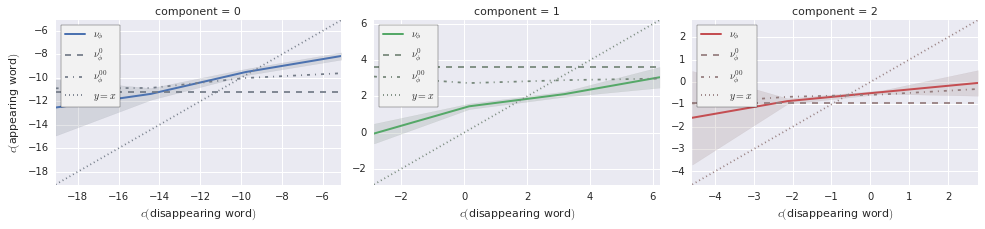

In [33]:
g = sb.FacetGrid(data=component_variations, col='component', col_wrap=3,
                 sharex=False, sharey=False, hue='component',
                 aspect=1.5, size=3)
g.map_dataframe(plot_variation, feature_field='component')
g.set_xlabels(r'$c($disappearing word$)$')
g.set_ylabels(r'$c($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-pca_variations-absolute'),
                  bbox_inches='tight', dpi=300)

### 4.2 On a subset of relevant features

In [34]:
relevant_features = ['frequency', 'aoa', 'letters_count']

Compute the actual PCA

In [35]:
# Compute the PCA.
pcafeatures = tuple(sorted(relevant_features))
pcavariations = variations[variations['feature']
                           .map(lambda f: f in pcafeatures)]\
    .pivot(index='cluster_id', columns='feature', values='variation')
pcavariations = pcavariations.dropna()
pca = PCA(n_components='mle')
pca.fit(pcavariations)

# Show 
print('MLE estimates there are {} components.\n'.format(pca.n_components_))
print('Those explain the following variance:')
print(pca.explained_variance_ratio_)
print()

pd.DataFrame(pca.components_,
             columns=pcafeatures,
             index=['Component-{}'.format(i)
                    for i in range(pca.n_components_)])

MLE estimates there are 2 components.

Those explain the following variance:
[ 0.68846979  0.17808389]



aoa  frequency  letters_count
Component-0 -0.734856   0.388716      -0.555775
Component-1  0.364059  -0.465313      -0.806812

Compute the source and destination component values, along with $\mathcal{H}_0$ and $\mathcal{H}_{00}$, for each component.

In [36]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for component in range(pca.n_components_):
            source, destination = substitution.components(component, pca,
                                                          pcafeatures)
            data.append({
                'cluster_id': substitution.source.cluster.sid,
                'destination_id': substitution.destination.sid,
                'occurrence': substitution.occurrence,
                'position': substitution.position,
                'source_id': substitution.source.sid,
                'component': component,
                'source': source,
                'destination': destination,
                'h0': substitution.component_average(component, pca,
                                                     pcafeatures),
                'h0n': substitution.component_average(component, pca,
                                                      pcafeatures,
                                                      source_synonyms=True)
            })

original_component_variations = pd.DataFrame(data)
del data

  0% (    0 of 87568) |                   | Elapsed Time: 0:00:00 ETA:  --:--:--

  0% (   15 of 87568) |                     | Elapsed Time: 0:00:03 ETA: 5:45:53

  0% (   45 of 87568) |                     | Elapsed Time: 0:00:03 ETA: 2:02:00

  0% (   70 of 87568) |                     | Elapsed Time: 0:00:03 ETA: 1:22:59

  0% (  104 of 87568) |                     | Elapsed Time: 0:00:04 ETA: 0:58:44

  0% (  133 of 87568) |                     | Elapsed Time: 0:00:04 ETA: 0:10:25

  0% (  165 of 87568) |                     | Elapsed Time: 0:00:04 ETA: 0:10:12

  0% (  199 of 87568) |                     | Elapsed Time: 0:00:04 ETA: 0:09:12

  0% (  232 of 87568) |                     | Elapsed Time: 0:00:05 ETA: 0:09:21

  0% (  266 of 87568) |                     | Elapsed Time: 0:00:05 ETA: 0:09:00

  0% (  297 of 87568) |                     | Elapsed Time: 0:00:05 ETA: 0:09:22

  0% (  328 of 87568) |                     | Elapsed Time: 0:00:05 ETA: 0:09:29

  0% (  357 of 87568) |                     | Elapsed Time: 0:00:05 ETA: 0:09:47

  0% (  388 of 87568) |                     | Elapsed Time: 0:00:06 ETA: 0:09:50

  0% (  414 of 87568) |                     | Elapsed Time: 0:00:06 ETA: 0:10:11

  0% (  442 of 87568) |                     | Elapsed Time: 0:00:06 ETA: 0:10:16

  0% (  472 of 87568) |                     | Elapsed Time: 0:00:06 ETA: 0:10:31

  0% (  502 of 87568) |                     | Elapsed Time: 0:00:06 ETA: 0:10:29

  0% (  530 of 87568) |                     | Elapsed Time: 0:00:07 ETA: 0:10:42

  0% (  560 of 87568) |                     | Elapsed Time: 0:00:07 ETA: 0:10:06

  0% (  590 of 87568) |                     | Elapsed Time: 0:00:07 ETA: 0:10:03

  0% (  620 of 87568) |                     | Elapsed Time: 0:00:07 ETA: 0:10:03

  0% (  650 of 87568) |                     | Elapsed Time: 0:00:07 ETA: 0:09:58

  0% (  680 of 87568) |                     | Elapsed Time: 0:00:08 ETA: 0:09:51

  0% (  711 of 87568) |                     | Elapsed Time: 0:00:08 ETA: 0:09:51

  0% (  741 of 87568) |                     | Elapsed Time: 0:00:08 ETA: 0:09:58

  0% (  772 of 87568) |                     | Elapsed Time: 0:00:08 ETA: 0:09:53

  0% (  801 of 87568) |                     | Elapsed Time: 0:00:08 ETA: 0:09:59

  0% (  831 of 87568) |                     | Elapsed Time: 0:00:09 ETA: 0:10:05

  0% (  860 of 87568) |                     | Elapsed Time: 0:00:09 ETA: 0:09:58

  1% (  890 of 87568) |                     | Elapsed Time: 0:00:09 ETA: 0:10:07

  1% (  920 of 87568) |                     | Elapsed Time: 0:00:09 ETA: 0:10:07

  1% (  951 of 87568) |                     | Elapsed Time: 0:00:09 ETA: 0:10:01

  1% (  981 of 87568) |                     | Elapsed Time: 0:00:10 ETA: 0:09:57

  1% ( 1011 of 87568) |                     | Elapsed Time: 0:00:10 ETA: 0:09:54

  1% ( 1040 of 87568) |                     | Elapsed Time: 0:00:10 ETA: 0:09:57

  1% ( 1066 of 87568) |                     | Elapsed Time: 0:00:10 ETA: 0:10:18

  1% ( 1110 of 87568) |                     | Elapsed Time: 0:00:11 ETA: 0:10:20

  1% ( 1141 of 87568) |                     | Elapsed Time: 0:00:11 ETA: 0:10:15

  1% ( 1170 of 87568) |                     | Elapsed Time: 0:00:11 ETA: 0:10:30

  1% ( 1201 of 87568) |                     | Elapsed Time: 0:00:11 ETA: 0:10:08

  1% ( 1233 of 87568) |                     | Elapsed Time: 0:00:11 ETA: 0:09:56

  1% ( 1266 of 87568) |                     | Elapsed Time: 0:00:12 ETA: 0:09:41

  1% ( 1297 of 87568) |                     | Elapsed Time: 0:00:12 ETA: 0:09:38

  1% ( 1330 of 87568) |                     | Elapsed Time: 0:00:12 ETA: 0:09:12

  1% ( 1363 of 87568) |                     | Elapsed Time: 0:00:12 ETA: 0:09:09

  1% ( 1398 of 87568) |                     | Elapsed Time: 0:00:13 ETA: 0:09:02

  1% ( 1427 of 87568) |                     | Elapsed Time: 0:00:13 ETA: 0:09:13

  1% ( 1460 of 87568) |                     | Elapsed Time: 0:00:13 ETA: 0:09:10

  1% ( 1491 of 87568) |                     | Elapsed Time: 0:00:13 ETA: 0:09:16

  1% ( 1524 of 87568) |                     | Elapsed Time: 0:00:13 ETA: 0:09:18

  1% ( 1554 of 87568) |                     | Elapsed Time: 0:00:14 ETA: 0:09:11

  1% ( 1587 of 87568) |                     | Elapsed Time: 0:00:14 ETA: 0:09:17

  1% ( 1620 of 87568) |                     | Elapsed Time: 0:00:14 ETA: 0:09:12

  1% ( 1652 of 87568) |                     | Elapsed Time: 0:00:14 ETA: 0:09:13

  1% ( 1685 of 87568) |                     | Elapsed Time: 0:00:14 ETA: 0:09:07

  1% ( 1716 of 87568) |                     | Elapsed Time: 0:00:15 ETA: 0:09:08

  1% ( 1750 of 87568) |                     | Elapsed Time: 0:00:15 ETA: 0:09:02

  2% ( 1782 of 87568) |                     | Elapsed Time: 0:00:15 ETA: 0:09:05

  2% ( 1816 of 87568) |                     | Elapsed Time: 0:00:15 ETA: 0:08:54

  2% ( 1849 of 87568) |                     | Elapsed Time: 0:00:15 ETA: 0:08:56

  2% ( 1882 of 87568) |                     | Elapsed Time: 0:00:16 ETA: 0:08:56

  2% ( 1914 of 87568) |                     | Elapsed Time: 0:00:16 ETA: 0:08:54

  2% ( 1944 of 87568) |                     | Elapsed Time: 0:00:16 ETA: 0:09:02

  2% ( 1975 of 87568) |                     | Elapsed Time: 0:00:16 ETA: 0:09:16

  2% ( 2004 of 87568) |                     | Elapsed Time: 0:00:16 ETA: 0:09:26

  2% ( 2034 of 87568) |                     | Elapsed Time: 0:00:17 ETA: 0:09:36

  2% ( 2065 of 87568) |                     | Elapsed Time: 0:00:17 ETA: 0:09:32

  2% ( 2094 of 87568) |                     | Elapsed Time: 0:00:17 ETA: 0:09:48

  2% ( 2126 of 87568) |                     | Elapsed Time: 0:00:17 ETA: 0:09:37

  2% ( 2158 of 87568) |                     | Elapsed Time: 0:00:17 ETA: 0:09:29

  2% ( 2190 of 87568) |                     | Elapsed Time: 0:00:18 ETA: 0:09:22

  2% ( 2222 of 87568) |                     | Elapsed Time: 0:00:18 ETA: 0:09:18

  2% ( 2254 of 87568) |                     | Elapsed Time: 0:00:18 ETA: 0:09:13

  2% ( 2288 of 87568) |                     | Elapsed Time: 0:00:18 ETA: 0:09:07

  2% ( 2322 of 87568) |                     | Elapsed Time: 0:00:18 ETA: 0:08:54

  2% ( 2357 of 87568) |                     | Elapsed Time: 0:00:19 ETA: 0:08:46

  2% ( 2392 of 87568) |                     | Elapsed Time: 0:00:19 ETA: 0:08:30

  2% ( 2426 of 87568) |                     | Elapsed Time: 0:00:19 ETA: 0:08:25

  2% ( 2458 of 87568) |                     | Elapsed Time: 0:00:19 ETA: 0:08:32

  2% ( 2491 of 87568) |                     | Elapsed Time: 0:00:20 ETA: 0:08:38

  2% ( 2525 of 87568) |                     | Elapsed Time: 0:00:20 ETA: 0:08:40

  2% ( 2558 of 87568) |                     | Elapsed Time: 0:00:20 ETA: 0:08:43

  2% ( 2594 of 87568) |                     | Elapsed Time: 0:00:20 ETA: 0:08:40

  3% ( 2630 of 87568) |                     | Elapsed Time: 0:00:20 ETA: 0:08:26

  3% ( 2666 of 87568) |                     | Elapsed Time: 0:00:21 ETA: 0:08:19

  3% ( 2701 of 87568) |                     | Elapsed Time: 0:00:21 ETA: 0:08:11

  3% ( 2735 of 87568) |                     | Elapsed Time: 0:00:21 ETA: 0:08:16

  3% ( 2769 of 87568) |                     | Elapsed Time: 0:00:21 ETA: 0:08:21

  3% ( 2804 of 87568) |                     | Elapsed Time: 0:00:21 ETA: 0:08:21

  3% ( 2837 of 87568) |                     | Elapsed Time: 0:00:22 ETA: 0:08:31

  3% ( 2870 of 87568) |                     | Elapsed Time: 0:00:22 ETA: 0:08:38

  3% ( 2903 of 87568) |                     | Elapsed Time: 0:00:22 ETA: 0:08:39

  3% ( 2939 of 87568) |                     | Elapsed Time: 0:00:22 ETA: 0:08:39

  3% ( 2975 of 87568) |                     | Elapsed Time: 0:00:22 ETA: 0:08:36

  3% ( 3010 of 87568) |                     | Elapsed Time: 0:00:23 ETA: 0:08:28

  3% ( 3048 of 87568) |                     | Elapsed Time: 0:00:23 ETA: 0:08:10

  3% ( 3082 of 87568) |                     | Elapsed Time: 0:00:23 ETA: 0:08:13

  3% ( 3117 of 87568) |                     | Elapsed Time: 0:00:23 ETA: 0:08:15

  3% ( 3151 of 87568) |                     | Elapsed Time: 0:00:23 ETA: 0:08:17

  3% ( 3182 of 87568) |                     | Elapsed Time: 0:00:24 ETA: 0:08:38

  3% ( 3213 of 87568) |                     | Elapsed Time: 0:00:24 ETA: 0:08:44

  3% ( 3244 of 87568) |                     | Elapsed Time: 0:00:24 ETA: 0:09:03

  3% ( 3284 of 87568) |                     | Elapsed Time: 0:00:24 ETA: 0:09:03

  3% ( 3318 of 87568) |                     | Elapsed Time: 0:00:25 ETA: 0:08:55

  3% ( 3350 of 87568) |                     | Elapsed Time: 0:00:25 ETA: 0:08:52

  3% ( 3382 of 87568) |                     | Elapsed Time: 0:00:25 ETA: 0:08:47

  3% ( 3417 of 87568) |                     | Elapsed Time: 0:00:25 ETA: 0:08:39

  3% ( 3452 of 87568) |                     | Elapsed Time: 0:00:25 ETA: 0:08:38

  3% ( 3474 of 87568) |                     | Elapsed Time: 0:00:26 ETA: 0:09:17

  4% ( 3510 of 87568) |                     | Elapsed Time: 0:00:26 ETA: 0:09:01

  4% ( 3546 of 87568) |                     | Elapsed Time: 0:00:26 ETA: 0:08:54

  4% ( 3583 of 87568) |                     | Elapsed Time: 0:00:26 ETA: 0:08:44

  4% ( 3621 of 87568) |                     | Elapsed Time: 0:00:26 ETA: 0:07:59

  4% ( 3659 of 87568) |                     | Elapsed Time: 0:00:27 ETA: 0:07:48

  4% ( 3697 of 87568) |                     | Elapsed Time: 0:00:27 ETA: 0:07:46

  4% ( 3734 of 87568) |                     | Elapsed Time: 0:00:27 ETA: 0:07:43

  4% ( 3772 of 87568) |                     | Elapsed Time: 0:00:27 ETA: 0:07:42

  4% ( 3808 of 87568) |                     | Elapsed Time: 0:00:27 ETA: 0:07:45

  4% ( 3835 of 87568) |                     | Elapsed Time: 0:00:28 ETA: 0:08:16

  4% ( 3871 of 87568) |                     | Elapsed Time: 0:00:28 ETA: 0:08:22

  4% ( 3901 of 87568) |                     | Elapsed Time: 0:00:28 ETA: 0:08:46

  4% ( 3930 of 87568) |                     | Elapsed Time: 0:00:28 ETA: 0:09:13

  4% ( 3958 of 87568) |                     | Elapsed Time: 0:00:28 ETA: 0:09:40

  4% ( 3986 of 87568) |                     | Elapsed Time: 0:00:29 ETA: 0:09:40

  4% ( 4016 of 87568) |                     | Elapsed Time: 0:00:29 ETA: 0:09:58

  4% ( 4045 of 87568) |                     | Elapsed Time: 0:00:29 ETA: 0:09:58

  4% ( 4074 of 87568) |                     | Elapsed Time: 0:00:29 ETA: 0:09:58

  4% ( 4104 of 87568) |                     | Elapsed Time: 0:00:30 ETA: 0:09:54

  4% ( 4134 of 87568) |                     | Elapsed Time: 0:00:30 ETA: 0:09:52

  4% ( 4164 of 87568) |                     | Elapsed Time: 0:00:30 ETA: 0:09:50

  4% ( 4193 of 87568) |#                    | Elapsed Time: 0:00:30 ETA: 0:09:49

  4% ( 4223 of 87568) |#                    | Elapsed Time: 0:00:30 ETA: 0:09:43

  4% ( 4253 of 87568) |#                    | Elapsed Time: 0:00:31 ETA: 0:09:36

  4% ( 4283 of 87568) |#                    | Elapsed Time: 0:00:31 ETA: 0:09:29

  4% ( 4313 of 87568) |#                    | Elapsed Time: 0:00:31 ETA: 0:09:26

  4% ( 4343 of 87568) |#                    | Elapsed Time: 0:00:31 ETA: 0:09:27

  5% ( 4379 of 87568) |#                    | Elapsed Time: 0:00:31 ETA: 0:09:33

  5% ( 4409 of 87568) |#                    | Elapsed Time: 0:00:32 ETA: 0:09:37

  5% ( 4439 of 87568) |#                    | Elapsed Time: 0:00:32 ETA: 0:09:34

  5% ( 4469 of 87568) |#                    | Elapsed Time: 0:00:32 ETA: 0:09:33

  5% ( 4499 of 87568) |#                    | Elapsed Time: 0:00:32 ETA: 0:09:28

  5% ( 4529 of 87568) |#                    | Elapsed Time: 0:00:32 ETA: 0:09:22

  5% ( 4560 of 87568) |#                    | Elapsed Time: 0:00:33 ETA: 0:09:20

  5% ( 4590 of 87568) |#                    | Elapsed Time: 0:00:33 ETA: 0:09:19

  5% ( 4620 of 87568) |#                    | Elapsed Time: 0:00:33 ETA: 0:09:20

  5% ( 4650 of 87568) |#                    | Elapsed Time: 0:00:33 ETA: 0:09:21

  5% ( 4680 of 87568) |#                    | Elapsed Time: 0:00:33 ETA: 0:09:22

  5% ( 4704 of 87568) |#                    | Elapsed Time: 0:00:34 ETA: 0:09:51

  5% ( 4724 of 87568) |#                    | Elapsed Time: 0:00:34 ETA: 0:10:47

  5% ( 4743 of 87568) |#                    | Elapsed Time: 0:00:34 ETA: 0:11:54

  5% ( 4762 of 87568) |#                    | Elapsed Time: 0:00:34 ETA: 0:13:16

  5% ( 4782 of 87568) |#                    | Elapsed Time: 0:00:34 ETA: 0:14:37

  5% ( 4801 of 87568) |#                    | Elapsed Time: 0:00:35 ETA: 0:14:51

  5% ( 4821 of 87568) |#                    | Elapsed Time: 0:00:35 ETA: 0:14:41

  5% ( 4851 of 87568) |#                    | Elapsed Time: 0:00:35 ETA: 0:14:21

  5% ( 4871 of 87568) |#                    | Elapsed Time: 0:00:35 ETA: 0:14:12

  5% ( 4891 of 87568) |#                    | Elapsed Time: 0:00:36 ETA: 0:14:02

  5% ( 4912 of 87568) |#                    | Elapsed Time: 0:00:36 ETA: 0:13:59

  5% ( 4932 of 87568) |#                    | Elapsed Time: 0:00:36 ETA: 0:13:58

  5% ( 4952 of 87568) |#                    | Elapsed Time: 0:00:36 ETA: 0:14:04

  5% ( 4973 of 87568) |#                    | Elapsed Time: 0:00:36 ETA: 0:14:00

  5% ( 4993 of 87568) |#                    | Elapsed Time: 0:00:37 ETA: 0:13:58

  5% ( 5013 of 87568) |#                    | Elapsed Time: 0:00:37 ETA: 0:14:03

  5% ( 5033 of 87568) |#                    | Elapsed Time: 0:00:37 ETA: 0:13:56

  5% ( 5053 of 87568) |#                    | Elapsed Time: 0:00:37 ETA: 0:14:02

  5% ( 5073 of 87568) |#                    | Elapsed Time: 0:00:37 ETA: 0:14:13

  5% ( 5093 of 87568) |#                    | Elapsed Time: 0:00:38 ETA: 0:14:23

  5% ( 5113 of 87568) |#                    | Elapsed Time: 0:00:38 ETA: 0:14:27

  5% ( 5133 of 87568) |#                    | Elapsed Time: 0:00:38 ETA: 0:14:28

  5% ( 5152 of 87568) |#                    | Elapsed Time: 0:00:38 ETA: 0:14:35

  5% ( 5172 of 87568) |#                    | Elapsed Time: 0:00:39 ETA: 0:14:25

  5% ( 5192 of 87568) |#                    | Elapsed Time: 0:00:39 ETA: 0:14:16

  5% ( 5213 of 87568) |#                    | Elapsed Time: 0:00:39 ETA: 0:14:19

  5% ( 5234 of 87568) |#                    | Elapsed Time: 0:00:39 ETA: 0:14:07

  5% ( 5254 of 87568) |#                    | Elapsed Time: 0:00:39 ETA: 0:14:10

  6% ( 5274 of 87568) |#                    | Elapsed Time: 0:00:40 ETA: 0:14:11

  6% ( 5295 of 87568) |#                    | Elapsed Time: 0:00:40 ETA: 0:14:04

  6% ( 5316 of 87568) |#                    | Elapsed Time: 0:00:40 ETA: 0:14:04

  6% ( 5337 of 87568) |#                    | Elapsed Time: 0:00:40 ETA: 0:13:48

  6% ( 5362 of 87568) |#                    | Elapsed Time: 0:00:40 ETA: 0:13:08

  6% ( 5382 of 87568) |#                    | Elapsed Time: 0:00:41 ETA: 0:13:11

  6% ( 5402 of 87568) |#                    | Elapsed Time: 0:00:41 ETA: 0:13:18

  6% ( 5428 of 87568) |#                    | Elapsed Time: 0:00:41 ETA: 0:12:45

  6% ( 5473 of 87568) |#                    | Elapsed Time: 0:00:41 ETA: 0:11:48

  6% ( 5507 of 87568) |#                    | Elapsed Time: 0:00:42 ETA: 0:10:13

  6% ( 5542 of 87568) |#                    | Elapsed Time: 0:00:42 ETA: 0:09:06

  6% ( 5576 of 87568) |#                    | Elapsed Time: 0:00:42 ETA: 0:08:09

  6% ( 5607 of 87568) |#                    | Elapsed Time: 0:00:42 ETA: 0:08:21

  6% ( 5639 of 87568) |#                    | Elapsed Time: 0:00:42 ETA: 0:08:28

  6% ( 5672 of 87568) |#                    | Elapsed Time: 0:00:43 ETA: 0:08:35

  6% ( 5704 of 87568) |#                    | Elapsed Time: 0:00:43 ETA: 0:08:46

  6% ( 5736 of 87568) |#                    | Elapsed Time: 0:00:43 ETA: 0:08:57

  6% ( 5768 of 87568) |#                    | Elapsed Time: 0:00:43 ETA: 0:08:44

  6% ( 5799 of 87568) |#                    | Elapsed Time: 0:00:43 ETA: 0:08:51

  6% ( 5831 of 87568) |#                    | Elapsed Time: 0:00:44 ETA: 0:08:51

  6% ( 5863 of 87568) |#                    | Elapsed Time: 0:00:44 ETA: 0:08:51

  6% ( 5896 of 87568) |#                    | Elapsed Time: 0:00:44 ETA: 0:08:49

  6% ( 5928 of 87568) |#                    | Elapsed Time: 0:00:44 ETA: 0:08:45

  6% ( 5961 of 87568) |#                    | Elapsed Time: 0:00:44 ETA: 0:08:41

  6% ( 5995 of 87568) |#                    | Elapsed Time: 0:00:45 ETA: 0:08:30

  6% ( 6031 of 87568) |#                    | Elapsed Time: 0:00:45 ETA: 0:08:15

  6% ( 6068 of 87568) |#                    | Elapsed Time: 0:00:45 ETA: 0:08:00

  6% ( 6100 of 87568) |#                    | Elapsed Time: 0:00:45 ETA: 0:07:59

  7% ( 6135 of 87568) |#                    | Elapsed Time: 0:00:45 ETA: 0:07:52

  7% ( 6170 of 87568) |#                    | Elapsed Time: 0:00:46 ETA: 0:07:56

  7% ( 6205 of 87568) |#                    | Elapsed Time: 0:00:46 ETA: 0:08:02

  7% ( 6240 of 87568) |#                    | Elapsed Time: 0:00:46 ETA: 0:07:56

  7% ( 6275 of 87568) |#                    | Elapsed Time: 0:00:46 ETA: 0:07:58

  7% ( 6311 of 87568) |#                    | Elapsed Time: 0:00:46 ETA: 0:07:53

  7% ( 6364 of 87568) |#                    | Elapsed Time: 0:00:47 ETA: 0:07:48

  7% ( 6401 of 87568) |#                    | Elapsed Time: 0:00:47 ETA: 0:07:43

  7% ( 6435 of 87568) |#                    | Elapsed Time: 0:00:47 ETA: 0:07:45

  7% ( 6471 of 87568) |#                    | Elapsed Time: 0:00:47 ETA: 0:07:47

  7% ( 6506 of 87568) |#                    | Elapsed Time: 0:00:48 ETA: 0:07:47

  7% ( 6542 of 87568) |#                    | Elapsed Time: 0:00:48 ETA: 0:07:48

  7% ( 6585 of 87568) |#                    | Elapsed Time: 0:00:48 ETA: 0:07:49

  7% ( 6619 of 87568) |#                    | Elapsed Time: 0:00:48 ETA: 0:07:50

  7% ( 6653 of 87568) |#                    | Elapsed Time: 0:00:48 ETA: 0:07:56

  7% ( 6687 of 87568) |#                    | Elapsed Time: 0:00:49 ETA: 0:07:57

  7% ( 6721 of 87568) |#                    | Elapsed Time: 0:00:49 ETA: 0:08:04

  7% ( 6758 of 87568) |#                    | Elapsed Time: 0:00:49 ETA: 0:07:59

  7% ( 6793 of 87568) |#                    | Elapsed Time: 0:00:49 ETA: 0:07:56

  7% ( 6828 of 87568) |#                    | Elapsed Time: 0:00:49 ETA: 0:07:53

  7% ( 6862 of 87568) |#                    | Elapsed Time: 0:00:50 ETA: 0:07:54

  7% ( 6896 of 87568) |#                    | Elapsed Time: 0:00:50 ETA: 0:07:54

  7% ( 6930 of 87568) |#                    | Elapsed Time: 0:00:50 ETA: 0:08:00

  7% ( 6967 of 87568) |#                    | Elapsed Time: 0:00:50 ETA: 0:07:56

  7% ( 6991 of 87568) |#                    | Elapsed Time: 0:00:51 ETA: 0:08:31

  8% ( 7023 of 87568) |#                    | Elapsed Time: 0:00:51 ETA: 0:08:42

  8% ( 7053 of 87568) |#                    | Elapsed Time: 0:00:51 ETA: 0:08:59

  8% ( 7079 of 87568) |#                    | Elapsed Time: 0:00:51 ETA: 0:09:42

  8% ( 7114 of 87568) |#                    | Elapsed Time: 0:00:51 ETA: 0:09:36

  8% ( 7151 of 87568) |#                    | Elapsed Time: 0:00:52 ETA: 0:08:45

  8% ( 7187 of 87568) |#                    | Elapsed Time: 0:00:52 ETA: 0:08:25

  8% ( 7223 of 87568) |#                    | Elapsed Time: 0:00:52 ETA: 0:08:01

  8% ( 7256 of 87568) |#                    | Elapsed Time: 0:00:52 ETA: 0:07:43

  8% ( 7292 of 87568) |#                    | Elapsed Time: 0:00:52 ETA: 0:07:47

  8% ( 7328 of 87568) |#                    | Elapsed Time: 0:00:53 ETA: 0:07:47

  8% ( 7363 of 87568) |#                    | Elapsed Time: 0:00:53 ETA: 0:07:49

  8% ( 7398 of 87568) |#                    | Elapsed Time: 0:00:53 ETA: 0:07:58

  8% ( 7433 of 87568) |#                    | Elapsed Time: 0:00:53 ETA: 0:07:46

  8% ( 7467 of 87568) |#                    | Elapsed Time: 0:00:53 ETA: 0:07:50

  8% ( 7503 of 87568) |#                    | Elapsed Time: 0:00:54 ETA: 0:07:49

  8% ( 7537 of 87568) |#                    | Elapsed Time: 0:00:54 ETA: 0:07:51

  8% ( 7571 of 87568) |#                    | Elapsed Time: 0:00:54 ETA: 0:07:56

  8% ( 7603 of 87568) |#                    | Elapsed Time: 0:00:54 ETA: 0:08:03

  8% ( 7628 of 87568) |#                    | Elapsed Time: 0:00:54 ETA: 0:08:41

  8% ( 7648 of 87568) |#                    | Elapsed Time: 0:00:55 ETA: 0:09:40

  8% ( 7673 of 87568) |#                    | Elapsed Time: 0:00:55 ETA: 0:11:05

  8% ( 7693 of 87568) |#                    | Elapsed Time: 0:00:55 ETA: 0:12:23

  8% ( 7722 of 87568) |#                    | Elapsed Time: 0:00:55 ETA: 0:11:57

  8% ( 7759 of 87568) |#                    | Elapsed Time: 0:00:56 ETA: 0:10:42

  8% ( 7798 of 87568) |#                    | Elapsed Time: 0:00:56 ETA: 0:09:16

  8% ( 7838 of 87568) |#                    | Elapsed Time: 0:00:56 ETA: 0:07:54

  8% ( 7874 of 87568) |#                    | Elapsed Time: 0:00:56 ETA: 0:07:26

  9% ( 7901 of 87568) |#                    | Elapsed Time: 0:00:56 ETA: 0:07:42

  9% ( 7933 of 87568) |#                    | Elapsed Time: 0:00:57 ETA: 0:08:03

  9% ( 7962 of 87568) |#                    | Elapsed Time: 0:00:57 ETA: 0:08:35

  9% ( 7990 of 87568) |#                    | Elapsed Time: 0:00:57 ETA: 0:09:16

  9% ( 8024 of 87568) |#                    | Elapsed Time: 0:00:57 ETA: 0:08:57

  9% ( 8058 of 87568) |#                    | Elapsed Time: 0:00:57 ETA: 0:08:41

  9% ( 8092 of 87568) |#                    | Elapsed Time: 0:00:58 ETA: 0:08:29

  9% ( 8126 of 87568) |#                    | Elapsed Time: 0:00:58 ETA: 0:07:58

  9% ( 8161 of 87568) |#                    | Elapsed Time: 0:00:58 ETA: 0:07:55

  9% ( 8194 of 87568) |#                    | Elapsed Time: 0:00:58 ETA: 0:07:57

  9% ( 8227 of 87568) |#                    | Elapsed Time: 0:00:58 ETA: 0:08:03

  9% ( 8259 of 87568) |#                    | Elapsed Time: 0:00:59 ETA: 0:08:10

  9% ( 8290 of 87568) |#                    | Elapsed Time: 0:00:59 ETA: 0:08:24

  9% ( 8317 of 87568) |#                    | Elapsed Time: 0:00:59 ETA: 0:08:49

  9% ( 8341 of 87568) |##                   | Elapsed Time: 0:00:59 ETA: 0:09:23

  9% ( 8365 of 87568) |##                   | Elapsed Time: 0:00:59 ETA: 0:10:02

  9% ( 8389 of 87568) |##                   | Elapsed Time: 0:01:00 ETA: 0:10:38

  9% ( 8425 of 87568) |##                   | Elapsed Time: 0:01:00 ETA: 0:11:14

  9% ( 8451 of 87568) |##                   | Elapsed Time: 0:01:00 ETA: 0:11:05

  9% ( 8473 of 87568) |##                   | Elapsed Time: 0:01:00 ETA: 0:11:17

  9% ( 8497 of 87568) |##                   | Elapsed Time: 0:01:01 ETA: 0:11:15

  9% ( 8521 of 87568) |##                   | Elapsed Time: 0:01:01 ETA: 0:11:16

  9% ( 8546 of 87568) |##                   | Elapsed Time: 0:01:01 ETA: 0:11:18

  9% ( 8572 of 87568) |##                   | Elapsed Time: 0:01:01 ETA: 0:10:54

  9% ( 8598 of 87568) |##                   | Elapsed Time: 0:01:01 ETA: 0:10:46

  9% ( 8625 of 87568) |##                   | Elapsed Time: 0:01:02 ETA: 0:10:33

  9% ( 8651 of 87568) |##                   | Elapsed Time: 0:01:02 ETA: 0:10:30

  9% ( 8677 of 87568) |##                   | Elapsed Time: 0:01:02 ETA: 0:10:32

  9% ( 8701 of 87568) |##                   | Elapsed Time: 0:01:02 ETA: 0:10:40

  9% ( 8727 of 87568) |##                   | Elapsed Time: 0:01:02 ETA: 0:10:39

 10% ( 8757 of 87568) |##                   | Elapsed Time: 0:01:03 ETA: 0:10:23

 10% ( 8789 of 87568) |##                   | Elapsed Time: 0:01:03 ETA: 0:09:47

 10% ( 8828 of 87568) |##                   | Elapsed Time: 0:01:03 ETA: 0:08:49

 10% ( 8867 of 87568) |##                   | Elapsed Time: 0:01:03 ETA: 0:08:02

 10% ( 8908 of 87568) |##                   | Elapsed Time: 0:01:03 ETA: 0:07:20

 10% ( 8938 of 87568) |##                   | Elapsed Time: 0:01:04 ETA: 0:07:29

 10% ( 8970 of 87568) |##                   | Elapsed Time: 0:01:04 ETA: 0:07:34

 10% ( 9004 of 87568) |##                   | Elapsed Time: 0:01:04 ETA: 0:07:49

 10% ( 9040 of 87568) |##                   | Elapsed Time: 0:01:04 ETA: 0:07:57

 10% ( 9075 of 87568) |##                   | Elapsed Time: 0:01:05 ETA: 0:07:58

 10% ( 9109 of 87568) |##                   | Elapsed Time: 0:01:05 ETA: 0:07:51

 10% ( 9140 of 87568) |##                   | Elapsed Time: 0:01:05 ETA: 0:07:56

 10% ( 9170 of 87568) |##                   | Elapsed Time: 0:01:05 ETA: 0:08:14

 10% ( 9201 of 87568) |##                   | Elapsed Time: 0:01:05 ETA: 0:08:30

 10% ( 9232 of 87568) |##                   | Elapsed Time: 0:01:06 ETA: 0:08:46

 10% ( 9265 of 87568) |##                   | Elapsed Time: 0:01:06 ETA: 0:08:45

 10% ( 9296 of 87568) |##                   | Elapsed Time: 0:01:06 ETA: 0:08:40

 10% ( 9325 of 87568) |##                   | Elapsed Time: 0:01:06 ETA: 0:08:45

 10% ( 9354 of 87568) |##                   | Elapsed Time: 0:01:06 ETA: 0:08:47

 10% ( 9384 of 87568) |##                   | Elapsed Time: 0:01:07 ETA: 0:08:52

 10% ( 9414 of 87568) |##                   | Elapsed Time: 0:01:07 ETA: 0:09:05

 10% ( 9444 of 87568) |##                   | Elapsed Time: 0:01:07 ETA: 0:09:08

 10% ( 9474 of 87568) |##                   | Elapsed Time: 0:01:07 ETA: 0:09:05

 10% ( 9504 of 87568) |##                   | Elapsed Time: 0:01:07 ETA: 0:09:04

 10% ( 9534 of 87568) |##                   | Elapsed Time: 0:01:08 ETA: 0:09:04

 10% ( 9564 of 87568) |##                   | Elapsed Time: 0:01:08 ETA: 0:09:04

 10% ( 9595 of 87568) |##                   | Elapsed Time: 0:01:08 ETA: 0:08:58

 10% ( 9625 of 87568) |##                   | Elapsed Time: 0:01:08 ETA: 0:09:00

 11% ( 9653 of 87568) |##                   | Elapsed Time: 0:01:08 ETA: 0:09:07

 11% ( 9681 of 87568) |##                   | Elapsed Time: 0:01:09 ETA: 0:09:11

 11% ( 9710 of 87568) |##                   | Elapsed Time: 0:01:09 ETA: 0:09:14

 11% ( 9738 of 87568) |##                   | Elapsed Time: 0:01:09 ETA: 0:09:22

 11% ( 9767 of 87568) |##                   | Elapsed Time: 0:01:09 ETA: 0:09:23

 11% ( 9797 of 87568) |##                   | Elapsed Time: 0:01:10 ETA: 0:09:17

 11% ( 9827 of 87568) |##                   | Elapsed Time: 0:01:10 ETA: 0:09:12

 11% ( 9867 of 87568) |##                   | Elapsed Time: 0:01:10 ETA: 0:09:05

 11% ( 9897 of 87568) |##                   | Elapsed Time: 0:01:10 ETA: 0:09:00

 11% ( 9928 of 87568) |##                   | Elapsed Time: 0:01:10 ETA: 0:08:55

 11% ( 9958 of 87568) |##                   | Elapsed Time: 0:01:11 ETA: 0:08:54

 11% ( 9988 of 87568) |##                   | Elapsed Time: 0:01:11 ETA: 0:08:52

 11% (10019 of 87568) |##                   | Elapsed Time: 0:01:11 ETA: 0:08:50

 11% (10048 of 87568) |##                   | Elapsed Time: 0:01:11 ETA: 0:08:52

 11% (10078 of 87568) |##                   | Elapsed Time: 0:01:11 ETA: 0:08:53

 11% (10110 of 87568) |##                   | Elapsed Time: 0:01:12 ETA: 0:08:42

 11% (10139 of 87568) |##                   | Elapsed Time: 0:01:12 ETA: 0:08:47

 11% (10169 of 87568) |##                   | Elapsed Time: 0:01:12 ETA: 0:08:46

 11% (10200 of 87568) |##                   | Elapsed Time: 0:01:12 ETA: 0:08:42

 11% (10230 of 87568) |##                   | Elapsed Time: 0:01:12 ETA: 0:08:49

 11% (10260 of 87568) |##                   | Elapsed Time: 0:01:13 ETA: 0:08:55

 11% (10291 of 87568) |##                   | Elapsed Time: 0:01:13 ETA: 0:08:44

 11% (10321 of 87568) |##                   | Elapsed Time: 0:01:13 ETA: 0:08:49

 11% (10351 of 87568) |##                   | Elapsed Time: 0:01:13 ETA: 0:08:53

 11% (10381 of 87568) |##                   | Elapsed Time: 0:01:14 ETA: 0:08:52

 11% (10411 of 87568) |##                   | Elapsed Time: 0:01:14 ETA: 0:08:52

 11% (10440 of 87568) |##                   | Elapsed Time: 0:01:14 ETA: 0:08:55

 11% (10470 of 87568) |##                   | Elapsed Time: 0:01:14 ETA: 0:08:55

 11% (10500 of 87568) |##                   | Elapsed Time: 0:01:14 ETA: 0:08:56

 12% (10530 of 87568) |##                   | Elapsed Time: 0:01:15 ETA: 0:08:58

 12% (10560 of 87568) |##                   | Elapsed Time: 0:01:15 ETA: 0:08:54

 12% (10590 of 87568) |##                   | Elapsed Time: 0:01:15 ETA: 0:08:53

 12% (10620 of 87568) |##                   | Elapsed Time: 0:01:15 ETA: 0:08:50

 12% (10650 of 87568) |##                   | Elapsed Time: 0:01:15 ETA: 0:08:51

 12% (10680 of 87568) |##                   | Elapsed Time: 0:01:16 ETA: 0:08:52

 12% (10710 of 87568) |##                   | Elapsed Time: 0:01:16 ETA: 0:08:52

 12% (10742 of 87568) |##                   | Elapsed Time: 0:01:16 ETA: 0:08:50

 12% (10770 of 87568) |##                   | Elapsed Time: 0:01:16 ETA: 0:08:52

 12% (10798 of 87568) |##                   | Elapsed Time: 0:01:16 ETA: 0:08:58

 12% (10828 of 87568) |##                   | Elapsed Time: 0:01:17 ETA: 0:08:57

 12% (10856 of 87568) |##                   | Elapsed Time: 0:01:17 ETA: 0:09:14

 12% (10885 of 87568) |##                   | Elapsed Time: 0:01:17 ETA: 0:09:14

 12% (10913 of 87568) |##                   | Elapsed Time: 0:01:17 ETA: 0:09:14

 12% (10946 of 87568) |##                   | Elapsed Time: 0:01:18 ETA: 0:09:17

 12% (10974 of 87568) |##                   | Elapsed Time: 0:01:18 ETA: 0:09:24

 12% (11002 of 87568) |##                   | Elapsed Time: 0:01:18 ETA: 0:09:21

 12% (11030 of 87568) |##                   | Elapsed Time: 0:01:18 ETA: 0:09:29

 12% (11058 of 87568) |##                   | Elapsed Time: 0:01:18 ETA: 0:09:26

 12% (11086 of 87568) |##                   | Elapsed Time: 0:01:19 ETA: 0:09:23

 12% (11114 of 87568) |##                   | Elapsed Time: 0:01:19 ETA: 0:09:23

 12% (11142 of 87568) |##                   | Elapsed Time: 0:01:19 ETA: 0:09:23

 12% (11170 of 87568) |##                   | Elapsed Time: 0:01:19 ETA: 0:09:18

 12% (11198 of 87568) |##                   | Elapsed Time: 0:01:19 ETA: 0:09:19

 12% (11226 of 87568) |##                   | Elapsed Time: 0:01:20 ETA: 0:09:18

 12% (11254 of 87568) |##                   | Elapsed Time: 0:01:20 ETA: 0:09:16

 12% (11283 of 87568) |##                   | Elapsed Time: 0:01:20 ETA: 0:09:13

 12% (11312 of 87568) |##                   | Elapsed Time: 0:01:20 ETA: 0:09:08

 12% (11342 of 87568) |##                   | Elapsed Time: 0:01:20 ETA: 0:09:03

 12% (11372 of 87568) |##                   | Elapsed Time: 0:01:21 ETA: 0:08:59

 13% (11402 of 87568) |##                   | Elapsed Time: 0:01:21 ETA: 0:08:56

 13% (11434 of 87568) |##                   | Elapsed Time: 0:01:21 ETA: 0:08:44

 13% (11464 of 87568) |##                   | Elapsed Time: 0:01:21 ETA: 0:08:42

 13% (11493 of 87568) |##                   | Elapsed Time: 0:01:21 ETA: 0:08:43

 13% (11523 of 87568) |##                   | Elapsed Time: 0:01:22 ETA: 0:08:44

 13% (11554 of 87568) |##                   | Elapsed Time: 0:01:22 ETA: 0:08:43

 13% (11583 of 87568) |##                   | Elapsed Time: 0:01:22 ETA: 0:08:50

 13% (11613 of 87568) |##                   | Elapsed Time: 0:01:22 ETA: 0:08:48

 13% (11642 of 87568) |##                   | Elapsed Time: 0:01:22 ETA: 0:08:50

 13% (11672 of 87568) |##                   | Elapsed Time: 0:01:23 ETA: 0:08:56

 13% (11701 of 87568) |##                   | Elapsed Time: 0:01:23 ETA: 0:08:54

 13% (11731 of 87568) |##                   | Elapsed Time: 0:01:23 ETA: 0:08:53

 13% (11764 of 87568) |##                   | Elapsed Time: 0:01:23 ETA: 0:08:38

 13% (11798 of 87568) |##                   | Elapsed Time: 0:01:24 ETA: 0:08:22

 13% (11815 of 87568) |##                   | Elapsed Time: 0:01:24 ETA: 0:08:13

 13% (11830 of 87568) |#            | Elapsed Time: 0:05:08 ETA: 1 day, 17:34:49

 13% (11848 of 87568) |#            | Elapsed Time: 0:05:09 ETA: 1 day, 22:55:27

 13% (11865 of 87568) |#            | Elapsed Time: 0:05:09 ETA: 2 days, 7:44:48

 13% (11884 of 87568) |#           | Elapsed Time: 0:05:09 ETA: 2 days, 20:39:31

 13% (11906 of 87568) |##                   | Elapsed Time: 0:05:09 ETA: 0:14:45

 13% (11925 of 87568) |##                   | Elapsed Time: 0:05:09 ETA: 0:13:52

 13% (11945 of 87568) |##                   | Elapsed Time: 0:05:10 ETA: 0:13:38

 13% (11965 of 87568) |##                   | Elapsed Time: 0:05:10 ETA: 0:13:00

 13% (11974 of 87568) |##                   | Elapsed Time: 0:05:10 ETA: 0:15:21

 13% (12004 of 87568) |##                   | Elapsed Time: 0:05:10 ETA: 0:14:58

 13% (12021 of 87568) |##                   | Elapsed Time: 0:05:11 ETA: 0:15:37

 13% (12051 of 87568) |##                   | Elapsed Time: 0:05:11 ETA: 0:14:57

 13% (12075 of 87568) |##                   | Elapsed Time: 0:05:11 ETA: 0:12:46

 13% (12098 of 87568) |##                   | Elapsed Time: 0:05:11 ETA: 0:12:32

 13% (12133 of 87568) |##                   | Elapsed Time: 0:05:12 ETA: 0:11:24

 13% (12157 of 87568) |##                   | Elapsed Time: 0:05:12 ETA: 0:11:09

 13% (12181 of 87568) |##                   | Elapsed Time: 0:05:12 ETA: 0:11:13

 13% (12208 of 87568) |##                   | Elapsed Time: 0:05:12 ETA: 0:10:45

 13% (12231 of 87568) |##                   | Elapsed Time: 0:05:12 ETA: 0:10:25

 13% (12256 of 87568) |##                   | Elapsed Time: 0:05:13 ETA: 0:10:43

 14% (12285 of 87568) |##                   | Elapsed Time: 0:05:13 ETA: 0:10:03

 14% (12313 of 87568) |##                   | Elapsed Time: 0:05:13 ETA: 0:09:46

 14% (12340 of 87568) |##                   | Elapsed Time: 0:05:13 ETA: 0:09:37

 14% (12365 of 87568) |##                   | Elapsed Time: 0:05:13 ETA: 0:09:38

 14% (12388 of 87568) |##                   | Elapsed Time: 0:05:14 ETA: 0:10:02

 14% (12414 of 87568) |##                   | Elapsed Time: 0:05:14 ETA: 0:10:05

 14% (12439 of 87568) |##                   | Elapsed Time: 0:05:14 ETA: 0:10:30

 14% (12463 of 87568) |##                   | Elapsed Time: 0:05:14 ETA: 0:10:49

 14% (12491 of 87568) |##                   | Elapsed Time: 0:05:14 ETA: 0:10:06

 14% (12517 of 87568) |###                  | Elapsed Time: 0:05:15 ETA: 0:10:20

 14% (12541 of 87568) |###                  | Elapsed Time: 0:05:15 ETA: 0:10:26

 14% (12566 of 87568) |###                  | Elapsed Time: 0:05:15 ETA: 0:10:37

 14% (12592 of 87568) |###                  | Elapsed Time: 0:05:15 ETA: 0:10:27

 14% (12614 of 87568) |###                  | Elapsed Time: 0:05:16 ETA: 0:11:04

 14% (12636 of 87568) |###                  | Elapsed Time: 0:05:16 ETA: 0:11:20

 14% (12656 of 87568) |###                  | Elapsed Time: 0:05:16 ETA: 0:11:41

 14% (12672 of 87568) |###                  | Elapsed Time: 0:05:16 ETA: 0:12:47

 14% (12693 of 87568) |###                  | Elapsed Time: 0:05:16 ETA: 0:13:25

 14% (12712 of 87568) |###                  | Elapsed Time: 0:05:17 ETA: 0:14:01

 14% (12740 of 87568) |###                  | Elapsed Time: 0:05:17 ETA: 0:13:19

 14% (12762 of 87568) |###                  | Elapsed Time: 0:05:17 ETA: 0:12:10

 14% (12789 of 87568) |###                  | Elapsed Time: 0:05:17 ETA: 0:11:02

 14% (12809 of 87568) |###                  | Elapsed Time: 0:05:17 ETA: 0:10:57

 14% (12833 of 87568) |###                  | Elapsed Time: 0:05:18 ETA: 0:10:59

 14% (12853 of 87568) |###                  | Elapsed Time: 0:05:18 ETA: 0:11:30

 14% (12874 of 87568) |###                  | Elapsed Time: 0:05:18 ETA: 0:12:03

 14% (12898 of 87568) |###                  | Elapsed Time: 0:05:18 ETA: 0:11:42

 14% (12921 of 87568) |###                  | Elapsed Time: 0:05:19 ETA: 0:11:28

 14% (12948 of 87568) |###                  | Elapsed Time: 0:05:19 ETA: 0:11:23

 14% (12972 of 87568) |###                  | Elapsed Time: 0:05:19 ETA: 0:10:59

 14% (12995 of 87568) |###                  | Elapsed Time: 0:05:19 ETA: 0:11:01

 14% (13014 of 87568) |###                  | Elapsed Time: 0:05:19 ETA: 0:11:28

 14% (13032 of 87568) |###                  | Elapsed Time: 0:05:20 ETA: 0:12:38

 14% (13053 of 87568) |###                  | Elapsed Time: 0:05:20 ETA: 0:13:20

 14% (13076 of 87568) |###                  | Elapsed Time: 0:05:20 ETA: 0:13:24

 14% (13099 of 87568) |###                  | Elapsed Time: 0:05:20 ETA: 0:12:52

 14% (13124 of 87568) |###                  | Elapsed Time: 0:05:20 ETA: 0:11:43

 15% (13148 of 87568) |###                  | Elapsed Time: 0:05:21 ETA: 0:11:22

 15% (13170 of 87568) |###                  | Elapsed Time: 0:05:21 ETA: 0:11:14

 15% (13191 of 87568) |###                  | Elapsed Time: 0:05:21 ETA: 0:11:38

 15% (13214 of 87568) |###                  | Elapsed Time: 0:05:21 ETA: 0:11:34

 15% (13238 of 87568) |###                  | Elapsed Time: 0:05:22 ETA: 0:11:38

 15% (13261 of 87568) |###                  | Elapsed Time: 0:05:22 ETA: 0:11:40

 15% (13285 of 87568) |###                  | Elapsed Time: 0:05:22 ETA: 0:11:12

 15% (13307 of 87568) |###                  | Elapsed Time: 0:05:22 ETA: 0:11:02

 15% (13327 of 87568) |###                  | Elapsed Time: 0:05:22 ETA: 0:11:14

 15% (13349 of 87568) |###                  | Elapsed Time: 0:05:23 ETA: 0:11:54

 15% (13370 of 87568) |###                  | Elapsed Time: 0:05:23 ETA: 0:12:02

 15% (13389 of 87568) |###                  | Elapsed Time: 0:05:23 ETA: 0:12:37

 15% (13408 of 87568) |###                  | Elapsed Time: 0:05:23 ETA: 0:13:17

 15% (13426 of 87568) |###                  | Elapsed Time: 0:05:23 ETA: 0:13:29

 15% (13449 of 87568) |###                  | Elapsed Time: 0:05:24 ETA: 0:13:26

 15% (13471 of 87568) |###                  | Elapsed Time: 0:05:24 ETA: 0:13:03

 15% (13491 of 87568) |###                  | Elapsed Time: 0:05:24 ETA: 0:13:05

 15% (13512 of 87568) |###                  | Elapsed Time: 0:05:24 ETA: 0:12:24

 15% (13537 of 87568) |###                  | Elapsed Time: 0:05:25 ETA: 0:12:08

 15% (13558 of 87568) |###                  | Elapsed Time: 0:05:25 ETA: 0:12:21

 15% (13567 of 87568) |###                  | Elapsed Time: 0:05:25 ETA: 0:16:45

 15% (13587 of 87568) |###                  | Elapsed Time: 0:05:25 ETA: 0:16:20

 15% (13609 of 87568) |###                  | Elapsed Time: 0:05:26 ETA: 0:16:23

 15% (13631 of 87568) |###                  | Elapsed Time: 0:05:26 ETA: 0:16:04

 15% (13651 of 87568) |###                  | Elapsed Time: 0:05:26 ETA: 0:14:03

 15% (13678 of 87568) |###                  | Elapsed Time: 0:05:26 ETA: 0:11:21

 15% (13696 of 87568) |###                  | Elapsed Time: 0:05:26 ETA: 0:12:05

 15% (13716 of 87568) |###                  | Elapsed Time: 0:05:27 ETA: 0:12:32

 15% (13736 of 87568) |###                  | Elapsed Time: 0:05:27 ETA: 0:12:41

 15% (13757 of 87568) |###                  | Elapsed Time: 0:05:27 ETA: 0:12:51

 15% (13780 of 87568) |###                  | Elapsed Time: 0:05:27 ETA: 0:13:30

 15% (13801 of 87568) |###                  | Elapsed Time: 0:05:28 ETA: 0:12:32

 15% (13829 of 87568) |###                  | Elapsed Time: 0:05:28 ETA: 0:11:21

 15% (13854 of 87568) |###                  | Elapsed Time: 0:05:28 ETA: 0:10:45

 15% (13878 of 87568) |###                  | Elapsed Time: 0:05:28 ETA: 0:10:41

 15% (13903 of 87568) |###                  | Elapsed Time: 0:05:28 ETA: 0:10:24

 15% (13927 of 87568) |###                  | Elapsed Time: 0:05:29 ETA: 0:10:19

 15% (13956 of 87568) |###                  | Elapsed Time: 0:05:29 ETA: 0:10:01

 15% (13980 of 87568) |###                  | Elapsed Time: 0:05:29 ETA: 0:10:14

 15% (14007 of 87568) |###                  | Elapsed Time: 0:05:29 ETA: 0:09:40

 16% (14028 of 87568) |###                  | Elapsed Time: 0:05:29 ETA: 0:09:57

 16% (14053 of 87568) |###                  | Elapsed Time: 0:05:30 ETA: 0:10:24

 16% (14076 of 87568) |###                  | Elapsed Time: 0:05:30 ETA: 0:10:26

 16% (14099 of 87568) |###                  | Elapsed Time: 0:05:30 ETA: 0:11:09

 16% (14121 of 87568) |###                  | Elapsed Time: 0:05:30 ETA: 0:11:18

 16% (14144 of 87568) |###                  | Elapsed Time: 0:05:30 ETA: 0:11:22

 16% (14184 of 87568) |###                  | Elapsed Time: 0:05:31 ETA: 0:10:48

 16% (14212 of 87568) |###                  | Elapsed Time: 0:05:31 ETA: 0:10:04

 16% (14245 of 87568) |###                  | Elapsed Time: 0:05:31 ETA: 0:09:19

 16% (14274 of 87568) |###                  | Elapsed Time: 0:05:31 ETA: 0:08:49

 16% (14303 of 87568) |###                  | Elapsed Time: 0:05:32 ETA: 0:08:40

 16% (14332 of 87568) |###                  | Elapsed Time: 0:05:32 ETA: 0:08:30

 16% (14363 of 87568) |###                  | Elapsed Time: 0:05:32 ETA: 0:08:28

 16% (14395 of 87568) |###                  | Elapsed Time: 0:05:32 ETA: 0:08:16

 16% (14425 of 87568) |###                  | Elapsed Time: 0:05:32 ETA: 0:08:10

 16% (14453 of 87568) |###                  | Elapsed Time: 0:05:33 ETA: 0:08:21

 16% (14482 of 87568) |###                  | Elapsed Time: 0:05:33 ETA: 0:08:23

 16% (14513 of 87568) |###                  | Elapsed Time: 0:05:33 ETA: 0:08:30

 16% (14545 of 87568) |###                  | Elapsed Time: 0:05:33 ETA: 0:08:25

 16% (14577 of 87568) |###                  | Elapsed Time: 0:05:33 ETA: 0:08:11

 16% (14609 of 87568) |###                  | Elapsed Time: 0:05:34 ETA: 0:08:01

 16% (14638 of 87568) |###                  | Elapsed Time: 0:05:34 ETA: 0:08:04

 16% (14668 of 87568) |###                  | Elapsed Time: 0:05:34 ETA: 0:08:08

 16% (14698 of 87568) |###                  | Elapsed Time: 0:05:34 ETA: 0:08:17

 16% (14726 of 87568) |###                  | Elapsed Time: 0:05:34 ETA: 0:08:31

 16% (14757 of 87568) |###                  | Elapsed Time: 0:05:35 ETA: 0:08:25

 16% (14787 of 87568) |###                  | Elapsed Time: 0:05:35 ETA: 0:08:24

 16% (14814 of 87568) |###                  | Elapsed Time: 0:05:35 ETA: 0:08:43

 16% (14840 of 87568) |###                  | Elapsed Time: 0:05:35 ETA: 0:08:59

 16% (14867 of 87568) |###                  | Elapsed Time: 0:05:36 ETA: 0:09:09

 17% (14896 of 87568) |###                  | Elapsed Time: 0:05:36 ETA: 0:09:05

 17% (14925 of 87568) |###                  | Elapsed Time: 0:05:36 ETA: 0:09:02

 17% (14953 of 87568) |###                  | Elapsed Time: 0:05:36 ETA: 0:09:02

 17% (14983 of 87568) |###                  | Elapsed Time: 0:05:36 ETA: 0:08:37

 17% (15010 of 87568) |###                  | Elapsed Time: 0:05:37 ETA: 0:08:44

 17% (15033 of 87568) |###                  | Elapsed Time: 0:05:37 ETA: 0:09:10

 17% (15065 of 87568) |###                  | Elapsed Time: 0:05:37 ETA: 0:08:54

 17% (15092 of 87568) |###                  | Elapsed Time: 0:05:37 ETA: 0:09:06

 17% (15123 of 87568) |###                  | Elapsed Time: 0:05:37 ETA: 0:08:59

 17% (15153 of 87568) |###                  | Elapsed Time: 0:05:38 ETA: 0:08:37

 17% (15183 of 87568) |###                  | Elapsed Time: 0:05:38 ETA: 0:08:26

 17% (15214 of 87568) |###                  | Elapsed Time: 0:05:38 ETA: 0:08:19

 17% (15242 of 87568) |###                  | Elapsed Time: 0:05:38 ETA: 0:08:20

 17% (15270 of 87568) |###                  | Elapsed Time: 0:05:38 ETA: 0:08:31

 17% (15298 of 87568) |###                  | Elapsed Time: 0:05:39 ETA: 0:08:33

 17% (15339 of 87568) |###                  | Elapsed Time: 0:05:39 ETA: 0:08:43

 17% (15366 of 87568) |###                  | Elapsed Time: 0:05:39 ETA: 0:08:49

 17% (15394 of 87568) |###                  | Elapsed Time: 0:05:39 ETA: 0:08:46

 17% (15424 of 87568) |###                  | Elapsed Time: 0:05:40 ETA: 0:08:38

 17% (15450 of 87568) |###                  | Elapsed Time: 0:05:40 ETA: 0:08:54

 17% (15482 of 87568) |###                  | Elapsed Time: 0:05:40 ETA: 0:08:40

 17% (15513 of 87568) |###                  | Elapsed Time: 0:05:40 ETA: 0:08:23

 17% (15542 of 87568) |###                  | Elapsed Time: 0:05:40 ETA: 0:08:28

 17% (15569 of 87568) |###                  | Elapsed Time: 0:05:41 ETA: 0:08:36

 17% (15601 of 87568) |###                  | Elapsed Time: 0:05:41 ETA: 0:08:16

 17% (15633 of 87568) |###                  | Elapsed Time: 0:05:41 ETA: 0:08:14

 17% (15664 of 87568) |###                  | Elapsed Time: 0:05:41 ETA: 0:08:13

 17% (15692 of 87568) |###                  | Elapsed Time: 0:05:41 ETA: 0:08:11

 17% (15721 of 87568) |###                  | Elapsed Time: 0:05:42 ETA: 0:08:20

 17% (15749 of 87568) |###                  | Elapsed Time: 0:05:42 ETA: 0:08:29

 18% (15778 of 87568) |###                  | Elapsed Time: 0:05:42 ETA: 0:08:45

 18% (15805 of 87568) |###                  | Elapsed Time: 0:05:42 ETA: 0:08:59

 18% (15829 of 87568) |###                  | Elapsed Time: 0:05:42 ETA: 0:09:09

 18% (15855 of 87568) |###                  | Elapsed Time: 0:05:43 ETA: 0:09:10

 18% (15883 of 87568) |###                  | Elapsed Time: 0:05:43 ETA: 0:09:22

 18% (15913 of 87568) |###                  | Elapsed Time: 0:05:43 ETA: 0:09:11

 18% (15942 of 87568) |###                  | Elapsed Time: 0:05:43 ETA: 0:09:00

 18% (15985 of 87568) |###                  | Elapsed Time: 0:05:44 ETA: 0:08:28

 18% (16014 of 87568) |###                  | Elapsed Time: 0:05:44 ETA: 0:08:25

 18% (16044 of 87568) |###                  | Elapsed Time: 0:05:44 ETA: 0:08:20

 18% (16074 of 87568) |###                  | Elapsed Time: 0:05:44 ETA: 0:08:18

 18% (16103 of 87568) |###                  | Elapsed Time: 0:05:44 ETA: 0:08:28

 18% (16131 of 87568) |###                  | Elapsed Time: 0:05:45 ETA: 0:08:22

 18% (16162 of 87568) |###                  | Elapsed Time: 0:05:45 ETA: 0:08:21

 18% (16189 of 87568) |###                  | Elapsed Time: 0:05:45 ETA: 0:08:31

 18% (16220 of 87568) |###                  | Elapsed Time: 0:05:45 ETA: 0:08:21

 18% (16250 of 87568) |###                  | Elapsed Time: 0:05:45 ETA: 0:08:21

 18% (16279 of 87568) |###                  | Elapsed Time: 0:05:46 ETA: 0:08:23

 18% (16309 of 87568) |###                  | Elapsed Time: 0:05:46 ETA: 0:08:22

 18% (16337 of 87568) |###                  | Elapsed Time: 0:05:46 ETA: 0:08:27

 18% (16367 of 87568) |###                  | Elapsed Time: 0:05:46 ETA: 0:08:25

 18% (16395 of 87568) |###                  | Elapsed Time: 0:05:47 ETA: 0:08:27

 18% (16433 of 87568) |###                  | Elapsed Time: 0:05:47 ETA: 0:08:38

 18% (16461 of 87568) |###                  | Elapsed Time: 0:05:47 ETA: 0:08:31

 18% (16492 of 87568) |###                  | Elapsed Time: 0:05:47 ETA: 0:08:30

 18% (16522 of 87568) |###                  | Elapsed Time: 0:05:47 ETA: 0:08:25

 18% (16554 of 87568) |###                  | Elapsed Time: 0:05:48 ETA: 0:08:15

 18% (16584 of 87568) |###                  | Elapsed Time: 0:05:48 ETA: 0:08:00

 18% (16615 of 87568) |###                  | Elapsed Time: 0:05:48 ETA: 0:07:59

 19% (16643 of 87568) |###                  | Elapsed Time: 0:05:48 ETA: 0:08:08

 19% (16673 of 87568) |###                  | Elapsed Time: 0:05:48 ETA: 0:08:10

 19% (16704 of 87568) |####                 | Elapsed Time: 0:05:49 ETA: 0:08:11

 19% (16735 of 87568) |####                 | Elapsed Time: 0:05:49 ETA: 0:08:11

 19% (16767 of 87568) |####                 | Elapsed Time: 0:05:49 ETA: 0:07:59

 19% (16798 of 87568) |####                 | Elapsed Time: 0:05:49 ETA: 0:07:49

 19% (16830 of 87568) |####                 | Elapsed Time: 0:05:50 ETA: 0:07:44

 19% (16861 of 87568) |####                 | Elapsed Time: 0:05:50 ETA: 0:07:52

 19% (16894 of 87568) |####                 | Elapsed Time: 0:05:50 ETA: 0:07:47

 19% (16926 of 87568) |####                 | Elapsed Time: 0:05:50 ETA: 0:07:45

 19% (16956 of 87568) |####                 | Elapsed Time: 0:05:50 ETA: 0:07:45

 19% (16984 of 87568) |####                 | Elapsed Time: 0:05:51 ETA: 0:07:51

 19% (17015 of 87568) |####                 | Elapsed Time: 0:05:51 ETA: 0:07:52

 19% (17043 of 87568) |####                 | Elapsed Time: 0:05:51 ETA: 0:08:10

 19% (17073 of 87568) |####                 | Elapsed Time: 0:05:51 ETA: 0:08:11

 19% (17103 of 87568) |####                 | Elapsed Time: 0:05:51 ETA: 0:08:07

 19% (17134 of 87568) |####                 | Elapsed Time: 0:05:52 ETA: 0:08:08

 19% (17162 of 87568) |####                 | Elapsed Time: 0:05:52 ETA: 0:08:16

 19% (17192 of 87568) |####                 | Elapsed Time: 0:05:52 ETA: 0:08:10

 19% (17222 of 87568) |####                 | Elapsed Time: 0:05:52 ETA: 0:08:17

 19% (17248 of 87568) |####                 | Elapsed Time: 0:05:52 ETA: 0:08:23

 19% (17271 of 87568) |####                 | Elapsed Time: 0:05:53 ETA: 0:09:00

 19% (17297 of 87568) |####                 | Elapsed Time: 0:05:53 ETA: 0:09:09

 19% (17327 of 87568) |####                 | Elapsed Time: 0:05:53 ETA: 0:09:13

 19% (17355 of 87568) |####                 | Elapsed Time: 0:05:53 ETA: 0:09:27

 19% (17382 of 87568) |####                 | Elapsed Time: 0:05:53 ETA: 0:08:55

 19% (17405 of 87568) |####                 | Elapsed Time: 0:05:54 ETA: 0:09:01

 19% (17435 of 87568) |####                 | Elapsed Time: 0:05:54 ETA: 0:09:01

 19% (17463 of 87568) |####                 | Elapsed Time: 0:05:54 ETA: 0:08:51

 19% (17492 of 87568) |####                 | Elapsed Time: 0:05:54 ETA: 0:08:55

 20% (17529 of 87568) |####                 | Elapsed Time: 0:05:55 ETA: 0:08:29

 20% (17559 of 87568) |####                 | Elapsed Time: 0:05:55 ETA: 0:08:22

 20% (17589 of 87568) |####                 | Elapsed Time: 0:05:55 ETA: 0:08:19

 20% (17617 of 87568) |####                 | Elapsed Time: 0:05:55 ETA: 0:08:17

 20% (17643 of 87568) |####                 | Elapsed Time: 0:05:55 ETA: 0:08:31

 20% (17672 of 87568) |####                 | Elapsed Time: 0:05:56 ETA: 0:08:35

 20% (17702 of 87568) |####                 | Elapsed Time: 0:05:56 ETA: 0:08:31

 20% (17734 of 87568) |####                 | Elapsed Time: 0:05:56 ETA: 0:08:15

 20% (17759 of 87568) |####                 | Elapsed Time: 0:05:56 ETA: 0:08:22

 20% (17782 of 87568) |####                 | Elapsed Time: 0:05:56 ETA: 0:08:47

 20% (17805 of 87568) |####                 | Elapsed Time: 0:05:57 ETA: 0:09:25

 20% (17823 of 87568) |####                 | Elapsed Time: 0:05:57 ETA: 0:10:42

 20% (17844 of 87568) |####                 | Elapsed Time: 0:05:57 ETA: 0:11:27

 20% (17870 of 87568) |####                 | Elapsed Time: 0:05:57 ETA: 0:10:58

 20% (17895 of 87568) |####                 | Elapsed Time: 0:05:58 ETA: 0:10:55

 20% (17919 of 87568) |####                 | Elapsed Time: 0:05:58 ETA: 0:10:16

 20% (17941 of 87568) |####                 | Elapsed Time: 0:05:58 ETA: 0:09:53

 20% (17960 of 87568) |####                 | Elapsed Time: 0:05:58 ETA: 0:10:41

 20% (17986 of 87568) |####                 | Elapsed Time: 0:05:58 ETA: 0:10:23

 20% (18011 of 87568) |####                 | Elapsed Time: 0:05:59 ETA: 0:10:29

 20% (18041 of 87568) |####                 | Elapsed Time: 0:05:59 ETA: 0:10:03

 20% (18074 of 87568) |####                 | Elapsed Time: 0:05:59 ETA: 0:08:43

 20% (18107 of 87568) |####                 | Elapsed Time: 0:05:59 ETA: 0:08:04

 20% (18140 of 87568) |####                 | Elapsed Time: 0:05:59 ETA: 0:07:34

 20% (18170 of 87568) |####                 | Elapsed Time: 0:06:00 ETA: 0:07:23

 20% (18202 of 87568) |####                 | Elapsed Time: 0:06:00 ETA: 0:07:26

 20% (18231 of 87568) |####                 | Elapsed Time: 0:06:00 ETA: 0:07:38

 20% (18262 of 87568) |####                 | Elapsed Time: 0:06:00 ETA: 0:07:45

 20% (18294 of 87568) |####                 | Elapsed Time: 0:06:00 ETA: 0:07:46

 20% (18333 of 87568) |####                 | Elapsed Time: 0:06:01 ETA: 0:08:09

 20% (18366 of 87568) |####                 | Elapsed Time: 0:06:01 ETA: 0:07:55

 21% (18397 of 87568) |####                 | Elapsed Time: 0:06:01 ETA: 0:07:53

 21% (18429 of 87568) |####                 | Elapsed Time: 0:06:01 ETA: 0:07:55

 21% (18461 of 87568) |####                 | Elapsed Time: 0:06:02 ETA: 0:07:43

 21% (18492 of 87568) |####                 | Elapsed Time: 0:06:02 ETA: 0:07:43

 21% (18524 of 87568) |####                 | Elapsed Time: 0:06:02 ETA: 0:07:44

 21% (18555 of 87568) |####                 | Elapsed Time: 0:06:02 ETA: 0:07:46

 21% (18584 of 87568) |####                 | Elapsed Time: 0:06:02 ETA: 0:07:53

 21% (18625 of 87568) |####                 | Elapsed Time: 0:06:03 ETA: 0:07:41

 21% (18657 of 87568) |####                 | Elapsed Time: 0:06:03 ETA: 0:07:38

 21% (18690 of 87568) |####                 | Elapsed Time: 0:06:03 ETA: 0:07:32

 21% (18722 of 87568) |####                 | Elapsed Time: 0:06:03 ETA: 0:07:28

 21% (18753 of 87568) |####                 | Elapsed Time: 0:06:03 ETA: 0:07:23

 21% (18786 of 87568) |####                 | Elapsed Time: 0:06:04 ETA: 0:07:18

 21% (18819 of 87568) |####                 | Elapsed Time: 0:06:04 ETA: 0:07:16

 21% (18853 of 87568) |####                 | Elapsed Time: 0:06:04 ETA: 0:07:14

 21% (18884 of 87568) |####                 | Elapsed Time: 0:06:04 ETA: 0:07:14

 21% (18917 of 87568) |####                 | Elapsed Time: 0:06:05 ETA: 0:07:12

 21% (18947 of 87568) |####                 | Elapsed Time: 0:06:05 ETA: 0:07:23

 21% (18974 of 87568) |####                 | Elapsed Time: 0:06:05 ETA: 0:07:39

 21% (18996 of 87568) |####                 | Elapsed Time: 0:06:05 ETA: 0:08:22

 21% (19021 of 87568) |####                 | Elapsed Time: 0:06:05 ETA: 0:08:51

 21% (19050 of 87568) |####                 | Elapsed Time: 0:06:06 ETA: 0:09:04

 21% (19076 of 87568) |####                 | Elapsed Time: 0:06:06 ETA: 0:09:16

 21% (19111 of 87568) |####                 | Elapsed Time: 0:06:06 ETA: 0:08:26

 21% (19146 of 87568) |####                 | Elapsed Time: 0:06:06 ETA: 0:07:30

 21% (19178 of 87568) |####                 | Elapsed Time: 0:06:06 ETA: 0:07:19

 21% (19212 of 87568) |####                 | Elapsed Time: 0:06:07 ETA: 0:06:58

 21% (19247 of 87568) |####                 | Elapsed Time: 0:06:07 ETA: 0:06:53

 22% (19282 of 87568) |####                 | Elapsed Time: 0:06:07 ETA: 0:06:53

 22% (19317 of 87568) |####                 | Elapsed Time: 0:06:07 ETA: 0:06:49

 22% (19352 of 87568) |####                 | Elapsed Time: 0:06:07 ETA: 0:06:43

 22% (19387 of 87568) |####                 | Elapsed Time: 0:06:08 ETA: 0:06:42

 22% (19415 of 87568) |####                 | Elapsed Time: 0:06:08 ETA: 0:06:59

 22% (19447 of 87568) |####                 | Elapsed Time: 0:06:08 ETA: 0:07:08

 22% (19498 of 87568) |####                 | Elapsed Time: 0:06:08 ETA: 0:07:10

 22% (19530 of 87568) |####                 | Elapsed Time: 0:06:09 ETA: 0:07:18

 22% (19562 of 87568) |####                 | Elapsed Time: 0:06:09 ETA: 0:07:06

 22% (19595 of 87568) |####                 | Elapsed Time: 0:06:09 ETA: 0:07:02

 22% (19627 of 87568) |####                 | Elapsed Time: 0:06:09 ETA: 0:07:03

 22% (19656 of 87568) |####                 | Elapsed Time: 0:06:09 ETA: 0:07:18

 22% (19703 of 87568) |####                 | Elapsed Time: 0:06:10 ETA: 0:07:18

 22% (19735 of 87568) |####                 | Elapsed Time: 0:06:10 ETA: 0:07:21

 22% (19765 of 87568) |####                 | Elapsed Time: 0:06:10 ETA: 0:07:27

 22% (19796 of 87568) |####                 | Elapsed Time: 0:06:10 ETA: 0:07:25

 22% (19829 of 87568) |####                 | Elapsed Time: 0:06:10 ETA: 0:07:24

 22% (19862 of 87568) |####                 | Elapsed Time: 0:06:11 ETA: 0:07:15

 22% (19898 of 87568) |####                 | Elapsed Time: 0:06:11 ETA: 0:07:03

 22% (19934 of 87568) |####                 | Elapsed Time: 0:06:11 ETA: 0:06:46

 22% (19969 of 87568) |####                 | Elapsed Time: 0:06:11 ETA: 0:06:34

 22% (20003 of 87568) |####                 | Elapsed Time: 0:06:12 ETA: 0:06:34

 22% (20038 of 87568) |####                 | Elapsed Time: 0:06:12 ETA: 0:06:35

 22% (20072 of 87568) |####                 | Elapsed Time: 0:06:12 ETA: 0:06:41

 22% (20108 of 87568) |####                 | Elapsed Time: 0:06:12 ETA: 0:06:39

 23% (20144 of 87568) |####                 | Elapsed Time: 0:06:12 ETA: 0:06:38

 23% (20181 of 87568) |####                 | Elapsed Time: 0:06:13 ETA: 0:06:29

 23% (20212 of 87568) |####                 | Elapsed Time: 0:06:13 ETA: 0:06:41

 23% (20238 of 87568) |####                 | Elapsed Time: 0:06:13 ETA: 0:07:07

 23% (20262 of 87568) |####                 | Elapsed Time: 0:06:13 ETA: 0:07:40

 23% (20286 of 87568) |####                 | Elapsed Time: 0:06:13 ETA: 0:08:24

 23% (20312 of 87568) |####                 | Elapsed Time: 0:06:14 ETA: 0:09:23

 23% (20336 of 87568) |####                 | Elapsed Time: 0:06:14 ETA: 0:09:24

 23% (20361 of 87568) |####                 | Elapsed Time: 0:06:14 ETA: 0:09:23

 23% (20386 of 87568) |####                 | Elapsed Time: 0:06:14 ETA: 0:09:21

 23% (20410 of 87568) |####                 | Elapsed Time: 0:06:14 ETA: 0:09:21

 23% (20436 of 87568) |####                 | Elapsed Time: 0:06:15 ETA: 0:09:20

 23% (20461 of 87568) |####                 | Elapsed Time: 0:06:15 ETA: 0:09:18

 23% (20486 of 87568) |####                 | Elapsed Time: 0:06:15 ETA: 0:09:19

 23% (20511 of 87568) |####                 | Elapsed Time: 0:06:15 ETA: 0:09:19

 23% (20536 of 87568) |####                 | Elapsed Time: 0:06:15 ETA: 0:09:18

 23% (20565 of 87568) |####                 | Elapsed Time: 0:06:16 ETA: 0:08:55

 23% (20597 of 87568) |####                 | Elapsed Time: 0:06:16 ETA: 0:08:24

 23% (20627 of 87568) |####                 | Elapsed Time: 0:06:16 ETA: 0:08:03

 23% (20660 of 87568) |####                 | Elapsed Time: 0:06:16 ETA: 0:07:34

 23% (20693 of 87568) |####                 | Elapsed Time: 0:06:16 ETA: 0:07:12

 23% (20725 of 87568) |####                 | Elapsed Time: 0:06:17 ETA: 0:07:13

 23% (20759 of 87568) |####                 | Elapsed Time: 0:06:17 ETA: 0:07:09

 23% (20798 of 87568) |####                 | Elapsed Time: 0:06:17 ETA: 0:07:01

 23% (20831 of 87568) |####                 | Elapsed Time: 0:06:17 ETA: 0:06:58

 23% (20864 of 87568) |#####                | Elapsed Time: 0:06:18 ETA: 0:06:59

 23% (20895 of 87568) |#####                | Elapsed Time: 0:06:18 ETA: 0:06:58

 23% (20927 of 87568) |#####                | Elapsed Time: 0:06:18 ETA: 0:07:02

 23% (20959 of 87568) |#####                | Elapsed Time: 0:06:18 ETA: 0:07:07

 23% (20989 of 87568) |#####                | Elapsed Time: 0:06:18 ETA: 0:07:17

 24% (21022 of 87568) |#####                | Elapsed Time: 0:06:19 ETA: 0:07:14

 24% (21057 of 87568) |#####                | Elapsed Time: 0:06:19 ETA: 0:07:02

 24% (21089 of 87568) |#####                | Elapsed Time: 0:06:19 ETA: 0:07:02

 24% (21121 of 87568) |#####                | Elapsed Time: 0:06:19 ETA: 0:07:01

 24% (21154 of 87568) |#####                | Elapsed Time: 0:06:19 ETA: 0:06:52

 24% (21186 of 87568) |#####                | Elapsed Time: 0:06:20 ETA: 0:07:02

 24% (21217 of 87568) |#####                | Elapsed Time: 0:06:20 ETA: 0:07:08

 24% (21250 of 87568) |#####                | Elapsed Time: 0:06:20 ETA: 0:07:11

 24% (21299 of 87568) |#####                | Elapsed Time: 0:06:20 ETA: 0:07:07

 24% (21331 of 87568) |#####                | Elapsed Time: 0:06:21 ETA: 0:07:06

 24% (21364 of 87568) |#####                | Elapsed Time: 0:06:21 ETA: 0:06:59

 24% (21394 of 87568) |#####                | Elapsed Time: 0:06:21 ETA: 0:07:01

 24% (21424 of 87568) |#####                | Elapsed Time: 0:06:21 ETA: 0:07:13

 24% (21450 of 87568) |#####                | Elapsed Time: 0:06:21 ETA: 0:07:37

 24% (21478 of 87568) |#####                | Elapsed Time: 0:06:22 ETA: 0:07:52

 24% (21504 of 87568) |#####                | Elapsed Time: 0:06:22 ETA: 0:08:14

 24% (21532 of 87568) |#####                | Elapsed Time: 0:06:22 ETA: 0:08:26

 24% (21558 of 87568) |#####                | Elapsed Time: 0:06:22 ETA: 0:08:30

 24% (21586 of 87568) |#####                | Elapsed Time: 0:06:22 ETA: 0:08:25

 24% (21620 of 87568) |#####                | Elapsed Time: 0:06:23 ETA: 0:07:57

 24% (21656 of 87568) |#####                | Elapsed Time: 0:06:23 ETA: 0:07:26

 24% (21694 of 87568) |#####                | Elapsed Time: 0:06:23 ETA: 0:06:52

 24% (21731 of 87568) |#####                | Elapsed Time: 0:06:23 ETA: 0:06:26

 24% (21768 of 87568) |#####                | Elapsed Time: 0:06:23 ETA: 0:06:09

 24% (21804 of 87568) |#####                | Elapsed Time: 0:06:24 ETA: 0:06:07

 24% (21840 of 87568) |#####                | Elapsed Time: 0:06:24 ETA: 0:06:09

 24% (21875 of 87568) |#####                | Elapsed Time: 0:06:24 ETA: 0:06:14

 25% (21910 of 87568) |#####                | Elapsed Time: 0:06:24 ETA: 0:06:14

 25% (21944 of 87568) |#####                | Elapsed Time: 0:06:24 ETA: 0:06:21

 25% (21974 of 87568) |#####                | Elapsed Time: 0:06:25 ETA: 0:06:35

 25% (22002 of 87568) |#####                | Elapsed Time: 0:06:25 ETA: 0:06:55

 25% (22028 of 87568) |#####                | Elapsed Time: 0:06:25 ETA: 0:07:19

 25% (22060 of 87568) |#####                | Elapsed Time: 0:06:25 ETA: 0:07:36

 25% (22091 of 87568) |#####                | Elapsed Time: 0:06:26 ETA: 0:07:42

 25% (22120 of 87568) |#####                | Elapsed Time: 0:06:26 ETA: 0:07:38

 25% (22151 of 87568) |#####                | Elapsed Time: 0:06:26 ETA: 0:07:28

 25% (22182 of 87568) |#####                | Elapsed Time: 0:06:26 ETA: 0:07:17

 25% (22214 of 87568) |#####                | Elapsed Time: 0:06:26 ETA: 0:07:18

 25% (22247 of 87568) |#####                | Elapsed Time: 0:06:27 ETA: 0:07:11

 25% (22280 of 87568) |#####                | Elapsed Time: 0:06:27 ETA: 0:06:59

 25% (22313 of 87568) |#####                | Elapsed Time: 0:06:27 ETA: 0:06:57

 25% (22343 of 87568) |#####                | Elapsed Time: 0:06:27 ETA: 0:07:01

 25% (22371 of 87568) |#####                | Elapsed Time: 0:06:27 ETA: 0:07:14

 25% (22399 of 87568) |#####                | Elapsed Time: 0:06:28 ETA: 0:07:30

 25% (22431 of 87568) |#####                | Elapsed Time: 0:06:28 ETA: 0:07:34

 25% (22460 of 87568) |#####                | Elapsed Time: 0:06:28 ETA: 0:07:44

 25% (22492 of 87568) |#####                | Elapsed Time: 0:06:28 ETA: 0:07:31

 25% (22525 of 87568) |#####                | Elapsed Time: 0:06:28 ETA: 0:07:12

 25% (22570 of 87568) |#####                | Elapsed Time: 0:06:29 ETA: 0:07:10

 25% (22600 of 87568) |#####                | Elapsed Time: 0:06:29 ETA: 0:07:08

 25% (22633 of 87568) |#####                | Elapsed Time: 0:06:29 ETA: 0:07:06

 25% (22665 of 87568) |#####                | Elapsed Time: 0:06:29 ETA: 0:07:10

 25% (22697 of 87568) |#####                | Elapsed Time: 0:06:30 ETA: 0:07:09

 25% (22728 of 87568) |#####                | Elapsed Time: 0:06:30 ETA: 0:06:59

 25% (22763 of 87568) |#####                | Elapsed Time: 0:06:30 ETA: 0:06:52

 26% (22801 of 87568) |#####                | Elapsed Time: 0:06:30 ETA: 0:06:35

 26% (22837 of 87568) |#####                | Elapsed Time: 0:06:30 ETA: 0:06:24

 26% (22875 of 87568) |#####                | Elapsed Time: 0:06:31 ETA: 0:06:11

 26% (22913 of 87568) |#####                | Elapsed Time: 0:06:31 ETA: 0:06:00

 26% (22951 of 87568) |#####                | Elapsed Time: 0:06:31 ETA: 0:05:56

 26% (22987 of 87568) |#####                | Elapsed Time: 0:06:31 ETA: 0:06:01

 26% (23017 of 87568) |#####                | Elapsed Time: 0:06:31 ETA: 0:06:13

 26% (23051 of 87568) |#####                | Elapsed Time: 0:06:32 ETA: 0:06:21

 26% (23085 of 87568) |#####                | Elapsed Time: 0:06:32 ETA: 0:06:31

 26% (23116 of 87568) |#####                | Elapsed Time: 0:06:32 ETA: 0:06:46

 26% (23150 of 87568) |#####                | Elapsed Time: 0:06:32 ETA: 0:06:47

 26% (23176 of 87568) |#####                | Elapsed Time: 0:06:32 ETA: 0:07:00

 26% (23210 of 87568) |#####                | Elapsed Time: 0:06:33 ETA: 0:07:04

 26% (23244 of 87568) |#####                | Elapsed Time: 0:06:33 ETA: 0:06:59

 26% (23282 of 87568) |#####                | Elapsed Time: 0:06:33 ETA: 0:06:44

 26% (23321 of 87568) |#####                | Elapsed Time: 0:06:33 ETA: 0:06:19

 26% (23357 of 87568) |#####                | Elapsed Time: 0:06:33 ETA: 0:06:04

 26% (23395 of 87568) |#####                | Elapsed Time: 0:06:34 ETA: 0:05:54

 26% (23433 of 87568) |#####                | Elapsed Time: 0:06:34 ETA: 0:05:47

 26% (23471 of 87568) |#####                | Elapsed Time: 0:06:34 ETA: 0:05:50

 26% (23507 of 87568) |#####                | Elapsed Time: 0:06:34 ETA: 0:05:50

 26% (23540 of 87568) |#####                | Elapsed Time: 0:06:35 ETA: 0:06:00

 26% (23573 of 87568) |#####                | Elapsed Time: 0:06:35 ETA: 0:06:12

 26% (23606 of 87568) |#####                | Elapsed Time: 0:06:35 ETA: 0:06:25

 26% (23641 of 87568) |#####                | Elapsed Time: 0:06:35 ETA: 0:06:30

 27% (23675 of 87568) |#####                | Elapsed Time: 0:06:35 ETA: 0:06:31

 27% (23710 of 87568) |#####                | Elapsed Time: 0:06:36 ETA: 0:06:27

 27% (23743 of 87568) |#####                | Elapsed Time: 0:06:36 ETA: 0:06:21

 27% (23776 of 87568) |#####                | Elapsed Time: 0:06:36 ETA: 0:06:25

 27% (23807 of 87568) |#####                | Elapsed Time: 0:06:36 ETA: 0:06:34

 27% (23837 of 87568) |#####                | Elapsed Time: 0:06:36 ETA: 0:06:47

 27% (23868 of 87568) |#####                | Elapsed Time: 0:06:37 ETA: 0:06:59

 27% (23897 of 87568) |#####                | Elapsed Time: 0:06:37 ETA: 0:07:12

 27% (23927 of 87568) |#####                | Elapsed Time: 0:06:37 ETA: 0:07:16

 27% (23958 of 87568) |#####                | Elapsed Time: 0:06:37 ETA: 0:07:15

 27% (23992 of 87568) |#####                | Elapsed Time: 0:06:37 ETA: 0:07:01

 27% (24029 of 87568) |#####                | Elapsed Time: 0:06:38 ETA: 0:06:48

 27% (24063 of 87568) |#####                | Elapsed Time: 0:06:38 ETA: 0:06:31

 27% (24100 of 87568) |#####                | Elapsed Time: 0:06:38 ETA: 0:06:23

 27% (24136 of 87568) |#####                | Elapsed Time: 0:06:38 ETA: 0:06:11

 27% (24171 of 87568) |#####                | Elapsed Time: 0:06:38 ETA: 0:06:16

 27% (24202 of 87568) |#####                | Elapsed Time: 0:06:39 ETA: 0:06:25

 27% (24234 of 87568) |#####                | Elapsed Time: 0:06:39 ETA: 0:06:31

 27% (24270 of 87568) |#####                | Elapsed Time: 0:06:39 ETA: 0:06:31

 27% (24305 of 87568) |#####                | Elapsed Time: 0:06:39 ETA: 0:06:33

 27% (24329 of 87568) |#####                | Elapsed Time: 0:06:39 ETA: 0:07:02

 27% (24362 of 87568) |#####                | Elapsed Time: 0:06:40 ETA: 0:06:48

 27% (24395 of 87568) |#####                | Elapsed Time: 0:06:40 ETA: 0:06:55

 27% (24433 of 87568) |#####                | Elapsed Time: 0:06:40 ETA: 0:06:49

 27% (24471 of 87568) |#####                | Elapsed Time: 0:06:40 ETA: 0:06:26

 27% (24507 of 87568) |#####                | Elapsed Time: 0:06:41 ETA: 0:06:03

 28% (24540 of 87568) |#####                | Elapsed Time: 0:06:41 ETA: 0:06:07

 28% (24575 of 87568) |#####                | Elapsed Time: 0:06:41 ETA: 0:06:12

 28% (24610 of 87568) |#####                | Elapsed Time: 0:06:41 ETA: 0:06:17

 28% (24646 of 87568) |#####                | Elapsed Time: 0:06:41 ETA: 0:06:21

 28% (24681 of 87568) |#####                | Elapsed Time: 0:06:42 ETA: 0:06:21

 28% (24717 of 87568) |#####                | Elapsed Time: 0:06:42 ETA: 0:06:12

 28% (24751 of 87568) |#####                | Elapsed Time: 0:06:42 ETA: 0:06:10

 28% (24788 of 87568) |#####                | Elapsed Time: 0:06:42 ETA: 0:06:06

 28% (24825 of 87568) |#####                | Elapsed Time: 0:06:42 ETA: 0:06:02

 28% (24858 of 87568) |#####                | Elapsed Time: 0:06:43 ETA: 0:06:07

 28% (24894 of 87568) |#####                | Elapsed Time: 0:06:43 ETA: 0:06:07

 28% (24927 of 87568) |#####                | Elapsed Time: 0:06:43 ETA: 0:06:09

 28% (24963 of 87568) |#####                | Elapsed Time: 0:06:43 ETA: 0:06:10

 28% (25000 of 87568) |#####                | Elapsed Time: 0:06:43 ETA: 0:06:02

 28% (25037 of 87568) |######               | Elapsed Time: 0:06:44 ETA: 0:05:58

 28% (25074 of 87568) |######               | Elapsed Time: 0:06:44 ETA: 0:05:54

 28% (25107 of 87568) |######               | Elapsed Time: 0:06:44 ETA: 0:05:55

 28% (25139 of 87568) |######               | Elapsed Time: 0:06:44 ETA: 0:06:05

 28% (25176 of 87568) |######               | Elapsed Time: 0:06:44 ETA: 0:06:17

 28% (25212 of 87568) |######               | Elapsed Time: 0:06:45 ETA: 0:06:18

 28% (25250 of 87568) |######               | Elapsed Time: 0:06:45 ETA: 0:06:13

 28% (25280 of 87568) |######               | Elapsed Time: 0:06:45 ETA: 0:06:18

 28% (25309 of 87568) |######               | Elapsed Time: 0:06:45 ETA: 0:06:22

 28% (25339 of 87568) |######               | Elapsed Time: 0:06:46 ETA: 0:06:38

 28% (25371 of 87568) |######               | Elapsed Time: 0:06:46 ETA: 0:06:55

 29% (25400 of 87568) |######               | Elapsed Time: 0:06:46 ETA: 0:07:15

 29% (25432 of 87568) |######               | Elapsed Time: 0:06:46 ETA: 0:07:02

 29% (25470 of 87568) |######               | Elapsed Time: 0:06:46 ETA: 0:06:37

 29% (25508 of 87568) |######               | Elapsed Time: 0:06:47 ETA: 0:06:14

 29% (25546 of 87568) |######               | Elapsed Time: 0:06:47 ETA: 0:05:51

 29% (25585 of 87568) |######               | Elapsed Time: 0:06:47 ETA: 0:05:46

 29% (25625 of 87568) |######               | Elapsed Time: 0:06:47 ETA: 0:05:38

 29% (25665 of 87568) |######               | Elapsed Time: 0:06:47 ETA: 0:05:39

 29% (25704 of 87568) |######               | Elapsed Time: 0:06:48 ETA: 0:05:36

 29% (25744 of 87568) |######               | Elapsed Time: 0:06:48 ETA: 0:05:25

 29% (25784 of 87568) |######               | Elapsed Time: 0:06:48 ETA: 0:05:25

 29% (25821 of 87568) |######               | Elapsed Time: 0:06:48 ETA: 0:05:30

 29% (25858 of 87568) |######               | Elapsed Time: 0:06:48 ETA: 0:05:28

 29% (25895 of 87568) |######               | Elapsed Time: 0:06:49 ETA: 0:05:33

 29% (25930 of 87568) |######               | Elapsed Time: 0:06:49 ETA: 0:05:42

 29% (25963 of 87568) |######               | Elapsed Time: 0:06:49 ETA: 0:05:57

 29% (25998 of 87568) |######               | Elapsed Time: 0:06:49 ETA: 0:06:02

 29% (26031 of 87568) |######               | Elapsed Time: 0:06:49 ETA: 0:06:09

 29% (26064 of 87568) |######               | Elapsed Time: 0:06:50 ETA: 0:06:16

 29% (26096 of 87568) |######               | Elapsed Time: 0:06:50 ETA: 0:06:22

 29% (26130 of 87568) |######               | Elapsed Time: 0:06:50 ETA: 0:06:19

 29% (26154 of 87568) |######               | Elapsed Time: 0:06:50 ETA: 0:06:47

 29% (26183 of 87568) |######               | Elapsed Time: 0:06:51 ETA: 0:07:02

 29% (26209 of 87568) |######               | Elapsed Time: 0:06:51 ETA: 0:07:17

 29% (26235 of 87568) |######               | Elapsed Time: 0:06:51 ETA: 0:07:44

 29% (26260 of 87568) |######               | Elapsed Time: 0:06:51 ETA: 0:08:06

 30% (26284 of 87568) |######               | Elapsed Time: 0:06:51 ETA: 0:08:20

 30% (26310 of 87568) |######               | Elapsed Time: 0:06:52 ETA: 0:08:31

 30% (26335 of 87568) |######               | Elapsed Time: 0:06:52 ETA: 0:08:35

 30% (26363 of 87568) |######               | Elapsed Time: 0:06:52 ETA: 0:08:22

 30% (26396 of 87568) |######               | Elapsed Time: 0:06:52 ETA: 0:07:38

 30% (26425 of 87568) |######               | Elapsed Time: 0:06:52 ETA: 0:07:24

 30% (26457 of 87568) |######               | Elapsed Time: 0:06:53 ETA: 0:06:59

 30% (26487 of 87568) |######               | Elapsed Time: 0:06:53 ETA: 0:06:53

 30% (26514 of 87568) |######               | Elapsed Time: 0:06:53 ETA: 0:07:02

 30% (26548 of 87568) |######               | Elapsed Time: 0:06:53 ETA: 0:06:55

 30% (26582 of 87568) |######               | Elapsed Time: 0:06:53 ETA: 0:06:43

 30% (26612 of 87568) |######               | Elapsed Time: 0:06:54 ETA: 0:06:48

 30% (26640 of 87568) |######               | Elapsed Time: 0:06:54 ETA: 0:06:36

 30% (26668 of 87568) |######               | Elapsed Time: 0:06:54 ETA: 0:06:48

 30% (26696 of 87568) |######               | Elapsed Time: 0:06:54 ETA: 0:07:04

 30% (26724 of 87568) |######               | Elapsed Time: 0:06:54 ETA: 0:07:21

 30% (26753 of 87568) |######               | Elapsed Time: 0:06:55 ETA: 0:07:21

 30% (26783 of 87568) |######               | Elapsed Time: 0:06:55 ETA: 0:07:18

 30% (26814 of 87568) |######               | Elapsed Time: 0:06:55 ETA: 0:07:10

 30% (26844 of 87568) |######               | Elapsed Time: 0:06:55 ETA: 0:07:03

 30% (26880 of 87568) |######               | Elapsed Time: 0:06:55 ETA: 0:06:38

 30% (26916 of 87568) |######               | Elapsed Time: 0:06:56 ETA: 0:06:20

 30% (26952 of 87568) |######               | Elapsed Time: 0:06:56 ETA: 0:06:05

 30% (26986 of 87568) |######               | Elapsed Time: 0:06:56 ETA: 0:05:55

 30% (27022 of 87568) |######               | Elapsed Time: 0:06:56 ETA: 0:05:50

 30% (27057 of 87568) |######               | Elapsed Time: 0:06:57 ETA: 0:05:52

 30% (27091 of 87568) |######               | Elapsed Time: 0:06:57 ETA: 0:05:56

 30% (27126 of 87568) |######               | Elapsed Time: 0:06:57 ETA: 0:05:58

 31% (27162 of 87568) |######               | Elapsed Time: 0:06:57 ETA: 0:05:56

 31% (27196 of 87568) |######               | Elapsed Time: 0:06:57 ETA: 0:05:59

 31% (27231 of 87568) |######               | Elapsed Time: 0:06:58 ETA: 0:05:57

 31% (27263 of 87568) |######               | Elapsed Time: 0:06:58 ETA: 0:06:04

 31% (27293 of 87568) |######               | Elapsed Time: 0:06:58 ETA: 0:06:15

 31% (27323 of 87568) |######               | Elapsed Time: 0:06:58 ETA: 0:06:27

 31% (27348 of 87568) |######               | Elapsed Time: 0:06:58 ETA: 0:06:54

 31% (27381 of 87568) |######               | Elapsed Time: 0:06:59 ETA: 0:07:24

 31% (27414 of 87568) |######               | Elapsed Time: 0:06:59 ETA: 0:07:14

 31% (27464 of 87568) |######               | Elapsed Time: 0:06:59 ETA: 0:07:01

 31% (27500 of 87568) |######               | Elapsed Time: 0:06:59 ETA: 0:06:32

 31% (27540 of 87568) |######               | Elapsed Time: 0:07:00 ETA: 0:05:54

 31% (27585 of 87568) |######               | Elapsed Time: 0:07:00 ETA: 0:06:03

 31% (27624 of 87568) |######               | Elapsed Time: 0:07:00 ETA: 0:05:48

 31% (27664 of 87568) |######               | Elapsed Time: 0:07:00 ETA: 0:05:39

 31% (27703 of 87568) |######               | Elapsed Time: 0:07:01 ETA: 0:05:44

 31% (27739 of 87568) |######               | Elapsed Time: 0:07:01 ETA: 0:05:33

 31% (27774 of 87568) |######               | Elapsed Time: 0:07:01 ETA: 0:05:30

 31% (27809 of 87568) |######               | Elapsed Time: 0:07:01 ETA: 0:05:40

 31% (27846 of 87568) |######               | Elapsed Time: 0:07:01 ETA: 0:05:44

 31% (27877 of 87568) |######               | Elapsed Time: 0:07:02 ETA: 0:05:53

 31% (27911 of 87568) |######               | Elapsed Time: 0:07:02 ETA: 0:05:57

 31% (27943 of 87568) |######               | Elapsed Time: 0:07:02 ETA: 0:06:02

 31% (27978 of 87568) |######               | Elapsed Time: 0:07:02 ETA: 0:06:02

 31% (28011 of 87568) |######               | Elapsed Time: 0:07:02 ETA: 0:06:06

 32% (28042 of 87568) |######               | Elapsed Time: 0:07:03 ETA: 0:06:12

 32% (28075 of 87568) |######               | Elapsed Time: 0:07:03 ETA: 0:06:12

 32% (28107 of 87568) |######               | Elapsed Time: 0:07:03 ETA: 0:06:12

 32% (28131 of 87568) |######               | Elapsed Time: 0:07:03 ETA: 0:06:45

 32% (28160 of 87568) |######               | Elapsed Time: 0:07:03 ETA: 0:07:03

 32% (28182 of 87568) |######               | Elapsed Time: 0:07:04 ETA: 0:07:34

 32% (28202 of 87568) |######               | Elapsed Time: 0:07:04 ETA: 0:08:44

 32% (28223 of 87568) |######               | Elapsed Time: 0:07:04 ETA: 0:09:20

 32% (28258 of 87568) |######               | Elapsed Time: 0:07:04 ETA: 0:08:46

 32% (28292 of 87568) |######               | Elapsed Time: 0:07:04 ETA: 0:08:00

 32% (28326 of 87568) |######               | Elapsed Time: 0:07:05 ETA: 0:06:48

 32% (28360 of 87568) |######               | Elapsed Time: 0:07:05 ETA: 0:06:04

 32% (28392 of 87568) |######               | Elapsed Time: 0:07:05 ETA: 0:06:04

 32% (28426 of 87568) |######               | Elapsed Time: 0:07:05 ETA: 0:06:06

 32% (28460 of 87568) |######               | Elapsed Time: 0:07:06 ETA: 0:06:07

 32% (28494 of 87568) |######               | Elapsed Time: 0:07:06 ETA: 0:06:06

 32% (28524 of 87568) |######               | Elapsed Time: 0:07:06 ETA: 0:06:12

 32% (28550 of 87568) |######               | Elapsed Time: 0:07:06 ETA: 0:06:30

 32% (28578 of 87568) |######               | Elapsed Time: 0:07:06 ETA: 0:06:46

 32% (28605 of 87568) |######               | Elapsed Time: 0:07:07 ETA: 0:07:06

 32% (28632 of 87568) |######               | Elapsed Time: 0:07:07 ETA: 0:07:30

 32% (28664 of 87568) |######               | Elapsed Time: 0:07:07 ETA: 0:07:02

 32% (28698 of 87568) |######               | Elapsed Time: 0:07:07 ETA: 0:06:48

 32% (28733 of 87568) |######               | Elapsed Time: 0:07:07 ETA: 0:06:27

 32% (28770 of 87568) |######               | Elapsed Time: 0:07:08 ETA: 0:06:02

 32% (28791 of 87568) |######               | Elapsed Time: 0:07:08 ETA: 0:06:20

 32% (28813 of 87568) |######               | Elapsed Time: 0:07:08 ETA: 0:07:03

 32% (28832 of 87568) |######               | Elapsed Time: 0:07:08 ETA: 0:07:49

 32% (28853 of 87568) |######               | Elapsed Time: 0:07:08 ETA: 0:09:16

 32% (28882 of 87568) |######               | Elapsed Time: 0:07:09 ETA: 0:09:08

 33% (28920 of 87568) |######               | Elapsed Time: 0:07:09 ETA: 0:07:47

 33% (28951 of 87568) |######               | Elapsed Time: 0:07:09 ETA: 0:07:07

 33% (28984 of 87568) |######               | Elapsed Time: 0:07:09 ETA: 0:06:27

 33% (29017 of 87568) |######               | Elapsed Time: 0:07:09 ETA: 0:05:54

 33% (29049 of 87568) |######               | Elapsed Time: 0:07:10 ETA: 0:06:09

 33% (29081 of 87568) |######               | Elapsed Time: 0:07:10 ETA: 0:06:15

 33% (29112 of 87568) |######               | Elapsed Time: 0:07:10 ETA: 0:06:13

 33% (29141 of 87568) |######               | Elapsed Time: 0:07:10 ETA: 0:06:25

 33% (29170 of 87568) |######               | Elapsed Time: 0:07:11 ETA: 0:06:37

 33% (29200 of 87568) |#######              | Elapsed Time: 0:07:11 ETA: 0:06:49

 33% (29230 of 87568) |#######              | Elapsed Time: 0:07:11 ETA: 0:06:45

 33% (29259 of 87568) |#######              | Elapsed Time: 0:07:11 ETA: 0:06:49

 33% (29291 of 87568) |#######              | Elapsed Time: 0:07:11 ETA: 0:06:45

 33% (29317 of 87568) |#######              | Elapsed Time: 0:07:12 ETA: 0:06:54

 33% (29356 of 87568) |#######              | Elapsed Time: 0:07:12 ETA: 0:07:09

 33% (29389 of 87568) |#######              | Elapsed Time: 0:07:12 ETA: 0:06:53

 33% (29442 of 87568) |#######              | Elapsed Time: 0:07:12 ETA: 0:06:29

 33% (29472 of 87568) |#######              | Elapsed Time: 0:07:13 ETA: 0:06:06

 33% (29502 of 87568) |#######              | Elapsed Time: 0:07:13 ETA: 0:06:04

 33% (29534 of 87568) |#######              | Elapsed Time: 0:07:13 ETA: 0:06:09

 33% (29572 of 87568) |#######              | Elapsed Time: 0:07:13 ETA: 0:06:20

 33% (29619 of 87568) |#######              | Elapsed Time: 0:07:14 ETA: 0:06:22

 33% (29651 of 87568) |#######              | Elapsed Time: 0:07:14 ETA: 0:06:16

 33% (29679 of 87568) |#######              | Elapsed Time: 0:07:14 ETA: 0:06:22

 33% (29715 of 87568) |#######              | Elapsed Time: 0:07:14 ETA: 0:06:11

 33% (29752 of 87568) |#######              | Elapsed Time: 0:07:14 ETA: 0:06:03

 34% (29789 of 87568) |#######              | Elapsed Time: 0:07:15 ETA: 0:05:52

 34% (29818 of 87568) |#######              | Elapsed Time: 0:07:15 ETA: 0:05:47

 34% (29852 of 87568) |#######              | Elapsed Time: 0:07:15 ETA: 0:05:45

 34% (29885 of 87568) |#######              | Elapsed Time: 0:07:15 ETA: 0:05:54

 34% (29921 of 87568) |#######              | Elapsed Time: 0:07:15 ETA: 0:05:57

 34% (29956 of 87568) |#######              | Elapsed Time: 0:07:16 ETA: 0:05:44

 34% (29988 of 87568) |#######              | Elapsed Time: 0:07:16 ETA: 0:05:50

 34% (30025 of 87568) |#######              | Elapsed Time: 0:07:16 ETA: 0:05:41

 34% (30060 of 87568) |#######              | Elapsed Time: 0:07:16 ETA: 0:05:40

 34% (30096 of 87568) |#######              | Elapsed Time: 0:07:16 ETA: 0:05:36

 34% (30130 of 87568) |#######              | Elapsed Time: 0:07:17 ETA: 0:05:35

 34% (30166 of 87568) |#######              | Elapsed Time: 0:07:17 ETA: 0:05:37

 34% (30200 of 87568) |#######              | Elapsed Time: 0:07:17 ETA: 0:05:37

 34% (30234 of 87568) |#######              | Elapsed Time: 0:07:17 ETA: 0:05:42

 34% (30286 of 87568) |#######              | Elapsed Time: 0:07:18 ETA: 0:05:41

 34% (30320 of 87568) |#######              | Elapsed Time: 0:07:18 ETA: 0:05:44

 34% (30354 of 87568) |#######              | Elapsed Time: 0:07:18 ETA: 0:05:45

 34% (30387 of 87568) |#######              | Elapsed Time: 0:07:18 ETA: 0:05:45

 34% (30422 of 87568) |#######              | Elapsed Time: 0:07:18 ETA: 0:05:46

 34% (30455 of 87568) |#######              | Elapsed Time: 0:07:19 ETA: 0:05:49

 34% (30492 of 87568) |#######              | Elapsed Time: 0:07:19 ETA: 0:05:40

 34% (30520 of 87568) |#######              | Elapsed Time: 0:07:19 ETA: 0:05:52

 34% (30551 of 87568) |#######              | Elapsed Time: 0:07:19 ETA: 0:05:58

 34% (30583 of 87568) |#######              | Elapsed Time: 0:07:19 ETA: 0:06:04

 34% (30614 of 87568) |#######              | Elapsed Time: 0:07:20 ETA: 0:06:10

 35% (30649 of 87568) |#######              | Elapsed Time: 0:07:20 ETA: 0:06:20

 35% (30679 of 87568) |#######              | Elapsed Time: 0:07:20 ETA: 0:06:14

 35% (30710 of 87568) |#######              | Elapsed Time: 0:07:20 ETA: 0:06:15

 35% (30741 of 87568) |#######              | Elapsed Time: 0:07:20 ETA: 0:06:18

 35% (30772 of 87568) |#######              | Elapsed Time: 0:07:21 ETA: 0:06:18

 35% (30805 of 87568) |#######              | Elapsed Time: 0:07:21 ETA: 0:06:11

 35% (30837 of 87568) |#######              | Elapsed Time: 0:07:21 ETA: 0:06:07

 35% (30871 of 87568) |#######              | Elapsed Time: 0:07:21 ETA: 0:06:03

 35% (30906 of 87568) |#######              | Elapsed Time: 0:07:21 ETA: 0:05:49

 35% (30940 of 87568) |#######              | Elapsed Time: 0:07:22 ETA: 0:05:45

 35% (30974 of 87568) |#######              | Elapsed Time: 0:07:22 ETA: 0:05:40

 35% (31010 of 87568) |#######              | Elapsed Time: 0:07:22 ETA: 0:05:32

 35% (31044 of 87568) |#######              | Elapsed Time: 0:07:22 ETA: 0:05:35

 35% (31074 of 87568) |#######              | Elapsed Time: 0:07:23 ETA: 0:05:47

 35% (31104 of 87568) |#######              | Elapsed Time: 0:07:23 ETA: 0:06:00

 35% (31133 of 87568) |#######              | Elapsed Time: 0:07:23 ETA: 0:06:18

 35% (31162 of 87568) |#######              | Elapsed Time: 0:07:23 ETA: 0:06:42

 35% (31192 of 87568) |#######              | Elapsed Time: 0:07:23 ETA: 0:06:42

 35% (31226 of 87568) |#######              | Elapsed Time: 0:07:24 ETA: 0:06:25

 35% (31261 of 87568) |#######              | Elapsed Time: 0:07:24 ETA: 0:06:09

 35% (31297 of 87568) |#######              | Elapsed Time: 0:07:24 ETA: 0:05:53

 35% (31333 of 87568) |#######              | Elapsed Time: 0:07:24 ETA: 0:05:35

 35% (31366 of 87568) |#######              | Elapsed Time: 0:07:24 ETA: 0:05:35

 35% (31398 of 87568) |#######              | Elapsed Time: 0:07:25 ETA: 0:05:38

 35% (31430 of 87568) |#######              | Elapsed Time: 0:07:25 ETA: 0:05:45

 35% (31464 of 87568) |#######              | Elapsed Time: 0:07:25 ETA: 0:05:49

 35% (31499 of 87568) |#######              | Elapsed Time: 0:07:25 ETA: 0:05:48

 36% (31534 of 87568) |#######              | Elapsed Time: 0:07:25 ETA: 0:05:39

 36% (31568 of 87568) |#######              | Elapsed Time: 0:07:26 ETA: 0:05:35

 36% (31602 of 87568) |#######              | Elapsed Time: 0:07:26 ETA: 0:05:33

 36% (31637 of 87568) |#######              | Elapsed Time: 0:07:26 ETA: 0:05:32

 36% (31668 of 87568) |#######              | Elapsed Time: 0:07:26 ETA: 0:05:44

 36% (31697 of 87568) |#######              | Elapsed Time: 0:07:26 ETA: 0:05:57

 36% (31744 of 87568) |#######              | Elapsed Time: 0:07:27 ETA: 0:06:00

 36% (31779 of 87568) |#######              | Elapsed Time: 0:07:27 ETA: 0:05:58

 36% (31814 of 87568) |#######              | Elapsed Time: 0:07:27 ETA: 0:05:54

 36% (31852 of 87568) |#######              | Elapsed Time: 0:07:27 ETA: 0:05:33

 36% (31889 of 87568) |#######              | Elapsed Time: 0:07:28 ETA: 0:05:21

 36% (31924 of 87568) |#######              | Elapsed Time: 0:07:28 ETA: 0:05:14

 36% (31959 of 87568) |#######              | Elapsed Time: 0:07:28 ETA: 0:05:15

 36% (31990 of 87568) |#######              | Elapsed Time: 0:07:28 ETA: 0:05:25

 36% (32022 of 87568) |#######              | Elapsed Time: 0:07:28 ETA: 0:05:38

 36% (32056 of 87568) |#######              | Elapsed Time: 0:07:29 ETA: 0:05:50

 36% (32090 of 87568) |#######              | Elapsed Time: 0:07:29 ETA: 0:05:49

 36% (32123 of 87568) |#######              | Elapsed Time: 0:07:29 ETA: 0:05:50

 36% (32156 of 87568) |#######              | Elapsed Time: 0:07:29 ETA: 0:05:43

 36% (32190 of 87568) |#######              | Elapsed Time: 0:07:29 ETA: 0:05:42

 36% (32224 of 87568) |#######              | Elapsed Time: 0:07:30 ETA: 0:05:42

 36% (32258 of 87568) |#######              | Elapsed Time: 0:07:30 ETA: 0:05:42

 36% (32292 of 87568) |#######              | Elapsed Time: 0:07:30 ETA: 0:05:40

 36% (32324 of 87568) |#######              | Elapsed Time: 0:07:30 ETA: 0:05:45

 36% (32351 of 87568) |#######              | Elapsed Time: 0:07:30 ETA: 0:06:00

 36% (32375 of 87568) |#######              | Elapsed Time: 0:07:31 ETA: 0:06:25

 36% (32399 of 87568) |#######              | Elapsed Time: 0:07:31 ETA: 0:06:53

 37% (32421 of 87568) |#######              | Elapsed Time: 0:07:31 ETA: 0:07:28

 37% (32445 of 87568) |#######              | Elapsed Time: 0:07:31 ETA: 0:08:00

 37% (32469 of 87568) |#######              | Elapsed Time: 0:07:32 ETA: 0:07:59

 37% (32503 of 87568) |#######              | Elapsed Time: 0:07:32 ETA: 0:07:17

 37% (32539 of 87568) |#######              | Elapsed Time: 0:07:32 ETA: 0:06:37

 37% (32575 of 87568) |#######              | Elapsed Time: 0:07:32 ETA: 0:05:56

 37% (32609 of 87568) |#######              | Elapsed Time: 0:07:32 ETA: 0:05:35

 37% (32637 of 87568) |#######              | Elapsed Time: 0:07:33 ETA: 0:05:34

 37% (32665 of 87568) |#######              | Elapsed Time: 0:07:33 ETA: 0:05:52

 37% (32693 of 87568) |#######              | Elapsed Time: 0:07:33 ETA: 0:06:14

 37% (32721 of 87568) |#######              | Elapsed Time: 0:07:33 ETA: 0:06:36

 37% (32750 of 87568) |#######              | Elapsed Time: 0:07:33 ETA: 0:06:43

 37% (32783 of 87568) |#######              | Elapsed Time: 0:07:34 ETA: 0:06:27

 37% (32815 of 87568) |#######              | Elapsed Time: 0:07:34 ETA: 0:06:16

 37% (32851 of 87568) |#######              | Elapsed Time: 0:07:34 ETA: 0:06:15

 37% (32881 of 87568) |#######              | Elapsed Time: 0:07:34 ETA: 0:06:10

 37% (32916 of 87568) |#######              | Elapsed Time: 0:07:34 ETA: 0:05:57

 37% (32950 of 87568) |#######              | Elapsed Time: 0:07:35 ETA: 0:05:55

 37% (32983 of 87568) |#######              | Elapsed Time: 0:07:35 ETA: 0:05:56

 37% (33015 of 87568) |#######              | Elapsed Time: 0:07:35 ETA: 0:05:38

 37% (33048 of 87568) |#######              | Elapsed Time: 0:07:35 ETA: 0:05:43

 37% (33083 of 87568) |#######              | Elapsed Time: 0:07:36 ETA: 0:05:36

 37% (33116 of 87568) |#######              | Elapsed Time: 0:07:36 ETA: 0:05:37

 37% (33150 of 87568) |#######              | Elapsed Time: 0:07:36 ETA: 0:05:36

 37% (33183 of 87568) |#######              | Elapsed Time: 0:07:36 ETA: 0:05:32

 37% (33213 of 87568) |#######              | Elapsed Time: 0:07:36 ETA: 0:05:43

 37% (33245 of 87568) |#######              | Elapsed Time: 0:07:37 ETA: 0:05:44

 38% (33277 of 87568) |#######              | Elapsed Time: 0:07:37 ETA: 0:05:50

 38% (33311 of 87568) |#######              | Elapsed Time: 0:07:37 ETA: 0:05:46

 38% (33344 of 87568) |#######              | Elapsed Time: 0:07:37 ETA: 0:05:48

 38% (33380 of 87568) |########             | Elapsed Time: 0:07:37 ETA: 0:05:35

 38% (33419 of 87568) |########             | Elapsed Time: 0:07:38 ETA: 0:05:21

 38% (33441 of 87568) |########             | Elapsed Time: 0:07:38 ETA: 0:05:47

 38% (33463 of 87568) |########             | Elapsed Time: 0:07:38 ETA: 0:06:16

 38% (33486 of 87568) |########             | Elapsed Time: 0:07:38 ETA: 0:06:43

 38% (33516 of 87568) |########             | Elapsed Time: 0:07:38 ETA: 0:07:17

 38% (33549 of 87568) |########             | Elapsed Time: 0:07:39 ETA: 0:07:13

 38% (33574 of 87568) |########             | Elapsed Time: 0:07:39 ETA: 0:06:51

 38% (33598 of 87568) |########             | Elapsed Time: 0:07:39 ETA: 0:06:44

 38% (33630 of 87568) |########             | Elapsed Time: 0:07:39 ETA: 0:06:27

 38% (33662 of 87568) |########             | Elapsed Time: 0:07:39 ETA: 0:06:23

 38% (33698 of 87568) |########             | Elapsed Time: 0:07:40 ETA: 0:06:08

 38% (33730 of 87568) |########             | Elapsed Time: 0:07:40 ETA: 0:05:45

 38% (33765 of 87568) |########             | Elapsed Time: 0:07:40 ETA: 0:05:29

 38% (33817 of 87568) |########             | Elapsed Time: 0:07:40 ETA: 0:05:20

 38% (33850 of 87568) |########             | Elapsed Time: 0:07:41 ETA: 0:05:25

 38% (33883 of 87568) |########             | Elapsed Time: 0:07:41 ETA: 0:05:24

 38% (33915 of 87568) |########             | Elapsed Time: 0:07:41 ETA: 0:05:30

 38% (33948 of 87568) |########             | Elapsed Time: 0:07:41 ETA: 0:05:42

 38% (33979 of 87568) |########             | Elapsed Time: 0:07:41 ETA: 0:05:51

 38% (34013 of 87568) |########             | Elapsed Time: 0:07:42 ETA: 0:05:50

 38% (34047 of 87568) |########             | Elapsed Time: 0:07:42 ETA: 0:05:41

 38% (34081 of 87568) |########             | Elapsed Time: 0:07:42 ETA: 0:05:38

 38% (34116 of 87568) |########             | Elapsed Time: 0:07:42 ETA: 0:05:28

 38% (34150 of 87568) |########             | Elapsed Time: 0:07:42 ETA: 0:05:22

 39% (34180 of 87568) |########             | Elapsed Time: 0:07:43 ETA: 0:05:28

 39% (34225 of 87568) |########             | Elapsed Time: 0:07:43 ETA: 0:05:39

 39% (34257 of 87568) |########             | Elapsed Time: 0:07:43 ETA: 0:05:45

 39% (34284 of 87568) |########             | Elapsed Time: 0:07:43 ETA: 0:06:08

 39% (34311 of 87568) |########             | Elapsed Time: 0:07:44 ETA: 0:06:20

 39% (34339 of 87568) |########             | Elapsed Time: 0:07:44 ETA: 0:06:26

 39% (34368 of 87568) |########             | Elapsed Time: 0:07:44 ETA: 0:06:36

 39% (34400 of 87568) |########             | Elapsed Time: 0:07:44 ETA: 0:06:37

 39% (34429 of 87568) |########             | Elapsed Time: 0:07:44 ETA: 0:06:26

 39% (34461 of 87568) |########             | Elapsed Time: 0:07:45 ETA: 0:06:14

 39% (34493 of 87568) |########             | Elapsed Time: 0:07:45 ETA: 0:06:03

 39% (34526 of 87568) |########             | Elapsed Time: 0:07:45 ETA: 0:05:49

 39% (34560 of 87568) |########             | Elapsed Time: 0:07:45 ETA: 0:05:42

 39% (34595 of 87568) |########             | Elapsed Time: 0:07:45 ETA: 0:05:30

 39% (34626 of 87568) |########             | Elapsed Time: 0:07:46 ETA: 0:05:32

 39% (34660 of 87568) |########             | Elapsed Time: 0:07:46 ETA: 0:05:28

 39% (34694 of 87568) |########             | Elapsed Time: 0:07:46 ETA: 0:05:24

 39% (34728 of 87568) |########             | Elapsed Time: 0:07:46 ETA: 0:05:26

 39% (34763 of 87568) |########             | Elapsed Time: 0:07:47 ETA: 0:05:16

 39% (34800 of 87568) |########             | Elapsed Time: 0:07:47 ETA: 0:05:11

 39% (34830 of 87568) |########             | Elapsed Time: 0:07:47 ETA: 0:05:19

 39% (34863 of 87568) |########             | Elapsed Time: 0:07:47 ETA: 0:05:21

 39% (34894 of 87568) |########             | Elapsed Time: 0:07:47 ETA: 0:05:30

 39% (34924 of 87568) |########             | Elapsed Time: 0:07:48 ETA: 0:05:41

 39% (34957 of 87568) |########             | Elapsed Time: 0:07:48 ETA: 0:05:43

 39% (35005 of 87568) |########             | Elapsed Time: 0:07:48 ETA: 0:05:39

 40% (35044 of 87568) |########             | Elapsed Time: 0:07:48 ETA: 0:05:34

 40% (35075 of 87568) |########             | Elapsed Time: 0:07:49 ETA: 0:05:35

 40% (35111 of 87568) |########             | Elapsed Time: 0:07:49 ETA: 0:05:28

 40% (35150 of 87568) |########             | Elapsed Time: 0:07:49 ETA: 0:05:16

 40% (35179 of 87568) |########             | Elapsed Time: 0:07:49 ETA: 0:05:24

 40% (35207 of 87568) |########             | Elapsed Time: 0:07:49 ETA: 0:05:29

 40% (35235 of 87568) |########             | Elapsed Time: 0:07:50 ETA: 0:05:42

 40% (35263 of 87568) |########             | Elapsed Time: 0:07:50 ETA: 0:06:08

 40% (35290 of 87568) |########             | Elapsed Time: 0:07:50 ETA: 0:06:31

 40% (35318 of 87568) |########             | Elapsed Time: 0:07:50 ETA: 0:06:30

 40% (35353 of 87568) |########             | Elapsed Time: 0:07:50 ETA: 0:06:07

 40% (35391 of 87568) |########             | Elapsed Time: 0:07:51 ETA: 0:05:41

 40% (35428 of 87568) |########             | Elapsed Time: 0:07:51 ETA: 0:05:21

 40% (35462 of 87568) |########             | Elapsed Time: 0:07:51 ETA: 0:05:06

 40% (35492 of 87568) |########             | Elapsed Time: 0:07:51 ETA: 0:05:11

 40% (35525 of 87568) |########             | Elapsed Time: 0:07:51 ETA: 0:05:16

 40% (35555 of 87568) |########             | Elapsed Time: 0:07:52 ETA: 0:05:33

 40% (35587 of 87568) |########             | Elapsed Time: 0:07:52 ETA: 0:05:40

 40% (35620 of 87568) |########             | Elapsed Time: 0:07:52 ETA: 0:05:43

 40% (35653 of 87568) |########             | Elapsed Time: 0:07:52 ETA: 0:05:38

 40% (35691 of 87568) |########             | Elapsed Time: 0:07:52 ETA: 0:05:26

 40% (35724 of 87568) |########             | Elapsed Time: 0:07:53 ETA: 0:05:20

 40% (35750 of 87568) |########             | Elapsed Time: 0:07:53 ETA: 0:05:28

 40% (35780 of 87568) |########             | Elapsed Time: 0:07:53 ETA: 0:05:35

 40% (35812 of 87568) |########             | Elapsed Time: 0:07:53 ETA: 0:05:48

 40% (35846 of 87568) |########             | Elapsed Time: 0:07:53 ETA: 0:05:54

 40% (35883 of 87568) |########             | Elapsed Time: 0:07:54 ETA: 0:05:35

 41% (35918 of 87568) |########             | Elapsed Time: 0:07:54 ETA: 0:05:09

 41% (35952 of 87568) |########             | Elapsed Time: 0:07:54 ETA: 0:05:06

 41% (35986 of 87568) |########             | Elapsed Time: 0:07:54 ETA: 0:05:01

 41% (36020 of 87568) |########             | Elapsed Time: 0:07:55 ETA: 0:05:07

 41% (36053 of 87568) |########             | Elapsed Time: 0:07:55 ETA: 0:05:11

 41% (36086 of 87568) |########             | Elapsed Time: 0:07:55 ETA: 0:05:16

 41% (36122 of 87568) |########             | Elapsed Time: 0:07:55 ETA: 0:05:20

 41% (36155 of 87568) |########             | Elapsed Time: 0:07:55 ETA: 0:05:26

 41% (36189 of 87568) |########             | Elapsed Time: 0:07:56 ETA: 0:05:23

 41% (36222 of 87568) |########             | Elapsed Time: 0:07:56 ETA: 0:05:23

 41% (36256 of 87568) |########             | Elapsed Time: 0:07:56 ETA: 0:05:25

 41% (36284 of 87568) |########             | Elapsed Time: 0:07:56 ETA: 0:05:30

 41% (36321 of 87568) |########             | Elapsed Time: 0:07:56 ETA: 0:05:23

 41% (36359 of 87568) |########             | Elapsed Time: 0:07:57 ETA: 0:05:13

 41% (36384 of 87568) |########             | Elapsed Time: 0:07:57 ETA: 0:05:32

 41% (36414 of 87568) |########             | Elapsed Time: 0:07:57 ETA: 0:05:36

 41% (36446 of 87568) |########             | Elapsed Time: 0:07:57 ETA: 0:05:37

 41% (36478 of 87568) |########             | Elapsed Time: 0:07:57 ETA: 0:05:50

 41% (36512 of 87568) |########             | Elapsed Time: 0:07:58 ETA: 0:05:46

 41% (36545 of 87568) |########             | Elapsed Time: 0:07:58 ETA: 0:05:19

 41% (36581 of 87568) |########             | Elapsed Time: 0:07:58 ETA: 0:05:08

 41% (36614 of 87568) |########             | Elapsed Time: 0:07:58 ETA: 0:05:09

 41% (36648 of 87568) |########             | Elapsed Time: 0:07:59 ETA: 0:05:07

 41% (36682 of 87568) |########             | Elapsed Time: 0:07:59 ETA: 0:05:07

 41% (36716 of 87568) |########             | Elapsed Time: 0:07:59 ETA: 0:05:08

 41% (36743 of 87568) |########             | Elapsed Time: 0:07:59 ETA: 0:05:24

 41% (36776 of 87568) |########             | Elapsed Time: 0:07:59 ETA: 0:05:23

 42% (36811 of 87568) |########             | Elapsed Time: 0:08:00 ETA: 0:05:22

 42% (36846 of 87568) |########             | Elapsed Time: 0:08:00 ETA: 0:05:20

 42% (36878 of 87568) |########             | Elapsed Time: 0:08:00 ETA: 0:05:18

 42% (36909 of 87568) |########             | Elapsed Time: 0:08:00 ETA: 0:05:17

 42% (36939 of 87568) |########             | Elapsed Time: 0:08:00 ETA: 0:05:22

 42% (36969 of 87568) |########             | Elapsed Time: 0:08:01 ETA: 0:05:33

 42% (37001 of 87568) |########             | Elapsed Time: 0:08:01 ETA: 0:05:35

 42% (37034 of 87568) |########             | Elapsed Time: 0:08:01 ETA: 0:05:32

 42% (37067 of 87568) |########             | Elapsed Time: 0:08:01 ETA: 0:05:26

 42% (37101 of 87568) |########             | Elapsed Time: 0:08:01 ETA: 0:05:19

 42% (37136 of 87568) |########             | Elapsed Time: 0:08:02 ETA: 0:05:09

 42% (37174 of 87568) |########             | Elapsed Time: 0:08:02 ETA: 0:04:56

 42% (37217 of 87568) |########             | Elapsed Time: 0:08:02 ETA: 0:04:53

 42% (37248 of 87568) |########             | Elapsed Time: 0:08:02 ETA: 0:05:04

 42% (37279 of 87568) |########             | Elapsed Time: 0:08:02 ETA: 0:05:09

 42% (37301 of 87568) |########             | Elapsed Time: 0:08:03 ETA: 0:05:44

 42% (37321 of 87568) |########             | Elapsed Time: 0:08:03 ETA: 0:06:31

 42% (37347 of 87568) |########             | Elapsed Time: 0:08:03 ETA: 0:06:52

 42% (37377 of 87568) |########             | Elapsed Time: 0:08:03 ETA: 0:06:54

 42% (37410 of 87568) |########             | Elapsed Time: 0:08:04 ETA: 0:06:35

 42% (37438 of 87568) |########             | Elapsed Time: 0:08:04 ETA: 0:06:08

 42% (37471 of 87568) |########             | Elapsed Time: 0:08:04 ETA: 0:05:42

 42% (37505 of 87568) |########             | Elapsed Time: 0:08:04 ETA: 0:05:26

 42% (37537 of 87568) |#########            | Elapsed Time: 0:08:04 ETA: 0:05:30

 42% (37567 of 87568) |#########            | Elapsed Time: 0:08:05 ETA: 0:05:28

 42% (37600 of 87568) |#########            | Elapsed Time: 0:08:05 ETA: 0:05:24

 42% (37629 of 87568) |#########            | Elapsed Time: 0:08:05 ETA: 0:05:33

 43% (37660 of 87568) |#########            | Elapsed Time: 0:08:05 ETA: 0:05:36

 43% (37690 of 87568) |#########            | Elapsed Time: 0:08:05 ETA: 0:05:39

 43% (37722 of 87568) |#########            | Elapsed Time: 0:08:06 ETA: 0:05:38

 43% (37750 of 87568) |#########            | Elapsed Time: 0:08:06 ETA: 0:05:40

 43% (37786 of 87568) |#########            | Elapsed Time: 0:08:06 ETA: 0:05:24

 43% (37820 of 87568) |#########            | Elapsed Time: 0:08:06 ETA: 0:05:18

 43% (37854 of 87568) |#########            | Elapsed Time: 0:08:06 ETA: 0:05:11

 43% (37889 of 87568) |#########            | Elapsed Time: 0:08:07 ETA: 0:05:01

 43% (37924 of 87568) |#########            | Elapsed Time: 0:08:07 ETA: 0:04:57

 43% (37958 of 87568) |#########            | Elapsed Time: 0:08:07 ETA: 0:04:55

 43% (37990 of 87568) |#########            | Elapsed Time: 0:08:07 ETA: 0:05:04

 43% (38023 of 87568) |#########            | Elapsed Time: 0:08:07 ETA: 0:05:04

 43% (38056 of 87568) |#########            | Elapsed Time: 0:08:08 ETA: 0:05:08

 43% (38089 of 87568) |#########            | Elapsed Time: 0:08:08 ETA: 0:05:11

 43% (38125 of 87568) |#########            | Elapsed Time: 0:08:08 ETA: 0:05:05

 43% (38160 of 87568) |#########            | Elapsed Time: 0:08:08 ETA: 0:04:58

 43% (38195 of 87568) |#########            | Elapsed Time: 0:08:09 ETA: 0:04:54

 43% (38229 of 87568) |#########            | Elapsed Time: 0:08:09 ETA: 0:04:52

 43% (38266 of 87568) |#########            | Elapsed Time: 0:08:09 ETA: 0:04:46

 43% (38311 of 87568) |#########            | Elapsed Time: 0:08:09 ETA: 0:04:47

 43% (38343 of 87568) |#########            | Elapsed Time: 0:08:09 ETA: 0:04:49

 43% (38375 of 87568) |#########            | Elapsed Time: 0:08:10 ETA: 0:04:48

 43% (38406 of 87568) |#########            | Elapsed Time: 0:08:10 ETA: 0:05:01

 43% (38433 of 87568) |#########            | Elapsed Time: 0:08:10 ETA: 0:05:19

 43% (38462 of 87568) |#########            | Elapsed Time: 0:08:10 ETA: 0:05:38

 43% (38494 of 87568) |#########            | Elapsed Time: 0:08:10 ETA: 0:05:35

 43% (38526 of 87568) |#########            | Elapsed Time: 0:08:11 ETA: 0:05:39

 44% (38558 of 87568) |#########            | Elapsed Time: 0:08:11 ETA: 0:05:30

 44% (38590 of 87568) |#########            | Elapsed Time: 0:08:11 ETA: 0:05:23

 44% (38621 of 87568) |#########            | Elapsed Time: 0:08:11 ETA: 0:05:23

 44% (38653 of 87568) |#########            | Elapsed Time: 0:08:11 ETA: 0:05:22

 44% (38685 of 87568) |#########            | Elapsed Time: 0:08:12 ETA: 0:05:21

 44% (38717 of 87568) |#########            | Elapsed Time: 0:08:12 ETA: 0:05:19

 44% (38750 of 87568) |#########            | Elapsed Time: 0:08:12 ETA: 0:05:12

 44% (38784 of 87568) |#########            | Elapsed Time: 0:08:12 ETA: 0:05:06

 44% (38821 of 87568) |#########            | Elapsed Time: 0:08:12 ETA: 0:04:56

 44% (38853 of 87568) |#########            | Elapsed Time: 0:08:13 ETA: 0:04:54

 44% (38882 of 87568) |#########            | Elapsed Time: 0:08:13 ETA: 0:05:02

 44% (38912 of 87568) |#########            | Elapsed Time: 0:08:13 ETA: 0:05:12

 44% (38942 of 87568) |#########            | Elapsed Time: 0:08:13 ETA: 0:05:23

 44% (38974 of 87568) |#########            | Elapsed Time: 0:08:14 ETA: 0:05:27

 44% (39011 of 87568) |#########            | Elapsed Time: 0:08:14 ETA: 0:05:16

 44% (39050 of 87568) |#########            | Elapsed Time: 0:08:14 ETA: 0:04:55

 44% (39089 of 87568) |#########            | Elapsed Time: 0:08:14 ETA: 0:04:38

 44% (39125 of 87568) |#########            | Elapsed Time: 0:08:14 ETA: 0:04:28

 44% (39157 of 87568) |#########            | Elapsed Time: 0:08:15 ETA: 0:04:31

 44% (39189 of 87568) |#########            | Elapsed Time: 0:08:15 ETA: 0:04:42

 44% (39221 of 87568) |#########            | Elapsed Time: 0:08:15 ETA: 0:04:54

 44% (39253 of 87568) |#########            | Elapsed Time: 0:08:15 ETA: 0:05:09

 44% (39283 of 87568) |#########            | Elapsed Time: 0:08:15 ETA: 0:05:13

 44% (39315 of 87568) |#########            | Elapsed Time: 0:08:16 ETA: 0:05:12

 44% (39347 of 87568) |#########            | Elapsed Time: 0:08:16 ETA: 0:05:12

 44% (39379 of 87568) |#########            | Elapsed Time: 0:08:16 ETA: 0:05:13

 45% (39406 of 87568) |#########            | Elapsed Time: 0:08:16 ETA: 0:05:25

 45% (39432 of 87568) |#########            | Elapsed Time: 0:08:16 ETA: 0:05:36

 45% (39466 of 87568) |#########            | Elapsed Time: 0:08:17 ETA: 0:05:32

 45% (39498 of 87568) |#########            | Elapsed Time: 0:08:17 ETA: 0:05:32

 45% (39530 of 87568) |#########            | Elapsed Time: 0:08:17 ETA: 0:05:31

 45% (39564 of 87568) |#########            | Elapsed Time: 0:08:17 ETA: 0:05:04

 45% (39595 of 87568) |#########            | Elapsed Time: 0:08:17 ETA: 0:05:04

 45% (39626 of 87568) |#########            | Elapsed Time: 0:08:18 ETA: 0:05:07

 45% (39662 of 87568) |#########            | Elapsed Time: 0:08:18 ETA: 0:05:00

 45% (39698 of 87568) |#########            | Elapsed Time: 0:08:18 ETA: 0:04:51

 45% (39738 of 87568) |#########            | Elapsed Time: 0:08:18 ETA: 0:04:43

 45% (39770 of 87568) |#########            | Elapsed Time: 0:08:18 ETA: 0:04:36

 45% (39805 of 87568) |#########            | Elapsed Time: 0:08:19 ETA: 0:04:31

 45% (39841 of 87568) |#########            | Elapsed Time: 0:08:19 ETA: 0:04:32

 45% (39877 of 87568) |#########            | Elapsed Time: 0:08:19 ETA: 0:04:35

 45% (39912 of 87568) |#########            | Elapsed Time: 0:08:19 ETA: 0:04:41

 45% (39952 of 87568) |#########            | Elapsed Time: 0:08:19 ETA: 0:04:27

 45% (39992 of 87568) |#########            | Elapsed Time: 0:08:20 ETA: 0:04:22

 45% (40026 of 87568) |#########            | Elapsed Time: 0:08:20 ETA: 0:04:26

 45% (40060 of 87568) |#########            | Elapsed Time: 0:08:20 ETA: 0:04:30

 45% (40098 of 87568) |#########            | Elapsed Time: 0:08:20 ETA: 0:04:26

 45% (40136 of 87568) |#########            | Elapsed Time: 0:08:21 ETA: 0:04:28

 45% (40176 of 87568) |#########            | Elapsed Time: 0:08:21 ETA: 0:04:23

 45% (40216 of 87568) |#########            | Elapsed Time: 0:08:21 ETA: 0:04:12

 45% (40249 of 87568) |#########            | Elapsed Time: 0:08:21 ETA: 0:04:18

 46% (40283 of 87568) |#########            | Elapsed Time: 0:08:21 ETA: 0:04:24

 46% (40319 of 87568) |#########            | Elapsed Time: 0:08:22 ETA: 0:04:30

 46% (40352 of 87568) |#########            | Elapsed Time: 0:08:22 ETA: 0:04:41

 46% (40384 of 87568) |#########            | Elapsed Time: 0:08:22 ETA: 0:04:47

 46% (40418 of 87568) |#########            | Elapsed Time: 0:08:22 ETA: 0:04:48

 46% (40445 of 87568) |#########            | Elapsed Time: 0:08:22 ETA: 0:05:05

 46% (40474 of 87568) |#########            | Elapsed Time: 0:08:23 ETA: 0:05:18

 46% (40501 of 87568) |#########            | Elapsed Time: 0:08:23 ETA: 0:05:29

 46% (40527 of 87568) |#########            | Elapsed Time: 0:08:23 ETA: 0:05:50

 46% (40554 of 87568) |#########            | Elapsed Time: 0:08:23 ETA: 0:05:58

 46% (40586 of 87568) |#########            | Elapsed Time: 0:08:23 ETA: 0:05:49

 46% (40618 of 87568) |#########            | Elapsed Time: 0:08:24 ETA: 0:05:37

 46% (40650 of 87568) |#########            | Elapsed Time: 0:08:24 ETA: 0:05:21

 46% (40685 of 87568) |#########            | Elapsed Time: 0:08:24 ETA: 0:04:59

 46% (40719 of 87568) |#########            | Elapsed Time: 0:08:24 ETA: 0:04:49

 46% (40757 of 87568) |#########            | Elapsed Time: 0:08:24 ETA: 0:04:39

 46% (40793 of 87568) |#########            | Elapsed Time: 0:08:25 ETA: 0:04:31

 46% (40826 of 87568) |#########            | Elapsed Time: 0:08:25 ETA: 0:04:33

 46% (40860 of 87568) |#########            | Elapsed Time: 0:08:25 ETA: 0:04:29

 46% (40896 of 87568) |#########            | Elapsed Time: 0:08:25 ETA: 0:04:32

 46% (40927 of 87568) |#########            | Elapsed Time: 0:08:25 ETA: 0:04:42

 46% (40963 of 87568) |#########            | Elapsed Time: 0:08:26 ETA: 0:04:43

 46% (41001 of 87568) |#########            | Elapsed Time: 0:08:26 ETA: 0:04:33

 46% (41038 of 87568) |#########            | Elapsed Time: 0:08:26 ETA: 0:04:31

 46% (41074 of 87568) |#########            | Elapsed Time: 0:08:26 ETA: 0:04:31

 46% (41109 of 87568) |#########            | Elapsed Time: 0:08:27 ETA: 0:04:24

 46% (41145 of 87568) |#########            | Elapsed Time: 0:08:27 ETA: 0:04:27

 47% (41181 of 87568) |#########            | Elapsed Time: 0:08:27 ETA: 0:04:30

 47% (41217 of 87568) |#########            | Elapsed Time: 0:08:27 ETA: 0:04:32

 47% (41253 of 87568) |#########            | Elapsed Time: 0:08:27 ETA: 0:04:33

 47% (41290 of 87568) |#########            | Elapsed Time: 0:08:28 ETA: 0:04:30

 47% (41326 of 87568) |#########            | Elapsed Time: 0:08:28 ETA: 0:04:28

 47% (41360 of 87568) |#########            | Elapsed Time: 0:08:28 ETA: 0:04:30

 47% (41393 of 87568) |#########            | Elapsed Time: 0:08:28 ETA: 0:04:31

 47% (41428 of 87568) |#########            | Elapsed Time: 0:08:28 ETA: 0:04:32

 47% (41464 of 87568) |#########            | Elapsed Time: 0:08:29 ETA: 0:04:33

 47% (41500 of 87568) |#########            | Elapsed Time: 0:08:29 ETA: 0:04:33

 47% (41530 of 87568) |#########            | Elapsed Time: 0:08:29 ETA: 0:04:37

 47% (41556 of 87568) |#########            | Elapsed Time: 0:08:29 ETA: 0:04:54

 47% (41582 of 87568) |#########            | Elapsed Time: 0:08:29 ETA: 0:05:16

 47% (41607 of 87568) |#########            | Elapsed Time: 0:08:30 ETA: 0:05:46

 47% (41632 of 87568) |#########            | Elapsed Time: 0:08:30 ETA: 0:06:17

 47% (41657 of 87568) |#########            | Elapsed Time: 0:08:30 ETA: 0:06:21

 47% (41682 of 87568) |#########            | Elapsed Time: 0:08:30 ETA: 0:06:23

 47% (41708 of 87568) |##########           | Elapsed Time: 0:08:30 ETA: 0:06:22

 47% (41733 of 87568) |##########           | Elapsed Time: 0:08:31 ETA: 0:06:19

 47% (41757 of 87568) |##########           | Elapsed Time: 0:08:31 ETA: 0:06:20

 47% (41783 of 87568) |##########           | Elapsed Time: 0:08:31 ETA: 0:06:20

 47% (41809 of 87568) |##########           | Elapsed Time: 0:08:31 ETA: 0:06:17

 47% (41835 of 87568) |##########           | Elapsed Time: 0:08:32 ETA: 0:06:15

 47% (41860 of 87568) |##########           | Elapsed Time: 0:08:32 ETA: 0:06:14

 47% (41886 of 87568) |##########           | Elapsed Time: 0:08:32 ETA: 0:06:12

 47% (41937 of 87568) |##########           | Elapsed Time: 0:08:32 ETA: 0:05:30

 47% (41973 of 87568) |##########           | Elapsed Time: 0:08:32 ETA: 0:05:05

 47% (42006 of 87568) |##########           | Elapsed Time: 0:08:33 ETA: 0:04:50

 48% (42040 of 87568) |##########           | Elapsed Time: 0:08:33 ETA: 0:04:35

 48% (42072 of 87568) |##########           | Elapsed Time: 0:08:33 ETA: 0:04:37

 48% (42104 of 87568) |##########           | Elapsed Time: 0:08:33 ETA: 0:04:47

 48% (42136 of 87568) |##########           | Elapsed Time: 0:08:34 ETA: 0:04:49

 48% (42167 of 87568) |##########           | Elapsed Time: 0:08:34 ETA: 0:04:54

 48% (42197 of 87568) |##########           | Elapsed Time: 0:08:34 ETA: 0:04:58

 48% (42228 of 87568) |##########           | Elapsed Time: 0:08:34 ETA: 0:05:01

 48% (42258 of 87568) |##########           | Elapsed Time: 0:08:34 ETA: 0:05:03

 48% (42288 of 87568) |##########           | Elapsed Time: 0:08:35 ETA: 0:05:05

 48% (42306 of 87568) |##########           | Elapsed Time: 0:08:36 ETA: 0:11:12

 48% (42336 of 87568) |##########           | Elapsed Time: 0:08:36 ETA: 0:11:11

 48% (42367 of 87568) |##########           | Elapsed Time: 0:08:36 ETA: 0:11:12

 48% (42389 of 87568) |##########           | Elapsed Time: 0:08:36 ETA: 0:12:12

 48% (42419 of 87568) |##########           | Elapsed Time: 0:08:37 ETA: 0:05:38

 48% (42443 of 87568) |##########           | Elapsed Time: 0:08:37 ETA: 0:06:05

 48% (42471 of 87568) |##########           | Elapsed Time: 0:08:37 ETA: 0:06:13

 48% (42501 of 87568) |##########           | Elapsed Time: 0:08:37 ETA: 0:05:41

 48% (42533 of 87568) |##########           | Elapsed Time: 0:08:37 ETA: 0:05:37

 48% (42566 of 87568) |##########           | Elapsed Time: 0:08:38 ETA: 0:05:30

 48% (42598 of 87568) |##########           | Elapsed Time: 0:08:38 ETA: 0:04:54

 48% (42630 of 87568) |##########           | Elapsed Time: 0:08:38 ETA: 0:04:50

 48% (42664 of 87568) |##########           | Elapsed Time: 0:08:38 ETA: 0:04:46

 48% (42707 of 87568) |##########           | Elapsed Time: 0:08:38 ETA: 0:04:42

 48% (42739 of 87568) |##########           | Elapsed Time: 0:08:39 ETA: 0:04:42

 48% (42771 of 87568) |##########           | Elapsed Time: 0:08:39 ETA: 0:04:41

 48% (42800 of 87568) |##########           | Elapsed Time: 0:08:39 ETA: 0:04:48

 48% (42832 of 87568) |##########           | Elapsed Time: 0:08:39 ETA: 0:04:49

 48% (42864 of 87568) |##########           | Elapsed Time: 0:08:40 ETA: 0:04:54

 48% (42897 of 87568) |##########           | Elapsed Time: 0:08:40 ETA: 0:04:52

 49% (42929 of 87568) |##########           | Elapsed Time: 0:08:40 ETA: 0:04:50

 49% (42963 of 87568) |##########           | Elapsed Time: 0:08:40 ETA: 0:04:43

 49% (42997 of 87568) |##########           | Elapsed Time: 0:08:40 ETA: 0:04:36

 49% (43031 of 87568) |##########           | Elapsed Time: 0:08:41 ETA: 0:04:35

 49% (43064 of 87568) |##########           | Elapsed Time: 0:08:41 ETA: 0:04:32

 49% (43090 of 87568) |##########           | Elapsed Time: 0:08:41 ETA: 0:05:06

 49% (43116 of 87568) |##########           | Elapsed Time: 0:08:41 ETA: 0:05:24

 49% (43151 of 87568) |##########           | Elapsed Time: 0:08:41 ETA: 0:05:22

 49% (43179 of 87568) |##########           | Elapsed Time: 0:08:42 ETA: 0:05:40

 49% (43214 of 87568) |##########           | Elapsed Time: 0:08:42 ETA: 0:04:52

 49% (43251 of 87568) |##########           | Elapsed Time: 0:08:42 ETA: 0:04:31

 49% (43287 of 87568) |##########           | Elapsed Time: 0:08:42 ETA: 0:04:28

 49% (43325 of 87568) |##########           | Elapsed Time: 0:08:42 ETA: 0:04:12

 49% (43363 of 87568) |##########           | Elapsed Time: 0:08:43 ETA: 0:04:04

 49% (43401 of 87568) |##########           | Elapsed Time: 0:08:43 ETA: 0:04:03

 49% (43430 of 87568) |##########           | Elapsed Time: 0:08:44 ETA: 0:06:06

 49% (43466 of 87568) |##########           | Elapsed Time: 0:08:44 ETA: 0:06:12

 49% (43502 of 87568) |##########           | Elapsed Time: 0:08:44 ETA: 0:06:16

 49% (43538 of 87568) |##########           | Elapsed Time: 0:08:44 ETA: 0:06:19

 49% (43571 of 87568) |##########           | Elapsed Time: 0:08:44 ETA: 0:04:16

 49% (43614 of 87568) |##########           | Elapsed Time: 0:08:45 ETA: 0:04:33

 49% (43645 of 87568) |##########           | Elapsed Time: 0:08:45 ETA: 0:04:42

 49% (43676 of 87568) |##########           | Elapsed Time: 0:08:45 ETA: 0:04:54

 49% (43707 of 87568) |##########           | Elapsed Time: 0:08:45 ETA: 0:04:58

 49% (43738 of 87568) |##########           | Elapsed Time: 0:08:45 ETA: 0:04:58

 50% (43784 of 87568) |##########           | Elapsed Time: 0:08:46 ETA: 0:04:53

 50% (43814 of 87568) |##########           | Elapsed Time: 0:08:46 ETA: 0:04:52

 50% (43845 of 87568) |##########           | Elapsed Time: 0:08:46 ETA: 0:04:52

 50% (43877 of 87568) |##########           | Elapsed Time: 0:08:46 ETA: 0:04:49

 50% (43909 of 87568) |##########           | Elapsed Time: 0:08:47 ETA: 0:04:52

 50% (43945 of 87568) |##########           | Elapsed Time: 0:08:47 ETA: 0:04:42

 50% (43982 of 87568) |##########           | Elapsed Time: 0:08:47 ETA: 0:04:30

 50% (44018 of 87568) |##########           | Elapsed Time: 0:08:47 ETA: 0:04:23

 50% (44049 of 87568) |##########           | Elapsed Time: 0:08:47 ETA: 0:04:23

 50% (44073 of 87568) |##########           | Elapsed Time: 0:08:48 ETA: 0:04:36

 50% (44103 of 87568) |##########           | Elapsed Time: 0:08:48 ETA: 0:04:46

 50% (44137 of 87568) |##########           | Elapsed Time: 0:08:48 ETA: 0:04:55

 50% (44172 of 87568) |##########           | Elapsed Time: 0:08:48 ETA: 0:04:52

 50% (44206 of 87568) |##########           | Elapsed Time: 0:08:48 ETA: 0:04:44

 50% (44238 of 87568) |##########           | Elapsed Time: 0:08:49 ETA: 0:04:29

 50% (44270 of 87568) |##########           | Elapsed Time: 0:08:49 ETA: 0:04:26

 50% (44304 of 87568) |##########           | Elapsed Time: 0:08:49 ETA: 0:04:25

 50% (44337 of 87568) |##########           | Elapsed Time: 0:08:49 ETA: 0:04:29

 50% (44374 of 87568) |##########           | Elapsed Time: 0:08:49 ETA: 0:04:23

 50% (44410 of 87568) |##########           | Elapsed Time: 0:08:50 ETA: 0:04:17

 50% (44441 of 87568) |##########           | Elapsed Time: 0:08:50 ETA: 0:04:27

 50% (44465 of 87568) |##########           | Elapsed Time: 0:08:50 ETA: 0:04:41

 50% (44495 of 87568) |##########           | Elapsed Time: 0:08:50 ETA: 0:04:54

 50% (44529 of 87568) |##########           | Elapsed Time: 0:08:51 ETA: 0:04:56

 50% (44558 of 87568) |##########           | Elapsed Time: 0:08:51 ETA: 0:05:09

 50% (44570 of 87568) |##########           | Elapsed Time: 0:08:51 ETA: 0:05:44

 50% (44588 of 87568) |##########           | Elapsed Time: 0:08:51 ETA: 0:06:08

 50% (44603 of 87568) |##########           | Elapsed Time: 0:08:51 ETA: 0:07:17

 50% (44624 of 87568) |##########           | Elapsed Time: 0:08:52 ETA: 0:08:42

 50% (44647 of 87568) |##########           | Elapsed Time: 0:08:52 ETA: 0:08:06

 51% (44671 of 87568) |##########           | Elapsed Time: 0:08:52 ETA: 0:07:25

 51% (44689 of 87568) |##########           | Elapsed Time: 0:08:52 ETA: 0:07:19

 51% (44724 of 87568) |##########           | Elapsed Time: 0:08:52 ETA: 0:06:02

 51% (44757 of 87568) |##########           | Elapsed Time: 0:08:53 ETA: 0:05:27

 51% (44791 of 87568) |##########           | Elapsed Time: 0:08:53 ETA: 0:05:01

 51% (44830 of 87568) |##########           | Elapsed Time: 0:08:53 ETA: 0:04:27

 51% (44861 of 87568) |##########           | Elapsed Time: 0:08:53 ETA: 0:04:16

 51% (44894 of 87568) |##########           | Elapsed Time: 0:08:53 ETA: 0:04:23

 51% (44946 of 87568) |##########           | Elapsed Time: 0:08:54 ETA: 0:04:20

 51% (44983 of 87568) |##########           | Elapsed Time: 0:08:54 ETA: 0:04:24

 51% (45020 of 87568) |##########           | Elapsed Time: 0:08:54 ETA: 0:04:12

 51% (45058 of 87568) |##########           | Elapsed Time: 0:08:54 ETA: 0:03:59

 51% (45092 of 87568) |##########           | Elapsed Time: 0:08:55 ETA: 0:03:57

 51% (45125 of 87568) |##########           | Elapsed Time: 0:08:55 ETA: 0:04:05

 51% (45158 of 87568) |##########           | Elapsed Time: 0:08:55 ETA: 0:04:09

 51% (45190 of 87568) |##########           | Elapsed Time: 0:08:55 ETA: 0:04:18

 51% (45219 of 87568) |##########           | Elapsed Time: 0:08:55 ETA: 0:04:34

 51% (45250 of 87568) |##########           | Elapsed Time: 0:08:56 ETA: 0:04:38

 51% (45279 of 87568) |##########           | Elapsed Time: 0:08:56 ETA: 0:04:53

 51% (45311 of 87568) |##########           | Elapsed Time: 0:08:56 ETA: 0:04:55

 51% (45343 of 87568) |##########           | Elapsed Time: 0:08:56 ETA: 0:04:50

 51% (45375 of 87568) |##########           | Elapsed Time: 0:08:56 ETA: 0:04:44

 51% (45410 of 87568) |##########           | Elapsed Time: 0:08:57 ETA: 0:04:30

 51% (45439 of 87568) |##########           | Elapsed Time: 0:08:57 ETA: 0:04:31

 51% (45466 of 87568) |##########           | Elapsed Time: 0:08:57 ETA: 0:04:34

 51% (45500 of 87568) |##########           | Elapsed Time: 0:08:57 ETA: 0:04:38

 52% (45536 of 87568) |##########           | Elapsed Time: 0:08:58 ETA: 0:04:31

 52% (45571 of 87568) |##########           | Elapsed Time: 0:08:58 ETA: 0:04:31

 52% (45607 of 87568) |##########           | Elapsed Time: 0:08:58 ETA: 0:04:11

 52% (45642 of 87568) |##########           | Elapsed Time: 0:08:58 ETA: 0:04:01

 52% (45672 of 87568) |##########           | Elapsed Time: 0:08:58 ETA: 0:04:12

 52% (45705 of 87568) |##########           | Elapsed Time: 0:08:59 ETA: 0:04:17

 52% (45739 of 87568) |##########           | Elapsed Time: 0:08:59 ETA: 0:04:19

 52% (45763 of 87568) |##########           | Elapsed Time: 0:08:59 ETA: 0:04:43

 52% (45787 of 87568) |##########           | Elapsed Time: 0:08:59 ETA: 0:05:01

 52% (45811 of 87568) |##########           | Elapsed Time: 0:08:59 ETA: 0:05:22

 52% (45834 of 87568) |##########           | Elapsed Time: 0:09:00 ETA: 0:05:54

 52% (45857 of 87568) |##########           | Elapsed Time: 0:09:00 ETA: 0:06:15

 52% (45881 of 87568) |###########          | Elapsed Time: 0:09:00 ETA: 0:06:13

 52% (45903 of 87568) |###########          | Elapsed Time: 0:09:00 ETA: 0:06:16

 52% (45925 of 87568) |###########          | Elapsed Time: 0:09:00 ETA: 0:06:21

 52% (45951 of 87568) |###########          | Elapsed Time: 0:09:01 ETA: 0:06:12

 52% (45994 of 87568) |###########          | Elapsed Time: 0:09:01 ETA: 0:05:19

 52% (46028 of 87568) |###########          | Elapsed Time: 0:09:01 ETA: 0:04:52

 52% (46065 of 87568) |###########          | Elapsed Time: 0:09:01 ETA: 0:04:20

 52% (46100 of 87568) |###########          | Elapsed Time: 0:09:01 ETA: 0:04:00

 52% (46133 of 87568) |###########          | Elapsed Time: 0:09:02 ETA: 0:04:02

 52% (46166 of 87568) |###########          | Elapsed Time: 0:09:02 ETA: 0:04:11

 52% (46198 of 87568) |###########          | Elapsed Time: 0:09:02 ETA: 0:04:13

 52% (46229 of 87568) |###########          | Elapsed Time: 0:09:02 ETA: 0:04:24

 52% (46261 of 87568) |###########          | Elapsed Time: 0:09:03 ETA: 0:04:24

 52% (46293 of 87568) |###########          | Elapsed Time: 0:09:03 ETA: 0:04:27

 52% (46324 of 87568) |###########          | Elapsed Time: 0:09:03 ETA: 0:04:27

 52% (46357 of 87568) |###########          | Elapsed Time: 0:09:03 ETA: 0:04:26

 52% (46394 of 87568) |###########          | Elapsed Time: 0:09:03 ETA: 0:04:17

 53% (46423 of 87568) |###########          | Elapsed Time: 0:09:04 ETA: 0:04:22

 53% (46454 of 87568) |###########          | Elapsed Time: 0:09:04 ETA: 0:04:22

 53% (46487 of 87568) |###########          | Elapsed Time: 0:09:04 ETA: 0:04:20

 53% (46518 of 87568) |###########          | Elapsed Time: 0:09:04 ETA: 0:04:25

 53% (46547 of 87568) |###########          | Elapsed Time: 0:09:04 ETA: 0:04:37

 53% (46581 of 87568) |###########          | Elapsed Time: 0:09:05 ETA: 0:04:25

 53% (46614 of 87568) |###########          | Elapsed Time: 0:09:05 ETA: 0:04:25

 53% (46648 of 87568) |###########          | Elapsed Time: 0:09:05 ETA: 0:04:25

 53% (46679 of 87568) |###########          | Elapsed Time: 0:09:05 ETA: 0:04:22

 53% (46715 of 87568) |###########          | Elapsed Time: 0:09:05 ETA: 0:04:15

 53% (46749 of 87568) |###########          | Elapsed Time: 0:09:06 ETA: 0:04:13

 53% (46784 of 87568) |###########          | Elapsed Time: 0:09:06 ETA: 0:04:08

 53% (46822 of 87568) |###########          | Elapsed Time: 0:09:06 ETA: 0:04:00

 53% (46855 of 87568) |###########          | Elapsed Time: 0:09:06 ETA: 0:03:57

 53% (46891 of 87568) |###########          | Elapsed Time: 0:09:06 ETA: 0:03:55

 53% (46920 of 87568) |###########          | Elapsed Time: 0:09:07 ETA: 0:04:06

 53% (46945 of 87568) |###########          | Elapsed Time: 0:09:07 ETA: 0:04:28

 53% (46971 of 87568) |###########          | Elapsed Time: 0:09:07 ETA: 0:04:46

 53% (47000 of 87568) |###########          | Elapsed Time: 0:09:07 ETA: 0:05:03

 53% (47033 of 87568) |###########          | Elapsed Time: 0:09:08 ETA: 0:04:55

 53% (47068 of 87568) |###########          | Elapsed Time: 0:09:08 ETA: 0:04:42

 53% (47106 of 87568) |###########          | Elapsed Time: 0:09:08 ETA: 0:04:18

 53% (47141 of 87568) |###########          | Elapsed Time: 0:09:08 ETA: 0:04:03

 53% (47175 of 87568) |###########          | Elapsed Time: 0:09:08 ETA: 0:04:00

 53% (47210 of 87568) |###########          | Elapsed Time: 0:09:09 ETA: 0:03:56

 53% (47247 of 87568) |###########          | Elapsed Time: 0:09:09 ETA: 0:03:50

 53% (47284 of 87568) |###########          | Elapsed Time: 0:09:09 ETA: 0:03:50

 54% (47317 of 87568) |###########          | Elapsed Time: 0:09:09 ETA: 0:03:52

 54% (47349 of 87568) |###########          | Elapsed Time: 0:09:09 ETA: 0:03:55

 54% (47381 of 87568) |###########          | Elapsed Time: 0:09:10 ETA: 0:04:01

 54% (47418 of 87568) |###########          | Elapsed Time: 0:09:10 ETA: 0:04:06

 54% (47455 of 87568) |###########          | Elapsed Time: 0:09:10 ETA: 0:04:02

 54% (47499 of 87568) |###########          | Elapsed Time: 0:09:10 ETA: 0:04:06

 54% (47525 of 87568) |###########          | Elapsed Time: 0:09:10 ETA: 0:04:16

 54% (47555 of 87568) |###########          | Elapsed Time: 0:09:11 ETA: 0:04:28

 54% (47587 of 87568) |###########          | Elapsed Time: 0:09:11 ETA: 0:04:38

 54% (47620 of 87568) |###########          | Elapsed Time: 0:09:11 ETA: 0:04:30

 54% (47653 of 87568) |###########          | Elapsed Time: 0:09:11 ETA: 0:04:29

 54% (47690 of 87568) |###########          | Elapsed Time: 0:09:12 ETA: 0:04:07

 54% (47724 of 87568) |###########          | Elapsed Time: 0:09:12 ETA: 0:03:59

 54% (47759 of 87568) |###########          | Elapsed Time: 0:09:12 ETA: 0:03:57

 54% (47792 of 87568) |###########          | Elapsed Time: 0:09:12 ETA: 0:03:56

 54% (47824 of 87568) |###########          | Elapsed Time: 0:09:12 ETA: 0:03:59

 54% (47856 of 87568) |###########          | Elapsed Time: 0:09:13 ETA: 0:04:03

 54% (47889 of 87568) |###########          | Elapsed Time: 0:09:13 ETA: 0:04:09

 54% (47921 of 87568) |###########          | Elapsed Time: 0:09:13 ETA: 0:04:09

 54% (47954 of 87568) |###########          | Elapsed Time: 0:09:13 ETA: 0:04:08

 54% (47988 of 87568) |###########          | Elapsed Time: 0:09:13 ETA: 0:04:06

 54% (48022 of 87568) |###########          | Elapsed Time: 0:09:14 ETA: 0:04:03

 54% (48048 of 87568) |###########          | Elapsed Time: 0:09:14 ETA: 0:04:15

 54% (48066 of 87568) |###########          | Elapsed Time: 0:09:14 ETA: 0:04:45

 54% (48084 of 87568) |###########          | Elapsed Time: 0:09:14 ETA: 0:05:25

 54% (48102 of 87568) |###########          | Elapsed Time: 0:09:14 ETA: 0:06:21

 54% (48122 of 87568) |###########          | Elapsed Time: 0:09:15 ETA: 0:07:26

 54% (48140 of 87568) |###########          | Elapsed Time: 0:09:15 ETA: 0:07:28

 55% (48163 of 87568) |###########          | Elapsed Time: 0:09:15 ETA: 0:07:25

 55% (48182 of 87568) |###########          | Elapsed Time: 0:09:15 ETA: 0:07:23

 55% (48206 of 87568) |###########          | Elapsed Time: 0:09:16 ETA: 0:07:02

 55% (48237 of 87568) |###########          | Elapsed Time: 0:09:16 ETA: 0:06:07

 55% (48273 of 87568) |###########          | Elapsed Time: 0:09:16 ETA: 0:05:14

 55% (48305 of 87568) |###########          | Elapsed Time: 0:09:16 ETA: 0:04:34

 55% (48338 of 87568) |###########          | Elapsed Time: 0:09:16 ETA: 0:04:06

 55% (48376 of 87568) |###########          | Elapsed Time: 0:09:17 ETA: 0:03:51

 55% (48413 of 87568) |###########          | Elapsed Time: 0:09:17 ETA: 0:03:49

 55% (48447 of 87568) |###########          | Elapsed Time: 0:09:17 ETA: 0:03:47

 55% (48479 of 87568) |###########          | Elapsed Time: 0:09:17 ETA: 0:03:51

 55% (48513 of 87568) |###########          | Elapsed Time: 0:09:17 ETA: 0:03:53

 55% (48549 of 87568) |###########          | Elapsed Time: 0:09:18 ETA: 0:03:55

 55% (48586 of 87568) |###########          | Elapsed Time: 0:09:18 ETA: 0:03:53

 55% (48616 of 87568) |###########          | Elapsed Time: 0:09:18 ETA: 0:03:57

 55% (48647 of 87568) |###########          | Elapsed Time: 0:09:18 ETA: 0:04:01

 55% (48679 of 87568) |###########          | Elapsed Time: 0:09:18 ETA: 0:04:01

 55% (48713 of 87568) |###########          | Elapsed Time: 0:09:19 ETA: 0:04:08

 55% (48739 of 87568) |###########          | Elapsed Time: 0:09:19 ETA: 0:04:20

 55% (48775 of 87568) |###########          | Elapsed Time: 0:09:19 ETA: 0:04:07

 55% (48809 of 87568) |###########          | Elapsed Time: 0:09:19 ETA: 0:04:06

 55% (48840 of 87568) |###########          | Elapsed Time: 0:09:19 ETA: 0:04:09

 55% (48876 of 87568) |###########          | Elapsed Time: 0:09:20 ETA: 0:03:58

 55% (48911 of 87568) |###########          | Elapsed Time: 0:09:20 ETA: 0:03:53

 55% (48948 of 87568) |###########          | Elapsed Time: 0:09:20 ETA: 0:03:50

 55% (48977 of 87568) |###########          | Elapsed Time: 0:09:20 ETA: 0:03:53

 55% (49009 of 87568) |###########          | Elapsed Time: 0:09:20 ETA: 0:03:59

 55% (49037 of 87568) |###########          | Elapsed Time: 0:09:21 ETA: 0:04:11

 56% (49068 of 87568) |###########          | Elapsed Time: 0:09:21 ETA: 0:04:18

 56% (49094 of 87568) |###########          | Elapsed Time: 0:09:21 ETA: 0:04:32

 56% (49114 of 87568) |###########          | Elapsed Time: 0:09:21 ETA: 0:04:53

 56% (49135 of 87568) |###########          | Elapsed Time: 0:09:22 ETA: 0:05:18

 56% (49167 of 87568) |###########          | Elapsed Time: 0:09:22 ETA: 0:05:16

 56% (49198 of 87568) |###########          | Elapsed Time: 0:09:22 ETA: 0:05:15

 56% (49230 of 87568) |###########          | Elapsed Time: 0:09:22 ETA: 0:04:45

 56% (49273 of 87568) |###########          | Elapsed Time: 0:09:22 ETA: 0:04:20

 56% (49305 of 87568) |###########          | Elapsed Time: 0:09:23 ETA: 0:04:14

 56% (49338 of 87568) |###########          | Elapsed Time: 0:09:23 ETA: 0:04:07

 56% (49373 of 87568) |###########          | Elapsed Time: 0:09:23 ETA: 0:04:02

 56% (49406 of 87568) |###########          | Elapsed Time: 0:09:23 ETA: 0:03:59

 56% (49441 of 87568) |###########          | Elapsed Time: 0:09:23 ETA: 0:03:53

 56% (49477 of 87568) |###########          | Elapsed Time: 0:09:24 ETA: 0:03:44

 56% (49512 of 87568) |###########          | Elapsed Time: 0:09:24 ETA: 0:03:44

 56% (49547 of 87568) |###########          | Elapsed Time: 0:09:24 ETA: 0:03:43

 56% (49576 of 87568) |###########          | Elapsed Time: 0:09:24 ETA: 0:03:48

 56% (49607 of 87568) |###########          | Elapsed Time: 0:09:24 ETA: 0:03:56

 56% (49639 of 87568) |###########          | Elapsed Time: 0:09:25 ETA: 0:04:04

 56% (49674 of 87568) |###########          | Elapsed Time: 0:09:25 ETA: 0:04:02

 56% (49705 of 87568) |###########          | Elapsed Time: 0:09:25 ETA: 0:04:07

 56% (49735 of 87568) |###########          | Elapsed Time: 0:09:25 ETA: 0:04:06

 56% (49769 of 87568) |###########          | Elapsed Time: 0:09:25 ETA: 0:04:00

 56% (49804 of 87568) |###########          | Elapsed Time: 0:09:26 ETA: 0:03:56

 56% (49830 of 87568) |###########          | Elapsed Time: 0:09:26 ETA: 0:04:13

 56% (49859 of 87568) |###########          | Elapsed Time: 0:09:26 ETA: 0:04:08

 56% (49895 of 87568) |###########          | Elapsed Time: 0:09:26 ETA: 0:04:07

 57% (49930 of 87568) |###########          | Elapsed Time: 0:09:27 ETA: 0:04:06

 57% (49966 of 87568) |###########          | Elapsed Time: 0:09:27 ETA: 0:03:58

 57% (50004 of 87568) |###########          | Elapsed Time: 0:09:27 ETA: 0:03:35

 57% (50039 of 87568) |############         | Elapsed Time: 0:09:27 ETA: 0:03:37

 57% (50073 of 87568) |############         | Elapsed Time: 0:09:27 ETA: 0:03:39

 57% (50102 of 87568) |############         | Elapsed Time: 0:09:28 ETA: 0:03:43

 57% (50141 of 87568) |############         | Elapsed Time: 0:09:28 ETA: 0:03:42

 57% (50168 of 87568) |############         | Elapsed Time: 0:09:28 ETA: 0:03:57

 57% (50198 of 87568) |############         | Elapsed Time: 0:09:28 ETA: 0:04:06

 57% (50234 of 87568) |############         | Elapsed Time: 0:09:28 ETA: 0:03:53

 57% (50265 of 87568) |############         | Elapsed Time: 0:09:29 ETA: 0:04:00

 57% (50302 of 87568) |############         | Elapsed Time: 0:09:29 ETA: 0:03:55

 57% (50352 of 87568) |############         | Elapsed Time: 0:09:29 ETA: 0:03:41

 57% (50387 of 87568) |############         | Elapsed Time: 0:09:29 ETA: 0:03:40

 57% (50421 of 87568) |############         | Elapsed Time: 0:09:30 ETA: 0:03:37

 57% (50455 of 87568) |############         | Elapsed Time: 0:09:30 ETA: 0:03:40

 57% (50494 of 87568) |############         | Elapsed Time: 0:09:30 ETA: 0:03:40

 57% (50532 of 87568) |############         | Elapsed Time: 0:09:30 ETA: 0:03:31

 57% (50570 of 87568) |############         | Elapsed Time: 0:09:30 ETA: 0:03:29

 57% (50606 of 87568) |############         | Elapsed Time: 0:09:31 ETA: 0:03:24

 57% (50642 of 87568) |############         | Elapsed Time: 0:09:31 ETA: 0:03:26

 57% (50678 of 87568) |############         | Elapsed Time: 0:09:31 ETA: 0:03:28

 57% (50717 of 87568) |############         | Elapsed Time: 0:09:31 ETA: 0:03:27

 57% (50755 of 87568) |############         | Elapsed Time: 0:09:31 ETA: 0:03:25

 58% (50793 of 87568) |############         | Elapsed Time: 0:09:32 ETA: 0:03:23

 58% (50819 of 87568) |############         | Elapsed Time: 0:09:32 ETA: 0:03:35

 58% (50850 of 87568) |############         | Elapsed Time: 0:09:32 ETA: 0:03:43

 58% (50879 of 87568) |############         | Elapsed Time: 0:09:32 ETA: 0:03:59

 58% (50912 of 87568) |############         | Elapsed Time: 0:09:32 ETA: 0:04:07

 58% (50945 of 87568) |############         | Elapsed Time: 0:09:33 ETA: 0:03:59

 58% (50977 of 87568) |############         | Elapsed Time: 0:09:33 ETA: 0:03:59

 58% (51007 of 87568) |############         | Elapsed Time: 0:09:33 ETA: 0:03:57

 58% (51030 of 87568) |############         | Elapsed Time: 0:09:33 ETA: 0:04:12

 58% (51053 of 87568) |############         | Elapsed Time: 0:09:33 ETA: 0:04:33

 58% (51079 of 87568) |############         | Elapsed Time: 0:09:34 ETA: 0:04:52

 58% (51105 of 87568) |############         | Elapsed Time: 0:09:34 ETA: 0:05:09

 58% (51131 of 87568) |############         | Elapsed Time: 0:09:34 ETA: 0:05:08

 58% (51157 of 87568) |############         | Elapsed Time: 0:09:34 ETA: 0:04:59

 58% (51182 of 87568) |############         | Elapsed Time: 0:09:35 ETA: 0:05:00

 58% (51208 of 87568) |############         | Elapsed Time: 0:09:35 ETA: 0:04:59

 58% (51232 of 87568) |############         | Elapsed Time: 0:09:35 ETA: 0:05:03

 58% (51256 of 87568) |############         | Elapsed Time: 0:09:35 ETA: 0:05:05

 58% (51282 of 87568) |############         | Elapsed Time: 0:09:35 ETA: 0:05:02

 58% (51309 of 87568) |############         | Elapsed Time: 0:09:36 ETA: 0:04:58

 58% (51336 of 87568) |############         | Elapsed Time: 0:09:36 ETA: 0:04:53

 58% (51369 of 87568) |############         | Elapsed Time: 0:09:36 ETA: 0:04:31

 58% (51402 of 87568) |############         | Elapsed Time: 0:09:36 ETA: 0:04:14

 58% (51447 of 87568) |############         | Elapsed Time: 0:09:36 ETA: 0:03:58

 58% (51478 of 87568) |############         | Elapsed Time: 0:09:37 ETA: 0:03:58

 58% (51508 of 87568) |############         | Elapsed Time: 0:09:37 ETA: 0:03:55

 58% (51538 of 87568) |############         | Elapsed Time: 0:09:37 ETA: 0:04:00

 58% (51568 of 87568) |############         | Elapsed Time: 0:09:37 ETA: 0:04:07

 58% (51595 of 87568) |############         | Elapsed Time: 0:09:38 ETA: 0:04:19

 58% (51623 of 87568) |############         | Elapsed Time: 0:09:38 ETA: 0:04:24

 58% (51650 of 87568) |############         | Elapsed Time: 0:09:38 ETA: 0:04:29

 59% (51671 of 87568) |############         | Elapsed Time: 0:09:38 ETA: 0:04:52

 59% (51694 of 87568) |############         | Elapsed Time: 0:09:38 ETA: 0:05:04

 59% (51728 of 87568) |############         | Elapsed Time: 0:09:39 ETA: 0:04:44

 59% (51758 of 87568) |############         | Elapsed Time: 0:09:39 ETA: 0:04:35

 59% (51793 of 87568) |############         | Elapsed Time: 0:09:39 ETA: 0:04:15

 59% (51829 of 87568) |############         | Elapsed Time: 0:09:39 ETA: 0:03:47

 59% (51866 of 87568) |############         | Elapsed Time: 0:09:39 ETA: 0:03:31

 59% (51902 of 87568) |############         | Elapsed Time: 0:09:40 ETA: 0:03:26

 59% (51938 of 87568) |############         | Elapsed Time: 0:09:40 ETA: 0:03:21

 59% (51974 of 87568) |############         | Elapsed Time: 0:09:40 ETA: 0:03:19

 59% (52009 of 87568) |############         | Elapsed Time: 0:09:40 ETA: 0:03:23

 59% (52045 of 87568) |############         | Elapsed Time: 0:09:40 ETA: 0:03:24

 59% (52074 of 87568) |############         | Elapsed Time: 0:09:41 ETA: 0:03:34

 59% (52103 of 87568) |############         | Elapsed Time: 0:09:41 ETA: 0:03:46

 59% (52133 of 87568) |############         | Elapsed Time: 0:09:41 ETA: 0:03:56

 59% (52166 of 87568) |############         | Elapsed Time: 0:09:41 ETA: 0:03:56

 59% (52195 of 87568) |############         | Elapsed Time: 0:09:41 ETA: 0:03:57

 59% (52223 of 87568) |############         | Elapsed Time: 0:09:42 ETA: 0:04:01

 59% (52259 of 87568) |############         | Elapsed Time: 0:09:42 ETA: 0:03:53

 59% (52285 of 87568) |############         | Elapsed Time: 0:09:42 ETA: 0:04:00

 59% (52311 of 87568) |############         | Elapsed Time: 0:09:42 ETA: 0:04:07

 59% (52341 of 87568) |############         | Elapsed Time: 0:09:43 ETA: 0:04:01

 59% (52370 of 87568) |############         | Elapsed Time: 0:09:43 ETA: 0:04:11

 59% (52398 of 87568) |############         | Elapsed Time: 0:09:43 ETA: 0:04:17

 59% (52426 of 87568) |############         | Elapsed Time: 0:09:43 ETA: 0:04:17

 59% (52454 of 87568) |############         | Elapsed Time: 0:09:43 ETA: 0:04:19

 59% (52489 of 87568) |############         | Elapsed Time: 0:09:44 ETA: 0:04:08

 60% (52541 of 87568) |############         | Elapsed Time: 0:09:44 ETA: 0:03:50

 60% (52575 of 87568) |############         | Elapsed Time: 0:09:44 ETA: 0:03:40

 60% (52611 of 87568) |############         | Elapsed Time: 0:09:44 ETA: 0:03:27

 60% (52644 of 87568) |############         | Elapsed Time: 0:09:44 ETA: 0:03:22

 60% (52672 of 87568) |############         | Elapsed Time: 0:09:45 ETA: 0:03:37

 60% (52705 of 87568) |############         | Elapsed Time: 0:09:45 ETA: 0:03:39

 60% (52736 of 87568) |############         | Elapsed Time: 0:09:45 ETA: 0:03:44

 60% (52768 of 87568) |############         | Elapsed Time: 0:09:45 ETA: 0:03:50

 60% (52806 of 87568) |############         | Elapsed Time: 0:09:45 ETA: 0:03:34

 60% (52846 of 87568) |############         | Elapsed Time: 0:09:46 ETA: 0:03:25

 60% (52882 of 87568) |############         | Elapsed Time: 0:09:46 ETA: 0:03:14

 60% (52915 of 87568) |############         | Elapsed Time: 0:09:46 ETA: 0:03:16

 60% (52953 of 87568) |############         | Elapsed Time: 0:09:46 ETA: 0:03:11

 60% (52990 of 87568) |############         | Elapsed Time: 0:09:47 ETA: 0:03:15

 60% (53011 of 87568) |############         | Elapsed Time: 0:09:47 ETA: 0:03:44

 60% (53033 of 87568) |############         | Elapsed Time: 0:09:47 ETA: 0:04:01

 60% (53054 of 87568) |############         | Elapsed Time: 0:09:47 ETA: 0:04:33

 60% (53076 of 87568) |############         | Elapsed Time: 0:09:47 ETA: 0:05:15

 60% (53100 of 87568) |############         | Elapsed Time: 0:09:48 ETA: 0:05:23

 60% (53127 of 87568) |############         | Elapsed Time: 0:09:48 ETA: 0:05:07

 60% (53162 of 87568) |############         | Elapsed Time: 0:09:48 ETA: 0:04:30

 60% (53196 of 87568) |############         | Elapsed Time: 0:09:48 ETA: 0:04:03

 60% (53226 of 87568) |############         | Elapsed Time: 0:09:48 ETA: 0:03:48

 60% (53253 of 87568) |############         | Elapsed Time: 0:09:49 ETA: 0:03:42

 60% (53286 of 87568) |############         | Elapsed Time: 0:09:49 ETA: 0:03:46

 60% (53322 of 87568) |############         | Elapsed Time: 0:09:49 ETA: 0:03:43

 60% (53354 of 87568) |############         | Elapsed Time: 0:09:49 ETA: 0:03:47

 60% (53392 of 87568) |############         | Elapsed Time: 0:09:49 ETA: 0:03:30

 61% (53429 of 87568) |############         | Elapsed Time: 0:09:50 ETA: 0:03:20

 61% (53463 of 87568) |############         | Elapsed Time: 0:09:50 ETA: 0:03:20

 61% (53498 of 87568) |############         | Elapsed Time: 0:09:50 ETA: 0:03:12

 61% (53536 of 87568) |############         | Elapsed Time: 0:09:50 ETA: 0:03:13

 61% (53569 of 87568) |############         | Elapsed Time: 0:09:50 ETA: 0:03:18

 61% (53602 of 87568) |############         | Elapsed Time: 0:09:51 ETA: 0:03:21

 61% (53636 of 87568) |############         | Elapsed Time: 0:09:51 ETA: 0:03:22

 61% (53670 of 87568) |############         | Elapsed Time: 0:09:51 ETA: 0:03:25

 61% (53704 of 87568) |############         | Elapsed Time: 0:09:51 ETA: 0:03:25

 61% (53740 of 87568) |############         | Elapsed Time: 0:09:51 ETA: 0:03:22

 61% (53771 of 87568) |############         | Elapsed Time: 0:09:52 ETA: 0:03:26

 61% (53798 of 87568) |############         | Elapsed Time: 0:09:52 ETA: 0:03:38

 61% (53829 of 87568) |############         | Elapsed Time: 0:09:52 ETA: 0:03:42

 61% (53857 of 87568) |############         | Elapsed Time: 0:09:52 ETA: 0:03:54

 61% (53883 of 87568) |############         | Elapsed Time: 0:09:53 ETA: 0:04:11

 61% (53914 of 87568) |############         | Elapsed Time: 0:09:53 ETA: 0:04:01

 61% (53953 of 87568) |############         | Elapsed Time: 0:09:53 ETA: 0:03:44

 61% (53988 of 87568) |############         | Elapsed Time: 0:09:53 ETA: 0:03:35

 61% (54020 of 87568) |############         | Elapsed Time: 0:09:53 ETA: 0:03:27

 61% (54059 of 87568) |############         | Elapsed Time: 0:09:54 ETA: 0:03:11

 61% (54094 of 87568) |############         | Elapsed Time: 0:09:54 ETA: 0:03:13

 61% (54126 of 87568) |############         | Elapsed Time: 0:09:54 ETA: 0:03:21

 61% (54150 of 87568) |############         | Elapsed Time: 0:09:54 ETA: 0:03:34

 61% (54181 of 87568) |############         | Elapsed Time: 0:09:54 ETA: 0:03:40

 61% (54212 of 87568) |#############        | Elapsed Time: 0:09:55 ETA: 0:03:54

 61% (54243 of 87568) |#############        | Elapsed Time: 0:09:55 ETA: 0:03:59

 61% (54277 of 87568) |#############        | Elapsed Time: 0:09:55 ETA: 0:03:46

 62% (54312 of 87568) |#############        | Elapsed Time: 0:09:55 ETA: 0:03:30

 62% (54344 of 87568) |#############        | Elapsed Time: 0:09:55 ETA: 0:03:28

 62% (54369 of 87568) |#############        | Elapsed Time: 0:09:56 ETA: 0:03:31

 62% (54405 of 87568) |#############        | Elapsed Time: 0:09:56 ETA: 0:03:31

 62% (54441 of 87568) |#############        | Elapsed Time: 0:09:56 ETA: 0:03:26

 62% (54472 of 87568) |#############        | Elapsed Time: 0:09:56 ETA: 0:03:34

 62% (54504 of 87568) |#############        | Elapsed Time: 0:09:56 ETA: 0:03:23

 62% (54536 of 87568) |#############        | Elapsed Time: 0:09:57 ETA: 0:03:25

 62% (54570 of 87568) |#############        | Elapsed Time: 0:09:57 ETA: 0:03:28

 62% (54604 of 87568) |#############        | Elapsed Time: 0:09:57 ETA: 0:03:30

 62% (54638 of 87568) |#############        | Elapsed Time: 0:09:57 ETA: 0:03:26

 62% (54671 of 87568) |#############        | Elapsed Time: 0:09:58 ETA: 0:03:25

 62% (54702 of 87568) |#############        | Elapsed Time: 0:09:58 ETA: 0:03:25

 62% (54743 of 87568) |#############        | Elapsed Time: 0:09:58 ETA: 0:03:31

 62% (54773 of 87568) |#############        | Elapsed Time: 0:09:58 ETA: 0:03:38

 62% (54797 of 87568) |#############        | Elapsed Time: 0:09:58 ETA: 0:03:50

 62% (54822 of 87568) |#############        | Elapsed Time: 0:09:59 ETA: 0:04:02

 62% (54847 of 87568) |#############        | Elapsed Time: 0:09:59 ETA: 0:04:20

 62% (54866 of 87568) |#############        | Elapsed Time: 0:09:59 ETA: 0:04:48

 62% (54888 of 87568) |#############        | Elapsed Time: 0:09:59 ETA: 0:05:07

 62% (54902 of 87568) |#############        | Elapsed Time: 0:10:00 ETA: 0:05:58

 62% (54924 of 87568) |#############        | Elapsed Time: 0:10:00 ETA: 0:06:01

 62% (54939 of 87568) |#############        | Elapsed Time: 0:10:00 ETA: 0:06:35

 62% (54961 of 87568) |#############        | Elapsed Time: 0:10:00 ETA: 0:06:57

 62% (54974 of 87568) |#############        | Elapsed Time: 0:10:00 ETA: 0:06:57

 62% (55002 of 87568) |#############        | Elapsed Time: 0:10:01 ETA: 0:06:22

 62% (55014 of 87568) |#############        | Elapsed Time: 0:10:01 ETA: 0:06:20

 62% (55032 of 87568) |#############        | Elapsed Time: 0:10:01 ETA: 0:06:25

 62% (55046 of 87568) |#############        | Elapsed Time: 0:10:01 ETA: 0:06:33

 62% (55068 of 87568) |#############        | Elapsed Time: 0:10:01 ETA: 0:06:26

 62% (55102 of 87568) |#############        | Elapsed Time: 0:10:02 ETA: 0:05:26

 62% (55133 of 87568) |#############        | Elapsed Time: 0:10:02 ETA: 0:04:28

 62% (55165 of 87568) |#############        | Elapsed Time: 0:10:02 ETA: 0:03:58

 63% (55203 of 87568) |#############        | Elapsed Time: 0:10:02 ETA: 0:03:25

 63% (55239 of 87568) |#############        | Elapsed Time: 0:10:02 ETA: 0:03:15

 63% (55273 of 87568) |#############        | Elapsed Time: 0:10:03 ETA: 0:03:12

 63% (55302 of 87568) |#############        | Elapsed Time: 0:10:03 ETA: 0:03:16

 63% (55322 of 87568) |#############        | Elapsed Time: 0:10:03 ETA: 0:03:37

 63% (55350 of 87568) |#############        | Elapsed Time: 0:10:03 ETA: 0:03:55

 63% (55376 of 87568) |#############        | Elapsed Time: 0:10:04 ETA: 0:04:16

 63% (55395 of 87568) |#############        | Elapsed Time: 0:10:04 ETA: 0:04:47

 63% (55421 of 87568) |#############        | Elapsed Time: 0:10:04 ETA: 0:04:46

 63% (55441 of 87568) |#############        | Elapsed Time: 0:10:04 ETA: 0:05:04

 63% (55468 of 87568) |#############        | Elapsed Time: 0:10:04 ETA: 0:04:52

 63% (55492 of 87568) |#############        | Elapsed Time: 0:10:05 ETA: 0:04:53

 63% (55506 of 87568) |#############        | Elapsed Time: 0:10:05 ETA: 0:05:38

 63% (55530 of 87568) |#############        | Elapsed Time: 0:10:05 ETA: 0:05:15

 63% (55550 of 87568) |#############        | Elapsed Time: 0:10:05 ETA: 0:05:45

 63% (55577 of 87568) |#############        | Elapsed Time: 0:10:06 ETA: 0:05:19

 63% (55610 of 87568) |#############        | Elapsed Time: 0:10:06 ETA: 0:04:52

 63% (55626 of 87568) |#############        | Elapsed Time: 0:10:06 ETA: 0:05:13

 63% (55649 of 87568) |#############        | Elapsed Time: 0:10:06 ETA: 0:05:01

 63% (55668 of 87568) |#############        | Elapsed Time: 0:10:06 ETA: 0:05:30

 63% (55690 of 87568) |#############        | Elapsed Time: 0:10:07 ETA: 0:05:27

 63% (55709 of 87568) |#############        | Elapsed Time: 0:10:07 ETA: 0:05:26

 63% (55733 of 87568) |#############        | Elapsed Time: 0:10:07 ETA: 0:05:15

 63% (55760 of 87568) |#############        | Elapsed Time: 0:10:07 ETA: 0:04:54

 63% (55789 of 87568) |#############        | Elapsed Time: 0:10:08 ETA: 0:04:40

 63% (55813 of 87568) |#############        | Elapsed Time: 0:10:08 ETA: 0:04:26

 63% (55834 of 87568) |#############        | Elapsed Time: 0:10:08 ETA: 0:04:42

 63% (55851 of 87568) |#############        | Elapsed Time: 0:10:08 ETA: 0:05:05

 63% (55872 of 87568) |#############        | Elapsed Time: 0:10:08 ETA: 0:05:20

 63% (55883 of 87568) |#############        | Elapsed Time: 0:10:09 ETA: 0:06:26

 63% (55903 of 87568) |#############        | Elapsed Time: 0:10:09 ETA: 0:06:31

 63% (55920 of 87568) |#############        | Elapsed Time: 0:10:09 ETA: 0:06:37

 63% (55941 of 87568) |#############        | Elapsed Time: 0:10:09 ETA: 0:06:27

 63% (55962 of 87568) |#############        | Elapsed Time: 0:10:09 ETA: 0:06:11

 63% (55982 of 87568) |#############        | Elapsed Time: 0:10:10 ETA: 0:05:36

 63% (56000 of 87568) |#############        | Elapsed Time: 0:10:10 ETA: 0:05:52

 63% (56024 of 87568) |#############        | Elapsed Time: 0:10:10 ETA: 0:05:17

 63% (56039 of 87568) |#############        | Elapsed Time: 0:10:10 ETA: 0:05:53

 64% (56067 of 87568) |#############        | Elapsed Time: 0:10:11 ETA: 0:05:21

 64% (56099 of 87568) |#############        | Elapsed Time: 0:10:11 ETA: 0:04:44

 64% (56134 of 87568) |#############        | Elapsed Time: 0:10:11 ETA: 0:04:06

 64% (56179 of 87568) |#############        | Elapsed Time: 0:10:11 ETA: 0:03:31

 64% (56212 of 87568) |#############        | Elapsed Time: 0:10:12 ETA: 0:03:22

 64% (56247 of 87568) |#############        | Elapsed Time: 0:10:12 ETA: 0:03:18

 64% (56283 of 87568) |#############        | Elapsed Time: 0:10:12 ETA: 0:03:16

 64% (56317 of 87568) |#############        | Elapsed Time: 0:10:12 ETA: 0:03:11

 64% (56348 of 87568) |#############        | Elapsed Time: 0:10:12 ETA: 0:03:10

 64% (56378 of 87568) |#############        | Elapsed Time: 0:10:13 ETA: 0:03:17

 64% (56410 of 87568) |#############        | Elapsed Time: 0:10:13 ETA: 0:03:19

 64% (56447 of 87568) |#############        | Elapsed Time: 0:10:13 ETA: 0:03:17

 64% (56475 of 87568) |#############        | Elapsed Time: 0:10:13 ETA: 0:03:24

 64% (56505 of 87568) |#############        | Elapsed Time: 0:10:13 ETA: 0:03:23

 64% (56540 of 87568) |#############        | Elapsed Time: 0:10:14 ETA: 0:03:15

 64% (56572 of 87568) |#############        | Elapsed Time: 0:10:14 ETA: 0:03:24

 64% (56607 of 87568) |#############        | Elapsed Time: 0:10:14 ETA: 0:03:19

 64% (56641 of 87568) |#############        | Elapsed Time: 0:10:14 ETA: 0:03:11

 64% (56675 of 87568) |#############        | Elapsed Time: 0:10:14 ETA: 0:03:07

 64% (56706 of 87568) |#############        | Elapsed Time: 0:10:15 ETA: 0:03:13

 64% (56739 of 87568) |#############        | Elapsed Time: 0:10:15 ETA: 0:03:11

 64% (56773 of 87568) |#############        | Elapsed Time: 0:10:15 ETA: 0:03:12

 64% (56808 of 87568) |#############        | Elapsed Time: 0:10:15 ETA: 0:03:12

 64% (56838 of 87568) |#############        | Elapsed Time: 0:10:15 ETA: 0:03:14

 64% (56873 of 87568) |#############        | Elapsed Time: 0:10:16 ETA: 0:03:12

 64% (56908 of 87568) |#############        | Elapsed Time: 0:10:16 ETA: 0:03:06

 65% (56932 of 87568) |#############        | Elapsed Time: 0:10:16 ETA: 0:03:27

 65% (56959 of 87568) |#############        | Elapsed Time: 0:10:16 ETA: 0:03:37

 65% (56994 of 87568) |#############        | Elapsed Time: 0:10:17 ETA: 0:03:28

 65% (57025 of 87568) |#############        | Elapsed Time: 0:10:17 ETA: 0:03:42

 65% (57057 of 87568) |#############        | Elapsed Time: 0:10:17 ETA: 0:03:30

 65% (57094 of 87568) |#############        | Elapsed Time: 0:10:17 ETA: 0:03:06

 65% (57130 of 87568) |#############        | Elapsed Time: 0:10:17 ETA: 0:03:02

 65% (57166 of 87568) |#############        | Elapsed Time: 0:10:18 ETA: 0:03:00

 65% (57202 of 87568) |#############        | Elapsed Time: 0:10:18 ETA: 0:02:52

 65% (57239 of 87568) |#############        | Elapsed Time: 0:10:18 ETA: 0:02:49

 65% (57278 of 87568) |#############        | Elapsed Time: 0:10:18 ETA: 0:02:47

 65% (57318 of 87568) |#############        | Elapsed Time: 0:10:18 ETA: 0:02:44

 65% (57347 of 87568) |#############        | Elapsed Time: 0:10:19 ETA: 0:02:50

 65% (57377 of 87568) |#############        | Elapsed Time: 0:10:19 ETA: 0:02:57

 65% (57414 of 87568) |#############        | Elapsed Time: 0:10:19 ETA: 0:02:58

 65% (57448 of 87568) |#############        | Elapsed Time: 0:10:19 ETA: 0:03:05

 65% (57485 of 87568) |#############        | Elapsed Time: 0:10:19 ETA: 0:03:07

 65% (57523 of 87568) |#############        | Elapsed Time: 0:10:20 ETA: 0:02:52

 65% (57562 of 87568) |#############        | Elapsed Time: 0:10:20 ETA: 0:02:48

 65% (57601 of 87568) |#############        | Elapsed Time: 0:10:20 ETA: 0:02:43

 65% (57634 of 87568) |#############        | Elapsed Time: 0:10:20 ETA: 0:02:45

 65% (57666 of 87568) |#############        | Elapsed Time: 0:10:20 ETA: 0:02:51

 65% (57704 of 87568) |#############        | Elapsed Time: 0:10:21 ETA: 0:02:52

 65% (57743 of 87568) |#############        | Elapsed Time: 0:10:21 ETA: 0:02:52

 65% (57777 of 87568) |#############        | Elapsed Time: 0:10:21 ETA: 0:02:54

 66% (57803 of 87568) |#############        | Elapsed Time: 0:10:21 ETA: 0:02:59

 66% (57831 of 87568) |#############        | Elapsed Time: 0:10:21 ETA: 0:03:09

 66% (57861 of 87568) |#############        | Elapsed Time: 0:10:22 ETA: 0:03:20

 66% (57900 of 87568) |#############        | Elapsed Time: 0:10:22 ETA: 0:03:16

 66% (57933 of 87568) |#############        | Elapsed Time: 0:10:22 ETA: 0:03:10

 66% (57972 of 87568) |#############        | Elapsed Time: 0:10:22 ETA: 0:02:56

 66% (58014 of 87568) |#############        | Elapsed Time: 0:10:23 ETA: 0:02:47

 66% (58047 of 87568) |#############        | Elapsed Time: 0:10:23 ETA: 0:02:49

 66% (58087 of 87568) |#############        | Elapsed Time: 0:10:23 ETA: 0:02:46

 66% (58126 of 87568) |#############        | Elapsed Time: 0:10:23 ETA: 0:02:42

 66% (58160 of 87568) |#############        | Elapsed Time: 0:10:23 ETA: 0:02:45

 66% (58195 of 87568) |#############        | Elapsed Time: 0:10:24 ETA: 0:02:41

 66% (58231 of 87568) |#############        | Elapsed Time: 0:10:24 ETA: 0:02:46

 66% (58266 of 87568) |#############        | Elapsed Time: 0:10:24 ETA: 0:02:51

 66% (58300 of 87568) |#############        | Elapsed Time: 0:10:24 ETA: 0:02:52

 66% (58334 of 87568) |#############        | Elapsed Time: 0:10:24 ETA: 0:02:53

 66% (58372 of 87568) |#############        | Elapsed Time: 0:10:25 ETA: 0:02:52

 66% (58408 of 87568) |##############       | Elapsed Time: 0:10:25 ETA: 0:02:47

 66% (58445 of 87568) |##############       | Elapsed Time: 0:10:25 ETA: 0:02:46

 66% (58482 of 87568) |##############       | Elapsed Time: 0:10:25 ETA: 0:02:44

 66% (58513 of 87568) |##############       | Elapsed Time: 0:10:25 ETA: 0:02:49

 66% (58543 of 87568) |##############       | Elapsed Time: 0:10:26 ETA: 0:02:57

 66% (58573 of 87568) |##############       | Elapsed Time: 0:10:26 ETA: 0:03:07

 66% (58607 of 87568) |##############       | Elapsed Time: 0:10:26 ETA: 0:03:10

 66% (58641 of 87568) |##############       | Elapsed Time: 0:10:26 ETA: 0:03:10

 67% (58671 of 87568) |##############       | Elapsed Time: 0:10:26 ETA: 0:03:10

 67% (58708 of 87568) |##############       | Elapsed Time: 0:10:27 ETA: 0:03:00

 67% (58746 of 87568) |##############       | Elapsed Time: 0:10:27 ETA: 0:02:52

 67% (58778 of 87568) |##############       | Elapsed Time: 0:10:27 ETA: 0:02:55

 67% (58809 of 87568) |##############       | Elapsed Time: 0:10:27 ETA: 0:02:56

 67% (58845 of 87568) |##############       | Elapsed Time: 0:10:27 ETA: 0:02:50

 67% (58882 of 87568) |##############       | Elapsed Time: 0:10:28 ETA: 0:02:51

 67% (58918 of 87568) |##############       | Elapsed Time: 0:10:28 ETA: 0:02:49

 67% (58948 of 87568) |##############       | Elapsed Time: 0:10:28 ETA: 0:02:51

 67% (58980 of 87568) |##############       | Elapsed Time: 0:10:28 ETA: 0:02:51

 67% (59017 of 87568) |##############       | Elapsed Time: 0:10:29 ETA: 0:02:53

 67% (59054 of 87568) |##############       | Elapsed Time: 0:10:29 ETA: 0:02:52

 67% (59088 of 87568) |##############       | Elapsed Time: 0:10:29 ETA: 0:02:49

 67% (59125 of 87568) |##############       | Elapsed Time: 0:10:29 ETA: 0:02:49

 67% (59153 of 87568) |##############       | Elapsed Time: 0:10:29 ETA: 0:02:55

 67% (59179 of 87568) |##############       | Elapsed Time: 0:10:30 ETA: 0:03:10

 67% (59208 of 87568) |##############       | Elapsed Time: 0:10:30 ETA: 0:03:18

 67% (59239 of 87568) |##############       | Elapsed Time: 0:10:30 ETA: 0:03:24

 67% (59274 of 87568) |##############       | Elapsed Time: 0:10:30 ETA: 0:03:15

 67% (59309 of 87568) |##############       | Elapsed Time: 0:10:30 ETA: 0:03:08

 67% (59348 of 87568) |##############       | Elapsed Time: 0:10:31 ETA: 0:02:53

 67% (59380 of 87568) |##############       | Elapsed Time: 0:10:31 ETA: 0:02:46

 67% (59414 of 87568) |##############       | Elapsed Time: 0:10:31 ETA: 0:02:46

 67% (59450 of 87568) |##############       | Elapsed Time: 0:10:31 ETA: 0:02:44

 67% (59483 of 87568) |##############       | Elapsed Time: 0:10:31 ETA: 0:02:49

 67% (59510 of 87568) |##############       | Elapsed Time: 0:10:32 ETA: 0:03:01

 67% (59541 of 87568) |##############       | Elapsed Time: 0:10:32 ETA: 0:03:00

 68% (59572 of 87568) |##############       | Elapsed Time: 0:10:32 ETA: 0:03:06

 68% (59604 of 87568) |##############       | Elapsed Time: 0:10:32 ETA: 0:03:11

 68% (59636 of 87568) |##############       | Elapsed Time: 0:10:33 ETA: 0:03:06

 68% (59667 of 87568) |##############       | Elapsed Time: 0:10:33 ETA: 0:03:03

 68% (59705 of 87568) |##############       | Elapsed Time: 0:10:33 ETA: 0:02:58

 68% (59742 of 87568) |##############       | Elapsed Time: 0:10:33 ETA: 0:02:50

 68% (59779 of 87568) |##############       | Elapsed Time: 0:10:33 ETA: 0:02:44

 68% (59819 of 87568) |##############       | Elapsed Time: 0:10:34 ETA: 0:02:36

 68% (59855 of 87568) |##############       | Elapsed Time: 0:10:34 ETA: 0:02:31

 68% (59890 of 87568) |##############       | Elapsed Time: 0:10:34 ETA: 0:02:35

 68% (59925 of 87568) |##############       | Elapsed Time: 0:10:34 ETA: 0:02:35

 68% (59959 of 87568) |##############       | Elapsed Time: 0:10:34 ETA: 0:02:39

 68% (59991 of 87568) |##############       | Elapsed Time: 0:10:35 ETA: 0:02:45

 68% (60023 of 87568) |##############       | Elapsed Time: 0:10:35 ETA: 0:02:47

 68% (60061 of 87568) |##############       | Elapsed Time: 0:10:35 ETA: 0:02:45

 68% (60096 of 87568) |##############       | Elapsed Time: 0:10:35 ETA: 0:02:43

 68% (60122 of 87568) |##############       | Elapsed Time: 0:10:35 ETA: 0:02:54

 68% (60147 of 87568) |##############       | Elapsed Time: 0:10:36 ETA: 0:03:03

 68% (60180 of 87568) |##############       | Elapsed Time: 0:10:36 ETA: 0:03:05

 68% (60221 of 87568) |##############       | Elapsed Time: 0:10:36 ETA: 0:03:04

 68% (60254 of 87568) |##############       | Elapsed Time: 0:10:36 ETA: 0:03:06

 68% (60294 of 87568) |##############       | Elapsed Time: 0:10:36 ETA: 0:02:41

 68% (60333 of 87568) |##############       | Elapsed Time: 0:10:37 ETA: 0:02:32

 68% (60364 of 87568) |##############       | Elapsed Time: 0:10:37 ETA: 0:02:36

 68% (60397 of 87568) |##############       | Elapsed Time: 0:10:37 ETA: 0:02:38

 69% (60434 of 87568) |##############       | Elapsed Time: 0:10:37 ETA: 0:02:37

 69% (60473 of 87568) |##############       | Elapsed Time: 0:10:38 ETA: 0:02:39

 69% (60500 of 87568) |##############       | Elapsed Time: 0:10:38 ETA: 0:02:47

 69% (60527 of 87568) |##############       | Elapsed Time: 0:10:38 ETA: 0:02:52

 69% (60553 of 87568) |##############       | Elapsed Time: 0:10:38 ETA: 0:03:02

 69% (60580 of 87568) |##############       | Elapsed Time: 0:10:38 ETA: 0:03:18

 69% (60607 of 87568) |##############       | Elapsed Time: 0:10:39 ETA: 0:03:28

 69% (60638 of 87568) |##############       | Elapsed Time: 0:10:39 ETA: 0:03:20

 69% (60679 of 87568) |##############       | Elapsed Time: 0:10:39 ETA: 0:02:59

 69% (60712 of 87568) |##############       | Elapsed Time: 0:10:39 ETA: 0:02:51

 69% (60740 of 87568) |##############       | Elapsed Time: 0:10:39 ETA: 0:02:50

 69% (60772 of 87568) |##############       | Elapsed Time: 0:10:40 ETA: 0:02:48

 69% (60802 of 87568) |##############       | Elapsed Time: 0:10:40 ETA: 0:02:53

 69% (60837 of 87568) |##############       | Elapsed Time: 0:10:40 ETA: 0:02:58

 69% (60873 of 87568) |##############       | Elapsed Time: 0:10:40 ETA: 0:02:46

 69% (60908 of 87568) |##############       | Elapsed Time: 0:10:40 ETA: 0:02:43

 69% (60946 of 87568) |##############       | Elapsed Time: 0:10:41 ETA: 0:02:36

 69% (60982 of 87568) |##############       | Elapsed Time: 0:10:41 ETA: 0:02:35

 69% (61020 of 87568) |##############       | Elapsed Time: 0:10:41 ETA: 0:02:32

 69% (61057 of 87568) |##############       | Elapsed Time: 0:10:41 ETA: 0:02:28

 69% (61088 of 87568) |##############       | Elapsed Time: 0:10:41 ETA: 0:02:33

 69% (61121 of 87568) |##############       | Elapsed Time: 0:10:42 ETA: 0:02:38

 69% (61157 of 87568) |##############       | Elapsed Time: 0:10:42 ETA: 0:02:36

 69% (61188 of 87568) |##############       | Elapsed Time: 0:10:42 ETA: 0:02:44

 69% (61216 of 87568) |##############       | Elapsed Time: 0:10:42 ETA: 0:02:55

 69% (61247 of 87568) |##############       | Elapsed Time: 0:10:42 ETA: 0:02:49

 70% (61298 of 87568) |##############       | Elapsed Time: 0:10:43 ETA: 0:02:47

 70% (61331 of 87568) |##############       | Elapsed Time: 0:10:43 ETA: 0:02:49

 70% (61369 of 87568) |##############       | Elapsed Time: 0:10:43 ETA: 0:02:37

 70% (61403 of 87568) |##############       | Elapsed Time: 0:10:43 ETA: 0:02:31

 70% (61433 of 87568) |##############       | Elapsed Time: 0:10:44 ETA: 0:02:36

 70% (61463 of 87568) |##############       | Elapsed Time: 0:10:44 ETA: 0:02:42

 70% (61496 of 87568) |##############       | Elapsed Time: 0:10:44 ETA: 0:02:44

 70% (61523 of 87568) |##############       | Elapsed Time: 0:10:44 ETA: 0:02:54

 70% (61561 of 87568) |##############       | Elapsed Time: 0:10:44 ETA: 0:02:48

 70% (61599 of 87568) |##############       | Elapsed Time: 0:10:45 ETA: 0:02:40

 70% (61636 of 87568) |##############       | Elapsed Time: 0:10:45 ETA: 0:02:34

 70% (61674 of 87568) |##############       | Elapsed Time: 0:10:45 ETA: 0:02:25

 70% (61699 of 87568) |##############       | Elapsed Time: 0:10:45 ETA: 0:02:36

 70% (61735 of 87568) |##############       | Elapsed Time: 0:10:45 ETA: 0:02:39

 70% (61764 of 87568) |##############       | Elapsed Time: 0:10:46 ETA: 0:02:47

 70% (61800 of 87568) |##############       | Elapsed Time: 0:10:46 ETA: 0:02:48

 70% (61834 of 87568) |##############       | Elapsed Time: 0:10:46 ETA: 0:02:47

 70% (61860 of 87568) |##############       | Elapsed Time: 0:10:46 ETA: 0:02:50

 70% (61889 of 87568) |##############       | Elapsed Time: 0:10:47 ETA: 0:02:52

 70% (61922 of 87568) |##############       | Elapsed Time: 0:10:47 ETA: 0:02:53

 70% (61960 of 87568) |##############       | Elapsed Time: 0:10:47 ETA: 0:02:48

 70% (61995 of 87568) |##############       | Elapsed Time: 0:10:47 ETA: 0:02:40

 70% (62028 of 87568) |##############       | Elapsed Time: 0:10:47 ETA: 0:02:32

 70% (62065 of 87568) |##############       | Elapsed Time: 0:10:48 ETA: 0:02:27

 70% (62092 of 87568) |##############       | Elapsed Time: 0:10:48 ETA: 0:02:36

 70% (62121 of 87568) |##############       | Elapsed Time: 0:10:48 ETA: 0:02:46

 70% (62155 of 87568) |##############       | Elapsed Time: 0:10:48 ETA: 0:02:44

 71% (62182 of 87568) |##############       | Elapsed Time: 0:10:48 ETA: 0:02:55

 71% (62206 of 87568) |##############       | Elapsed Time: 0:10:49 ETA: 0:03:08

 71% (62238 of 87568) |##############       | Elapsed Time: 0:10:49 ETA: 0:02:56

 71% (62277 of 87568) |##############       | Elapsed Time: 0:10:49 ETA: 0:02:48

 71% (62311 of 87568) |##############       | Elapsed Time: 0:10:49 ETA: 0:02:46

 71% (62348 of 87568) |##############       | Elapsed Time: 0:10:49 ETA: 0:02:30

 71% (62393 of 87568) |##############       | Elapsed Time: 0:10:50 ETA: 0:02:22

 71% (62428 of 87568) |##############       | Elapsed Time: 0:10:50 ETA: 0:02:25

 71% (62464 of 87568) |##############       | Elapsed Time: 0:10:50 ETA: 0:02:25

 71% (62500 of 87568) |##############       | Elapsed Time: 0:10:50 ETA: 0:02:23

 71% (62536 of 87568) |##############       | Elapsed Time: 0:10:50 ETA: 0:02:24

 71% (62572 of 87568) |###############      | Elapsed Time: 0:10:51 ETA: 0:02:23

 71% (62609 of 87568) |###############      | Elapsed Time: 0:10:51 ETA: 0:02:21

 71% (62646 of 87568) |###############      | Elapsed Time: 0:10:51 ETA: 0:02:19

 71% (62683 of 87568) |###############      | Elapsed Time: 0:10:51 ETA: 0:02:18

 71% (62719 of 87568) |###############      | Elapsed Time: 0:10:52 ETA: 0:02:17

 71% (62739 of 87568) |###############      | Elapsed Time: 0:10:52 ETA: 0:02:33

 71% (62762 of 87568) |###############      | Elapsed Time: 0:10:52 ETA: 0:02:50

 71% (62798 of 87568) |###############      | Elapsed Time: 0:10:52 ETA: 0:02:53

 71% (62830 of 87568) |###############      | Elapsed Time: 0:10:52 ETA: 0:03:00

 71% (62856 of 87568) |###############      | Elapsed Time: 0:10:53 ETA: 0:03:04

 71% (62885 of 87568) |###############      | Elapsed Time: 0:10:53 ETA: 0:02:52

 71% (62922 of 87568) |###############      | Elapsed Time: 0:10:53 ETA: 0:02:43

 71% (62951 of 87568) |###############      | Elapsed Time: 0:10:53 ETA: 0:02:52

 71% (62988 of 87568) |###############      | Elapsed Time: 0:10:53 ETA: 0:02:38

 71% (63027 of 87568) |###############      | Elapsed Time: 0:10:54 ETA: 0:02:24

 72% (63062 of 87568) |###############      | Elapsed Time: 0:10:54 ETA: 0:02:24

 72% (63100 of 87568) |###############      | Elapsed Time: 0:10:54 ETA: 0:02:18

 72% (63138 of 87568) |###############      | Elapsed Time: 0:10:54 ETA: 0:02:16

 72% (63176 of 87568) |###############      | Elapsed Time: 0:10:54 ETA: 0:02:14

 72% (63207 of 87568) |###############      | Elapsed Time: 0:10:55 ETA: 0:02:19

 72% (63241 of 87568) |###############      | Elapsed Time: 0:10:55 ETA: 0:02:22

 72% (63278 of 87568) |###############      | Elapsed Time: 0:10:55 ETA: 0:02:22

 72% (63318 of 87568) |###############      | Elapsed Time: 0:10:55 ETA: 0:02:19

 72% (63353 of 87568) |###############      | Elapsed Time: 0:10:55 ETA: 0:02:20

 72% (63391 of 87568) |###############      | Elapsed Time: 0:10:56 ETA: 0:02:15

 72% (63428 of 87568) |###############      | Elapsed Time: 0:10:56 ETA: 0:02:13

 72% (63462 of 87568) |###############      | Elapsed Time: 0:10:56 ETA: 0:02:17

 72% (63502 of 87568) |###############      | Elapsed Time: 0:10:56 ETA: 0:02:26

 72% (63532 of 87568) |###############      | Elapsed Time: 0:10:57 ETA: 0:02:30

 72% (63557 of 87568) |###############      | Elapsed Time: 0:10:57 ETA: 0:02:42

 72% (63590 of 87568) |###############      | Elapsed Time: 0:10:57 ETA: 0:02:48

 72% (63626 of 87568) |###############      | Elapsed Time: 0:10:57 ETA: 0:02:41

 72% (63661 of 87568) |###############      | Elapsed Time: 0:10:57 ETA: 0:02:35

 72% (63693 of 87568) |###############      | Elapsed Time: 0:10:58 ETA: 0:02:33

 72% (63715 of 87568) |###############      | Elapsed Time: 0:10:58 ETA: 0:02:36

 72% (63737 of 87568) |###############      | Elapsed Time: 0:10:58 ETA: 0:02:53

 72% (63766 of 87568) |###############      | Elapsed Time: 0:10:58 ETA: 0:03:03

 72% (63790 of 87568) |###############      | Elapsed Time: 0:10:58 ETA: 0:03:20

 72% (63816 of 87568) |###############      | Elapsed Time: 0:10:59 ETA: 0:03:20

 72% (63842 of 87568) |###############      | Elapsed Time: 0:10:59 ETA: 0:03:13

 72% (63868 of 87568) |###############      | Elapsed Time: 0:10:59 ETA: 0:03:17

 72% (63894 of 87568) |###############      | Elapsed Time: 0:10:59 ETA: 0:03:08

 73% (63926 of 87568) |###############      | Elapsed Time: 0:10:59 ETA: 0:03:00

 73% (63964 of 87568) |###############      | Elapsed Time: 0:11:00 ETA: 0:02:43

 73% (64000 of 87568) |###############      | Elapsed Time: 0:11:00 ETA: 0:02:30

 73% (64034 of 87568) |###############      | Elapsed Time: 0:11:00 ETA: 0:02:23

 73% (64068 of 87568) |###############      | Elapsed Time: 0:11:00 ETA: 0:02:16

 73% (64092 of 87568) |###############      | Elapsed Time: 0:11:01 ETA: 0:02:27

 73% (64119 of 87568) |###############      | Elapsed Time: 0:11:01 ETA: 0:02:41

 73% (64155 of 87568) |###############      | Elapsed Time: 0:11:01 ETA: 0:02:37

 73% (64191 of 87568) |###############      | Elapsed Time: 0:11:01 ETA: 0:02:34

 73% (64229 of 87568) |###############      | Elapsed Time: 0:11:01 ETA: 0:02:26

 73% (64266 of 87568) |###############      | Elapsed Time: 0:11:02 ETA: 0:02:12

 73% (64304 of 87568) |###############      | Elapsed Time: 0:11:02 ETA: 0:02:09

 73% (64339 of 87568) |###############      | Elapsed Time: 0:11:02 ETA: 0:02:10

 73% (64370 of 87568) |###############      | Elapsed Time: 0:11:02 ETA: 0:02:14

 73% (64401 of 87568) |###############      | Elapsed Time: 0:11:02 ETA: 0:02:20

 73% (64436 of 87568) |###############      | Elapsed Time: 0:11:03 ETA: 0:02:20

 73% (64469 of 87568) |###############      | Elapsed Time: 0:11:03 ETA: 0:02:25

 73% (64520 of 87568) |###############      | Elapsed Time: 0:11:03 ETA: 0:02:20

 73% (64554 of 87568) |###############      | Elapsed Time: 0:11:03 ETA: 0:02:17

 73% (64599 of 87568) |###############      | Elapsed Time: 0:11:04 ETA: 0:02:19

 73% (64634 of 87568) |###############      | Elapsed Time: 0:11:04 ETA: 0:02:18

 73% (64670 of 87568) |###############      | Elapsed Time: 0:11:04 ETA: 0:02:17

 73% (64704 of 87568) |###############      | Elapsed Time: 0:11:04 ETA: 0:02:17

 73% (64737 of 87568) |###############      | Elapsed Time: 0:11:04 ETA: 0:02:16

 73% (64770 of 87568) |###############      | Elapsed Time: 0:11:05 ETA: 0:02:16

 73% (64797 of 87568) |###############      | Elapsed Time: 0:11:05 ETA: 0:02:27

 74% (64838 of 87568) |###############      | Elapsed Time: 0:11:05 ETA: 0:02:18

 74% (64869 of 87568) |###############      | Elapsed Time: 0:11:05 ETA: 0:02:24

 74% (64906 of 87568) |###############      | Elapsed Time: 0:11:05 ETA: 0:02:18

 74% (64941 of 87568) |###############      | Elapsed Time: 0:11:06 ETA: 0:02:12

 74% (64978 of 87568) |###############      | Elapsed Time: 0:11:06 ETA: 0:02:11

 74% (65015 of 87568) |###############      | Elapsed Time: 0:11:06 ETA: 0:02:09

 74% (65050 of 87568) |###############      | Elapsed Time: 0:11:06 ETA: 0:02:07

 74% (65086 of 87568) |###############      | Elapsed Time: 0:11:06 ETA: 0:02:06

 74% (65117 of 87568) |###############      | Elapsed Time: 0:11:07 ETA: 0:02:12

 74% (65153 of 87568) |###############      | Elapsed Time: 0:11:07 ETA: 0:02:14

 74% (65187 of 87568) |###############      | Elapsed Time: 0:11:07 ETA: 0:02:15

 74% (65226 of 87568) |###############      | Elapsed Time: 0:11:07 ETA: 0:02:12

 74% (65258 of 87568) |###############      | Elapsed Time: 0:11:08 ETA: 0:02:14

 74% (65293 of 87568) |###############      | Elapsed Time: 0:11:08 ETA: 0:02:12

 74% (65326 of 87568) |###############      | Elapsed Time: 0:11:08 ETA: 0:02:14

 74% (65353 of 87568) |###############      | Elapsed Time: 0:11:08 ETA: 0:02:22

 74% (65391 of 87568) |###############      | Elapsed Time: 0:11:08 ETA: 0:02:18

 74% (65427 of 87568) |###############      | Elapsed Time: 0:11:09 ETA: 0:02:14

 74% (65465 of 87568) |###############      | Elapsed Time: 0:11:09 ETA: 0:02:14

 74% (65504 of 87568) |###############      | Elapsed Time: 0:11:09 ETA: 0:02:02

 74% (65539 of 87568) |###############      | Elapsed Time: 0:11:09 ETA: 0:02:02

 74% (65575 of 87568) |###############      | Elapsed Time: 0:11:09 ETA: 0:02:03

 74% (65624 of 87568) |###############      | Elapsed Time: 0:11:10 ETA: 0:02:07

 75% (65676 of 87568) |###############      | Elapsed Time: 0:11:10 ETA: 0:02:08

 75% (65707 of 87568) |###############      | Elapsed Time: 0:11:10 ETA: 0:02:10

 75% (65739 of 87568) |###############      | Elapsed Time: 0:11:10 ETA: 0:02:13

 75% (65769 of 87568) |###############      | Elapsed Time: 0:11:11 ETA: 0:02:18

 75% (65803 of 87568) |###############      | Elapsed Time: 0:11:11 ETA: 0:02:20

 75% (65838 of 87568) |###############      | Elapsed Time: 0:11:11 ETA: 0:02:19

 75% (65860 of 87568) |###############      | Elapsed Time: 0:11:11 ETA: 0:02:27

 75% (65886 of 87568) |###############      | Elapsed Time: 0:11:11 ETA: 0:02:32

 75% (65906 of 87568) |###############      | Elapsed Time: 0:11:12 ETA: 0:02:46

 75% (65927 of 87568) |###############      | Elapsed Time: 0:11:12 ETA: 0:03:10

 75% (65960 of 87568) |###############      | Elapsed Time: 0:11:12 ETA: 0:03:01

 75% (65989 of 87568) |###############      | Elapsed Time: 0:11:12 ETA: 0:03:01

 75% (66023 of 87568) |###############      | Elapsed Time: 0:11:12 ETA: 0:02:39

 75% (66062 of 87568) |###############      | Elapsed Time: 0:11:13 ETA: 0:02:19

 75% (66095 of 87568) |###############      | Elapsed Time: 0:11:13 ETA: 0:02:16

 75% (66133 of 87568) |###############      | Elapsed Time: 0:11:13 ETA: 0:02:12

 75% (66153 of 87568) |###############      | Elapsed Time: 0:11:13 ETA: 0:02:22

 75% (66174 of 87568) |###############      | Elapsed Time: 0:11:14 ETA: 0:02:35

 75% (66191 of 87568) |###############      | Elapsed Time: 0:11:14 ETA: 0:03:01

 75% (66224 of 87568) |###############      | Elapsed Time: 0:11:14 ETA: 0:03:04

 75% (66261 of 87568) |###############      | Elapsed Time: 0:11:14 ETA: 0:02:50

 75% (66285 of 87568) |###############      | Elapsed Time: 0:11:14 ETA: 0:02:51

 75% (66308 of 87568) |###############      | Elapsed Time: 0:11:15 ETA: 0:02:40

 75% (66336 of 87568) |###############      | Elapsed Time: 0:11:15 ETA: 0:02:33

 75% (66372 of 87568) |###############      | Elapsed Time: 0:11:15 ETA: 0:02:34

 75% (66409 of 87568) |###############      | Elapsed Time: 0:11:15 ETA: 0:02:25

 75% (66440 of 87568) |###############      | Elapsed Time: 0:11:15 ETA: 0:02:18

 75% (66470 of 87568) |###############      | Elapsed Time: 0:11:16 ETA: 0:02:12

 75% (66500 of 87568) |###############      | Elapsed Time: 0:11:16 ETA: 0:02:12

 75% (66530 of 87568) |###############      | Elapsed Time: 0:11:16 ETA: 0:02:23

 76% (66560 of 87568) |###############      | Elapsed Time: 0:11:16 ETA: 0:02:24

 76% (66592 of 87568) |###############      | Elapsed Time: 0:11:16 ETA: 0:02:21

 76% (66625 of 87568) |###############      | Elapsed Time: 0:11:17 ETA: 0:02:24

 76% (66660 of 87568) |###############      | Elapsed Time: 0:11:17 ETA: 0:02:18

 76% (66691 of 87568) |###############      | Elapsed Time: 0:11:17 ETA: 0:02:17

 76% (66721 of 87568) |################     | Elapsed Time: 0:11:17 ETA: 0:02:17

 76% (66743 of 87568) |################     | Elapsed Time: 0:11:18 ETA: 0:02:19

 76% (66789 of 87568) |################     | Elapsed Time: 0:11:18 ETA: 0:02:22

 76% (66821 of 87568) |################     | Elapsed Time: 0:11:18 ETA: 0:02:20

 76% (66851 of 87568) |################     | Elapsed Time: 0:11:18 ETA: 0:02:25

 76% (66881 of 87568) |################     | Elapsed Time: 0:11:18 ETA: 0:02:17

 76% (66916 of 87568) |################     | Elapsed Time: 0:11:19 ETA: 0:02:11

 76% (66950 of 87568) |################     | Elapsed Time: 0:11:19 ETA: 0:02:12

 76% (66984 of 87568) |################     | Elapsed Time: 0:11:19 ETA: 0:02:09

 76% (67022 of 87568) |################     | Elapsed Time: 0:11:19 ETA: 0:02:03

 76% (67053 of 87568) |################     | Elapsed Time: 0:11:19 ETA: 0:02:03

 76% (67085 of 87568) |################     | Elapsed Time: 0:11:20 ETA: 0:02:05

 76% (67110 of 87568) |################     | Elapsed Time: 0:11:20 ETA: 0:02:13

 76% (67137 of 87568) |################     | Elapsed Time: 0:11:20 ETA: 0:02:28

 76% (67167 of 87568) |################     | Elapsed Time: 0:11:20 ETA: 0:02:35

 76% (67187 of 87568) |################     | Elapsed Time: 0:11:21 ETA: 0:02:46

 76% (67220 of 87568) |################     | Elapsed Time: 0:11:21 ETA: 0:02:59

 76% (67242 of 87568) |################     | Elapsed Time: 0:11:21 ETA: 0:03:01

 76% (67271 of 87568) |################     | Elapsed Time: 0:11:21 ETA: 0:03:01

 76% (67288 of 87568) |################     | Elapsed Time: 0:11:22 ETA: 0:03:15

 76% (67312 of 87568) |################     | Elapsed Time: 0:11:22 ETA: 0:03:14

 76% (67326 of 87568) |################     | Elapsed Time: 0:11:22 ETA: 0:03:35

 76% (67347 of 87568) |################     | Elapsed Time: 0:11:22 ETA: 0:03:38

 76% (67362 of 87568) |################     | Elapsed Time: 0:11:22 ETA: 0:04:01

 76% (67383 of 87568) |################     | Elapsed Time: 0:11:23 ETA: 0:03:56

 76% (67397 of 87568) |################     | Elapsed Time: 0:11:23 ETA: 0:04:05

 76% (67412 of 87568) |################     | Elapsed Time: 0:11:23 ETA: 0:04:12

 77% (67429 of 87568) |################     | Elapsed Time: 0:11:23 ETA: 0:04:25

 77% (67455 of 87568) |################     | Elapsed Time: 0:11:23 ETA: 0:03:49

 77% (67471 of 87568) |################     | Elapsed Time: 0:11:24 ETA: 0:04:00

 77% (67482 of 87568) |################     | Elapsed Time: 0:11:24 ETA: 0:04:04

 77% (67505 of 87568) |################     | Elapsed Time: 0:11:24 ETA: 0:03:55

 77% (67522 of 87568) |################     | Elapsed Time: 0:11:24 ETA: 0:03:51

 77% (67556 of 87568) |################     | Elapsed Time: 0:11:25 ETA: 0:03:28

 77% (67593 of 87568) |################     | Elapsed Time: 0:11:25 ETA: 0:02:42

 77% (67624 of 87568) |################     | Elapsed Time: 0:11:25 ETA: 0:02:24

 77% (67660 of 87568) |################     | Elapsed Time: 0:11:25 ETA: 0:02:07

 77% (67690 of 87568) |################     | Elapsed Time: 0:11:25 ETA: 0:02:02

 77% (67724 of 87568) |################     | Elapsed Time: 0:11:26 ETA: 0:02:02

 77% (67762 of 87568) |################     | Elapsed Time: 0:11:26 ETA: 0:02:01

 77% (67781 of 87568) |################     | Elapsed Time: 0:11:26 ETA: 0:02:12

 77% (67799 of 87568) |################     | Elapsed Time: 0:11:26 ETA: 0:02:29

 77% (67817 of 87568) |################     | Elapsed Time: 0:11:26 ETA: 0:02:48

 77% (67839 of 87568) |################     | Elapsed Time: 0:11:27 ETA: 0:03:16

 77% (67866 of 87568) |################     | Elapsed Time: 0:11:27 ETA: 0:03:23

 77% (67887 of 87568) |################     | Elapsed Time: 0:11:27 ETA: 0:03:17

 77% (67904 of 87568) |################     | Elapsed Time: 0:11:27 ETA: 0:03:19

 77% (67925 of 87568) |################     | Elapsed Time: 0:11:27 ETA: 0:03:16

 77% (67947 of 87568) |################     | Elapsed Time: 0:11:28 ETA: 0:03:35

 77% (67966 of 87568) |################     | Elapsed Time: 0:11:28 ETA: 0:03:49

 77% (67981 of 87568) |################     | Elapsed Time: 0:11:28 ETA: 0:03:42

 77% (67999 of 87568) |################     | Elapsed Time: 0:11:28 ETA: 0:04:08

 77% (68012 of 87568) |################     | Elapsed Time: 0:11:29 ETA: 0:04:14

 77% (68037 of 87568) |################     | Elapsed Time: 0:11:29 ETA: 0:04:10

 77% (68059 of 87568) |################     | Elapsed Time: 0:11:29 ETA: 0:03:39

 77% (68078 of 87568) |################     | Elapsed Time: 0:11:29 ETA: 0:03:40

 77% (68090 of 87568) |################     | Elapsed Time: 0:11:29 ETA: 0:03:41

 77% (68113 of 87568) |################     | Elapsed Time: 0:11:30 ETA: 0:03:36

 77% (68128 of 87568) |################     | Elapsed Time: 0:11:30 ETA: 0:03:49

 77% (68154 of 87568) |################     | Elapsed Time: 0:11:30 ETA: 0:03:46

 77% (68178 of 87568) |################     | Elapsed Time: 0:11:30 ETA: 0:03:21

 77% (68198 of 87568) |################     | Elapsed Time: 0:11:31 ETA: 0:03:19

 77% (68222 of 87568) |################     | Elapsed Time: 0:11:31 ETA: 0:03:00

 77% (68242 of 87568) |################     | Elapsed Time: 0:11:31 ETA: 0:03:33

 77% (68267 of 87568) |################     | Elapsed Time: 0:11:31 ETA: 0:03:26

 77% (68278 of 87568) |################     | Elapsed Time: 0:11:31 ETA: 0:03:50

 77% (68300 of 87568) |################     | Elapsed Time: 0:11:32 ETA: 0:04:04

 78% (68313 of 87568) |################     | Elapsed Time: 0:11:32 ETA: 0:04:01

 78% (68338 of 87568) |################     | Elapsed Time: 0:11:32 ETA: 0:03:57

 78% (68373 of 87568) |################     | Elapsed Time: 0:11:32 ETA: 0:03:18

 78% (68401 of 87568) |################     | Elapsed Time: 0:11:33 ETA: 0:02:58

 78% (68421 of 87568) |################     | Elapsed Time: 0:11:33 ETA: 0:02:46

 78% (68453 of 87568) |################     | Elapsed Time: 0:11:33 ETA: 0:02:33

 78% (68470 of 87568) |################     | Elapsed Time: 0:11:33 ETA: 0:02:38

 78% (68493 of 87568) |################     | Elapsed Time: 0:11:34 ETA: 0:02:47

 78% (68505 of 87568) |################     | Elapsed Time: 0:11:34 ETA: 0:03:27

 78% (68525 of 87568) |################     | Elapsed Time: 0:11:34 ETA: 0:03:30

 78% (68537 of 87568) |################     | Elapsed Time: 0:11:34 ETA: 0:04:07

 78% (68553 of 87568) |################     | Elapsed Time: 0:11:34 ETA: 0:04:31

 78% (68572 of 87568) |################     | Elapsed Time: 0:11:35 ETA: 0:04:15

 78% (68592 of 87568) |################     | Elapsed Time: 0:11:35 ETA: 0:04:05

 78% (68612 of 87568) |################     | Elapsed Time: 0:11:35 ETA: 0:03:54

 78% (68632 of 87568) |################     | Elapsed Time: 0:11:35 ETA: 0:03:34

 78% (68647 of 87568) |################     | Elapsed Time: 0:11:35 ETA: 0:03:52

 78% (68661 of 87568) |################     | Elapsed Time: 0:11:36 ETA: 0:03:49

 78% (68689 of 87568) |################     | Elapsed Time: 0:11:36 ETA: 0:03:35

 78% (68712 of 87568) |################     | Elapsed Time: 0:11:36 ETA: 0:03:20

 78% (68721 of 87568) |################     | Elapsed Time: 0:11:36 ETA: 0:03:53

 78% (68737 of 87568) |################     | Elapsed Time: 0:11:37 ETA: 0:03:43

 78% (68758 of 87568) |################     | Elapsed Time: 0:11:37 ETA: 0:03:57

 78% (68774 of 87568) |################     | Elapsed Time: 0:11:37 ETA: 0:04:07

 78% (68796 of 87568) |################     | Elapsed Time: 0:11:37 ETA: 0:03:59

 78% (68814 of 87568) |################     | Elapsed Time: 0:11:37 ETA: 0:03:29

 78% (68846 of 87568) |################     | Elapsed Time: 0:11:38 ETA: 0:03:03

 78% (68880 of 87568) |################     | Elapsed Time: 0:11:38 ETA: 0:02:35

 78% (68915 of 87568) |################     | Elapsed Time: 0:11:38 ETA: 0:02:16

 78% (68960 of 87568) |################     | Elapsed Time: 0:11:38 ETA: 0:01:57

 78% (68998 of 87568) |################     | Elapsed Time: 0:11:39 ETA: 0:01:49

 78% (69025 of 87568) |################     | Elapsed Time: 0:11:39 ETA: 0:01:53

 78% (69050 of 87568) |################     | Elapsed Time: 0:11:39 ETA: 0:02:00

 78% (69088 of 87568) |################     | Elapsed Time: 0:11:39 ETA: 0:02:00

 78% (69122 of 87568) |################     | Elapsed Time: 0:11:39 ETA: 0:01:59

 78% (69154 of 87568) |################     | Elapsed Time: 0:11:40 ETA: 0:02:03

 79% (69187 of 87568) |################     | Elapsed Time: 0:11:40 ETA: 0:01:49

 79% (69221 of 87568) |################     | Elapsed Time: 0:11:40 ETA: 0:01:51

 79% (69252 of 87568) |################     | Elapsed Time: 0:11:40 ETA: 0:01:54

 79% (69284 of 87568) |################     | Elapsed Time: 0:11:40 ETA: 0:01:55

 79% (69318 of 87568) |################     | Elapsed Time: 0:11:41 ETA: 0:01:55

 79% (69350 of 87568) |################     | Elapsed Time: 0:11:41 ETA: 0:01:53

 79% (69383 of 87568) |################     | Elapsed Time: 0:11:41 ETA: 0:01:55

 79% (69413 of 87568) |################     | Elapsed Time: 0:11:41 ETA: 0:01:55

 79% (69443 of 87568) |################     | Elapsed Time: 0:11:41 ETA: 0:01:57

 79% (69475 of 87568) |################     | Elapsed Time: 0:11:42 ETA: 0:01:59

 79% (69506 of 87568) |################     | Elapsed Time: 0:11:42 ETA: 0:02:02

 79% (69533 of 87568) |################     | Elapsed Time: 0:11:42 ETA: 0:02:08

 79% (69568 of 87568) |################     | Elapsed Time: 0:11:42 ETA: 0:02:01

 79% (69603 of 87568) |################     | Elapsed Time: 0:11:42 ETA: 0:01:57

 79% (69641 of 87568) |################     | Elapsed Time: 0:11:43 ETA: 0:01:51

 79% (69673 of 87568) |################     | Elapsed Time: 0:11:43 ETA: 0:01:50

 79% (69701 of 87568) |################     | Elapsed Time: 0:11:43 ETA: 0:01:48

 79% (69730 of 87568) |################     | Elapsed Time: 0:11:43 ETA: 0:01:53

 79% (69762 of 87568) |################     | Elapsed Time: 0:11:44 ETA: 0:01:57

 79% (69791 of 87568) |################     | Elapsed Time: 0:11:44 ETA: 0:02:04

 79% (69826 of 87568) |################     | Elapsed Time: 0:11:44 ETA: 0:01:58

 79% (69864 of 87568) |################     | Elapsed Time: 0:11:44 ETA: 0:01:48

 79% (69901 of 87568) |################     | Elapsed Time: 0:11:44 ETA: 0:01:45

 79% (69935 of 87568) |################     | Elapsed Time: 0:11:45 ETA: 0:01:44

 79% (69963 of 87568) |################     | Elapsed Time: 0:11:45 ETA: 0:01:47

 79% (69990 of 87568) |################     | Elapsed Time: 0:11:45 ETA: 0:01:51

 79% (70023 of 87568) |################     | Elapsed Time: 0:11:45 ETA: 0:01:57

 80% (70072 of 87568) |################     | Elapsed Time: 0:11:45 ETA: 0:01:57

 80% (70105 of 87568) |################     | Elapsed Time: 0:11:46 ETA: 0:01:55

 80% (70134 of 87568) |################     | Elapsed Time: 0:11:46 ETA: 0:01:53

 80% (70154 of 87568) |################     | Elapsed Time: 0:11:46 ETA: 0:02:01

 80% (70181 of 87568) |################     | Elapsed Time: 0:11:46 ETA: 0:02:06

 80% (70213 of 87568) |################     | Elapsed Time: 0:11:47 ETA: 0:02:09

 80% (70245 of 87568) |################     | Elapsed Time: 0:11:47 ETA: 0:02:11

 80% (70279 of 87568) |################     | Elapsed Time: 0:11:47 ETA: 0:01:57

 80% (70315 of 87568) |################     | Elapsed Time: 0:11:47 ETA: 0:01:46

 80% (70351 of 87568) |################     | Elapsed Time: 0:11:47 ETA: 0:01:42

 80% (70389 of 87568) |################     | Elapsed Time: 0:11:48 ETA: 0:01:38

 80% (70422 of 87568) |################     | Elapsed Time: 0:11:48 ETA: 0:01:38

 80% (70450 of 87568) |################     | Elapsed Time: 0:11:48 ETA: 0:01:43

 80% (70485 of 87568) |################     | Elapsed Time: 0:11:48 ETA: 0:01:44

 80% (70519 of 87568) |################     | Elapsed Time: 0:11:48 ETA: 0:01:46

 80% (70552 of 87568) |################     | Elapsed Time: 0:11:49 ETA: 0:01:48

 80% (70579 of 87568) |################     | Elapsed Time: 0:11:49 ETA: 0:01:46

 80% (70615 of 87568) |################     | Elapsed Time: 0:11:49 ETA: 0:01:47

 80% (70648 of 87568) |################     | Elapsed Time: 0:11:49 ETA: 0:01:47

 80% (70682 of 87568) |################     | Elapsed Time: 0:11:49 ETA: 0:01:47

 80% (70716 of 87568) |################     | Elapsed Time: 0:11:50 ETA: 0:01:43

 80% (70752 of 87568) |################     | Elapsed Time: 0:11:50 ETA: 0:01:41

 80% (70783 of 87568) |################     | Elapsed Time: 0:11:50 ETA: 0:01:42

 80% (70820 of 87568) |################     | Elapsed Time: 0:11:50 ETA: 0:01:40

 80% (70853 of 87568) |################     | Elapsed Time: 0:11:50 ETA: 0:01:40

 80% (70884 of 87568) |################     | Elapsed Time: 0:11:51 ETA: 0:01:43

 80% (70919 of 87568) |#################    | Elapsed Time: 0:11:51 ETA: 0:01:42

 81% (70956 of 87568) |#################    | Elapsed Time: 0:11:51 ETA: 0:01:38

 81% (70992 of 87568) |#################    | Elapsed Time: 0:11:51 ETA: 0:01:39

 81% (71027 of 87568) |#################    | Elapsed Time: 0:11:51 ETA: 0:01:35

 81% (71059 of 87568) |#################    | Elapsed Time: 0:11:52 ETA: 0:01:36

 81% (71089 of 87568) |#################    | Elapsed Time: 0:11:52 ETA: 0:01:40

 81% (71124 of 87568) |#################    | Elapsed Time: 0:11:52 ETA: 0:01:41

 81% (71168 of 87568) |#################    | Elapsed Time: 0:11:52 ETA: 0:01:39

 81% (71204 of 87568) |#################    | Elapsed Time: 0:11:53 ETA: 0:01:37

 81% (71239 of 87568) |#################    | Elapsed Time: 0:11:53 ETA: 0:01:34

 81% (71277 of 87568) |#################    | Elapsed Time: 0:11:53 ETA: 0:01:32

 81% (71312 of 87568) |#################    | Elapsed Time: 0:11:53 ETA: 0:01:31

 81% (71345 of 87568) |#################    | Elapsed Time: 0:11:53 ETA: 0:01:35

 81% (71384 of 87568) |#################    | Elapsed Time: 0:11:54 ETA: 0:01:32

 81% (71416 of 87568) |#################    | Elapsed Time: 0:11:54 ETA: 0:01:35

 81% (71450 of 87568) |#################    | Elapsed Time: 0:11:54 ETA: 0:01:36

 81% (71489 of 87568) |#################    | Elapsed Time: 0:11:54 ETA: 0:01:33

 81% (71525 of 87568) |#################    | Elapsed Time: 0:11:54 ETA: 0:01:33

 81% (71562 of 87568) |#################    | Elapsed Time: 0:11:55 ETA: 0:01:32

 81% (71597 of 87568) |#################    | Elapsed Time: 0:11:55 ETA: 0:01:29

 81% (71632 of 87568) |#################    | Elapsed Time: 0:11:55 ETA: 0:01:32

 81% (71662 of 87568) |#################    | Elapsed Time: 0:11:55 ETA: 0:01:35

 81% (71694 of 87568) |#################    | Elapsed Time: 0:11:55 ETA: 0:01:38

 81% (71728 of 87568) |#################    | Elapsed Time: 0:11:56 ETA: 0:01:41

 81% (71760 of 87568) |#################    | Elapsed Time: 0:11:56 ETA: 0:01:41

 81% (71792 of 87568) |#################    | Elapsed Time: 0:11:56 ETA: 0:01:44

 82% (71823 of 87568) |#################    | Elapsed Time: 0:11:56 ETA: 0:01:41

 82% (71859 of 87568) |#################    | Elapsed Time: 0:11:56 ETA: 0:01:38

 82% (71893 of 87568) |#################    | Elapsed Time: 0:11:57 ETA: 0:01:37

 82% (71928 of 87568) |#################    | Elapsed Time: 0:11:57 ETA: 0:01:36

 82% (71966 of 87568) |#################    | Elapsed Time: 0:11:57 ETA: 0:01:31

 82% (72004 of 87568) |#################    | Elapsed Time: 0:11:57 ETA: 0:01:30

 82% (72040 of 87568) |#################    | Elapsed Time: 0:11:57 ETA: 0:01:28

 82% (72077 of 87568) |#################    | Elapsed Time: 0:11:58 ETA: 0:01:26

 82% (72111 of 87568) |#################    | Elapsed Time: 0:11:58 ETA: 0:01:27

 82% (72146 of 87568) |#################    | Elapsed Time: 0:11:58 ETA: 0:01:28

 82% (72182 of 87568) |#################    | Elapsed Time: 0:11:58 ETA: 0:01:28

 82% (72218 of 87568) |#################    | Elapsed Time: 0:11:59 ETA: 0:01:29

 82% (72263 of 87568) |#################    | Elapsed Time: 0:11:59 ETA: 0:01:32

 82% (72301 of 87568) |#################    | Elapsed Time: 0:11:59 ETA: 0:01:31

 82% (72334 of 87568) |#################    | Elapsed Time: 0:11:59 ETA: 0:01:32

 82% (72369 of 87568) |#################    | Elapsed Time: 0:11:59 ETA: 0:01:32

 82% (72402 of 87568) |#################    | Elapsed Time: 0:12:00 ETA: 0:01:31

 82% (72433 of 87568) |#################    | Elapsed Time: 0:12:00 ETA: 0:01:33

 82% (72471 of 87568) |#################    | Elapsed Time: 0:12:00 ETA: 0:01:32

 82% (72505 of 87568) |#################    | Elapsed Time: 0:12:00 ETA: 0:01:31

 82% (72536 of 87568) |#################    | Elapsed Time: 0:12:00 ETA: 0:01:34

 82% (72563 of 87568) |#################    | Elapsed Time: 0:12:01 ETA: 0:01:35

 82% (72602 of 87568) |#################    | Elapsed Time: 0:12:01 ETA: 0:01:33

 82% (72634 of 87568) |#################    | Elapsed Time: 0:12:01 ETA: 0:01:36

 82% (72671 of 87568) |#################    | Elapsed Time: 0:12:01 ETA: 0:01:32

 83% (72717 of 87568) |#################    | Elapsed Time: 0:12:02 ETA: 0:01:28

 83% (72748 of 87568) |#################    | Elapsed Time: 0:12:02 ETA: 0:01:33

 83% (72778 of 87568) |#################    | Elapsed Time: 0:12:02 ETA: 0:01:34

 83% (72813 of 87568) |#################    | Elapsed Time: 0:12:02 ETA: 0:01:35

 83% (72848 of 87568) |#################    | Elapsed Time: 0:12:02 ETA: 0:01:32

 83% (72880 of 87568) |#################    | Elapsed Time: 0:12:03 ETA: 0:01:32

 83% (72913 of 87568) |#################    | Elapsed Time: 0:12:03 ETA: 0:01:29

 83% (72952 of 87568) |#################    | Elapsed Time: 0:12:03 ETA: 0:01:26

 83% (72974 of 87568) |#################    | Elapsed Time: 0:12:03 ETA: 0:01:33

 83% (72999 of 87568) |#################    | Elapsed Time: 0:12:03 ETA: 0:01:41

 83% (73034 of 87568) |#################    | Elapsed Time: 0:12:04 ETA: 0:01:39

 83% (73069 of 87568) |#################    | Elapsed Time: 0:12:04 ETA: 0:01:39

 83% (73103 of 87568) |#################    | Elapsed Time: 0:12:04 ETA: 0:01:36

 83% (73143 of 87568) |#################    | Elapsed Time: 0:12:04 ETA: 0:01:24

 83% (73181 of 87568) |#################    | Elapsed Time: 0:12:04 ETA: 0:01:20

 83% (73219 of 87568) |#################    | Elapsed Time: 0:12:05 ETA: 0:01:18

 83% (73257 of 87568) |#################    | Elapsed Time: 0:12:05 ETA: 0:01:17

 83% (73293 of 87568) |#################    | Elapsed Time: 0:12:05 ETA: 0:01:17

 83% (73322 of 87568) |#################    | Elapsed Time: 0:12:05 ETA: 0:01:22

 83% (73353 of 87568) |#################    | Elapsed Time: 0:12:06 ETA: 0:01:26

 83% (73387 of 87568) |#################    | Elapsed Time: 0:12:06 ETA: 0:01:28

 83% (73424 of 87568) |#################    | Elapsed Time: 0:12:06 ETA: 0:01:27

 83% (73456 of 87568) |#################    | Elapsed Time: 0:12:06 ETA: 0:01:26

 83% (73491 of 87568) |#################    | Elapsed Time: 0:12:06 ETA: 0:01:24

 83% (73529 of 87568) |#################    | Elapsed Time: 0:12:07 ETA: 0:01:21

 84% (73564 of 87568) |#################    | Elapsed Time: 0:12:07 ETA: 0:01:22

 84% (73597 of 87568) |#################    | Elapsed Time: 0:12:07 ETA: 0:01:22

 84% (73634 of 87568) |#################    | Elapsed Time: 0:12:07 ETA: 0:01:20

 84% (73671 of 87568) |#################    | Elapsed Time: 0:12:07 ETA: 0:01:20

 84% (73709 of 87568) |#################    | Elapsed Time: 0:12:08 ETA: 0:01:20

 84% (73744 of 87568) |#################    | Elapsed Time: 0:12:08 ETA: 0:01:18

 84% (73774 of 87568) |#################    | Elapsed Time: 0:12:08 ETA: 0:01:20

 84% (73796 of 87568) |#################    | Elapsed Time: 0:12:08 ETA: 0:01:29

 84% (73828 of 87568) |#################    | Elapsed Time: 0:12:08 ETA: 0:01:32

 84% (73865 of 87568) |#################    | Elapsed Time: 0:12:09 ETA: 0:01:31

 84% (73900 of 87568) |#################    | Elapsed Time: 0:12:09 ETA: 0:01:33

 84% (73934 of 87568) |#################    | Elapsed Time: 0:12:09 ETA: 0:01:25

 84% (73970 of 87568) |#################    | Elapsed Time: 0:12:09 ETA: 0:01:18

 84% (74004 of 87568) |#################    | Elapsed Time: 0:12:09 ETA: 0:01:19

 84% (74035 of 87568) |#################    | Elapsed Time: 0:12:10 ETA: 0:01:21

 84% (74071 of 87568) |#################    | Elapsed Time: 0:12:10 ETA: 0:01:21

 84% (74110 of 87568) |#################    | Elapsed Time: 0:12:10 ETA: 0:01:18

 84% (74148 of 87568) |#################    | Elapsed Time: 0:12:10 ETA: 0:01:17

 84% (74178 of 87568) |#################    | Elapsed Time: 0:12:10 ETA: 0:01:19

 84% (74205 of 87568) |#################    | Elapsed Time: 0:12:11 ETA: 0:01:20

 84% (74244 of 87568) |#################    | Elapsed Time: 0:12:11 ETA: 0:01:19

 84% (74274 of 87568) |#################    | Elapsed Time: 0:12:11 ETA: 0:01:24

 84% (74309 of 87568) |#################    | Elapsed Time: 0:12:11 ETA: 0:01:22

 84% (74346 of 87568) |#################    | Elapsed Time: 0:12:11 ETA: 0:01:18

 84% (74384 of 87568) |#################    | Elapsed Time: 0:12:12 ETA: 0:01:16

 84% (74415 of 87568) |#################    | Elapsed Time: 0:12:12 ETA: 0:01:18

 85% (74449 of 87568) |#################    | Elapsed Time: 0:12:12 ETA: 0:01:18

 85% (74477 of 87568) |#################    | Elapsed Time: 0:12:12 ETA: 0:01:23

 85% (74511 of 87568) |#################    | Elapsed Time: 0:12:13 ETA: 0:01:26

 85% (74544 of 87568) |#################    | Elapsed Time: 0:12:13 ETA: 0:01:26

 85% (74571 of 87568) |#################    | Elapsed Time: 0:12:13 ETA: 0:01:28

 85% (74600 of 87568) |#################    | Elapsed Time: 0:12:13 ETA: 0:01:29

 85% (74636 of 87568) |#################    | Elapsed Time: 0:12:13 ETA: 0:01:25

 85% (74673 of 87568) |#################    | Elapsed Time: 0:12:14 ETA: 0:01:22

 85% (74704 of 87568) |#################    | Elapsed Time: 0:12:14 ETA: 0:01:22

 85% (74734 of 87568) |#################    | Elapsed Time: 0:12:14 ETA: 0:01:20

 85% (74767 of 87568) |#################    | Elapsed Time: 0:12:14 ETA: 0:01:19

 85% (74803 of 87568) |#################    | Elapsed Time: 0:12:14 ETA: 0:01:20

 85% (74837 of 87568) |#################    | Elapsed Time: 0:12:15 ETA: 0:01:19

 85% (74871 of 87568) |#################    | Elapsed Time: 0:12:15 ETA: 0:01:16

 85% (74905 of 87568) |#################    | Elapsed Time: 0:12:15 ETA: 0:01:15

 85% (74938 of 87568) |#################    | Elapsed Time: 0:12:15 ETA: 0:01:15

 85% (74975 of 87568) |#################    | Elapsed Time: 0:12:15 ETA: 0:01:15

 85% (75007 of 87568) |#################    | Elapsed Time: 0:12:16 ETA: 0:01:15

 85% (75040 of 87568) |#################    | Elapsed Time: 0:12:16 ETA: 0:01:16

 85% (75068 of 87568) |##################   | Elapsed Time: 0:12:16 ETA: 0:01:19

 85% (75099 of 87568) |##################   | Elapsed Time: 0:12:16 ETA: 0:01:21

 85% (75132 of 87568) |##################   | Elapsed Time: 0:12:16 ETA: 0:01:22

 85% (75168 of 87568) |##################   | Elapsed Time: 0:12:17 ETA: 0:01:19

 85% (75196 of 87568) |##################   | Elapsed Time: 0:12:17 ETA: 0:01:20

 85% (75232 of 87568) |##################   | Elapsed Time: 0:12:17 ETA: 0:01:15

 85% (75265 of 87568) |##################   | Elapsed Time: 0:12:17 ETA: 0:01:15

 85% (75294 of 87568) |##################   | Elapsed Time: 0:12:18 ETA: 0:01:18

 86% (75331 of 87568) |##################   | Elapsed Time: 0:12:18 ETA: 0:01:16

 86% (75361 of 87568) |##################   | Elapsed Time: 0:12:18 ETA: 0:01:17

 86% (75396 of 87568) |##################   | Elapsed Time: 0:12:18 ETA: 0:01:18

 86% (75434 of 87568) |##################   | Elapsed Time: 0:12:18 ETA: 0:01:13

 86% (75473 of 87568) |##################   | Elapsed Time: 0:12:19 ETA: 0:01:09

 86% (75503 of 87568) |##################   | Elapsed Time: 0:12:19 ETA: 0:01:11

 86% (75544 of 87568) |##################   | Elapsed Time: 0:12:19 ETA: 0:01:11

 86% (75577 of 87568) |##################   | Elapsed Time: 0:12:19 ETA: 0:01:12

 86% (75612 of 87568) |##################   | Elapsed Time: 0:12:19 ETA: 0:01:13

 86% (75647 of 87568) |##################   | Elapsed Time: 0:12:20 ETA: 0:01:13

 86% (75683 of 87568) |##################   | Elapsed Time: 0:12:20 ETA: 0:01:11

 86% (75719 of 87568) |##################   | Elapsed Time: 0:12:20 ETA: 0:01:08

 86% (75753 of 87568) |##################   | Elapsed Time: 0:12:20 ETA: 0:01:08

 86% (75786 of 87568) |##################   | Elapsed Time: 0:12:20 ETA: 0:01:09

 86% (75824 of 87568) |##################   | Elapsed Time: 0:12:21 ETA: 0:01:08

 86% (75862 of 87568) |##################   | Elapsed Time: 0:12:21 ETA: 0:01:06

 86% (75897 of 87568) |##################   | Elapsed Time: 0:12:21 ETA: 0:01:07

 86% (75931 of 87568) |##################   | Elapsed Time: 0:12:21 ETA: 0:01:06

 86% (75967 of 87568) |##################   | Elapsed Time: 0:12:21 ETA: 0:01:06

 86% (75998 of 87568) |##################   | Elapsed Time: 0:12:22 ETA: 0:01:09

 86% (76027 of 87568) |##################   | Elapsed Time: 0:12:22 ETA: 0:01:13

 86% (76060 of 87568) |##################   | Elapsed Time: 0:12:22 ETA: 0:01:12

 86% (76086 of 87568) |##################   | Elapsed Time: 0:12:22 ETA: 0:01:18

 86% (76112 of 87568) |##################   | Elapsed Time: 0:12:23 ETA: 0:01:21

 86% (76144 of 87568) |##################   | Elapsed Time: 0:12:23 ETA: 0:01:20

 86% (76178 of 87568) |##################   | Elapsed Time: 0:12:23 ETA: 0:01:18

 87% (76208 of 87568) |##################   | Elapsed Time: 0:12:23 ETA: 0:01:19

 87% (76242 of 87568) |##################   | Elapsed Time: 0:12:23 ETA: 0:01:12

 87% (76276 of 87568) |##################   | Elapsed Time: 0:12:24 ETA: 0:01:11

 87% (76306 of 87568) |##################   | Elapsed Time: 0:12:24 ETA: 0:01:12

 87% (76343 of 87568) |##################   | Elapsed Time: 0:12:24 ETA: 0:01:09

 87% (76374 of 87568) |##################   | Elapsed Time: 0:12:24 ETA: 0:01:09

 87% (76407 of 87568) |##################   | Elapsed Time: 0:12:24 ETA: 0:01:09

 87% (76435 of 87568) |##################   | Elapsed Time: 0:12:25 ETA: 0:01:12

 87% (76461 of 87568) |##################   | Elapsed Time: 0:12:25 ETA: 0:01:14

 87% (76484 of 87568) |##################   | Elapsed Time: 0:12:25 ETA: 0:01:21

 87% (76519 of 87568) |##################   | Elapsed Time: 0:12:25 ETA: 0:01:20

 87% (76553 of 87568) |##################   | Elapsed Time: 0:12:25 ETA: 0:01:16

 87% (76583 of 87568) |##################   | Elapsed Time: 0:12:26 ETA: 0:01:15

 87% (76622 of 87568) |##################   | Elapsed Time: 0:12:26 ETA: 0:01:12

 87% (76658 of 87568) |##################   | Elapsed Time: 0:12:26 ETA: 0:01:08

 87% (76694 of 87568) |##################   | Elapsed Time: 0:12:26 ETA: 0:01:07

 87% (76731 of 87568) |##################   | Elapsed Time: 0:12:26 ETA: 0:01:05

 87% (76765 of 87568) |##################   | Elapsed Time: 0:12:27 ETA: 0:01:03

 87% (76801 of 87568) |##################   | Elapsed Time: 0:12:27 ETA: 0:01:02

 87% (76837 of 87568) |##################   | Elapsed Time: 0:12:27 ETA: 0:01:02

 87% (76866 of 87568) |##################   | Elapsed Time: 0:12:27 ETA: 0:01:04

 87% (76896 of 87568) |##################   | Elapsed Time: 0:12:28 ETA: 0:01:07

 87% (76932 of 87568) |##################   | Elapsed Time: 0:12:28 ETA: 0:01:05

 87% (76969 of 87568) |##################   | Elapsed Time: 0:12:28 ETA: 0:01:06

 87% (77004 of 87568) |##################   | Elapsed Time: 0:12:28 ETA: 0:01:04

 87% (77040 of 87568) |##################   | Elapsed Time: 0:12:28 ETA: 0:01:00

 88% (77073 of 87568) |##################   | Elapsed Time: 0:12:29 ETA: 0:01:01

 88% (77110 of 87568) |##################   | Elapsed Time: 0:12:29 ETA: 0:00:59

 88% (77148 of 87568) |##################   | Elapsed Time: 0:12:29 ETA: 0:00:58

 88% (77186 of 87568) |##################   | Elapsed Time: 0:12:29 ETA: 0:00:57

 88% (77222 of 87568) |##################   | Elapsed Time: 0:12:29 ETA: 0:00:56

 88% (77253 of 87568) |##################   | Elapsed Time: 0:12:30 ETA: 0:00:58

 88% (77286 of 87568) |##################   | Elapsed Time: 0:12:30 ETA: 0:01:00

 88% (77304 of 87568) |##################   | Elapsed Time: 0:12:30 ETA: 0:01:09

 88% (77327 of 87568) |##################   | Elapsed Time: 0:12:30 ETA: 0:01:17

 88% (77360 of 87568) |##################   | Elapsed Time: 0:12:30 ETA: 0:01:16

 88% (77396 of 87568) |##################   | Elapsed Time: 0:12:31 ETA: 0:01:15

 88% (77431 of 87568) |##################   | Elapsed Time: 0:12:31 ETA: 0:01:09

 88% (77457 of 87568) |##################   | Elapsed Time: 0:12:31 ETA: 0:01:05

 88% (77489 of 87568) |##################   | Elapsed Time: 0:12:31 ETA: 0:01:03

 88% (77522 of 87568) |##################   | Elapsed Time: 0:12:31 ETA: 0:01:04

 88% (77561 of 87568) |##################   | Elapsed Time: 0:12:32 ETA: 0:01:03

 88% (77595 of 87568) |##################   | Elapsed Time: 0:12:32 ETA: 0:01:01

 88% (77627 of 87568) |##################   | Elapsed Time: 0:12:32 ETA: 0:00:59

 88% (77659 of 87568) |##################   | Elapsed Time: 0:12:32 ETA: 0:00:59

 88% (77694 of 87568) |##################   | Elapsed Time: 0:12:32 ETA: 0:00:59

 88% (77735 of 87568) |##################   | Elapsed Time: 0:12:33 ETA: 0:01:00

 88% (77775 of 87568) |##################   | Elapsed Time: 0:12:33 ETA: 0:00:57

 88% (77817 of 87568) |##################   | Elapsed Time: 0:12:33 ETA: 0:00:53

 88% (77853 of 87568) |##################   | Elapsed Time: 0:12:33 ETA: 0:00:52

 88% (77886 of 87568) |##################   | Elapsed Time: 0:12:34 ETA: 0:00:52

 88% (77919 of 87568) |##################   | Elapsed Time: 0:12:34 ETA: 0:00:54

 89% (77958 of 87568) |##################   | Elapsed Time: 0:12:34 ETA: 0:00:54

 89% (77992 of 87568) |##################   | Elapsed Time: 0:12:34 ETA: 0:00:56

 89% (78026 of 87568) |##################   | Elapsed Time: 0:12:34 ETA: 0:00:55

 89% (78063 of 87568) |##################   | Elapsed Time: 0:12:35 ETA: 0:00:54

 89% (78103 of 87568) |##################   | Elapsed Time: 0:12:35 ETA: 0:00:52

 89% (78141 of 87568) |##################   | Elapsed Time: 0:12:35 ETA: 0:00:52

 89% (78175 of 87568) |##################   | Elapsed Time: 0:12:35 ETA: 0:00:51

 89% (78214 of 87568) |##################   | Elapsed Time: 0:12:35 ETA: 0:00:50

 89% (78244 of 87568) |##################   | Elapsed Time: 0:12:36 ETA: 0:00:53

 89% (78278 of 87568) |##################   | Elapsed Time: 0:12:36 ETA: 0:00:55

 89% (78306 of 87568) |##################   | Elapsed Time: 0:12:36 ETA: 0:00:58

 89% (78334 of 87568) |##################   | Elapsed Time: 0:12:36 ETA: 0:01:02

 89% (78362 of 87568) |##################   | Elapsed Time: 0:12:36 ETA: 0:01:06

 89% (78392 of 87568) |##################   | Elapsed Time: 0:12:37 ETA: 0:01:05

 89% (78423 of 87568) |##################   | Elapsed Time: 0:12:37 ETA: 0:01:06

 89% (78452 of 87568) |##################   | Elapsed Time: 0:12:37 ETA: 0:01:04

 89% (78483 of 87568) |##################   | Elapsed Time: 0:12:37 ETA: 0:01:02

 89% (78520 of 87568) |##################   | Elapsed Time: 0:12:37 ETA: 0:00:58

 89% (78557 of 87568) |##################   | Elapsed Time: 0:12:38 ETA: 0:00:56

 89% (78592 of 87568) |##################   | Elapsed Time: 0:12:38 ETA: 0:00:54

 89% (78621 of 87568) |##################   | Elapsed Time: 0:12:38 ETA: 0:00:54

 89% (78651 of 87568) |##################   | Elapsed Time: 0:12:38 ETA: 0:00:55

 89% (78677 of 87568) |##################   | Elapsed Time: 0:12:38 ETA: 0:01:00

 89% (78713 of 87568) |##################   | Elapsed Time: 0:12:39 ETA: 0:01:00

 89% (78750 of 87568) |##################   | Elapsed Time: 0:12:39 ETA: 0:00:56

 89% (78785 of 87568) |##################   | Elapsed Time: 0:12:39 ETA: 0:00:55

 90% (78831 of 87568) |##################   | Elapsed Time: 0:12:39 ETA: 0:00:50

 90% (78863 of 87568) |##################   | Elapsed Time: 0:12:40 ETA: 0:00:51

 90% (78892 of 87568) |##################   | Elapsed Time: 0:12:40 ETA: 0:00:54

 90% (78925 of 87568) |##################   | Elapsed Time: 0:12:40 ETA: 0:00:54

 90% (78963 of 87568) |##################   | Elapsed Time: 0:12:40 ETA: 0:00:53

 90% (78996 of 87568) |##################   | Elapsed Time: 0:12:40 ETA: 0:00:52

 90% (79020 of 87568) |##################   | Elapsed Time: 0:12:41 ETA: 0:00:56

 90% (79053 of 87568) |##################   | Elapsed Time: 0:12:41 ETA: 0:00:53

 90% (79085 of 87568) |##################   | Elapsed Time: 0:12:41 ETA: 0:00:55

 90% (79123 of 87568) |##################   | Elapsed Time: 0:12:41 ETA: 0:00:54

 90% (79157 of 87568) |##################   | Elapsed Time: 0:12:41 ETA: 0:00:52

 90% (79190 of 87568) |##################   | Elapsed Time: 0:12:42 ETA: 0:00:51

 90% (79221 of 87568) |##################   | Elapsed Time: 0:12:42 ETA: 0:00:50

 90% (79257 of 87568) |###################  | Elapsed Time: 0:12:42 ETA: 0:00:50

 90% (79292 of 87568) |###################  | Elapsed Time: 0:12:42 ETA: 0:00:49

 90% (79325 of 87568) |###################  | Elapsed Time: 0:12:42 ETA: 0:00:50

 90% (79360 of 87568) |###################  | Elapsed Time: 0:12:43 ETA: 0:00:48

 90% (79392 of 87568) |###################  | Elapsed Time: 0:12:43 ETA: 0:00:49

 90% (79425 of 87568) |###################  | Elapsed Time: 0:12:43 ETA: 0:00:50

 90% (79461 of 87568) |###################  | Elapsed Time: 0:12:43 ETA: 0:00:49

 90% (79493 of 87568) |###################  | Elapsed Time: 0:12:43 ETA: 0:00:50

 90% (79525 of 87568) |###################  | Elapsed Time: 0:12:44 ETA: 0:00:50

 90% (79558 of 87568) |###################  | Elapsed Time: 0:12:44 ETA: 0:00:49

 90% (79590 of 87568) |###################  | Elapsed Time: 0:12:44 ETA: 0:00:51

 90% (79626 of 87568) |###################  | Elapsed Time: 0:12:44 ETA: 0:00:49

 90% (79663 of 87568) |###################  | Elapsed Time: 0:12:45 ETA: 0:00:47

 91% (79703 of 87568) |###################  | Elapsed Time: 0:12:45 ETA: 0:00:45

 91% (79738 of 87568) |###################  | Elapsed Time: 0:12:45 ETA: 0:00:44

 91% (79769 of 87568) |###################  | Elapsed Time: 0:12:45 ETA: 0:00:45

 91% (79804 of 87568) |###################  | Elapsed Time: 0:12:45 ETA: 0:00:44

 91% (79840 of 87568) |###################  | Elapsed Time: 0:12:46 ETA: 0:00:45

 91% (79873 of 87568) |###################  | Elapsed Time: 0:12:46 ETA: 0:00:47

 91% (79922 of 87568) |###################  | Elapsed Time: 0:12:46 ETA: 0:00:46

 91% (79960 of 87568) |###################  | Elapsed Time: 0:12:46 ETA: 0:00:44

 91% (79989 of 87568) |###################  | Elapsed Time: 0:12:46 ETA: 0:00:46

 91% (80020 of 87568) |###################  | Elapsed Time: 0:12:47 ETA: 0:00:47

 91% (80058 of 87568) |###################  | Elapsed Time: 0:12:47 ETA: 0:00:45

 91% (80089 of 87568) |###################  | Elapsed Time: 0:12:47 ETA: 0:00:47

 91% (80122 of 87568) |###################  | Elapsed Time: 0:12:47 ETA: 0:00:46

 91% (80155 of 87568) |###################  | Elapsed Time: 0:12:48 ETA: 0:00:46

 91% (80188 of 87568) |###################  | Elapsed Time: 0:12:48 ETA: 0:00:46

 91% (80222 of 87568) |###################  | Elapsed Time: 0:12:48 ETA: 0:00:46

 91% (80257 of 87568) |###################  | Elapsed Time: 0:12:48 ETA: 0:00:45

 91% (80286 of 87568) |###################  | Elapsed Time: 0:12:48 ETA: 0:00:46

 91% (80315 of 87568) |###################  | Elapsed Time: 0:12:49 ETA: 0:00:47

 91% (80345 of 87568) |###################  | Elapsed Time: 0:12:49 ETA: 0:00:48

 91% (80380 of 87568) |###################  | Elapsed Time: 0:12:49 ETA: 0:00:47

 91% (80416 of 87568) |###################  | Elapsed Time: 0:12:49 ETA: 0:00:46

 91% (80450 of 87568) |###################  | Elapsed Time: 0:12:49 ETA: 0:00:43

 91% (80483 of 87568) |###################  | Elapsed Time: 0:12:50 ETA: 0:00:43

 91% (80521 of 87568) |###################  | Elapsed Time: 0:12:50 ETA: 0:00:41

 91% (80557 of 87568) |###################  | Elapsed Time: 0:12:50 ETA: 0:00:40

 92% (80594 of 87568) |###################  | Elapsed Time: 0:12:50 ETA: 0:00:40

 92% (80626 of 87568) |###################  | Elapsed Time: 0:12:50 ETA: 0:00:40

 92% (80663 of 87568) |###################  | Elapsed Time: 0:12:51 ETA: 0:00:39

 92% (80699 of 87568) |###################  | Elapsed Time: 0:12:51 ETA: 0:00:39

 92% (80755 of 87568) |###################  | Elapsed Time: 0:12:51 ETA: 0:00:39

 92% (80791 of 87568) |###################  | Elapsed Time: 0:12:51 ETA: 0:00:38

 92% (80831 of 87568) |###################  | Elapsed Time: 0:12:52 ETA: 0:00:37

 92% (80870 of 87568) |###################  | Elapsed Time: 0:12:52 ETA: 0:00:36

 92% (80902 of 87568) |###################  | Elapsed Time: 0:12:52 ETA: 0:00:37

 92% (80935 of 87568) |###################  | Elapsed Time: 0:12:52 ETA: 0:00:37

 92% (80972 of 87568) |###################  | Elapsed Time: 0:12:52 ETA: 0:00:38

 92% (81001 of 87568) |###################  | Elapsed Time: 0:12:53 ETA: 0:00:41

 92% (81035 of 87568) |###################  | Elapsed Time: 0:12:53 ETA: 0:00:40

 92% (81068 of 87568) |###################  | Elapsed Time: 0:12:53 ETA: 0:00:41

 92% (81101 of 87568) |###################  | Elapsed Time: 0:12:53 ETA: 0:00:40

 92% (81131 of 87568) |###################  | Elapsed Time: 0:12:53 ETA: 0:00:41

 92% (81160 of 87568) |###################  | Elapsed Time: 0:12:54 ETA: 0:00:41

 92% (81194 of 87568) |###################  | Elapsed Time: 0:12:54 ETA: 0:00:41

 92% (81222 of 87568) |###################  | Elapsed Time: 0:12:54 ETA: 0:00:43

 92% (81257 of 87568) |###################  | Elapsed Time: 0:12:54 ETA: 0:00:42

 92% (81295 of 87568) |###################  | Elapsed Time: 0:12:54 ETA: 0:00:37

 92% (81333 of 87568) |###################  | Elapsed Time: 0:12:55 ETA: 0:00:36

 92% (81371 of 87568) |###################  | Elapsed Time: 0:12:55 ETA: 0:00:35

 92% (81401 of 87568) |###################  | Elapsed Time: 0:12:55 ETA: 0:00:34

 92% (81436 of 87568) |###################  | Elapsed Time: 0:12:55 ETA: 0:00:35

 93% (81469 of 87568) |###################  | Elapsed Time: 0:12:55 ETA: 0:00:36

 93% (81507 of 87568) |###################  | Elapsed Time: 0:12:56 ETA: 0:00:36

 93% (81537 of 87568) |###################  | Elapsed Time: 0:12:56 ETA: 0:00:37

 93% (81573 of 87568) |###################  | Elapsed Time: 0:12:56 ETA: 0:00:36

 93% (81606 of 87568) |###################  | Elapsed Time: 0:12:56 ETA: 0:00:36

 93% (81637 of 87568) |###################  | Elapsed Time: 0:12:57 ETA: 0:00:37

 93% (81666 of 87568) |###################  | Elapsed Time: 0:12:57 ETA: 0:00:37

 93% (81698 of 87568) |###################  | Elapsed Time: 0:12:57 ETA: 0:00:38

 93% (81732 of 87568) |###################  | Elapsed Time: 0:12:57 ETA: 0:00:38

 93% (81766 of 87568) |###################  | Elapsed Time: 0:12:57 ETA: 0:00:38

 93% (81796 of 87568) |###################  | Elapsed Time: 0:12:58 ETA: 0:00:37

 93% (81834 of 87568) |###################  | Elapsed Time: 0:12:58 ETA: 0:00:35

 93% (81867 of 87568) |###################  | Elapsed Time: 0:12:58 ETA: 0:00:34

 93% (81900 of 87568) |###################  | Elapsed Time: 0:12:58 ETA: 0:00:34

 93% (81934 of 87568) |###################  | Elapsed Time: 0:12:58 ETA: 0:00:34

 93% (81969 of 87568) |###################  | Elapsed Time: 0:12:59 ETA: 0:00:33

 93% (82005 of 87568) |###################  | Elapsed Time: 0:12:59 ETA: 0:00:33

 93% (82040 of 87568) |###################  | Elapsed Time: 0:12:59 ETA: 0:00:32

 93% (82075 of 87568) |###################  | Elapsed Time: 0:12:59 ETA: 0:00:31

 93% (82114 of 87568) |###################  | Elapsed Time: 0:12:59 ETA: 0:00:31

 93% (82152 of 87568) |###################  | Elapsed Time: 0:13:00 ETA: 0:00:30

 93% (82185 of 87568) |###################  | Elapsed Time: 0:13:00 ETA: 0:00:30

 93% (82220 of 87568) |###################  | Elapsed Time: 0:13:00 ETA: 0:00:30

 93% (82257 of 87568) |###################  | Elapsed Time: 0:13:00 ETA: 0:00:30

 93% (82294 of 87568) |###################  | Elapsed Time: 0:13:00 ETA: 0:00:29

 94% (82328 of 87568) |###################  | Elapsed Time: 0:13:01 ETA: 0:00:30

 94% (82367 of 87568) |###################  | Elapsed Time: 0:13:01 ETA: 0:00:29

 94% (82400 of 87568) |###################  | Elapsed Time: 0:13:01 ETA: 0:00:29

 94% (82453 of 87568) |###################  | Elapsed Time: 0:13:01 ETA: 0:00:29

 94% (82489 of 87568) |###################  | Elapsed Time: 0:13:02 ETA: 0:00:29

 94% (82524 of 87568) |###################  | Elapsed Time: 0:13:02 ETA: 0:00:29

 94% (82554 of 87568) |###################  | Elapsed Time: 0:13:02 ETA: 0:00:30

 94% (82590 of 87568) |###################  | Elapsed Time: 0:13:02 ETA: 0:00:29

 94% (82626 of 87568) |###################  | Elapsed Time: 0:13:02 ETA: 0:00:29

 94% (82662 of 87568) |###################  | Elapsed Time: 0:13:03 ETA: 0:00:29

 94% (82695 of 87568) |###################  | Elapsed Time: 0:13:03 ETA: 0:00:29

 94% (82712 of 87568) |###################  | Elapsed Time: 0:13:03 ETA: 0:00:33

 94% (82740 of 87568) |###################  | Elapsed Time: 0:13:03 ETA: 0:00:35

 94% (82766 of 87568) |###################  | Elapsed Time: 0:13:04 ETA: 0:00:38

 94% (82798 of 87568) |###################  | Elapsed Time: 0:13:04 ETA: 0:00:38

 94% (82834 of 87568) |###################  | Elapsed Time: 0:13:04 ETA: 0:00:34

 94% (82868 of 87568) |###################  | Elapsed Time: 0:13:04 ETA: 0:00:31

 94% (82904 of 87568) |###################  | Elapsed Time: 0:13:04 ETA: 0:00:28

 94% (82939 of 87568) |###################  | Elapsed Time: 0:13:05 ETA: 0:00:27

 94% (82977 of 87568) |###################  | Elapsed Time: 0:13:05 ETA: 0:00:26

 94% (83009 of 87568) |###################  | Elapsed Time: 0:13:05 ETA: 0:00:27

 94% (83046 of 87568) |###################  | Elapsed Time: 0:13:05 ETA: 0:00:26

 94% (83072 of 87568) |###################  | Elapsed Time: 0:13:05 ETA: 0:00:27

 94% (83107 of 87568) |###################  | Elapsed Time: 0:13:06 ETA: 0:00:27

 94% (83140 of 87568) |###################  | Elapsed Time: 0:13:06 ETA: 0:00:27

 94% (83172 of 87568) |###################  | Elapsed Time: 0:13:06 ETA: 0:00:27

 95% (83196 of 87568) |###################  | Elapsed Time: 0:13:06 ETA: 0:00:30

 95% (83210 of 87568) |###################  | Elapsed Time: 0:13:06 ETA: 0:00:36

 95% (83230 of 87568) |###################  | Elapsed Time: 0:13:07 ETA: 0:00:40

 95% (83241 of 87568) |###################  | Elapsed Time: 0:13:07 ETA: 0:00:51

 95% (83260 of 87568) |###################  | Elapsed Time: 0:13:07 ETA: 0:00:57

 95% (83282 of 87568) |###################  | Elapsed Time: 0:13:07 ETA: 0:00:53

 95% (83304 of 87568) |###################  | Elapsed Time: 0:13:08 ETA: 0:00:46

 95% (83339 of 87568) |###################  | Elapsed Time: 0:13:08 ETA: 0:00:41

 95% (83365 of 87568) |###################  | Elapsed Time: 0:13:08 ETA: 0:00:38

 95% (83389 of 87568) |###################  | Elapsed Time: 0:13:08 ETA: 0:00:36

 95% (83403 of 87568) |#################### | Elapsed Time: 0:13:08 ETA: 0:00:39

 95% (83424 of 87568) |#################### | Elapsed Time: 0:13:09 ETA: 0:00:40

 95% (83439 of 87568) |#################### | Elapsed Time: 0:13:09 ETA: 0:00:48

 95% (83459 of 87568) |#################### | Elapsed Time: 0:13:09 ETA: 0:00:50

 95% (83470 of 87568) |#################### | Elapsed Time: 0:13:09 ETA: 0:00:55

 95% (83481 of 87568) |#################### | Elapsed Time: 0:13:10 ETA: 0:01:07

 95% (83502 of 87568) |#################### | Elapsed Time: 0:13:10 ETA: 0:01:02

 95% (83513 of 87568) |#################### | Elapsed Time: 0:13:10 ETA: 0:01:04

 95% (83535 of 87568) |#################### | Elapsed Time: 0:13:10 ETA: 0:01:01

 95% (83551 of 87568) |#################### | Elapsed Time: 0:13:11 ETA: 0:00:54

 95% (83573 of 87568) |#################### | Elapsed Time: 0:13:11 ETA: 0:00:53

 95% (83585 of 87568) |#################### | Elapsed Time: 0:13:11 ETA: 0:00:52

 95% (83602 of 87568) |#################### | Elapsed Time: 0:13:11 ETA: 0:00:46

 95% (83623 of 87568) |#################### | Elapsed Time: 0:13:11 ETA: 0:00:48

 95% (83646 of 87568) |#################### | Elapsed Time: 0:13:12 ETA: 0:00:46

 95% (83661 of 87568) |#################### | Elapsed Time: 0:13:12 ETA: 0:00:49

 95% (83672 of 87568) |#################### | Elapsed Time: 0:13:12 ETA: 0:00:47

 95% (83711 of 87568) |#################### | Elapsed Time: 0:13:12 ETA: 0:00:42

 95% (83756 of 87568) |#################### | Elapsed Time: 0:13:13 ETA: 0:00:36

 95% (83791 of 87568) |#################### | Elapsed Time: 0:13:13 ETA: 0:00:28

 95% (83822 of 87568) |#################### | Elapsed Time: 0:13:13 ETA: 0:00:26

 95% (83857 of 87568) |#################### | Elapsed Time: 0:13:13 ETA: 0:00:23

 95% (83890 of 87568) |#################### | Elapsed Time: 0:13:14 ETA: 0:00:23

 95% (83925 of 87568) |#################### | Elapsed Time: 0:13:14 ETA: 0:00:22

 95% (83962 of 87568) |#################### | Elapsed Time: 0:13:14 ETA: 0:00:21

 95% (83995 of 87568) |#################### | Elapsed Time: 0:13:14 ETA: 0:00:20

 95% (84027 of 87568) |#################### | Elapsed Time: 0:13:14 ETA: 0:00:21

 95% (84059 of 87568) |#################### | Elapsed Time: 0:13:15 ETA: 0:00:21

 96% (84090 of 87568) |#################### | Elapsed Time: 0:13:15 ETA: 0:00:22

 96% (84123 of 87568) |#################### | Elapsed Time: 0:13:15 ETA: 0:00:23

 96% (84150 of 87568) |#################### | Elapsed Time: 0:13:15 ETA: 0:00:23

 96% (84173 of 87568) |#################### | Elapsed Time: 0:13:15 ETA: 0:00:24

 96% (84192 of 87568) |#################### | Elapsed Time: 0:13:16 ETA: 0:00:28

 96% (84202 of 87568) |#################### | Elapsed Time: 0:13:16 ETA: 0:00:34

 96% (84228 of 87568) |#################### | Elapsed Time: 0:13:16 ETA: 0:00:35

 96% (84241 of 87568) |#################### | Elapsed Time: 0:13:16 ETA: 0:00:39

 96% (84261 of 87568) |#################### | Elapsed Time: 0:13:17 ETA: 0:00:43

 96% (84285 of 87568) |#################### | Elapsed Time: 0:13:17 ETA: 0:00:40

 96% (84307 of 87568) |#################### | Elapsed Time: 0:13:17 ETA: 0:00:37

 96% (84333 of 87568) |#################### | Elapsed Time: 0:13:17 ETA: 0:00:32

 96% (84346 of 87568) |#################### | Elapsed Time: 0:13:17 ETA: 0:00:35

 96% (84360 of 87568) |#################### | Elapsed Time: 0:13:18 ETA: 0:00:34

 96% (84378 of 87568) |#################### | Elapsed Time: 0:13:18 ETA: 0:00:39

 96% (84389 of 87568) |#################### | Elapsed Time: 0:13:18 ETA: 0:00:42

 96% (84414 of 87568) |#################### | Elapsed Time: 0:13:18 ETA: 0:00:41

 96% (84427 of 87568) |#################### | Elapsed Time: 0:13:19 ETA: 0:00:40

 96% (84459 of 87568) |#################### | Elapsed Time: 0:13:19 ETA: 0:00:35

 96% (84470 of 87568) |#################### | Elapsed Time: 0:13:19 ETA: 0:00:36

 96% (84488 of 87568) |#################### | Elapsed Time: 0:13:19 ETA: 0:00:36

 96% (84501 of 87568) |#################### | Elapsed Time: 0:13:19 ETA: 0:00:38

 96% (84528 of 87568) |#################### | Elapsed Time: 0:13:20 ETA: 0:00:36

 96% (84563 of 87568) |#################### | Elapsed Time: 0:13:20 ETA: 0:00:29

 96% (84597 of 87568) |#################### | Elapsed Time: 0:13:20 ETA: 0:00:25

 96% (84627 of 87568) |#################### | Elapsed Time: 0:13:20 ETA: 0:00:20

 96% (84658 of 87568) |#################### | Elapsed Time: 0:13:20 ETA: 0:00:18

 96% (84686 of 87568) |#################### | Elapsed Time: 0:13:21 ETA: 0:00:19

 96% (84720 of 87568) |#################### | Elapsed Time: 0:13:21 ETA: 0:00:19

 96% (84753 of 87568) |#################### | Elapsed Time: 0:13:21 ETA: 0:00:18

 96% (84786 of 87568) |#################### | Elapsed Time: 0:13:21 ETA: 0:00:18

 96% (84803 of 87568) |#################### | Elapsed Time: 0:13:22 ETA: 0:00:19

 96% (84823 of 87568) |#################### | Elapsed Time: 0:13:22 ETA: 0:00:22

 96% (84847 of 87568) |#################### | Elapsed Time: 0:13:22 ETA: 0:00:27

 96% (84873 of 87568) |#################### | Elapsed Time: 0:13:22 ETA: 0:00:30

 96% (84887 of 87568) |#################### | Elapsed Time: 0:13:23 ETA: 0:00:30

 96% (84911 of 87568) |#################### | Elapsed Time: 0:13:23 ETA: 0:00:29

 96% (84924 of 87568) |#################### | Elapsed Time: 0:13:23 ETA: 0:00:30

 97% (84949 of 87568) |#################### | Elapsed Time: 0:13:23 ETA: 0:00:29

 97% (84962 of 87568) |#################### | Elapsed Time: 0:13:23 ETA: 0:00:29

 97% (84984 of 87568) |#################### | Elapsed Time: 0:13:24 ETA: 0:00:31

 97% (85000 of 87568) |#################### | Elapsed Time: 0:13:24 ETA: 0:00:31

 97% (85021 of 87568) |#################### | Elapsed Time: 0:13:24 ETA: 0:00:31

 97% (85034 of 87568) |#################### | Elapsed Time: 0:13:24 ETA: 0:00:32

 97% (85056 of 87568) |#################### | Elapsed Time: 0:13:24 ETA: 0:00:32

 97% (85067 of 87568) |#################### | Elapsed Time: 0:13:25 ETA: 0:00:33

 97% (85085 of 87568) |#################### | Elapsed Time: 0:13:25 ETA: 0:00:35

 97% (85104 of 87568) |#################### | Elapsed Time: 0:13:25 ETA: 0:00:31

 97% (85125 of 87568) |#################### | Elapsed Time: 0:13:25 ETA: 0:00:30

 97% (85146 of 87568) |#################### | Elapsed Time: 0:13:26 ETA: 0:00:28

 97% (85168 of 87568) |#################### | Elapsed Time: 0:13:26 ETA: 0:00:26

 97% (85199 of 87568) |#################### | Elapsed Time: 0:13:26 ETA: 0:00:24

 97% (85234 of 87568) |#################### | Elapsed Time: 0:13:26 ETA: 0:00:19

 97% (85267 of 87568) |#################### | Elapsed Time: 0:13:26 ETA: 0:00:17

 97% (85298 of 87568) |#################### | Elapsed Time: 0:13:27 ETA: 0:00:14

 97% (85337 of 87568) |#################### | Elapsed Time: 0:13:27 ETA: 0:00:13

 97% (85379 of 87568) |#################### | Elapsed Time: 0:13:27 ETA: 0:00:12

 97% (85411 of 87568) |#################### | Elapsed Time: 0:13:27 ETA: 0:00:12

 97% (85441 of 87568) |#################### | Elapsed Time: 0:13:28 ETA: 0:00:12

 97% (85468 of 87568) |#################### | Elapsed Time: 0:13:28 ETA: 0:00:13

 97% (85497 of 87568) |#################### | Elapsed Time: 0:13:28 ETA: 0:00:13

 97% (85525 of 87568) |#################### | Elapsed Time: 0:13:28 ETA: 0:00:14

 97% (85558 of 87568) |#################### | Elapsed Time: 0:13:28 ETA: 0:00:14

 97% (85596 of 87568) |#################### | Elapsed Time: 0:13:29 ETA: 0:00:12

 97% (85632 of 87568) |#################### | Elapsed Time: 0:13:29 ETA: 0:00:11

 97% (85667 of 87568) |#################### | Elapsed Time: 0:13:29 ETA: 0:00:12

 97% (85702 of 87568) |#################### | Elapsed Time: 0:13:29 ETA: 0:00:11

 97% (85736 of 87568) |#################### | Elapsed Time: 0:13:29 ETA: 0:00:11

 97% (85773 of 87568) |#################### | Elapsed Time: 0:13:30 ETA: 0:00:11

 97% (85812 of 87568) |#################### | Elapsed Time: 0:13:30 ETA: 0:00:10

 98% (85845 of 87568) |#################### | Elapsed Time: 0:13:30 ETA: 0:00:09

 98% (85876 of 87568) |#################### | Elapsed Time: 0:13:30 ETA: 0:00:09

 98% (85909 of 87568) |#################### | Elapsed Time: 0:13:31 ETA: 0:00:09

 98% (85943 of 87568) |#################### | Elapsed Time: 0:13:31 ETA: 0:00:10

 98% (85980 of 87568) |#################### | Elapsed Time: 0:13:31 ETA: 0:00:09

 98% (86012 of 87568) |#################### | Elapsed Time: 0:13:31 ETA: 0:00:09

 98% (86042 of 87568) |#################### | Elapsed Time: 0:13:31 ETA: 0:00:09

 98% (86069 of 87568) |#################### | Elapsed Time: 0:13:32 ETA: 0:00:09

 98% (86104 of 87568) |#################### | Elapsed Time: 0:13:32 ETA: 0:00:09

 98% (86131 of 87568) |#################### | Elapsed Time: 0:13:32 ETA: 0:00:10

 98% (86164 of 87568) |#################### | Elapsed Time: 0:13:32 ETA: 0:00:09

 98% (86199 of 87568) |#################### | Elapsed Time: 0:13:32 ETA: 0:00:08

 98% (86229 of 87568) |#################### | Elapsed Time: 0:13:33 ETA: 0:00:08

 98% (86256 of 87568) |#################### | Elapsed Time: 0:13:33 ETA: 0:00:08

 98% (86293 of 87568) |#################### | Elapsed Time: 0:13:33 ETA: 0:00:08

 98% (86321 of 87568) |#################### | Elapsed Time: 0:13:33 ETA: 0:00:08

 98% (86353 of 87568) |#################### | Elapsed Time: 0:13:33 ETA: 0:00:08

 98% (86390 of 87568) |#################### | Elapsed Time: 0:13:34 ETA: 0:00:07

 98% (86429 of 87568) |#################### | Elapsed Time: 0:13:34 ETA: 0:00:06

 98% (86474 of 87568) |#################### | Elapsed Time: 0:13:34 ETA: 0:00:06

 98% (86509 of 87568) |#################### | Elapsed Time: 0:13:34 ETA: 0:00:06

 98% (86544 of 87568) |#################### | Elapsed Time: 0:13:34 ETA: 0:00:05

 98% (86579 of 87568) |#################### | Elapsed Time: 0:13:35 ETA: 0:00:05

 98% (86615 of 87568) |#################### | Elapsed Time: 0:13:35 ETA: 0:00:05

 98% (86650 of 87568) |#################### | Elapsed Time: 0:13:35 ETA: 0:00:05

 98% (86686 of 87568) |#################### | Elapsed Time: 0:13:35 ETA: 0:00:05

 99% (86716 of 87568) |#################### | Elapsed Time: 0:13:36 ETA: 0:00:05

 99% (86748 of 87568) |#################### | Elapsed Time: 0:13:36 ETA: 0:00:05

 99% (86786 of 87568) |#################### | Elapsed Time: 0:13:36 ETA: 0:00:04

 99% (86822 of 87568) |#################### | Elapsed Time: 0:13:36 ETA: 0:00:04

 99% (86858 of 87568) |#################### | Elapsed Time: 0:13:36 ETA: 0:00:04

 99% (86889 of 87568) |#################### | Elapsed Time: 0:13:37 ETA: 0:00:03

 99% (86922 of 87568) |#################### | Elapsed Time: 0:13:37 ETA: 0:00:03

 99% (86955 of 87568) |#################### | Elapsed Time: 0:13:37 ETA: 0:00:03

 99% (86989 of 87568) |#################### | Elapsed Time: 0:13:37 ETA: 0:00:03

 99% (87021 of 87568) |#################### | Elapsed Time: 0:13:37 ETA: 0:00:03

 99% (87054 of 87568) |#################### | Elapsed Time: 0:13:38 ETA: 0:00:03

 99% (87087 of 87568) |#################### | Elapsed Time: 0:13:38 ETA: 0:00:03

 99% (87116 of 87568) |#################### | Elapsed Time: 0:13:38 ETA: 0:00:02

 99% (87153 of 87568) |#################### | Elapsed Time: 0:13:38 ETA: 0:00:02

 99% (87190 of 87568) |#################### | Elapsed Time: 0:13:38 ETA: 0:00:02

 99% (87224 of 87568) |#################### | Elapsed Time: 0:13:39 ETA: 0:00:02

 99% (87260 of 87568) |#################### | Elapsed Time: 0:13:39 ETA: 0:00:01

 99% (87292 of 87568) |#################### | Elapsed Time: 0:13:39 ETA: 0:00:01

 99% (87326 of 87568) |#################### | Elapsed Time: 0:13:39 ETA: 0:00:01

 99% (87360 of 87568) |#################### | Elapsed Time: 0:13:39 ETA: 0:00:01

 99% (87397 of 87568) |#################### | Elapsed Time: 0:13:40 ETA: 0:00:01

 99% (87434 of 87568) |#################### | Elapsed Time: 0:13:40 ETA: 0:00:00

 99% (87470 of 87568) |#################### | Elapsed Time: 0:13:40 ETA: 0:00:00

 99% (87506 of 87568) |#################### | Elapsed Time: 0:13:40 ETA: 0:00:00

 99% (87544 of 87568) |#################### | Elapsed Time: 0:13:40 ETA: 0:00:00

100% (87568 of 87568) |####################| Elapsed Time: 0:13:41 Time: 0:13:41


Compute cluster averages (so as not to overestimate confidence intervals).

In [37]:
component_variations = original_component_variations\
    .groupby(['destination_id', 'occurrence', 'position', 'component'],
             as_index=False).mean()\
    .groupby(['cluster_id', 'component'], as_index=False)\
    ['source', 'destination', 'component', 'h0', 'h0n'].mean()

Plot the actual variations of components


---
0.0
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | *** | *** |
H_00 | ns. | *** | *** | *** |

---
1.0
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | *** | *** | *** | ns. |


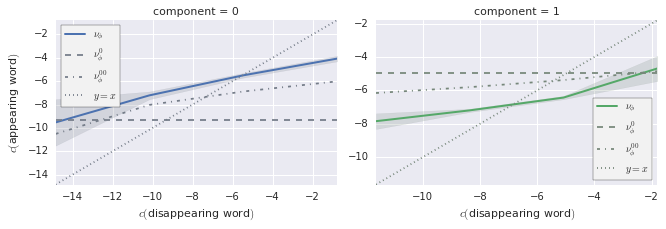

In [38]:
g = sb.FacetGrid(data=component_variations, col='component', col_wrap=3,
                 sharex=False, sharey=False, hue='component',
                 aspect=1.5, size=3)
g.map_dataframe(plot_variation, feature_field='component')
g.set_xlabels(r'$c($disappearing word$)$')
g.set_ylabels(r'$c($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-pca_variations-absolute'),
                  bbox_inches='tight', dpi=300)

### 4.3 CAVEAT: reduction of the numbers of words and substitutions

As explained above, this PCA analysis can only use words for which *all* the features are defined (in this case, the features listed in `relevant_features`). So note the following:

In [39]:
for feature in relevant_features:
    print("Feature '{}' is based on {} words."
          .format(feature, len(Substitution
                               ._transformed_feature(feature)())))

# Compute the number of words that have all PAPER_FEATURES defined.
words = set()
for tfeature in [Substitution._transformed_feature(feature)
                 for feature in relevant_features]:
    words.update(tfeature())

data = dict((feature, []) for feature in relevant_features)
words_list = []
for word in words:
    words_list.append(word)
    for feature in relevant_features:
        data[feature].append(Substitution
                             ._transformed_feature(feature)(word))
wordsdf = pd.DataFrame(data)
wordsdf['words'] = words_list
del words_list, data

print()
print("Among all the set of words used by these features, "
      "only {} are used."
      .format(len(wordsdf.dropna())))

print()
print("Similarly, we mined {} (cluster-unique) substitutions, "
      "but the PCA is in fact"
      " computed on {} of them (those where all features are defined)."
      .format(len(set(variations['cluster_id'])), len(pcavariations)))

Feature 'frequency' is based on 33450 words.
Feature 'aoa' is based on 30102 words.
Feature 'letters_count' is based on 42786 words.



Among all the set of words used by these features, only 14450 are used.

Similarly, we mined 2741 (cluster-unique) substitutions, but the PCA is in fact computed on 2220 of them (those where all features are defined).


The way $\mathcal{H}_0$ and $\mathcal{H}_{00}$ are computed makes them also affected by this.

## 5 Interactions between features (by Anova)

Some useful variables first.

In [40]:
cuts = [('fixed bins', pd.cut)]#, ('quantiles', pd.qcut)]
rels = [('global', ''), ('sentence-relative', '_rel')]

def star_level(p):
    if p < .001:
        return '***'
    elif p < .01:
        return ' **'
    elif p < .05:
        return '  *'
    else:
        return 'ns.'

Now for each feature, assess if it has an interaction with the other features' **destination value**. We look at this for all pairs of features, with all pairs of global/sentence-relative value and types of binning (fixed width/quantiles). So it's a lot of answers.

Three stars means $p < .001$, two $p < .01$, one $p < .05$, and `ns.` means non-significative.

In [41]:
for feature1 in PAPER_FEATURES:
    print('-' * len(feature1))
    print(feature1)
    print('-' * len(feature1))

    for feature2 in PAPER_FEATURES:
        print()
        print('-> {}'.format(feature2))
        for (cut_label, cut), (rel1_label, rel1) in product(cuts, rels):
            for (rel2_label, rel2) in rels:
                source = variations.pivot(
                    index='cluster_id', columns='feature',
                    values='source' + rel1)[feature1]
                destination = variations.pivot(
                    index='cluster_id', columns='feature',
                    values='destination' + rel2)[feature2]

                # Compute binning.
                for bin_count in range(BIN_COUNT, 0, -1):
                    try:
                        source_bins = cut(source, bin_count, labels=False)
                        break
                    except ValueError:
                        pass

                _, p = stats.f_oneway(*[destination[source_bins == i]
                                        .dropna()
                                        for i in range(bin_count)])
                print('  {} {} -> {}'
                      .format(star_level(p), rel1_label, rel2_label))
    print()

---------
frequency
---------

-> frequency


  *** global -> global
  *** global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> aoa
  *** global -> global


  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering
  *** global -> global
   ** global -> sentence-relative
  ns. sentence-relative -> global


    * sentence-relative -> sentence-relative

-> letters_count
  *** global -> global
  *** global -> sentence-relative
  ns. sentence-relative -> global


  *** sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density
  *** global -> global
  *** global -> sentence-relative
  ns. sentence-relative -> global


  *** sentence-relative -> sentence-relative

---
aoa
---

-> frequency
  *** global -> global
  ns. global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> aoa
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

-> clustering
  *** global -> global
  *** global -> sentence-relative
    * sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> letters_count
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count


  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

----------
clustering
----------

-> frequency
   ** global -> global


  ns. global -> sentence-relative
    * sentence-relative -> global
   ** sentence-relative -> sentence-relative

-> aoa
  *** global -> global
    * global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> clustering
  *** global -> global


  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> letters_count
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> synonyms_count


  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density
  ns. global -> global


  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-------------
letters_count
-------------

-> frequency
  *** global -> global
   ** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> aoa


  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> letters_count


  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global
  ns. global -> sentence-relative
  *** sentence-relative -> global
   ** sentence-relative -> sentence-relative

-> orthographic_density
  *** global -> global


  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

--------------
synonyms_count
--------------

-> frequency
  *** global -> global
   ** global -> sentence-relative
  *** sentence-relative -> global
   ** sentence-relative -> sentence-relative

-> aoa
  ns. global -> global


  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> clustering
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
    * sentence-relative -> sentence-relative

-> letters_count
    * global -> global
    * global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> synonyms_count


  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> orthographic_density
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

--------------------
orthographic_density
--------------------

-> frequency
  *** global -> global
  ns. global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> aoa
  *** global -> global
   ** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering
   ** global -> global
    * global -> sentence-relative
  ns. sentence-relative -> global


   ** sentence-relative -> sentence-relative

-> letters_count
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global
  ns. global -> sentence-relative
   ** sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density


  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative



Now for each feature, look at its interaction with the other features' **variation (i.e. destination - source)**. Same drill, same combinations.

In [42]:
for feature1 in PAPER_FEATURES:
    print('-' * len(feature1))
    print(feature1)
    print('-' * len(feature1))

    for feature2 in PAPER_FEATURES:
        print()
        print('-> {}'.format(feature2))
        for (cut_label, cut), (rel1_label, rel1) in product(cuts, rels):
            for (rel2_label, rel2) in rels:
                source = variations.pivot(
                    index='cluster_id', columns='feature',
                    values='source' + rel1)[feature1]
                destination = variations.pivot(
                    index='cluster_id', columns='feature',
                    values='destination' + rel2)[feature2]\
                    - variations.pivot(
                    index='cluster_id', columns='feature',
                    values='source' + rel2)[feature2]

                # Compute binning.
                for bin_count in range(BIN_COUNT, 0, -1):
                    try:
                        source_bins = cut(source, bin_count, labels=False)
                        break
                    except ValueError:
                        pass

                _, p = stats.f_oneway(*[destination[source_bins == i]
                                        .dropna()
                                        for i in range(bin_count)])
                print('  {} {} -> {}'
                      .format(star_level(p), rel1_label, rel2_label))
    print()

---------
frequency
---------

-> frequency


  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> aoa
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

-> clustering
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> letters_count
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density


  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

---
aoa
---

-> frequency
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

-> aoa
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering
  *** global -> global
  *** global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> letters_count
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count


  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density
  *** global -> global


  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

----------
clustering
----------

-> frequency
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

-> aoa
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering
  *** global -> global
  *** global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> letters_count
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
   ** sentence-relative -> sentence-relative

-> synonyms_count
  *** global -> global


  *** global -> sentence-relative
    * sentence-relative -> global
    * sentence-relative -> sentence-relative

-> orthographic_density
   ** global -> global
   ** global -> sentence-relative
    * sentence-relative -> global


    * sentence-relative -> sentence-relative

-------------
letters_count
-------------

-> frequency
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> aoa
  *** global -> global


  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering
  *** global -> global
   ** global -> sentence-relative
  *** sentence-relative -> global


   ** sentence-relative -> sentence-relative

-> letters_count
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global
  ns. global -> sentence-relative


  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

--------------
synonyms_count
--------------

-> frequency


  ns. global -> global
  ns. global -> sentence-relative
    * sentence-relative -> global
    * sentence-relative -> sentence-relative

-> aoa
  ns. global -> global
  ns. global -> sentence-relative


  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> clustering
  ns. global -> global
  ns. global -> sentence-relative
    * sentence-relative -> global
    * sentence-relative -> sentence-relative

-> letters_count


  ns. global -> global
  ns. global -> sentence-relative
   ** sentence-relative -> global
    * sentence-relative -> sentence-relative

-> synonyms_count
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> orthographic_density


  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

--------------------
orthographic_density
--------------------

-> frequency
  *** global -> global
  *** global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> aoa
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering


   ** global -> global
    * global -> sentence-relative
    * sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> letters_count
  *** global -> global
  *** global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density


  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative



Ok, so this can go on for a long time, and I'm not going to look at interactions with this lens (meaning at interaction of couples of features with another feature's destination values).

## 6 Regression

In [43]:
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures

In [44]:
rels = {False: ('global', ''),
        True: ('rel', '_rel')}

def regress(data, features, target,
            source_rel=False, dest_rel=False, interactions=False):
    if source_rel not in [True, False, 'both']:
        raise ValueError
    if not isinstance(dest_rel, bool):
        raise ValueError
    # Process source/destination relativeness arguments.
    if isinstance(source_rel, bool):
        source_rel = [source_rel]
    else:
        source_rel = [False, True]
    dest_rel_name, dest_rel = rels[dest_rel]
    
    features = tuple(sorted(features))
    feature_tuples = [('source' + rels[rel][1], feature)
                      for rel in source_rel
                      for feature in features]
    feature_names = [rels[rel][0] + '_' + feature
                     for rel in source_rel
                     for feature in features]
    
    # Get source and destination values.
    source = pd.pivot_table(
        data,
        values=['source' + rels[rel][1] for rel in source_rel],
        index=['cluster_id'],
        columns=['feature']
    )[feature_tuples].dropna()
    destination = variations[variations.feature == target]\
        .pivot(index='cluster_id', columns='feature',
               values='destination' + dest_rel)\
        .loc[source.index][target].dropna()
    source = source.loc[destination.index].values
    destination = destination.values

    # If asked to, get polynomial features.
    if interactions:
        poly = PolynomialFeatures(degree=2, interaction_only=True)
        source = poly.fit_transform(source)
        regress_features = [' * '.join([feature_names[j]
                                        for j, p in enumerate(powers)
                                        if p > 0]) or 'intercept'
                            for powers in poly.powers_]
    else:
        regress_features = feature_names

    # Regress.
    linreg = linear_model.LinearRegression(fit_intercept=not interactions)
    linreg.fit(source, destination)

    # And print the score and coefficients.
    print('Regressing {} with {} measures, {} interactions'
          .format(dest_rel_name + ' ' + target, len(source),
                  'with' if interactions else 'no'))
    print('           ' + '^' * len(dest_rel_name + ' ' + target))
    print('R^2 = {}'
          .format(linreg.score(source, destination)))
    print()
    coeffs = pd.Series(index=regress_features, data=linreg.coef_)
    if not interactions:
        coeffs = pd.Series(index=['intercept'], data=[linreg.intercept_])\
            .append(coeffs)
    with pd.option_context('display.max_rows', 999):
        print(coeffs)

In [45]:
for target in PAPER_FEATURES:
    print('-' * 70)
    for source_rel, dest_rel in product([False, True, 'both'],
                                        [False, True]):
        regress(variations, PAPER_FEATURES, target, source_rel=source_rel,
                dest_rel=dest_rel)
        print()
        regress(variations, PAPER_FEATURES, target, source_rel=source_rel,
                dest_rel=dest_rel, interactions=True)
        print()

----------------------------------------------------------------------


Regressing global frequency with 1816 measures, no interactions
           ^^^^^^^^^^^^^^^^
R^2 = 0.07898192819340732

intercept                      5.830684
global_aoa                     0.030598
global_clustering              0.054270
global_frequency               0.362195
global_letters_count          -0.035173
global_orthographic_density   -0.035934
global_synonyms_count         -0.003755
dtype: float64



Regressing global frequency with 1816 measures, with interactions
           ^^^^^^^^^^^^^^^^
R^2 = 0.09426758994644702

intercept                                              13.442928
global_aoa                                             -0.548785
global_clustering                                       1.365313
global_frequency                                        0.387748
global_letters_count                                   -0.613053
global_orthographic_density                            -0.383368
global_synonyms_count                                  -0.223312
global_aoa * global_clustering                         -0.064979
global_aoa * global_frequency                           0.004785
global_aoa * global_letters_count                       0.025056
global_aoa * global_orthographic_density               -0.009546
global_aoa * global_synonyms_count                      0.050188
global_clustering * global_frequency                   -0.029931
global_clustering * global_letter

Regressing rel frequency with 1816 measures, with interactions
           ^^^^^^^^^^^^^
R^2 = 0.056077360610593874

intercept                                             -1.700483
global_aoa                                            -0.451208
global_clustering                                      0.474350
global_frequency                                       0.373202
global_letters_count                                  -0.516945
global_orthographic_density                           -0.341646
global_synonyms_count                                 -0.894873
global_aoa * global_clustering                        -0.033880
global_aoa * global_frequency                          0.003563
global_aoa * global_letters_count                      0.042483
global_aoa * global_orthographic_density               0.015175
global_aoa * global_synonyms_count                     0.086762
global_clustering * global_frequency                  -0.004740
global_clustering * global_letters_count            

Regressing rel frequency with 1816 measures, with interactions
           ^^^^^^^^^^^^^
R^2 = 0.25854567130458217

intercept                                       -1.550452
rel_aoa                                          0.022388
rel_clustering                                   0.051697
rel_frequency                                    0.644973
rel_letters_count                               -0.043022
rel_orthographic_density                        -0.410992
rel_synonyms_count                               0.336610
rel_aoa * rel_clustering                        -0.090023
rel_aoa * rel_frequency                         -0.011781
rel_aoa * rel_letters_count                      0.031535
rel_aoa * rel_orthographic_density               0.039098
rel_aoa * rel_synonyms_count                     0.180251
rel_clustering * rel_frequency                  -0.059497
rel_clustering * rel_letters_count              -0.094475
rel_clustering * rel_orthographic_density       -0.197784
rel_clustering 

Regressing global frequency with 1816 measures, with interactions
           ^^^^^^^^^^^^^^^^
R^2 = 0.12930217650115072

intercept                                                -20.118361
global_aoa                                                -0.364767
global_clustering                                         -6.431436
global_frequency                                           1.497574
global_letters_count                                      -0.888795
global_orthographic_density                                2.891522
global_synonyms_count                                      1.357245
rel_aoa                                                    0.467985
rel_clustering                                             8.149507
rel_frequency                                             -0.758595
rel_letters_count                                          0.202926
rel_orthographic_density                                  -2.856169
rel_synonyms_count                                         1.47

intercept                      5.332147
global_aoa                     0.311338
global_clustering             -0.019786
global_frequency              -0.045235
global_letters_count           0.031254
global_orthographic_density   -0.073422
global_synonyms_count         -0.083835
dtype: float64

Regressing global aoa with 1674 measures, with interactions
           ^^^^^^^^^^
R^2 = 0.10862443429272207

intercept                                             -0.003934
global_aoa                                             0.578000
global_clustering                                     -1.573133
global_frequency                                       0.262585
global_letters_count                                  -0.115041
global_orthographic_density                           -1.556284
global_synonyms_count                                  0.765209
global_aoa * global_clustering                         0.082383
global_aoa * global_frequency                         -0.012081
global_aoa * global

Regressing global aoa with 1674 measures, with interactions
           ^^^^^^^^^^
R^2 = 0.04568917747683843

intercept                                        6.788228
rel_aoa                                         -0.066318
rel_clustering                                   0.130589
rel_frequency                                    0.059932
rel_letters_count                               -0.052021
rel_orthographic_density                        -0.525014
rel_synonyms_count                              -0.360275
rel_aoa * rel_clustering                         0.043463
rel_aoa * rel_frequency                         -0.053568
rel_aoa * rel_letters_count                      0.023136
rel_aoa * rel_orthographic_density               0.043826
rel_aoa * rel_synonyms_count                    -0.059821
rel_clustering * rel_frequency                   0.067347
rel_clustering * rel_letters_count               0.088366
rel_clustering * rel_orthographic_density       -0.032282
rel_clustering * rel_

Regressing rel aoa with 1674 measures, no interactions
           ^^^^^^^
R^2 = 0.18647861173249203

intercept                      1.649110
global_aoa                    -0.332296
global_clustering             -0.060618
global_frequency               0.027289
global_letters_count           0.122280
global_orthographic_density   -0.088134
global_synonyms_count          0.099547
rel_aoa                        0.699648
rel_clustering                 0.044690
rel_frequency                 -0.078340
rel_letters_count             -0.123791
rel_orthographic_density       0.021382
rel_synonyms_count            -0.206248
dtype: float64

Regressing rel aoa with 1674 measures, with interactions
           ^^^^^^^
R^2 = 0.2203439328896365

intercept                                                 18.432491
global_aoa                                                 0.917474
global_clustering                                          2.982965
global_frequency                                         

Regressing rel clustering with 1517 measures, no interactions
           ^^^^^^^^^^^^^^
R^2 = 0.04575245777339576

intercept                      1.766923
global_aoa                    -0.004224
global_clustering              0.203769
global_frequency              -0.016921
global_letters_count           0.002104
global_orthographic_density   -0.010263
global_synonyms_count         -0.012054
dtype: float64

Regressing rel clustering with 1517 measures, with interactions
           ^^^^^^^^^^^^^^
R^2 = 0.07752544912599468

intercept                                              1.899085
global_aoa                                             0.155622
global_clustering                                      0.078269
global_frequency                                      -0.416328
global_letters_count                                   0.117641
global_orthographic_density                            0.473420
global_synonyms_count                                  0.541678
global_aoa * global_clus

Regressing rel clustering with 1517 measures, no interactions
           ^^^^^^^^^^^^^^
R^2 = 0.15937173118335135

intercept                   0.248387
rel_aoa                    -0.015208
rel_clustering              0.416334
rel_frequency               0.005547
rel_letters_count           0.014983
rel_orthographic_density    0.010405
rel_synonyms_count          0.021927
dtype: float64

Regressing rel clustering with 1517 measures, with interactions
           ^^^^^^^^^^^^^^
R^2 = 0.17278559521776837

intercept                                        0.235885
rel_aoa                                         -0.026674
rel_clustering                                   0.387927
rel_frequency                                   -0.001948
rel_letters_count                                0.000238
rel_orthographic_density                        -0.030016
rel_synonyms_count                              -0.114157
rel_aoa * rel_clustering                         0.047712
rel_aoa * rel_frequency      

Regressing global clustering with 1517 measures, with interactions
           ^^^^^^^^^^^^^^^^^
R^2 = 0.16385434176412972

intercept                                                 11.742079
global_aoa                                                 0.079092
global_clustering                                          3.019786
global_frequency                                          -1.580818
global_letters_count                                       0.496281
global_orthographic_density                                0.070124
global_synonyms_count                                     -1.451604
rel_aoa                                                   -0.245865
rel_clustering                                            -2.745569
rel_frequency                                              0.571273
rel_letters_count                                         -0.447114
rel_orthographic_density                                  -0.483155
rel_synonyms_count                                         0.

Regressing global letters_count with 1816 measures, no interactions
           ^^^^^^^^^^^^^^^^^^^^
R^2 = 0.09350963860170458

intercept                      3.884185
global_aoa                     0.016828
global_clustering             -0.141152
global_frequency               0.018210
global_letters_count           0.285824
global_orthographic_density   -0.161117
global_synonyms_count         -0.264874
dtype: float64

Regressing global letters_count with 1816 measures, with interactions
           ^^^^^^^^^^^^^^^^^^^^
R^2 = 0.1012143977789336

intercept                                              0.842393
global_aoa                                             0.230373
global_clustering                                     -1.281132
global_frequency                                       0.054652
global_letters_count                                   0.042300
global_orthographic_density                           -0.978788
global_synonyms_count                                  0.542214
g

Regressing global letters_count with 1816 measures, no interactions
           ^^^^^^^^^^^^^^^^^^^^
R^2 = 0.07003774210831393

intercept                   5.784635
rel_aoa                    -0.098628
rel_clustering              0.062057
rel_frequency               0.056373
rel_letters_count           0.227218
rel_orthographic_density   -0.306497
rel_synonyms_count         -0.222676
dtype: float64

Regressing global letters_count with 1816 measures, with interactions
           ^^^^^^^^^^^^^^^^^^^^
R^2 = 0.07750636863318117

intercept                                        5.734836
rel_aoa                                         -0.159508
rel_clustering                                  -0.061720
rel_frequency                                    0.068058
rel_letters_count                                0.307237
rel_orthographic_density                        -0.336501
rel_synonyms_count                              -0.454522
rel_aoa * rel_clustering                         0.056016
rel_a

Regressing global letters_count with 1816 measures, no interactions
           ^^^^^^^^^^^^^^^^^^^^
R^2 = 0.10962978814687839

intercept                     -0.111216
global_aoa                     0.142388
global_clustering             -0.420310
global_frequency               0.121677
global_letters_count           0.390476
global_orthographic_density   -0.202627
global_synonyms_count         -0.174026
rel_aoa                       -0.199372
rel_clustering                 0.329710
rel_frequency                 -0.121877
rel_letters_count             -0.110657
rel_orthographic_density       0.080007
rel_synonyms_count            -0.080018
dtype: float64

Regressing global letters_count with 1816 measures, with interactions
           ^^^^^^^^^^^^^^^^^^^^
R^2 = 0.14744991371198501

intercept                                                 14.509496
global_aoa                                                -0.409588
global_clustering                                          1.797041
glob

Regressing global synonyms_count with 1760 measures, no interactions
           ^^^^^^^^^^^^^^^^^^^^^
R^2 = 0.043238933176972916

intercept                      0.734215
global_aoa                    -0.010201
global_clustering              0.026997
global_frequency              -0.014691
global_letters_count          -0.010347
global_orthographic_density    0.001591
global_synonyms_count          0.200574
dtype: float64

Regressing global synonyms_count with 1760 measures, with interactions
           ^^^^^^^^^^^^^^^^^^^^^
R^2 = 0.05798438248276761

intercept                                              2.346869
global_aoa                                            -0.044426
global_clustering                                      0.338712
global_frequency                                      -0.061050
global_letters_count                                  -0.043825
global_orthographic_density                           -0.419813
global_synonyms_count                                  0.15

Regressing global synonyms_count with 1760 measures, no interactions
           ^^^^^^^^^^^^^^^^^^^^^
R^2 = 0.032569913170028

intercept                   0.385786
rel_aoa                    -0.000988
rel_clustering             -0.010898
rel_frequency              -0.009134
rel_letters_count          -0.003759
rel_orthographic_density    0.025538
rel_synonyms_count          0.192029
dtype: float64

Regressing global synonyms_count with 1760 measures, with interactions
           ^^^^^^^^^^^^^^^^^^^^^
R^2 = 0.0446813841210808

intercept                                        0.379235
rel_aoa                                         -0.031942
rel_clustering                                  -0.069711
rel_frequency                                   -0.017245
rel_letters_count                                0.005305
rel_orthographic_density                         0.043128
rel_synonyms_count                               0.136424
rel_aoa * rel_clustering                        -0.014678
rel_

Regressing global synonyms_count with 1760 measures, with interactions
           ^^^^^^^^^^^^^^^^^^^^^
R^2 = 0.09987936400311292

intercept                                                 10.670911
global_aoa                                                -0.326179
global_clustering                                          1.863195
global_frequency                                          -0.481633
global_letters_count                                      -0.063181
global_orthographic_density                               -0.761401
global_synonyms_count                                      0.531055
rel_aoa                                                   -0.203773
rel_clustering                                            -0.958009
rel_frequency                                              0.122338
rel_letters_count                                          0.065212
rel_orthographic_density                                   0.296393
rel_synonyms_count                                   

Regressing global orthographic_density with 1548 measures, with interactions
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
R^2 = 0.1330624700026013

intercept                                              4.045267
global_aoa                                            -0.267092
global_clustering                                      0.475546
global_frequency                                       0.035373
global_letters_count                                  -0.198079
global_orthographic_density                            0.422611
global_synonyms_count                                 -0.675084
global_aoa * global_clustering                        -0.034514
global_aoa * global_frequency                         -0.007360
global_aoa * global_letters_count                      0.008959
global_aoa * global_orthographic_density               0.024642
global_aoa * global_synonyms_count                     0.030397
global_clustering * global_frequency                  -0.010615
global_clustering * global

Regressing global orthographic_density with 1548 measures, with interactions
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
R^2 = 0.09788687888972625

intercept                                        1.521138
rel_aoa                                          0.072089
rel_clustering                                   0.008240
rel_frequency                                   -0.049794
rel_letters_count                               -0.009116
rel_orthographic_density                         0.340193
rel_synonyms_count                               0.285532
rel_aoa * rel_clustering                        -0.003269
rel_aoa * rel_frequency                          0.017108
rel_aoa * rel_letters_count                     -0.001985
rel_aoa * rel_orthographic_density               0.015215
rel_aoa * rel_synonyms_count                     0.068089
rel_clustering * rel_frequency                  -0.000948
rel_clustering * rel_letters_count               0.004926
rel_clustering * rel_orthographic_density    

Regressing global orthographic_density with 1548 measures, with interactions
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
R^2 = 0.17105220684592448

intercept                                                 1.788014
global_aoa                                               -0.455978
global_clustering                                         0.231450
global_frequency                                         -0.000438
global_letters_count                                     -0.340765
global_orthographic_density                               2.548139
global_synonyms_count                                     2.514227
rel_aoa                                                   0.137305
rel_clustering                                            1.183723
rel_frequency                                            -0.013509
rel_letters_count                                         0.233642
rel_orthographic_density                                 -1.805788
rel_synonyms_count                                   